# Computer Vision I -  Assignment 1
Prof. Stefan Roth   ~ Baris Zöngür  ~ Dustion Carrión

----


### Prepare Python Environment

In this task, you will set up `Python-3.10` on your system and learn how to install additional packages.
Packages that you will often use are: 
1. `Pillow` for loading and saving images
2. `NumPy` and `SciPy` for scientific computing
3. `Matplotlib` for plotting and visualization and as an alternative for loading and saving images.

**Note:**
To run the python code using the depedencies, it is clean to setup a virtual environment. One can use `miniconda`, `venv`, `miniforge`.  
##### Setup with `Miniconda`:
In contrast to the `Anaconda` distribution, `Miniconda` supplies only the package management system.  
This allows setting up minimalistic environments when disk space is limited (e.g., pool PCs offered by ISP).  
If you have `Anaconda` already installed and would like to use it instead, the instructions below should also work.


- Install `Miniconda` following the instructions at  
  [https://docs.conda.io/projects/conda/en/latest/user-guide/install/index.html](https://docs.conda.io/projects/conda/en/latest/user-guide/install/index.html).
- To test if the installation was successful, the command `conda list` should return the list of installed packages.
- We will now create a new `conda` environment with the name `cv1`.  
  We assume that the file `requirements.txt` with the dependencies we provide is in the current directory, so simply execute:

  ```bash 
  conda create -n .cv1 python=3.10
  conda activate .cv1
  ```
##### Setup with `venv`:

  ``` bash
    python3.10 -m venv .cv1
    source .cv1/bin/activate
  ```
> <span style="color:orange">**make sure to select the `.cv1` environment as your Jupyter Notebook kernel in your IDE**</span>.

#### Install Dependencies

In [ ]:
pip install numpy==1.26.1 scipy==1.14.1 matplotlib==3.9.0 Pillow==10.4.0 opencv-python==4.10.0.84

### Problem 1:  Getting to know Python

In [1]:
# Load packages
from typing import Literal
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
# %matplotlib inline

Image = np.ndarray[Literal["H", "W", 3], np.float32]
Vector = np.ndarray[Literal[3,1],np.float32]
Matrix22 = np.ndarray[Literal["2", "2", "1"], np.float32]
Matrix33 = np.ndarray[Literal["3", "3", "1"], np.float32]
Matrix34 = np.ndarray[Literal["4", "3", "1"], np.float32]
Matrix44 = np.ndarray[Literal["4", "4", "1"], np.float32]
Channel = np.ndarray[Literal["H","W", 1], np.float32]
Points2D = np.ndarray[Literal["N", 2], np.float32]
Points3D = np.ndarray[Literal["N", 3], np.float32]
Points4D = np.ndarray[Literal["N",4], np.float32]

################################################################
#             DO NOT EDIT THIS HELPER FUNCTION                 #
################################################################

def load_image(path:Path):
    return plt.imread(path)

#### (a) Implement `display_image` to show the image using `matplotlib`.

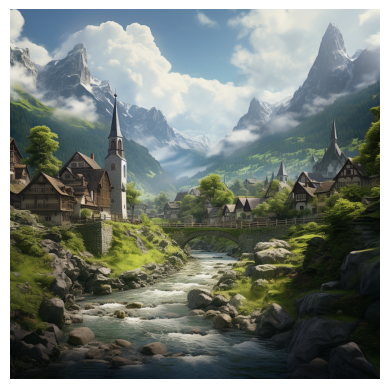

In [49]:
def display_image(img: np.ndarray):
    """
    Show an image using matplotlib.
    """
    plt.imshow(img)
    plt.axis('off')  # Hide axes for cleaner display
    plt.show()

pic1 = display_image(load_image("data/a1p1.png"))

#### (b) Implement `save_as_npy` to save the image (a numpy array) to a binary `.npy` file (use `numpy.save()`).

In [42]:
def save_as_npy(path:Path, img:Image):
    """ Save the image array as a .npy file"""
    image_array = np.array(img)
    np.save(path, image_array)

save_as_npy("data/pic2", load_image("data/a1p1.png"))

#### (c) Implement `load_npy` to load the previously saved file. Check that it is the same image with `display_image`.

Loaded numpy array shape: (1024, 1024, 3)
Loaded numpy array dtype: float32


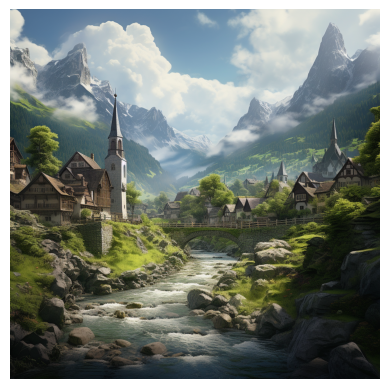

In [50]:
import numpy as np
from PIL import Image
from pathlib import Path

def load_npy(path: Path) -> Image:
    """Load and return the .npy file as a Pillow Image object."""
    img_array = np.load(path, allow_pickle=True)
    
    # Debug: Print the shape and dtype of the loaded array
    print("Loaded numpy array shape:", img_array.shape)
    print("Loaded numpy array dtype:", img_array.dtype)

    # Check if the array is valid
    if img_array is None or img_array.size == 0:
        raise ValueError("The loaded numpy array is empty or None.")
    
    # If the dtype is float, convert it to uint8 by scaling the values
    if img_array.dtype == np.float32 or img_array.dtype == np.float64:
        # Assuming the values are in the range [0, 1], scale to [0, 255]
        img_array = (img_array * 255).astype(np.uint8)
    
    # Convert the numpy array to a Pillow Image object
    img = Image.fromarray(img_array)
    
    return img


# Usage
display_image(load_npy(Path('data/pic2.npy')))


#### (d) Implement `mirror_horizontal` to horizontally mirror (flip) the image, i.e., the resulting image should revert the pixel order in the horizontal direction.

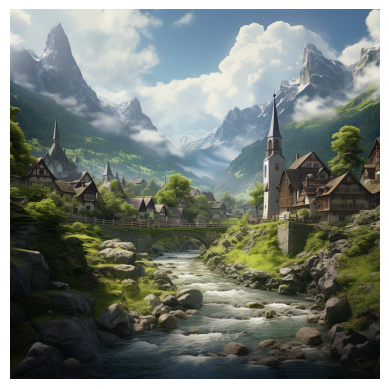

In [55]:
def mirror_horizontal(img: Image) -> Image:
    """Horizontally mirror (flip) the image."""
    # Convert the Pillow Image to a numpy array and flip
    img_array = np.array(img)
    mirrored_array = np.fliplr(img_array)
    
    # Convert the numpy array back to a Pillow Image
    mirrored_img = Image.fromarray(mirrored_array)
    
    return mirrored_img

# Example usage
img = Image.open('data/a1p1.png')  # Load an image
mirrored_img = mirror_horizontal(img)
display_image(mirrored_img)

#### (e) Implement `display_images` to display the original and the mirrored (flipped) image from the previous step in *one* plot.

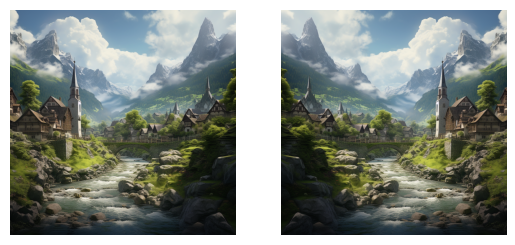

In [56]:
def display_images(img1:Image, img2:Image):
    """ Display the normal and the mirrored image in one plot

    Args:
        img1: First image to display
        img2: Second image to display
    """
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(img1)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(img2)
    plt.axis('off')
    plt.show()

display_images(img,mirrored_img)


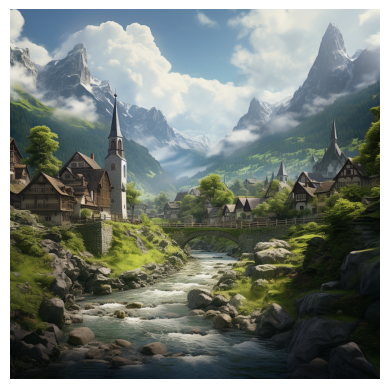

Loaded numpy array shape: (1024, 1024, 3)
Loaded numpy array dtype: float32


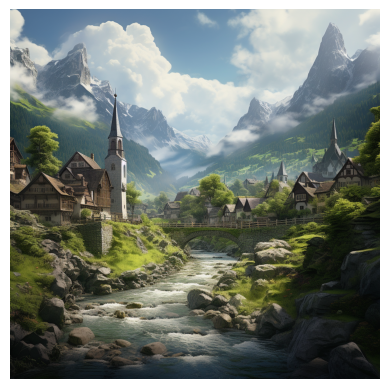

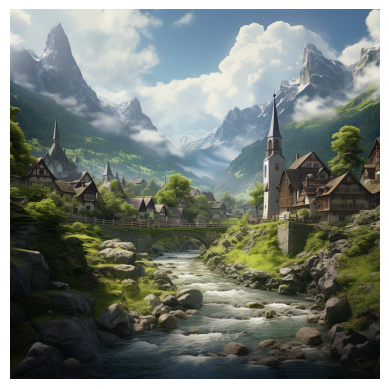

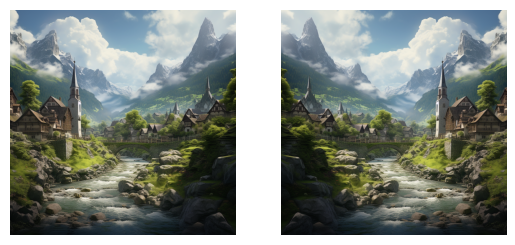

In [57]:
img = load_image(Path("data/a1p1.png"))
display_image(img)

save_as_npy(Path("a1p1.npy"), img)

img1 = load_npy(Path("a1p1.npy"))
display_image(img1)

img2 = mirror_horizontal(img1)
display_image(img2)

display_images(img1, img2)

----

### Problem 2 - Bayer Interpolation

Although today's digital cameras output RGB color pictures or videos, most of them do not have three separate RGB sensing chips but only one single chip based on a *color filter array* (CFA), where alternating sensor sites are covered by different color filters.  
The Bayer pattern (see Figure 1) is the most commonly used pattern.  
In this problem, the task is to construct an RGB color image from the data in the Bayer pattern through interpolating the missing color values.

<!--- echo "<img src=\"data:image/png;base64, $(base64 -w 0 figures/fig1.png)\" />" -->
<article>
  <figure style="float:left">
  <img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAARUAAAECCAYAAADQPUPBAAAAIGNIUk0AAHomAACAhAAA+gAAAIDoAAB1MAAA6mAAADqYAAAXcJy6UTwAAAAGYktHRAD/AP8A/6C9p5MAAAAJcEhZcwAAAEgAAABIAEbJaz4AAAAHdElNRQfoCg4PMDv5vcQ3AABKC3pUWHRSYXcgcHJvZmlsZSB0eXBlIHhtcAAAeJzVnVly5EiTpN/9FH0EAL4Bx0FsbyMyj3P80U/NgwTI4JJZMyJVXf1XMZkRgC/mtqipmaf/87/+d/qf//mfpbXcU77mR1/71OaW26XVXpapLa223rZ2z7dluT8ul8tjWfT7rRV+U3uu5ZancutTyfrs2rZU1r53fbHmvpd7LXr4rgfmrC8tS37k+7Tna1/z3temL7YbL2vzMvHndm33nvm7xBs0mtIejCPv8RdvH/dI3h+j3134Rnn7xjLVtdzqlBYG9+j+VS7LPS/+301jmrL+pd9W/fues/676DeLPnXVbxf9/ZTX5aF/9+WR9IFpueU5662ZL+25ZA38wz8LU4yfNdFF42l5r0sppcUk09ss4y+Z6NqL/pnyrok9uv9vuffOuDx2vV8v3vjH41n07yUxjXiI/pu7doq16asmpxcs+TiWjyPScLSB2p5Fu+YF3LRwdw1xfECLv+jdWm5GqNXeP011/PO+c+m5H58n5RHd33dUP2tb2k3TXTXmiQlqEyZ2dtrTz+96vkrv2PS7/vqV6XfvZIGbH8P7P64a/yQvXkxuLzc9hhVrfSssuRYz3y0xsx6pQyEZQlS2KhHJXaKCtO36WSO6sIGWIT3SY/nmoa+WPQaS/CU2sMaHfzmSxaJb9fsxkPRpJC8f+vVIxuhrQvxafGH+03U5Lkv6sC719YN/GJFmkcY0dIYqQvBo13w/Kgn9zGT504zS0/m6v1qM9Pkx379dn1t7lUQtDQnc2lUie/9Gsg9Hc9aHy+sXfBTI52G9tu396KLH+6LTXWvpm/5Ura8Xn3iO9KJzUJ9y/uWIPk/r7aztHcOgP7bV+1ulSa7puWivP/b9dI6vSueHyLBUPaZzuv22zNs+v+z8ub+eWmtWuTd2XMKy16nUVPrLN54++psJppdv5L+zBi6Zlk7amtRXLmUuc521spe6axQyAvoNFq6XWuakA8wfNz5Wir7Qq36STdaeawVaKxrzJus7+796mUzQrctk841c6iy7fC33VGaOnh/z/Gfxu/PhN3rj0pbcV331wrjeXj3HODUiGfiHHsXAZY4liRd9YykSTv1GLz6+QiZLZ04/bdUvbIy+8uKqxa7+hY4Q/9WjdDK1ElvhMPaGjuf3vVw1pbk9ysW/138PY9SaaGqarT6i2Y//6i3Fs5+YUl7Lgw/KUSi8TC8ppcoR6hpb138laPJo5I2sWk/98OG/7MRaFn08l7sfPGmUMY2NbahVll9HTRqjvT3oMMjPj/zlf9PffjH+K3FZY19TRaCki2OTvVYa9HGzvUuLN/nGf/k6n5VkvYvAmvyBmPt41Od/9DfNr9DqhNRo/SRn2mPvoSXbIo60/vDADwI58yDvcIhNTnpIrsjHdXw9xyQsNXwwxwctAnOMqd3193HKmKxPQtITWYGtr5KQpodpoJJstE1mwyWqPtANYVhr53Ntk4wd1rHKiMk91kdu+mudee1Arou8NomPHnWtc9cpl9Bf+lwufaubPFI5r3Kjqx53l4fbygO3uklD8tK9rJLXkicdrk3/7JrqjUMiTdj1ihW1gfh1HWaJpuakhzUt9SLzsGn2j8RBeB9knstDpnmqe10xurIrs4yGfEq9cJXV26oenHG0iBVuOoq5ORJI0l4MeMlY17tCBL246mMZVbTK+l9kmrLOmwKFukl2FC6gAMtFSyEzpWlp/MslafgXabFc9XZslz58q/v7GDuOqfRyxke5Kwa5NFm8cqndlrc1Wbw+9znJ0GG756w9bo+6hCQPIUC+OO8VCbNyqfwNwqEJDXnTCmqBpdj0VxqRJIKPN59q7YKGr9XoXmypje19jDgU1g9ND1y1KJIXVC2L0goKP7Pp2kw54gQHWC0tteatjZfR1Fqi3rRFCAFfliuml0hYtBWpVkkJGvBts/XQXf+WscXiSvXi4GvX8yppktQookDSpsNeT1rsOvWQEy26pEN6kJXXGxdtfalsd9MmLAqmmnZWO5pn/q4SiuEKSTy03HK0pDAlJxWV/0+EIFkK3ga5SJHLfuwaR5f46cTxZr2xyoW5SxRlgn1gHvo3IqmDwvHBPZYMaOs3yagOwHLpmJx5qLjypjLqU63pIPHKriDoUjepBflJuElJItZsT7EHC1baKvJwaPSrTZPXaPQ/aQr2XdrCJ1NHqeh32jE5EZLoWfuUkZ+MXLOJ+n/Urx4wsaOS5dqxx4roZIJQtpoQ3gIHkjEmnd1MfFMVnXZEUidZ08XiokrkVeuALopd3wVSy68HPYjPG97CxKQTkTSroXHxnofXKOtw6MM6f7YXhbBTpz8sh6JfjUKj1wCksSQWfSE41sYviNniB2ISewz2x8e877UemJ5PHA9kXdoY4w/j0iq9Ta93Dq2OFgvsBdx5HOebx+EPeXybxGh9X7N4MPOQw7rqN/pE4jEHNY6x56fDhCXRGedHR8Oj0f5Kb5V49Nuyy2NzvM1k+EFLLzkllpUWsnQjzNdylRmQidUf7oUYFpvW8dz0s85aediJ6DxbvpF2f3VAcz0dGomgXvNgNIqfOERSO3rOKq9wZV10xBXUtMIpf45pBUCQXX1kzlQbkoJ53MJhcPigNdMWOUytY4/lsFcLlSR4CJek++HdkmXTqV9i1Q5aXEa0LvZ2r5LtuwaoByaeqOMnp1tfzayJxQxl/5Sntwfia2IDwUI0oQ0LpzWVGgyBvMSgn4+xg/NiXO+PQXCP68i4UgzsfVze/G8n+v5AvfL+nF46Lthv1+vVKiUeczzZx/WSGrZYojMRURlIvH20l6K0ogXRWiFoUicy2V0f79nx/4LmkXLTxxomR6IvFbHKP7tKmWySKdl/vyJLCSN1d6RLi16Sgk+pDk79csGvV2Qvm3E82Sztz+cxjQO5ZyxY1Qrci//0PDQ6VzeO0EeN+FEhpjeN+P6oK4iH1uny/pijpZE5kg5HZDpbUv1zT22NA9GBBS+yt9LIJfMgojQdUTlx2iJ94jkeje7KprTn2KygUwz6jx4jE8C0Tr74nmJg34+LD7IZTzmS+zOmZ9vn8SUDh8jqzKpgIvVlWa8M/Nhi2TUqHiMrL7PIOC8ZoPFibPemXb7gRLR68Cu0Z3oTrgdaBjMq0ZuQH412tZMsZ0Mbv+JMyEu4SfLxWYokWxIqMywRuxXMMPKOyyytKHFU3Nat9SQvW29PqdJL5lC/hYhcO5ssBXFy0ABEz+txszshzgWQmsNS9iFfKN/neu0E1MkrM+ntwxrgRnHWtMBXiaDC9oLEX3oeIdWNdery2EK+4jHA0MfH8AZ5k2OnpFLbjt+Gz3FYx2somxgfYA4CkpAQyfMUEl5RbDbGzwfKlfg0LrT1conp6b/W88T9nvWr6VnRr4Abr1bpMEapHk1tWBC5fDLR1woMpfOTiTEwhCsglNTKTaoGBxEHGmeHkAKoeiVmymuyetXWgEkTISGSaKHGYuMAXroDGgmHvFLLlrxb5EuaSIFYJ4xtVQ/iq+/+2QqsS3yxsNQ5piEJ8Jhl3m6heHUwUHGdEerk6Y0JVdBxDtaKbgSyv6FOC8DGBXsqfXX+SWYb1ys7TGbMmPk0nIYF6Md7JF+yH4OaogOLkr3KDcQflOg2lLHCxCHvO/iN7JpWBN2ygfDJUTj/hLtF8sWGUDK3jY1BKMCWOJOEHTlx9GQj1vGBRW9uxoRRW3qeNoKFPq1jHQv8vtRVVmT8iNPE4i5M5v5mCpdhkhTSdOdbcHX0tygbKQ7kjbVSBNmGCc5E0rKg2gvJyMtFnjgq9X0n363hFfQ4LARLdgU9I1TQY7u/AEgo4eEISd4yEcmnV8g4M/40bPguP0z7R8LAf1a0aDvy0OAUeEqqZUILLlnBqhEpsIqa3E4SqiiE4Li+b/bnfYufpEelE2ufh7slU41LaKtWpCPuyb6OBg6oLO14RYlKKBsBu2yvQuHsJ0kCrto9wtM9WyLO+5beftTbdECu7YN/htzqNTZDNXzdKn0gw4l/bpSg2kDyIdwE/ETLLOAzUA6h3UlSjj9hhbU59+EjKaRPbzpIMsKjvPCKkAqx9JW9q4BxB/iMhbBVYXO6reKDIyLPtWDz+6tFxqZIC1ytCy541UwdaZP1uRl1BC+d8EbQtBMBuDQQycr403lKn5QLCOzZ9UkcwP7mv37WMz+oGda0KYjogCxrcTKTIAgVz7GVAiXKlpteI/lKeAoUdEPGCyjSrrHq5OF2saJJR+awkApJF9ks3g48hWNAmKOPWu8A0FWZaHzZNbM6OjI62jMOu3GOzFoQEsi+V1ILKF1FuFbwQDs5ZIzEhvZIjgQuo4Yp846/KVVLYs6eTyHaGabmoCEN92gdta2SfC2bjlGTdGsLGIs8EdSPtl9P1xv0MT1Z881SWjJGCg8kwxplz2BWN0X9HXe4M368KPm0Be+7ALNoSJOOCBYVm64PXQzQS7D5t34rs8jvZNv7SUOeDrFVoQ1kG76gT/HfHuIUYodCwFuUbDzw1/DPUPeyFVp7RtTBIBTRek+rfJCThpRbIzduxSIoGiygQzphNw6IHixp1NJrfxvKC+NDXvySwf0mCaJeSjwrEdHxSfg2mOtCiCFjrYGvTZKRAS6zFDshworrYCxtthfjzLc2564zAOwiHyQBhh0GKXdTW7o+/VdwLdLg/ImdBazD29fB2vU7xd0Z11GPx/VbvEbSxY2tXPpM/MqJb/hKaOlGYkxbPkVoXGd0Nvq8AE9dWX2F64CkhJQAYtoxm6eD76MxoXOAmwBbpfZ23GE71azkLAmUvKVh1fgDzlycpdBHuyRNzqadBisxkpwZ32CTfPF78IGNX8tkG98kUYkO2gOM6wCCswOa1Rt9OR6agiAtBtGkRuRiAAEvsrSNA8rSw84ASSYCwRQ7k6LQbmMfSWKyhg1kS1uPoXP6tbHsHcmOqAzBQxcZVo7s8c3RLoG7JoFXh3Qr2AAUXY/AOPFkIlGITkEA9YFrI5WyaGwbjrxeA/S6Nwy6hsInyxaYO25KXuBFSAHN+JBePLJpjd0hoQyMyvgWELdqkPBshBz5ywi926BkI3RQ41pAKbkMplwcjWxElQrMcSDClZ77QFKkuTlWpmQkHdQ8LIUWvQNlTlKkD3gH1lPgNFYkJBYk95idm5U+otlRbBKGhusHOUe6EYPO9CRLx81++L+SG9ZLkdHqg0GwL/eDF7P0Wuy2O+VNbiTQ172zYMjJ1fsGEiuvzRAo7o1OmB4waZOkejQpNIUeryPSgAF2ME4dAs43OxcOx2KZkrk6Ynyd2K6h8lG/euGM8ksEnnKOG2c6oxoepFYbJxr06uY9kfsp+aosjxYY6HdHJHUMd461pK8kLTGQ9xT+mn41GfrpdgLtDmbHiyhakDYypBk9cUgd4somqbIPfr2s66SpGgrTOOUAYmXt1o8QokR2S8oZ11nSJeFMHAqrcnxHziMZCVIxjzb8E/kEUqz4BHJzyCiDi2pMqBIQusxsZu3a0dE1WL/ARwCpIdVUWOoO1aJx8grJOe1bg3plR1WqR7KnEUnE2mLK1Io6LvgmANRoKOlCNCj4JJlQxpVhcRUixYbM46soTuirrEjD1VrJGvGTrKjMzxnQBZhvoBGBxi8EfZo9uS7QUgQypwpeZNWDXdc70T5XvLjumClQZGPsgFIFbpMeFREJo8tkCOTWFPBz3IkJOTba2UGKNYbdCRSSuuzNAa3A5cuzLT8+nlwIPcjbzunWhw3xyiEg2VTbOOEymMYmN2B8ieCko7wSXOgvN7vT8C+mhArHudM6E9NKbmSUi8078Fwjt6UvSCMBzbENmcVeyuHQaFvwj7TlhJe437jld1SWTKBpXPqH80aisJKXxWZI/2C2/G+v2645PgCiNmdCpFUwSSw5JgmkVEuPXJFzXJxOBBTKuBnogcVJTDMETfbiBB98HxwjSTD2A9rLlcSrXoOrgte2DQ+XyUfS817tsSTPgJydgqhC5r6zSlKxQJbFaR9sHZ5Xt/tAgpfNJ3uzh6eHQ0HqUAcUuNfZGFTffkp5AbQ82AgOKGq1Oh0NslJBSdGYEpLkEK/pRO3kp72Q0npkGvEO7WkgnMAH2WFFd77SkXfgkc2+YoJaFqG3fQAUxA3/SpPY8BTNgpALfxjjixgcbGTEHM30Kc93diCDzX946UEbNqBwzYeI5eqRZQPBm9Z3AwpOxEVacOhJkhO9+JYjDX2Xm95sECAyyCPqm8eMgljhcB4OzY4VwYsq5GCazXvHw8czq+iDgtm44HsQ0EjSsLZaJKQcu0s+wt7SNeEEd7DOxRLCwbniP5fmNcUDhUCFIBqgB7KBp9nx1NBRLELHP7q0g4YEPtSY8Mz0VXL2oFtkYkjQaV91nGD39Fl/v6FsdS4uZL+R7AsZz9DPYKBshOGc2xveRgoYB7C+ClIjNE0fY9MITQ++z3uQqpFUfBZHkDj3ZDg1qhvggrwRFhM0AJgeTcgSoo44Z/xU90h74xk7ENtInSPCJoM1pxd3cpC7lmwBW8SeAk/irqB3jFlL5bNiR2DcPIjFukHqruB54tXqgw/wO8M5gZxP2E68uEI0ndn87DEQCoJmQWMCsmHccBZs+x3DL3hENRs6kMXXEWk4CCB7UmewNXY+IUmfnUSTC3jEShWLkGTXTPTczBqA88PviQgOFJKQhUSwzLc9faR+sVIjh1LBjsz01dkGCFiABEwA0kO17c2BJseHwV/9pw/QRgPlRp3xQHkj9w/ofQ7EA3Pdnlm3X6BIKWAkUKTfYEcRdr6KOtPrsPPo+/wORUofZv6GIvkEBbwSWfYvsaMwo+k9UAKexBvTR5gspMGDC3YEnc9wa0GBPZKt6PIRRfrRbd9LgC8d/wUPICGBr+BdlhC9EJmZd+zI7Db7l58F8qWrySH53r90/oag+YqJSN9h1H8CUadPC3lCq/FfdYRlKezyfACrjxB1eoFRO6nB8e3GS2uOIOsV+kcYofWDONDNuYLsYs6jFpHdOzGSvjCZZ0OZnpbyFUb9EaIe4GqJbJHB1dsTn0sYt46V2Nk7ib3trR6wwT1YgKlWjudhHRdNtZvogWM9zmU6wvKv9Mxv1Uz6rGe0G+shzYvJxOm6O5EI79iMIimbA+wj5a/vLkBdheCEVZCRkZ3CrmS+II3s/DnAT7UEaS+34JdViNiOAOqC8q8Zus29YB9Ie62cJJwup70Qxo0cN3gAn4tkLxEbkqYFwZPJ+EcHNQ4YR35RCgyLUcjgmtBKyclE0hobPDJrp1ekL96xmxCAPwkKQS2L/XHOlVbO2EimOOUtT5peDf1I7VLAUKxiOfUTSg/nwcjFgkrhuGtx1gT/CbiU4G2kdqEHrU9eAtSLHudug9Q8snHjsWiAGHf6aeDO6J3zxIOncJhBx/XzyjhihRBnyKS2p7Kv5IsINX9c8PTNpv6w4AdLoxmkmALUMr4mqYYIAPFkzwTvsAE2w03N9EXghTsQUMbWAwRjvjrkClwT6FX4DYsldia9TSZSS+qgDziowkwCg5vN+LF9NRoBmCi/Icl9PQQMerf3r5pawkLjOXVjyRmKco8EK2s4DINOpGzPjF2DrQboQxp/bQ/zL3jjjt4OgSiGzWwiQQVmp1oxBE/ygFE/nqyoDGFjKXGoDhoStQkbqAVZhjIeO1jgAisB2ZOkA54wm0wCQDk9x4fo/8noUgyP7CIsxwwXi72y4JNrAxGEG3J0K0by4zg6U4YbYYm5BWN0uA3gkeAfjuWqteJs03CB+BA8hSGUBO+rFBvHoKNKl6fo/26UJ/CeQ7s4xm6YOWBfioRWCWOFSFnBtqAr3PtkZv0GOZf8QEcJYpUlV1q4WzIyDamUJebdzbV1s8te6kDdM9Smjk/iowI3BmyOk4gjyBkgCXWEVC5kaNrbmX990j8c9F2COkFjxJu2sUZqq6EcnHZvPbmtxdBPMJKu5taOnD86ALRLa7fEYjtvx9xRGDz4GGW/v8LhzxcvSM83IA+An+NdcNdi8NvxBR8fC53GFS5Vig3kiuzyU8yI14ApOC6d9M90Tm8SDzIaTDo+lWkOOQ3ADQ08W+zGG04v2OxwXmp4+YeViYUhaE7fDfyHBf+QOsyf3/Bx6X96AWRith99LckISixflqTP8HQAwYIkS/SuCVIDhW0hrzM711WlSohBJ4gDR1o7Pi3EmwvZSHtLsFvtOhCw+rDiEm6xht3ZPlhFCWC3uGjRxI9mhT59pcKYft6e/FI02Ig5VyDWjWD5u5Md+0Z1HTlIyEKAmtXSJ+2AGX2kqFPBMAKKt2AYbJ/1julnB+1oZtebMcCH3EiP2nfe8c06/HAQD6wrYSfpLPh+R2A8xODiyK1bl8P1O2vHv9Xd6ZVpeW1Z3u2JYeljULOyRsAYQDuYwYp0EpRrLEuJiHYxOb06u0aGjzKe4CJSQLd1I6YQUAhh7sSCZKrxXMmGuOyU1FcN35IKDBIKZiNcjbx9iH6T62QPmw0yERYDqDBTQNB8fNnNGeq5tuOWh5sVOK0WgnhNu78bLAneDtAfGYhCvhTO7leBBUk62xoivpogvjkJuI+R3DTjA20qGy+CpbM4CoJ87jhKU9HEIMsZS0rdLiVBVqNgedXWXL9EANAIjraHuSRXugYAmRxeAV/fugMsuM6cqgaSj1vHb8uRXAHbzxa2OJ7T6ym5SF+wnjLRERrgSeiA0OUToEjcx5v8Fir0TlwJyMKxyzhO8PhrED5uThm62pmaDTlTd+3Uh0kflI9+lwivCm8BFqOmDqUBxDuR+6hgAhvTJ3CJTxgbuOYnDj8em7yEeBX3JzxRi3XmtYycB9Ohbq48DOWjPADEVgyp0abqCl/oWkeCLokVI386YSYxRNqnGkJjFySi8gj4QWGgiwYAQjbtGmQ4e/pU0PIXG/EZh9zpcBN1C5SFu+tXCIrJSbgeUON2PUfdkw5Ch0cHxk5dH9PuhwgWXrr+SCnIxe4MWOtq0rml3qX6ejmM8Zs9++Y69MkO8lKeDN+7iZ/SldTWA0j33aWv1GTzP+pE16KhpOaCE+rc++QkIdVXIMNYIMBM6v6WY4KhUf9HTd3wJSF/QGWwZPbVBTBkOajrJTwnj7SDTSJd4P5B7SJ5Z6NIsH4dRKOr1qjFJIqZag2qoksNW2C4REOu/PBXjKfbH8inKBu+TSLJIy2ZrRpYdra3GfaCUVN97mTttcZXExeM1DYqMsl6VSJuvYaaGmiUpGzJPGRgXGp9YP0vBuVAiQA8+IRCmA7PLcPNoDCmOudNoj6dfZ8ClIMGejj/RyZAMoznC+OAxDLHtTu1R2YNGhomojwIRcnhzWwSmTXthWKhZlou5o9I1wACsMa9muuH+6Wf8QwqlXioQh3aYqoAkX6DSZeRniMw7gi3ukbKCTGTY0mU78HuMKLXFGZpa41TORvjzSU9Zixp8wGdHZE5WReMY6fE8cZvgc3hA6RnDUSFjN8sgMavmJXG0BiBjsExBbu5ioVAHgRJEa7kj3QGCV7iVpia1T4/WWzy+MAGLg0knMDtIiPJrkH16LYeja4V+FOwoUnibsB8IOvQbzjkkL0A8SEO6DRS+QeHFmQnm+RwPNhE2aQqKI+IwpZq/wJOlh7ipC4ZWb1Gp067iFzLa2FnkTR0OzxKkvmmDQUXqmymxC3OiW6UcjUnx5wMao4WpclBKgczgjHTpIIaO6oOj/6Z070StUpGy/i5QcQrO362Lt7j7d26pMFd7a6xgisOpxWiKa46arcYS1siVf+0LjZRRlA7zIVHyWkcVpKGmdw9ObUjDomerjjprokkmeT0CztGPVepURcqR2vjILSFujnaosi5uSL2JFShdKOfXBLnImq+2CMTkam2K07O4jIlaC1O1btGjsRX5gRBXOrm2oAg349ZEHJJGpcsHg6X88iFLMTuH0hxPRD4htihNKRxyMUaa0Tju75ISmc1TRDaI5aX7MQKoQ+EnWNQfCQWSEGVY2YXB9pSM58sDsywMDDutiORBtoO/tFir0zGvEYZA+WJFVgXzasH+42GphZ9VgdY8vP4iCij2O5Y0b4/3SxHAX2wMTDmzdNGK8r16eYnO8FBDZVeSEqIgoHLkSOnB3ao57byrOojXB20gyb2sHQhCBGNYLwfqBwdWkALa0JH19IurkKAAoQOYPEjpu7OaJcaTmi7Ufkpm5Jdtj8DIFTz/FeWt5JX52AdC6jCvjOJ1Sp3sSrRa0FOQb1I8kofFYopQMUu4cRRSfckKjpYLiM7spIABwDOcEmy6+hQOiZ/lZ2YlorntUAzp6SVTNLVeAO1IJQz2xE+1yaFS3z0iNO7S/xbR/i1H2yPzS0uNtPAd3v+F9MVYYx0ffhmIjpjwO3byBiTUDz6kKVSKrwgUGSD9VWUBvhr5k8AmJ22ASTMZAS0NjCPTehtbsYAh6NSg1DgjPJi0jIFrgOLiKPigOJiojBGkfoIXgVXiSIZoEWS+JQ/EIwWEr5H0qZtVqFy1osMNysydM3FzQSAherfe4O0urpXxMNdGcCtDC91W1FNgepjeKL0Z7BDMeC6atY93ACW/2NAkc4RxTOgOIzxp9BiBBTpHFGEejf5xclDCoOoBCBii+jV2ANG8e580yhpgMmiQ0soh+dv7mXUi8IgmOyzzd6VdhZIbcBENsTJc/kIWVE2gSio2dVUD2jSOwRLCpVxiwkoAOakyi7FjgN1FHAy6YZgh9U0qgTcJm1H9TXhdzYaGRiMHAqq52lftFCMDtdgsruey3oueabyYIFBH/4HyioOh/0yaWjqCsKKvQ6u3mOr9AyugiU6cLVXwRUEMCR9sV9Ao6kLBf36PgesuczjlN9c7L0hl0DeUD6JQhQfmWtQYXNAhqswcmYTjm76W0k21SgBszrQ5swhhgC+eIfuyvSgxBSTTl29VQ1wDFXRICuKTVzk5eohKFQlzlQ/RbCwa80FJNs927KsQUdrWP9shtBM0zK9oZgEpH1qTp7CaYM7ghqh45fznnAgoTO7JG02IT5wyALrpTXpbAmeG0e4wwiJuhkuQqcMHTtHEDGf6n4WKupoEaAgi5Qe+bi3YsG/MopHm0it6A8YCO80N5FUFWQefNzH0c81wu7ksjngcFVGKcVsTQ0n+Z6jWp2IBWLOHVtmTvkOy0SCgXGSVFB5YM6nyRJUVvMzGFszFRVEvRMrFRjQG7X3HFMmr528uiUGKVJy2UdqF2WAZqffSKRKL0x4vJzQTGeC4qBZyjlMF6RmKMfhaC0OpDa3kllpouB2CtsraOeM7JxDxfQ6VjwRQDYneS8mUMJwM7VCqqYPioGPU+qT68GbaVzR5eCOAnH4grJnmYFRmeLNpDTKGmaTna5mTEJ01NSupibsdN+Bgte8Z1RR2E3jiMJIPNYmwSSfTA9DhIN9u9D/iE4ntEzgkCFevLlDEISu7PYYFHrgBeGL0AGF2vF5sDiaWS4UMDnl+8gDydaCumZXHsZ9sA1ycA0pNHE3lM3a6wRNAUPz42Rk8W4fPtgpKIl7iCTnGy0dBTwduiNk4cX55cXFA1LMiW4M0kO27XwauJdUOFR8SFzNRQF2kTYzIzFvcDk2+Eb2+3G9Jq3RyffpVu2gtBIEEJwG/5CYn4APBXOxG0l4DGQe66dVgThAySTsLHftqvDHhwMKv4gVM8cHNGmkzMzxIYNLRYCZdWb7EElZaeCy9mIDeCoxNXPeQMYEzGOrbEgPA2FSrHSajghYOIMDkDJVj2C4AF9AHHMkW+wZbaPWHtAcNVMdkKEz9cmkx5mMQxsct3gyBEcuTRI51eBt3Y4Zr2LJ1wuwu9mFFkAaLkuAh+0uWlDbirNq8r6rUwoIJSk5aGA64F2uqyydG/OUJ+yzkvIZVYd/DhmeC/rSETx0Z0ycuzzSc78GD/OWOKavIcOX0O9OntLcRNnCYpDe5TwuFjzWE99MUSDApZDDmdDwCegeMZZhdnXmg7C9upZE86gJBuRr4DsMTsV/y6OSNNywXIICRoy7PAvh0/OUm+lAzT/Z9Ho62QTTtz48TeIE1olA2rYHhPIxiEyfoej341Fcl+QTfxsps+soUSMuwn8jEUIFSxCnXMBIsuce6F57cudgGJyKvNAKn5cjDe1zims9zWxijqNvl8Ve3SsBNwZOazf9oQ1PuL5PrbWgmd6dQaqm4FWfravdd1AaYyJunviAJHtMwcrRgrAFjbRsY28odSvPJUYfQTyBQIztd9Yr6oIcwUCFt9aYQLRAHG+UC6H8Id7m8uy5ApA6ah9sCsbv8ZgGuIqHaR/STVMOlCQcYfJ6FAXIBXNrTiJuvBEI4uYEVpwg9yS52s9y26JF71idEyqmnFzxJJ3IkYvOm6NE2HxRCtDWlqP1A4cE21uB0/cUmTV3D1jYyGD9HDXkAAuIRszrtHN/dYJsGTWvd7oydIOTFZ86copmjpDZNyNBVnNzw4lHgVL85WTT59m+nuxhs19OO30379fTfj3Z9JwtGWZpYRqnXhzRkdogFH04ykWK8fajrArSxadctgSQPp7ODPdoT8Vi4qXQvAKUBN59M8/XNYcuBieUobuVm/FKu6f2LEhcTHmfOA0c2YIZp2EJac7qXgOGd3T+3FylXEx0ZDmehblHU1PdNNHYMYfU4LRLLVjYveXRjGbxzrnRQ8WBLYPGSPAQ8urmLi7cruZnlez+jJNTwVt7psamQgBLHn6KbAoElMFsOA70aLI7nVkmE4S7dxTqOzHJA8cnstx04Uood//xHsQgN5QqDt/d1NLi+nnC63O6fJLJps+zfT3ZI9vn1bTTd/N+Pe3Xk02fZ3ucrOGNm8EZ4CknDjz6nk8FfXBr8BKLET2KW0vQywvYXSQUqfVfTQmZ3U2m0PjZUW8OTNRcezJ+brJBiHBzwlDudzZPHRzHBQQSJDMl7lGm0wPWp3ge2sVq0KomXM9jUBO79a1yoazyrF7oNMjZd6k73WBNDAiKQMZATs6RZnfxu7seyK+CaGL44Gp0Et+kuv8R1HPcGaIwt5s5Bgw1WlyFGajVPeEG1cD1ER3130L5v6v8ap3n9OrDSbrJBTPBar3YKZ3f7QnjdysWmCxm6wT6xdQuVGq9muwR9nk17fTdvF9P+/Vk0+fZ/jxZdrCeTHaLRB3AUx49WQgY3K93CVqze4mZnE4YTX9EyJndiE5xmRxUZjmjwLaMwGWl5BWCQ4f6rURH2Yga/7jqmJwjxPhuJsliRgfoiATy1AIEjDM7M6tTRd1Gthtzf2ZOjwpm0M+GEkwndfB4V6o+mi+V6vlxT32VXiusE+yz/uaR6fc68P/Rg46wz6tHpr/Rz+cHmc1d3YrX/j4+fiFDTOqdv3Zu0uaSvGyeoqSTBAON79vJzyU6omKHQC+bZ3yLvkb2a1e3cZxdHnQ3IkCS4+oaaHAXp8TcbWvFhzS2yOCq+/u9FcKQ+9x9pnyE0Z3uwLjagZ9o7uieN/BvKubofnR0i2Nb2ku5LB6xgyEBrk2P05WWgXkJTISeL07/uiDLJhtPj1XC16GyGUZYc4Ke31I3ZmLnlbEAa5buUJoE48Vpe3KQhEyMjS6ABlgf0Vf/bSGL0y2E1fDKDEEHeS+bJCr3B4ROPiSswsV0DlC1+VkgRA7QjNCFRE+7GQY236XChkFcig9WoZTGrQveWpK4vOJZrGw7Gn0PScAcMT4y3gaFAcR9rF296jQYkGClJ/3j24YugGB7Hb2Fn52PjPuDHxnLz1QzUcYFjdvtVSgwB5eMUDiPhkXLs9/RMYAlnZ5+1fnI7Kfunz93PorGRylHjoFs9WIWktHXgA6YrIuHvyy2KgDU+2BoHvGzF52P2AKSwCvNADFQlOODrNPAJOLwauW//UnnI7fIpZoWR+sGF09fWGn7lpxccgRNZY2bOvZT7TixZf/IHiP7HozAqL+HVj2NWpn+fccjLIvbTLCDrr0lJ1hCPDQRklCNziHjhMEvAj3fMWkkSqGXgBId0Qr3tVndBaC5/ijTHtRt0k17yS7rvrnfO7TpnUiE6gzqojO6DMY2h4bfoOWIqKI9hIJjnkzbGJKGO1WybbMNywY6r41eFbAoYazSZiVHt+YjZ5PuhNRm1cEtOtSLW0O+FeEhDD/Vi6dBRPyyXrySi5QbCkjH6YoEWY46MAp7KGhYaHt9PcIVNEau9Kqu7ntFae7NunJ2lQbNQDdnujDUk3sOs3uX6owfX7qHFPmo0l/ZGBIdK+2XuOlONJqXTjS1BgQVEwNjSzrcveppf+cOFAUlZdV7xM+iiqs65HU1LV/Fad499dGKJT1peVFh6AKmOGt4/bdn5r3avYOSg/8EiGFu4KEBSxodWKTQ++jKNFjPzeQpslho52Ox3CNgYPDIRoM6kJ4r3GMK7i+m2ZvURAVYob8Q+bVFL3I/DTe05gkT7AT3uGtmBUDCkGZNrneidPqGkjBjzEkTN3C+EJPQI4HyE3gahWL5O7t5KujrVB2uTsd5d+jn2UkXbF/3aBsVoqMA7l1Tpa9V1WtNZfIH/Qco0Wkm9gGTVWhDR4Iuto1CKTITF/KocAGM8W/F0JjvrkD4nBbKxRAwnXSAfPU/Q7rkw/H+ae3krs+Ti0wtw66Qzu6AjYBUJzJpKsRZaGC10JDIBQFEu9V8OUFTpDrcKQspYGyTwXn6ooRYjsLh9HcVfZ8L+tK5ctje0WXUZN5o0uS03XIsMaVKky7S7tOyDqIVreYGemyKl7PI85P7aM7/5O49Dotdw+K+sPT9cKxNCgTs8gKVAdqINA5dYUCF9DjoQSxjdcMNUhd6WO0mxvj6HWKoYwDLEZGma6gw6FPPBptUX16bcSRfNUFmllYDrE0zl40bYtYIBZ2kkp9d7AtdNavNkOlGqVcz1x5qnHtn0xWmmpa6mwDikh00C8ki4Fic0cup5hmTwrpg9y9uDNbdZNENCyk8dyrhAbxEp2/oFWTYFIvoNM9REEg/hhpt1JqXnnofyjDdeMdY+t0KDt79YhdxA1agYU3h3ixqjZx3dPdlBnciv9IuZI0+HhSh4fcTgNHpq3FHAgrCJQzugQtN4FnHa3cqqPDB+v+FC5axItDyJSGkcqeRw7tHiTJxQAkYr560z725ST6tZt1saaPHOO+iPsRd8DVYOGCk63e3KuXCkJHBGZ3GqCy94ztFMvGNoOvec8S1j0gQlNmqdbfmruwWLR9BBWm0XhcXE0CJPljD6mZTTgzSrBSOv1vwV18Isj2Zti4EmZpB6QKlxwyP5ia57nNDU9w9WVVydQtkEk78nTRXdwcIbHp1jha6NclMGBIOiw0zHOug07nE9Om7xnUFURH9qg6aUTqZSTIDZAL6GflErVH3hJ7nnrCLaTXvIYom6B10JKEg3W1egc5gCqLHE/XecLDdVL64TUg5EnRdKAzUhCNhKqQv3sDP5kIAEuGwOi5pkHJMBdQZ2n3VzY2LMHq3NqdXhQmDWDr8pQ4byUxxnQRam+GX32hdML8VmRS3/piMgTCtFUym+Ygea5NgINPrCn8u7tHRWfM9BsY83OR2J3vVuQZgNvuh+MIiRO/hvKy1KNGtORLuW+dM5OJSGFI75qIH/ASlbzIhmG4CNC97nC2vfcyjpdH30scq9N+EC69scPJm0y8H/pp5XETWToR117HA693RskD50CLotDFSxJfgJRlk6SdyRZ/cB26rceeJK8dc6kXMBK/Vver0WZgje7QP49YKWBraM20oAWh4irMtmcGMxoIjohAclnG3Fg2LVpuii/PbqJ2KPir0hAbc4kHoF9g1R4F0gRylllSVZTcIAxtBeLk6hVY1nXYz14g8uBuGvLCblJQoByYV746wcOww3EtkQV6V7qffWvrDGF82C0kHm//XLUKgyKX3FiGVyutqC7rRVM0g0OSrWja3vKpAmwY7iQ2PFLl7o8+om/uAxcwmcaAorvTH7LTgursbNW8GLIAw5/sFOBx4nzUcVdo7OK169yWRxSlEiyy6oI3+y8W4ARUT0PJ6FH/jx0/msk6mgziZeWw2NSHupit04BPT3qtLOghS3Q3JP61uZIT808tBf+EKX5bODEUcuQtWY2hmB1ewxYuvdcH/QfHhp5jTjpAgPtzmcTzb7m40o7NPbJ/Le9MwEqyDH0naiqrJSwTgyewLp1PMxHIvAaTIXIebBfIamtzNee6tBd+VVlDk/zGUfDuN4iDy+xMAeOEUcYUE3lp1kQk002NdNvHkxUEunFeXGRBCZPd+4kMXZ/a4GxLDY14EMk8WC71p3iT9oJhOB1AEOjc2Il+boGaL3hQEoN39eaiErpGad2kOwunduto3cF7wlE3acvWFN9QkGcqkMSIdvGg95/IX32m2+FoCWtEWpw/s2ejBdGmhxeE6QogaLXUh5QAMriCihA3UaZPWafCkbi488T0uEl2CrVt11zG4PrI9M2yfo4aEcg03OkfPLKjC0D8avZCweqD2KLzue9He+p8UFzB97H+CIALm0vblal17B2zKy9nan419esrI6OWPj3i+bewBAxjbb8tRo51SBlG5gEJUqn1cvAwhsXIwTN+i3oLyJYgclAO6JM0+NVljjrCLZdxpD8Iwwos/ucLzz820KeeGubAFzUEjSfwQF90Crh5JxEZycNnu0TaUyoVkV1z6SBtMXzOahPK4Hrx6Ahq8XXqwSjwhu9EZEgNBt5jZfW1hyN24gWkzzaz5yoTdXAi6wlH4Bv2mWKqs0Exohp+54Hmf2+akZ9uhgXX+UVuwYAm63DF4bMf2Q2/dh/BmXY7uZoZubQSqXd3AzEVe26gMILqeP1wLUhwiyAEn7OqImzudAS5gHppj32YnNAAQXzorwWw05QCduUATojjALb/44ux+fbR7Ji/aDA01Zx4W7oBEvosNZDSBpaunuUQgIpQTFIPMxyJ8s9d5vKEX6nrQCwVSb/aNCHRpn5KLnuBj02WUPIMLBtykGKYRF06RuHOkO2iD5Eqpw6OTw82lRSCjyEs3PoJdyEa0dda9S5w1rk8k43dyfUZq2temjOx3etUv/I/bhbsny5fg/GtI/h2RP6EVJf09OH/G5tOfgPPf3UWQQF9PFX2/BufP2Hz6e3DeIOwbIp9eQ/Lnzf6Nt53+Hpw/Y/PpCc6/huSfhMJT/26KTFf6AlDZOrjdc8pmZNALAteuu9qP90NwJzFVHVE1+22FcgboQtnxQLaP1B28yj3mE7sv3Sju+4xlveL9G6PANM1uoNCejYpgQfPnoxYvK4Hf1GkT3UazJBD/3qPg2+05uq+FC+fCtJDbKAFxqzPzoTaKTm3Po7MAHymmm0NWAsvHplhDjwvJQvX6GJVSBu+NwHBLriw4+j4wpNxciGX0JTOgxaTJQWc8juaUa7audmHenXht3GzGRzo8pM3si99MyAVX1pvcLfZ6QsfePt9NzbeQm5VE54r27YT20NQOLAA0iQLc+8MW2W0gSCVSwXKnuSZljObQUrCEfLtbEnY+rk45rCNCuhqEIX66BNZOTFvCMEJwt13gtsoaoDS6xi256bKD8t0jPe2T72oNqOcmxHHT1HKJi6OqC9zRw0CEbjl1JSSEX5yjSQhEi2sUgh2x0rp6au4LvQRJZxBMCTBXH5biK5s2KvGibnOwpvZoi2WyHIvt7tYQc1n8Gm05qltfudVuDYknvVLM2Yhi7+UxqhSv9AHRyMsH2MeXJ66jaZHreEJ2fXc2l8tl6BfdGYs+ykHsm/t6mbk8RnaEEMrZ9nFoTiPzgWXVdnOynXjOoy4orimiSPrDSh2pXe4nEgfkm5ElD41nsvV4ISjSZnaPOaxRqORIsjiE8a3eKCgul7IevEOcJ9/vq9/c53CivbNjMvNtaG7vv5pPkIohDldt46kYMYWjxaDtMZYNaMAVXFFjFBdbrr5cGGZ7lHh+oQHSOL1PDXDDKFsHUDaVPymS1f2I1o9k7MH2eddzoeby/Du9FLejhC5Ig2h7//VDDmMqg7DLQNCQx1Z3fz2mFArqn48pvV6dE+j86nHjJhZiyko9NyXneM4gLm5lV61j+K6tCjUjND4IHMBX3AEdmmZR42aEGdJToWVhderOXtDdlHdNiuDXpUDdIcx0zNS4lBi3AkTj4apgrk1r+/OKr5MqsVyd1Zy1FMg3ma+Na9yPSiWdtYrJSb9UJUdOAPn+k1b5e6WSzlrltVL5jSpJHs+xNPKoVOxeHUfmxlgvFXH6rIlpM+2Oh4bhRru0SgKTjCxFbwE/u/f33kkxLiTqzFqjU2UJ5r699mN3DS5OMR5C1ZEfIIcU2AzH9OrmKhpncnclelBTPUye8eHW+rNbpwJzkt756GWW0UqcTgDNXRz21J5NSW38HHeAP+D6RSPyCYDqqMWbG4S6KT5NXxZfiv0g7r+ZuMXt174IyDe8Yg4fTNbYBB4ABZ5k97k3ly4ED6SXjBMuvdZokIJnQyxWCOTbh/fvS4lMHqw05otoiLhIa3nskURnr3YZHHluWCnx9K8f7nWZXMgQJEwuu4Qa7z6jbjIVZE78EQtnfrZx4/QHMd53Zbh0nygOrC0vT2ywY9eOPD5Tb9evR2mBzA4P76PSd4mGguk4TPej8BqYrOyr9mCKQiqOfhV9dLNz07urE6Xhe0/p1XCPvo+7H8IBoJzIOJ8LGKpvRaV3bQu6oX3It0VdIyvbljeaXnfvg9OOfR4tlpCO3hcDpbsbSBHOkFiCbEp2H209+daWA9cQe+/bmroxW1e9Upe9uRSxmVpHuwZKb7ZGEQrIzWruim8RIilfQOC4L2OLrjZG/OWWJtQzWpk4bNwQ7Eub3UBuxnl/tkozEST6ta/5VOQ1ShiqezL4psxspCP6rtHIARLxCDUJ3t9bzdFGMNJ4Dt9nX+NISyTf3HmlbMukYMuRkwKuIeMG9LdecNB2WwTL9CV7Oq/JjzloyL99YAp9TG4EwLuTjvPdopaY/GyV7L60h8dE3c+YHockv7cHRZW+rdOJfvar9UrHBfthvdxbD8CHOyJRes9eUtxERIc49PTkHgd330cJju27WEg1OFF2OdL4YHLBJo1rcEGPs3v6+r4y2DvQJED8cly74Utm3R0G6gK35uKzwI6AArN7yqwe109M7nz6fqa7L0Ixs5+cWn+aIpKI7goxjnQc5BPE57rsb0+1oQUT8rlPKz+7w8E5NkQffaTr5mtBHIJGlZxjnhK14EDl0aizPXUPFzj6Zp+Hx7naoG+DD3miTf1C90RPgo/6PHlgx2GaNRYK/Xt9Hv7Ic1WTc2ifhnvEz1zJkt32tZk5zaiM1NAjyhwk/KO3K6XfFtVulYfrSayvzc/H0abRUm5z0nuyE7M8L0amXw73RLUzfFZcCu6qEUjWbXbDUnq8oPOw4cS/REjRrLmvvkje7OIGm4ZqNddC0dwc0NPtMWD8Q0DJvjanund4XLhLBYJzr+aRmWuTR0h80gCnjFdLZ2Vw1AVmadFbqLjj8tUXt7Mm5QmeO9pe/OKSRr1aiQKg/talc3hG40Hj/vfzYwzERJfmIOgeMgzPB7oBd6h4VqKMi9tXl1ZS8xOk9GmYCxpNxsC+GpchmF88hrqjl485aJ/l2ajjuwfWBUBzjavt7KQD+ZYaUe7qvBsZdGJtOKILEJ4rsqmAvriqjjoSt76E4C63z03s+erdTA1yIwvFyySg6ikFC1+CalGCG3IzfJo2s/Onew3MjHheNEsqwX74iEm+akmRXvWkYGyvGlGcYeBjmcVoEhTL5lz15juqxu0Tbxe6ry+7Ed2NelPt330Lw/fNG15eCVzc0Kw9Jx8COZ+Cmrd+OuOKoNGtzq0WiO93Q5yUWu7u0jpuiHCB98f+nD+154y2yof2nObipdcN1A7a58tWaj2s5millt76Hn688eFUdP9zzX36uk/nuU3nMZv0quY+/a7o/uuae8gEJFwdHEMzpb8fi+Z+SDQjAVifndE3ZdEpKnMPaeKYT744zU2iuwcQ+OKLmbyxtP11JxTSG0u0M/JtP2Dx+Zl2IjyjdBb6cxkcLaDUKa5QcmPOYq8DZma1K9UNYBLwkbikaMf9UdyEjhygvL1ExHjCz1Y8M5fe4nI9fGX8JdoDc4tnpg8DzcFWn0swFPztlXIhblnzhZEQpKErmFcDnfHmTEh+XqsUjQtGPyInDd32CUIDkIYlk7bIpMHwDU831saV0bAluEhlNHxrxmndf8isMbJZ3KhU3g4BNZnddz7Z96cy08wVWkqacgHt5Er48GbaZ1jj1dfvoXVI4JBEJACmKzb4EB1/EP/2oa3hg0RVdcFQC43KfdlcmEBT6WobFiWChZs76EK0mH23m4x3i/Qoobzrst2ainbhuM8wWdBH8FUolKKByhaAuB7b3KqvkHkg+drHxSS+Zul67D+EHk3uSQ3k5RwmbR09s2wm3OL79VYDGVCq6Ic0u8U8jeAW39NI3inbP9IbAAOXY8+XoXWere6eF9yM1i/YYW6teieoYiDbcZDgstmdBoJkFcp0tAq/m9dGsmEQn6A4cJEb+TBqIWCI8vbitBg9sugUAnvDsb6JuEu0UTUgBWlv9xV5m2Nt7mclm1V33yjO5bolksqnpqrcKozdWN2LHEhxLXEny41oJQhr5vopau3un2UmCywMXFNrmcXFHQy+GNBD3dL6ajcNBHrxHBfR9Dm5q8kSfd465K4aPDYYtdC8g2hxrIy0wxexlFXa4jrWZGZjNn/VrGb3GmUt1lCpwJxwW3+yJMla8Q9bcYb9ODYzKBrR6Mo5mnLmqOGA1BgXpTntBSm4ECxwHSDdLevq+we5iopSa5BR0wHpXgoObAojJTfuQ3Ax85dsg++v1nsv7v9JM6gbaAGdLkzjUVSQ2nkhoXniFa3mAPiCMmigNBLCn8a2cMl1JHzM6vYtiFwHirl2233INtxUDRMMeCVzbDMOPMx1wk4Yr6CU3ZhJcf9FSxG3eNJz1HdBUdPrcXCT8Cl1uLpHg7sxOAaAZbsaNyG7zYWqC1envLUdM5mTpiHFZfD4bSjU7q7xfML1YQ0K6Me8e6ft9S87rx8P9sce7BA90s892FuQmJn67uosZ3CoF8X+cJbQAAloB/obvEfQcyczmzXbxZDSzn0dLqJGmU2+tABC2DHwQh+NspNgjTmu8HHgOiTugZygeeXoVb+5Xffi65JrXLLaOc7ACT0Z5Y/LkVfT8CF2Z9/+AMaf7QfRpCP76uLmMIeOjaZA0GDVAM1EZ/hjiekNMh5Zg2a6BwRYGlx5nKsT/9mV4SZj0QPNFB2tbIo2BY686Nu72SL6T9W35nQ3wipGlL9zpNMXnvQBmvrsU79yqdPJp67OgcB1BL+hKzSPsNfb3anNhWcB4IPQIqR3a4lOA+Xu5gtcUky2cLNu3IzC0NCLiO3cEGsrcQ8LbFXiWSu9BD5O6UaOMkB4qr5ClTQHd6268pck0ETkDQ8puhHEdaCwyNw7kgpft2+eiuETwmQwOZhiYY4ajij3CUOQmUlTBXJ1vA2W6gWuBVmDD6EzRkLJV03ABQv+fuXsYcVLdIfNNcr/zOvKBsngllbfvuh6frchdU+NuUeL6TuBC7WQtft3i4lmm2s2/TL3+iuuaLskd9o7ZEHcXxSNSMuCC4eUUkBu9HXfLwghdBHH1aB9GI3DL/AUUnTzfpYuL3/VzRsRTb6zBxzrjgcdLucpynZXBofKc9wF5+5RXA56R1cTJDN1yvJpdQ9Y6bZo3azatjt77IyvC6cQV9pLgUW6sTYVgG4uSK/bhwSSwEELh5oo4cgBatIEjSvknQW4U816DGo6PW7oxrw7YQRJzHf5ZMvx1TaLJ3DaKIV7uDMtOdA1okT9HFcD1KhOpPumL3ah0yBeu7vnOLIOLqJLFFYjn3dzetdq7lYPDt7usvPjXlPCYO9wdf7+EZ0p6/o3Tbm4o27/bVOuUysuempPLoVzngIGwgm9t1WHCujW1ib6gR1lolfKkVx1SHqK+6n1oO5cNsWC3P56NSud+6RbDSdrdovX7pCLnvrdNbYUk1mSfCnNbnej++zNwT0OEjkVGHFT3jGbBE6NAaANYYSobveCKaT1C4JZcLS6k66Ahs1eoxuDL8XlZjAxqbtqRiHdC8mVGibuOhXL1ROk9JAj7JSVrW9hpMyr+foEEzizOX6uTDhsNk1vK4aqRhPYGovtOBkjhO/TXMW7jh5nIVe/ci3Sa9/izbU4oEd5OXf3PmrITsbvVaNvB3lfdPd+iZ7U9PnCCFtS3531M2oUrfDeLnM5DPKPr3WJFivmjYzAaQutaA4CtXVL3PL6FWrkzx0udUmvUaNju5eP+NHHBvzRf/8L/OhPGvCPMtjXqBENN83RwjKVczPQajCojg537mXnm7woBeQ6+2UUwR221PH04vTLHkWMbk3lqy25WcsJRN94zoU3NtN25yivKK4qQDM1x2mUl26+toUWs3TXvpm/sp4ud5LQJ4jRDmLAr6ktcBVOuBK+ssVMDYOuVLVkYyEj9VzmZ5MXdLahC9oDO5U820yj0OYhcPjTxCu4VKakwnM9MG0oGyIFzdePRfiWqj3AFDS0KQXV/bUZA1Xj0YgKxH0nH4ijVNz49sMgP43R4Hdbw4uFeI6j4XzTAjQeRMcUWaEo+B1O6Wmz47pNn/pgjjwnDc8Ure7uCaQzfOW8L7e2uD1H5uTF5oxjNJjH5TEyQaLaPVkAHd3WFOpXCuLjk9LZfDvl87Ki04od8dwPa8dAUuwHCXrUBWVn8EPNLnKZwmgGTndv36vVolfUw4Z38UJcUdTJgQGJHPQz/Wk3X3Dnii1IMXl2kdWN+1dcZIWMw9Y9WhrXQYKJNErIScg78bPTjc3NuK82VLZxTpVD7XiMbCCVdNtb6+sr2MgK3R574Z7scVMoLIiYJtfsucdR2HxfHlTcF75FXy3QiOrGbkeWyvUpYCYMIAiw+9tQqqTAXQwzSMVXb8UeWQhvPJ2OA0nHyLjrkO85c8OXMVY25NVIIyxNr4d6JoBoX16MtEcj4+Y6BXgjr4fqkUJVWEcHMtyMzfjM7jbN3NewuLsd7Xn35Obsq2sb7lxOoEFHZ/GLA2Aimjue2lH72Ci443Xp0TE9+8YT0oAu1zawGXcsLHaZgStBJNDS4QpynO+ftVEzrfqDNjoczJM24jAf5f9UvUme1qSAyVSFbZR40yJ9nLehRogLXh7W51lNHw8rrcldV/taeZzGeBxhskScGCCIfHQb9D0jV/NDPUJDB7vbc9n1sdYI4jeEuNc6eGChLmH0ZbzmPwZlD2fDUz8o3nTWvF6jcmL7jHqen1Rw+koHty1u98sBp9Dl++pWinuYSXceo06rGnopyewml5L7KsuL09DFd1NzAwOhhy/1Ohwa0tScRnRbdcF3CfYht0pR4zObXBmNy+9xaSTlKaM/Nf085rj5ArTfonI4den92HHqaLj/JOj6/sczTf8SVzparR27lMTtQs+Sl5a/rjuAt/bM8BEGuqnA1UpxVAekF+UB472REgtXyp0XviXJpvY4t0v+rI2P7/342kqbM4DyBWyEyGJ3h/xWLr75YPeF2xAcVlfzEhqu7tZwg3/d3Q+eekMaVLAg8iF9PdTqNoUHN+vYXePLrOTnu+l/88Gffkq//eAx3/7qc1/ddfibn8LHNKkXxjhCiNtHfgHWMS2D9sFYxSg9gMFsvJvvGqMAFaLsUSCzlL+PLE0JyLJn96whzXQxKf6rAOLFT1+3UfvDn9LnRug/fMX1UfT3cM37IA/TaJKGERTkERWSzIAI3CzL0D3oW0kTGcfaNHaq5rSYU8ttA2R3uCLPcuSqp/ObjwL5u+mlf7o2v1jsURtO6dv9nMvmkoDuhHh2I26iUGr8bnb0AKL/wVH5SrKbS1zmfNM/+Elc2UYNCy3LekZ7kmQgBXqf9mVaFEJMX/2Tw9GiombHGD2/8vqz6f3D2C5p8Zcffx9V3p1y5lYtSoVnXzOZ8z2dv3YchVsNRGvGDZPTNt8zfP/4jfh8+uoLy/Q2Le6qBTwo+bbo/15P0GvkwO5KVWHe3QZMX6Bdkm/G3A13Tm70el3u3EpBlejoGOkiBmO1FAv6iuF5oQnmY1m+WiW/gqT5wylFKmvuNO7uzm5z+eb8Nh1gZ6ZzjTd+/Np365n+ZEG/W8/0Jwv6cT2HmMqVzbf0cVn5yHJ3I6AH92kuNG95jH5js31NVnOyR3t7X9NPkq1pvL+Hqbhflf0gajgh7XGLtpNjGSh0tjuaaTdDVgigh0ZA83LzpR/ULdOdCrdLf5t9vYWVeHEBCil8bPObxKfv3vxaDE4jJrEBtELNsTPUH4fc3O14XGqpTbrFdUXyGW7crk11n37nlF7jJ2rXiVSzeyYCBbpwsB1Ux4c3H198HHF6PWTiV32lOOdgWSmwymfY3JmGb4CcVGrtTxFO5zd//4D/gGTHtKwr0i+l2l8ZUp1f6Yj0Nvh4+l5jIbnmHidbXyjvD55gcfrvF9f9ThJWjstUtvS0BgsXXT4cWFaj6GP2TpSBUt9oQuMFfvnK1D8N8u/0dvppN367GenlbliyYD/LGH7S36+3JL3SNFHKiIr/tSDk5FY5MsC/ffPLF2c6nxKvkbrw46xExo51eBO/VropnIN/Mp5YgvS9+hoLvpvdb3nj8EqXvqmZ5yfS+SO/eujqXqjR0pnkGESRAlQ/W2lRwhVKhJCP2wVmk7vr57e/ehR3HX7xqD8bXXp/pu8K5pwhz5svMPiDcaWvH/KrEd18k9aEFYlOPUTV9f1sxTR9Y00JSUNAXPCdfeYIpetRK73wIfPVcEzIOxcn3q11ONPcxwTs437o58+k7xzM44cVtMcD6ai7GJefjw9Mzw/99oGdXd28ETmschytZP4SxLuPw337wvde7rtkv637cdl/t2e+7hJ/r5Y7d/ncvj4e76p06GkMwvzqs+mrr4SvX2iiNA+l/20U8MrROj9qWBkv6/z1A7+MRT4+kJoxMFuJY3/1uG+Cmpfj40DhvV0+PuwLxXbY5B+XOT6Xvt7Q7/fzoygkADZ/lca3bo1IVvjPxeGP1ug77ZB+Ug8/vmgEqYrX2tuEnuuSIUxVX7pZXVw2HRdAfsvbN45+dn/9qH80ojdtSJb9EFu//sxLj+0r6fk5un5+Nv0sah8k7Qtx+STZf+KvHT+bfN9B4y/j7U83y1LNef/lsv8gkL//5//vg343mf/I1P5mMv/Wqf1oRf5LU/sGiPrvTe03UvafmdqfH5l/8dT+6fn/N03tRzz7vzS1Vxvzn53az1L2H5ranx6Zf/XU/tn5/3dN7SXm/1+d2o/h+n9paj9J2X9qan92ZP7lU/sn5//fNrUfIY3/0tR+xNj+S1P7Xsq+PWv5mh/0QQl4DkBhmSIjCOrU+7LkR76n/wvYgoq6HOzpoQAAG1lJREFUeNrt3XtU1XW+//HnFnGLLUQQT0fMTPDSnDHHLuRlWSY4UqF4IJlMj5dfZY6EWI2TTZB4o6m0UnLhbaYxUyfDpemyKY1LlkdT+pWa51eo2JiXWqNtQI/utgr8/thoSAICn813b3w91mL55fv9sH3v72fv1/fzve1tq6ioqEBExJAWVhcgIs2LQkVEjFKoiIhRChURMapl9Rk2m83qmkSuW83hvIlGKiJiVMvaFuZV7LC6Po+Isg0AoGJurtWleIwtLRpovn0I10c/+iKNVETEKIWKiBilUBERoxQqImKUQkVEjFKoiIhRChURMUqhIiJGKVRExCiFiogYpVAREaMUKiJilEJFRIxSqIiIUQoVETFKoSIiRilURMQoC0PFxYktbxFlG8XM9GxyC0oq55exPj2VMbYBRNkGsL7ootXrqAFK+Sz3GWxp0diWb6Do0jNzFJC5aSq2tGjaLH+bz5zlVhfaeGXH3X0VkcqKzJwqC0pYkTiKqMp+PGF1nQ3h3Ef68gRsacO5Z+eRypkuig5ucPdtWgL35O6zukqvY02olB3ns5SpPHb/Ul489BYzZyUSHdmucqEfCbNms2T309wbbue044LV66gBgujXb9gv5vqFRJIS9woBgPPICqLWbLS60EYpL9rGG/dNpP2UP7PqQAYTUoZUWdqOCdlLWLwwmo7AmTKrq22AgF5M6Xt7tZl2IrrHs7BrEFDK9vyZ+OJT8yRLQqVgyrM8/8Y+XOGJ9IuwX6WFH4GRicz4IIkShy+OVIDWgTUssPPHUPdzdn67xuoqGyVz6Ew2bHeSkTmIML+rtWhHz5Q0Xl7Yj9M++c5rQduAtldd8uT9cfQEoJS1Z5vBiNOgpg+V4h1MX/wt9HyUxQeerr24Hom0K/rRqnXjMeP69qqccnDe6mIapIwzW15n02HoPGMRgbW2tXNTyjxOHPXRjUMN/DoNJqlLGwC2nzhrdTlepWXjH6I+XBx7ex1gp/PD/enuV/dfTEi6xYr14lGHTl46wmDnGlaB9yk7wkcvfQR0ZfCw8Gv4Az9GRFhdtOl18C+++eEcAB3a+FtdjVdp2pFK2SFysr7k0ovxej31tPGQwz3h39snQ6X8izw2flwCPQfQ/44Aq8uxRPHhXWxxuafHdGxtdTlepUlHKuVf7CS/0AUE0jakhnQ/v4so+1V2i9omkFc6zYJVZIizkDV7/psNO9ex7kx3Jo9MIqNPT6urasgT4eDmHRwF6BBEYA2peHHLfIbev/4X87dW7Gjq4bFRxcc/5u1vtjE1/xMCusSz8sGx9Lhet441aNpQcZRQ5xGSVn3Jc2SxIu55Vm4vgYA7GJc3lwn92lm1jhrnyCK6pS36+Xf/XjjSFxJsdV0NdpHTJ0/X2aplzDQ27mxPatRy9jvBPnAir20a56OBco7t7z+K7f2f56ycvJ6xnYKsLswrNWnGthx8D0PaAhxm3y5HzQ2D+zBhxf+hF9Bmwlj+y1cDBaBLMofm5lIx+6/u05AX9rPgaKnVVTVCILeP6EcbgP+7j69P1XxaJ7DfWJ57KRKAmLSR/CrYF3f2ANowMPZNKubmcvGpZO7zh0n/2NQ8rjPygKYduLXqym1D2wM/smvDHnz5rVVvLW4hZfR0JofYmZ39Nlt8+AXZ8s7e3BUAOPfw6dbmd3auNn6hI1g/Oh7nkb8z5qMCiq0uyAs18d5ge+5+PAoA1/uf8vkpn7x4oeECIskY/iA4/kGSL78gQ+8idkJXLm0cri8tCO4+BnBxePcyUg/6bC96TBOHih+BMU8TF24HZy4ZHcbgu9vrhmhBcPdkFnZtzeHdzxMy6xmrC2qgECKzVtIRcK2bSW6Ry+qCmlhw5W7QP1n81kjtBlVjyXHrlK0ziR/YDviOjDVHm2ew/HTG/e/ZUhzVnuCTI8Zynz9wYS/pPnt8xY95m0fTKwAyhr7STIOlnNPO00AZJ8+du+JyfL/QB1k6NJIAIGrVagVLFZaESouIQUz5eDkvzxpM/piHib1nPuvWfH15eW7mKhZM+Bv7gZjYm3zvepbyE7yfX3lfz6mPeXX/sSsW+4U+yF/ihxIOzF46lcTczVZX3CBhscks+Go+HP6AjG7xpCRVve2gjPULFvDScwUA9OvWyupy663MsYPZu74EXBTu3cRaR9XgtNOjbzJ/ua0zziMr6L94Dum7Cqwu2SvYKioqKq6YYbNdns6r2GF1fR4RZRsAQMXcXKtL8RhbWjTQfPsQmmk/pkZZXUGj+dwgQES8m0JFRIxSqIiIUQoVETFKoSIiRilURMQohYqIGKVQERGjFCoiYpRCRUSMUqiIiFEKFRExSqEiIkYpVETEKIWKiBilUBERoxQqImJUrZ/8JiJNq9rb0SdppCIiRilURMSoWr/aNmPbeavr84jUQe5Pdr8ePhS6ufYhXB/96Is0UhERoxQqImKUQkVEjFKoiIhRChURMUqhIiJGKVRExCiFiogYpVAREaMUKiJilEJFRIxSqIiIUQoVETFKoSIiRilURMQohYqIGNWy8Q9RH9+wM3kgm786XUubHgx7YQV9htxFgKWrxpQyzhTk8+qoDD457KqcdzP3zoind/v2JIxuzfrcHiQ8/G9WF3rtji9i2ehnOFJbm7AEfpe+iN/cGmp1tYaUULgmj9lj5vP9pVnhgxk3tQ8PpSRQvnYzX0QPY3Con9WFWq6JQ+VW+i86Rf/Sd/h74jj2u+AP284TUq3VO48EsXmOE+xDydi62ep11EAuUtoMZj+9ic9+gZlF+b9sUvw/RIUk03nGIhLwoVDplMwT25I5mzOGeXOyCUvZxxMP3VqtkZNXBwXxLuB/+2vMXJBsddUNU3acB1omwsDRpK+YyOqKhOoNmBkxhE8Od2Xc7qEQ2jw2hY1hze7PDSHcUEucDX9sGP4Arq2ctaTAxirjzJYs9ju7ErfhRabEdrp6s+Bfk3xfAD+e/F+rC26Q1m1DankBBTBk0L8DcOHLV6wutYEcFEx5Fld4IrM3TaZfhP0qbfyY8UESfQJOU+K4aHXBXsErj6ncEDmcnpX9d8IH+6n8wHrS47PpOPlJHosJqbXtf76SQJjVBXtIt3vvcW8c+IEyq4upNxfHMucyY/G3xGWNJzK45t2aFj2GMemPXa0u2Gs08e7PtSn/vpAfKg8/tPfKCmup/UA20/q8zh4nLH5jAIF1tG8R+TjLIq2u2jOKvyviAgBt8bUjDccy/8TEqZ/hwk5KHRsGCKDnrHn0tLpoL+GVI5VdS5ZyCoD/oK7u9DYHV3/AHieAne6+9k4y7MN3vnBPhI21upR6y8n6Evd2rat3vkm8mOXjgFcrv2bhSncQtfQg0bfeYHV59bZz7beVUy1rfDEWJI1k+uIT1eaGEffh33gqpq6xjfc5ktmb1MyrLLg5lclvpXOTD74r8wsvnamroT/O72JBh6fZVP1EZtsEXj45jchWXLcsD5Vfnv0pY1NyZ/ImhbFn0J/4w+znrC6xXkq+d9XZJjJrHXlZJXydnsaTs78A2rGxYl2du0reqstVz/6cYtnQMBYPzqbXo/N4ZPwDVpdZLz/W1aBVX54q3cFTxXuICklyzwu4g7zSaVaXbjkv3Ib4MWz683S1O3Fsm8He406rC6qXm3tfGl1dpLzWlu34VWrlbkHAnT4bKDULJWHSUPw5wP43R+Eob/wjNqXwy1Nnam8Y3Ic2lZP22Diry/YKXhgq0KLzEyRMigbg3YnPctCHzgBFT+6H+8SVi/xTdZzzaHWj+1//IKvL9ojQh+YTc1tbwMmihVt96gzQiJHtK6e+obSOtpcCyK9D8+zH+vLKUIFWBHXu5n5zXnRw7qzvvByDHniAmHB3rHy6tc5BdDN3I6ER7jdnebGDn6wupx7ufjyKjpXTn9e1cZAreGmolPHTaYd79+HGHrQP9KHTKMF9eSwrjo7AJy+spqD4en5BnuVcsXv3NeiWcJ+67SIwZjxPTXZfe/LmjF117QRJFdaEylkHZ2vZpXHkTGTJnGwuABOy0nzs7IEfgTFPs/piNvbD2UwPGcKYUR9aXZRHXA7+GuyddT/vbvsBCOD3j97trVuwGoQQmbWanEN/5vvF0xhhG8WcNUetLsonWNLPhW8t4dIZu727i6q8MJ04dr9J5pxVOAD/256huy+NUqry68RfP5zEveHw/drZLFiQQ+HlUUsJhWvWsy7pJaAdvcb75tVv+e/lcwE4s/c9DlY9oF5exMH35vFu3gEglC4PrfSpUUpVLSIG8fKswXTkO/LHPMy6NV//PGop/prczFXsBwjoTUzsTVaX6xVsFRUVFVfMsNkuT2dsO2/4v7uWu5Sh1/j53HLzAI/dqZxaeW1MXsUODzx6dS5ObNnKsqTXqtylDAT0Ju7FaH43JZEwD+RmlG0A4Ik+5NruUgaiUjIJ/fVIj92p3KT9WHacgqU7WPDk6z/fpQzYBybw+7RHGB7TycgWejD9Pf9cPKyJQ8U7NG2oWMOjoeIlmmM/NodQ8a3dXBHxegoVETFKoSIiRilURMQohYqIGKVQERGjFCoiYpRCRUSMUqiIiFEKFRExSqEiIkYpVETEKIWKiBilUBERoxQqImKUQkVEjLL8y8REpOFycnLIycm5/Ht4eDhPPPGEseUNUlENoB/96Mein/qaPn36FX8/ZMgQo8sbQrs/ImJUrbs/zemzP6u69PmtFXNzrS7FY2xp7m94bK59CNdHP/oiHVMR8WHh4eEMGTLk8u933nmn0eUNUeun6TfXrdz1sIXTSMVHpUZZXUGj6ZiKiBilUBERoxQqImKUQkVEjFKoiIhRChURMUqhIiJGKVRExCiFiogYpVAREaMUKiJilEJFRIxSqIiIUQoVETFKoSIiRlkYKi5ObHmLKNsoZqZnk1tQUjm/jPXpqYyxDSDKNoD1RRetXkcNUMpnuc9gS4vGtnwDRZeemaOAzE1TsaVF02b523zmLLe60MYrO+7uq4hUVmTmVFlQworEUURV9uMJq+tsCOc+0pcnYEsbzj07j1TOdFF0cIO7b9MSuCd3n9VVeh1rQqXsOJ+lTOWx+5fy4qG3mDkrkejIdpUL/UiYNZslu5/m3nA7px0XrF5HDRBEv37DfjHXLySSlLhXCACcR1YQtWaj1YU2SnnRNt64byLtp/yZVQcymJAypMrSdkzIXsLihdF0BM6UWV1tAwT0Ykrf26vNtBPRPZ6FXYOAUrbnz8QXn5onWRIqBVOe5fk39uEKT6RfhP0qLfwIjExkxgdJlDh8caQCtA6sYYGdP4a6n7Pz2zVWV9komUNnsmG7k4zMQYT5Xa1FO3qmpPHywn6c9sl3XgvaBrS96pIn74+jJwClrD3bDEacBjV9qBTvYPrib6Hnoyw+8HTtxfVIpF3Rj1atG48Z17dX5ZSD81YX0yBlnNnyOpsOQ+cZiwista2dm1LmceKoj24cauDXaTBJXdoAsP3EWavL8SpN/MHXLo69vQ6w0/nh/nT3q/svJiTdYsV68ahDJy8dYbBzDavA+5Qd4aOXPgK6MnhY+DX8gR8jIqwu2vQ6+Bff/HAOgA5t/K2uxqs07Uil7BA5WV9y6cV4vZ562njI4Z7w7+2ToVL+RR4bPy6BngPof0eA1eVYovjwLra43NNjOra2uhyv0qQjlfIvdpJf6AICaRtSQ7qf30WU/Sq7RW0TyCudZsEqMsRZyJo9/82GnetYd6Y7k0cmkdGnp9VVNeSJcHDzDo4CdAgisIZUvLhlPkPvX/+L+Vsrdvj098IUH/+Yt7/ZxtT8TwjoEs/KB8fS43rdOtagaUPFUUKdR0ha9SXPkcWKuOdZub0EAu5gXN5cJvRrZ9U6apwji+iWtujn3/174UhfSLDVdTXYRU6fPF1nq5Yx09i4sz2pUcvZ7wT7wIm8tmmcjwbKOba//yi293+es3LyesZ2CrK6MK/UpBnbslsX3HvgZ2o/VRzch/9Ki6INYI+NI95XAwWgSzKH5uZSGBtJAMCFo7Rt7GNaKoBOt3ZyT54srfVUcWC/kYydEAZA38mx/CrYF3f2ANowMPZNKubmVp5KhmK7dnlq0rQDt4hBjBjZHviGta98SmktTS8FkF+HIG6wcg0Z0qP/S5xLfZHJIT/R8rVFbPHZC99aEjY6lnsDgMKN/H3tv2pp+3MAtWvfPI69pDy2Dsf4eKYuiCdi0y6KrS7ICzXx3mB77n7c/Q1srvc/5fNTPnnxQsMFRJIx/EFw/IOkjwp89wUZehexE7oCP7Jrwx6rq2liLQjuPgZwcXj3MlIP+mwvekwTh4ofgTFPExduB2cuGR3G4Kvb64ZpQXD3ZBZ2bc3h3c8TMusZqwtqoBAis1bSEXCtm0lukcvqgppYMBefSuY+/3+y+K2RzeN2C4MsOW6dsnUm8QPbAd+RseZo8wyWn864/z1biqPaE3xyxFju8wcu7CX9aGm9H9o7+DFv82h6BUDG0FeaabCUc9p5Gijj5LlzV1yO7xf6IEuHuo+TRa1arWCpwpJQaRExiCkfL+flWYPJH/MwsffMZ92ary8vz81cxYIJf2M/EBN7k+9dz1J+gvfzK+/rOfUxr+4/dsViv9AH+Uv8UMKB2Uunkpi72eqKGyQsNpkFX82Hwx+Q0S2elKSqtx2UsX7BAl56rgCAft1aWV1uvZU5djB715eAi8K9m1jrqBqcdnr0TeYvt3XGeWQF/RfPIX1XgdUlewVbRUVFxRUzbLbL03kVO6yuzyOibAMAqJiba3UpHmNLiwaabx9CM+3H1CirK2g0nxsEiIh3U6iIiFEKFRExSqEiIkYpVETEKIWKiBilUBERoxQqImKUQkVEjFKoiIhRChURMUqhIiJGKVRExCiFiogYpVAREaMUKiJilEJFRIyq9ZPfRKRpVXs7+iSNVETEKIWKiBhV61fbZmw7b3V9HpE6yP3J7tfDh0I31z6E66MffZFGKiJilEJFRIxSqIiIUQoVETFKoSIiRilURMQohYqIGKVQERGjFCoiYpRCRUSMUqiIiFEKFRExSqEiIkYpVETEKIWKiBilUBERo1o2/iHq4xt2Jg9k81ena2nTg2EvrKDPkLsIsHTVmFLGmYJ8Xh2VwSeHXZXzbubeGfH0bt+ehNGtWZ/bg4SH/83qQq/d8UUsG/0MR2prE5bA79IX8ZtbQ62u1pASCtfkMXvMfL6/NCt8MOOm9uGhlATK127mi+hhDA71s7pQyzVxqNxK/0Wn6F/6Dn9PHMd+F/xh23lCqrV655EgNs9xgn0oGVs3W72OGshFSpvB7Kc38dkvMLMo/5dNiv+HqJBkOs9YRAI+FCqdknliWzJnc8Ywb042YSn7eOKhW6s1cvLqoCDeBfxvf42ZC5Ktrrphyo7zQMtEGDia9BUTWV2RUL0BMyOG8MnhrozbPRRCm8emsDGs2f25IYQbaomz4Y8Nwx/AtZWzlhTYWGWc2ZLFfmdX4ja8yJTYTldvFvxrku8L4MeT/2t1wQ3Sum1ILS+gAIYM+ncALnz5itWlNpCDginP4gpPZPamyfSLsF+ljR8zPkiiT8BpShwXrS7YK3jlMZUbIofTs7L/TvhgP5UfWE96fDYdJz/JYzEhtbb9z1cSCLO6YA/pdu897o0DP1BmdTH15uJY5lxmLP6WuKzxRAbXvFvToscwJv2xq9UFe40m3v25NuXfF/JD5eGH9l5ZYS21H8hmWp/X2eOExW8MILCO9i0iH2dZpNVVe0bxd0VcAKAtvnak4Vjmn5g49TNc2EmpY8MAAfScNY+eVhftJbxypLJryVJOAfAf1NWd3ubg6g/Y4wSw093X3kmGffjOF+6JsLFWl1JvOVlf4t6udfXON4kX87JxwCmO5bzD5i9PAT3olbLM6oLq7dj/O1k51fL6fTGe+Zy9WzfxrQsIS2RYeqrVFdXbP7+7dKaurrGmVOdlr/tQbhoymb63hQJHObE3z+qC6u2rrT9eY8sSvk5PJso2gCjbg5yxunCTAu/iNw+l0MUOnNjLP3cVWF1RvX3uvMaGxXsq+3AAUW189AyXYV4WKgB+DJv+PF3tThzbZrD3+LX2rne4ufcNlVMXKa+1ZTt+lVq5WxBwZzPcHoaSMGko/hxg/5ujcJQ3/hGbUvjlqTriPrgPbSon7bFxVpftFbwwVKBF5ydImBQNwLsTn+WgD50Bip7cD/eJKxf5p+o459HqRve//kFWl+0RoQ/NJ+a2toCTRQu3+tQZoBEj21dOfUNpHW0vBZBfh+bZj/XllaECrQjq3M395rzo4NxZ33k5Bj3wADHh7lj59Jp3hZqrGwmNcL85y4sd/GR1OfVw9+NRdKyc/ryujYNcwUtDpYyfTjvcuw839qB9oA+dRgnuy2NZcXQEPnlhNQXF1/ML8iznit27r0G3hPvUbReBMeN5arL72pM3Z+xqXse8PMyaUDnr4GwtuzSOnIksmZPNBWBCVho3eWn0XZ0fgTFPs/piNvbD2UwPGcKYUR9aXZRHXA7+GuyddT/vbvsBCOD3j97trVuwGoQQmbWanEN/5vvF0xhhG8WcNUetLsonWNLPhW8tobDyjN3e3UVVXphOHLvfJHPOKhyA/23P0N2XRilV+XXirx9O4t5w+H7tbBYsyKHw8qilhMI161mX9BLQjl7jffPqt/z38rkAnNn7HgerHlAvL+Lge/N4N+8AEEqXh1b61CilqhYRg3h51mA68h35Yx5m3Zqvfx61FH9NbuYq9gME9CYm9iary/UKtoqKioorZthsl6cztp03/N9dy13K0Gv8fG65eYDH7lROHdQKgLyKHR549OpcnNiylWVJr1W5SxkI6E3ci9H8bkoiYR7IzSjbAMATfci13aUMRKVkEvrrkR67U7lJ+7HsOAVLd7Dgydd/vksZsA9M4PdpjzA8ppORLfRg+nv+uXhYE4eKd2jaULGGR0PFSzTHfmwOoeJbu7ki4vUUKiJilEJFRIxSqIiIUQoVETFKoSIiRilURMQohYqIGKVQERGjFCoiYpRCRUSMUqiIiFEKFREx6hd3KYuINIZGKiJilEJFRIxSqIiIUQoVETFKoSIiRilURMQohYqIGKVQERGjFCoiYpRCRUSMUqg0U8899xw2m+3yz29/+1urS5LrhEJFRIxSqIiIUQoVETFKH30gIkZppCIiRilURMQohYqIGKVQaaZ0nYpYRaEiIkYpVETEKIWKiBil61RExCiNVETEKIWKiBilUBERoxQqzZSuUxGrKFRExCiFiogYpVAREaN0nYqIGKWRiogYpVAREaMUKiJilEJFRIxSqIiIUQoVETFKoSIiRilURMQohYqIGKVQERGjFCoiYpRCRUSMUqiIiFEKFRExSqEiIkb9f3onPDHTfNvpAAAAJXRFWHRkYXRlOmNyZWF0ZQAyMDI0LTEwLTE0VDE1OjQ4OjU5KzAwOjAwmJtj1AAAACV0RVh0ZGF0ZTptb2RpZnkAMjAyNC0xMC0xNFQxNTo0ODo1OSswMDowMOnG22gAAAAZdEVYdGRjOmZvcm1hdABhcHBsaWNhdGlvbi9wZGYegbPBAAAAN3RFWHRwZGY6UHJvZHVjZXIAQWRvYmUgQWNyb2JhdCA5LjAgSW1hZ2UgQ29udmVyc2lvbiBQbHVnLWlu8DnSnwAAABN0RVh0cGRmOlZlcnNpb24AUERGLTEuNVM2WsEAAAAodEVYdHhtcDpDcmVhdGVEYXRlADIwMTEtMDQtMTlUMTc6MjU6NTQrMDI6MDBfQk5yAAAAIXRFWHR4bXA6Q3JlYXRvclRvb2wAQWRvYmUgQWNyb2JhdCA5LjBoeovmAAAAKnRFWHR4bXA6TWV0YWRhdGFEYXRlADIwMTEtMDQtMTlUMTc6MzA6MTMrMDI6MDCxUgUFAAAAKHRFWHR4bXA6TW9kaWZ5RGF0ZQAyMDExLTA0LTE5VDE3OjMwOjEzKzAyOjAwjfZWuwAAADp0RVh0eG1wTU06RG9jdW1lbnRJRAB1dWlkOjgxYzNjMWE5LWMxNTEtNmU0NC1hNDM5LTFjY2Y1ZDhjZjlkNKBRxs8AAAA6dEVYdHhtcE1NOkluc3RhbmNlSUQAdXVpZDo2MDM5ODRhNy0wZmFmLWNiNDEtOWY5YS0wODU1NzM1YjM2MmZHEw6KAAAAHnRFWHR4bXBNTTpSZW5kaXRpb25DbGFzcwBwcm9vZjpwZGaEpt+JAAAAIHRFWHR4bXBUUGc6SGFzVmlzaWJsZU92ZXJwcmludABGYWxzZXkZxuUAAAAjdEVYdHhtcFRQZzpIYXNWaXNpYmxlVHJhbnNwYXJlbmN5AEZhbHNlOlw9ggAAAB50RVh0eG1wVFBnOk1heFBhZ2VTaXplAENlbnRpbWV0ZXJzp9/4JQAAAA90RVh0eG1wVFBnOk5QYWdlcwAxyYHbsgAAAABJRU5ErkJggg==" />
  <figcaption>(a)</figcaption>
  </figure>
  <figure>
  <img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAARAAAAD+CAMAAADF7aphAAAAIGNIUk0AAHomAACAhAAA+gAAAIDoAAB1MAAA6mAAADqYAAAXcJy6UTwAAALiUExURf///wAAAP3j0f3jwMiTZ1MeIP3jzuy0iH1KIPfj0f3UpqRwRbbe0aSBdQAAByJKZaS0wP3juunj0f3gtDsIAAAAHP3EdwAeRX2Bev3jymg1EZCBZVMeBwAAIJCBisjUzv3RkvrElwkAAPrEj2w1EQAAEdrg0ciBRyIAAMjg0fekVg4AAOmTRzuBr/3grZA5EUCBrf3el2gMANqhXwAIMfrj0f3Uo5BKILZeHGgeByJelNeBOzsAAPq0ZwAIR/3jr5A1DAAAI2ikvtqBOCcAAAAeWbbUzv3go/rBd+zj0X0jB9qkfQ5el8iQWQAeRwAAKn20yGiBl1NwiPfjzjted7bEyraFZaBeMQkAB0AIAAAjZwk1VpCktNqkdw5ej/S0Z8ZwNdfg0eykWQk5dzthj2ikw+ayagAIO7aBVqRNIGikushwKidwo7bPn301EQkyNdrgwCIAIOaTRwA1d9rj0UBegvrEhVYeBwAINX2ywLZeIzs5WaC0wP3jzFqTsvrUo6TEsqRKFDs1O2iQpv3jvuy0ggk1asbUzgAAFFOTugk1WQAADP3RiFMIAAlKiDtwn6TRzpDBygAAOJDEzP3jwwk1X7PEygAeTaTEyv3UlOy0d/3Un2RaMWh/iv3jyP3gsrNhMdqTTSIAEfrElIBKIDtecuy0ilMeDCJKd32FlyJKZ5C0wNqkbI1eMX2TplOBozteggAMVpSBdZCBf5SktGh/d5CFl1NwfWgjPrZePkAmZ5RwRSIIO6SBcFNwdciTen2Bd5CTpumWfafRzuzjzpBwRUAIHMhwPv3RjX2Fr9STTZBeMbO+hbbbow5elOyyak9RhVaTsqSBZQAIJztHVqTEyCJNhdrOiAkyMVNzlICktFZKUMiBUFNaTTsjWcZwOCdelLaFcLZzRY2TpmyhtJR/VvrEd7aFd42Bd5DBxdqTVlNwn6RRS9eBPlMeFJB/Vnd3d0RERN3d3bu7u8zMzJmZmfNfYzIAAAABYktHRACIBR1IAAAACXBIWXMAAABIAAAASABGyWs+AAAAB3RJTUUH6AoODzEJKHGk9gAAY3l6VFh0UmF3IHByb2ZpbGUgdHlwZSB4bXAAAHic1Z1ZkuNI013fYxX/EgjEBCwHnN5kpkctX35OgJlgJnOoapmsW63/666sJAgEIny4fv16+j//63+n//mf/8m5lZLyJd/70k9tarmdW+1lPrW51dbb2m75Os+3+/l8vs9z/HxthZ/Unmu55lO59lPJ8btLW1NZ+tbjgzX3rdxqafHvuGDO8aF5zvd8O2350pe89aXFB9uVL2vTfOLP7dJuPfN3iW+Iuyntzn3kbfzF2697J++XiZ+d+UR5+8R8qku51lOaubl790e5zLc8+3/XuKdTjv+Jn9b431vO8e85fjLHb13ip3P8/Skv8z3+t8/3FL9wmq95yvGtmQ9tueS48Q//zDzi+O940Dnup+WtzqWUNh4yvT3l+EsedOkl/jnlLR7s3v1/86137st7j++PL175x/uZ43/nxGOMi8S/c483xdr0JR4uvmDOx3v5eEdxO/EC4/XM8dZcwDUW7ha3uP9CLP4c3x3LzR3Gam+fHnX/5/3Npcf7+PxQ3tHt/Y3Gf8dradd43CXu+cQDxks48WZPW/r5ux5fFd+xxs/6669Mv/tOFrh5Gb7/46rxT3LxxsNt5RqXYcVaXwtLHouZb+6YKS4ZhyL2EFtlrbFFco+tkuPfbJg1zWdeoHsoLum9fHPRV8s+biT5IV5gHb/8yzthj3Mn8+NG0qc7eXnRr+9kv/ua2H5tfGD603U5Lkv6sC719YV/uKN4irQ/Rpyhyia4t0u+HY1E/DcPy58mjF7cx+3VYqTPl/n+2+P3ll5jR82NHbi2S2zZ2zc7+3A0p/jl8voLPm7Ix2G9tPX96GLH+xynu9bS1/hT1V7PnniO9BznoD72+Zd39Pmx3s7a1nEM8ce2+H5r7KlLeiza61/7/nGOX5WeLxKOpcZlOqfbbyvxz+Xzlz3/3l8/Wmua3CtvPDbLVk+lptJffuPTr/7mAdPLb+TfU9x47OmwSWsL85VLmcpUp1jZc93iLsIJxE/wcL3UMqWa/ePKr5USH+g1/it8crzzWIEWbr3nNbzv5L/jy8IFXXu4bD6RS53CL1/KLZWJo+dlHv/Mfnc+/CS+cW5z7kt89Mx9vX31NO4z7igc/D0uxY2HO46deI5PzCU2Z/wkvvj4FeGy4szFf63VL2zcfeWLayx29QdxhPh3XCpOZqzEWjiMvWHj+Xkvl3ikqd3L2Z/Hvw/3GGsSjxZPG78ST7//O76l+PQnHikv5c4vRqBQ+LL4klJqBEI97q3Hv2NbR0QT0cgS6xn/8eHfvImlzPHrudy88CnucjzGymuoNTx/HLWwGO3tQoeb/HzJX/47/e0Hx79juyzjvabKhgqLPF6yaxU3fXzZvqXZl3zl33yc342d9b4FluQvjGffL/X5n/ib5lfE6oxdE+sX+yzese/Qne0WZ7f+cMEPG3LiQr7hsW1yiovkyv647B/P4yHcNfxiHr/oFpjGPbVb/P04ZTysJyHFFVmBtS+xQ1pcLG40djbWJvPCY6t6oBubYamd32tr7LHDOtZwYhEex69c46/jzMcbyHWOqC22T1zqUqcepzw2/blP5dzXukZEGsFrhNE1LneLCLeVO2F1CwvJl25lif1a8ikO1xr/bPGoVw5JWMIeX7FgNth+PQ5zbM14prhYi6Wewz2s8fT3xEF4v8k8lXu45lPd6oLTDb8yhdOImDK+cAmvt9a4cCbQIle4xlHMzUwghfXihueMd71FihBfXOPXMqZoCe9/DteU47xFolDX2DuRLmAAyzmWItxUPFbc/3xOcfvnsGK5xrfju+KXr3V7v8dOYBp2OROj3CIHObfweOVcu563tfB4fepTCkeH755yvON2r/PYyfsmYH9x3is7TONS+Rs2RzzQvt9iBWOBw7DFX8UdxY7g15unOt5C3H6sRnexw2ys7/dIQKF9aHHBJRYl9gumlkVpBYOfeenxMiMQJznAa8VSx3PHiw+nGWuJeYtXxCbgwxGKxZfEZolXkWqNXYIFfHvZcdEt/jecLR43TC8Bfrz1vMRuil0TGQU77XR416dY7HrqY5/EosfuCDvIysc3zvHqS+V1t3gJcyRTLd5svNE88XeVVIxQKLZHLHcEWmEwY59UTP4/2QTJXfB2k3MY8vAfW9xHj+0XJ45vjm+sEcLcYiuGC/bA3ON/2ZJxUDg+hMexB+LVr7FH4wDM547LmXYTV95MRn2YtThIfGWc6Pgn8oByi8+F908Y77jqGi+U1De+OUzo4R7jkeIe4wkjcox7iFVr/GzVXnQNXJwMsuwwDoXXH8lbLDOnTDfY57zEeYuNFx+JDxe+V48fD8uLqWGvY2f0CNnj8hFE3Dka5DjsnDh98So7bycuFG8kDk3fMC/He4y75qEm1vJwIX7QNOmd+OKOFY5vi5cee+8cXi1CicpO3ggmYg3PsSEmkqtK0FH5bMb460v9cPxy9m5OsSXjBkiZS359B/P9ydNs6Z/fy7iV9Df38moxEndwsD6v7iWcQ87ju4E7wlqd4+hw3xUL2TG5t3DZM0YqAoU496VjazYOTBzPyOorewgYhWA6oiJ2lL4mEvQwvREjZQxh7MI4axmrGE4nbOSMaYk/LwdXs9QWR/j03frsj/ZYn7if2NNZq/O7BT6ub/q7l/35Xae/e9mf33X6u5f9+V2nf34v41bS414wDmHxCh+P8x4HtRMBXMI6nEjLAMU6vxlHPLOLGtluu8YRD2dWW4qPHgLduAhOOvJpnGVcHggvPBRhTccaEiOsEVBg6G58KV4t4qSeYvstmLVwAsQX8ZclIoDW4hHBRiKN2tfpTpQbO86HZG8VkjDyyshrY43ChZ1F0Z4ucHA1311q2Xdew/fPFdNexjuJbJtQE1hq/NmLhLGN/98A5uKxjWeHyYvvjWWIA9ZaLPbTh9d8GiHv+4c7ScUx9CE87m1jr+TyeKJhIeNUhONbeCnjz+JU94iCwMfiYh8f5PAc6/hs2j98qePhyvuH44Lt5YNEYBNfWp48TVyIBI8dFJai3MPlrHHR8BDlGn/tVqwYlR4X24A1YgnCdERc14FhKq6U+CnHGoWRIqnqsbU28505bM81ottr7MiKUYg7vMfluGzl2z+vapiRUp5u8vh24jL78dla/bwqx0Uhpz39yZJ6mjC563gdRHfjy9PrvXF42e6S14/D0zyeIX29xZ4/TOQ4ticn/22Pr+Hm3Vfp48Z6ddZ4mKfQ59NlwrA9XSaWNRNyRSAVryd+GIk8wR4YAa87Mv/Cu9u4y8InTiBuhBSpkZeG0YhvicisceOV1xEv+m66PhM5mVjciGN7Di8WW6ZPx3UsLYV32gCVyP55jHLZTzrxbDihsOkZ4LVv/jz2H0auY0Ejuou3GheL+DJCvxKx+9yJ/D/+V88UEuZxYdFASgyxLSINuxXf3liGMIZ3Xv8h9jGIInJdyftjB50xzhHfXuKXz3G5WLu4TKzJh/8qiW/EowNtUO0gUosH8XvjG+Pf8acJK8pKxGJfG7t9a7juJRP2xjvoEUNGmP75Ow73OH5G1O6exqrve/oajgCngO2eUzyMXiqifk5xhAy8vTik2PBwnrGklwg2L5EPkZ98taK47AhCeTtLBCzxAGEBYiXi3MUFKwlqMw09uMPGQ5fj+oSrm5IlixmkcTds7KN41WyJeB/nch3GlsWmqGA61sPvkWHH/q/uqZHTxt6MP+ZYyEvXSYEUx6rEnyOOOhE0Rz4Xu5OEK5ZgizN9Px7s+ESctUvcXOeqsW0iOWFzxbVjz8S2OMfPMLcTNxr/e+OLwk1G3hIPeGr8bQPdCneUJy1g3GAG0SLyPwEpxB5nMUssNeY2k8rFnwTNY4HjD/GgxGwNPDLOWli4fnzZ5ACdWP/aqMTc+Jq4i3iLFVRgtWQ2ke6xz0dIxk1HNBIvJKwO3xd3EYsnjtYpasQGvcXG2MIln9h3sfGqpzHecWzKyqcIVuNrL6mDdsQxid3j24oPxbs+xpCF2DU2dXxlrFLxQeJFLHoUFiZsWI8jQqq51Ih9yBUFDPBn8dXx7AMcw8esPYuyXQXJsqWqyGnN6jpFK8xI/AijT1WOtxRHJnKi+DiXDWdINJxPx4Mdm6XyYnAUhWx4LpGK3sOoxdLVmSC8GR2DCYnUkolFxho/iJ3GZuQg8ae4m9iiYTsre41HTLE3TtT4Ypdw2nl6nvFOYDfw22Jm2cSZwpTFoYhtWo5Z9nhrYeBzFTk7xxqcMf6cb+ETjBcnjWJcnKtGML7hc7DUYdHDtDwOdNpP9MTdxO/Fbwh6m/rFrrnX1YMJKrlWbVAkD7E9xQgixoz3eOHCyRjhPRi/VS2DBY4IX+NRIrQQbi2GoJFu1K27nwHwwticKE5mdjaPBWoVO7kSHvPZiA9ZckCysAOxWy4E4RUIYSKkaGzFidozaAHPkTrnHGO+lM1vjuT4mGXHXieqxWJvZOSx/1fSqrDrJzL2gpUMTxemll2FIY03w6bWKgGrWI8JKx1bz/hbG6CpiE3qQQvrECYxEvm4mTRMN5a7EHGE6Y+/wneBo8cRjkdf+KrDPV4BoeIBb7FwbNYJcCwiNuL7WCRO/l0I2vXSQoZjLLdG+hUrV6rmOO8YQPxexbGEW48LRVSLPzFkMJKnQL4R3IXZ4BkBFioGT79xFmBY3ZEH+Cw2xJziLWWwhv09dXIF0kisXQP/ozhOnDtblGvjv90MM9lsmBJu7J7iyTAOG5Abxae4Gt+5xPmmrMqmKOOxYqFXcKa4hzhCGdD3Et54JtZrlXLG5RBXhIEPW4BHORXwm3jyjFkBggFvJCXSb8R6scwg2hP5dtpjwg64ShxQtYjFlcMl7hEQGPEtNt+KVQgre8Ktx5LHA4Xl3PrGW2OHnrMBN5423sLhHuO272K4S7l6RG+k9bGuG3BPY6E7eRzAeCHeiZ2NfXZ1YiffYhfXyChdMzYDUCxHlRwffzB7dOIBr9V9CJ7dTN82iABxBGYCd6x8fwTCxKcHHLIbRFOFjHtrPlFYb84aqW9YwDgCF9aFZWKfxImkvj4s0zqLCXYoIgYYxAjckWezA41h4GVfxHkktQsrTGheMWRxmipAeNxnmI8sdtzByomTjsankxx79Mg1KPcCw02gJZQOAVPC8OH3S8S7EDDCOmRgMzcGuJ/WqfLWgEqv8b+VeFUmBaWdMPzxqzhn4upL29yohM4csiV+ZQXrdxmA+K5iIwdXgyPuD+ecLfx0gULsQ6zjxnuK1YksO4PeknljuWNnU/wm3i8DtsOUAMTHrpnccH3P0uL/eCjwQOwW2A6Ys6Z/M4XAAmZ8aIQ88VLOz+4wdtvww+GaqA3Eg5q1GSkDucYGiZ/PiTg/3k/NHtiCG1yM+42g47YJbsDWQSfhJGy4BSoj8aA8ewQ3LEgyJQfHMvPM2BHLhlBRYp1WUBPs+cH6bFYowlVjmzqx4A1EawWAesT4vHzOMnaGOI4jG+u38Q6AfXk0gCo82nNwk0Z0A6gRZ/5KwQLCR6NSe3OX3+IRL2DcRHBVG41tyvMxzo2wBqNaRlEsAgOORBaJMS8eiV+Ef2X4k81/x52OHK6xRrFZ5thraWANsfW8aRJ1Qq+w0rCroDYV9nO8m9gsgEBxwC8UIcnm4kxUnplMM4X7Op7sSGeImCKUIdjEXRNVnzAlYTBm0PTW9S0LGEFlHcG7VyM24gz2S1ijzVLcFncVH4s3wrk7WeMAOIDPdSKixBhmzC9RwoA0NOO32L8Al9f4ro2o9SkY5zBk/eoUvu7KzgpzQ0IK9hIhfAf07URlvMKNqDoc4BzpciS9FfJZnO+K4V+IPlhLjEjm/YaXaNwRpiY8H2kWjJ6zroV4P/JW8tvMfcQXWG1vcfIOySGW1PJBmLP4m3th05ZEdAEkFhYbS4L1CdNRDGQ4SWFaNqKNTv3wtJu+la0ZW4FyYqwhhDLwo4hn43lFPOPmTwbGZJCYvMiBwlotbJIwHzPIcbhEApmDp8HvWvIhoye6wFvH3t2Im+OgLLG0Z1xlp7LEawCEXszt8Lk4hQj73EcRsFMkZAEpPBHPAhAuvDveSlyAXRwXjce/7rHTywyYcsax5HVIhuMe8SqUKqsxNryA9ZBzXy0RNZxX+LW4iUhvgcGpVoFKlMVYP5sTeUxxBXFQTvHhTIhq5IRN36qYOY+ZqhCNMT4PieeI43tcSB3Qip2MLRJ7mNdN/sFryhxoCIDnJAkga39vDewqfhoX3gyETyK0k/lJzUJABMykWuByDfAsXkFEUQs7uwPjctJj6YixrxbrLqQucaFz7N5Ym4OnyR5ekK84LoUaF/uIdxMXgpUZWU8jnjRipDrK45OuW6iaxYlvEj8K6GymsMlb7pyIBHbEI8XOXd1s2w6ucjTDInR2CZn26i47Ydo0/weXHQ8faRblOFMnQoNCEHILQxYpFLYvbh5DyxfNhjkRjHqQw/NkopIzC497oL6WgXhiZagyNm2ith5X3gxMGvUQXkb42bBSlcPsudtw74CfEbDHMx+ggGLeR8IeiwPx5TbQUtKDyEvcVSMyIXDYyy1WchKOvbIJISbEOY/9ZtAQbqljgzCjmvrrjmld4t5PnjGNUycUDp/E6Y9dM0Cw+HZQ2niaw0Ly8UsWDYnNQHSHdbyZOLgIBj2nVKdezTjusCRER8AdiPIJXTIWmnzIelPWHREFxAmtYN5h/jqlzp4KfAc8RJPbuxKdh/+6WI0QuPuIQ1Il4TAPFOeRO6VH8hS3DH6Mf+CjoPzt/aRjVClFtYF0n8FsY6dRFyG4yLjstuNDnTiHwEXTsRjJgTFMvvRqrnIWjuEi25FI484eIW7FT0969djHUO8igZkE6CIMDmPSsVNY88ZB6WBCpjWew0I5o+kYiTq4TXwJoHjGfwGNxemOuyP+jsfAfbcBvSxuVJYEuxovAGD8WIPteDgR5dWtALEj+yVXg2KO0mohaNX8wpOuAz/CUG5E90REUk3i9is1fVIqCgMTqQ4UDCrMsADA3uLDs0QvKt6xrgkWS4bmQm0B+rbh+MH6ALdAqoBfEzE/NAOiW6yC1RG+KJwHO/sMeaCCZFG6DB+RIb3ETgOXCX+34fn0rGy9yBNi8xZtBivZyf2pr93hcmK2cY+ZzUgRNbZbvKt4BWyBuPQTxkehPN7mmRQWvweimEQ8L7gMYGdQUBdvFSK7GUsug6pnUo/fbYbqsyTUMqAHPG24FSJ77ITQDmiAKY6hMAV6ThMnB+hJOwWppx2qSZwquTXFwhxbvuBZCR6qL/kEG4AElUyRVIcKSaUCyL3c6yKThT0fO3s+wLcUfdp+aPIDb89FyJLNoQfG6LCbnyHXxCE44pCgr7iiMB95pCsGYDhmgj0cKPb7VkFvqTNNA+pMRM8FPDjMGz6KAMEcg9wVfFTEvoKdLET8lAsrSw9dpwNo+Mlraiwg2WxY5Pk84o0jVgrTnsCqk+2vEBzNsGNLUtTEoosJUBZrxDvXUd6N78RwwOeDlHKf5V81QA98xF06rqAM4UasDWnrBMMG1G/V3hhGkdSE6cE0NFG+SaD3/JRls9MJtWZqghzDzKE19CNaOcGADA8Cd2XTk9yIsbMoIwsrvEMJaLWMN7uBwzpksIk1ARHEGoXBI5SIvbnhYy3WR74U93MnLiLJq2xJcYrx0McsOx4tXglZdI83wTsidpV/GXfDa9d5x8rd+K04xFl20IaNiiWRMB/3s3FHBsQW58Afz91iZBYuxDF4rpr4+ySgisWeMTqV+7mwxtiveLQnjhybMbaBFL0C6N2pX93Blikk2JGwUCOk/4FrhiEplMsT9B8cHBATkUUZxW7sQTbCvkm+oIhIyFdHVhkPH/ciFy+iF/6U3F4kplXAMnOqnuLcW/z9nePaTUWHDYo3LdhQOehgW5vEAeB2UpWIXOc9ljaTxvUA/4pDtGyop7OuO3CPj6YUQU4Lyps1R/7/ySxs3zMAO3Fx0qzl6A5BJgkS4x2vBmVzjdfPCS5yVQisrB0JIJ5IjInPxIuxMhAKIiavZrxjT8Ozw0T3OVLRCOViKa0Na3QraIxlTX0voMrlcWTjRF6LAfETuSJeQyKDC0O/GlQRjl4JwkAYoZVZP7uAi3e8F3FmnHT2leAK9RyykXPEkPFRCigLYUo8JkkiHotnYT+slk8Gcy12/6iMQq+C7xv7S1SD4DlxMJ+ybPBZWZZEjbERCx/WDxc4bQ2Q84pfsdQAELpSX4dXy6udgJ7B0eKGZ4hfnOn4P/k2+NNKLADOBpTFLiI7JWaTc9JWDFsGDSSDD8uzGEAc6+1bh1mCk6Regl9dARnDoFFWom7TOW8p9gSx7zCY8cyQ8cItkhXh1cP/Ss8Dqdx4Wh90s0BN7Q9Xfic0S+bLMIk5jvHNmC5KB/GyN5HbC9Wf8pQwgJIagra3bKmzRhG3t+FFMnRG4GVoMVIWbsQ78d0XDkwh6t+AD9iKnT1PrAMzALaPCFSTAkfqAs6JMbuF1bm4LrMHgqW/C2+cyAWfeAuL1Swzo9ghokQzwKGoehi5KsBNNYCIRcREbh/0U1wmcW74YYLqLQHBjU46IGFqJG3UCGX9WH1YiZM4OntN4uH9qnEcFjXy3cgg27Hg/qIqVCwGgZJyXnjowZGIJ5htCDNGSH3kE2RgkYfBzgSfpjHHw3oyn80iaRmWCLZa2GPVC55gbUO2TIJKWIYVv2ApgQ6Ed1cDKH3wK+DGkHWlqjaxEd5iSSBSHevGe+M2KV5gzk4cN+CLTsGJlgK2nrutw6iF6UvceyUcA9G6xRtYxaYpg/WdBgxEQKBG8EAp9XCPMP3l3J4hO5A98hnKYvMDhI5dQnrPowjwEj9zzqwqYY8WE+gIWN15wyRPI9BJDbCHqA1fuuLy+qSbJPFyq/XFYuomyn7SeYIRHIwPCwD1/G4ZU8IJgVRlwavx5A10BN9CQQEczqpSJzFpgnm8qOzmBM+GBGu8Q8TaaWjiksLzmraNuDd2DUnYajxSLGoAdmBH6XJZwLOf4jMh6TjAxP0QgQrErhV/qwG0YQA+tJbiZIWAfHJOnF4IZLbiEYyyMuEIs+TyeFn2qMEbwQyHTSfkOEkg7sR2uu1YxWSXkZBuZPWdoJe6/tGK2wIqowkWDfAiMFAfp4+okqNcU5UHjR0nmKB40r9lY3wgY/ByqINNSfQKpAiUvXJZXCImglSKSJ8OrXY7Hmwy2ghyuhSLBRDb5JgKDPSgNqDMZlNAszSNSSkmojivla0ayw+Gyu6DmI6D5w1mug4nC5pseUIciieF4hfIu4XesAQQ5akXkaJSGyGiOVjIUmGNdbp9SaEE6a0HreT8vYlNWtiMl1BIWrGixUa0StlgpbTCnYYXqZBfoQ4QxgCp3ORjGPkJWlRLeFRjoY6RsHIAsfpX2NHEbXFCIxqpRyggLiEzjH1iUydEBzCjGTaJsVM1kO4Up0QE3ed1CTNiVZoKNTUaEihCUUquk4WVTcoL+38gFeAC1AaqXROgTCtARwRacC+IEuNRgAvJuOvxZIfVvks1X4Yn65LAGzhS1nEIBNMvApdl4dhmuVl1cUvQv4qvpWID3ZT0eZWEBZmHbX6m+YFqDg/HhpwxY4RTVrohnJ7CgsdtCReQlfDxI+wzU88qmLvJ3CkOUdLoE8Ne3jgq1wq7Ft8WYQJpS6fr5mJOtHVisUxuZ5kRYgiwFeVVIkWScHMeKn7y7OKDZiX4Ck6jYWh55LJU1g8bMn43SVYknh2lsUu1R4ygWEtEVH2iKEZ4mKmDcqAtQQnWX0cECpWBMs4qh062NakWtjm3UYrO3dCOqPqqO1jlG8ICip/XEcZHupPgYBxO9iB22UFjd59tFMOYCMTE48aeW7VFWE3KVxQe1gTnODadDRKm5q+ocQMT6IMZJMd1GnQsHgyQoUcQMczYmQQQbAEvdzzZNAPhbTNU5GpwPH9gkUE1qNT7i1UryFI4oDLSORDGHV8rGI1ytjQ/N/CIlQ4FWqoysdCF95T0TlciELl75JFnwmJ6ishJxA+eQp+mM7fqjl/H0EKuICkJw7B5T2QeVyiAXL5qeAHLbLuI8DOPE7/SsgME5MPxFuMGkjEz5WnaR+7QXMghR9clkA/mfnSRNbADmc+DH3gsHRZA339CFXxnCqYXxMQfCYKv+IHw2A5Mmp+ogtLPbqZmsJX4KTlw7PuEQYNBJzMdCkOVGzIR3umSdebyjM50uVHYhBKfR6abaXCIEC0nf0CP6gTmp69fnyhyhggGW1e8DXyjsEZXjKB4+2RjTwfQJJA97ZkXhpcNeVWAgmN6FVm7hl3KNjcVSSiUpoCocVh22CYSfllpm88Klkyxmyw/ciLSrrjx5ZjBPuC5Z3QuDXhODP2NDispWDqsPI0DM5LmvX9Ahx0Y4Cc67IGkAj97euALLGVYGxiR4Qog3gBRt1GIfo9TvjAzSTtjkiKNCWDVPL6vozIrSWjn9n/HaUukLwcL+TNf1Uf+WKOwXehzaeJ7WtfHUzaOVno6ZQQHGvyjhXyY/ljvYfpj48Uaeqw5KJjAGhHbNMhJlJSwycLQsDUGjwXDf6eLlJRZ/somTt3IXQCsoOh1ymJmRoBwRKdbRCD4VQK8K55XK3iCQnXYkECyblqRMBLEMjrFIXAbbRehYAwGhCnqLyImteAacYQeDPKSeI8kPwQTi4W1ewrHSB34LGXlDnpM3UWaV6OEmskUKbpsoO7Hjx7zhUKbx7jI8FaPuxicLWql+C0gT8AYgDCo+bH4N2kgk7i7V7B2RPvExwfxwl9ewp5gMC3vObzhCb/WnuKz/T7YV1891KvlSL9YD5t0yG+rcf5oGKrw3Ag5qq0hEdbc6jQK0DD545cB5A8uW+MamSTQjnWKuCcDCtNDMAruEMNWCYmBemWIrINBJnUQP3KV8SB5v9HeTIV0suuOanq2akJuR8kHKNXzvmj3bDehekV7leAzQcRTv8pejJ53w0dKVJI/Xu2Q5UIXkdktD8ob2cXhPjRw+yVG7w2XGFdIry8B35XqVUQacG+oVzUKrePbh3U6HOxMryihJ3jPHaYPxxZj+v167Mvx9Mn0/Ue1nCid8FPQ7SyEeD6sJP0+d1qFYymfSJtsNrIB2BgW/AWAiz2q1CooIGxW4uFOWx2gGpekwFTJuZQuQNJxlwVut1V17MxsSDOHeVvF/YF/3Xm8Ultl79jstje4zAcz8uRqCknGycP0doSMojgHbZzF1IvvZpb39AubNNQjPh/l9PosP387VuBwaF7ag3S8iBDcm2nDyTzZxs2C7+XpCUgzvELa78PWto/W0Qt/dYlDgYHlSH+zHpmOknOrD0vKdnEf+SEEOeIURRBFze8KamtLNw2D4W7Mxi/waAph8trsN4DMT+xLP20/lrwg6sR/4U8jZ31QFBuJTOxqo+oLygRW+d8sAy8mHU7z01EwYIapP//mMKPKcH15EI8E3bfDbMh8uI8RoYyLjTbY6etT/Vt7gN7I5eWp7h9W4eBpXi1H+tVFXpjWj5Y1vS0laQYQAfuKmHtRHqiKLp2UTwFnpyoaF2rr04Y8A9UTyk00uFcY6hBiViIf3gsMHWC62IwIp0g3i6j/BqxgdzT9AHuwlR59Q3vyQoHXDfqqbejr4LiFF1mP1uf7MPnIKB1h6nvXWHq0jckW/+teMWpHr3vFjoDur1LB9FWU+jkV/L7FIf02GD5WQV59YTqGxS7gD11jr3vF5nv6+5d+rGXvr39kXNoY2b2jFkqsJD0F9irtSqQXtr+IfMPIW2UuwDc9IRQgg5faFIxW1ZgWbDSdKhFCn8Uk6Ps5uYoQeCc6tWKZT2Fmwz7EU5wT0dWxNVK5CetXJVsogAJG6ZWiRSTqYVonYj+giEL7QjMAjMU+gUA3W8lhq1DIIEmzD/QEZVP0k/wgPDyYKQvBXcRWjserUKzWIcmzAfb6tBEjFWQJjm2woDdVPvIq1WqRmTGYHRbNEDAg8qfefxKgHKb0L1rOvCOb8nTSMBxQM4zXGyGMBJiTPStVp/x+sONR6R0BDCLTxsWHYQv7C0ILt5YSwt3GG+AIuBEnSj4FZt9dMsPKRmzkUBFsIDXXRCy7rHoWcKWcA5QArduAihYBsNtNOoXlLlh38f2TbbHlCPHxd8keGUhBNOgIbQ6T6lurogwrJaB+kuZs50CHIMMhB5ub4XhBh4UsvNp+ByR4l3F1UjyALTdbWryUatcB+lTd3n7pOoDCxATUU5I9/YcsG32hjJdHHW6DOw5fFnpc3Cc/qbbEKUlBBilQdIkYsp/sChlycgQvTQKl+ji2Ws9K9qzSmcOGojwAZst2gYBWNgk8Wxqtk1AsxoGQzPCUwVboHW0kyR8BBiwddFUKdasGI/xVld4ObZT9VC0CH7ecTUKc32o3PdRUmufPko1LghyhhAOOsXB69KCbaPJZivAVEPoo5ARIDMBoz1bcP4iz0Yhdh6O002SQoBrV5UgM9gb0ik3tLF5v24myA6wekdyaxIxI3QzrqAYrzTN6sOzNsk+EQh3YAM6JggaNVIdKTQc9bsaWErzwUHf8mfxjurbiTfH3sWr0jMO4BxrDi+x2leCZDn6FSzg3ZbYii9FCcAazBf9vkuG2we73hcdrAe6V4DxZo19sRSsACMcYEponXWuHnpBcHj0hj5aQEYODQO75U3xhGqAPZAr42PhTwBF7NEcdhkIuNRkqt+/EGZfc4jWAdOytBJHB0g0VP8Jj2HJPBN14wbMwDLT0GwYEojV1cuNwQsgJGHqBRaFSV4ZWSSgHgxdZLng9qIvF6aOKwyOtkuIQN6t2tUN7ZI0jqs3Q4KhI0xJXoeZSSKWahr+YbNSajvGZDXGLGrsXE8ERQ3YsTraveJLzXEStmlzMxQAdGgrmboKVpSuALQ1Z34bPapdUsjyqJnCj1jGsIuTveM2jl49DNNoYPBTh1uNMLkcckqpKyjL74RuggmJPSIb+BmqLDJ2NJ5dqAIEQBZV4Wr/QYYN2gYPC1CQ3Ypddc+X4ydJGxmCxsEkcDahMvR1kYFIkZxXJXe38MWshiNiepFQI8KpiPNoRyOXtGE8uYnl3vBr03H1DgkNqqspQyxDLInaT3EVdiEgLybe9n+9ilzt3tSjvYqpDFyWvn3jumhV1s1xJj9ixX4WaPtm9Mi+SnuizOXXZtJDjcPORHcW6PDqtFwFTehDoQWzEZGE5IeCdyDca6IAqIKo3m5Hb3QaEONnAJIl7sOc29bxIRenva7Qrqvh1sD7dNgz4WWxNG614a9rHWS4aADyUk2Iy4SXj0DR1Iy3ZSe/Ebp5HKz5EkDy6SKFWmaR4uilwg5jhEAnAGpJpcoBkYc6GYd1HjRjt8K7DBI8WT9WdacEnMBqUZrI48mkp8tWqe1cI9Ox2pQA6IsurPzNdh9ixoWOGXIEEOPz9rXh36jNRVoBsTkA+0wTKFuOn1i9vdCmZrx0C3Qt4/A57rcPkNnukiAlgkTQCkRs7C+UxyMat2CpMSg65kgq5NIl4U4XSV/UgZ3MO+gA6era2WmTbUHn5kf9iFyDG4yDpa4SpgfYR9I2nLJuWKagp3LnMu2nI9bL3Cb5i71+oGqp7jA6CLjgrpiDujYwcr5vcEb0DedmTnWwXqJ40ppEYkbVTZ0chDuJrlrvSjNluOy5yPjYOHmGfvYWQ4t2QCUFj3LwDDtIob81kwXIg3pOvoigOuNsJRIlKN36mzHthWpohh5YPQE5QmIvzbIhcbcjdFHqto4/MkmKT/L4+WchTIzkm3iIBxzbSzw/cXeUh74lXtWLcMPLYdN7gQ/YNP50JvRQJutPhK4AByEST/kmcL8IJQBa9HlsAOugVXUEo71S66KwJW4AhijuqRx6fPWJSSsl8CMsReu0kzHlQYWla6N2WYWgbFyu2W7gjsJJm/yy9q1TIKpQy2KNFBotpM/2H2OjYfCe5rRyli1Rd3OSVPkhjDvl+ty6pjkbgp3o724h7Wfellw9Fp3Kj0EhV5AppsO88x1n1tVl7bHWYD5GJqTlEyQVaw8yxKCZYtPHFwiPKdYdZtxEW2311NX1YbKyigWOmWEHvIc0dR2UxMvVsAwGrRT43n0GP6WOmdQIjSvcsJTS0M6DEqC4Wh8HWtDAYi20Coy3Org0oBATtSb0nelOoVS1yYUbp6awI0GT94Q4RHfoHIQFRZC5PbB84WmT90H6K4CBlcYpeo0WaopQ9xbYD0zBg2jqkp+kLvsChKEMmhNZpoWQYGJA81mJ/H6SPHfXnrDywrHdmpNlm3Xb0Pwxbe7KQdF4OCOWq0NWnXkOyRXxsu7tKgiA0E8Pzp4d2hZ5CzVqiFMzLGf5Ytz+AoMJ+JLI0DgyBEMF8NuUgAqC/vwuMm1NQRSasPtZgwUbZKdAnNwVD6S5tJEPx1BqW+MKTyGjznQAVgx5XcSrbb1Fh0Bs0qZ3QGuH8ymu8CLqQzdlIm2SOSzTr9hdgIpQwOZMiK/ywCmM+WR9asOLvJ3kwxOKU6aENddXzYKHbx3pjKdldtFXjECggUHIY5s/W5m633dJkSLZ7yrRPYZykxdGOx66yh4+asbsJE1YHAeRspR5NsgO5IvbePeEGG1AJqRQNb82iabOFcBuUYFV9DHdmGS9G3XZU0+kPUoYSM7iDtQKMmeg/ZhR6+SImA/OJaHtWxhFoJbIBurEakBDaaeQpHXt0hH2AmFAXxoxQIqRZn5csyYQFUNOC18C/73ABBesiXytlGxIzhSMLC7kMRXOwImW5r022Vs42WPRhu+KVaHRokINIk2iAi9sGqGiGx2yCpwZ3FPzY63QAUwiyXRE+JEr1NM7wDFAZYPr3omYGVKcbcQ3BFv6NjIuigbk90qXU/G8yS+5UK/eMLT5onXY/2V+qsMggOySH6B3D/bOh9yBbhM4Cbwu9IRtfm+kW6aYsQwwGLKahVDvz+h+OUu0m2mCvgCyr7cHQFchm4SMZAiPmanOM4irFpTfhM7J+ksa+0lA5s91tbJOIgv3l4Yb+yV4MOtm6MHAbXR/gx7BaGYXIyUY4lHuRuup9t5GQpS8gRQTqVZCHTJ8ZBMjN2Qq/KiyEIBbAZyU5no9JDcENwbqAIsVBCaBE1kCGhPCKYxIDww/MwPUY5RJxtq5FiABU727Ej0rTZPRz1XniG1bPPcsOOQzfs9kSu2ny1mS7ucZDdWFCoem4kHmAmMXOWUC7ixpMEBzhLtxouwY+S/4ANwhNkqbwJshzHu2U6HuNFnnAZnIPimDWT1b6D2hvEhCJNRIAICGuog4EBqghKsOL17rTINwO1kchMahxsg+UDDnHoSXDo5nK6TFibJKm6Cy62WplHw1+Ahxb2Ny8SX0N6jKgbhu1I5Q5aXZRu4rED7ejQhbm1pbYuhmfDSUUynnVKRbvGzIun6p9/TDqm4sZBzTjb0W2h5za2c2qQj3VAMIyB6uc5b7FdqQRJKlBAsSS+66X+ZY7X+xfs1WRLfHeqviqUzF91DX8W1YUQYRMTGs0E45PlYqracM0dAjhtDvL5lzt/MtGUBQ9Y+0oB6MPSXCKfIpFyljBatPpE1yxuA3Z7cPMIJWhtHwBDkLkKEwLvJEuH5A8e5Mzz4OYY/fZZP3WbAOGkGZLvPow5KZmAxBnCbQAfQyjSFWIQQC61WdV6Jo8IKzPkxW/mhlBERXy5AZQ9EandrHeA3iy8f1khCQ3LC3BOJi/jPI4tLRcIFwU1qGoPmL6BRIxjwZFm+89WRj1jJQ8uStsJ2gnZ3U1TEGpKMP2feoOWJKGFN/J0Jm7WqcUsO0rxMHRKmgdYEXTU9VR8GZewdD3pjk+/hdPW5RTWa1FDHxvCPgDKrCj6eDXx8hGBPZsdrgtYpC0OaxK8hxpU8Yad+od1Ngb2f8FGrd4KDLc1CbKKwnK9LUG5S+KiVegBbrXOi0Mo1MeFyMDF6z9+LKV5UfpRAKmHdOEEWhdWKBGn82mikGUHqrr7GFU2AGKkFPZ5LHCCV8H4seIjiHxADgOGkHfFsSPpCqOoSVZP+8KITz2tKjTrLJ+PooZ1DFrZLQj3BWgqcg65r6rnnNIc7di5BFFHY6zhyGlzEIHvbYRNuIynLjd2rDHI9CyzhVfOFjZyslZZ5jVykWGBkBzHv5e4SRgzvNRuQK8N40qrL3qTQinIO3QyptZUeqSOp8Pg+2cHaUCIqbkS9cDJqsxvBP1vMgi6VxrZjrqipE5lSFCj7tC276qb+PoAMJCcO9bom352MIgWADpXqa9fP4JsmAdAczJkqa2iKXWScaZoOKncA+FTE/WpOwMYvdFXUbkCNffqBGm19TNJwv51ILGg8IAyEPsrZj0XEhFJ2P9oRF7QpJY2gkKFkAIjfeFddzF8RYrtYZq2HB9YZVWjefWq9PQ2K2mXTvjEG6KTrWhtHFMvEjnB2hgCQ36ExU/xXalwIg4Tnb5nSFDqCRmBw8gAggA1nFQG+IRgXnmoTsK2qvuMekk+2VWYIuuWuSUbBrHpLBKWUoXmuxbds7IMazAQCEzGztzli1OHyg3qjbTbUxfAE/htKtgeaV9wvhIoR4ibjsp4gShW4OR6lor+7I5oSL/RIyIP/AK6Glb9f1AG0OJmGgNL0ea3AB9z0+npuE5VUWAf1n8eVfh62QDH43ffI0AtfmQ+hsoV0C5Z4IR2QYJ6WRMCT5x4gjwQXY7MukW8yY1YDjAYDUXGd7nWCO/XvUzy6Z0qx0JulJiu8RmapSm6FVu5KwQnEx2xO9oYFLqMJ4ULJJQbqa7UZniSemmmRq7Qqajjdq5DHVQ5Ij7I5CGNVYtR6qeN2jJ9vgVQxiKlWgQPYveCxIqxr33io04+1Ov2FAYcRMM4LDSl4TDVvOUy3OEWMtaHTmjzCx9oOS0FgbpwRy9PiDbhIXzyIKpxfbBhZiLVb5jUkPJZ1G/0HFSte7fOmmAp3En9kmxxIs9Y1xIrLSIttOxCbZKvoY7niyhVOOMrFgZuPBG4qDyD13zNQ+mEm46D7c46AxUSFN9ftmjRY+a22Ylgg1KL6v8IyLeoYpiKgZwf3G6xwXWGLeiyhijeABadQIFLWHKBlW9tTIgX2K1PqJInQEFTvzsShGKHGRxRg0akH7rMRgnbCgq91f183Z47ZwV9lE6j6aPOYm7zEpwsblWhcjk1LFV3XBFsicn3uEq6v9kGy0Y24mHhlqlQOPVKtXe8UCFWTW0qYwpYr9htcfp/0Rrf7DaH0rfasDuos9CdDuRBwbcuwJJ+ixB8qz6fNDxPCh6oqVzxHMhoCyOA3ghnWB1WGHAPoSMy66bs8snPKsnpPr6O8fDLf1thsdHFpc/3x0ksfgH+tkfchEO/5UezzwqC6OmuJd8HljJjoF+r/ydXvfzHOVePoqAv9YAT7+gcy1DykyonkgFBHxwg2nBmgX7meZhFS2bEfHLk1oR6HyzNbutCutRH9IYaR4qBW5lHNc5ObDN1KDAcNyorlO3IQUE82k6RpH9CKxoZs1K5Iq/zXZrUqC9JLULKfqeyTkoz9tKsWj0YZBx+rrkXJZY0mez4n3kQ+4bEt9kHya0rUmusQlxsdmD+gnEARPUy1vrwuF+9g4WimIURFglyCdAztDMpBNeLO0Qfp3e6fHjjnYyYxm3kbiPw6n51R3hJkRILgaDEnhTu1H/8pRlZR7eVscRBC/WZogrqf2uZlNYDOiwRhSbog/NvY0KzVFB92zSfiumsLLu6lgG5lXJNan2inabWyV5qPqKWAtQojEHYVeWPEkB8QrZHAYcaQWWrozQrAog5Fl1Q3wVJUjxB2dzXeyHABdVuPmYwe5NlVAlJokZ2CNS0NG8aAEThCGiJEl4+1KDwvm44yFB+4YMhA2nuY73nn774p+/31kV7we7M+j2cSfgja8X/ts7edzIMLVPL77YM+p8aCx33pnIq0zktb/NRHlekMSKPFcYqOFhuqQ3NJWRyt5QcLgj2etuxbET049bcZPadbJ4rzwwyUveVZHH1gEHSLZNINQ+C6POVqmehAIADwQx9ClQrpysgzDnnaK9M6JPTBdibdVlaIPE4YBnVSOXMRCxIXwB3SvXAQPdZY48nbh0fM69WeKCTcLtvNmk51aQl5si7c1K08dD+MNWsHXh/Y6c5DX0nz9ZSXCETWLeh60gNNWfIL7HHY2xKH90R582Z/oT+/j5mLxvyvTcZ+GBfb0p6dACXh2ed7dLO7UYVj11KrWokQlUHqmu9hWjcYD6wVARl2Cqmh5OO5IG/jbbvWq5fIM1BqcA2j/UzZMuuD0lDJM0HPh9iOBsY76AfZz8xr5a6fVZ3leL97G/O3rEv7Ph6ePbkuT2yocc2yxeeJP0cCef9/bbThoCpd+9vw6R6a939FEooA3D9td7e78jNvQf3ZHS8mdVI2fHdrQxqZIyORvy2E+MyB7TjqrqUFQHCjQdWrKlgKs11JSah6EAD6gq48vrB+Sp8nwoEt66Ka4PInFiNybgoCrbSaVyMl0dumw0eCDsJmHSZAlUxpDqSVmMOL7S8H2xZfGk2Gl2HGVpI7QQhh5aZtV+YjpAljwYP+RX0s36yRHgTWV+ZJaxnReQVlILZcMg6IpZLaJ8JH0OaHT3LvlhBQg6jxby5SOmxzO+fsSvHgwQbT4fhxulv5tuRMR9ZLWHy/6nc44eGHP6246Vjw0r6Xmw5d+LF6SvO1b+TLwgvZ5udAzGv59z9Ehx0t92rHwcbpR+O93oqU78IuNNkIDyUGy7EbyLfG5yIPIo/BR538pPTVYfZeqgGdcd3TW2TPpNl9PrusSxFYRxDj/snqEH1bBFAtQoQ0lJK7L8svPHT0zw5r2g+I4YcEN2o4KKkiktaordPTQXx25fRm//oHmX6Y3mfRGJOLrDtz7/R119SKVVzxbM9jJ63ZQM7kfNxPQh7W4qZw4mFEn6aQwyGdJJY94QIKoNDatTEmHmRephycd5iosj2enMuT/N9Fa4kugSahHc+/dHHPveEXNL+rzxTe52Jnum3Lr6QJ9YEM9QggCC7ZyO1cE1Qffoj5EkkggceXkkV5SxfXkVkouY4Ws/gx0sTlKenXDUlNrfnEkxWZ56U0f4ShMh/YQefT0n7gkYjzTrJ6NKAH4bQXJZVUBUJMxpudm3M1FbSWOuGGG5c27YVFUmNKR3TpL9PqabXQUgqn7w2XBIo7NuGtM8tiepu0XqCwSgu9O6aPdqIqSbQ4IAndWIzIaM6tRDa0C2SAojsSDqgpt5CaJERS0/zhQS6mDqCM9J9oKoW9dBepSm0lGrvqFbBX0gXqkdEXE0nsa2STuZ6Lkh0wYQpgOgq/yrlqZGOen0lkf/MDXz4iAe2EcUpxFz4u+7UlBsRvR+LPVUeab24CHHNxsBl9FaEq8BERfmBt1sXB5tp2t90hg3zqxI0dldgx5RRd3jZLvd4K6DHKEgeB4sZKYrG5h3J+NCvOuqbt6tObUxQYOO92QHGHwf+o/QWEINNg/y9qg+wN9UYi4rdjkE8p7k+Kj/J0Ar9MvEgZ0ebdmb0TJwPShyEqafjTJ58EyjLGdgBD3O1YZ77IyOSrkCiRnK8uxxS99MgF+dz0ShjMcj1rSgmFUZdGrM7PyTW5KWc+hEs3uHQfIOcbcFhNjJtmWLO9kJRBfaPAjZnW6EIhM9jJKrunpmcNdB1mhYBJC/YsCO0lKaYrrHZwW6h7LUEL0ftGoHxL3Rqo9hxRPBGswWxa61SK7mBcjXZhxodXKpA/XOdj5R+gWeIbta9pYh0L/FHrYb0sF04cjaOMEQZFRIchxdV3MI6oGzYSBNwXDODgYAW3/OsmHZKVfIDJKchyRPcdy4E+pw2xtFjcY4TnDQk0OeGLeBCsOmivzdnrLsVAvF+QqqG+uYdkatbFOOI6uRW22q3tT/rapqYbvrUIunNY6xXEdW+6jUWD8nsieudXxDkbA87X0bAIQnRtzbvliMIhTDw2ZkKGEqxOH19R7odjl5hn6fTUZkcbGbepkUnu1mcV4VrnpMaa+oyXUZUUfaFK7ZQcmVRGtIz7PT7g6gGQRrLsnkutUORMi6W7s6fdEMXjFuJ7DhTaB1ZKlT0GPv6mcTt2BGmZ11KbP9SPDGMKmZmeLUqTjtfEsmLT1OMYW469gSxs8qVExVnVICIx0aLGp4eThI2u2oStlQwsWmeeig3dDMUgqUHl+GNW/q6K7Kv1QbH+BRYvOprksUykr9OFcEGNwNOqvsT5J+PvY8E5pKfYK+vymTX4tEb4twtr+sTlWhG+PRpjAN0XulN+qYFQmVeuju2NN1r84CknxqV+iLiJ4Zg31HjZl9okpzViDrqd7OaU371E5CqBUPJlB4cSbObIMch5FqOoJdp+KUHwRq0PGFTKXHtaHyTjcv+4WIW4nQE7UtAmUJhaPAWfI+vCU7OVh+tMpkjnOcgTT6sQm/y6339K0OI1j6kHslLIPlV63AV5OcS6VgRX0k7gpC3C1700prYv/oeZj0pgDA1LaUuWfslONDLmQD9JByJumMjM8hDwpx2kFbW5UtgijwUf1M+ufirLHVYQbw+8GaiKpQ+pH3m4jBIGyAKDgnkL100sAxS85N120jD/+rBjMiasqp3rqz7XK3MReEc0j+CpUjMGkPljQZTJwTxY5IAGg3iUcZWuxd9dELNMbwXIRblm4plc4qfJ+HGntmnwuxUBe14YMjDkt5dujz7JjJWxIe8ONomTKBzqbEZYcTboo4E/RdqArpSJ0nfuSV0oyZ/O6zk3LwDx3wh65dR1/hInmbZ6ICNFJwio4HVEi0O7AGNRmOCJUh5O5pgriILGJLbQSiJE56YL/Y2d5+LJKjnhrx7UwK5CcKLvtYTnK8rA0MNFCDETf5dDDGafSSGFYun8Ue0ldUaiy5M1nmL2ayrCJ+lFiQFI2zdhHfbIOEZ+PkE0HXiR78vV21Uj+NVru9IRIQ5QpQFD8NJVNTdu8P2uvosyOWpGDfxhkkFidQnq3BqZRGtEbWlfQCeHXrVUOa07g+WxLn2FQdyNHTXAc9rEpaV8xohecvhdO4bR7y9t3J4k59vUB4bUBn2TmMni4o+nv78EnHEGeBGXU2j+L4oLw3W02cMrChR+0UFg81COToUsBZPfXUAPsocnNXuYvmzmncDb5CovWiMBcMe6eP0bXiPAtq32YQlPMh8ibIHTjz7JBICHdlCDphFy/KuzsPhTuzZ7w5Q4ION2P+Pg9WN6noMTt0do5rg1hZdX3wrkipEkCoKcqBwnUpE050FcY6wXCyLZjpCasl+EWxYgzFaDEvyl4zNe6mUCsB2F1tIrDsbTQ4IYFxVapwEsXeFXye2D7VDHMono9mPHKD65A3kR2dEXeRNKSsPZk9c3TobsQ9QUshuJOdhQSGU1qzyqRY0tVy3mXPjngHyqcMj6lkup4XC01r5Swm8qSb87HjmHebVMnlif8hySJ9PeflnWTRNluKmBAr808M60iRW5Gboe0ffcGqPDAdftRACIoZBhKJRPyUM0ciM6avMX8EeuHs6Akoch1obEEaQPXnM/IpqHaa8LXRceQ0aBqCHPZClMI+E+Pm2FT1qyuFuvLUqwsxb1EB/kziabMHccgYXEqchjSo2kwIPROiZQbfIjFPcKv6M7s6K9+MdAtUmYgUFZ8GmHLm8ehNqlYGzXUX+YexJwdBF5W+dfRAYBqekhom2IFsG+XSy0FSLw543yukbANo1U6Z3lSGofPprC7khdEcANLuJCInGsDbkH+ZJc3L9yGuZQoYjXCSJeBdQ0yi01j15XAFjE/ByC7lafSvKFsdNDUCHwYHUM6gOnMuffdWqENc6A9HjpuX7emWps5MMUw91CKCLbq11JY9qw6rmCtNSBKSSNojZmWqiHJgcja7TZWTcUeXdk0t/thOXKBWUUzdJHc6JZSJeI64U0PT5veLHWN5pJyFNIYzzznj8NrmlWmFoVOdzh27Ic62kM8a4GLbMlHIGCUBAAWMBNl7VQmIbAAu0IV+kf6UHRJ5dNVi0RFAKGCRI7qoBU3dDwH40sZsBHhlqgGFPbKho34t1fys1Fz2jkhQtbYddXXSs7BO2xwaczjZwIumSQCuK0dYol53SmS1bkS375pUoaMV7iQLUS0B89Q7x2LXp14ZkMRecwAnut8KvEKwoqU6rOaUVEDINrsVyHFWaQm2bg7k6e7c89P4O0rjmNvVbp85i9snhiap8zzmGq44Ss/7phbMbMv70IoBkAZeta3RFB+AfHVCw4XFHoLDhBRNfQAEEynK0+C2aRlnTe5ZHUScEr0jx1iciSeSps0O+/AJyIJQynL+s6Zr6YJkqMGpY7E5uuxsCfTqgJeV6YvEPBTmxtj2zZ4Zuvmy5M8F1r8jAO+DeVnkAzMBgMSBZF0FhSWBXz9nsPAuFQfqyrqb9+8zvouS8qv6jLMyU3YfQepN9sug440vIUngNI1pWDdb4899NIIwwtFS9RiZhvsWC5dgDc8fOUns8Rh7Psn7fZIpibcH2gbyfhrWXMV9sV3SRGVDVNBlLrjSSHRC9nk0CDTaGThLZt2aD4www7lsoZRvu2mw72AS6aFIqbOZBepvCt+B3FzjT2Ru09OIPoqq7H2hRDq6rNMOnYo9UacxgUy+6sg3G0sGX0RAKLxHLdJOG3OiGObGwsNH3tLe6zw7XtIRMk0Zfnv3upksIEvbi+OW5qTDPI1XoVvsE2OfggpoyHdzV0erBzCssxEhMikBwFTKdQDOdIvGUYgIn7QZQvHQhR8a8+jE9zLmi1FCgwDtAIFGj9+T8is4Q7NBt9jApHwoI4yQVzFMdr5vp/ZuFzvJ+x0ddpJdXuxJzrXfx4CANmb6rDjE0Sdtd+IqznUd7hOCg4n8DR4b0oN2XYmckaXcj2xsB5JhclaVSbKMG9QuyG3nMWoOCo/ljDIUD8/FAWpjJkUxUB4dL3L6KGrQDLcoisF+w/tn2f8lXj+emgczEd4TJ8n3l3a3UW/ikD7N9Gb7Ehs0lcd8qxyRagI8IHlH/zHKktfeT9K/FpHQpsxrt+jJtnR4qpO6mYTswJu7vGPIC5S/hunKoukojIyGTyLsu6kYXb/ApuWYHGJxkr9wVcvAJnjOGfgDC+/sWoIJVL9Iiu9qkTCglFyFUszFaslCjx8dmapHUJZHdAcDS88MqIyTvG27t4OdVpvZciyMKf58VflvyF8dMT52jKI7xeHScESEXcdjYfjFbbkXX4f0/JkqRVJPGco/zUrUXyBzXJW3uUiwvjr+loZvGCNEBtfRRd+HWBcMfIz/6A+lKW9Ql0ZU/yQUkEdD3jjaShxZ5iQvsQfXmmAiXH+h4D9UixC6IKYGLLyaU3OduzElzXvOwJZeQMnHBvdpFAjE1lcpFbN6Fmd1strTwWZ6RDcsdHo8bir35Ngv0gBhH+lKTOYlQyx2rla7DZ0gDiVFgjBlzYtuE92LzVk+5qfbkAkgDoHSWQdDk9CXMHC1pYFEhP6ny0Di6zOeS8u56DQ9mZO98oujkxaKG11euClwVSSkC3RmhRdY6nX8Q8iQ1IBDr+fqMC00bNQgkC7UfOjm/MyNtmBn6F3LtLfrDCUUYpWK/tFx+ObmZPrJwjOQJ6dslHzHGKdKmVMVhE3w/FKAZ6hBogRt7wrxczdCI3RCiGNSu6rK9Yd5tI7Uz95+dnvH99ZljLxNO1INnNP3OdDlOHi8quRkll2MPgSeMJlWuy7i2pVOqKuDrElc1p1jS3Vzdfr7pB7cVQO8OTaNmtTVMc50aW6sKFJMNi/rHxoeSsICU7op5dCsc3PHXSmNPZGIx2kzMsBI00sKiZljOjlL/L4zQKn8AZE5txs99G5bjELpqMgtgL12R2/iA5UaJCmwvBwbSeBCON+0Ud27qKsPSQDvdbZOYUGYcs8x9PFCRPnFKjpZSh7chI1tp46TcL1tYEO7rqK5pa7fXT7pPic20dzxNii2/9R9LS1EuVUTjsOcWAGEw03uhQH7j7obg8qWpQwV9qevpGjTYPaUvZB8pKFAFdi1l37RpZE+aPVxBKaj0KZ7TIxb/r8lmD1E5fjabw8yzxG5mXC+SRBSx7efZ1ZxzPkw3Ro3OSZAkLPFTF6VzxBzgzWmjhn6WMWmcsAEfcQVhSwqgvGzYxP+rKrGlvfpp2QJYCOI/p2Ra5WZoMaHs9boFa2OdpyAUUxhZmfFNq3DRaapw9zoT0x2WdkZmtveBcp7vltjvJOXKVAIC3l2fMtb59oR9ik5In/SUgedvrWflF2+fNBvZN8MmUXmHTwqRpBPgIgQpWJK1edA8xe0s4f3O/i81J+ggI/uj6KuqDayPa/Gq73Rv5Lrc3JUGTDFaZebQUdHWMyDokwp2Ypx0zYYQAjk1sF0U0mHCUKrhX7wWoU5n4YSXfYAmvlLwINXR8/OqgUxdP4+hjwhWqYOrYgtmFo1fEAEEOLwaczPpWu7WZ+koZOSuAxA5vutDqNZKbDQubdZU5sOQ4rIDRFSp0AdO/zIai+jkeLGRF3YAPDf0nHytAwDDAqJ84dxVgf63j7DSkGTXQFRxvhQyR9mSpd4UVu6WQSCJgv4gr+fZa5dHxd9ctmf5h29yQ+7CbqUodHH84P6cPpKfvi7lrNXIlT4/uPIjRd6VK+PxMcTkX57JGz+ehUGruoOb2RHcxnSbct7ceeA8f3iDJL6DcVKduzF2E1dDeZC7NLEkzNsVs3M2zqNAhT4keJhitAltGp24wHKM3pEr0rfjS5bgr7TE5MGqsCqYOg0uiIBFJMQF5bn7A5CNXOQzRxSHj5vNTsCzmAqO1O875JPPojipy9V8UmAFzswl9+MLnkbVfC1wP7vRpekz7NL/m50SfpUBfnbUQV/+tGvRpek59kl4OrKfh36fhw94WQKumopWaueA/7VBYHY2aekMCoBgsQJUUXkb61xOfcIpzkqW3e1GQAQOPdNJVtiTNhDkdQsjiG9kliOcglF+c9jQp5f9tPkIdRiStIC5q9G/vx+eFF6Pb3oN8OLntZxSz/NMXqeffL18KL0enrR74Y5HT/5YUP+0TCnMa4EReCKp60OhSZRh1K92gsxW9VjWElWw/6q3ALxkHpzUtYuQylOiipzapidjlWh58FmGydmHuOzLiTMXC1lQ5BRouPtqjA3ClRdDYSvxm28T+rwhK97j6EDDF8dpfTbCUJPYcWL85j+cJbQo3/lYFL4c2exx33QHffTJZ4X4Qk+u6Uv1uOPTdvXM6FUikDZb1hQmW73AQJl1Frcb05eBrJGsvBpsKWjfsEkIKNqWFaqorQM05+lsmV8QDohrAX6gXjYTDTCePjRQkb8j+4j/NRvjcpnU5KGRudHU3JsMf2dUUm/GYn2G6OSfjMS7TcT0dJvRqL9xqikvzWtR6x0zITqjkBoirx0Xqmj7AZvzZqlk3EZzH1SHR6+lqALqZZUL6AhB2+j5jDJLmZ+CCr19vipnjGEUlCmQ9H2/jlIHkFrHBF26uFlL9/PfP165Gv6auarbWVvwTFE6lFIlFgA8OGYZcCf4mKk12rHTw1UPw6dIUymE+oP8sSv08T0VVBMg9AQVxGaOlqfTzIrdmb+WZ74/F+PzIgdno4y8Q5j/rU2/LPcS3JGdntMEvu1SvxbzE11HtPmdCGOhYzZxfvtaocDRy1OHBFC7aLizqrZlOd1iDqWUiEcMP8n+pl6IjDb0Cmy1ZSRZHf/9wxLWqsJ2Mpenxlvryb4khz8zRyaxYG7fbTCUsCwbIk4UR6UVNkZRYLDhE+Jv6FcXqSpMzzBdhvkwNRu1hk9YXzA7PvQ5htNlYi5cawVDmPb0AwSpx+a3fYOR9m89UI05Gke6l5fP8JR6Vk15DE6ouJmJp1S2wsaBysuXd3h9jrQhXA1DeU4ZnhQArGZtMnVmpUw3/rQcpysIpEyIZR3s3flLKOULgDo+eqXXi3eIOlWHR6hTq04tjPPoQyYZTO2nW43HPyRoJtRQIFGtDrIAWbo0LBh7zDA5G7gDOmCGuWmhrcS6y5pszqJH5yoQjiXhotk1QUtIkA9XUUcGBeP1T6V0VTRRptwduerHj0bYuSEqvphQ9IquQ1OK1N9ARCLVSRr6DPmFt4/yICTdboUkN6cCHcD4VTvEXLLJio4iEylqC2mVtwNoNcxDth1mBr21kD8gsOUBmdVIhW9K9OwRk8n+/pKQs3RxPMOpdvA9EcTnzF8IDiQURF8RnuMYUUoe92F6WnRgbM32WEjuYnh28resj5HCwl9BpvBdHMALCTaLjTC5Yai+JhIy9mhAgJKelY4lHjk7sQMoCBp8dgrOPW0UyGvgLIW3asyaVDwozuM/t2u0gEHgxksqlTBowPIF8safTbHqhzoMUSSiyAA0vEAX9kOEli9SCsBYlLIvKh7tqpojSoxhNRNZW8bUZJNbXc8OfqPFsIZBr461FwehmqCowXkDDmnwehybheSrWUQ1WoCVz82JwGnQiwt2xhWYlPMgIDuddk7+qiFoB9/smkWfle8fmr9AjcSlsZsmvnL2TQKv8JEgtdigzMVmA0LKWcMnjECeMAr0HaO7hDaJOQvYGErIgoID+lExxRRS12TaCLlZLSyblTvPQI0wm5OrKDwlNtwbFdoHjrpWa14YR9Khg4qYSYHzQpD7b0Cs6O8xohA538g9f5EIu7C1M0BEHdpqVaOz9QE4k2tcv0xFbOEnFX+f1XJ+yyTtWjLr3LPaBbYZP6c1N87J5a2gaLPxhpZuhQWcih4zlnIUpbWYh86mA0dmkedTeavwQbnMCp2D8o2JtBQq0FEDd0TSCiLC41eBDagKhq4jvoNFYdYIw4EtFarCz9OFv+6iqN+9pP1uT8aKI8FnZ8JoUkeC2knaDC+HZXqmyOkJjWgr/ugl2UQ8pUUgV2D05JUPVrmk7gd1dm1KKqrBThKOlNrv0mSm+BWOHH43qhNkJQtSorO9B0NJ8yGmSFSQISVZn3t3dILZh6OMTUjWuAelSwHhXA8HH8V7mgbrIjB8OG7kEzwDNF7rXsidjsC47aMXFXUI2x3OEqC8yxL9GRP/Swhl72Nx6RXboNiVoWd8/CLDE4dHKpFxU243JFCQPu3f3d/E1SSyUngxED2xm0/5hojO21sgt09bEhYrHAbaB4ppKHE+wvai801oG5kCLMOj0E5jJQiy5Ang6neG6LwSZnydS9fopjrJB06Zj2W9uHRzKUw+Shr8qi2wmDsCG9wT0m900OLqeTBeY9DKHUMtiHj2zZXUNAOoWBGPnjqmFdzJjwuxSYcd9NNTI8igrIpyOLRjog8uK2KijXZr1FU/r/DqIIf5IVoD4DR505pz52R2UhJyiAdXEzqU19j5wfb7M3zp6K0Pmz/iDPuLrqEFMynvRonfi7babGfjAzyRFJYaEdTCAqtW9UYP+dnn4oXB5cNu9z2/Mla5F4ZTR9CUWqguAFq+Nt+GBbP/K0rpSxM1uVF74elTo5ykv6Oam+Va9BgqNhDQi87xQ3GWRJy4hpmBwXdxxDMY9dhdyDgSi6kAiMR4uqou9V2vEGJZVbGvS07H+E0AIQ2BgINzZhZmZDRbtvVbyxj5BW+8Go6Q42B6TSTw15kamHXHa7kHAQTaZq82rNqFw1V+LVqY7yiCU6rwNRA8bCvlM0Cxcm/77LcqqOcGM2URxOZw/jsqjw7uC3CQXpI0I2l/daWxU2tH2CnJlvrbE+NgwYoyt1HH8TQwz3GudVxexqPC7TB0SAIyGiF2/Yv5h3BuK42UTn0Ow4jJKYhQ+qgBBwSXFbzDmc/Inn7kONjscne0D0+OZvm5jyToeJPQsJ/NyfjgIoc6+1DoOVS1IetztMBGzkretsdUnRhcdGvJSSG5sMJVGvoorrQNFy06kRnlU+z/eQbEmEzbUHUh0zVwdTqPgaVVMvabJ7HPD8NXlbc7XbklcJYTjZtWQDHdBiknB0dyX6GAURXM9XIqqAzk37qUPWB59etOyAcCJ59ZQoelHuyxTCoQx9qLWWfE/2pnXJgAnRxtV0Csq64o6Or+aRIka1PKr57UsdaxE2JjIy6NeGi7gg1bh/valEQp00z7EahlcgyTt+12SIz2L5VNUYIrHZom8vNzsveXH2KKcOUQjs6hhUdqEA6ZVePfVOIt43hXEXgjqwh4QeldY/y4WCykrg4mpYZomPaNFZdVW8INIst07PZ5wTngKJ4kY9xc0gqKffiZVbSS7F96oD5GIvLqi8eGRm5lMiLNUjGEKzOLxXwUZ8SYzuGNgls4octXM5q4t7BFJhjJdaTUW9L9uwS3TtWWIFLacCAPfSP1ZEfwW+to6eEZt3nSV5Q/5PdfMQXlLou1Z3t0JLNkUWrMrKoIECQX5XwIMSHI920k7ZfUzzAFt+GYEup9lo4whUGsvLA8kiIQSQ3QwKVbUNLJUZO+um1MA32CFeAYcCggaiPFgSFVaQwKq6AZhyGrCBFY+MHEYOJaqPn+NSceoB0Qizvaj8P5NirD7SwXZUAzHYC3XWTPY8GZ14IfBWUBqsEU1J20yts0PkJK62ORyGZWhwzQeaC/drcl3TUEiyekrEsVvvipBBuHuoS7/AM6ZtpAmM6p3UjiL3wJAeqtTlokaMVb026kpzxLJdu3B+NBdNDn/UDZxMIdHqeRyon4q0XcxtoJAn8x7Hbgy5PT4ujemz7kAg3EsLMwGQZsuJBN2c+ktY5dMQuLfJtupAhCjBh7NwdfJmfOJsghokqKwxWQnAcbBkHoVqdZQZSGw3WAh8Ae5My80Xx6UZaQ9DB2DR88uxNSg0esxjsIJkcOcuYwNhXtDY5LOAUgSCtBOi4bM5hudGfhf7RkVwBUr060jbb/GLFBrX8NqYJzB6g4uw/2AHqtfVRXysD/CJg2KRjZzXrV6m3TH2RxS4JDLLlGPgIE5pwYxn9ZGj6Uo5jnitPajMQe/YYVkhA3xzFO6t40oedQEvbsaogcDWNspshBGbVCXmkNl1Zbo0GdAvQrSateZa4e7MiYKf9aAhl0K164fhR2pEUmMu+kxt8jD7kEw68UsmoY8yZUxitGF6T07Io9EBhnOpAtm9NuWtplbTiDrT2rkA3SfJiJuCsZqHrTC07V4fIDMujrtD9MVXAca4Qqexxc7recO5Qr4719gKPjVoaeQ8j8MgOi5niOqQB9gGEs1mRLVRVtQ+Fu8DYWFvqgGixKixRbOhmBkS2DYdyrrgHbL9s3fgR5NGDTJWEaPuNBBV+7aks18dciPqnAmGyxn4jELb3aAJlbDbH44LkHO+iq87wtbM2NvxsD5TI57FfRTgebSSY0Rxt+6VGoyU7DkRlsMbgqVk4sE/l3kfMelJ+4OyukhUJ2jjuYhe/pMHjUgeDe1OPjVTKIwBaBf+CxvusCMDQYJiepO5sxWWtzKd4IBykH1hcShRY8BAkgm0M8cJOMtGPjhHnscNld6TCmDe0y4eYitKpszhGnnZA8XLDS3rBr/Zp2lRtP7lSgkCN5FBH1hSPhrHvTuej5R4DktXxmn0BCE3fR4MH9ZjOKK4yWiglYTv7DJ4Lxn92ZDJWgGiS+mxvwvGG2ZTLkTapzl6q8DPpgGaoAXEV1gBgJjlF7JBl44RlGGBz4GM7GCSWbNXHd4cEDkCK8DA2h+Nmz0nEf4UX0fVu1P04bUzzlqDDySNhXh4NV0irtG0fXURJaJZVr/iQlaBy27u/65GN3RxU5FggxUvbLDuQToC6R7/8xpREXkv/Y9JwuwslVIXXmL36NDSh2nxnZ31TzMDxg1eL0AdPY/+ESbGNzMxrp11IFVaYvatghZbfKQjoohB7mJvQLJtx1cXx5b0MxZiLmOXCzqb2Q7fVrEcl0IT0udoioEIWfs0w+SrmhoIMrODp6WDPSWyREZsQlG28IuCr4NgOStSOF9XiN4dbXJTp6FZyBuRCX8BMVZS2Cdpcm5Ic3am5F5XYUf1YBM6mgY/YIthUHIBrmh0Cw3yrhn720YxvHuK4dMn6fOD4QemanW60Kk/QReLBTMBUHRxEKlqdZ2CHFUd+F9bPshJGNqTij3/HgNezfVOr+C5WXl40xv9ehnImgoQXZ5ocZUouhnmLmwMfhL2bLe8BhKBZdwH8QUYtS/S2kEw50I4Hh5Qbe1/UyER6blYnhnIqdP5VEUfaBQAWpiQoQB/RbHt5hUGuYWu0MTuC+ErP3JHGh6UaU0Xeh4okZbennVe7vY8i+EaUkxf/afJAMkkijMo7oMvkx9MoI+I5SPTyGKbULWxkGDV0/x0JugVKjBPou0HnNFYJIMcTVO1LoMef09+caA6atSgcUMuQC0Pda9nHXTlIkhQmO3anjZk06NeNEU8cXnIImA7WI25ygpoj+yCCnBjBc5TXWCVxKqGoEC5EKvsITG2641LxlPb6GemyfidSiEkBIsSQxbUlv96tPNzUpCg24S+DxJMt6DuRiNaFMdYdGCuCUcwqOrWzOh2wHNvznOc9tLk6tKlaWGniphVaYy2jJAy3RpdCrE3Xo9qC5zEUpXLy5WrTmcBcGAW5wC27KsizDrxJ0rHVH6ItbW52140GoOIYFbXNyOjaU3JotuRQLrMAIBnGXBONOBGOkiHKOWQ/NihuNg4PuO6OGY53MGkL4LEby1HP4VvS8FAKfzC0YR0YDDWt5jQ8qAFIT5TN6ZgOL3Ym9XJEAug7Ou9jfRzwo6bhopIfxxzL4IjiIpfe8t5tpGTAh1qpS0ERYUZKZcx+Wx661I/ppe9c7L24+0Y2sSVvz+5oSIGMnb5kYzOFahmBXvzOLKp0pS2Y7oNRkkGjTOWK2JhJIb5bcaDkrqSDnYZABFvb0otd2I6XnYcoHbX2JgMIEAo9wnBHjNtlygLD0JpSzdtRzKCjb6T0RhYFQCJQucvRiefsMycMoBIqP7s4OsnpHKOPj2PpoHYCB1AJdUXgTGONxkYm/LPJnU5x54WqOYBW91CvkkQwjVKuJ/A4og8tPdAA0wBI5VBWHC5FtGbrhkPXiIYgTIo+WD7MZitSec4OwqxDB5Robu+ubYkKRx2dkkSGiiMIAXdztW5pkZBvdCFTj2hSG46zdFCHVZYAM8cxuClHQjsu2r4WWur4yxOkGSFNgGHAQ4eoUt7o8rrSjolkMcW2OyCgHlRyT3a0rXW05VN/L06FvZogb6rYLLSiAB9enhbyBo7n4L+r3avMf7J3RE5N1WUx+GrWUmAxcdiNbjHcycdBoGH839hR7TfsqGLl+AUn6klZ7FfsqPTVDJ9falWq/O+UKhZ7KPbDPcrIJX+ao+PYqIOn+SjbDaSQdpT4OL983eWK7amxV2Xem/SZPkB3nb7vmaD2Shr8wfkbzN/7g2P4kXdwZHbR5TPtA8cYbfGYrfYV/+BVgwxhRH6o5/9hv4hnbow050gDNDF/rRwbfxyxKfmL8Qmnx7wVH2lBjsNiazE4zbYyFltWmQar6P0qaWK26RXjjmfh3JWd2tUkeJ4cH9LVYFrtYXUhkKp1dAo9X8zLpP0dcONIPzv+8uvfHb+RHr+CfclDawEIgTWT02KfI6W4E8jD17+Rvv8V+onVyzrEZyqjydloI1oCDhYaO49cY9T1ILnOYzyosoV4M6QBKMTQrQ4czaMoYp3H7zh/zRpx+bSwgNi2WtnG+OERtRRHQaxSCP0YR+iQBFSGWnu/6Oo4i+V3v5H++iKPe9/fYRo40+Fk8zr16GORWVoFQ+/k07uAB4JiTDvsyhrTurKmMSvTgQ0wi5DZyWpSIV3S5Yhtg0Ego2RSEvNKjanu2o1Nvd/kFIzyeASLqZejTAnsvtEdYZmKdgLn6g1jYTO6v5F+/pXf/Ub67UWOyeGn342kNbEzbRCiNdehYG1R6HLS4ONrKbcOlYgbUnijK6jOeyrWqd7UnBRsZOYasrtd3GEx1TspA86ben68/jiyR/oZghNbExhkeL0zzBrxFwGV+1oA8Te/kf5fXITfgBB3HEr09S9ThcEarDAmqIsVekU2xXKuRLW3oVH9Te/hr/4rffwhyGt90jUkPVfisailgTgAVhsNDVobmV9ZIJ+SLhDzd0mcwIJFBBBpgFnldXJJRFXJFLPaIw6ctn8M0RO0vkpSCWpSk5KCQXeIjPV9vCuCSdI9n1y2KrFjiPoqZJYdnlD2SQoUAb/wu7/4r4/0/D/4r2MM+bXvd5yFE+Gpz5xk24D+IfIMtLc4ppxJv5vKUZTp0Z/Gb8oYWUVfUfeEu6bSKFPNUdHYG65WbdQYxb2OmdDAwsmerAPTmRCKqh8WkuyjiPv7c8UU+gifu9uVxkW4SSfioy8mL/7pf6XXf/3EUvnVBT/EkILwV9SGxtxXcqCyTyMejwfuR7DDFG0hEB7siu4x3JTFYJNQV/1nDL0lHwe5kp48Cy64wGTjRWIljR81qb52yxZ5bDQRT3eG7yZauqr87nsUNph9hlXpicM5TX9/3o/qZ6+7M/7qv8j7DU2YpcZGhLXPiu1ioacR6tHEnUe8NmgZugbABSuYp2GPytNNUsJk3hr2ByX04eUvVTl5v8b6LdVI8i9ke2cb4XBRm5Og1IOD7OZCK42ODyNk5ltx0ca46Ft+erwvFvu5wf3nVYrweG+Suma6wRGdYSThSvNSxowihMWJvp22+fTdP8kLqNKTFbr77iPH31VDtrz/dvr0i95VJmgZ2tkwOGjyCG/88UuOF0aVwfRXA69ZUJHt00fe7uTl78cdvT0WWDApXMnXOf7f1w8oTnmxEEUekvn9xrQzSix5E+yhY2aOzXkT9xskBtI6ZZ7UPL8pUBFbZb5Br5rnx72n52/LF78DBY+7M7uRBL/B6nPSiIDn2+MQ9vA0F2eKf/7Y1wv63XqmP1nQ79Yz/byg+zYNuzmW9biq/MbM9ohHY/pcncHZ7/b4wg077ct5khJ4PS7qxzV9fE2K7+FR7taF9vciK/smA4kGTpxR8aQDUFHEuhrlUzm7Og2ebvqZ01TJ92e6M0kvHSGH0qmjN8BH38/h9asvTj/dsh9cR19PfKWlhk93zGBJv382RK3z1dmmeO+rw61pa4cLidLRiQdynBnvDJyWTsXs8MuLWfZP3/zzHdNAj+/Hf+97paAtLlobt86+uUtv3N738McLPD6fPl/gP7Czx2N9s6vZ1OlpV58GzuGuzt/u53HxrY51JDzm7USodCv7lePCERD7WPwp7EF8cPW4nMqbM4j/VtsSFEk9wjWNp68KNYYpuyIQ7AJ/+s7HV75+Gemnt/Hbl5F+ehu/NTN0QSMH9sM7+c7QWJKNvJ+2s99+tzNAbGT89MXpD74ZjJlaDtRPL6cRyWNFE+j7n61GebkQ6bf3M5bga1uQRqnZBd/MvtxwHN6wN2+n/fVvHC+ajld9+gh3lJVuzgr0X2CAKD9/kyRnaRG7FTnJDRoj4Qm4wudv/6NLpe/s33eXBOn2nLGdkXXEScvD+IP7+ngRrvG7OyIqWB7LDINdOZ63ozUkwmZr1vtWY4dgiXv2zMGPql+99Lcvdb8nNzw1/ZtWp+penHvqY74fCn/n6wumxxXHL7clLrjMqL5TYDvZVfjhgvzO5wumj7e4f3t1YgYvIg+3PM6WXbuxGJ/uVr+2fg6vDtbvF8vOp194kY/vDDNswEcjjtpIn73fF36tOufg52j//RMMueekQOKadqP/yyzg46XS+EDZ3YzLOv3NBdPzB9TQuDiKt//Z5dLHZ/X+ZoXUGGfz64ul53jju2X+vBmO7zN9/UJfbgUAvsmWiwW+lifyxKdfnv6/2Q4v1ujZPPzWOnwRH71+wEJ6+vZAj30eL6eMnhq0iy+EL8cVmE/va3DMd19f6h/d0dvjht/LzPD9/pd+3tOH+OhPsuuv3mD6Yqt9uV++Cp7Tz/Ha0/3MGEX+bnz5I7CAMlw97z+uxU///Oqt/X+60Mt0/b/6aK9ezH/20X7eZf+hR/vTI/OvfrR/dv7/XY/2Td7/33u0b8Lj/96j/Yhn/5ce7c+OzL/80f7J+f+3PdovY8j/xqN9k0H+9x7t+132H3u0Pzky//pH+/vz/y98tH+azPybHu35Wf4Nd/QPLvQjpPFferTf77L/wKP97ZFJYAr5DllpwHMACvNplASBnZg7me/5lv4vFfTxV5RK2acAAAsZSURBVHja7Z15eFTVGcb9zug1RjoEEpIOTUwZmGSSQGhiAgmLARLNIki6AEWKFQJSKkWoFjRq21SqIokViGJCgVpbFKu1aSld1VZr7S50sftm6b5Bqf/3nHOXuefk3plk5gJp8r5/MAnP/eb97u+e5d555st3wQUQBEGZiUa3ACQAICw9nfNASicQQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAIBErrwojTPy7g465J0ArMvHZcmEDXXIIG8LosoPD5nwkSWm0eTkgLJtz6wK3i9dlBkMtGQgRhvKCQquqz4jYxNiVJyII5jjnaUlmtgQKZOi5XIH0rjZYyVVyQHwozp0Rn8pXJm7E3qUVXVQwVyeV5NrXidNTvMX+tSAHEcSXdUcw0MSH14jnWN5/LM8uelAMLTEOmx+XSFelTDgiECMeILF5k/Vc7kEY2pgNiOTbqjmmtQQCrpyqusH5uHA6RZn1tDBtISntNq/Th/OEDadMeAgVydtXhJ3jWVM5e2ayahCwtr3pwSSBUtNa83X3/eUmwCeevFWbG3LfMFsvyi7BVvL25ZeW2Z+385kOxLadU7UgKpTjgWSUeZK9m5ZggksproujjRO5vU9LjJ9VGe0JoUQIy11CF+C12/riTE32fSeg7khjweucEnMPddNGkj0btvpE21KpD3bOZhsVp3nJdjPOFYKh3VXDMEkj+P6KYtpVvfG735FhVI7H3FxmRyRrUPkG3bb71NchErcSddKUfI7XewFVG6yjPwzkZ+0u//wOwPdtEMZdw00ofual2SR4tSANlGCccdncJF5vphO9eMp0w1LWZijbeBGHl09z3WvDSm37vTH4jYBO+7Q/5SVb2L/9vds8tZQ7p77p/oHcjkpsA3IxsIv7wfabXWkAldVzzgD0Q6MsVxBtNyDQhIIzlTpo52OgtV/i7XZRx8vSppw24rPbFzyiQtIA0LEkPOCwg/zJ4ynM0D9qJ6Z+OevclGyEx7KtqOM/RcAwLS3eOMhUZa75hUJQfC1sbDcpzyAczJTI92OEB665ID4XcV9ljgEeOcXaY8ORBuNCfhyN9kjZ5rQED4bLSHuAIk2ZSZIcMWyd9CpQ8+ZBTue9gFJPmUYX319nurQJJNGem4MOHYX7iP6bkGBIT1kX2b5AYy35We56K6f7M1aWZ9NEoHrG1XAGlu2+kTaAHh+5N15+MGcvDGBEfvRXU/JRxrDhQzPdeggPAbaXrYDUTsf9u2+267fLTKNSASpXvEdXN2WX56POjQRr9t1wbC2Mei4RI3EH6ekUc+7rvt2o5zdUc110yBROJirxR69BOxT+Yw43AePSSeL/htlvHY4+5DlcCp02ifBLiRCo6UNLeZT16xYj6U40/ksNnXfMoPyCEy1x0WebKw5gAf+09FxVNUf2HBp1tLtz6tGHo5HlIcP1Ns5tpv55ohEL7CEw1YN82fzRLn9Dl5j2kcjlP4qHLrNPjZU1zqvnqiXSJbqQ5+mbL5I+yREj+ScvNcbN7dR8TTLn3+mDw4xN2/sEw1HOS43stR5DrezjXjKTN0JQns+6I5r9mX2ocXmMIwtWOv7jgygHTai++Xy4YXmDYQ27FFdxwZQKqpQAz2KV/ZPczAtIHYjl/VHUcGEJb9DM/+WXXNOatApGPRs0cH/f8IAXJWAkfSh8wAAiAAAiAAAiAAAiAAAiAAAiAjDsioFoAASPBAsIYACIAACIAACIAACIAACIAACIAACIAACIAEd15G1uJL0gpMG4jmGDwQUSAhpdfT+QaGnovzo7/29edfYKsn07CBiAIJqfD44iECsRy/8fwLEd3xbIyQafKbpFdn0eNKgn6BTxYW5TB2+MX4nr2sh4YPhLFIHi1kLHd5YdHTrUpcCkfas7dbdzwbQMordsnXCXRv6vPa0enUpn1zPWMN6QBhdbRHvvYo9XSUyrHFw/FsAjGiSvmcd+Dc6CL7x5cyBtKl1NN5A4kkHA++NAKB1JPzRdFvfftcAOlL7pgpEFF4/J04f8/9m2tqZ83mOYxzgLTYX4P3OK8p340OfG87DXzfKgm01UA/uIG/yYbdfoHC8Trp+HLeg0Y/ySXAAhKJ2rWyHkBWizh+dFtyx0yBiK+QH99SeqK2M7yJ05eloyaQ7B8Wur/Br53XAqIf/fgnj73yU+vaJtL72e0se0Wi6HUQEO540/EtW0/U1i9tt4t3JRDj8IthZRlXgYjqwOOlW0/0eDpG7YuX8ZSxK7ErRCmTERX/WiMktKTo575AWG+drBkod9Lbv1mUB1oDuIfu9wvkjvKQXlnm10U3M2fKZEcLfuELxI6rSDgS3WpPGb7bTAwYiCzcrXABESPYt6jBBpKfGMDloijLArJAnmcKIKLMr84NhM2kIv8yVStuXsKxQmA3HRsW0C3BApFFd0b02rIEEH6dXRVm3kCqEltzvsjMAlJHA6mAGLLorkvMVAfI9CgpJVxeQKoTjvNE8ZPp2Gv/7YDAgMyaHSsJlb4ihoQDpI5cBV/eQIy4cwoqkJRThvUX8mW86EStCwhPRiny8wKyNuGoApkYLBCj/5dEq+SNogOkS6m+9gTCOp1iZzeQNv/qRQdI6Fe/pliORd4EwleCdnecF5AdCUcXkOY2a9wEBuTl3zj7gmvKuKtzvIH01ZsXWQXS1LHGL9AB8tvfOffprilT5o7zAuJydAGZ39QREJBH4mZRepP5gFVzl3yWWcYfLX4/ObbOfaQauG27Xcb5apz+0Mqyn5lcc7KWheLhJ/j089+vhaPckw9aj3T3yWeZIj5Xp/yRak4qccqfKbDiXI7ycNPRuUPIFEiVyElc68vzzPxif7KfdvU/5qIE1okDrNvK3D/zZ09a9Rd52fjtCxUc8Q+0HJmoyjRt/mo/7VL4Mu1p0h0oqgPtP6lhOR5NODrbYcYjxNbf/i4HcO6rZcxHQX+Q8o/b5Mujm2p9487jB0R91n4S+adfegEDMdZay25lu3/ceQRSHh5/jIkPQTqGd15pA+mtkwViucv/leQKnM+PEA//my8iBcuSWAU9ZZ57KkrhYyXJ4kbBZ6pBBgIIgAAIgAAIgAAIgAAIgAAIgADIWAdyikef9nj1AjKqBSABAMGUGYtA/nPmzJn/eryOWSDYZQAEQAAEQAAEQAAEQAAEQAAEQAAEQFIIjf+E0PjPLTT+04TGf6rQ+M8WGv+p36hH4z80/ksxZdD4zxMIGv9pQMornCuj9LlzV017DOCVdLf8ZUKXqHjr7lnq6nM3MM470ATSm6jnU/vcTVqfDEjLStHCzOXYrucaEBA0/tOAoPGfDgSN/yyh8R8a/6WYMkNXkkA0/tOExn+a0PhPFxr/nYvAkfQhM4AACIAACIAACIAACIAACIAAyIgDMqoFIAASPBCsIQACIAACIAACIAACIAACIAACIAACIAACIMGdFxr/MTT+04XGf4rQ+E8TGv9pQuM/U2j8p53X6G38x5dpmXuPqFM9KAsBzOI2LvVb02rghC55KvPt9KplxLgG+f3/HZSkaVd3j6RltpBrs0r+TG3Sqg3II65JcRywHDsp6KZdaPynAUHjPw0IGv9pQND4TwOCxn+W0PhPw27uXWj8N0ho/KcKjf80ofGfplxzQsfW+TfiC3jKTLVW8ZNJ4kbBZ6pBBgIIgAAIgAAIgAAIgAAIgIxpIBAEQRAEQRAEQdDQ9Nrp06dPne8kRpL8u/+OUQGIJgDRdObUqVOvne8kIAj6vxXuQzRhl9EEIJoARBPuQyAIykS4D9GEXUYTgGgCEE24D4EgCIIgCIKgYel/4bqKKNSg/QoAAAAldEVYdGRhdGU6Y3JlYXRlADIwMjQtMTAtMTRUMTU6NDk6MDkrMDA6MDA/uQaOAAAAJXRFWHRkYXRlOm1vZGlmeQAyMDI0LTEwLTE0VDE1OjQ5OjA5KzAwOjAwTuS+MgAAABl0RVh0ZGM6Zm9ybWF0AGFwcGxpY2F0aW9uL3BkZh6Bs8EAAAA3dEVYdHBkZjpQcm9kdWNlcgBBZG9iZSBBY3JvYmF0IDkuMCBJbWFnZSBDb252ZXJzaW9uIFBsdWctaW7wOdKfAAAAE3RFWHRwZGY6VmVyc2lvbgBQREYtMS41UzZawQAAACh0RVh0eG1wOkNyZWF0ZURhdGUAMjAxMS0wNC0xOVQxNzoyNjo0MiswMjowMBsPwNUAAAAhdEVYdHhtcDpDcmVhdG9yVG9vbABBZG9iZSBBY3JvYmF0IDkuMGh6i+YAAAAqdEVYdHhtcDpNZXRhZGF0YURhdGUAMjAxMS0wNC0xOVQxNzozMTo0OSswMjowMLIAPxEAAAAodEVYdHhtcDpNb2RpZnlEYXRlADIwMTEtMDQtMTlUMTc6MzE6NDkrMDI6MDCOpGyvAAAAOnRFWHR4bXBNTTpEb2N1bWVudElEAHV1aWQ6MGQ2MzcyZDMtN2JmZi0xNTRmLWFlOWItMzM2OGY4ZTAxZjY0iCKu/QAAADp0RVh0eG1wTU06SW5zdGFuY2VJRAB1dWlkOjIwOGYyMmI1LTVhZTYtMzE0NC1hMjUwLTc2OTFiYzAxNzM4M80SlioAAAAedEVYdHhtcE1NOlJlbmRpdGlvbkNsYXNzAHByb29mOnBkZoSm34kAAAAgdEVYdHhtcFRQZzpIYXNWaXNpYmxlT3ZlcnByaW50AEZhbHNleRnG5QAAACN0RVh0eG1wVFBnOkhhc1Zpc2libGVUcmFuc3BhcmVuY3kARmFsc2U6XD2CAAAAHnRFWHR4bXBUUGc6TWF4UGFnZVNpemUAQ2VudGltZXRlcnOn3/glAAAAD3RFWHR4bXBUUGc6TlBhZ2VzADHJgduyAAAAAElFTkSuQmCC" />
  <figcaption>(b)</figcaption>
  </figure>
  <br>
</article>



*Figure 1: (a) Color filter array layout. (b) Interpolated pixel values; with unknown values shown as lower case.*

Your task is to write Python code that uses *bilinear interpolation* to restore all missing RGB color values (Figure 1b) from the image data in the Bayer pattern (Figure 1a).  
Load the image data saved in the Bayer pattern from `bayerdata.npy` and show two images:

1. Display the RGB color image directly transformed from the Bayer pattern, where missing color values should be filled with 0.
2. Display the interpolated full RGB color image.


**Notes and Tips:**  
If you are not familiar with (bilinear) interpolation, you can find a tutorial here:  
[http://www.cambridgeincolour.com/tutorials/image-interpolation.htm](http://www.cambridgeincolour.com/tutorials/image-interpolation.htm).


#### (a) Implement the data loading in the function `loadbayer`.

In [58]:
import numpy as np
from scipy.ndimage import convolve


def loadbayer(path:Path)->Channel:
    """ Load data from file

    Args:
        path: Path of the .npy file
    Returns:
        Data as numpy array (H,W)
    """
    return np.load(path)

loadbayer("data/bayerdata.npy")


array([[0.05098039, 0.        , 0.03921569, ..., 0.        , 0.02352941,
        0.        ],
       [0.19215686, 0.04313725, 0.19215686, ..., 0.03529412, 0.12941176,
        0.02745098],
       [0.04313725, 0.00392157, 0.05490196, ..., 0.00392157, 0.04313725,
        0.        ],
       ...,
       [0.02745098, 0.01176471, 0.02352941, ..., 0.38039216, 0.39607843,
        0.32941176],
       [0.        , 0.01176471, 0.01568627, ..., 0.21568627, 0.38039216,
        0.14901961],
       [0.01176471, 0.        , 0.03137255, ..., 0.35294118, 0.37647059,
        0.3254902 ]])

#### (b) Separate the color channels, filling missing values with zero in the function `separatechannels`.

In [59]:
def separatechannels(bayerdata:Channel)->tuple[Channel,Channel,Channel]:
    h, w = bayerdata.shape
    r = np.zeros((h, w))
    g = np.zeros((h, w))
    b = np.zeros((h, w))

    # Assigning values based on the Bayer pattern
    r[0::2, 1::2] = bayerdata[0::2, 1::2]  # Red channel
    g[0::2, 0::2] = bayerdata[0::2, 0::2]  # Green on Red row
    g[1::2, 1::2] = bayerdata[1::2, 1::2]  # Green on Blue row
    b[1::2, 0::2] = bayerdata[1::2, 0::2]  # Blue channel

    return r, g, b

separatechannels(loadbayer("data/bayerdata.npy"))

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.00392157, 0.        , ..., 0.00392157, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.01176471, 0.        , ..., 0.21568627, 0.        ,
         0.14901961],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 array([[0.05098039, 0.        , 0.03921569, ..., 0.        , 0.02352941,
         0.        ],
        [0.        , 0.04313725, 0.        , ..., 0.03529412, 0.        ,
         0.02745098],
        [0.04313725, 0.        , 0.05490196, ..., 0.        , 0.04313725,
         0.        ],
        ...,
        [0.        , 0.01176471, 0.        , ..., 0.38039216, 0.        ,
         0.32941176],
        [0. 

#### (c)  Interpolation 
Implement bilinear interpolation for the missing values in the function `interpolate`.  
You should use `ndimage.convolve` from the `scipy` package and find appropriate 3 × 3 kernels.
For boundary pixels that might not be (bi)linearly interpolated, please take a look at the `mode` argument of `convolve` and select an appropriate option to make the color of each pixel look consistent with its neighbors.


In [64]:
def interpolate(r: Channel, g: Channel, b: Channel) -> Image:
    """
    Interpolate missing values in the Bayer pattern using bilinear interpolation.
    Args:
        r (Channel): Red channel with some missing values.
        g (Channel): Green channel with some missing values.
        b (Channel): Blue channel with some missing values.
    Returns:
        Image: RGB image with all missing values filled.
    """
    
    # Define convolution kernels for interpolation
    kernel_g = np.array([[0, 1, 0], #For green
                         [1, 4, 1], 
                         [0, 1, 0]]) / 4

    kernel_rb = np.array([[1, 2, 1], #For Red and Blue
                          [2, 4, 2], 
                          [1, 2, 1]]) / 4

    # Interpolate each channel
    r_interpolated = convolve(r, kernel_rb, mode='mirror')
    g_interpolated = convolve(g, kernel_g, mode='mirror')
    b_interpolated = convolve(b, kernel_rb, mode='mirror')

    # Stack the interpolated channels to form the final RGB image
    img_interpolated = np.stack((r_interpolated, g_interpolated, b_interpolated), axis=-1)
    
    return img_interpolated


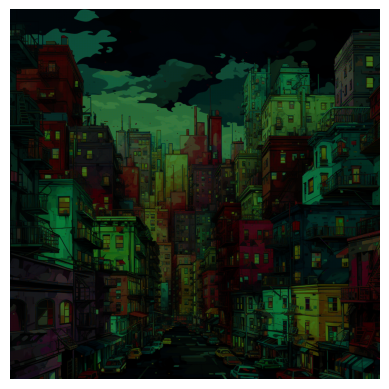

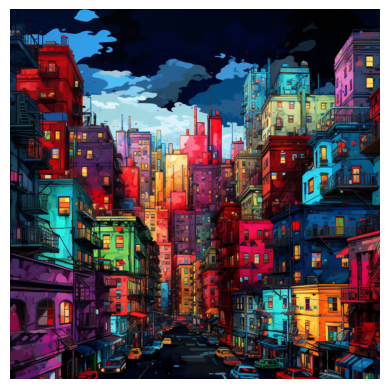

In [65]:

data = loadbayer("data/bayerdata.npy")
r, g, b = separatechannels(data)

img = assembleimage(r, g, b)
display_image(img)

img_interpolated = interpolate(r, g, b)
display_image(img_interpolated)


**It should look like:**

<img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAYUAAAGFCAYAAAASI+9IAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy80BEi2AAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOz9WbAlSXqYiX2/e0Sc5e735r5VVdZeXVt3V3ejuwE0gG4AJEFySAogh0NqOBpqNJJMYxqZXuZBphc9SHqRmSQbmWkWk2hchsOhSA5WAiRANjYCvaAXdFdV15qZlXvm3e/ZIsL914NHxImIc87NW80ekx7SrbJunAjf/fd/8///XVRVeZwep8fpcXqcHifA/P+6A4/T4/Q4PU6P0///pMdE4XF6nB6nx+lxqtJjovA4PU6P0+P0OFXpMVF4nB6nx+lxepyq9JgoPE6P0+P0OD1OVXpMFB6nx+lxepwepyo9JgqP0+P0OD1Oj1OVHhOFx+lxepwep8epStFJM8ryJ0EURBEp/N0U8BMQi0oEKIKCFN+qTO2nVio/yHGZjq3h+PztYnJMdTLvh0yfRRAUAazz2M4yK6cvsPLEi4wv/ln80iVMPiJ6+A7de7/J4d332dl5gB/vAeAlQlTwABi0Rpd1plPa+tvuE6BaG6cg7gj8PhQtzB2YMDeJTMcpCF5i1PQBu7CqZvdOupAf45vOq+uHhIMfpmiVFo2pPuZHNbIo7yMB/xH1zssn08e5bbXbPEn/T9ifR270+nMJuyUcK5Ajms/mademWoxi+l2q/M3x/FDLXvr1ypwNo7U2jsMntLJJB5UlIKaOU6Z5y0ra+7fdkNTyzssntSkQEANq0fGHC8pM08mJgviCKIAUkywSplsLYqDlorb2YHNKT0wBFqR2+dpfZXai5jZxknZn+ycVQVAiiVi5+DmWfvFn6T/xRZa7gidBsYiuYuUUVt+gN/acvvlttr/62xy+/210dIdcPZkTUI+nhC9BFLROcMv2G0BXjtmXnQrEAIf4Iegh4Cm3yyICXa+42kgFoCsGNTHIHIJQdeHjIv0fgkho+9uiehfA0iKc90OlR8HMowjBce/+bYleq0w5b3PHvAjR/lsSgnqqlkNbv48rI7U8JXOyYE0lPEzZozZWnpadv/11PqKf16dF5eu1Nxqp46Vmn8OUZAij8FtigrKmDeMngaV569eaM5VqrsKYT7bGctIwF2b1tarDlaSAoG6MikUKSaHZTS1yfbxUW/e59VWdn81yfIW6aKNM65v/Zso9i0Akhq1XfoFTv/Q/xZ1dJUoF8aZCllLmLcBVjeL9mP7OD9CD+9zbU7avb+P+5d9lqHv4uUDansuiJxUclnMroA7cEeKGIK5NlwsOpbZRNBC4kgTUc6okYLo1gJ03QQsI75z9UDU4N52AUJSAXa+jjXSOS/X+HNe3OldVwknJ+czUqY35PK77M4T9uL41H06Q5nBfc8fI4jlYxGPBnL61f2itvppkUl+vuULRAsJUSQvZ8ZLCsXNVEgPlESs0P7Wlg/bePBZdziNOcz4jQATSKf5FTDl7pSkltCT8uVXP65NptSeIWPzo+jH9D+nEksKxHE8N0LSi2zp3H5wkLSo37/0jlqH2UhtwWy958n4qRmH19Kts/OX/Gf7MGtZloKaqXyqgDP9XAC8Yuoy3XkU3hRUFd/UeD7/138LDoi8zm7k5slI6K7UpFbnyE3BHoONAMbQ+otrYaohMWpxWSAY1HdT0EexM+83U2m4NYK1TJDmW6ZtbV7vN+trNYYYemaqNJgsAqPWyYhxq+euIQqtKaRCQst8lEZPiuWpjDmKrS4U/FAarj6P2dwaWtNbXOtFrEdxyfA0C8ggkWK53fZ7nEYR632Y6rY3v0ii4iCC0B9vM156OUHYe8zUnNdQ5tRrmTsUjuI521wpmRiQHzVEdIRKh0gGJobH3yjrqsFSvp/y9YEy17sjHALCPRxSqha96W8FW/XeJcHRmBPXn5kQ2mL+ZMZbAvHhgj15qmfNUf9OuV2Z+iShi+ti/8PNk51fp+AxxgqjU1q02ruK3oNO9JYoVYWl3j/tJmCGD4GfmdnacjYVVB34EbgC4BrIqu6GN+ZLWXxrfvOmCWSKQn3qeFhVqz8qM9NVCNGUzc5dOqh5rC67mMRzzPh/7biaVdbaRYfnuGManRBTVQs9DfG3C0+CWmJnW6Y6tvZ+HgI5leWbTDGGor2ENMTZAokTmNcJQEcf6OOZM/AxOrL2or73UnmcGqUUXPagnMFc6v8mZwS4afJP9+7dRGTXoSWOJpDHkGcVLHcRm1lSK8aagGahFSkm9Ig41hqZEkFLr51x8Of+DnGT8/BDWR8VR8iNSO08FYa3ner21z9rK2gDi+eV/uDRvJPPqViAA6tITF1l+4XPEzoET8Aa0Pt4pME+pnKIC1ZkLjqXLT3Lhb/8nLF35BJEmAbR0uhVqtTDlwAD14AdIvou4Q6YEodnbKY2YR5jbKQLTJ4CDPGJ2Wxt5EUBKiSxq+ecQ++Y45yRpl1dm9KMLO1wHpHlYqVawDlsll1MiyUUEcVHDWqtfyv62u9UaeTmmuRNS67fMKTvT/ry2ynHJ7PdK/Cz62+6ryrSehWrOOhIq+qft+T2+wyKesM9ah6zHbvl5c1EWMI2CJw0I3cyn1XJWf2stSu13tedmGAOtpr7OIzT3uYLmqB+hJaNXtTBniPX6Z4hNSYnae+RHTRSqA806qqoDBK3nxR1o67Hnrmm7uvK5Pekfmz7UlmKKOVsVTyudgpeyxnkufOY/Iu6tYzwYb5AC8BeRvem61BGAoGJZP/MFLv0H/wnnLn+RWA0iHoOhrFFq+dE8EINsF8kPUU1pA0RjOI0BSGsztzaSWKQ6UG4B0twNOQdC51WvOl2z8l1Vn7YynyTV6mt3Z6aKNpJqAU3VlzmIcqZ/tb9af17Q70V8RftvRXzKPh0DzCWynttmfQIK4iJt1EVrXMVjVW+tT3WLtgYMSKO66Y+CAFT118bSgAut9b9swwOKqAN1Ac6LdyX4NJqq96kkko9EeNO+KIrqlBmZRyiO46jbuRdCbjVv7b1X7+o8wFXQDPHj5tos3IyLmJbZzvwPJClo40lmX9OEsMVlG+/bwFr+LOGretYWYDFLKGdabVH9OmTNPSyc7Yfg6Zy9xMW/9J+SfOF1YsCqEM4SpnhlXk/m7fMyv/ER/a1nOPe3/mPOP/cLROIBFwBVFVUfTH7dPmS7SL4POiFwU9NhlP9m8H75WMNhMxuN0m5sikACV3PMGrZw0My0FR0px1ntWZmT97g0U7cwF4nPrbBFECpkXiLM+kBqSLSO2KQ2uWV+qcHNwj0mUyRZEZ8mHFZc+bH1zBvPAjo9N6/Q4Py1RN514lrvZJ2IyCxxPxYDlt9bazOHNrUeCUTAI+qQkiBUmVqEpJhHrUtfLTrXhu/2rxPixopgVEs+Q5Rmqp8/R8dJKHUmo/5S81kYr9Zy4UQ2X2hp7DIlhCdJJz9TmGO5o/XOzp+NBZXNW5Ua91azAdZi0kqa0BizNtenRaqKWuv1SMPyrTKtnVt6mqubdLn8F/9T5NXPowZM8UlEF8LGPGBRgsQBOdHkIVF6hHiwfc9TX36KvQ+Ew9E2RhUVRVQJBMBNZ1Lnt1HXedbH2H4/LVgbrfpg7SFx0YS28s0b2/RbM5dWeSr7j/YkL0wt5NSY3BYim+laG/OUxKDOSZX9KcvLtO46Yps5fK6/+xgUrZFVan9aSPRRqQD8+rQvRnwtJF8ff30eqmdt/a461sxfbkBt56X2jdm1nsuoTHsvGhghir91i8U6LwCgKlMjiYYJa230C0B24TyLBH+HhZRiPuVpHHE2xlt1dlq8Yb3EzHJNT2LrmYp/2ir7iOG0Bx/Y4BNSwSJ9jINmzyIkERDzD+kgspDqlcBRR/tNBDNvqE0z2GmO6brUNthcctJGcUrmc7L9a8STTxL3ugRzrzoHUx/APOJZEk6Hu3eNB//mdxn/4HeRo5sBIL0gkwNGo90gHUBBEOojqjVxgrQYhc1bpQz8EZgVMBGGqddJE4jrc1NH/u08zSxN+4CywkU9XPS7lX8ulaynEkhqSK/ctPOQZFlXiXmrcc/Dco+C9Hqb2hpC7UcdJueqjuqw3Bz3tBezjFCDMLQRVpuQziV2dcTWIgLzDuPnne/UwaTqbHgIWQpGpCIIfsGstue7XuG8cbfHEt6X7N8MlioIgtb+VqWKuSm/TcGlSbiqLw3Qb83bvO7OY0Cqb0FyUjG1NmX+VLTGWhKU8KnUZsgjDuxrNZzUTyFaeQYkRsU0YdxPAi0qucxqLrQNx9MyraeZDtSw0bStFuDV6YNQSA3tTdvimlrt1ptrgtksYrLJCv0rL3H+5ZfJnv1Z1s6uYDtLqCSNnmptUajeeKJJyoP3f4e7//Tvkd18E+cmiCqKr7ilkqY3e3+ylVxkbVd/Pz9PiWUENAaToKYgfC3UM4/gLehNC8npAlz6KIJQvqtxqvXFX9R2GNBsHY1sOkWSDeRf1j0HaTeQepnmYMEZ/Xp73mrUcgaP1eGmPYz2mLRR4tGL057LVrkG4JXzU4MPYBaz6JyyraobW1cLYpAxJQgtn+S5yK5EznP6207VnDYztFXJ9azz25oSCWlJFMdLF1N62uwQFR2ehxOb7wRMr4goIMV/Wmk8jl/q6WIEfyRBxIBY/PDacQVDqZMSBbt0CTFJCGchtuw26tOicdtcowIYpL3gc1ayytPYGIJiK3pXiqcLCeOPPM1WagCkB91lTp1dwz/9ZZaffoatC2vkq1fwyQpWDFJYKqEeyQdkdz5g+6u/z/af/jLp0XZhKlqMTR2iKeJTVHNQB7g5PE2TPJ4IN5cl2/t6pny9pSL0hsSoJBUwVeRyHlFpm3PqHDBvbNQ2cpvT4bk4XZvvGh/nsx5z2yg5tHpXFnWrbHeG1hzTxky9uuA9c5BsWXs5BwFWIEIJTk5htB7RlIBcj9tjC+Z6rrlyrWMN2/j2c3vcLS6t+t5ktUQUNEM0K+B8HmH7GOmRRKGeadqPqsWKyBQ5jkH0H/fbrPdTSYRkZj82e1cbgBiwS0An5GmYBtezttexSRTCehowFj+4NncM9XRyj+alK1XXtTRdDFShElO0ylF2ruQ0Fo5+TqpptG1Cqaop17dRdB7T8zHTvG0x+7WeJwC6YPBiSCJDsnSa/PQrdM5ssnXG0O1b1Ht2dzyHN3fgxtcZHz1AfThEVrGUYt10SxQclE8RNwJSRBeJ1O10MsoYJJGTT1bIaUAiVKJgQy11Qs10ASrC0NhlczbocX2d934BC7oIMc0AxZz2SqJQr3seESiR8lwP5kcQBWjNR71O5kxF64UoYAoJPDg16QxF9ohOgAlh3yzke1t9rs9TO1+bWJQErcadLpIWailMv0DJqSqAQ3SE4ECnYXF+6O3bZj6aNKhYyrL+9hz4uahokYRQjavGrrWlhzLHxx9Pe1/W6pMI7EpgzLRFGJo9L95LQewKeJAirsL/EERB1l9qHlgqGDzeK2rjYJrZAjBBwZdnEeXgKYk0dUCuJrpQqaj6EDpjjot5SXimhyj/FlSBOXtj5us0tQnzFCy1kG0EIwJ4vCqO+h4qiWppE1DnXEqYDuZ54gdIPkQJ7v6L0fnHkRmaY3okfa61EUpYxPYrlVmt062JKT5o+12z/eP6Nve11H7MRaYLWf1mvSVRmOEI6kSizoEcN0stRHrspOrMFM0Qo8bHBCRBtM5A1EcU4Ex0CKRziEKLsywlE2GK5CuiDk11UfG/xtpKa97bfa73XWh754pmiA4KZkersvPJwiJiTuPAeXat6t2PwoPPq7O6Zt3NfbDoULaB+Gs0sl5TmNqaIcsisJybZGH7QfWTFPsuKnIdV2lr3gpJQcQgJsINPnxUZz5GQDzbQUyOUUWMKYiCg9whxoOaAqh8RaWCBZwhSBElAgzorac5KYa8PKMo7E61LqrWBllZD9WmQ2Zm/YcjDj8MWm3vNYrx5iWQFj2tlD3tPVXjOerjCFQ9Qu0KaAL+oFATNLbXxx5pm7RN5/FRNdVRUA5+hFgTALTcV1UWYaoqmcNtNuo8hljM21ANJrfWTjWpLS742FVtYeMWXg+v58HWTKbZdtp0qeKCyn4vGGe7EomBIClrgWlKXN5EohalA5ojVSDEOZ2p5lGawyrranN89Wlc2M8FAxYLWJqcfB1R6fSdlhHC2klr/2821SAI9b7Xs4olWVmHKMIPD0nHA6gIQ7M/i4yqpnU1pYOZ70yXt6q+4XDbhpkyTxO5l/txihPCTldNwYHYXpDYMTXCcNz+lerfnNlcmE5OFNL9QAQii+aBg3fOkSz3UZtgjKAihdWMkmcZ3lp0NEZcDYyLhVnLPbvGkNt6Z8uJ1AZcolLoI5t9aiPUR0/SD5Pm1NmCC535MEW31dJJM0+JP6daiTle4DYBuuBL/Wu9vVa/GoVn56CUq+otzec3pm+aoFy+D4eDdTG6uXxtVuljpOOWsRGSol51HTloq+05G6dOuOqHp41dXaY2bLW/lW0tSO1xNE7951RVJYuQEBD+NM8snJUpIqiYJifbAY1hLSB6M7RFTrC9TPEvahCEKegLVZywuaGh250s+0ULxjgei2MwNiLqRHgTQ28ZJuOK8ZxWtHhG66lSKS3IX+7Hqmah8KMo17rGDDRgXKr87SE2pQZFdQLOg+mC6SA0pcfpkzbqoOqGzCWe89LHkBQsiiFeXsXYBDQnGwywvT7O9kFCVD4tBq/DQzTqYPMMsqzoYIkQhdvWgCkXprFzpm2W36RASuVkV9/rT1Pk0MBNdaRxov07D/JPgABqe6qOs0qiVacJ043eXKRqIUtwEAEbo/SmOsLiPGdqbeULZFP8JRxUzzOXbfMks4A9P83n4+aVaCHjOYT82NZmEFEd4S8qJguWp74g8whEvZ/F75KgNMBpETE4YZL2QwtAZjIbRIoQ7O2hzEuqhHOfBC2khY/Xr1oDWlu3eQ3PGAnM9h2pE4SylnJCLZge1AwqEK0JleUalFjTUx6k1+dx0aFvsNiJMFFE1C256qDZENspljef3RuP8kGpnytIG2GX/W09t2lt+bKCKZ3+nNfkHOymmoEPhilIF4iYMsWKSsE8FsSvgnYxiIkRMycM/pz0MfwUCgQV99EoRvMMZAw2AlsL3iSCwWN8hvoI7SzBeBfjLZUmUaUkp4swTu1PXRaYpYv1qZP6iXNZ9TzOrDWsWeZokdfFbGena67NelrMQauphX0IKSD40IekIAz1WooW20gMLSw7ckKArRS0iSTmbev6uxmGbGb4JgDZvLEoNMIxLCAI9XOg+v9nKmuHSmj/baeZTtfqPU4dNOOFVCLGBYjnET1f2LEC3gPum4+IhAgKK6Mprpz2Y6bVCsjKcumJejTTvxIZzyWErXGUz3WiL6bo+zzVZo2ZwYbw7CWMoEzVSVL8V9SrHnQI0hzTDEEQQbDE3S622wUbF+d6AceIEborK6jvko3HuHRYSN8h1WXodpryBg1MM2c+FqQZpmC2/unXRQxIPdqxD1IDGSUuaK6K1spMa1cTY+Lk0f3lY12yE4WumQhjI7xOL90xxhQwErgWI4I1lswr1uaBaPhyMZsgU4o4tN6Wy9Gcpmn5memT9uYCwSClVZQEINCSikr4PkUAzVgrixB4m99sNDgvf53RKv5f92CcUvOwoKUXs+Jon6BM62kiy9LKIOA3W8CvA50g+ZAAQPUis7PaHmXZN2m8k+DHUMVnqo9MqHNcCwlgo0ZmclU1lASmejunxirPcZtTpkUXursqDVG/arM9rgCRWpPWAjfbVO/Nrb+oZ2pQ3HARDHWrARMX35rlj/dLDdZwKklgBtp9WbwY0/6dRLUwN0uJ8GPC7V4wcx+A0JrXJvyW5tvNTmaIpARDi8UdEgwSGZLeMjbuNmL+SY0hksiCWiIbowh+fFi19wjoqdI85mk218kZhXkkYP5SzSJ+pWnAgxT2jHV0WpiTi+0icR/p9E7UsxMTBS8mTHIUo9ZifITgiYwnM4JTsCYCG6GqOBOTDA/w+RChVw1hukwl4i+no3yt078lF1TlmQPsNHkTo4aou4Kcfo4LF7osLXeZ7Gdc+/B7uJ0dRDRsvv4WyeZZ+ssx6e5DJnfvkoubNn/MXJxs0WdG1qph1lGtUpdpaZ/UbnN6MU71W02tAqnlKZCXVcSViKuNkI/fEA10K4IQ4yWhOeNTzqTUnc43EZ4tcVyuyknouBINZMMCpK+1b0WhGce1eh318hXVrT2WkkW5dQIjBGUgt0UdLXMXCJSoQPU5kKP4QNBr5wgNAl4MbT5SCv0WLX0ZsuZueSTAnoAgLCwqhEti7FRybae57bdGUo0vmGUHiadObNuMjCA2Ju50kW4XY0yBY4r94x157shLgcAIsQWMRawFMYEBk6mcULW10HekTUYWcfYnTTU1cdn3sjczoDwlpiptyabW/2L/qY2xnRW87WNsXPgbnSzU3YmJQs+MA0APdxD1WPUYncD+ARETrHcYYxnE0OtaPAbtryMjkNERKr1CbQSVbrIC8jnKGglHDtVw25MkbWIAUdJn5aUvcvkzn8Nf+BS208UK9Bxc+sHvcfMf/V/RbID21ul+6a8RrT0ZzvE/+ir64AE4V6te5ver2YWydzNvynHVD3WnUtF0YNNl1YLKC1HSZWWpi+2sh16kB4xGI0aTHPFZbbOXRKRA+BIzvfO5cMwpb3VaCLDNiW0CWw2Rq4AtLgFpUotWfc262jOjC/LO1jbLxbU5tXLzNFZpoShXe1GpLpsId8oxtyvRStIopQNTEgMtDCyQgqudwtDcnqsJptYFUVCJQoTQYF5CCyIak1IJOyVha81P2PSdAh48deOC/2FScaiMrcFiO88iMaXe/1IyTUFHUEkHdYmzAXSIjYhXljFRUvCOiqjHu4x8MsGnGapZzbdD8SKojSszea1CV8whUI2ulgxsvT8nJAg6+6nBaPVOY5dXETEY8RgtzwiLfOpRDUy5YvFqUA1yQsk8lrgUmUpbYqQ4+w3akmCsMw82Z9OJicLPffbHeff629gzn2Ez2mf73nvsHRzyxKVzLPc2sYdD7qry/Y/uko8OsDZBugmT/hZ+NJ5OR6WjaQtgTe7TqEeiGIm6aOowmoclqekxK17SGJbPPsOZz/9N+p96AWvXsMWGcICJhPWrn+TozFn2b32IcYoOxlh7i+H+fdIffA10hIggagoC1F76xeQh5DEY08V3tugsJaz1HdYqR2M4GigyOsLm+/gC4JtyUiAesd1i5TOv03vtr3D6whJxHIUbXPOMg33H6Nr3OfzGr7N98z1MnqF4xI9RUlCDmqXC2angWLX0ep0jYZXEqXhhFFQ8FCbCqlNpJhAYgxJX0kAz6dzHBTkWvllMZKXWl/LNlKurrD0e0YcmR9UmDHMkhBmEVj47wiUo5ZWHUvwu8yiLO1FHMCXnV54HzEE4LSo4j+Q2TmkkAo1BJhXT9UhB4YdOUdFe2cH6utUI6sy7egrljI7Aj2kS1XbIymmynQSbdMI29TkuzfGTIVlWHmLX6y+eVCFvnk80CU6rnVkTwUr9fCIma0G2co0FMEs93GAPdSml01kJ05GJMPE6vrMEwwO8e4j3RYzkCu6kqq1kGESUSMCKohKU6CpC1PsRSwqvv7jB7u4yp589wxWzxPcH19gdrrHSOcuTT1zCbB/i9gfE8S45KeInuNxAJwoUrLp3QAu8EjalthejmBSjDrN+BnPqMum9+5i9j6pL7oUpUuiwRvKpz3Dxp3+J3vqTqDQPulTAiYdej/izv0D/V/8ew3wb/Tf/FWOrZLkizgWKqlFBncuNNgWZmYPxAqmKiegtn6P71GtcfPEC6eUfw6+epxMZDJ7lXMlHIzr33yR//ztcf+s7uDvv1ZBQALLk7EWe+qn/FebznyKmh1fDpIw1j9Bbg5Unr7L22R/D/85/xf6/+CqaDwpkFBdzC4oLzkGag6Yh9HbD96MWP6VIiRpe9x3ethkHmge7+DIv5VrNuSZwumhTAt0g7SdL07Jl/WVbpvF3/h5Tygib4d+jrG/qUkBLlpmrsmwVLR4Uj0jhnwO1virTQ8A5MyDhvKjcejXed37++ueZfrRfFdKLdAumZsGhs0xLNcC5BRfHJ8PUF2EqJSzmpFtdqJg7F+4O0BHl2s0i6tmV985BOgbvmUwm+DStOagtWL8FKdQ+j6Wv7dHiczij9O3Ctefa4hzTvJRnYd5BOkDcuDZ5ihrDpYvnWHrqy+gnvsDNP/gt8rf+PwTJ1FRrJVJIAmKLf27adHk3hgbi4LR7ovk4MVG4vQtH0ifdSznwYx6mCZO0w/3xhM7129jRfQ6yLrE4cgQnEeo8XR2Stu/trUH11NpWKsAsYVPSCX40xPghoAXFmw44PrXGE6//h8Q/9XlMvILztclGwJTingGbcOrzX0bXnuDmhx9hD+/hVEn8iHh8h2hwh/HRgIMB+NyBTzGklG7yXgtBTRUkQpI+KxfPE73853nixavkp57FxJaobE8Dckg4IM0dw/4V8peuEF18nuyf/l+QwYjSlLRz/gJXfuk/I372k4BH/fRAsg5XTmOS/gWu/Pzf5oPBNoe//7VAujQuuE2D0RTcGIoIlNPNXp//5nOOctcYckwRgmMOcpdSJTFVH81uvTqBr/trP2qTFpy2FOFTZgjQlKGYxY7F2YnYYsyLVDjVSFrIr9g4QFN1VMu/oK7KaKEaqRAIWkmkFpctMWiTKZo/P1IvVhKtutDT6K0SQpF0ixdpNW/TVZjukbJ9KRxMp4ffymICG2JjBdibEoSZDs9MZZOLDuEuRsCI2bmeXf96cpMxo7TcnydlP9qpKZsuxuEy1ePXhtAm41M4OEl/hCiOWe1tkHevYLFYE+bRq0Uiw9opy9ay0Jlc49TZPhr/OM4Hc9y4OAsxGKzxQISzMdgQcdapkqvBFZoPa+DGwY/YJDXfu4/Pxxzt3CM7uM/BvUOsWeHg9j22dYlRepebyxF5ZwnSUeiwZjAagYIRBxqsqEWLeEYCsZQem2X0VQ8KTg3ucBcGQ4xPCeQj5Ihcl6XLL7D27/4FultvoCYO6rS6BYVARUGqg5xl9MVPcv75V1E3wYuCdcSaEmnGZKQsHXpk/y7dh28R791gdDBg91AZpWCMsrYCq2cvkD/7ZZYvnsN013EmRmpbCQnb6eDhTY7+yf+Z3Y+28Wlw+BLJkfSA0omns3mZyz//n5E89zrgME5qG4iCO5nGb/FeSOw5Tn3yf8LwD79H7nbDxi58FNSPCOaoFBz/IiRXR9mGm0xoWjRUk1gU9eAzMIXaRAvkIu38QnngXXFObcsSqT1o6fBUljmOu2thm9qtd6H6uKgrY7HVSls6KP7W+zQ3b7OOEonOJkM4LK5zre184crJ6flPu91aqvsOVIfjNUI2twyABekRTFUnFL721fegii2d3op4VlKDYnWUh71Nf1iLFPNcXgbVYCDmEYRmx6aQp0PQcTWWj4vatWVufVIppZnatxksEsmkVneN8ZHp7Ggt7+wE1OzHBCwJr1x5ngsrF7iex4jpkthifb1lyTuuDicsvbeNXN/hMBfGskUuFolyjPGkkmBUODUeErkOb24skUuO4sgVxmrJJMJhEKdk5mTmyicmCs89fZq7R/vcW1mmow5z7z3wIwbE7EcR3U6G760Qp0KOx/gciWLIPb3eFXj5C5h7bxW3K3VJP3qb6OxFrv7kj2FsjwhBPTjN2T1w3Pm9PyY6c4Hk4Z8wGOU4D1YNNoo5e+4len/9f4ndOAv1KzHb6yANcEVL9CoWjXvkQBx7cl3BeY9JhM1VwV66gNVPIt7RUeirwRXempFREusJG2kaBJASOCRwWCrKui4xvvrzJNFt4gffRg5vMZ5k5BpjjKXz1BUufel/jX31DYQU8QWSrOswi3pFwXpHPhmR3f5TDn/vt9B8H/GTYlNNinHmU3wxMx9Fva3dp2XAweK7ah3dFWVEECaoVzAdSlv6pi+B0EDwFQNc51Da/H4bsdfaXJik8afOfZZOX2GlF3DrdU/muuPSQi/ZAilXjdbDOMwbSSkt5I2xTHMGSUJqPW0NqPilFVxV0UNqQsXCQJBV5uDUFvqTEVSLihY+BVo5ms3hyotQFVISWPVMA/QZ2iHTGmxHu18zL32hMmqedx2/6gFqFqPs4383a2n9arxcxATUsxX7pNGfNuw0eyC174JhubfC6eULLGcJk2FEJ7KIdXh1eBSLZykR+uRglSgShuIxYnDGg+QMxLM1ga/cfUgWLfP+pS3ogPU5KkrPF2b2KqAey49YUvidm/vc3Pfs7L0LqSeTBJ8PcbHi3A7ilPQgxZkeYi1LyTIkCcmrn0TSLTZ/4S8w+oNf52JyRPTpL/HWP/lljr7/J2RrT9N74tOVaWUkDrvj8B/uc/Hf/fdYPbjF7bueh7/7a/Re+BKrT26yenoVXTuL+OkgA06aItI2UFR2A164/PZbvPr2rxDt7NNf2+JffOXnub/1NE4TDB4X3O+Cvk5CBJqKkUXwhZWIzgDGtDOC4M+cZetnf5FT+Zhueo98dMC9B47JYUYSx6w/u0bUfxJsBjWCUAFfhQAEh2P0ztfY/Z2/z8777yDjeyHAGCX4TePSN0JQ1Oqpx4+qg3jFp+ki0VemtERScHlh4hahUlokCaX6p8lNlU21kScLMIC0/i6SdNpltIYoS6uYuoRSQkStvgaGaXN35XN4L1WeYpxaWhyFitqEbipJ+EYz0zVyhZQkTcLUQFky9QUUENUq8GQVmWOmpy10JIJqYSGEVkRFmxxTcyrLB43QksDVHcxKKREFcWh7/CWFb0TOnY4xEKcx9Yu7TiIl1OG2zuw1f0/fzpZe4KQm7Xdt8jL/adbFdVHgyiZkJHR5duMFfL5EsnKZLbPDUs/S9RlYweJB4JrVgIkk/M5FcaJ49Zjc4hByJ3xnfY1JZzlEvnKlSa/DljBS4MPYnAzdn5gofPV3vlloDQxWQCUH6WDHKfuRpZt0mWQOn+9jJrvk584RXXiB9fNPsbNtEa8Yu4QywXQu0Xv13+Hou1/l5lf/Gy79lYt0ls5Vk5ejaC7krJKvr7C1HHP09p+w/PxLrFzcxAOmYAK17hBU/GloTytkHmYonUx4/l//5/ytG7dZtRbcmCff/UP+yWu/yAc/9Xn8yuVgel3sxLZnf5PnK8C08bO52SyKRh0m0RVYgtOnpdpfWt27YJhyjSWHOK1TBbxXbv/gDkm0znM//WNExjAa5Hx0Y4S/+23yowd4zQsE0tyQZUiMNh/aTicywC3OQRRPuGg9DQhQIqSI6qlqazhgtp3aRM7tR7PZsv+L8raQfoVBoyIaZ84MMWgh31B8RqxqPpWETWPqh+5tEjb9ZaFmaRbeTmc4rH3p21AcFhY2c7M9oJKG53HibcJQjbGExzrSm1niipJSshMNoqmls14FtLXWWjJOIXhVhgzlWrTGpKUJ7rSnM+OZfd8mvHPWcEGa9nTearVbq81zDaRmK2yynM3n+TstqI8tZzYu8MYTz7C/dIE16bI02UNsTGYtGnnK+5S9FJaQopQWilrgA4k9IsL92PLPlyxegXyCTcdB3a6K10BAgqRgydyP2HktWV5G8wlZsoKbDImtJbPLmPFe6LyxkMT0kyHDUQa3b5FoRPfKKUy2TExGGvUCQKhHHTz79GXef/+QyW/8S/p//q+j/Q6IC4H3DEFENWCsIjGoaVpLSI0AzEiAc+FFUadcG+7yR71DVo2QS5f7Cv7b/4h0+03if/c/haWt2QrbjJXUH+uQIzXrnbIz4X0gBlOyUga1kjLsR73e2k8BTBTxxF/+K4j7pSpkVM/D025E/963uP31P+bg93+Vw+EtoIxUW9RR5G+CfXNeYJ73eDtP8b4xXCXEyQ8bPajnOgRddmtMFBijihY6p/oy/xR7trKeQHIokGBTZz/NX277pt91E3k1kb4UB/DhML8+U3Vz0Pb8CRFak1aaZDnMW5AkpCA0EA5xZ+ufQawzQ572oEncp2tbIbqZ1FSDNGahXVB8Le5Wk19vVTmXeIURuUZvZ/MsTnUTzNkYw0Wext6s4+8mnM+DnhJCqlAbc5JU/VgcHqNqq9EXy6ps8cXTr/Cpp5/jzmGCDI+4KTkjiSj3jxZzHMKiF2WLMyUpRyAUYYN8wAeiOFUyY4N/ggtEw3ulvKzMT04WF+vERCFSh9EU0TG5yRB12HyITUyQAtwEqxFqu1jp0HnmNO7hmHTvOrJ7LqhkekuMRkI398SqrH/yCywt3+Kjd/4F/tpFli48xeDtaxxlqwgZGAme2iqYKMKWh9KNaZ8uFEyXvGGToNMv1hjeuvI017e+TG4T1HaYuIiD0RE/0/0eu4MPub98KoBcyXC3NsoMDEjzYR6INJi28k0ZNrhRvuXNXIPgGAMGvAZtEwYi02Ny+fOcvvwap579Ctd+5f/E3o2vNeoLj7U6W5uk2Utt/lww6IAYpvlDr0uP3DlocpaVnd+FRv9mU4jEu6C/5e9yyMW5T1ONVG+yTSbnk0uIEJ3vBDifIJRfykPnfA6OnMbFF63bA03bmRcsZHFPp3mnIKMz749DwYuRZPuF1v7VYWxewTYRL0O5/ChSfWdOGRCpmm3uR23BwEmeHtV+xbXMbJv2ChmMdHjh0rO8ePkVTi+f495kRN8+ZPhgxPtjAXIQg3pfxBcVBBdU6uKwUqiTCHfZiIRQ6akXnA/Ok+JzEplgVbGm8NyWcMdL/0ft0Tzc3wkjHwxRVXJVjAzIJCzyyClEGdHmOlEnof/MZ8izm2zFcGT2IMuDRb3vYpIInMEnfa6+9le59v67PPjtf83B+W+zeeU1ovUOXiIwBjGuiukm0KK8xdaTcgtNTerq9zfUuR+D4CPLwK7ibBe1FjWGxKzyiWd3+JqbFKL6LIjMxWcy70vzncz8qj82seVM8IvSOat4qzJFwyqBQAA4evCJZznr/2PG//U3GadKmLga4B7Tx7nfWn4ZwpQLk1rflQikUB01PKhrCKHK33w9B1O1UtlGUauWPP6iCqbjDd6sJVGYrbWJrOp11VersP+eowYLF6A0h9ZMZUgLmKqx5tWjTG8CE9CoQG7TeFzzooI2a5t182opgxpfZp/KX20po9XTYrz1SOaNZa0tfeDFhKaqpTDXLfyR6q0u5LVq3xugUwPIMsigQUIYf9tFbRJC8+RDvHOV3+vxKP/RBKHBk9TheybA53RPW2Kubl7hU09+kqfOnqEvsKyOvUHKsDMmHQ8LA4+CcOaKqMP4FOuHCBmIx6sPTKEqEQ5RE3CA16BhwZMq5BqTE5OLwWnh3y4/apPUtQtYoaJUlcerKp3lZWy/x+TBHSZ37mG6htEHf0LKEnf3NsgGE/au3Yfdh/SXRqSaofkAbzLiJ1eR534c/+ZX2Tz9OTqv/ySHDz0m+i6BXIZDFucVxWBUiPBIvjM1oJRguSTFDsozh8fC2jKqXap7SqFwOBK8z1GbFwthiHD4Uc5AAhJpAk+BhI7DoRUQaOMX1Zv5LHHjoFpqG4ng3Tj9JpT69fLMQABMQBzW52i2w+HdG+RVdOASQRYBD2auzJy3AaT1rA3YL99XvgF0qWLf1OMLNUbZbDb0Zc50zJSbzs4s8mr/rrNqdUJk5gxzAfqZ4XTrDlqN0VRVzjK9JaIrYa7ciAUnuBDpKMFgu5BqdHbcx8s1i484mwh1dm0eSZkrKlBi+9ruqBBhCbxTaK8/hNnwBDPXfLpvtRz74jRDCGodU7EYY0kSQTsbmE6HfuLR8j55FFzKeO+IydF+cOpsDbnOlpX8YJvNmD8nrQwLgwoKK6vL/LWf+DIXey9jrRAp7KcP+c7OTR7cuUvXHBKZIA2UccpEDBEh9EVpOelLsuHBSdlvxWh56uALi6MQV8sWfkWRCGJOJgGdmCiYpY2CcykWXQMn6r3D91forG0iqxtMBCYPbjD84D02z14g2RmSTMZcvGXZ2z6i8+L5oOvSFOMhHzmyfg9/5iKHt/8UM/gElnWM+iLqXxh2Lh2cRqReGR+Meelb/3vOqifTdTITk3uP+AzrhrgsY5T1+OYbP0f3yS9jtIMVW23R1Eao2BALRULMFOsdUb6P07y4v6quq2xyVlNNYju2TJ0gTCGmub1nwc0XJ89lzmAZHjaZaAEG3mHyFJuPsNkeMtlhPBpysK8c7Hn8w9vIB/+c/Wvv4HypLqmwcI3TbAFuvVvVp3mbtHQwK0IySBkVs+5tPB/ZtglANa8zAa2aBGuOtrgo357LGnvaal0pA4HVVUitXU9JLKd9Dqm8S3sesWo+NUdMsX3LlQ8hQkIIlTZhaI+hfOdb7+cT8MVkXar+NVa+qmoe3C4mKiEFojX1yNEavSwttOptFfmKCAVKCkwCo4cBEyHGoNmEdoj3mfGUGFsJlm9xj043wnaXoLNEYkHFolhcay3FxPQ2u3j1pEe7ddrVnC+ZwuSjo0YVMFOJ7k0pYbqShp4s8UtXvsxPrb+CGuGbus+wB5Pd+/QPhN6Zp1letyHukUw5/tAlrQ6eFXBiwIP3UmkJvIJqhpcYiaae8oFHFvBBbWROpj36GKGzKXWBoSelhb4IiBujCJHto0+9SJoPSPe2SZcvoq++Qfrm90g//YscvH+HM+lbxFjIJpge5EurXL6wwcG7B/SuXuXOt3+V5FNfIdE0+DQUAaGcj8gQnE85cBFJvMFqJ2dMB+fDIYtoRCTrKJC4nLXf/h3cz76Gu3geMR5Rg9GcRLJAZcUUJn9B4kmsw9ZME5u4TAoGriWAzuV4Q/7pYZw0sjcKF4CokxH6zu9ycOs7HOznZGPIMoPPFHUOsgzSMZIeYcb3seM7aHZI7h2ZD3dlt7nM5g6tdbYY4ozfWePHlNNViamuWCwOW6ttN6+uVoXVDNSmYtGGm6KxWR537prMmeNmH4IKRyq/gWac3pBtDmGSss/19Z7y1dMWFhGuMpkqV7hzIJh4ag3pT+GkdOQrmK4KMRTIsOjUNHT5LBFuRgtq9U2oqX3qc9tE/o1adcqjTmMKTVlsaQ6bCjkWDE0Zwl3JoGRwxGB6XaLuEoghOzrAj4f1SoqaaqNUQazFdtfoLXeQTh9sUo3X1c+a6rfrlTNgLd3VPungEHTWsTEwKc2ZnEklppUas9igmg2ZBgAjERfOPsmnXnyBiC74mKt7A95/5w7pBG65+0iekB4ZfD7Bl5FhtUDqPtxXXwbLDirjEq6LlVFwWYrvLNFPokKVZvBY1ESI2GJZfsSSQn6wFwBag9PNlFNS3CSCaJ/u5iZxZ43Vi59mcPiH7H/wLfpbXWQMpCOMgB17vBgsE3pO8VFE91SPcb7Pmddf4uGvfJ3t3/jP6bvTqE/BG8Zk5PkhJtvB+FN4ESbGMNAIZyIwlqFPMepJNEIN5Dai495n8Kf/hMh9lvSeZ+3118g1J/ZDUnWoF2xxYYxVj4lCOIwSg0kVrqK+6NMFr57qeJj2VmumJn9WQzgfXeP6P/4vGT94C695ISbWnONqC9oAfoXKwkWgRCq0yoSCcw6wix9aWtWUge+kbmkTDo/rCGCGhsykOmrS6mB6ipTmk4XjubMZNHfCErb2r4xI6qt+tWuaHkiGg79ij9a+11FyHSvW1rOqtzwQa76viImUr0uCUUomJYEv6ijZ5TKeTXWIagpGZZ5iqDU3NclsyvbMjr8ahwaEJCWGKsZQhdKqD72xMEF1Ee52SAMxkelYTZQQ9VYKZBWCLc6mOqwKkekSb20R9ZfDTWoFFzz1N5Q5oDAl8AoQdVATgWsRhXq01EfhzZK+Vnte5hDGMLMWw8X+Fn/10z/OUQpZLyYW6Mar3E6vccN9xMNsn3wSkWWnwu1wJqjIK/FaHGJc4TktOCwhuoBHfGHJ6UNsI1LlKE0LIhnCvqhkwb/Fp1h/XOiVaToxUdD777RMjqfilQd0+zrxq58nWt9CNleRp5/Hvf0NHnzn97DmSW78/r9CjpQP3U3Sh7+J3vom750SDq//Gug1ssmY/d/9Hnt+AB/eIAPu/86vM9nqkfqY1e132fjaXY6Wr7ISCQ/v3eBQInJrcL7LMHPE4hC1ZN5idYQ/fMjqB/+Kwd6bbGWGS/G3GTuDf/AOLs/JbZfcR6h4TD7mlrvH7tkxctlR6YKrg7JyU9e4LmpwWGPCYQ58ztmkUmPdzJWrXPj3/iMe/Oq/YO/Gv4RJ2qqrMfnVAaRWHGa5cee01OpbSKbQuZYxh4qw2wVhKYnalEdvUb2541uUYdGxcI2rrT4sOhydlmm7382XHuotl1+LM4IKebvCgqPU57da0norpTVQ6XBWxgoyVd7qTKBhhz+Pqaj1Tik8jOte0lN4m0VW08PIcjzSYASmZwtto9uZ8S16U5qNlwHqSspZTMWM43etkXCuN6Y8O5jSiYDoVAySlOd8Hs1S/CStKporrWCINjZJllagQI6l7f5iSGnOowLkKaJ5k2GbAVVtTIzC1Cy3+tFM8xxYRYSuJPz8Uz/JJzuv8uHQI/mQB72M3+58nTunP+Kj9/b56Suf4ObgJveTcTUeWxDR4CMZLC7VmsAkSrBWEx+hxEGLohYnBqcSAqhIAX0aziUMgogQLXSBb09B2199QYp6Z5gFo5rfgAi9s5dY+cTn8CaBbMTR219j8vAePbPCapyxvASrw5zYxezgWY8illPPTuJ5mCuflow7vsc7/X4Q9L2hY8LlHRejMb8o+3RdRHcyxIvHesPIGMZqyH1GUnBbN0zCsjnkKW+wXuggdMTTI8dbwarQVzAevLchvLbArhf+u0/8eW7/+/8bsmiDqThfA1Vt/KnNBHMQ7/GSQlVWwBC8pxkecOftX+Ho7/9jhkfvoBU3W4rexYFSJSWU7U+fWr1qwX95HWJ50cuc+DutTkrr5byteNy7+Vt3hr0K86p1hUyz5Lw5l0Ydc+psp2qh5iHrKTJt9lMaz21DyOlzqYvWwCWrC2sk0++zKdyvMI37X0oJfgGCbGDgoj9xQB6NHHNR1Zzx1b/6QjooL7fRVsnZVLVSiYAZ4o+oDtVbVlvS6REv9TFqyLMh+WAEvhkOpD1Ma2P65y9jkpM5X02L19C/ekbbD5kc7oT3C0OaMAs+84GuaqHJeAQjCiuWV558nr/9xl/jdHKO8cGAjTXhvXtj3j/8Dm/fOuTFc+tsPHOGr/7RL/Pe3i4ewZgI633h1RyhNgJ1FfMnxmIIR8gOG85RxODF4CUwK45w94JiAntXMLVGPA9u/JtHzt3HuKO5vsXbMxeoV/pgh2xnh+T0WbAWs3wRM5gwmexz4Pr0jhyRKj4/wmKQPGfiu4zF0WPMk6lyCnhHY4QOIoY0uPMyGRnu5EKfEcalqEQYESaa0vEZWWF6pcAoyhi5iKPCU7Sj4Aw47YAoXnzhcBfsgPGBwGC7PH37bW7ceoheXgtcQfuWo0UMRmuW6uhwMdc7LRvEcQNLa5x+4xfpx09y+//1v2MyuE+pgrDJWfLNS6i3mMFtdPggiIg6s6VaLRfITmKQHsGEtG6VMzu25jjm9bi56ZrIsfm3Pi+zM1JD+trOW+rI2zM6vz+zv+fkrkkk0ywL0W71ZlEL7fwVgpCY0vu7SbhqpSUwHdqYwTZCPgZ6Su6bHDRCKklvWq65axcdnmqNIDR9OhpzoY0/c8YV3iq2cGYM45/2FcDjshw3TnHZiPqNgJVcU2RVY4niLp1uhLGz5pRtmGvCfw02VUmPDkkH+1OCeNymnMdbNAa9mFgGlsHwRHKOv3rp51gxm6RO6caGG3sH3OB7/GDwEF7N6PWf4sHgkKy3zqlezOFgwupKH809pzoR+w/2OYx6iCSoGlRibBLRO7WK6fTCOaL3OPXk6bhQI0XkpoiaLIIVX1wJZZqa5WPSxyAKJbBTHDjXObhiOXXI0e232Fpfw1iBSDBb5/G3J2Qm454TxsCyOLyHzApDYxlpuBDiljXkzhB7IY8sqoEqlsj56chwJTOIxngPd7C8p7CphqRY7twoiTcYVWyhO1z1SiYwwoR4IOqYiOHQWs64HJFwI/K+wtnxbZ753q/y3qX/BV56LEJDc6eHinmjYOpraT77ocWcqpQIRLCa0HvxReLLa0zevgcokTFc/PP/DvrFv0FOl+6tb3P4W7/Dg3f/e5ikNVVHozvFQ8HhSicQhspiYv4Zw9wILvMZ+waLUP5uz9js8zzOXmp5pqTj+LqOl0UWrlt90DWurz6q40l5m9zVCGilfhCCf0P77uGybKnKKtdCp/8KLmFWspglV5W6qbxVq/COr5PR+nq2WbspQXCUh8pAZYHaYAGlRLLTYdSv6pCCm0U6Aa41OLnWaZ6mKT4Nh85ti6PKC18FbERnY41OfxMxgoidO4uLiFz5TVRJBwcM9x7gvZsOah7gt2doEQi0DrKbg4BeYnnj858m7i0ztvsktsfh2j5f/+BtDg8de6cP+VleY3OwzMODlMMRHI4taZYQSY8Yx9gJ63HCKSbgJ6gFby0+Stg3m7juOiKWSIR0POJg5xaZDxKmmByxlk5vie76ChaLwc6Bp/np5GcK0XIAnjLoXLVxlWCa6jGi6PYu2VsfkDx/KRyERBFyagv/4B5Zp8vAGMgSUhORpEcQOXwUsZcv8+s6gSin5zPWMDybZ/RxOGI6Bi6NDU84JcOQAg99xllSXs8T+iaYx+VOeEssDwUi77A65KwXMmPYNTlLucV55SBK2Ddg8hxjIFLP+WTCnrWce/ctPvzkPfTckxVBanCXx6Vyg1TI+JiFUELdXjHGE08O2N85YvRgn/ztX+HoxkeF6S947zl65+uc3btH9MWfY/DMT3Bm62X4BykPvv8raBF4bWFrRQwbVanunJg6RjXHJuUAapWVXW2g4dreWIS42+h6ekbaJAhzjCdnnheFNTjRujRSk4s+vs0G6ZxTVYnt6u+0Ogid1tciYFIeKk9b0opLnr+K8wygpzSt3JumhqXLuSpNnKeEod5Xiisg25LfTN6qTK0HBQGjFlYlmCtHRXsl8vdNABJHeX2p1HwdBEsc94g314j6faQWJDLkOE6CqjNFCuqY7B4xOtoOl/LM9H+29HxWhCYRaO2Xeoq84UsXP88vnPsc728nnB4nrEbKD24c4noR7miHz/jXWUrXub424sBuc7W/zu1OhpiIyETgwakyiNcR8VjjEKM4EcZxzNBHTA6HeDUYDN57NE6wxVW9tjBS8JMhw73CoMYmRMfe8VEbw4lyAepdwQj5qZNS6VDlcsSFwyJncvYevE3PTpBuD4uBzhq6lpEe7pJ1l0jzAbkdoiT0sSTiOTSCSBecR/MJq37EL2jGRRcCBURi2PSQ+8K1Wwy7GBJJcZKRa8m1GKICxvoRSG5xKM4pQlRw8BKkWlc4iaglVofLurw7svwY1/je9/+AB2cvExeRP33JVLZho3zVkAyaW0pqearw1MUHQXEyZv+9P2L4a/+Mwc1vMRiMkXxEsOAIgJpIj/z2PncObnPx9RAB0a8ss/7GJR6+ZcG1DkpndrWimlIEkSokk2PQaVtQaCB/nZmLReizLQtIHaHUyra3YoPpaNRVb+ekxGB+vkeXfoTqr5yE2hxPmYfaRTsNT1ep6q1z69Xo605ij+jvDIIs7tRoxtmemq+2Y0EF66tZlVEA02Keq0XRWh6pZaTFNUuQcqqokuVY/By+yoMOQSYYAxIv0VvuY3trmKgMz10Sm8V+A3VSV0U0mIwZHOyTHx0FhklpxSRrlq8TwnmQMYdMNN4oIN7xzMUt/srf+Ekm7xuilQyzbvj64DrXO28R725hz/Q5k43YO9Xh5u375A7+9GjCkWYI4zDvmhNMTaVwUMuRPFwzmkmE0yIAHgJiiAS6MmJFBsEBDiUywV0g2w+RVNVEjE+4Xz6Gn0LBYUqpnzLT5yQJ4qcv7GklZ7B9je6ZJzHxEt5aZHWTKB0zdiNkuUNnOGE/tiRGwOSYIlKoF4uji2XAdqZc9eHUvKs5OUIqgjOGPes4yqHjI25YJVaPqOJQ9jRnIMoEx1nj8WrJgJHxuEgwPsQCEfFEJkQRtGJIVck05zBXrvzJN8nvvMupZ5/n2hf+ZuFFPAWDWb5yyok1vbWkFns+cN8lcJYBOQYPd3jwd/5zJvffRNVTOh4G1ZJgTJ/zP/tXSb70ZRKzhF9+gsQ7rFPGdw/C5TcVH1naldc6V7D5oimlF7JRqUwZy9ZOjmTL1EZcx3Fxj25hPgE4rt12bS3kNNNy++8xvRTqYk31qSo5h+iG5IvorI5GfJY57TaqKCUEbX89SWrKEEbLudQQI0tLiKhz5MXv1iU59ZarQI9Vt5qcUdPRu9wFgXulbLeSIAxSOWGVXvIGkQ5ioLOxSqe3hphg2FHOofeCK+4DKAmmFLhHRDGiBQED5wWyCenggPRojPeTGSZuHkQtgqLmHm+Xluq9ouA9a/2Iv/mXfpZPXHmat997l/Ody0yOjjj88C5b/jTbp/ZZPjhH1j3H/dvvsxpb7u3vc64zZM/HxGR0bE4kGbkYJiSMtItzXaIkw6EM6RaRHEK4C0cR28h3cL6H4shUUF/kUi18sso4YI9OJyYKfmk1HFeUcCElN2CKE/AAYEYVXIobbpPv3yM6dQkkQW2E2TyF3LtNngFRhzyOiTtdYtvF7Y/wPg+Cj5mQdLp8O8tJxRMXNxyoQurDv5H3pASv5Jsq9IB+Ea3TOs+BKHe0Q88oI4WBEY4M7ObBrnfLhDHcs8rY56iJyPE8oRkHqnxq/3sMVjr495cYftbQiTJK4+z5XKq2HguEsgivFRtOgWR5ndNf/vfJv/Ur3L/+Dn64jdep/tOZLnLuU2Qrr4AJN9otTe6z+80/5sY3f42cnNLUssQ/M/u1IAz4EcE0sEsVmVPmb4TFqT0o3yor1T9dEA+m7hU8zd/uhU77XUpZDay8cHJr9S7qu7bytXj3ststQlA/M2rUU3LpuJr1Tj1jbbwCdY9lkaa/RDUFjXfzx9Pi76s+RyI48RUirvLovHLtJhTRjHAJji8YiQ6VakpaXaxZTkWqfMIPGWrM+7ZXEKPy0JmGA2z5N+qtkvTXA6L3niwdk40GMBmQ5RqCvTXwcRinMUpkfDi/VCVz4PIpp90Y2sfld06QpAw74x1dcn7xc5/lz3/+DQ7Gnr3eBdZkj2/d+x5HZ4TT+ZijW+e4dGnMw5U/5cH2hOWDNV578Tzf/zBCxRExDnhOwiVenhhTmCpboyDKmghGPJEEnAh5obDpg/ZQVYwvw/QEYhruEw/ObCdJJz9odg71PoByydqoInGE6QYCIdiaL4OQH+1Ar0+8chrFolEPu7JJvnsXIyvIOGV7fIixlizLitDYguYpw+yIbeP4toTATy5zeBUmEjESQ24SnLWkGq5JjzSi64q7hcSiOFTgjgdvAsfdVZDIIAbuAAlKLJY8ggGGI+N4lYhbrHK2Y4kfJuTPRCSaFRJyk7M+ziZlyvA1d3s9REBUmJl24i4rP/ZnyF7/KdY/+ENu/v1/yMHhN6ZcXL7L3f/+/4lcf4+ltZjxgUM/+gaT618nzYdUl8dLqXSxxf0GSnA29LVNosCo6FefhnfywsWfRb7lWRLkYRNWKggJttRS2tDHqJoZtdFx6K1CmOX4q5thdIqVCxXFtFRdATCPYNQvW/e130ow022GxK6vZEPP3CYIldeuq9XpmXcYGaRtQU2p99di09ZbbLDmrXE04Y/2r2K6znjHFzTjD5KE+xLmasqotOqcoV1hjlUzRLMCbjIC8olBEtCCCZxTiUc5QBmaBC+G4D0c4FDJC6uk8gyjnMMk4BLNcbsjhoOH5D5jHqWsH5g7V91CXstRkl+pjfdRqbkDFhdpwkEwFw8E9OXnz/OLv/AavTjmzWvbrIpje7zN/gGc769wZ7jP/qVbrC9tcu9+h7VRh0vL5xn/wHFj77tE63kRVS6sQY4h9TGZxji1hal2ceEOvhia4gvzZadF2IuSiZIS3oLqHCD17fmcn04e+8h2sHFeUOnpwqAOM9oPTiFRH+KlgBC6K+joEPfwAXG8hOkuB1Gnv4xO+kwGO8Sra3S0R08OyfMclwdRKAdW1HDZeaxY8EmYBGNQY3A4VBWXhX6U+n5bqKCcCtbAsk1xFkZ5IB6CrcJa+GJSRSwdNSTG4PB8pB2WdMDBJOMylrd1TMfnZBoV6rOApI43Umxx6uVcFcZh+AmDu3cxb/9zkqP7TM58FnfmNTbXDPmlK6SXltA363PsOdz9PuZf/SlD0SpsmmjNeapEyEQgHZCIcMNVWnB8NHvkJ4hJUEkeyXO3RyLqQdMQXEyLSE3VoUNxYYwvVCjkiIkJJPi4ehf9lDnfQj+05lYrhTRReplOEUr9rzKjLqnUKW2CsmB9q/YhEIOMaVylslw9MmvZPyFSy+nX30Ce+ApZOib58He4f+M98uEwqFm0boCrVfH5nkTz1RkIPBThX1rDSIA6l12nIPOGV+QLxghxQeiz4kNeBJPLAnxpuJZTKOnbFF4/Mh1yAfWBsODHqGaU90eEzTyd83xyQHqokKWkRyMcbsGg2x4WtUGU6z/zuTbYxsc59T+CgEwJTpE84HOurK7yt3/mZ9iMtrj9YIf7e4bYCN+9tcultSWGXbh3M+al/Bzvjx6ytpRyYf8VZG2XnT48a3vcXDmLjZaguPrUIiRqA2E1U6OEXBVHji8C5YVOFUHwCr+jEHOinGdDXnjBx/ZHfJ8CSYT3ecGoFfq8wqxM8gwVj5sMwgUPxmKS5RC+drLHZO8WndNXEOlhTQy9ZVw6wh8M0DVDmgmZWLyNsEYQNRx6uOdjjAZLDlFfXL9pgw5N8oojMOoKPbxh6lokpM4SFSJtosEVXCWgZjESVF0SjsBGXoit4dCPWfXC9zpdfkxgcvcemzd/j6NTn+Zofa3asAHeSs5iVkKoOT4XVLtA5fs7PPzqb/Lga79Muv8Q8TlOvkocRxysCamxTO7cIfSqGYxNMbjaZmlZBhPCU3SLELk+cHqaVYRsmrHAAH6CmODJLO2YTjMpcHKqOerLDa71r2EeTA+tRxbVDPVpkBRMckz9rQmczl7rZcm3K03uv/hfA2m3xj2vEQWKyLmVt/O8A8mWpFNyvw3LtNp6SKleLXssQF9YevGTPPnJ5xmuPokd/yy9a3/Ah//N/wN/b4+KsEid122QiAWdKssBGs7lDrGoY7bf8whC9a6+nhaRTjHOrJa3cMqTQOinHtXlehTqijxDKeCvJkFVAlQZ5RePZhNGe0VspDphrwhjOyz4nPWZWefauixKUvu+gAjNY/amllyOtdjzN3/6FT713LMMHo74wWSDc6OYd2/d5VKesNo33PjoNptnRrwXxZy51eXs3joHz93mzQcH/M1PfoLf/9Y93trfZ8gA9R7jSyYr+HuoRhiT0O1YbL+LkSMSHRMVGhD1ysh0UVlCiTCq9EwIDpp5JdOIHKG7ur54Lmrp5AfNxoa9k3p8YTMcAspZbHcVNaBqcWKLaNcayiQr+NE+2c428eYZwGJsjPbX8XsPGWcZ8dImmt4Pl/YYiE3MBY25qGNAWVIh0ZTIgHcGZ8LBMQVwBX9gCKEbAmGI8gCcHZSe+jDQIgCeioYNWxxeZQg7cc43vWGCIdWIjoxAItauvce37/yXdP+MRd74UsGdFgBXM+2sg1EV56UAOlOEsT08+B4P/s4vc/Tu75PpGPEF5+NHZHnGvWEZL8YzL0CBVmBZLkp4q8XYwyXtFHe0ZqB5DeHNS0EtAHFtPHWkV3LXQT2ilZoE6n2bIi5BvBb1usIvIgEmBFHbUw9jDsyc5TZTe6OWszL7vty+Te3Ooorb0ofWxr6AiFT+ANO6tbgQpzq0LepQlF6nw9rqaTyKzUdkbsLIKXd/9dfY3LwALz+DT1Y5/fxXyF7/Djd+8zdACl8BG2NPv4gZpeRH7yM+D6A6Z0ZmR6RNK5tpsKnpZNcvRahPWOPuAyH4WcSUcXvrsKGaBhVTEXoBsRiUKOqAMehkzNT3oYboq+oVYyK6S6uwdA4iC5MD/O4DRtmksRZa+Gwc54Q8l/gtnqRZQt6oeP4sN/afKlY9P/7qq/zcj32J2Gzikx5XBhMeZDm7+4c89XrMH76zy1AzzpsNhreGDDb2ubd2SPrWCj++eYYL6WkMDjcagVgyZ7AR4aIya4hsjhGH8zk2TvDA9u07pAf3MSLBGglDVsQq6ycdLl15Amv6eIVR6hhmBrpdVvRHfEezYCBawpIGFaWUfKylvBwicPSF1YUGbZeqQBSTHTwk6nSR/ipqY7yJYHUNd7SN7XSwcQ/yEGfdOWEDxxUf4qd0xdAxjg7CBMPYKbkYvLGoCdY6hkBd1Qc9vTXT8NdTNbQPOjgFI+EOU1TIxTBQ6GiOdpSJ5nT8Kh9FyicVrq+sMTEdwhXlRSySAkrqSEpQxE8w4/scHqWkmaGfCKu9mO3RNa7/d3+H/J138b647FyLCJIaRMbptp+B0oWpKc6WRmc1E8O5kfrKd4XTUnH+EHwiCk6Q0tqj/u94K/HQXhb4xlL3WYusOs/As3l5zCJ+WOs/qIc3bjR9XL8elSpLIanNUYmFauuhtd6E4DTFFGtNalC6p7Y4/8W/SH/rFKuJJ5OE7WyJQbLB8MUr9DNPhMHvHjG8dWdKEESIoyVWn36OTNbRB6dxDz9gtHsAflA1sVCmq/EsrQFO/07F1+mklUxBSSxa5ZTCdkVK66DSdq64MlIdYiLW1xMcEQf7ihuPGi2DFE0YktUeZ556jvWNjaB2FgGd4B4OufX+2xwcPmAa8bUJf801rkNkbTCzPFUz+w8PKdX4z62d4q+8/jOsxE9hXZcVt0YnS/nejbd55YVTZO8M0IMDLvgzDPcGZP0RTx2cYfc27HYO+eLpc4g6BEu8tISP+nTyIzZWVunTRYhJcagNkR2cKMN0wkoHfuwrT/DUZo6PDT5SNLKod+x8bZc/yZW8s4x0lugvG7pFCJ2Hkx+x9ZEqGBHUWvxkhOQTJCo0oEKBYD14h/is4Apt4KNcjs8nTPbukHQShAgjFo2XiXqK39mn1+szKc2rJOKKm/CKKk49VhTrCwdyBSEPzvHeUF7tV3IRpjiAFPWFzn1K4cN5mxYu48HiI1fPyAqZJCSS8W3X5aFzLHcmHOmE9WiJV9OIa5fOcrew1mlLnUYUNxmSf/BtPvrOm8iH/5p0/yF57omt0FnaZOAHpNt7he5PgBzxY4Lzjm9snI+bpgqGEzin1NQEQW1Uiv4uSBa+DC9dQyJVmtV3T/OUXwr0oQllpNWpvbo0s5cCV1VPixuvuPDiVwsbNk+3FqLJxQiikco5mPO6WnBbBBFsxcOCAllCaSe/e3uHwT/9f9PvGDpRBN0N8rUrRFeeI15NGa88j7l5jQ9+8+/y4MNvUpwSgSp+ss/h999Ezl5i7eInyF7+aVY++oCH7/4WbvfhDGGvBFMpVk4UqROv9qAqqbA2N9LO2iwtCOu9DqxssJtG6HAfSQ+rPgCoOvaPMqy1eOkgZjjDuAuWlZVTnHr1SVaWTqGlkYSCSkJyKuaiPkf6/T0mee0sTOaxFLPEa2as7XFVsFAMWtoZ5xVqtikaIgz8uQuvM55sEbkVGPboZpa3xg9Y2nLI2T7/8O7bXFk+T3JwwMPlQ57aXuP97j4H60Ne6zzJWWPAP2RSnAPk3mOOMvaTERvLEdZ3yMYjEtMPZzTFZVmrHc9f+8o5/swrAt0QvkKjGBdlvPmS43/7dyfs2uBNL0BUrE82yuaMZzadXFLIx0gUAm+ZuANkwZMOA90+qiGsNhqcz5x3aHGxjdExKiPceIw+3MZsnoIoDoh7eQPNHcP8CGNznDdYI1j1IfiTD6Efcit0HEhhsWORatCBIEhln13aVxtVbBE5kMJkNqRglopCJGC945RxbJuIFRxHiWcvSxgJ7Ee7XD5wvHl7hGx51Ei4JtSHvliXcnjju2z/1m9w+N43GU92g7hbuAtPUI6OblEqS0M47OKwtuLGp+LxDBweh9BkurePX7xFhROCPFUQBM0pw3AfT5rm7TRT+2sJqizTyk8TAdX7XwlI0mq/OEw3MRJHLHcdnTjA1STzHB05vBvVOPjCgk3nKeDmdP3YVMNoBUUKTEhM6UMyb1whbEROmjrSah/uo3c+RH7wVbb/6DeRrSeJHt4iHX5YwEPBgRcaHB2/R/LgI7JOl+TMRaKrL7LCkL1v/AZU9vcBpsUoZ5ZidjMhTx2+8k5uEVlp/a7mZN5klLM3jSyb91exZz7DUrpHevAh2f1JMfappJyPJ+SkBG/l+kJHxIlla/Ucp595CtvvUV7QJLU+eZR4I8Is9WB/0pjfcq8v3BT1V/V1XiR4P1K0LAvWJZZQ8PmVTX7i0z/PSy9cpDNYwU2Ug52Infdv8+TPn+V7v3WTq4MVttaPeGtVOP2+4eGlB9zfTnlxeJkvvXqJ64cDnsnHWGPxwRgVTRwMUnysLMf79LMRBzJB+muIFyKBzMekmQ8WNl5RE04sRSI6xhKTtzZW8feYi4zq6eQHzeMDtNtBbAJiwwUOuUNKZGKmQbVwKaTDYMaqWlgThPkdjXZIxhbb20BdFBjJtdPYHUeWDTDWY7xj12TcdUHVcy1yODr8hIQYSZUzmAS4KtU5TVQWHNJM4enryyUuooyKlijLk6pjGU/sPU93PB9oxB6OFTPker7EC4y5+vav8M5LTzKy/aIeT7J/yN3f+VVufuMf4vf2wqKWeKTi5qYiRR1pIVEwG9WUZoiA2joWnGNZx1yntOpHmRqs9NxUHSJKIOR19ZXUcs3fTXXRPPAhUwIg5eiKVAfCGkvaFA9aTJ5Wn4wYoqUznLl0CvvEK+iZF1hbEfpxgIFR6jm4d4/db/06gw9v4Mmqikpz1cbMNIYy83XOWOt91IKwB9Wa1G6dq/KW0jKusNyhsRwQzp+ygxtwcINMSpRoqioMPTYufwp9/bMs9zqoScgxaJ5jJwNEpgf8JQHvGsPKCz+Of+Y0O//sl2GcznR/zkTPZmhJDIHwhWi6goP+MtFrL2LdkPzrh4jZraQ14w2dboe19Yg0EwYTZbXr6CeK6Szhls4SLa+w2o3BxpWVbNVchfTDPIrLmoSNCjxAShgpNAE6K9e0iramoCYlzR18fY7KdmrfVXjy9FXeeOIy0XgFl+fseeVX0n/NE5+Iubd/je/3Bry4lHP/aJ3PHKb84JzycCdjU+CJKz3eXNrj6zvXOLPxLEIMZKgYMEreMezqIU9OUr4w3ud9F/P7vZgj6dGJc8ZEZKooDvUG8QKa49VgbXDKLfdpdYYKEP+IzxQUIBtDmiFJAkkX4l5wXlcNZwneFRxwhOku4zVcBCG+3Cggqvj9Q8R2MUkfJJiZsrVF9MCh+YSkK9zEktsOB8ZjNGVdY3bUE3tHhCEDJngeijAgOKuYwhJCUMaAGMPn1BC5oIIScQwlYaIRHXH0jQsu4nhWNeMJ0+F63idSZWX5iAd5RCQJTwNrH13HH+5jT/Xw4hgN3mfn7/0z7rz1m+Q6Rn3JJlbsYhO0GmJAwXeYTvFzUnEhU3XuFNlUHIrILJxLvVANqGd09UVZsQhdoJTsshoHMUcEb4vb5YZDQS2YcEezVtxirXyZT+rli1xt06miQDV9ScLaC5/g3Is/SXzxCaKkExCUEdKiZEeVsxvn6V9Y4/ofvw8H94kefJfJ4R5p5gMimxlHe4T12TyOdZT6YhIO8evFWw0sEFOk/lGLWxwEkCD9bl16nt4X/hy+E+EdRJrScYekt95l+70/KYwIwm4PpsARp372p1i9+hk2uufQpV9jezwdRqMLNYmnhKs2LElF7MsiUpn7eiyOHs46XBlpF0WwrPS3OP3CFTorCaigJiaW4FwmIiEqMfVLo2QKK1o68IU3hyNPWt2xMO1vKKYYEeLVDstPvUpy/Q4PDu7iXfBLmoYgD/U28XzLiqk6eJ9HJGbXrmScFIvRAXHWRU2EyT3X3rtPGne5urXMr39tzFNdYTl9Ar+6zd3NMd39Q9Ke4yvLV5GdLt86vMZV/xLmyS1E7mA0IrEWMYalyHIlSehqxu5KQidzxCYjN0tQXMOZ6wQYIM4gajDEKBZrMtT0p8S2kqyC+v8k6eSSgvcBKWmOH2cYGeLjPkRx0aZgyrteyrDB6gLSx4WLRCWcQXjnsdsH2K0Yl3TCWUXchdNb+Hv3SMc5r60kvCoRX/Upz7kOu6nhu5HlUm7oOY/1KR0L17XHH2kKEiKiqomxqkQ+5xlrecHECBlLmrOCBI/AIuJ4yd06EbrGsUHOrqZs2SXu5V22fZfTvQF3tMdzu9d4//u/wc6X/gbbR7s8+Dt/l8mbXyXVHAr/iFljl3Z8yiaQCVGBvC3KBDSvJHwIeuEVLJviuGl8sDeuY5uGWmBa7+xTmUIES4oYUCg13fNs/8LrOWJ6Q4ooOLvadm9WM0fSqOpv5peiPYlilj71IhvPfgGTrBNhQlx5ClM9n5NlDsnHxPmYrl3luS//LLF1JOOf4cGdfcbvfIPDG2+ztzfC5Ifg85qBwBQhae1pto9z5qP+fQbjTh8DAZ77qUYYqkGDgpOY7PxlOv2IiC7xuWWW+8v07Yj9zT7p2+9xb7iLKYhdGEvO0dc/YMmcZS+7xs6og7HhbMhpGfKktJAr1V8hPERp+FpnqrUI5ld2TigHEmzffS4kFjJ109AvS5bl5zeJe10EKbjVgLzVREzlT2n9v7SUKhF46G/cjVhe3WJ/bzeEqmAqCgiGpZUVXvjrP8Ezl75E786Ar9/6Kjd+602ORttTrUR9vQoxZC7Jb5gOLiIOYc6KmQTxaJaRpeAt3H4w4s0bH/JjP7fGb7/zgF3Z5tTSCp3EkQ3OInf3MKOIP6tPcGblLP/I/Ck/sfICw5UnSWWEmoTYH9K14KTLs0nETy57Yp+wvdRne5LRjZYRTXDawUvEje/v8b3DHVSyEOstSsiN8s6bKUN3oT0AUOgnP+KDZtwYIcKZcBis3qHjfcLNPg6XBQcVkQiN+0iUBN8B9UE9UYnKQQeW6Rgd7hAlW0DBXUQ9olMbZA93SCJheUXYOsiJTJf13HBaIl6OJ4wiUG/oi/KmRPykTdl04VrOI+niVfCiZC5n1acs47EqGGOxpblssfjltZcijigfsyUxJkq5n/Z4zgy5liacsw7VMf3f/zbm6me589//AZPv/z45GaXfRBvJ1Z+mYnHzS5iUcPOZaiBeSo4Wh88iwpLt86TNuGcmZGlxfWHtILgpIyxCZmWcqhioOR1VM9GWYhbV1dpWFddZJwjFZm/mnNvP+XyLsLy0zqlznyPKE3Id02UCdAFPng9J9x/A2CMmQvqr2G4PawS1HdLlK2w864meeZbhKGP88A6d23/C/XsHbO/k+KNd7Og+pIekfnof7lR6mU8i58/H7NRU+KgmIE2FxNIUejoZU2VbWFebHpDEHfrnTrO8uYz1BtE+a8+ss/rXz6P/4u+zc/0buGxCN1kluvgMl55aprPSwfYusvFXn6V/9AHDW3e5fuMIt/Mu2eQwSO3qUDwGi924jBvcQLMyWm6b0Ek1qCCRgNiYpW4OaR5imBnDUm+T/tUNOp21QvgrVIgi4eYq5kBUIbEEAak4BaxFlu11+1z4xGts7D1gsv+A7f1dJgdHgaDZhCd+/is89eyXkUlMem6Vz179y3xq88f5vX/6j7i2906AxtY2q/2pL9cj1lIpGbs6bBgE5yNGk5TMCL/58E849ZWc7Lbwzt2Ml04vY7zh3MiyP9xn/9IKutPlhatL3BoKP735Gv1Jj/fTDk/LBDUQiedsr4vpwEu9CT3xiBHOknNmWeh5x+3cMqLLKO4yef4VOl8WTKxYr3hvMT6lt/xd5Pr00qIwlNDvxPyIJQXv03BVGR3KA9MSvr1YkAjvpwHAAnwUCMkG9UKAhWK1vMMNB0jcJVqOqluEfLRMHB1wfzLknk0wufBBPgALZ63yoZ/gMIWVkWHY73ApWuUCEV2E9z34XIiAP5gMeHec8ikJkq5BMFKi6TBZVgARnMQ441nWnEPX4WJXuasRqRfudSZspKs8P/oB/8Wv/h3233kbLw6xfZIIYhu4Iu+VcSbkWZCoyvAS04WpyBF1RBp0yoYQnkMLnWA4DL+nwo7vkfpuiHSmGr4Vf6dcDDSwTQW+BdIvrnws9deBi51eTRkOZ30DiMp8M+eQ5cKrVuEOpihkdrvNR6fl+GvexIWKobfaJ0mCA5yNLC7pYdXh/Ijx3n0YphiFuNsj6fVxGPApRjr4wpLD0yXq91i5soq5/DznVTjnMuLxNp3hbYb7B9y8ccj43X/F4cMdnPdh3tsez43ZmJ+0nJOSwJQC1PQxhP6YVtkoXYAgIp7xw4csdTqsrC5jtVyfcAE8V89z9W/9bS68/Xlu3J/wzLOnsJdewiQ9DI4eE8Y/eJelV/4KS77HmfGA6OH3ufHOPQ7f+UOyh++zN3Y46fDET38J/2/+Kdv7ynDkUNJwDlKeb5VErSAICjjvcWlKJx+TTMb0nr3M6tJ5TGLLDU9xnUP4V8KVKCnK2HcIal7BqBDhiTQP9yUw9dJXtUSJYeX0BZa3zpHc/QE3DgcoynICy7cHHHzjG6zKIb04JUng4mrM+Ze6/N//CIZ5Y3pr0Dl9nIce6yHlQ566+TGFNaMSExF3NxiNJnz44T5PRI5L/dP8o9sf8OL6Dv3uKzzZ8TzcXyeJBpwZOV692OVsssLFbIyJz/DVnSPybExiBBNZjBjORo6rsWfNaBGJJewvo551n6LqUCy5tZzu3eDZ5XU0iVEr5LmHfIjtD4i0O5VUVQNzPoK9ow8eAckhnVxSkCLKoS+vhpu68XsFTDi8VHWQT5AsOJ4FYiCgZRjegv4WOnizOwSzBP0ivodESGx5N/Xc3Z/QtcpfiiNuZDEugWdywx1JGDLEsEqHVb7wwhkudxLs/hHnzRCNNtBU+bXrt3kzH/JsFrNWqq4qL+bpZZuCMCEiN559tUSS8YTx3EG4nB/wIOvwsmzTded47sZ9Hjz7JA/WX0JPP02/D/1IiUTInTIYC9nhAdGdr3H43g3Gw/tMD5lhlm8qrS9KER1Qi2LBBK3bxDdVU1pnQ2fqna8+aovwAerD3cxgCy4veEFTtxypI8lKxzD9PI2kOd148zlDZpIaS9RdZ2WjQ7fbhaiPmoTu5nN4jUE93bhYpzwn291HRlkIoSGGXMFigzNlVJwnCfiCkhV2XjgJPrcSRbB8hsnyGcwZeOJqRv7yS9x5/038jW+i431cljNJldFEcOkEyQd4Nx3ArBxVJ/LSWJdgUFASvnkrVMpxhnhtk4vPvggv/SWWT61jjBanY1Cq4EQg6W4QvfrjvOCF2BRRSH3wrLYSs/rMVVR7gSHrLOEvfIZLFzzJFz7P4DDn1qFlf29IFL/LhZ/+CsnGj8PXv82tP/k1Rm6vstoCBQNx1CNe6UJ/E+10GY4tpiMsn18lWj1f7J+pWiLEmVTqTGkGZBe7uNf+BpPOJl1xLKVDeje+xvDNr+PSCFsL1iZSKmsMGCEWgyluVpT+Gmtco2tXmGQjmIxwBszEoEujcCUlU63EdHlaRLukfFWDc4ISlmtVuVmHDMunL/CZF9/gB/Et/nn/Hf6D51/g238wYXX7gP6LL3NpaUR6uE536x6pGl68/wnyW47JJ9aJlh2Do5Sd0YdEWY6NzhBF4XwmJmNJUiIveA++sJi0XomzHLGlT4jH+gzJJigZ+BxjLaoZznpSnwb3V1VUcsaDIaObe0Sb+ewA56STEwXbQ8ogVUVntTCrDGJgyXES7vugcGxBasAdFkBQMOFgydsx2eQBJjmFRgnOGGKxPDuOeSqK+AOUd+JgkhprjzXvGZiExB2wluR831vuTDr07Vn6nV3eirocHF2iK/tE7i43TMw3lj2vDwynAafgRRhJCDq1pCGi5JGJGbicWDIiFQZpl0u9lDfZYJxmvLVqeSU94sd6Ob/1yf8xy70ziKU0JCMtoK+/rJhTW3D1Mv0nH3L/t/8xw8F1phy5TjUW1ABzHjBCIY7X87Xk4rqOooGfShm43CTTNOXtZQrwooVk41vB/6RRikY9U4mr3UZ7MA1EqEBk6D/3JJtXPk+0skIkEpzSBMoDTFVHnuaQpuSDEenwCPGuYDRystEOsgvR2gbOLmM0EAJDqKtU65WHpZVSS8KGEWOw6+fZejojX49Ql+J9uJrCOY8Z7eJ27nLv3hH5zm3cJAR3a8eEZeZ3K7ReixrUZzbSmPUrn+DM3/jLbG69Vlw7WUjYVU3l2UAoa8QjVgojjyLYYMGjeXpVe54QOlvUMkpOw6bl7IYlWh4yun8HvxTjT50j+bmfIcmvM/n2H+C1iNtkFNtfpn/2MqYXbj/PMOSbazg/IVrbwkjg+AMICWIUMVNBslRg5Llj2PssT/QeEidD1CZ0/TY3s4T7F7/A5vvfwhpXOD2W0jCUpIGlLUz/Hm4wIu1sceswZvS9D5CH9wpioRjbwU0OSPOyfAFL1TlBuRcamy+owrWUvNtkW6s/FVkXsIMD4gnc/dcT/vqzr3KnO+Fr97/B565cZn1tyNH+Ek93JvS4wnujbbKzOeO1Dk8kwaz09z/8JociuLiHRIIhXKCTo6QaNA6iBlUT1Nu558gr1nqsCEYNg1HEziALVxD7DIkg7oBJBEfwF3PWsZ/fY7h9RPfMBnG0zEnSiYmC7fYhm2Byhy/uXTUiqIZBlYdOFWGoOMjiXWV/PqXgUgA145TcPsCsnCKiQyTCNsqWSRl74Wsjx1YsnM1SvuY93nkm3vCedrm3tsLbusmOi9jMeowcsNrB+5j1HIYa8zYTDozyaYXTBnKEiQbblAkQ+QC4D7xyjoBMLId0ZIWNWLg3SdndWYIlmEwsFz78bQ5f+qWgizVTcRsC3DkFNEHOnSd+8XXMN67XbMfbCHT6pLOv2l9qSRb/NMWLORy6zrP6qQsFyFTV0aA/0sgLgoht1FmXRZo9rk1Okbpr5zj97Bex3XVUa3KnluqUwGxMJkPG9++C5lhfHCKWm9sp2eEOk+EQ4g6d2BFb0GQFjVeIkogoSop+SsmTUMpkuaTke3dI924jzhXEI0RciK1Bki10bYsnrqRM9p/g4J2P2Nm+jmRllM+FZLApJRWTUl9pESHyCStXXuDMf/S3WF17BpwUZ6LScikIZNdqQZBEpmrYep0UNJ6CccMURIECF3rS4Tbu/e9ht8IpqXeGzCecPrvMGEtKXjBwEf3NU9Dr4gqnKWcS1CYYOiQSBVu/CsyCCrViI0ow8yCHOwzHh7zzbs6yeA5kgwu6y9B2ses9xORTZtN7hLy6ulm9EPc3OPPci2y/fwebDkjMCmZ9GZev0dtYZzQa0SHCjkfcvOOnx/Dtg4VGiBWZZqlv4GrRmmWr1VYYDPf5hx/d5S++4Ti/9Ry/+8u/yZnXPF1WWBpvsNT1TJ7ukd90vLF0nu03P+TC1bNsno0Z5kPe6hheO7jJB2fOYDVGJWdiLPdkmXFmcc4xVGVkLFmJT61iMHRQVhnz+7/2Dte/6vDek0TBFcAmytLhmGH6WVwMR/lDhg/H9M+cxbJCMH19dDp5lFQTIR2D2Azy4L4eO2G10+XQHRWTG+ElwkiQDSwQGYiLkBjBsnZ6XZwrFsOLMhmlpPk28dI6XREmVrBMWNeIM/EKXZ8zdEIuOdfinG+PO3w26jByKRuH1zlzuISXQ65FS7zu/oSlowOW/ZBNY/lI+2ybjN8Ux5e8su6Dzq6Uc5yC1RwjGfjg5RtrRC8zXIwG3LJd9s0R9+lw1Yy5/eABSZaS9qKCkw87oPRz1XLTWth8/iK9was83J6Qj8ZIdoBxA4yf4LwPqo55ZioNAD3uuYmYKsGBKSdfzyWNHUtlwhdqixGJKDk0LR22ymB+jU1WOjVNbfWrWttMWltOERAcTBRNtPKqroLyVSqAopI82FhOiWboS4kAJR9DPiYbaYjpKYeoGCIrdNZOkaydRmw3ODwWjmUMdxnsXkd3dwlGrtP6yrGUpE5sh97mefpvbKF3hN3vfghpU35bmEqkXJ85iUiWL3Pxk6+x/ON/jv7qxWAAURGEJqNgULLhAfcf7LF28SIdU1/nUm9PJTDiBfGCP9pnaCHuLiM6IX/vHe59+1fwo5Tua5/BxiPiwzskwwPu3XyItw6x4CXB9Jfwq+shuKULUoB2l0hOrWL8mOSaQ1xcdjoQqjKmGKV8Bvvk3OUSwzevgRh2fY5gGTDC5Dn4MZkJamN1HvIx1u3iJmEw3lic7aGyhj3dxYty0ysyXGLS2cAMwOU9uprSmawSdVdw46Nm4MgCjpq7oaSUbQLQztNMCkg34+X1Iz576Sv8/p0/5NZwj6s8zal1y+btHpsrCd0PErBLmGSHb3Kf19KHnHaXiKXHF4znepoySPfpxhcIoa89Ax9x6CwhNDmIl4AxbbgoR/GIUXp2wvffn/DHB4fkBNVRmgfNTYSy+WyEYUh2Z5/+Zky+f0Tmh+Hs9wTpY8Q+IiDAOEKiZXApPndEtsuyG+KN0iUCKSKdFhxER8Kpd8c7EuOJjRaex8HT2PlgPqfOIZMxmk/IfEQvgQERzgsTBvTocigRee4ZkXJIwpbP2RiPeXbFsxlvsZnvsLN7g+clJu84RtZhNeEcGbtJxLlxCF3tfBkXKQCESjAKDaGlDFYFi2EzP+S2X+IZe8g3XJ/3zYQ1s8JT+9e5f+uPuPH0T065z8reuTg4LbCirD7F0k8+RccpJj8iGT8kzvbx6YiDfcfugyPYuYEM7zEej8lyFxBmaROtNZQqdb1nybnX1T3hfYVT5voCFEi6RCBlNQ31U31DVFFvqFVc60Hbd6JNiOplpDqAHO/f4f7X/zUbLzxP9+ILiDGVjXw5f40gaq1ImTMH9joNI4h6jOQ4rwwf3mJ8uEu3lxDbwFkdDXPs0QO8nxR+NfW5mf9LAYkSzp9/BX9X2b95rcpxHGGQ6n8FWbPC1nNvcPVn/0O4eolYBfHFrRYzh9FhbM4rB8M99h7cpH/mHN2OrUkq07UIh5IBdg53D7j5/X+O00ucefVZDj/8EPnG7zB64iybzqBmkw/PvATxAem//DuMbt1DYmE56RN/6ovsJ0+Ra4KKJ75/lyh7KwSbtB0SY8nynNgUhKBov7z4s1wvnyvnLnZJ/r1fZFe7dL2n7yckMkCwWOeJ/BifO7y3TPII41I6/oiJF0g9qYWB6TLJI8gdmbE4k9PxnhUU63O8pkg6IXIjrgz3ufMP/gEHe0eUocjLCdIZAvAokj5fEpQMLibPknw05Hvfeovzn3uGp+QMl989j3t+ApcT0rsxF/op37qxy1u8zSfTK/gsSL9PGc+HNuL+rQn+OQUb7lnOvRIiyRb+OkVcLQ1iIqqCQ9HeaTi3TG9jXBw+GxKFsTPgHANi3GCX0fADOMwxBAmzvFfhUelj+CnkiBUC+gRrDKoTRtmYRFaI/RGGCcaP+bm1Fa6YBKuenihiHE/YLqtxSqQQqSEubgyKNcJ6R8dZIh/h1fC1DH47Nbg8YjPxbCCkE8cVM+YShmseVDtMNMcYx+rIcC72jDWGcYcbY2ErXmXNZhyYnK4IOnI8oYZeEXs8XNJcgnPwwSjdLI1ouLPZeda6Obu+w0omPBg7nB/QsZ7o+m06lw6YdFereuqifngsgMpAYoBkBd9fIS04+d4lWNIMmx1i8pyDcY/s/jX8tT9i9949/OiAoMXWSrUjJXIsNTIaJJTICNpZD4hishs4pRKgSnRaxoUi6KU9Bl/oVMsNUnqWVuoOrf3QBgpinvpEq0w14kStjnK2FHR8gB2Z2nFIjTC1y9brL17NMzuswlsUu0k1RYcDJoOcic+DeqII1ti0K5I5bTY3kQdMlHDq8lmObt8g9+3wB9P+zYvUI8Dm5lWu/vn/OdHF8wglg1QbgkxrKnvg1DGeKEsdS9+WfjFlayGXQTh4uM/O7Q/p3vomd+7sMhg8ZGnrHveju6QHGVeeSDj/xlWuf3ubs088y+mfeYne0bt89NUVdq4/CGcxvSfpfOnznDl7gaVJytAlHL65Cr/3baTjyJ3g8gzvJISjqS9q9ScgsOEogzOvsBaNiDsJy9YTZxBnCUermzgT7klJnBKpsKqCHh2R9SOcdFAPsVM6LsVMclxeRGfGE2UZE43IJcaLIs5jNcc/3GVo/rtK0qstTGt9df63anPNJwgAmTN8o5vzjYf/iKWX4bXeZRL1pE8rV0ZXiX+Qs3LWkd/N2P7oIduHI2QNEgzjSLljMq5vRTznDCZZJ8tG5PhwNlKd1xZt+Rxx+5h4o5hfSxZvIcaQ9AJDq96E+xV8MOwRyUkixXWXGA8OKI1BrNGFY6qnExOFfLiL7cZIvAQSkRO875LJhNP0majF9h15HvNqPuHPdcNl9wOUmw7e6Bo63R4PMqGXjzHeFFZLSuYkTEZhihl7JfWOZeMYeyV3hp5RjnzGhAhMhHghVzgEJgKDKMVon33nMd0Ofd3DpoauWq6P91j2gphoeiOPUplThvUPh6wlto3U4x1czlPu+j6X9ZB3XMSHWC7GMZ/b/Q7/ZPtz+CurxMYE2+W81OtOUWcpThchw6bvSyQsES7ZwCUJKxfPsfLyc6z2/gyXx9/n3ne+yze/d5fswbUg+tk+IjFkQ/xwF9QRb1zg3DNP8+XX+3SffhWXw81vfZN/9cfX2LvxDuM0iAS9CJY3TsOFV7i05VmOJ9w7jNm+84DBne8xGoYIsqWar0F5oCYFNeWExakkRMXfkqMUsHTpnHmC5VdeIl67QBlMbspoFlKc5kGUrg5fay03JKaSQgrTT2WGEI5CS00BHplDEqayR83Ttvb/+pi7XYNYC74WRlwpuOY2sZz2zyNsvHCG5OI6IW5XqSrSRr46wspwPHzwgPFwgOlucH/viNVORHe5j6G8XS+gwPyDr3Hvj76K9WMEQ0cz/MM7rG1d4ML5HocPOmyYjB8kwsG6sKVD1ruOO86BCi6PSTdO0TVLuM4SNuphTY/exn0cjr46PEoSx+RxXEh9Us1dnQnwwP20x9bqVXq5EseerjvCuhFOhY5ZZWQiRMPaelXUWdKOEMc+RDH2Bms8p+9cxz18yODi0+RLy4ze+y5nbu9y9Mwz+KUElw4x0sNNdth+OEHTaZiHBiwukgwayzUH9msQIUCujm9/5zd4wZ/hky9+jqW1Na7e7hM/0+fw4piOH2EONnnP3OVWfJdnti6TJMvEScIuE77zYMTW9jI//8VPM5aEB0eH+HSMZ4MpoBZYwnvy4RHL3SXAEqmQFN2LUIwnEGqXhtDlNmJoBTrLSPcy5HeJdUwiMae6P+IwF3b9HH64R3R0hPS7YDpgI84JvGJS7lhPmvcY9h17TlDnMcaTi2GPmNQoiXrQcPdBpT9VRa0lnaTBJt2D1zGaKttRysNM8Ubox3CQK9+wnms5ZKKknQ7WpPzerQnu7pg4M9ztdDjYPeIg2mPghMxAnAtHzpNFOV5MFTjPFIRhqvs21eY2Gm6l/ch32YhTbsUJnUHKR5rxhM14yHnOXfse9159mbPPXMKMR9x88w7qfA1p1RFLUw00hURDbyVh6dQVOmuGT24NuLoc07Wv4j/3Kr8w3EN3b2MSi7HFBTr5iL3dISMHFy5sEW0+SWwLKwqvPP/aa/z4X7rHH/3p97j+a3+IW1/nqU//GF98eZV087lgPuwdqQMGt/nTd97kT//rb/Gtm1/H5elUCqlvkgrdPYIYNBjuJkEIgRISNi59mt5rL0MvBFismDShUlEDZF5wCEmJenTaRj1VSLjqa9F26RClFlFLuHSoiM/Vitw6v+o2kg6wkssSvf4W2f7D8E0NS6qcUeF+pAy1UGTVDtaDtZNiJxm2MOZXbc9VYxoBJVFYicPVs9Z75GiHoyNL7j0rqyuUShsPbD3/RUZHPUb3/g3Oxxx1z5Ee3uT1n/wco4tbPPjVX8fuPWArSjl//bfYvr/MqaUx8dERneUOPvXAgN7uITe7nkwj+ongJ5Z8bLBLS0TWBlWjS4LmoIpDVIxCARH8eMhaIlg8q36PZHREFKeYGDSOcf4uGz5CiLFO8XnOxCdoYojIWfGGLBdGGpNd7EJ/A3qOxCpLT57BXVjBRr1wHiURtmMZaodkxWPPruGO9ilk7LnzO3eZC5VNi+toZQ3nomawzemrn+W1zXU2luDwtUOuLF9ma79DzwgPOvDE0nl+d/QkOnyLyabg0i7v7x2x5Ce8+pU3WO+v83AM3eE2K9ESLjM4KZU9xZmdVw5T5cwoZ0NSTB5CCokosUKsju9t3+FemhGp8srGBpvRaTK1CH2y1fOM0z1Ulrl4amPxHNTSydVHnT5xJyE63GcyPsCIYvsd9ofKkIwDn2KiiDxXEhsOnAwGUeEIJSt2dU8nDH0GPiYyBIsLA9qJ8Wq5mzu+ngsDHTLIYsYScdMaco2JjeG+ROSdZSKf853RmKO+cGM4IdMRqzoiH/Y5wOJccSucWDL6LDHiEMdYLN0itHBJHBxaeFQqvlSvEA7EJd3lyKzSU4fpCw9HOR+NOzzZu0c++Dr37v+PGD8jZDsxuPo1jHUeswS0wjtUg/11Z2mZtSubrJ45zXIn4kI05ryZ0JEJxofF6fRXkP4L0zqLw5re2XCvgzFhY6qG+yFUwlWkS5tn+MpP/xTRFz6D2pjcrqDq6aoy9inDw0OSxMDqBT7/2bO8tPEKd/7bCbe+8cfI0NRpWpUadx9oE4EuwNeAFucV4RJ5s7pO5+Ur0IlpSxBSR+5AZKPACxedKTn5pgXVPF6+/KQFE68BFny4mlQVxERFHKgmydYFyECK+lQVjS1nnn0GfROORtuI5Hwxn/CXneXXjeVXjUG8qThLgyFa2eLC80+x8um/RMCMU4lRWxNZ50tFLGsbG8TLy4gYrHpc7piMjsiPHNHyVL7JV/qc+cnPQ/Yak1zYT3M++r1/hv3gXxLHP8nYQz5Oib1w8fIycccwmCwR/c2/zdO6wYHpspP3OFo9x3KkZHrERITeU2dZ+bmfJ/cryHJGuptzNNyms3wqOH/SlBLEew5HPfLRQ5J//H/kqD+BWBATY6IENUV4FxtR+siIseS2T2aX0CgB78i8MLHLjOIVjuIeWWedPO5hbAdMhFIcKLsMtWMMQuw8rH0WlY9qHHcTSiu/oLYFWZV9gWqp9nJzfYWXn1yht7HGmb1neIIVst4B0Vqfzv4dLkSb7G09w9G5TxDduosZ5SQ+4pnzlzi99UtsxQ6XCht+zMWtT3AvPcBbhTLCaSWpOA7FgQ9w632I6WUUMhVSL6x2YkzHEedduhITeYfzGT1TxKAyvWCdl/+IJQVjQtwcXT1FkvbJ9/Zwgx1GHbgtDu9AneOSgZeNZ+AcGEgjy8RlHDllWQzWwG6mJKKYPIS3VhwqhoExfC3P2c+FniS85SPUjOjlMZl0yaS4qm58BMZz20SkE0PfWVYNdKyhm484kGWct8QmIvGKMiHWnFiFm3h6ajiLsFxwjEqAn8IquApJIeLoYfkodZwW4VkMX1PDLTfhlPTo7Ryx/oNf5Y79GbzvEFmDLbjJqa32VGMsgFqh1+mxeuU0a2fPhAuGELyGg6YUIcdiTLiU29Q8l4PXceAyxTsQ8N4i1hTAPfVWFgS8JU9Wi/HleAVVg9GM3viAd4/62NENtpzjX/kdLnzmc4xv3GD32r3atijF7ikXPl9fXox2wSYqOXebjpns3GBpaQMf9Qq/AldJCKGvWtDRJuKvt9aufSokFHyzOvAZ4lPEpahPi2ByrsAVRVTXylQaSidD50HSMYpgkw5iysBvpW+OYtYTzjx3FfsmHOT3uW2EfRO4N6l0KYLpxVx49itc+Pkv0DvzMiYq1FmtocybUSkYCayhX8QTUy8kRkiSFbKxw42FqCsEb3UFSfBJgjcZqw++x8aTTzL64jNsXHma0Z/s8FG8x3h9yI33lY3D2+w//TJ31q+Q2S5euvhuh2ySoWOHHafEMsR3uxzsOtZ7t+HDHbbvpPTGHpaKdZryPAAMJhnjpSG6nyIvv8T22gokHYgN2HAnuFFHqso4FcYZ5A5c5hgceXweo7nHFwfZyfX3YGc7RCzzKWYpJnIAFjUWT4YbHdE3HsnHmMERQR08Lyk2iukllsFoUgfrFnyVwN5emfD7aLxJt/8Ml2SZ7jP7mJ4jHq1gffC9Mi5lnAODhPRowN3Tp3hehXWvdOwy2cRhXEo3UaJ4GZceYdUXKu3SbD84Ckeq3Nze4Y6GsYpPERyRKB0cRj3GCU4mfDTyZG6HiXdEPtxNg3dk0T52797cGWmnExMFpxCLoDaG7gZyZhkZbvPU8CF/2Th63pMZyPM+b/mct9VjfQ4mYwh8Ix2xZCDycOQgJsPig7UEisOwZyw7qQ8WhyRciEe8OXJkcY9140gc9HWMMmHEMpGxdDTloj1ge2K5jXDWKCvRkNzk+Fw4a3Pu+BCkq48h9p5D6znC0PeeCIsr1t0UvgSFBEyOBW/o+JyD1Q4bXlhXz32XMRx7zplDzty6xoPLGelyUgQNDIDX1EsWajIjxOe6nL96lW6vOKBWyBWcCHd9l1yEXU2xGg6DreSU0dYtIXpRF6VHuKZb0MLD19aUIc1UqikVgxdlqBa/foELNmY03OZf/PFHHB6MObi2j3sY7lOWUj/fOFeYPlZ7pSKgBVGwHbymVcjyigsW6J59kt4zP0G+tonfOEcURRgjaK4wOULGB1W9U8Vbm9Obo+DRmgpJFUgx2SHq0mDZpnlxn3ggTlNOPMCazzMmhwcwOsA7z3ACbpKBFZY21lja2MBGQVJKU0EL6zVzqsPZTzwHHwlv7z3g/5DlOFPcNieKiTtc/Av/Dk++8deIOp1KcgnmkVL1vTZFRc+a+u/DyZij3W3U5SSdJTZWuhgTE/WEcaYk3mCluHdkOOTowYf4wzsc7u7S+/wnydZ63HU9ui+8zvJLfaJ0l8NBivvuH3Lm1VN0X3qVJW+IvWOQpty5t4NGwKTHZpSR2YRvf/WI5W6OWz5N5/wdXqLP9+mxfjTGainteHJVhtmALDX4rYvcfO3P4tbWodNj6XyXyERE3mP8OEhvuaOnDjFB3baeAj7D4RihOD8meXOT/MYBkTji7V1k1bP+6hvsrXVR34f9PQ4eDjhzZRVdTbj7bz5C/97/Ddw0lHoNcpHNJ9l6/TyD3/5aCPNf5qnzIDPEoPwW6lrNdzi9NsJtPsV5evi0y2BsWO6C5MH5z/uUqDPAd7p8fdLjDZPQ8Tmx8Ywjg1dHYkKUaC8hVNSBt4iBfmU9KqxvnONw7Bm7EM9N8wz1I5Aj0p0dMjEkPqXrwdmgUExF8JEQmU6Ap2xCdeXAI9LJ1UfDI6QbF1fnAbZDp7fKpXzCp/oRmWSMFCa5EGUW68CapEKMuTc4H/x/N4xgvGLFY32EFHcJb6Fc7MC1juG7Y9gcxmx64ciP8UwQEobOkwjs+pzz0QAfj0lxGOkysUIiweb8no/oquMoE7pEOJ3g1LIKxB7GKDsmxANKgURT1BecdsExpmpJiYi9I00nHKrlwpLnG4M+7xkFG/P0gzf54P/L2n8F2bZl55nYN+ZcZvv0mcebe643VbcMyoAoACREJ5AUmqQIstWi1Gx1SKF+0Yse9a6OUIReWqFoRYukuhUdIlpoUhRJECBAgCz4QhXKXFPXHW/ypN1+LzPnHHqYa+/Mc+4F+1KBdeOe3Llzm2XmGuYf//jH8XvUva81Nn5ZetPzPqHZLP2t6BCW6qRLaMQrzEPC3ZDgTAtNU9SkEYaTSFlMVMk0zpzuUjOQkgsyZ10q0kbxJ67/GL45AkOf8ti1QaIelIQhH3z/CdPWGr1BRjfNGdmc0eNPuPvDOwS7gc0cxhW4RjBuJesjgBryThez9xZpp42ra3h6h2r6mLx7meTWF6lO3qd6eAcrIK0dtL/LxpaBS98kuXCJtNPBWhv14xFMFlk9+Clh1ZG6ugufe3TmGD4NcQlQQTUEVzSOYEntPZ/tKOI8UEca8NGIcjFDg4vDl6yQ2Iy6KpntH1AfHsYO/KyH5Dn9QR9JYuuubqdsrb1M8jRj/tEJdRiDBowa1nZvcenN/wBJU/C6yqbOmhjlmT2nWTc0UGvs51LGkyF33v8BoajJrLJ5bY+bl9/CtjO6WWjkZxRnHA8P9zn46A7dcsiL25b7O6+SJgeQO4x/jLs7oRyVLBYtsvkavqgY7x9QofgqZe49s0cjkitb+F7OQZZDlYHkjG3GfOtF2u0t7n5wiLiAZE1/d4hFcy2mlElGNprS+ubbHNzYI5ceuZZcfi2jl/QRZ7DCqtnNIqQagzIXBNdc1+kHt/no939Eu1BGPqPyoP/Tb7L2/jGjH3xA/frLpD2wv/M7bB3f4fTjryP/m79NuZV/dnTU3JmBNtO1bUQSAuemuy0vySp7e3atnXfakzAhHF/m6uU26nKmLsO2PXXwJFYi+cQUdJKC/Y7wgS9xWUlXLB5lYAw+NThVMiNxUI4VMufxSbJEVlEMkrbpJSAhdm/7oFR4fChI25s4k2OlINgWPulgrZCrEryLQ8SMEFyN2D/l5rUkbSF5jpSKtzViMxIVOgQuBEfQELvvvMdqIIjH4Zv2bUOtYLUiS4SW2pVUXGUC6qPAnqqlpYEXTGBfAqepYTfATBXnlRYVMzGsJZY0BJ5qycU6pTYWaw0LDbxbG4zxbNmERA2PbY5Tz8AbFgJbInQjYEXlQRJHCELZyF+Hc+lkwOCMYoNnUgpX04QqGK6ZimEJpQW1nr1P3qW8+jre9p/NFJaLqYmkVB2L4T5uvU2Wpw3OE4vbpoGdjILxMKfA5EDIaMa6ENTE/VbDjIRjWjyWDpuh5HIyY0Mq2uIwGnH4iabcDRvsaxsfpIGiMqZXcoZHEx4cLJhPA4vxOu7yt2jv/SS2OqIzf4wu5oyPxgwOP4TRI8azirkXLl54jZd/8a+y9eY3kKSPdwXVj3+X3/oH/y3a30Ayh9GEdP0K/dd/grUrl6m6V2MkawQjNmYVdUUIFZqmiG0RQo0Jgmnoos8Yfp6z/Z8JDERDG2/eZdZ05gjO/EzTFexrQlFifEnaTQnpGnUdHUjWT0hNjj08YDGrcBKwrQHtQQvJW5HQpIFApAObJKF/5SZdu8PTu+9SziL0tHPB0GpnUQri3JGc5QFLwOs8E+pct3IEkdnp9jlorzObPsA55endu+hceeHFt0jaaczq1PGo+ITHB49QVSoHV18saQ/usqaWhJLs9IC9+x/y8ZMKubpBe+Ma97vXYXjCwnuMT3GLiq2WZ3j8lOTF1zFzjyAMcqG2O8iipvAph0mHDUbP1Hd8CBz5HLsYsbi8S/HSa0gvYU6gPfHIncckWZv55RtkJokkA4kjfILGVshKlTIEPAF3+iFJmWO2NwiTHt3sKdYrs9deRXcG6Hf/AGsN7ck9yhRCq0PfJixEzpn6T2e6iuBNwplicHM15OzayDNvOpdCNI7scCYU6YxkDlVSYspDWlwnhApfK2mqtHTBYfERT08/4oXeHi09wZidZg161ORIXZCIRlFAY+l07AosjrajIa5IiIPMFIwOcSePUcooDyNLhl1CmqZIvkFoDcBa1BVYk2CJxI3Ps31up1DZnHZrDZsCbo5UJSbUeA0MfVjJE5xNmJTY3YzwMAhPmyarV6lpY/HW8P0AJ5oQxGODJ/E1CYqV2NjWzgJaKptYHqpjPTgg4UEdedAtk3Pgax6hpBSsSYtNa3jqK06DxyL4qiYTZSYZI2O5KL5ZBhGK0RDQENOtyhhSPRvVExSsevIAMxFyGzjxsJUFPipyDrzgJeelww+5f3gMez2WUgnnl9MZdz8wfXTIw6MJ3UEL199FOx0GHei1wCdtAglCQl5aai1JclgW46LbinCNbxaN14xSEo7qnHVx9KVu9t1wQsbYW4JGYb3ohHq0N7v010tG1ZQnPxrizRijSpJaQn6JYnCJNFNu/bVNXspycDMOT5VJKdy80KW1ttEU6gVJOtRf+Ba3fvGYB7/5CWE+xGy8QO/tV8kvXoXEkjWGOM7Ndmg1w1QliXjUWaSI+vTSiC0up6Z96r58zhc8a1yXf7RIso5KC6oxonNWQ4SWMPHygQUkxVihlcfRQ3ERxxpCtraOtivSVkaWGExweKIziI1FUSjJUJPjqTY89sCgszjx4PDpjM3xkPbGbtzX52qaZ0aqCRoa4yPNtY6iuIrUAXENSq4gFRw8vg/TkvTyzahCfHSfR5NDwkLInePi+ojb1/4infwyXR5QOmHKGsMb15kd7hMGN7ivbTbSNrWf0SKnbeaMP97n+IlnutbHjj5iQwp6l9os7GPCo3toT1nYPnPtsKYz4sBZBVHKSmkxp5wY1t98i/D0KcOtlzFrCYsLG5z0L1BKAqHFwEbM3xAF3wSojSdHqaRiVhqm175Jqqekjx/Q3rXYsSGrKsSeML17zOalDpO3rjLTP8vQrdNa68fsw4MYi0r9PHLEygUbQzAtsE2Hu9YRsVhdheaVshwmRIS7UFBPpZ7JbIKXHt/Zn7HVVl7MHKpQ14EsDdiwoHr8Idfe2uRvXfx5snSLZpgkSqPKK1XUOUJQsSvHJBrFDh0KapqxwvFgQsjYKo+5sFFFhMEnTH3KpEwYT8GZMfbFL1MlPdR3mUPM6NznmOHOv0+huZiQdNr4vIfNcjTz1PMn/HBc8F94B0ZJgGASxBhyDaQqtFWpsdQB8iCM64SWVFTB8HGtTIzBSQBfxolCKLUqpVHqEAuBfTVshJRjrciagT1OagoVPB5VweKp/JypF5xRjLH4oKsL6ZOE7wXHQ41d1nFhSOxbI8Jb2wI3NKo6msbDZcGTaSyMlwHakpK6jNzAoda0U6Ebhuz9+Ns82b5MSOynqYYr4FuQGqb1gumkJMgUjGGSeNI8ww922Fy3dNe6hNYadpEgdcB07GqpGrQRe4vLNyrsGpxmLEh5QvssyiBmKavvl7MfTnL6rYzO631mxwc8ODEUZQ3lFIdy8eUBV7d3wSdY3eHCGlxehtxLVo9GaCmVjNd/4he4cu0p5uADnhylPMVg0qSR/IgjVsWVhGKK8YszY+4rllBbdAhnjBBtHGDc/ec8wvMOQlelbpAEbCd2DBZldEm6/Mal/qZixeIlUvxCnOtKZEM5vGSx3yXPCOo4PdqnOjghv7LN2sYuosJ4fML8QRUH2LsCDTWL0rN0KidP7vHhL/9X3Pqpb8G1L5J1OmQWUBsL6xKovFLNjxgNRxxNLSEoLePp5YG2jeSDo/0F8+GTFZykCBICh8NDwvCEsIzGRCKzzc/JX77BjZ0TDuU1NBiSUNOuxqSjKVlqKbziep4L4RHhaEo6X2O05/CDgvZknS98Y4/12QOe3hty/3dy5vcf4+oce3MWzzeAhpWjsxqw9YLJbEH3xiUubXaY3T9lfukA3XuJulZsEkgGLRKgboyz1IEs1MhkSHVyl/v3+vTfvoyzCZ08w6/vMnxa468m9N8/JXz7+6TpHXYvf4WTn/kfs3Zyh+IH73DzJ/4si3UL84KgCf2Lm0yeHqFFtVoscfnHznljLNicsz54h/iicQ4aqd8mRUwcP2yoSVo5SSulOB2CVzqM+Lh6wj86fZdf9Fu82L2MWhACwQtF3uFLX/wCX9p+iXR+kaqfkIRmlXoYHdYMdiYxe9bYqyUYlqyLSDuN8+CDKl6jiKcxbX7+W1v8zf/wBnYjx+Epg2XhDU/ef8L/4f/8gOOnd9Gdi7h0I37f7IjqZP9z2frP7RTSBNx8hrTaBEmQJMEmORtJ4LoXXGkJKji1qAmIRIXGyhhqDKUox5LwUCypBmoxkAltndOTGmuXntkw0wwXEjJqxr7msKpZS5R5sIjAOoEiCKUYOhiCiTTFdRsYEPE5rwa1Ea9c4vJzdVyxhn6IreFzr7imUHoshn0JXJLYFGIbQ2SMi1pIkjB0nu1ewsFIeCMxfFcTrkrFKTlrp+9wNPqIcuvlcxHf8x2vuirgCopVj3pPHaAuS5g+4um+olmbzlqb/s4GeX+NTpogiT2TcYi7dsb6OPcNS/TqTI31mbjn2fpZENJWytrlywwuKeIrfLnGdG7Z6reI44DPsan03PeLMlsMsfsP8Okadv0Cm9uX8Fu7dNRhP7jPwXiGEOK83WJCKGaYcBaNabPD0hxI0OjEo+hb0nwP59G4z4CKV+H/Oe2iyILyoakrhLNMIjYoBorZnPLRPqFekLRbaH+XTtvEmR4awEadf6OBcjRnev8YVzncR0/hGlDVDA8O0IWsuqfjZlb7pV45fv8PGX30PmzcYPdSzvq168jNn2b9whaT+YTDu3c4Pj5Fq2lUvNQoVXFM7G5tCIjnTkDzXSox2lw2HEqEYI0GrrSGbL74Ve5zg0GSRCmNbsWuzFlve257xQXDVqvmb//uH/JateC7psd/sfE2PrvIVveES2tt/KUvclxXPBrvQ9pFLr6G0xZoGRv11C9jHUoXRSZtvaDY3GNS1rSv97k0D3ziakLhyReQrK9hMVSzgnI4IauOWT+9y/6dId1qwPrXd7G6oFULtDocdzx6CTh2zDba9O4e0v7LfwN77RJ9adOrMzaupBTlFErDLBhCmpPmG6RmQiXVZ2SYijUmZhOhaYxU0zRJhuY+McvFuaLMdnY2cHkX5iVmUTA8uMd38owLoxm2neKkwKY5wQQq70hCh7906c9zMp2xKQty144y7k55NDnklx9+n18cvILWsS/KNI7gbBWfTUQ5yhJKNSTOkAdYd3AtdaTtNgg4Y0A8e5sFed7CPz0i7w3QdJ0QIC1OkPr0U3fPZ22ff8iOFUw1RPwamiZNjhvYCj2+YWqyPBrXoE10aELcUVXUB8oAY1p4iQL5CiTqaaNEklrAq6EMUdm0EghknGQt/m2YsAg1F6zw1NR4LGu1oSSQE0AMlTH0FAaiuKYBxGpD5hTBRoEZJuopGh6w946ARwS8yXkiwgxPX5fqr0JQh4olIWUsBms7jFszNo1hZ264W7e4GpSBzHDvfIj7qRskNluZK8N55vt59Diw0hRa2jXVOBe+WDAvF8yOx3Q6CYOrl9m6fAmTpU0W8hw+dX5rHMJZQ96ZFMLKCC9jJlFMME02ERAsWd6hmzfwSFhG7/HGd2IwfgHzIfsHE07ufYIbzSFAq2fZ23ud/oubWFIkcdh6RqgrtJyAa9Lzs4RlRZ3VRhQwqWq+uj9kfwB31ndXrLDzh/iphCECr43dD5hQEVyF1hPEz4lzqJedxgrimU9POHnnMdVsERv+mJEkQzq9HNZ3yduWxCpFbXCzCfXTY1wVIaiqDFQfPWXlbjXCYvpcLYkVxKTUboIc/pAnB/Dkh9/HtH+DtS98g+n6BXwVh9tIky0t8x2PPCPqtrzWDTLbUJOXVzhGwKoGkRp/9YtsbAljD21bkbkh7pHHZZ7tXLi4WXIQTrg8esStTk6Y7PGye0h6ekRdXWChnv1PZvhNQzsBk82xJsPtDljkfbLpEd57jPq4ZhVsWDCfDtlau4JLt8gpIFmjGByQj7cZ1S1mWx3aIV7z+lGgejzi4cyz8DucLtbYCyf0330P2wuIpGj7FcIgpZ3nzOqSevSU+sprTJxgTyzFGoR7a2xtwGR4Qrp2kXY+pxWGTB8/Iml10FDgyjPHIE1WFRnD5mwxrmDDs35301zDyPBTZvtPMVIjiwqRHN9d58sHC0b9DlW+y6mfE8aOvldaCRCULECrrvH9zdXQmwMZ898/+CeUR7uYYnOlshMVZ6OqwjJ4hIiWBInu35sIrWdBG1Z1TZCAkoGxqE1YBMOsvY5pb8e+KyOxvuD/lMdxijd4TdFasdkywzHsU/Fv6wVGQ4RoRajFEgVwDQYlVUWwBF0gzjYpvuCNoTLRdIYmujNAqjW5L7HEDuSrojwEnAp7JOyrQprSqhVJhFRgEKBvPLlAIBCMkugZfucErhm4bA25xqlehQHvIx3sCcIDUe6oYU9Ng9/FhrDSC7lV/pd/Y4Mv/cw6j+6l/D/+yyEpLUaVoxRhHhKq6ogQ5pG2q+fX25n1DqroYgK+QrqbiFmqx5w3AA1zSWvmE0f5wX3CqWP9zYvYtH0GkzRG6FMYPKwYQ80HPgtnoVShwB0+wE4mZNvXMZ3Yz7CUs49GNFBUNWb8mNFwxOFQ0NmEZHZAVdVoWAKkQjFRHo/+GJmu02u3ONx/isz9av7B+T4EYAU7nE3kA2+E7nTEmydD9t/aYJIkjRtVln0Hqi52dC4dWcMwCiGArzG+IGLEYXVe9dxx66xm+qN9ytnsGVDBuZrxqUOHd7ESKzaxuH92cy5fK0tx5gay+pRjFjgDweQ5lVSHtlsMJUOrYlVU1uitz/b5+Q+Ws9/O163OjkAxBgau5M1LBYZ1roeHWHed6bDNR6djBuq5VCtPO8I8H9POKtaDJclusygzpA60rDBYTLnwR39ELWtUl7fJjaM2lrS9RgfFUyNNE1W8LoaxtAlyyGm3xfpGizQoa4MWyoTTgwXrg0BIuw3kGEjn+9S/84ekw1OKNcuOCJ1Xt3nw9b9KqBekQenWY9oHE9LjgsCQ9gns3urysG/wF/dwfsbMQX3hMmthyDwz2BpCSzHdDnWa07YJM3+Iumq5sON6EZqg7PzFk9W/gmCtkti4futaCVWNVx8jeGPxvSu8W7QY2TmFrFHPOnw0fsyFxHKrFS+YV6Hf2cSkHiXBkmAe7WPvFPSkgtrjNQ7UEgJilkQLg2hs/g0qcQob0X4E9QRRvDEYo/hgwETYSROLSXtkO9v4LFllcoLB2uetxGdvn98pdNZjl29mVxGKxXNF4K00R0JFHRyqgjewbg09m9NKc4YKiVW2WhlGUooaqhAFoFQ9iXokOFxdMa8dzse6gccwQ2mpkoaE260KccJFMYwTZVMtPVXyYMhQbIiGBfENM8Q2Bc4IZV0VeBvoYigs3PZxWlphDHMMmwT2jWNihPXAKi0vMZTGEG50MVfXqM2Ch1JyID1ym/NhcLzUyUnzTZzNz8LZFZxxhpIHlIoErQOZCsnZnX7+lj97rKC+5mT/EYiw/YWrjdM5M2nPGv3zF01Xzim+Vgk4ysMJp5+8R/30kKyTsL11jW4IsbC5ymUCxfQhn3zvE+rxGOvKSNfUgG9etTSRsWFZcTj00VOOiEEA+qwW1PMOgXP7pSJ4m/GvX7qFakWdNAyiEAhaQ3kEddlAFtp8dlhlAUaXhvisdvDMdzb7MT54yHQ+5VljsAwjo5PzK/nYT+EOLMN14Vlns3LLq+xm6bSXLtyAacOlTczlN/F5e6UKe/48nP+uZ+RGlsewevysoqoAVmv6g23CzQsc4rhWreFFGXY32ci6+B++S+vl1xl/lHB4+hFJmfJfluv4YJGho6hgEUpeSy3/i/WSkzTwG8z5A2dJfZxEhzrUO6xGaE5Vsb6gXQ7p9C9xanpM8j6VX5CYQOaVzevbuFlJOymAAaqebjjl+hVHyGvs8B7j+085ufgGhQ+0RMgUxGdM7+1j7v+Q+uQTXPIql56eEO70Wfxtw4VsSl5/n0etv0RYv0C+qEBbtHzGdDrCKJRqMDYlyVNcXeFdaG6L8zpez15ng6Wze4XOzdfotqH2ymJ/n9GT78NoBsT54IkbMMwS5mnJKOnwOLzHxRsvcXh7yjUToTwQyDVSdg34UpG0z4XWJvtaYJ0AKUgMo4ManrR7DKqCgVsqFIeGwbYEaGps8KiZoiHO2cCniNYQZtRpjzzLoi1uDq1Iuvhknc+zff5Cc6+LNWbFDFIUi7JZBq6rEiRlJEo/7zPoZ6yR0rOWw1Q4Vs/rxnBButQWRsaxqARpdIKs8YDHZG0Kqdgvp9RBqYCFKC3xrEvN9TrnHkJLPLYWHqY1N7yn5zLsObkEFROzFiKTJQhkCF2xWFzUNkJRCc3sWEXTwJYVxppwP2isTRBZPCqGkKdURcLJo5rjx20K7VBroBpskZVHTG1JZ6tDpc08gmXaKYGlLHW8qQ2tdgc6UbflmSiywQbOGwFYGiDH+PQJ+WKbXj85V8wWnrNHzyz0pXlDFa+Og6MPKf/wPvV8TCLQe/kVWnkbIQ4ncUGwRNaVKwI6msYC8RLiOAdZrH6qnhuyFLldCSF2oMYckDMQ6/x2doTL+os3FmhjQjx34LH1lFDOI3NJzxzsCpjTZ4/6U352mSWUc0b7M1YjYj+1fUbI/5mbYEJAm3GpPHNsZ3mhMQJJD9/aIh0khK1L6NoWwSxvu7O9fT7Xk9U/z7uvcyHD6rgj5JE6x+u3FvjuDleHE7q+wgcYaifWbQI89ZaTcEQ4+DGzkeOXhvuEQZ/23jUSswathJNiwd3T2xRyyunlr2DaV3DUVNMJmgcIAaMlNMTyES0Sgd2Xtjg6ElpJwfp8Ad01ygDV1TWME6Q+PstEWwlff0M43b/JYXmVaetHtLMeoSoJQGEd7vEj0h//mMX4gAvbl/GXLjBVSO+NWJSOUELiClqtlNq71QTy1Pgo7U+OrF+ArAPiSebHhNPjCPetzr0+d3bB9jdY/8JbJOkmKGQE8lsbcLXL9Ds/xJ0+iau6TFnMprQulKQsuLH+FgkdfrTYZzIvWWtN0KSDBiW1Fg3xfnfa5e6Jor0ATomC/kSIKutzZ/Nlrk8fsXa6v6pXpQEqiZC4EKgXijx4hByCsQ4t8yitcr+iZBNJ03hPa8OgavWxW3/Ccn5u+/eUuTANHa+JFBWsNOmVpGje5vJagg2CJLBIhDS1XM/6rNVVQ42MY+XUGExTyAwaSLyS+hrxNan6xggJhkBXDbuS4yi5YDIeEpvQnE84sAkbClkTkUVcbmmQgUbcrisuFpiNaS6BEnQJkkQ2xECVWwEeqeeGpGRAFQTUY1QZnub86ONtfnRYsghPSLWmYyYEibLXJrExK1kZCY29AcUUbfVgOaks7ukS/TnbzhkBffYpQAjONkqsn2FAoJHn0HOmpjFOqlAFntz5McefvE8684gGHMJkfB9zoOS+Zn445cnM0G8Zdnowm04iJPPcnpz/1rN9jVFRJ+uS3LpBaizz/X0mJwc80/zB+QhYzp5oImM9J+8rIaBa4qtJU4843438/Jk626+z8v6ZsTaqzI9HuMWsefaz3nv+Y2RVYF99ZfNyE5RdJ+xR8Mi2ODFCMIJtddDuNr69i7RTso4jtDpouhmdnURByGfP5p+Q5f0J+yfP/RaXeDPXIMm4d/kNtrrCldkBHx8VfGnrJeZpi2pzlw8WBXf/2XfpDSoudnYY2gW+rYzXr7DobWCPp9iO43H/Ev/Hzga1ztF0QEdypiKEckp3sM6smJFIpMwinoUq0r3CjlV256d09r9Pd/AipdlB6xOCD6jJCJoQTIRD1quSD3/jXe7WA3x/gC8PSdIN2gpSO0x5SPXd3yMM79G/cJGnL9xir5yxNj6NTXz1HE5z5gsYFBNkAcYHEqBjJtgkRfMdaK01UKMQ3JkDFjWcWYLzYY6wsblG0rB2luwkJaXfvon5SsbwO99GZ440BPpaczyfkAXLmu0zdVAWGZ/cfofXX98hDYaD/JDRjwOvXdvDhBxCykk9JfEpNYqvPcYEvFjmmuLJCJLiVRtpGo/VKC8uQQlSs9jMcF98mzSzeB3jXYVNDKw9xfxTUElZagsvKdme7E9e7+e2z9/RvIpQwjONQFYjzFNKyrTdxnpFMkPiUkwroe8Mm+rJsDjjUZOgaqht1HERcSS+oQWiLJwD9Y2GTjSwCLRF6JCw6T2zLGVaKwOBIxGmidKpzxmT1e4pNI0hOZ4sAg3NUQgaZHXXC0LuHV1JeaBwqIFdE4X1HFAmLbjUgpc8u52KNBRUvkU3cZz4DBLQan6mwbPURUeg1eY8yH9enFme2eHzZ3v5ymjA1BiyvYxBr2lCe35a2wpuWDbKLV+nMF9w8P7HDB/8mLRyrBqfCczvnDC5NweijkqedFhMWzw8EdRVJIaGW71C98+Z2mVDHEgwYFNk+wKblzboJ10mnYTp6QRlxhmgcz6HaX47N+1ndZaa+d9UC8SVZ8f5WU7g7E2c6USxOucmQKgqjp8eEs5yp9W2cjG6OonnLwLPv1hFmKbKdjBkqaOdKG73FuXlt9BW0khaNw1UEs59jPl3XvDlIZwHNv7dW/MaC9tbLS75x1zt5UwXCQcfz0hPH9H94hWy0jI2l9keZHzpJ67RS8b44xO+Pfga6z5F65Txg31kNKY6PaW6fply/Sq1CyShpC4qKlXSzGASBedWNFgTHP0wY5juUrsSzSuK9S8i23sU0wKkIHEGDAQvaPCoCKMXvszh33wV36nZ1pItM+LO731CXRs2ZlOqf/1HlBu7mMkOvfJHuNOXuD3sk330W+TbPTa+//dxZUKWLMi++/eZ1CV+pmxoQX9/yFHapup1KQ2YukBnc9zidKVr5k266qiXZs3EJW1pDTqY51R04wWy9DtXsa+8zcl772DE0+8PmeenWHeE6FVEoTQFFUqXNo9swX/zvX/E9+/t8H/f+wUGktIKgd2dHR4vTtAgKDZmwM7RCzNuDB+yVp2gIZJhvK/IbKyl1Woocbi0hYSA8RW+nGKtgCaIOFJjIikkRE0kxJDokFsHtz/Hmvr3qSloaDjyAa+x21cDcU6uQOWVWaXQMuQmIckTUomaQ2JBxOI9ZGmg8gmVUXyj5xMPLhqBmQZKCecq7k0rfFD6kuCD45LAu0m8iduSM3NTvMRoKRDhoiAxIsmI8M0KWgI8GtkdYqLaq8ZGNkHoBUdfhI99oCuWEktFLDjXj+7Rygy7+xZbBaal0q/TCO4MhHLoSVa4zlJ5VeJpPmf4PjXkjE+biZVqqFisTWhfXGfnpYukphPHLcISP0AIFLWH8SGzkxHjhZKnNan1zBZC/XSKH+7HaLuBOaX5T1UwtmBtZ5eXb+yycWGX0G2Gspdj/OkTbj8qGT19Sjk5ZVYLjfrhyumqQtbZ5OLbl2jlG8wePma0PYDDCeLLP8G8fToX0nP/iPpYtK/HLOU7PksJ9TzEJk1m5tUTJiPKyRS71sKYLRYfH1EPi2e/b5kJLC/I8vH5PfuMC6MqTNXwngXRmqvdNmbvOh+311FTN9PPzmVsy4V3tgJWjz5Lb21ZZJZnXnn+eM87PVAMRd4nqWHDPCR7/y7d/ozQuUXfl2z5BTNeRnPl4nrBn/nwA/4wTLAXv0LbtKlDxmxfSRZFFFd0C4rRIa4oI3VcUhDBeocJJdQ1ypxiOqOsSjr9yHAJWPLNAUVvjeJkRHZ7n8lLFSYYjAmYeY12azRPmLdTsisDcsBIxUL7HO4JxfjHuF/5CN/NKLMdZpN3uPjWRdYkZ/7kHRY3b5Fcep2j119jUuWEPND3NZPgSO9W2Or7iHmMt/dZDCcExvhyhLpFEzgJmARn22Di6OCghjRRksSi2Sahd22lJbbsOVldGzF0dl8mH00ofcJBEXCDaYzBvRKCYNMtyBZMFgEmJdMPC4q2AwdYT8fP2fRzPgiK85F1GRBEMnrUdMePCKKoiSrBxrQAyBQWCoWDzIJRh5YFVDEwUlcTCFSpRY2JjL8AgWNeenCbr5sZn2f7/PBROQKkYZIEjFq0LqNoFQHExcYchLKCMnf8uIDaCds24UZL6BJws0AShH6gYZLUJNDMAxDupCmPQ02KxxlD1wN4EI0U1jTB1wteSISZV0xdYAgkYmgRIv5PwrERDpKanTKh3aSJpoGvgjROjYiRJ0qjUBhnLeSScJuSHa1BDEMVFpMF/7f/GmyiqFGKyuB9CW4G6RqhTlApkFCgtru6lVXObvBnt2eN4uq3xhKICpIktPttNi5fZm1vHUlzIs1RQGvELxhOA7p/n5Mnx5SjGbZa4INSBo8h4E00GsvCcNOVt9ofawzbb+zwpbfeZpCvRa40jZHN+8igz851heo6p+OCh0cef/SQ8uQJD049riwQUfy8xs8y0u0+ve1LzB4+5f6je3itOUstP1uYepm6G22kqdUT3BytI3z1PA/1058RncFiWuJHRyxOTxifVOBL1GZgj6GaEHkdEdddsZ/OZSyfBuWezz6fA+6CRfKcVnedggVqY/NdDKPPwULn3/TMk+ddRPN9572Acj7BfPbt5z9FHdOHBxx1+9yfdzjIxry96DPYu4SYU6wdYnVBEQzFdI3y8i30yW3S4yOOBhnOWNS7aFg8VAcLXO7xYglJTWYthkAxGUXI2FvqQliMF4g7xQx2SK3iTYe0G/BlzezRfcLdY7rXXySo4g4KFr/zL/CXfoadn34x1hHVUSuUGiimFel79+h98OuYtdeYrV8gOwrk8xnmk4TT9d9mb6NGb/0F5tdyNt/5TbInNadffJnF2ouETkqgZGFqtBXv0TB7dEbtNFGPKvpbg1OLSEa3u4lcvkVva0A7E0zSxqVrKyj27IRLAyaBpBl5v4fL4HQCL60N2H7hKvUk8iivDFLW7RVGRc0anpc6nh+nazhJUSD1p+TZhEVh8KHibGyoNjPA9BxcqU1PSLz4iUYk4P37c37p//rbuIXDhxS8kOI4mlfMFheRzOJCSTALXr19m59ZjPit4pDPs33+yWvSaqKTBoFTg08XTNM23kcG0UY9ZJ70yUl5f1TzS9WUqQ+8buBv9wd08i4awDhhgyaaWoWHPnYyS+D3Eos3OcZ7vmU9uQLBk9lYQO6YlD3vwRqcCEEihdQSh1R4hLkYcpcxD43g1EoYm0ZLKF7oVIWWKKUqFQajyrZxfJIo361r+jbhNATKUFBLhq89sY8+xVrlyWng4mZOUs5I7TETP6PMeixv8OfjvVVWyvLnqgLSnNsIObWywN7FDq3tbbJ2wC+OKaeeRaVM54IfT0mG9xhPKlwZsI3wm9dYgPUS01JWgFnjTOTc95kEWV9jrX0Dm1iM6jJ/4MwSxcIz2YDd7QF7W8DL2xT1m+ycPuGHv/9dFvs1tZ3w5OG7hMQxPHHMH35CWZerEYERs3LEKbONUF0IsU8ghAYy9FGUTn0cm4nnWYu63J6NnwVYjCuOPvgx5axoComRJIBz4MaNo2uObHX+z6dp5/Cb5x3C6qlzHR8Calrw0hep0xaljpv74lnDHbO9zziE5yGs5974rEP5d8NJqkLiKxbzQFXO2bF7lGsZ81pIgqMdPIaCTl7QcUcc2IKD7gWS7cv4WmI9XyMDTNWjWmFcQUg2EQfOVdRliZ8HauPpGGXg5oguCHlC6sGqxdHBWofODmCtzUl7D/FdUl8wHiXofk5/r6LwNYPKE9RRBWWmQtcq6fF9Jh8c4a7VhPqQzfmMdf8DWsdXaNkXsC/0WFxeR60j28tZe5LjPnoIX+jge+sYt4+pSuZ2QDDtpms8ogepmjiDweZgN6h9m8HeKwyu7SFdAUlwy0sl5yXgP81SiuJ/GXtdy8+sv8SN69u0xms4D3XtSUzBdsvQCxY/XmBdguZtarU4hVoNoasU4xmpKZEkJzjDUktLn1sIK0RTFYxQu5Rfudvnv//BiNoJVktM7RAJSGbhZUtiU0yy4IV7n/Ct0Yjfyx7z4WT+J66h89vnh49iXyXxlmhOka85DlGOopUFZl74f9eCX1SEekatcfTeXJXvT0cMq5qNrM8u0ujceKRp+1ZAreI9bHYKUunz+LTmXRVqYzBqiALSUIWEehlVGkh9jWm0jpyJukqnJHgxtIynS1RoqYhTkzygwdMWaIuCBlIRnEYoa90aWiFlZBwaKiyGIgipxGkHELBSg02p3IinalhPEy6lNbPgztkaWdHflhf4mW0ZCS4Ntypo1PtfFPDo7gncO8WoxrTduziez8dUHQ0oHl87ag9JYkmsWRnA1ZgXAS8GMBErFcEknp0Xtnj1zVcZSMLcQ68O0G7er+dYLs3NsoTyVDKyNOHWzh7jWy/yzsGH4D3FyYyHx9+lCjZCgqHBavFIKFFfoqGAZlbymVDW8pZbOtKl7MWftBjPG8mYA+XdhAsvXuPw4ITq8Qin1Wec7lV6cH5hPwftPNt7cBYILV+7pNlaku09ZPMSZbHAu8kKmlt+wKe7R85/6WqnnvciZ7v4DJwlLOdzw5loXmyw9LTKIb2tLh1bY7qntLOXmJ4uMFZJJWCMZ63ruH1U8k62y7jXYagbuHpKlhdAIKhHbALtDsE7rHEE53E+4EKIlysYClfR6g/4Uus6twcZxekpBI8rHb6YUdsF5dVblHnBQnMStfTqEZfcnPWHv8Xs177HYQVzEpwIs7Jk7+Uvkr35ZUypdJ78iMHjQ9xCkV6bo41d5NYldLeiXF9jcPyQtY1NTv+jb9FeTHjyyZR8OuRy/ZgQPMeyS532VutExdC5dJPepSuEpMO4ukolm3CxhXbLBtmNTnnZQXy+tnQ+X4y3qwApWbLF61dvUk/KKPpJzb+aP+Du4YIXrmwiAgvvWNCO/TTO4zPLUb3Pe0cP2dy5gG3bmDGFQFIWpO1mmlyzLmJfh7CUYLEKa7aN37hEr38B52rmk0OCm0MIdDMbz2l6xOv3TvjG6IjvZIe8NyrY6P0pD9lpL/Yb4abYGKRBsVrxpKv8VlDyzEBtqJjg04qkE0gLRSqYeeW3a89v+hlXF/DzrZSOKoUGFmqZSU5JRaETHtqEXuro2yFlO2G7gK4LOAyVOloSRaJr76glYSKOS839YxQsDqOW37I5ExdIkpgGjoPlNCh98dQIp0BbGwy6YVKYRtM9DcpVCXH+sxfaRjB4kFhExHhSCeTGMzdQD6fQeolyoav5EKuEQM4vJD1bZcuo5JmnFEIgSQzGdgjqoZoS6jIaaV0O04kcfS8BPxszufMOVVnSWd9m7dorSNompH36ncClXkG326HqXya0N+Oc6mpMUpxy9eUX6a71MGroAdrIO5vnoltdSnMIqCjlYson+wX+8QccPRhGTTHONFoifz3OvJZQQVgQ3JzgK2hYRDTn57PHNTxLGT3//FIQcPXM8mWJxaxtsdXrMTInTB7ea5zmc87l+aD7ebstz7OBzsNAy/1O0Z01/CvXsTbETNVYPpUmnP98Wf3zzB/0mWzl/E5++uEz/qO5RMYIai2+6pBc3KFlxmyeCCZbg2BwmkMZ12TZGRD6r3AcrvH40YecPvqQcl6QhDH5+ARXWxwtko0+yaBHSwPF0yOKicFUjjqPvSyYFmV7QH3Nk1cbLKbgXIl58B6nwwX22leZXKiQ9JSQrFEnjt5Vw86f3+Tiv/rnXPjmL/BDd4u5DugmyqR4xORwnycvv87uaz/HRfcm6xg+ua08+JUH2PSYa9UHtPVFCmMZWAOjE/RqiXQMxhsoJ3TMBOctTlsk/U3yeY/ZeE7LtEgvvAabu4BBxzkSGjbY6lye1R2X/SOxf4ZGV6vpgmn+5sQyTz3Ox0Yyg8HdLjl6WnLaqzmalxy7mrWOozKKUuF9gYYWpcLNK+v8pzt/jX5IqatTSl0gTknb+WpNrLrWV5T2phXAWJQ2YhWTekanxxRlTpbAzFW064JXPhzylcPbvOOHfDiq2OpYksmfslNYjCN2rBqiRk08vcy1xSNfkNYeo1VspMCQpB1ezAAtGJtAP0DqlWNT8CtlRY/IvXUieKKWiiOhsp5FgFkdONaUJEDLFmR4TCjpmngjFcGton+TgISMVF0D7XjEBFrU5BKHtpc2cCd1DILQUqgUUjwqkXQW4h0GIWAFrqgwNvA+Qo5gNGoUBUmb7EaRoBGn1Jpx/oDcvs3ctqgB60pQITFRWOtcDvgpowPLjt+AbQV+7icucmHvCqBMZ/t85we3OXzgEd8Eo9owxBUKK2gq7Gae/MoVvvKli9zYa+PWryJ5RtcETNKipk1QE3n10sfIlUhhU1bR74ocw5nRBqFGKWoHk33eu79geu8ex9M54pWuqdnspYRg0WpOWQemtaEOHvFzfDkFN0fFnSlArr7ifLTP6vGfbFnj4/PGUZpqsfoo3SxqyLfazJ44nJNnjuRTH/VZT55PCmSZwTRiZWmO72zT2tigvnARSTrEALqZpwssxQKblOdZ5y9nLzn7w/8/W8zbrEnI1gZ4UTADTiY1aci5VDzg4emEsv91QjshjOKciGD6bM73cWmHe4/m9I9/SN7bxCcZnSQn77Y56bSp2m2EhMImeDsgqfapFhXSs7EkZT2JVFTlHJ0rBEdSzDgZFoQkYdrqIi5ls17Qrac4rUg7G+han9ZGYL67y4vddRIHNtSEuaM8+QG/G66xL9d51Oty6C33WkPaN0ZUSYse77FTHlH+7r9E5vv4V6/BIpAnp1zNAzMD3cTFbL9W6nSHsHmT3DymdeEq6dZ6s9QV0QqpStSVSIiR+Bn1+HwwohFW0yU6EucERhFKT+1ravUQhHEx4aPsIfXGCJ0kvHv3x/zw9ID/8K2vIJITNI2wqXi2L77NX/M3adUdvufu8u70Y+CYxHhkUeBMCycZKisVNmI7QJzFUBPnrwRVEq3Z3M5x+U3absHcTxnUI74y+oCHTHhnWNPJHMk04cog/1yr63M7he0rO3GXglCGhOACGSG2W2scC+nV4BTUGFpSoKf3Acs4KN2g5DZhSxISlQiDqEetkkqcS+qbi1AFwXoQa5j32xxkGd26ROaKIyXxDjEJFkMwyrHJWb+1RtJR2tMZmgr9BzXjqsBohqrFAAtv+UCEngQGHnoao2KnSg1UxLqEQekauIzjngSCV3oiTBPHwMQIPZGMTIjYXbCc+hYjs41KjpcWww9+QIajlyrtm681xecoYCYNNqKNwzp/rwevTIYVb1/3mARCf4dkTfitX/uY2UFoOiMNSsZOt2SwsYv9yb/DV3YrtnaukGQdkEgb9ggaEmqvBONAUpaig7GZSVbw1VnGsgIoAGVR1bz7wbvcf0xs/ikdXh0XLrS4fPVl3rwU6GXx1c7V7E+FD48tk0d3GT++w9GsTRJKujqi8Mpw5tEwPycW2Hz/eSP5jOF+tuntHNC0cloEz+ThPUbjiv7FdebDES6c+9xnw/VntxVufJayGQRNMtKWJfR28J1dbMfGVD9bozIpxiiqBhVtmCLP7vcz36TP/Xz+b/9DWULj+ExzLGmj9WQWx5hUMXkfLZ4QPplz8PZX2d7b4vKNG8iBp66PKRHwjlFXSeUG+3XCZNvQ37zMul/gJ0PqMgGnVJs3cCpYV+ASQ114xBckfkYtinqLqca0Tk8Ix0dMXActRnRyS93fhtMZXnNMkmDFE7zgvaV2wmR/ypPHJRdnQpJFpgyJoeysMRpBqzAkKdgSvGR0cBSHj9m8tUu3M2D+5BP40fdxuoe/cQ110Nch1aRC2jWUJ+QBEnuFIDVmekKWJbjORdS04mAfVVoyQ0aPEKeE0lBpvOeNsWStFIxhqXGo9ZzF8SFojc07uHydRA1+OCZUY5wqRTrlu+67vDxYZ2fYZT/vcvVCi1F6gMEhWRdfn0YUQxJytdhFh++tPeJXv/sBmnVI0x6lKosqpcSy8NIEa3XMUjQQJKpA1METvEddDW7KWtszWL9GNYGWrfnJuz+gquD7YyHJHG5h2esYFpOKz7N9bqcwrNtQBaQc430BvqLSGsGjpk1sxa5xroo5WKvL3XyX6+6QoSsZa8rN4Nkk0JKMtjgSrak1xWtkN6AlXiztbIALczCW0eY1Wtc73NeUy0/vkXX6PNqfsbN/n9QHjGZsJcJf+Lqnc3VAMlYkddz9r4cMJ7FvKoiuzMgJwjwY5hrYMJatoGfiWCi5GDBxKtxasAyM4VgdHSwLlEotRbC8kGaMQk3qa76gCR+0O9xZv0o2m5IbqN0hOnxC0dlDCg9mQe08Wi8w3oGxmKRFmhjyTOMQ86bh5IODKV/VOS06mAA38x2KF3PeS5+w067YWbOwc4PNjZStVsDZHn/03Y84tCe8damzgnsM0Vi1DKSVcmpCFMZSwxKFeQbVaLCWaLuiPsyiMoyOWyTFEcY5cjJuvHqRl7+yx3bSIzESs0NVMuCFdeHmFYEvbjGuvszRwiIaaCWOwilPfvAJv/HtXyMU04izAmdhmpztj545qGfQ3ef8xxJKYz7CHU4YHR9GIblw/n3Pe5vPitKbD04MyeAC7uoNpLuGsRaVtKE6h5WLUZZBZUOdPsct/ewE4HwO9qmnVxDBZ3iJ6BBESBFauSGzFtEaUwcqGwuNs5NTbLfNadqnfHWdpLdB2x/gTBp1+gHPBd456nIQajYSS6u06JPHfHMno/cTf4bvHxxzN2uT4klMNCBVCAQPbasYN8XPC9zTAxadmrvTBUMgrYQ8SyPbbSthXQoSHdG1C7LZnHI4YS2p2HEFaVny8SdDZv2ADTVtCVRVYPzAcConHHJEasGma+TDAzRZ4IoCu5FgtcX8nqG3N2Wjl3OQgl3MCe9+m4lkrBdT6rwmHzwmMRM6WRKl/ENFQg0kiBg64tDxEdWsZu6hdoqRJNbkel1Mf4ASVQO0qPDzBfiCejTFhSPwil/MMUSZbX+34GvlBmkWHesky7je3eTmrR2+f/KYYWeN1v6HdJhjpAW+YF9O+f4P77NhHI+yQxYhjoYVqREcXWGlRBuha0cgUKpSasAHh9WKQE0xbyGnJ5jRAV+fPmJtKvzGdE7ZLUmnhluZISksmel/5sp8fvv8lNT2FknL4QuYDkdkVqgWNXYxwlzcROuS9VZCNU+hnXJqO5igDErPSSl4dRQGHmuLF0yX18Kcde/p1oGEEjUwtp5MEvbrlEUl2JZwEgpez9cw7Uuk610uFxNO1tcoDp/g1HNtS3j1puFknjB5/whmHlIoizZVqOnTkDFFmw5BoSBisTsBYpeBIcOSBMea2lizwFBbuKWekY/D0tsizBuYZyB1VI6sK67i2JcMbEbm5kzfeYw53EfTkmxjjbE3pM6zc22DQXaJRJSyTgjljPbiAFNMqL2QtFLW8xYvXrmETTurmgQor7y2xrVXN8lMIDFhJRcAYPB8+bW9mAYbaSR8YoRda2DqwS+OuPM0sLZraXcugzWoK0mKU0DIu1uYpki9tFaq0O3A29+4SVj08MWYxHXZu7pB38aRirGDe2XOlxYOIWGQCf08LrNAhqrS+cqb/OZ3vo9fjHmmRmBtdIzeIWHZZx5tpMinTOk52xklSxILhID353H6syzh2bLvp92FAFhBb76A33kNSW0j03GWmyyrOavPbj4+nKcvngP9V9TCc9szeUtzDEs06bNTiQhdtazQy3ISS7Oic9i8RiICvmDWX6Pc6NHqdChngfmiQEcet+kwdYS4bFGQbZXsnTxibXBKMRwy7uX4vQ67uxu06wBFhDJNmmI0wVjBFWmkcFYTzFS4WO+zVnuGOuISE4xNqEY1Nu9SY0k+/jb+YZvc16SdId3vOdJWzsHiiPzWV5l88j7OgNSBKjMsKoFuh97RH5GEyGxMbArjE/JOSpHtU9anrBUdOpvXsekEtxjiXA1McR//mMlwzodhjXnpGaz9Bm/qlNYWVMZS+3vIwQHzkDJ1KZJ06ORtfDonVJZOVtGzgpOUajajnI7iugyx8dGgYBJosnxFsWJQn/K0GvEro+/ws1uGy/UetWYUCMYLmfT5zQczPjl+l03bp5acrvdwmvDBjyZ08oRHPWH//ogTAkZ8bKiLDWBEUUeHNky9oAHfwPer+kZQgiwoqpqfKwpeKZ/wq0VgP/XkU8vL1qDO8sXQYcKfcqagSRwfL2YbW4GGguAcaaGQ5vgKSgXtrVGrg+Bp5W2Gm1eY9qPxHWnN0CtaLXhpEmh7Sxo8RpRaBB8Ub5WKGudrTGjRU9iUIYOdLeZhjWFqeX065qjrmJ1a2hctF17rc1Qk2KOM927P+M7jinFhUclQ8Uv9NBBiEVQgCTGDkKBnnHVpaPxNlNoWWBfLmlFmUtMKhp4Vxt5w3wcu5IZ5pQiOji1JjLJY61OMa9JJm049ZP7B95D7d3jtldf5hZ//RXqtHEOI1NxQkfiL4GpqHzuHrU2w3U6EI8K5C2WUvrhmMSzN09KIBLrdTsTWg4KB2gsHJwuGJ8c8mqbUZUHwjoNjoZ0PsYlS1AkmlBgrXNwOXLy0Fad4aWBaVngCrcSSJaBrO5iNbS5kyl7b44Kl9qzUG5szePboXKQPUWrESc3d6Q9w80eRfSQGNRaMYNMWmiRIVUEoG3cRzkO8Z1j983CMcqZnc56ZdB7Hh7NfVj/Ozh/WYndfIOy+GveDs3pE/MRI2TwL7OOHR5qvifOv5byLWaY0z0X+elY7/MzyxnJrshAD5MbQy3JSu9yrZzOJkLTobl+kqj19l5B+eJ+ntuL201OufekipRe0tuR+xpfCAS9cu8Rs/DHfLgqmnXWmaYc78yH705R2p4X3Fc57xCRI8GA8Xhw2K8ndnDcuXuDiXs3Th0/pEKeb+VrJ7AQ1GVYNZQouSblws8XVm0/wBnyeQtIjlJ4UISVgEmWRdSmTnBCa81JXJMZDWKO4/4Dbj47p6YR07SrXvvkCifsBlZ2wLxXOrqNX36BefI/TOicRw97X9vjLX99grZ9Q1m0m6SbepdROmVYw8Sl15TieCzhheyfh5qawqIR5ZTktDAsf8KEiQFQhrQO1QIlFHIzePyQcK+0nDzDzBzyaVNy4chVrlWAbYcUAfTdlMJ3w9775FTJpMVuU/OHoER+t32PcHbEX4Gt7V3jQyuO4AGsBj4pfOQcNGgMePGFJ4wbqRj01IbAxu8vr+ojfnjruB8id403JuYPlG1a5HAIPmia4/6Ht34uSKkSN9zTJ8Y2QkzGKSVJ0o0PZVEHtdIi4EtudsnhyCCFBBRbGUPmMp9mMJ6rsSoiFWA1RuM44gmTYRR0xcT+nvYDTE0O+0WNR7VInSjmHcp4wMYHjY3jvvTEnVUbHJtz2cL+o6YpFSfCNcBlEmCPaWuEkMXQd7NAUbRsp2iW0IkT8sa2Ba4nyA7UYybklnrlJeFcdximd1NPy8LNXe3z5b32B+sILLAoIp19h/8ffZf7gKXtvv8all99mLesglKxYDcaipoukURVy1aEqz86KXonknf2zej7+OLMwxsRo/1Qz7pxMqcclUi9QnyINVbR088gkMoaWVXJrGY2eUGtFsr5FUZb42ZCtvQFv7PTxKhy5nDoYXt0zXMgNpRcWdcVwXDIqa0Iz6c82tMlGPg9FsBooihnf+fCP+O1/+duE8Qw1BttpoWmLWOFu+B9pivo60lZ57njP/778oYricS6ce+15uOjThYrzfRgCSJohF68hF16BpBnu07x3Bfo8h+ic/VUAS4o2EubL98hZJHJ+O+eXnj2yTxckhHht8yQhMec+95nyS6RcpklG5Wbcn3t2WhXZyRH+eJuTOfiVtEnOl+xDXjY7fOfwZSreoXdll/1szPH+HSTdYWNri8lMWEyVLDPYly/DzV3cwQ9JtWIjU3qbhjv7yqz/VTY2DX3j6OTKoOVpt6GbWZCKdmYwSQvdX5DZgCSCpjNEhRzF5A4RT98YSrsM4lKwDoNlVrSYZ10mbYsvOpwUHeb77/LSxin9JCPJoJgLcjJmvats9iN3rn484jd+dUzd2ySkhulWnG3+d2494o09wXnwYpEsJ0uE1EjT2JZQY5k4z4NhyagWZpVQu4AzjlIsXjNSU5HqQ9piyfMbbLQS6qqNt3FWjHcZGMhDzV++MOLkhS/z8vrrFOWM3w93eKd4it08pidd5ofKO8WcR7MZtVcwjV4aCg2TURtYIBCiTAgBVYuqw2jN9fYpP1c+4p3DwB8jtKTi9TTnaTA8AQa1IVXLZvh3hiGr7XM7BT8eQiuN/HjT3BJLFpIxqGQgDp2eotUISTNKv4XZGpD6WWTMSEo5c8xbff5tOkOOR7yq4LCEJOGAwNR5HodA6UDDnGox53iU4D5+j1LvYL3Qk5Je8GCUp0/n/ODAUYQUTIoitPMeFk9ZOeogZLAaX2mAToC2egYuROYRsXAXB/LEG28J3Vhj2A6GTY2t9MYqu+I4BJ7Uc7YFxAoXLvfZe+0WatpU6hldukZtYK7vcvugze/fvs//7H8SWNvda+RCloZmCe4vDdVZ/HpeAmEJMZzvH1iBGbrc74CIYb2b8/qgz5+7lOGLPh+PDD8+scz27/LwyNFKAxc32nQuXOPNbc/FruKNcHuW8MnQEtqWl1/o8/JOi5ZJaS4yRqLRNxppuq28xdp2znFRcvvBhE+e3KN98A7qKhbrL2H2XqLdEoYffMRv/OHvMbz9MbXzcfmoQesaJEFt2kA+ihpBUgtVQ+3VJVLTzKhVjQGUBkID5VUuMJkLcRpZjM5XRnvpSM9BTdq8DzGY/i7m0ov4rW28SVe2ORp4fTZTOX8tVlt0DCmycgrx83XFQpbnXv3M9T3Djs4kT+TsOSQa/ZW7OU9hbc5NFBIIdExKN7Wc1hUP36u5MFAmSY9MLMYbplWLO/spdlwwm5S0Om3c7mUm8gbdQU661SKbFrj5iDpJSEwg7aQkmiBJj/XxmC9fXePhbMG0t8mF619m9+aEW27Mha9vcnlrA6MpmGgj1AhogtEEwSLUYOL6turw4iKTJzgWvsZIoG0stSvxNiX3OVNRHv3WO3QLxW4K9WmgX6XUlWBcwJPQ+WKXC6zz5pduQrCU2uWkShjOE8YTh5k84bQInC7ADg1pEghWsNWCVubBQiaCNRYXlCSBF7YcVV0zrTyVL5ktKoxklFmKVc/DH50ifsZUUlquy07rBFyBrVMcxxjZJktS3rz5NlRdysLw0eSIOx9WzF7ap99eJ/0wpTo+4mDyCUlqkCRDJIsDd5pmzih3v8wOpMlcFKdCwOHmp3zLON47snybGvGBN01OqSm3bQU+wTT3Q20/u9r1/Pa5nUJxckyiM2TnaqMwGLDqWMoniKR4HePqJ2TddSgt3rVxkuEQTJLgJYNkymxxwOLiZf6/pHw4HvGqGgbWkjtLIgVOLVNVpHYNxOMwo5rMH2OJU+DmEheWBCJFVBUxkBPlsUNw2JDgrY0nVQztAJuq9HxobiRwjTNY9s5q03IcxaqFSpRMYM0kTH2NaowKbwHbmbJZQNvHIpvTgDGQGiUzysbOdb76VzcIIvx3v1+x8NCRqGEiz1kH/VRked70nMdAnvf258LGZr8RaIkhyzpI3uFLa4Yv3lDmrsfdE0M3g2s9xSatFTgiCrvrwjcuawO3RTjvDP9u+hdW5ik62ESUfq78i1/9Vb79298hqSYYDdTyx/Q6Kb2W53To8T7OMBCaJjhR3HyOLErEWkKrg+R5tHDeE1yIGkvBxW+1NmYTqmhYSh9HXxqKOeW8/jSef/48rs5dJJAyGGB2X0N3dvG2vXLQS7f82ej+6nI983eV8/3yZ1/3fL7yfEvCedsfXyefcgyKUtY1RhI61mLleedx9iFVIswXdxk//pBwCrMXvwy9Pnb2mCLLOA0thosT7tQPOCofMUkG6NY23eBpHR2w7w3rrYxCPMYYTJ4SyqgZVHcs2+0S+lfRhyc45iRfBvIBh7lw/LTHk5N5zLaTNpKmhODwpsYSJSVciOuKVTNqigNUIpjkfczGqecQSnItCdWYbj0kOT1hq9XCuAWdXs289tQeTFWyGAkXt/e4PrhI+8pl6pChWvF46nj/QY3UDneY0LoArG8QjBKyFpviSU3JIklJCaTBk5CwcAZPTcqCTe9xs2MWh4ewtoYkXWzL0bo2wD+sCKHCVEes6RDjSiqO0XJELoMY8My3oRAmB1N+4+O7ZF98ymthkz8+Lkg3T/hBecC1zg3aW2uIFSzJs+tUAoGwUpgOPlC6QOkrqlBx8Kjin508oQqBrgqlCLukPDEGjyGzUbvKhYQfr7Lvf/f2+eGjzGIKh6+i4TOiGBMapcEAxmJPDxASbDAE48n9DMuYYjTG9taQbI00LfDBUzx+itna4J2QMxw94OdcgoYMsZBSc+hg5CpEIlPXIIiPg6tDkzIboridaUqdFTUGgxUlC4q1noumxeUQp7Cte08aYUS8RENXNoa4XhneeGOrRE2nhXhaKlxCeGyEEZYthJ4G1gvHVS+0JSBpLEoaExVet5xl84LF61bDKJygtjxnA5YwQNPa3lgOPffn81HkGUb97K+q581Y/HlSzslnhoudLrlNsCiooW87vL179naI5dyljudy8t2yiG2MYaae4XiE2hyb5wwSpW2Jn4ky8crH/+YdPv72d0iKE5bSJQljyhGUY1g28D0zxEwVOBuVSfBQlri6JqmKiMmqElzVjB0URCy2GQW7LLI7H5geHqN+0Xz0s9nW+dMJitUE2bxM/crLSLoeG5NWF2UZjZ9743lYb/k5TWanzTGF5uCW3/qM2Oq5zzIK1gjGJnSsRgPfnIpAlD+oGwGioCFO3BLBizB3AfHQbVmezRWbLEoEpaZzNOPyEUgLOn1HmiskBlLY3Et5cu0NJm1PdT9Q3vgzSDtn7D31wNDLp5STkp7OCUkPn6Tw+BGZPqU7vMfGrW1O5g/Z2RC+eCXn8hv30ZmSpQlp29PJHCkpISmxeQdrwdkEUkPIMrzkgMVIwAuoBa8+HrOBmoTghJYZUBexgJ+lCdI5Yd8IaXudo8McqabUWqDGkLbbDDsXeNKe8timXK+FThLnDuRtCJfmHBwF1scFnTSlKOD7hzXZWoc/eyMGt6mPI1GdsfEaiieEGk9kXoWQk61vk6Q9Uh9oVQtmtiARSLWibxxZCpnWSFmhckSqNc6kGFcxfrTgH+7/Nrx9xMunN/gD85DOILB/PON/fe1Vvvv4kI99RmKiLYhscdNM/VNUlnPLo7PwlcfVR4TRlFQDE9NhR5UXk5IPfcFGXnFYGKw1oC6iAGL4vhnyebbPX2h2ixgRaYXxGoXQIhASOb6honTQSgWtYpW7qB22tc58+hizGGP7C9JeitMe5Ep5ekqWXeThGvy30wd0K4+Gmk5w7ASLtynjUJISm9hS8dToivVSaRyz2Zc4C/XEKrMgTa9EILWGic6ppUVba2qUE4U5Qq2NjpIqF4CFGNrNXRbhinhXz1SxIvTV0JeUBfFmtQhOTbQIicUlrUadtblJA4gGkiYLSE3NFVtyo59hTRqZLSaF4CnmM4a1x5+DxZ8xospzqMFZf4EurdTKThiCgyfTgsMisNeC9SxDsh5tKyRE5oJXIajig6dUqAKEZu6uMQYxGZlR7vqa3/3ePT764AlyesKLmws2O0rqC+r5kB8dO9794Zx5cbraD5Uzk3ymAvup8HZ1cKHh4IdFgXEOTQQxFuuE4ughWo5ZzD2Fdrj8ymWkla+cQjWcsng4xIRnmUJnXvWcsxfQjTX01Vex6aCB3c47WznzV8+E85+1nb1AiSyVOKv5OcfSXBqDkiWWXpJircU0BuDMy5ydL1UTdcB8jAwDhlSELDMr0tPyXUtBc1VBUuiaLtmiw83NBeN6zPFkjbAomIgyvHidan0DNQtOhz9Gd3dw1YJKQNc2sGET1h29o98kz3YpfIp9eoy795Te1qt02mOm5RPubhiO3SajHz0iL6CXLYCUbpJTayBkljSzpKnFJUJqUkwDz9RplyBg8pTKCkGUWZpT2IQ8RFVk0jVq2yG3HdqmzdPxNseuTfKwYL+e0ct69PyUXjniSj1lPp7St09Ja8uislTONpCVEILBhxxTFrgy4CefIPvKly68QFVD7T3eVxS+oiYn18g5M1KhkuJJ8bZFe91iTUrQOVnSIllPqZmRUVPaLk8Xp1zIBe8HtEiQ2Zi6vcliPOQfzn6T6vVTvn70Bn/w8TG7r13AzWb84s2XuXHY43E24RMqCAYxDqMpTqKokGkWowEITTXMjDg9GaPulJpAsAYrjm4wrNs2KTVZqDFJixCU+3nJvQAv+/RPWszPbJ+/puBi85MuTjCjE5SAdPrRJfiKtg20Luwg9QgxORZhITmLdAvNW6ifU42OqesM8ouYdhcnx4zn++TZLlnnCoW/R1pF9f26YTUYKxTO0xEoAAkOEYtKjO4DgWGIjiG3CTN1sUtaQTUw9oYPTRklaJuGqUqESuMc6RRlUz1dgbfD2RCcSAaD45BgCfRRrhr4yHtm3pKalKCeQgxzUbrGYjSOcjTh7F5fyjmnoeSlXsIb29uAaTq5o2GeD7p8Mj7leFSwlGZokseVwRAxpKIYkzSdjiBaocE3dZHlnIgmUlbBOcdJneCsxZaerl2O/4zUXI+ck5mI7JqZj4wqRwkaxwB+7a0XyY8/4Jf/+b/hh75ulEwDIr7BvCEa1ggvyUpz5jlHIM+b6+Z39agEtJ1DSJrMQrFpoM66jO4+AhyYCaNDZW3vGiQ5wRUsDh/RSSuMbaEKzi2YuUYhX+EZwQwV/PpVJO2yHLW6BMTOG/kmb3pm/Z854viZeu6VKmCROLfYPqeIK5w5hlCA90jSjre5nH3XM9CTRLpvy4BmURYwZsvPbiuBP6tUsyO6w6dsXVxwMBhx/bKlngd6u33m402CyVAt0YlDUsfOWk4+fsCEPqeTQCgesL2xE5urqhL8AvE1VTpBHn6Pr75xiU/qDjJ/hb/eVTYven5lssaf+8pNbH7EqcvouDZZMebHH54yvXeHHb+gSAMbacLWT16ikAxrE3IspUKY1CyGno/vjQhTQzcLzMoCqoLOWxe5+VLKlng2c8fTwzkfHzzAPTmA/oLNvMfF/g9oP3gI977DwSfwbx8/5rSzjexe4W9/a4N+v8d6O8Gu56gP7Gw7zM4OF27OGGym1AQyMkgyKh+Dk0whkUAINXUQfGjhe12SekFAyPIumTpIp/hwSlZVfFycsBXW+IJr5q9UNSol8/CI/1z/OenVwJ+/+0X+yeQRe1/NGXWO+anuNW4c7WJtwJg2qiOqUOFmn+DrG2RrA6zVswBLzwIW0Q5OlWAMwUfxSBsCqVOu9zPmi5yMMWAwXvjeIuVKIlwLm3ye7XM7hRCinISe7ONcjc1yggpBooZIXXlSI4S8T5ZlZMFgqEjdmEW7TaVdtJzgpnMyd4zpDgj5Dk6OYfqEOlkj37zE+slD0kroYvAEjLeMxFNqnDykGEol1ikaxopTzxQQFxlSq9vSe/bSNrlE2tZyJrIxBoxFG6NcqefYOeZqCNIMwCZy5UuE+0gcOUrCyAhjhV1VMkkQCbGxyRhSIyuVg2XR0ROhthCUeQgUmpA0TqsZPEfLJrw02KSXlmTiqYNyXFSMZ0WcsSpKP0+53OswaCcYEyV4NVQ471h4qHyMsooQmMwK5q7BIf3SgAXKIMThU1EifBlTx+b9SBu11pAYZe6j7pPTgt/54+/zh793QL8psi2l8UKjxVRjqMRSqcE3/0cud8BE1PgMTzkbu9b8oyy1tCSziGmGg6hGGe9kfQVyEWD84CmLE0dvo821K1d57W/+PX7qzYTtTpzv8fBkxm/88l3e+d6vsajL1c20qhPUseFIzTNg/tLKNj0RS7jrPA7UvOB8Ktf8CBKvsTTTAj+VC0mcx+GLOfOJ0r9kIW+fuaFzxYVV9N88FwU0zu3TapeXkiFCp6pwLYFrmxz2+ly5+TO4nYx6muBdSV/mDCUQphb53q/Tz6YUc8W+8gZ6oUvfZewmQoFDScltoCUO6Vla5SPWt1p80klITp7yartN92dv8vXLBYcfdPjJ13cJdpOTuaNtFFNmuEcjNoPh1bKmqrt0WmNaX7hO2L1Cbi1Cj3FdUy3GlCcLPrh/n/TLr/Pi2xu4quCjf/1v+HhtwM0bXV4Y5Ngs4d0bBR/9v3IY1tSbCfPtHU4vfpURV7l1/y6PH56wGAf0aMjkyND+8ztsb22x6S26vs7O1mM2R48pNy4i6R6ZgRae1D3iw9+7zfE0gM3oitJKldBp09rbotvt48sZk3t3mD06Yu4MXoWZf5OOJIymh3zsp7wwGJBbjyYVZXKR27ny9xf/mGx9xDff/zr/aPpjel8ObM1v8cbiGjfmm3gX139QQYzGnpP2LmnL4giIj7U3DFg1hGYt5omlm6wzCT0kS7HtGVQPSXxFWjsMPdKsj2hJSAw7YvnqIuOpnPxJ5v2Z7fM3rwWHX5RI8A3uJg2eagiSMDOG9nxIMa6iYByeYEA3tvH9Taw30OqBf4j4Aj95AmsXIdsgdEaYYkhRWcbr6+ydnJI7y0BruhKosHzshWNZYv2mUeCMN0XbGGwTL3fFogZ6KuRi2bCWLpExI6bROUFiQ0hTjciwLKyhxOPN8tZvmC/G8ElQjsVTaU1JymOb4rxyOdSEAGVqSFwBwUdtdNWmwSTe8EYiJe6Tg0NYf8Da2ha7vRaJWpYUldwm3OgnzSKB7V7Nx6IcTUvAMGhnbPc7rIbsCWBTSGGt+S5UCRKYtds8HE84KipcHZjM56Rxsj3WGCRt00kMqTQpNsu6TDyfLYlDPGoLQRPeevk1ti68TIajZR22CVmCgleonLBwcfjHvFLKyqHzIfnpHezRJ+wfzXjvwFJND9C6ZNWYhrBUSZViFqW0G6fgqjmz0wXlgzuAO6sX+wDjY37q5s/zV/73f4/syoWYcYXYG3M1WP7ua2N+75ev8P/5jX9NOakx031qN48G+/Q+TDZhsIvKcmBhhK9Ms65XTWWyLNwv6bVnxvv8FlCsEax4LMn5vrZzOkeBMu9i3JT+Yoa02jyfIQDP9jo0H7KkuZ7LJVZ7YVXRCxn5K29RP33IZC1w5/QJ2//mPXo3X6V/9Vu0qxHH5YzO4TFf6T/mp7/xTf7l733AXelSG0PSc0xnkHnAGlrljH7Sg/13uXQvYNa/yMy/z3jNs20v8pdeWSMfBd7acXRyQxkga4IJY4Vur8uVr77BF8MdKhdZM8fdLWx3D+8VgmGdDJcqVV1ybWPGfD3BZAntrIu5dIvN9ctcTkoGNkU05c2NBPM3LvIv/093WcwdVaXgalpyyou3FvzZv/IGpd3D6Rq//j2LeosNcaa8YtgUgzWxj8cQ5WyCCnr7lEffPeD1QcAZz/2TwMPThOr6LTb/zA7X0xofMv7149cYvvuEoyn8xK5h42LGhqm4mAp/qX+Jr+WvkvkFTu/R7iX8V0e3CevwF+5/k39yepf0UpsXn17hZjdwOR2Aa2qxYpsqabSlJlk6C4cPFhNgcnhMf7PAtq+gGrCiXLy0za4DLymHp4d4EhYUbNmatlMmBKz1XFbLa2QcZY417XwuW//5x3GW89hxR2zYUWlgArEgivUVIpZQlgQTqELAGqGbnpAMdqiLmlITRBI070JZo+NDZLAOrT4+ZGh9wqKAbqvLl6uKDW/J1aOiXE8cf1ALx8aQo7gg5IklcYGWicMnglFKsRQYrvlAYsCG0Cj4N6x5ZRUlJyg9sfQaozjVGq8JVljJGiRq0OA5SfNoeAiciKO0OZPE4uY1HY1FbYOPDIEm0pPlQBwMgmVWVDyY1Owv9jnZ7PJif4es6SI+G0gfbUFbUq4NNqjqU+Z1xel8QbeXcyk9G+Bz3jjEMiOghk5meGFzQH08ZlhUFLWjWGHRAVNOWCQGm7Rjf4gGNDgSNfQ7KTkWUcgah/bGzoBrW0oVdKV0/awxe/6xIuwiegv0zzGuhG9NHNMP/4Bf+c0f8vjBx0gdxfmWHaIhOLSYIg7m9w+ZjO5TVHHOwrJ+IMRzSt7llf/4VczFbapQx0gd4d4Pjnn/gw/5ub/wNj/9v/oPuP6Lv0A9G3Ly+/+Wf/zf/RKT+zO0LNG775NcqAg7F9hIeySXr9JeH5BqzcHwAHM0xVrT6DN5VAN1MJRBCOevMWY1ICVB6CZCJ7NYI4h6XAgUXhq2lAUx0B2g7Sza/KXDWMJXK39z5gT03HONh1g9XsJY+fYA33eU79/GpWs8uqf05gteNBN0MUETS2qFdjJDnkw4enofTjzVXglUzHyGr3fJM8BAtTD4jZT+ex/RGsPl3pTpR13yr7a49cox672M8bBk08bRuXFHHcYkEfJILYV1LAaXIIHk+DahTmmnA2Z1gRDACEIbTJd7/YtwWygeFKgvoxrC9YytjR6ZLwkKbSxvbQ54+mLJg8MKp1HWfhr6ZOk6b+60qdIOZW+X375fYJmz7H1RlNSmLMTGqHwpDEmAzLL55hf5W18rwJT8/o+GvP9jT/pTL5ButCEI3ia0e23sdkrop3ztqyMOh0ruSnr5Rf7i1nV0UnN3UfCBLgjFgnkQ/trdr/JPy9voZso3wg3+UI8YsMmbC0swsXFTEoeYtAmyo/6bCoiHRD1P5TGH7g7b41tcyi1itFkUFgxoqKn8CblqbALVhKENfFwtuILhLwrcyZTHmeVrofxcpv5zOwW7d4VQB5JyhJRTgmQNf1rAx0xCO31auwMqVyGhQpyj8g2kon4VfYkY6PeQ8Tg+v7YG7RyRDVxxzCgoPedZb6imwcB1MRgb+F2g8JCbprnMQhY7wQhoxPSpERKQeGMvYaZ4U0U83CpcJHAdJcPgbMqHRihEaDfR81LszxhL21qKUBOCwRhLScI8yflRPqWtnv605vh7n+DWrnDt5V3WjG0gmbCCIRLAmASvyuGwwJQnXNlYp5fFWQcr29AYwUGa8Or2JotQk0mgk6QrXPG8CUZg5ko+Oi2pgzKwnkGyzIaeRWyW5qR0AXGzVYEVoALCvGbQzsnJYkFdiC41hLPRB89g9Wc4yjkCK0EbzphAN4PeVgbf+Fn2XniDX/qH/09uf/SIyB07w+iDq6jvHTM8eoJvakpLPF7PHYFWNQc/OOKFLwm+rYhRNAgPO4F2npFkCaYl3MoFtjeRS3+d3hde5Xv/7I9J7vwbToYzjheP2W45vvkz/1s2f+4Ch9M2h+MWm0d3uP0r/4o0LMedxOPLEboQo0tVokJNdArWCoOqTS9LqNOERAEMmgQ6qgQ11CFGpomFxCbPBADLesXzmYgoq/6NVa0IYq2nMXd1ECb5GuWv/y7yvT9i1rGI71BdvkDx1p8jLBzteUKhoKZk3T/i3vczTtrbGNtDfcXadELY2cAtCgiCszl5eMDswz/k6M/s8O7RR+zt9PhPbnydb27eJneC9442Sgger77J1D3GamT/dSxVbw3TamOrp5ShR6ZC5SpMEvsuVCySJqz7glenE5LtAWZxiC9GHLYGWN+c/RDhORtqdvOCh0VB7SKkOMy2KLIr/PH3aoZpxYZ5gncdjHUrGWyLoEmbKQOSZgSnF48AGQ67P+TgDwIZgh0tSKxleDri0lYXF2WUsTqjtXhKOrhJ6+It2k/fIa0r/HqJJhY6JYfTIY/rFslM+en1l/mnxe/xpJvy0xfe4N69D3jSKnn/3py9y5foWKgqpbUYceLHpNYR1De9UhYSOJ7v8+DoY9J5ykkYcTmdoSaJM7LrRrYnEULhIfUsBG6HgimBKybnK7bia1Xstv/ILQjhT7mjOet0It/Y5cA2tYNqMUFDjHKNVmRZSmpLpCoJmuAkIWQZ2AWuNKTB45oo2pgE30phPsdLTdrdwmctMFs8nE64jWOHumEaxZvlmkRc7bsiLLwg4qlIyImxlQFywDWKgrnGW8dEJ4oSMfWqSdtGAUxQjHhEUlppYBICuSareNdpNIbBKWBRa6jSBBMiFu6s8ENt8e4PD/n4j/8v9PJL/Cf/u7/O5je+HIvdhjhvQB2qDjGgKgQPT6cL5qVj0OtikpTlLMzMCFtpQm4NLWtpNxPnVnbxmS1G79YYUoRxVTNXx1M+/YYlah3LFGfFVWkovSpQOE89n9NOHMam8azqGQX0bKbAp2GUz4JWlk5LiYd3YXeLn/nZb/J0+C716DZVMcbXBbNRQXn8iHo0hwbu8899sgikQNfU/Ppv/hr2a1/nq19/C1GPNfCtN3axr+81iFw4c1EpfOm11/nSKy+i7q/wdJZyVCgba45ua5vFvODyL/8DkuNdfnP+lHn7iOP6egMnxexYmjVkm8gzWQY4GKzx9G1UDfZNt12kIUdYyhpIrVkeBXEk6NIdnsOahNWD81DRsvyyhKN2F3ApKflhniCVMPv4Een3vkPbDcmsQ+seOz/1dxlc3kTv/oA1NyZ4x2nIWWx0eOlLX+Lde3uIOtLaINOaDfuQUdrGIQRXkXz7HTbtS7g7U76+DzuX+ly5mfLDxU/ytt3HhbuxQ5l4/2MMamIQNLA1+fFTFqcp2laq+ZiTekK3OowF/pCs3K21jkEYI1YJgz7tQ2HPHZKnXaxmLCHGEAQhQ8kIJmoApXicz7Gq/M/f/j6YXTTkjD56mbXakqnHi8HhuX30mMJXbDX1RRGPiMekjrx/hcl16OcL/DAj/PgJRscQtgiSQZJgTc2GfcRp/TpTe4miO+Sfb63zg4GhXjxkTRbML7SQDNZamzzausfGi47NekBpP+LRVwwvmjW63nEn/w6JV8aVQuU5qYUdmzIPhqmzFL6FJin1/pT+1tfx2ym+snzit+N6qMa4co53SkoXl25hZITXGfed44YxaNfyVp2whuGbdcK62WA7/VPWPvLjKUYCJlVmPiE1gUQjMBPXsjBfJHDvA0QLVExUKExSzJWrEbvUKatmNyNIHUhzi5sWuOqAtH8Bl7apcngvLLhczrjmPCJLbo1wjZiF/yAYpmrwRhmroW9iL0KCYARqhF7jUJZzh1EoxbJQoYWyMIG5GjKECkdLhX0TZ0mnXkAFaw0hLJlCgCihrrC2RWpqfPAcBWGjmPBSNiLvnPLw6UvshS+Ti8GEmqqwqH2KZTnEPqaAAWVcOybDSZTDbgTt2tbQ7newnRZOIwslajI9y0haRvmiSlsSLq23mTwtKcKZjXmeARrrHPIcYiHPvMB7mIUKK57UWoxJzr+iOZf66Q8//xo5746aj1bBG8tLX/8G/9lrX2Dx5B1+99fu8cNf/29oTYakbYvpr+Oc5+FkwWwe5wBIc756+SZf+rs/y194a49+p09yYYvUKvjGaDe8fmnAwk/tnskgy9nODbsa+OOPvsPayQf03voK18uSV2YPOdwUXvnzr/Mrt29RPfqA4bDA+TMuWDxncWHF8xsjY4OLqpaNJImsXvdZZ2eZcp2rPfxJp1LPP4hpU8vWfOWo5OmFkifW0Hs6oZ1e5mDwOu31kss7ivzEVebzBTvFYbzJZ33skaf75ITJ4Ffhzk+hX93AzbdwBw9548N3qb/wDaatlGoG5RPP+p+7QPeP3+Fo/SI//9MvczqqeJomTJN1ahupsirLtk/DZKw4qdC+cDt/m5HtYxNP0a25e3iDZG3CIAuo0SgzgZJ4TxYSUj9l+/jHtJMR+xSITjC6HYHdpnHGYFGxWFcBAbwnq3NCu0OVCokfQucCV/MH2HkXz01UArUW+O/8CuHma/j1S2cnXITK5GjbcXlvjm2PyEYjEt+ik1Z44wkmMEoK6oubmOKn+eqNK3xHL7B4+QaPrsGj0lBWCzJX0E9zNt2cjfFD7tZHZJ0dzL5jIhXDliGfAplhTo1NUgpKrBqMWmywtGWAtxlagbdtLt58la2QRT2k2uGBbssThnPaLY9nAxuElrvPJ//ikMmTIRsh45V8g297JXEzEoFOKPgJNTwK9tPr6zO2z+0U0pYlL+ckPlBoD4OlsB1SM0dVcSFQG0N3cx1TTlCgco3lKRzWZWdNUsTJZd40GqWJwRcFdb1PvrmNb8NR6PI9W9GeKrtEITsAq3CJKFr4w2AZSpQrmAWlbWvSELFeYxKsLkvJMVtQwIpQW21S04S6uemMJsx9wW5IOBbLjrgIaRCjGW9ixGaJBVZrlJY45ijO5HzhP/qP+dmfe5NuBov2HgUB52s+OX2XnT+eMGutkeqy63UZs5/d7Npg57lClrWZS8V4WDELFWt5ik3aYM4al2LMeY6Zr4HZYkItntWgb1Z25Byww0piY+nM4x/Ovyc+59UTggcciZEo993QJY0so97P8g3xGJd7uoKVJDqGDGW310Jf/ApXrn6R/9EvfAGjSjePjKOqDvzaOz/iH//n/4DiYBwlto3w9b/zJn/1P/tP6SRdRA3WyTOCfMvejaUz/NQ4o+WhNpXkK4uLFP3HSFrSsYfkfpN+3WLvpbfZuLXHeLzHD//gHt999z18OFtDTa9VPEYFK5DEsKE54c2R63IkatwXPXfOmvji045z+YrVP2cvkuY9j7KMX94yBB8Vc/vd7v+PtT+NtS098/uw3zusac9nPufOdWtmFYfi0E2yB7K71a0xUgsxJCCCHcOJYwcIkCDwl3wP4G9BgCRw7CCJYQWxJQtypEhWd1NqsdlNNsdisebp1p3vmc+e9xreKR/edc69VWTLJYQbIE/dM+y919prPc/7/p//gHvpJoUtyfUQsbZDP/csjkr6YsVqMWdWGToq4V+9saL/VsM7g9fof/n3qbTClJbx0S169YtYP+DBvTlPd0uyyTGnacFf7S3ZGXV57+1D1p/y6GQDhKL2CYmILD0XBKdVIA0V613P5pdfYktnIBwPRYe7+55uz2Ht6uLgpRSgU056WyxmKfdXDamEI73BVjgnXbh2txlAtGaWjUHYlhCQrliNaz781oo0z0jVIbsuobr8WYJUkTrtJHaRwKr1tQrxOhQtvOlmig8+zEB3GI8VHT2lUil1qFklDT8zU/qDL/HT9Yds/+F/z6vzgrC0DIsVM72BfVRTiAWnZSAkK0y1YNcJlGiYqZhh7QY57x4fkOUjUltD/zITrxkJzbLcp3IlLh0hR0PEnTvUN25Q7S8oBl0avY6bnaH2tkjff5Vi9xpNs4RVxnJQwOQuz1Qlu0WHXml52mtek4uocRBRwFapwJ/pir/xyVv1Fzw+dVPIVEBnGuUNHSQhTSmSQDOPXhzKKxIcvd0t0lJhvKQkQSlwxlIFgXAOiUDL6IyadjsxcD44dEhJ3BzMIV4npNqgRWAmA/0QjfdUy//XIbAjHF8U8IaQnKq4vRxLWPOe4CRKSLKW5eIExLjIQOEDikBQAe81jfCt1bRi4RXgOUsd2omIr3pBplN80G2Hl+AUPuRYLclcTdUEOuYUtfE0c1kgCCS15J0fv0p995Bnfv8rXPtJifaH7b0enkCrz0sGLFeOdxeaV3Ysx+YRM7eBUpJJbSFUjytDOK8Z4gLfP8eexfnPzh9PFMrH+P8TbeIX2VJfFKJzGMNHKyIf27oUcQCtlEaryOARj2shHx9/P37dCJV4ZB3Fc2iPTBO2Lz9HaNf33kcI8HdGL3L87fv8yT/951gMqA7Xn/0KKmQ460jwECTy/DUu3EifhMseN+Anf3a+6t/94lWs2sNUK7o9ULlDNzNqPEhI+z2ubmje8IKKyFZD0DbdczJBIHeGPDQkzRx0jpMaBSjv6FVnBBFYpJsEpZ849z/vdxqe/PoxWfQTHlftrmmpFdKLaCniY6pXbykRl3JcNSV9cJvqrI/sdjHTh/Tu/YCdzCB+67eRIeelzhqT6SO2akFi9/HZFicPU2wxxRwbtm/sIn98zFM3Lfkrn+d775yxaz/gc/0VeecycyWid2Bo/cMEOB1YjQ2dckn94/8XR8ojRMKSPnv951mu9VEirtCVFAQJUnfY+uYXqInF2oWENQFFOsUH2/r+xMwT7yzBQ2UCMigEUJgVWij2X/x1xGiDpSkZ7o3Qg03CeTysCuQvPs/K7+CDbCHQCC8m2wXXNm9xegAqaNRyTq8/5INFSl4veNVkXD3+PV77o5+wf/IOL+0c81f0Bm8c1dzYc9gkx+Xg0oqHQdJZPiDol/ntjcsIM+E9sYDZAjPx3Fl/it1sizWzYreb0BjBoRnxfdmQTR6w3NxiMWvo9EZ0C4tRCj8qwI7o+mOS5ACZNQxHjul+B7G7wk3v062XvNzd5RnzgCmwaS03Oit0kNggWaSBH9aaD3/ZhnjjswadCBLlWNFFNBn4Y7S3BKUIUlGEiubOQyblCis0lhSJIe+uI7I+zgVcZwcXBKJS0T452Ihbe4FggEAibSD3krENnPnAqYixk18mRF+jEBlEa8LzpRB4Xwn2gwCvOREOpxSXhSANUf5vESwJDBHoEOigCC7QEGGh+HD4RDM2nmEdOEKxhQclKXRBLQW+FNRak6mAEg6UwqY52lUUx29TOTDGsVE13P6jn5GkNc/8za8gTB9YEmyJkjGSz9sEL+RFuQwIbEcxs5rFUqLXBujwWOp+AepffGnpjOHxvz72uKiBj0v0OazxceDi8a///BN88l9xVe5C3EXY4HFekaoELSQEwXnkZvjEX5+XQWk942//OXbjBYZf6CBkHMSKFocP7dcsF/zGf/I3WCUj9r/3z3hwVPPoX97iua8ZBhvZuXS8tfk4f/z88YSPvYuPf9cjCT7Bo6nlAFSK8GeQKJCKu2/d4affPqb2SRRNqotuDIJWzx9w5QzvDPOjfapel7C2gXYlvf0Ff3d5B3TNP+iXTLauR0pXu3uKg+SfO/GP3+MTb/7cZA8gCB9T9aRAB8XCKEI1hpMFe7/2eZIP3+Pwj15n42//Fsf3NrnZuU8z/iDGzIQFyuVsV/fYPzNR35NeIaw/R2dVk3rHC8UdHq0GbPcEX8jWeDo94rXNEV09YlPCJGR4U5F5GRPBXLwfdhLDoVhjlnqEcVifIpRGaUkuTljNPL1e/9wvD+EitrudhXbV7kEJhEqwQVI3caURCNR1QJgaHwKmiaaKBk8qapwMjE3AN4KyTiiSHvioqYkGhSmD67+CO7qD8JF55H3c1TXiBsXXboAPWClxtmE8ran8indXnhdu/xYPvvNj7s/+mOevPsVLz36eZnbCwd191jdeZN3U7KuKD88mbNfwG9e/xKv1UxS+j19VXE5WVEmg9j10umKkCpRY50ZQFELy4/AR3eGE8WJITyd067vIjU1Wrks/PWPq+/jVnM1kytFkk/VOj+pIkg37NJOSwirk0HHNlWQCtNCMTMVIWiqZsAwV/33wnLl1Xh7M/qKL7WOPT29zkQqkq8gpWaYWLx16sWq5/JFh04RItTIiRQoZB29e0jRL0lSQJ310EVdaQQRCUHgSRBtkIZSIxnooZLCcYLm9shTBcraY8ZJb0hVR9SsQKAJdEXgOQaoF+yYghOI0RKwfVHShCIFBOLekbf2aQnQiPDd5E8KCkNRSsnQGIx37UlKHBK8TvG0IGETtKIWnq1KETUm9YJU6qvkCzJzD+X1++oP32Hhqh2f2fhWRdaiWDd3co2yJDpafPbrHtZ2nKMTHNapDAb86alAopM1apPaJyvAJHEi0Rf9x/X5cZQLhE7COuFhtIn5BE/n5T/yJF/3FbyGEgHUO5z1aKRKlL87n+Xs4L4ASj/UBIxz9X3kR18kw0JoZuvb3H1vuhSB4avgs/8v/3VUe7v8V3vv+d3njOx/wr/8fP+Hr/+tf4UqaRWzvSZOh8/PBJ5vS4/P0JLAFUSmcB0HuDEIXJJVHq5TcJgxPZ/RvKMbHa7jVcVzMnB+XaF/egwsFXie4lSFsbNO5uk2xf58NU/HlxHJJBVazCX9fDyjXhnihEEKSykhlffLzexLyOj8XF7vBJz8ZEfDBI5bHMfJSWVx/jpgYzkSX7k4fpGLurvH2dMYb+gqrsGDv9Efc7f0Ga1JA4ZFujkaRBcGMAVQnqNGK+vQ99p7rc3L5C/zhWynf+M0EOc6pTY0yC7J+FzVd0lhImhaq1Z6be2scH+RM6znjlaKiw41khqzn7KcpV3sFhUjjgbRGP0Gce5i18yDfAAEtBbZ2lBi8idReELgarA0YZ+m5EtMETiuoZYkJa2zXCakGh0S0wkFFQxpKtKsQOieKqKLpJUi8h9JJgtPUacPxgeAz7/9t3n7zD7nff5dkaqL1fJlhxoY1SraDQcwbPjoOXAkZ3a1NrqhNbgePoaZs4VLhVjSdG2yzT48aYVK0l8zCglMZuN4Exp0OZS3I2CTTBXWpIckp6gXC1qyrnGpcY1ijWNe4yRTPlGWyZFOuuFQJzpxmka6RuyWpLTjt1PyoKpjNOmztnNJLuv8D93x8fHpDvLaoShGQ3rXCnxALggOhBaVNGVy+TL8+RlrbKnlBqYApa5qqIUlqpISgiO6Y6NZlMqCDBB9ZDKlwSJWjr+8gjWdyy/IHWrMgI5EurixlVAUjwEuPXrtGCJoUuB8UU6lItIge/yGAiJzzc/45TrAIgrvAYX2IXx5HsQiWoZM88oFGN6RC4oQilQIlA0JKfDDMhaHvRigBP/3ZnDf+9/93iuXPuF+8yO7lDn8SfoRwFcpV6OUhN38rR9icd15N2fvMR4yevoklaXcDsQBE+Me1/37SrO2JYnFR3R8XuIsVcwtUf8x++YnHOTQRxC/66S/43OHCAvoXPaLvTqBxHussUkikjHMHBDgv8D7GCoa26LlOEZ/b8YnjO09xi88sAgSdcenqHpeu/m1e/ptQLRWDhMf4/ZNHcX7Mn8RlPlZoPw5oBSAR0cwMKchMjfSCLAu88M1X2K0l88mU9299xIfvjFlNDpg1AuFi6AkhEGyDweNcinUpTsTZCzqAAe8Mv1WP+a/LNZZ5QRAaqRVeQpGqCGcisD7QuAh5aBHQWqJbiOrjHwjETHPHzDkClsJWNCvL7W//MYxGbDzz11HVnOzklEeTBeLlAb1mxc5kyfGqItsesdVNSYXG2RkDJ1nlC05XgvGd63xpTXLTfI5r3QX/RbniC2qP5vQuk80Rj/YNDz+EL17z4Bv+9HaFGVzmVzfqGL7lJhxWu9zMLKutPioZgZOI2jEZT9GbI6TQECL4J6VDtvuuyEJvZ29CIJVEGYVKAk0tsCJuM5z3+GDpsyApK+rlCa47RSQVYXPJ3O2QFH1y7ePzCAgiYKxDpzE/QeCxFkoPYyMZm5xBrpnesly+/1u8+eq3+DD9Fpd2dpm/nbJYDphuP0cwgkLd50ZvxFv3Zmw0d/BPPY1qbjJvHNt1ReocaEUZOpQiI80kx3aLjndsiRk+GfHq5JBH2yXyrGCtgJmYIQaGUnbwboXVcWGYDHq4vIM+u0+z3cfOV1TyIaYukSQMHEhpqGXKNC1w1pKLhJ9WAjvd4qV8wSokfHcK/8mnuOc/vc2FCQTaIt5GwwlU3PI3AZEkoBOasqY6mLWCHfBBRmpmv6BoZpTjsr3hHSiJEjE3FRl92J1UKC0IzjIUc3qX96iMR/d65Fc32bebcWcRGmJUXU3il1QixV77lcgwiTaDnFyUDY8KARV8VA8Gj3YW4TxWJiglcI9+wO78iDoYtPOshEAGx9QCZcBJQzcPrAN2bcDpWcXYOJpujbaepbOUDw5YuSs8JX6CvP8Gp+oKtrL0wxlr2YT7n/8PuGoFX7y0z4OffEi1vMfgs79HLi6Q8SdK1Scf7Rr3yWInfv53H9ePT6w4Q3SdfFzgz9fMj1fWn2wSf0Fd/QXwUPxGzKVw4N3FfuHJEtwSGD/ezs6pseLxOziP9wwXfx8AxXoGIm9DkVos7Envpo9vbsQT/92+3icZUyKeTyFj2pX0Hu0NwcVFhgLWEsdos8/e5hf4tS+sOB7PePvAY47u4k4e8eijObWrqVSKpSKEklpYauGp1QI/r7C6oiNynJI01iM0aB+wQuC9j8POEFjUARNaHBxIjKebSzSt3QFwnr9NCCi3JDRzxpWH8ph0dYgbXuKpKx02NmbM761YO3yXor+BF4LMG9Iu7OaHFHbB1u236R+/BZ0MM62o5B6bz/w6j2ZT0BrzwozR7jpXspKm7LJwQx4cS85u36Hpe2oTaCSs7ayRI1HBU9cwvX/K5k4HPxpig2NS1rhEUZYlzf6IeX3K7t6AgUgJwhMNWiRIiZAKjSBg8ehoziiiYj0mC4DwkuDi7+TUNEs4GpdsboMf7vPo3pKy41nbrNnugkwzymWND4rKS7QFGQyVK7l7r+HeQ89943lUjripUr6+8TneuvMHvKN+QJpcRSZDhhuCRBn89D5hfMr9ZIv+qeCH3OH3drZYPLhE2BNUK0tqCpyCzHuUWTJximvzffK1Iad1xpVMcFR6PvBL/DTBeYMMGZkMUFfovEeYPKRervBaMdq+hAh9xFYOq5qpvU8ztiR6H2Vu4EpHPvRYDUF5TkYlR9azPO3z1XzFh9tTPjhL+WF18sm79hc+Pv1OQYo2+CFEbDW49qMMWK/RBBJZM8hq3PVrNMaggEZmOJFQyICr11iOF2hREeZTGlPHmYLOyYfr+KSDQ0ISMHXJdLbkzdce4jJPucpINjJ46jNgFaoVzETlXEAGjQ9ZW0A8QrYDRSHiai5Ej5GIiXv8wRts9mrmxU1q0aN79XN0T97FTE7QwdBIQe0gSUUMp5A5q9GAtbxDKbdx8nV8lSK0QguLyTPM5jX2+pLtYc6gkDydFaiQkPtd3vjuG/z4eMAVqdgdaf7b6Qj7L074xg3NU8Moprsoi5+k83yyvv3CD+jn/xEprpbxwwfMH66z+0oPpdQFfPQYfQqxMdN+o32Oc5ji0+0pPv64eO52V3OewvbJwerHD/UTQTIXrywvnkyLKHryQcQdlXeEINt5RPs3QrSW66IVWMZhpT836uOJSYuIIjQjI/U29YEKhRcSFR7/ZgKkeYdre12u7QWkHGLuVXz30REf+hNc1sN5T9bMScQ6SnmMnfJOWfH9bIZJFaWMdMwQLNZFyMK5GMEq2gYfSXYCL6DxHtlALxXnJq8XTVIA1jbUx/dhajhzkIiMyy/skOaKq5MHPHz/Lv3tDvn+PVL7HEyWMDGsX0+oRcK+6TOrDKPlhKNqRdjsM6omfHmrId/d5cVBQuNn6OWKg6OAGN7k3uo9xvWKS6N1KjfHuMBT/QrRWIyD45DzbXb4oi1JjMXbhkOTEMoa3QxoNuCq7fHG0UOeE5eRoyTuqlrDYSE8snYcLhqeGfVRSfxgFyXIdjjtRWsn4x1KVgixZFIUdLvrpP0UNUjZLDSZiuFbvnLMrEC2EN94MmMpj/FyxO3THu/enzCbn7GWD/nSjXVeW/xz3lj+CTuXX2BtdAlcBfNTzJnBfi5jfNrlSGTcP/kR+niDh7s1j+z7uLLg1mqOEevYOsE5g83us3IlabVOMVphQ87RqeGDtCZ0xqzKGVtBcL+8RG57OGdgekZql2izwlQ5DFaM1YLmdMWKR9i6x9n6s4wWgiJ4nFJ0hIz+bumMfyRq1s8KfiUx7G8u+Pa85LAK5OqJfN9/w+NTNwXjBV4JvFIxFCPUnIdKJ7kEW0cstpzz8KDGNRVSeLxKkYTIZ17bJvMrvMrx6RDtz/DWEJoVTTkjyToIp1AiKpMboZmZwLCT4EvPotQYp9EonFAXHuNeiAg5ES6K2Dk8EL9EmiohKlBxEUtcDreYFXs0XiKNQXYK1ARqrcEKTiVUTmGxiGBxRxkPVImSR2TeUumM0ln62vHSc2uo/8V/gNWbODNnLD2Z6hFcxaY9w939PzGbgdaWs+4ad87u4o5PEdUCMSg+dq7/AuSHX7yef/KvHv/8vHik3rB970c8Gn+OHXeZoHoXvyMFlMFzcJZyqWfJc/F4TnFR0X9+//B4rR8bz5M7j08ew/l3RTuAVkKSttTCEASONp7mvKg/UfxE6yKqhCDXmk6Ws5F6UhkV4N5bVsZxtLDMrWn/JkKc/VyzU2RoJD44lg4WjaMyTcwSbwuvFwIrBOUZ1McVhXJx1tEexZPHQXu9AYxXisU/+RY3mg5vl1NYzMjmS/Qkp/PQY2vHwgu+FRpOy5yqXMJwhqbAhy74CIDVAoQzSCDXCiUkZSuYBHDO4F1kLXnAh6iZSAToZA19/XN0mppF0mdlNck3P0d9/EPevfs2X5pI8rTHIKvRYYVO4u5ksRIkhafUnuO7c24UC3a7OS/+5c/zQbmiPnV85ak1zpKUq2JCp7rP8VGXa93LXN7JuXt0l1QJru4kOC+i5QQB4cAfvcmz7pi1coN8uIXuD+hODHVp6a0Z9i4N6fkuIuzwzs80P71bs0zjzLE0kkIEvv5cxYsv7BJkzDIPSGpjyLUDBIVz+KBIXDRSLF2g8j0WYUDwOatS0yVlPVGs6ehGu6Eqpq7GNY5HDxZcupagBTy9VqGeGfDmYsRnt57jvnqVn337bTbXtsme/xKqdiwnJethwTPbGXWlsVd2OHv7mNFyjvcLXp88g/eWk4MTRklC6D+kKhfYdIgbT6h8ylI9wD3QbORdfrJaYtJdVqsGkc95Jvcczi8TZEUjM4Q9ZeByCt1h5SRi5VmVEyqd0ilhJQTKC7pC0wkNQYjI/nSOcbmgPx/xK0Fwt1jyj+dLOj7lb/U6vF39BRjwJx6f3vsoxG1uEPEkJ5QoUWOwoASN1CTCxpg4mQMVAhFT01op/Kh8RNnbwyoJWYrp9JAnMwIGsZgiOkOUlmhialDpPCrJsKpHnawo5WOBUlzF+o9VoMfIyJPWxnGn8BiYACU9RviY6+tsS+uzLIouAynoeMsiKCoLVVjhUdFatynRUpFIywqgTVlbkwnroiBFMvnT/wxR3ka4NR5+1HA2P2O1gv5LN9l79mkUge/9sCR895+g+461u1eRu3+7jZb8ix+Pf/bzjeHjrkkf/74Kgn4/JU87pDK0M5i4IpfBYx4esfjXNerLdwgv/RZPDqs//myP0fjWlILzwfDjwcOTr/3kO48Cr1FHMsqGdNpwKRMETZA0IeCcw7kaUTdYEQPSTZB0pGLYTVlLE5LWnlycGwAKRa4CWgVuTeY0wVw0k508pa/T2GSCpqMF66lnaXNmpmZmLE2IOxgvYbmsOb7/kPHTDUr4J+Y28Xw86VMXj17B1NFZzTkdL9mYPOCrrqGzeIT6MMXpyMyRzpKhKGVgePtD6nTGo80bnIxGmDZP2zsIEhpn6OuM2olIlBBxVuRCHNKXzmNa7cNAavJEQLGBKwS2CfigELLH8CRB3XrEzVc+x08nCQvZQ4QcpwJlIgBLWs84OLYM9y4hlmO81Tx417DtLHVzwvpoxup0G9lTlOGMzN3mhReeJUmv4yYdrmQJ1EfUTaCyojWec9yeJBRhSL5UjBeefjelrwWDUYetnZTUR+1AX2S88NnA/Q9+wAv9DhtWUqfrjO/dQyaSwYtbEZ72UaMkWwdiJwWRnpLgf3YHXUxploHxrXtM3zvmNHTQNkH1PF/+csFXv/E8TUgxKmWZ9SiXhkubnkL1sCLQGZywcanDl6qnObj7r1h99BFf2+6RZQqxnkOpGI8TRD7iy39pl62dDh88fMi/Tqf85c0XmRweMtzrcnqsONZDNpJttLsDsuLk+g6Lo4oDscHTSc6tSZenBvdYJeuwfpnm7jGODl5N0eKM0vdZ0aHrADsmmQusKEh8gtE9isxRNQMMOambk9s5Es+8aZglmoU01LXif5RI3jOOb9U1L8mCb3RScu8p9McXn3/R49PDR3iEiCIVWthI4/FtCpYSGhcsTcjYerqHryXKafAB5y1CCULaZT5eR0/vEdIMma7hNzTi5AxnG8TijHStIJgI9wQBuXKkaYBQI3yFCi56GUkuuPlP3L4XK7y2F1zAMY/dKmMxjNmwRIsEEyirnFO3yYa6RR08uWjYCtEKozYglUKGBuUNwkXFtJA1iU44yjuozLGTBjJtOUkG7Kxgcvw6H7z3kLQYUP+1v4d8fg/pbPRbEXOoOzG6UPi2fYmPoTVPlv+PweV8Uufwyc8qHrMApIwG3h0lEJ62+bS68gAj33Dl2VM0Y07P5YWCtrF+HOy5sGQAuoc1phtw/V5rLvYXrULi55glkp3ugI587EyaAp12xR5QBCeQTUXSKaiSLk6AlopcijbXOb6588/d+gV14zFBI5RH2sdXw8pYEq0RLaclHo8kkYFBkpDqhNobFibgrUF1PWrQoQpL+uJxC7yY47TNILRzmUw16MQx8Y7GBzshNwABAABJREFUNKTOcE06XqjmrIdAkgoyD4aC0uWYAMGd0ohj3jp7l//qC79DU+xybschvMB6mAcb9dhBRNGeCpQOahsND893aVMapNNoJXBe4GwDomBLJtx8cR2WG2zqimQxZbouyNwMPReEMjBaaxjIFV+6BhvThK/mc0oj+eePxnx9e4s0t3THHrVmKIqEpLbc3LnGcCcn7V7m1zuf4QX1BpOTAw4bz6S2FDowns34szctQ2t411vmd3OevTzhuS8Idtd2CA6EiNoS58DXJZVc4+Y3fpdrGlKdMf7uP+TRchGXG63ViffRATnaVKZYn5C6iuVCcSw75HaC7m/z3DNbFE1Cf3iNVRJY2TcQriFaX0qGYdBGv2pQCYmFKsmZ2gUc1oxfn9LX19GjKa6X0pMGk1rK5gGrMKAKn+VgNiNzM4KA+ckG682SrUXFwnXY1Su8nDH3OR1VoA3sFRK5rEj1JWRS0DCl05mR5XPG0mFCgkWREL2PSmHwXtBYh1WapfBoaXEywSUZK1+zCDnKepRokIkkVII7VBjv+Yof88d0+bFv+C3Z4VeVQdQCi+Pmv8GB4MnHv8VOwSFkaGGkcx5JXHmfzwpNyDleVvjSEo5aTqzQBCEJUkYO8t4AKdcIaXQjlUVBRUCcjAnGEISkqRYgNUoEfF3TLKdosaQ5+pCsWZDkfbj8EibbvCg84hx34LHVwPlPLkrFebGTIkqifRw6e0DIAi8LlJI0TUCjGAjYCZ4HwZBohwse5ePK1kuN9pZyNcUnKTLN2OlDkBuczEa4xuFFgyOw1XcM7SH56hqWgsvZjJ82Fcv8BtXuy62PTotMtP+LgrsWAz+fxT7xcTzZ/MT5wQku1MpaSVIJgyBJ64amWuJ9lydJrkJKTEhpZIb28SnO+fPn5/LxfOL83+3L9hIowr+RmfT4nQYqIzhelgxzSU8rHis0eLw5kQnJaA0pZKTrttVYhCdL9ONHheZBvaSqGpwUF40wAIel4aQRSKlQiBh1KOIFn4ioyO6IhE4GPSfZ3E7ZbLaRJ0cI71vfo48fg2gH00hI0sAseN45OkG4is6wx3vTMaqpSD34VaASEf921DjhUd5RKc+d7h6LLMOHcOFBde55apxFtPqVQGzideNbvfTj69j4gHEGZMLCWWoUQncZ7qyTHa1RF88QHhm2yjE/u9OwPPtzevOEVVISXI30XU5lj8v9Q66+eJk3HnRxx13OumeYO11WW5uc2Ks83T1j/cYNXnzpMh898nzuBcUrzxekDxLGLets1TjmxmHPVjTTBdtpIE8F4zPDrfH7HM76fO2LS7qNoT/cIdvdxtWgtWdU3+ZP/8t/iWWLRBt60ynPfS7lXPMSUUxLHizK1ggkVms6ypJdvcm8ugvaMfV9zprrrOkHvJ9o9uYzBoltDfXjuQuEKLIRGuUkoXScFkvSWz3uvv0OrruBosLOHXo0Ij9d8NB+wPr9M7b1I/7Ft/rcyRX+5AhdGnRSUSeWrJqwcDHXolydsUokRkV0oZtv0J2dkliDMIE0d8iVR/cqlHMYn2AteOvReJSvUK4hOE2pupRI1pM01qmGqOdyEqEFShoWZWBp4fVpxc6iy3eTlEeu4tneGh0mCK8xHiyBe+qXnLwmZKSJWa9a98GYexbCOVsEgvGwWtEZOGqziGpEQuwawSOkpLAeV+yAF9GYyivSzjbsbbVbRYHQOUpJQpGzNdhgfej5YCEg3aFKr+CTHikF8nyLfV4iQ7hgaZwXyfj67QgztMpbfCwQwuFsQwiSJBh8UCjrECLmOCsf2MRzimBpJYPgGYrAoQARGja9YITmcF4iTUXuG/pf/R2uncy4ffdNxFuCRKX0Nq5znX18PcH5TUZ7CTe/9Bl++mCETXrtQBREECjhyeeOsieohOQiSqVVdT4uVPEnEoGQikTG0uJQOB9IhSKREhEarFbIrnoC4xePC47ISLxHBE8idduUfJuuFi7sIj6+YxGsegm0eo+/qCucl7u44gscryzjekY/UaznHbqpRpznQ7TdpREJuj3MxxKEn08UIEBXdbi6lnA4KZlWcR3t22N0RMvzjpKsJTHCdeUVjQPjQYtApgSaGHKUFSmq6KGcRjzhdSTaYxDnIQnt+UgSRVWssZgd0vGK3/3mvws//BN+d/8tbC1oXMAGzzIIagGrIFkqybEM/PngMrUYIkM7fP9Yxzufr8QiZn3bLoKMWdDtsQcCKyfIhMO4SPnoigUDf8b6/CNWzQF1rZgcNizVFCEks9Kz4TVr0xOWZo+V7jHupMzlJlWimJ6VvD5LuKYShr01wqokLUb85u/9Cof6Kn/8zhGfu/qIZO06UgusAhEN26MB5vqATnbMhr1P33bZLCzvnOwzWXgePMp49mqHbNQFF3VNynm65Zzigx9isg0GqwkL4eALT7WQb2yDja/Jcw300VlKLgOZSAi1ITQV0ksmpeDVD+9jjUf17vFhAt+43lB7ixcegkchooBWBGoafpTe4/6fPuK53b+FOPvnvLC3i5us0Otb2EHBnT84YdHcYeXgppxyVL9NPktp5isuS9iTl3hVDdgJS44WC4ZbHcZVQ0h2eNDrk8kB3WJCn3txXmQtOYrKFxQhw9voAaVCSaDBOkXlBdpago+U/sikj5oKYQNKejphzioETmYK6WJC3PfR2Myw1D2+qJdc6xvuHWqeDwqjDG9Yxc+axf9woeffJmSn9R7yIRpZKR8QPqoqRVtwnZ0Q3Ixuf0j69DWCreIK1MVQcusz6maAVzn9xR2yUOJ9dPdEyJhbGyROC5TUdDvwrDhjMIWjQcKNgaJUc2rpUNMKSUxJ83Ff+rGbNl5ScSfQSBWFRy1fXtKgmkPMA09XPgRdUK7tsgw1zivyoBjLQC4CGsmehQcI1qRi5CVjbBvOE7ihBUYHErvCWkt9EPizP/8Jx8cnFFVMaZp2b5I3K5RYEAhMnaKZzshCgZf6CQ1WABkoVxaZSTpKcFIpvPSkwpAjoNB4cd7cBIlSdLMMLVUU6iAw3tEYhwkxtKbygoezDtvElcK5XydIapmgbGAjeDpJgmz9YMATnMeEWJicd4+1EOe0oY9BTE+s/J8o3o/XwXFtYGxg7ByLZoFMUgql6CpIlUArTSqT6Eb6c9jZEw3hojkKipCwPQQrPPO6DYAK0Y+oqxU7w5w1ES2vGyEoa8+4thgf8DZQJFH17hE4JxBekQhJIxI8Eo2NvkYy7t6saHPqGsEiuc5i+ZCOX1DoIcO0xyWlSVLV2rd4au8iNGY9pfccuJp/JALBKoIK8Xy36QyihWbPVbzx2NutCdE59hzGCwjqELDG4RAo7yhchehIvvNuw+juI4yv+UkZmNmKbLSNyDTjxtEdXUHLjHXjmC00P3rf8+B0gP3IUxf30RvRv2goliRyj2tpl4e37nNwWiNKh5AWoRU+ASdiU0iEwJZLMuAvvbxBT62xrGE8CewXfRazCp1eRsmC4GJxC8EySXt88akem2nCsFE8ajzHQcSiIUD4GlVbZJYADhEacA3Cg3WRRhysZqpz1lOB8CO6RYc8neIdeKGpSoE2d5H5CC9yhMh5352xP37I86djwmbNIh3SzHKuhxw3h1sHD9lzJU8/usbhKwZ7eEq/u86D0xVqJSnyOaOmZuIT5kKAOkV0NwjjKblcsdBbLHWPwkrWyi4ysaBlpJ2GhECO8IE8EaQeNAleeCwpyAZNidQ5yoOvUtAJQWhsIwnllMRNmbmYiSKDZaGyGHgmexjZYVwt+MAFdhLLJPW8HSq+eCn9VLX+0+cp4PAoAlGYpJwleIkI7Y3oHaqcIW1JUq9xdrgkYxaVikKAkmihaEJF6OxRTQ9pnMPaFh9XGtnbQmFxMifr9hicHfBXFgcMVcKHnW2+eTrlmm+oBDgVbRW8aGMnz1e/xKhO135tgDtB0EQjFAIROohb02i/O9E5d7OvMqFChBiI0hGWaRD0vWAoYRY8Sgi6WqFcLDxSRkFWF8/KNRwcj7n93/wZ09UBavgMTgicD5Tra7hqyZpwSBnYtmfM73yIHG238FVoM3gFQqSoSwpnLKm7w/Sf/lOysqanK4ZbCfVf+o+ps43WlE2QaB13BC3sc867V5mithbnPWYxJxyeIRmhJGgRWVgSQVAFjVI451BCoVqIRKJQMlwMO33wND7QWEvjHcGLC7jpolDzxBznie89rudtiwjQuEDwNUkiSZIhCCiNpRYloyxDty6a4txz6GI+xGOuvoiNsUPC3qBLZ1XiXbT81kmHdR0txQ+XZ3TpUXRSdC4xITCtHBZPaRzSAyQ477HCs+6PGdSB4BUqkQilsCGlkTmNSlhaQSISsv4IqxKkgyQJ5AQSdHy+IFGpohsUeEVQDuqang842dovcB76FJW3iSzIeynGBuqmxAfTmvD5yJQCzm23QwuvOC9bdwBPIj3lyZTFpM9RrXmoAvtqTu4zTOno9Dr0SVnVlrUcdoPDyG1eu3eZ+01FtmYZpR4p7lAtHb0856cPPJuJJXev4SY9RHUNoYldtyWFi9Cqj5UkMzXp+2MGXnGcVHhpOX04oXOly+L0lLVBhvIeT43xjhzFVBqCGzNPPOOmjsl7WLxzNPUcgSH4HgIL3qKEwRkHqUM7g5KWtJrTsQ2rckZRQN5MEW7J/OGYk0nNhBGX9hJ87lmWJxx8lPDl8TMskvdIg2e8f8JTnR6LzDDsaK7eO2H3GcE3Pjfku2bCh/ctu2XJX/v6l6i277L6g5+w8A85Pmp4qFYgp0zHXarmCF2foA5OCL0+k0HO+KxkXX2ILRUfqYqyDKQrh1FLROhzq7nBzCokS4IpQUiCFKzMCu0qErFCuw1UL4nnw86RPs4KcVXLwowRuMZbrLKMjeF9X3NaeTZ9wkt9z7z6dOX+32KmEDBe4wMkwSCDxYYMJVUchCAJdgk4piajKc+wNlpSPKaJBmRSka71cJnCzGPubkBQ9AI20wSZ4nwe1XxakchAph2Iig1l+Yys40pNxnJhpaARcUVOm3FwPpZyKCohMdZyZGKAiBMx8chLBQG8UHSF4zPiQ36kUqxuSK2IHPUgqaUjCzAQkjoEolOOQhEZKhZN6jzHHy24/3/7E9LBNk+vr7GPZKVz+pef5pmbfbLZe+R+hvWWTFR0ZKDT6+L9Y/hNScdHD+6QTldkO09T9J7i+t/5n5M7g0dS47HJiHPvzWhM9/FV+fkAQgooEkXiFCqHwks2iwF5nmI81JaInYsM5Rw2BJSIxSlGU0LqBEm5ohpmeB9nPLnS1N5Q1Y4qRIvqiyGEiMPR7soQzJLFaB0ZHieEneNX52pVgJ6SbCTENCyVMA+G48pgpUBhUQQSpRmqQCZUXE1/otkIIeiTMOjqxwMuZGufIFB0EIm6aJpaayJ/srVEdwKERgrB21PN+//p32foJcYnNKFDpfvUnTVctsmNX32GL/z2TRySXCcxMMZ4hLRoYRFCkWQC31iC8wgdr9OlbfAoRsUAJfXjJtp+7SU9/p3ffIXO5y/T1IYP/uR9fvLwA164ucfzaw0hwAeznA8/bDidPcIFewG5eREvhomRVHce0lurKJ76H3Pj+YLLP/wex/TwBFalgKVnhCcxc2w3JcsyhoWnGwI9O8XMHzCsPZmEibD84IMP+M3n11mfSS7paJUtpELgSX2DI5pIah9QSUIzzNCbPWTpWNOK9Qc1m13HrNxgmgzZkglSSozIaETJ+lPrnByO4/zFJ+TDATuXehwsPL4OOJcy7EQoVAEqeJwEjycRhsSVKFNzfbvDrhKUYUkuJHmSQQLueJ/R9RvIRYZygvkERk3FV8UpBxQs8hfZqc/42u6C8foZHMad+t7WAV/Z+zxbGwn+VUNDxt7aA37/lSv80dua/666yVtacevKLhO5YqPvEE2FXxuxSHM0AcOCSTAkL61jEo+vCu73dnEv91koyfpen9OVIvn8Z+mWmnw5o3Nyh8Wdh5SPHmCIteHQ1pT1IcEtKZMOpEOUBCUCSkb9VWM9aIlIerj6EOtqQlhRSceNzpCDWjNJfsnso+Aszrb3m60RQRHw0SnTGQwqqp4D1EYgNjdxZoj3LSbeKje1FGQhxQ32CMtDRDDgPW4lkH0VmwsgtaAk422huaIyhLMcIHhHpYh25RqCwHsZPZd8m3J2QUcFj6MJlq6A60oSVAyV9yEmxUk0Y5Fzlgeu7Gzx0z//iIUUDFpoJAeWHpQWDG3CmVIIDb1Qo1vvGakChQv85JGhv1Py9VTzmj4h+DWEkOw9c5Xp5kvM73yf9fGM3JTMXYNJUkRisLZ9zxKctNy6fYvXvvUao2yLnXXL5zcOGKY98m/+h/hBl3PzbCEEQkYV6Dlb5eKzOndaE5DIFLf2PIf9ayRZRkdJGhE9iNThA+p5j6KBuZAEBxtJu3MLjvwPb1G9dwv5v/kmThQQYhJboVJE7jB1iUc+rmxt3U+nNcX4LuX6BsE9OcU4d3N9XNGXjae0gY6OUMpAZVgcp01NKiOV1TnHzAV6iaaQWTt8bAV4F6OG8wnLE88eoiPuRrfgHL86z2c4b1QCLq4lIyT7XvH73ZKvrV3HGIGd1szf+RDf1Bw1mqPOb5J98ypNiHYLQQSCi9bneB8FnUohckFwjsZ7ZlWNrSy9NEeomJ4n1GPxIEB6ZY9nf+0GmZIINMO/9jJfmY6Y6qd5+VpcBnzFBZZ3b/N/+PsP2K8vTvfFrKyiw6hxzLIjctFnr3OZYhMO/BpoQW+2oPYDNpo3GE7HLDqX8DtXSXKo50soDYtloEoTQppy9O4hXs5Zc4ZpxxAyh3ACrKPGULmaNFHkWGbG8fBDj7y/w7cO+gzNMXkGJvkCJ/aIo6XlZdXB++hFRHAID9vPXUe+/BJpCFgR7wMrPaYxmMZhPPRCdJw9Vz3nDqyJbAzpDMYEurtX+MyLG8hUYW1NkkR9URMcsjRI71k2cPjIMxIJ4cFDHp1mjLNXWPuq5iX9K1Qi8ON7P0AON5B2TkctyKozeqVnXG8xX3V5/fUP+Qd/XHJ6+XdIL+V0bMWp98xUgjc1MhhWqkMpNwm2QAbJkCkDMafUgXRzhLq6i3MaGsHKaKxKUF1HU0Cx+Qw6zzlN+/ilj1kuZtnmrUiETLGqi1ARfjNeQkhxXkTbmCBQ6ZSksQwyw7MDzYOTit7aFjf3Bp+q1n/6kB0rontY8NQu4H2fICRWWqqzJUGsCKpPSHqIckGiY+FCtRCDFAji8MSeTVAhIAYjRDCYyYTGWbQXyCwnmAohBFY5vhU0eeWxsuE9LVlaH2Xq3iNEXA3eEZKAY2Rti3sHpJTouNinJxSpTC/87c/HtwjLIROUlGzdGLL5VsCdqdaAU5ApwQzN1AZ6KhASySxIcm/oSEXtA0mweJVi1zR8psva4JQQdnh0psitYj2TVMD7dw3397/F+odL6gePKFeCpJzjzIKmLLHdTYaJxvlLnBy/g5r/iGl3j+f+V3+dvJcQ+gqtBEmIrBytBKlSaFo1b1tfLnTJ51gLgdoaSmfbKhILu6sTKjmisZaqNswagUYwEnEQj/CcTU8YvbLHTKUIH60XIsFT0FUClShWIQa3+xC9iHyQ1Lt9qu3nW8/6xwPi8MR7i98VTPGkZc31QeecPEpHSFSWUUhB1vrYRvZNnIYIwIbAUnhyBPm5Q+vFLuJ8X9KelYsvMdaybiwunLcGQRAe7xzLakmpPd1Oj/X0CjKT2HTJ7n6Dnc/ICCyVQoV44wQFTnm8FIRW7W89eBVfUCjZzkckKN1el4rBoM/ly1scnpxB4xAB5vOPePV+j1/fuYzPRlzqJdT5Lt/9UPLy9TijSKUnW8/QWQJVdUGkOF8QWO0QWym/Ole8Lw3OG0qi91QIgT4OEsFOZ43i+DamnrPc7qFDwag+5fYqJclGuGrGux8Isu4e4+kl6vH3Kejh+w8Q+UtIkVDVfaaLEaXYp9gvefOgw9uv/wQV9vja5TV6XuOLdZqjnE61QJeH1PYKBEnwHhccBIcSS3wQkbKLgBCV3t7WGBvwFiYrRS+poLKc1JDgMdZhvMIYiTUCs1ygXAfbeGxwaB9nOlYlKBHZZxOpuFULvvGC5bMv7CLf6fPWw5L+geHRyYwicTSrDNtf5723b1Kd7fM3bkq6BzmXjEG8eId/sbjK3fUvo7b3MLN9tsNt5nPL/fppVk4jnCW4kiCPwENuzyj8I1CBud5m/nBF+NkcskiwCEGCNIhgSe0pHbdAOIMVBUbmmJDgkw1QBVoYpF0ifED7itSX0NQIHMZLVKjwUrJKPTuqZm+n4eRhQqkU29uGsX1i8fbLaArFF38tslOQkc6JQAgdL3apI/9XSqwUOCmQwsUUNALCxxuG4HG+zRb1nsQ5VDPBvPFd3HyORKB0glIG6xWbPvDv+oJZ4vnzEPicS/gyNcIZzhEIHzw/kJYJgW3/BHztA0LGVVQRAhkNoJEuhuQ0wWOCouoIcpHwJ2PP6doVspkn9zNSGqRPyERgpg1pMSTLFLUoUNM5KRV9LTEisPKGK4nnZnnEwjdcac6wd2BxtmB6Z0qwP6Yce45mh9y++8cot6QQKcnpPn/yn/+/+YEpWfvs57jWXTF/OGVQ3sE3FXNmPPjRT1A9xekP3mZadfjaX/o9eje75EqRKYkODlcrnJIIHZCuhqWn6Xciu0VKZFaQ6rizcSgQgrWegs4Gs9kxpQaRFawnkko4gg/kSNK/8zXKqFjEh7gKziTRpA1NJ1MMI+KL9YaFDcyNpZQSIXoI/3gmfAEftdCWFgEpA0maMeomKCkvMgoKpSigdbWNMJ9+PFCgBg5qQ41jKxHkKuOiHQZABAwO5y2P2VuRmzWrPfPmPO6pbVBScLBMmNybQuKRxhNcjQX86SmJNwQEUgWaFr8PQrVzq9Yg0RhwlkVVERpBr0iITr6ebp6wXBokHhk0l65/kV/7j/4q/+iffZ+3fnybgMVMHH/wD3/Mj/sfsjba4+/+redI84SkqUF0WkKFIORDtgYjVvV+nIkJkJ0hYm2XLE1ZdVO+a35AnwVeSlSiwfg2OrRBiAZBiQsVHTWiDJba3ue6eUBQ25zNllSFo8wesWye4nKnRgtPnVXM3bM0oys4Ae/M13jjUUNqDnnvLOGj4zmDszkmTziqPcerGb4yTGaOWs/ZKtaQiYoZzQGcl9E1lz7ecRG764KL4wrvkSH6QJ09mHFnEdDVmIOppNI51gvqYFg5g7ICZeOiwIY4/6mSCucFnVCSBIN1iqxM0EGTUNHp9thZC5wuxszenHNwkLLRPWU5U5zNT3D3F7x+dExnfw9Xw6qz4Kc/SHl3mTJ45fM0Z4+o5T7399eY6JxGrxMSDcoCLkK7LXIxaVGMxo+QKkU2M6gbhPUIawneIXAoc0Tq5qRuhXfQeEnlBEJmuE6fZ1+6wufCKf/k+wcsiWw05V2sqwS0dARbIYVgWgROHyYIGxgmGSdNQdkd/XKbgrr3OrJNI4s7cc+FOX+IGH4I55bUURjWtHzVc3HWxS6/fRYbAsZa3HyOkoLMzBBiDdvtYoRmmQgatyJVkGhJRym6Tbh4fY+MGgfvcPLcsz+uJ1WsDdFqQ1jmQCkhsYEiBNA+2h0IjTaC23/0U6pMsL79NLlSnD58k9SlNCqgU6g6I3YKyUmdI7rX6KmKRIJUKdtFhspykluKlUjougUvKIG78RLGG9zhW3T3dulfvYRzPg7MpEDicdWUgED/7CfgG9a950sdeGvuSednyO/9kBOvuNM03JrM6XaO+fWn/32EzAnSky0e4H74EPPMGv7KSxRmzsMP7pA/8wXSYYb3gdoZ1PIOtizw6XZbXKPhm7d1JA57RWkFQUlEsIgQRWWmZYQhJfhA7aKg6jGDKeYVS6EpVKDxHiOIfOoAWghy6ciUQiQ5UmoyBYUIZFKgVMt4ilPjFhrjie4effNNEHExIQSlt6y8JwTFDOhKR94O2iDisPu1Z9FEQ+b4NuNFeWFWfuEcGL9mwjHqa5JxAOvwzhAOZvjjBd4H1NY6qWkAy3m+shQNnnhP2NpinGRROfJO0qoE2wApIUhkfGcxYS8w6GiK7RvIZB/XqnYXVjI7g+fSffL8BpJAikLQvRiyq06P/9nf+xoHyxIpHQMVSIsuohjy/pnkp+8fkFU3CNIQSkPeeFLrcJkmSIGUHSwGNbjC6bxH6RLGTYeH8kVeHi25PAI38ZSh5t7De+yu9ZBK4U3OF9cLhpspJ6XnO/vvsrabczV7EXvquT17C8ec40mP/8vrDd57nDjDZA00M3p1oH7rx5z0LWI0JB19hqQLTsTwq9AqomVw4A1HK8tAObzMKIPmxCh2Rmv0D6eM2eJsmbMooLEJwyBIXENtLGoZWGPGoutZ+G18LpGJJpOeZnmf/qRHx9bgAl72meZd3jmFYdMwGS5hcIkrskO3t8IJS3N2h1qvcVCvWHWfwl3+y9yvTnDhNbKfHdH/3b+OGT2N6nVJfCBB4rVBKkceApmIaY2aQHI0oQK6OiDqmtWbb7G+lTDffIZMOPwP9hl/OCcojVTxfjNaE9IOeZ6RFVcI6yPUIJA7j7cW6WNTUa6BTLInoKf2ee8kYH1Kn4augpBnZMXqU9X6T90Ulo8exnBuHm/9L/zP25VTuBActRDNeXj6+f+JiC3HWIOIw4pWRSs6G4S9a5j5DJ10CIkkSXNqUnLvEC5wEByN1HSEI4hos2sQICQOEMKhkC1HKr6maB0nMx/nCKdKkjegraIvNUmQmMawrI9IGkkY3EAnQ8bFFbKsiKHdCkSzQEuD0in4HlZI0BKXFMiiR6Kz6OMjAqQROpMqYJqauwf7bO6OqOwQZAwWiidScp7b4nxAig4pHuUMiRwzDZKp2MEmhlU1wQp4/9sf8NLvnnHpyhVCgKpzBfHlq6AlCI0pNtn4wjpSJZggMOUK9ea/pth/lkS/yDmJVIS4pdYaEm1aSEbTCEhVnNG4EJljrs2diCFrkqY1OlY4NOCCQoQYXj9IEpAJQiiEiMKxTHjSNr/4PGf6MSGpnTc8ubNtf2gEnNaOhTM0KFqeGwhPIqFPoMDjGknIYtU8f94Y2qKewKoem3I/KW08X8Ts9B35Vk52KlDOIuqacFqRaovoKOxmgZ4l7RA+XtupW5JIg1URZ7cWSHNGiYI2v/w85SvayEcCgwaCzvhLzyf82ubnaDq7eG0RIiPonFE/oPugZ4ekbVaJj1wxgpB0NjZ5akNevP+ARAoP+YK1lWamJD6UyNs/xqwCWhYkdUZCoJEBkY2Z54bJuIuUGVWdw0wwl6fsn5VsZyX10SnLcIP3FguuJzU721f4ay9/ib7KOHt/woP3B3zz12s219fxH+7zsPuAA1UxrVZUvktHWoRpCN6x09lgLVlja2NIWiQ8QhAWj7iUDBDuHMJrKdZScfjDE2a3f4rvduh+/bPoIuFSZpBVweEtixz1uNZPuKJWLDee497hj0nkI8R+QO4OqIcd0hAYUKKkxocE5T1mmeOaAVYoVqZGsaKoLd16gupmbHX7FEKg7BmXfjunOXyJR0f3uK0E01tdTP851Po+nfkR7tUDymA5WzaIkweoww/RaRIjhlWK0AmrEFgiCEQnaKuW+KWmDBbtG8LZkoNxSn33IVpCOkkx+Xab3GeRwhGEhpDgrOLe/hn+5BFCCWrdQ8uKWki806T+jMFqwah7wu2qgAz0ckZfKlQCc2+Z7btPVes/dVOwxrRNoWWZcJ5aFiBYxLkGCdkW6bgafcLLmUibfOKNhahsDcETqhIfCtRWH7u/T2e1IJgF01TQVxJXCH7c1DwbNJ8XHivjzYUQnCpJ6RuiP1NLZQxE0QqRmmqVwsqAMCYW9KBbvFohg8C6aNtRNjWiW7OeJ2R5EnnCfoVREi8lXlmEX+KrKd54Gp2T6IYgs/a1iBbACISZMltMEa7m8MFD9jluSTqtzYRsF5MtBU0R0MKRBIuiZigb7pyekOBYVQ3KFwhhmf/wz3CX/h6EgBUpohc/kxA8NQpUcmELkeUpyyCYJF28E3Hwq2JBVMLR7WaERCEmD/ngH/xnCOaINEc3hlQEnNYMNYyef4r+zrP01jeoGJGnSZxrCBgKjZIJqoWGBK3Vc2h3kuezgHP1bnjs0nruZhvEY7pqe7HEIbAIVIhovx7LB7my7GlNETSReCM537ied5TNRDDUGhsElbNMq5rTUpIEyUYexYnt5RMbuHeEuopDUOcJdYVRHj3KMSZGP3otSF2EP5SArltSuAVGWXSI9uxOgsC1NNH2QIhNKoR4fLnzZEJz8+ld5I1thOOxn1MLdbUWjqQiZhSfF804XA9xaP7k8wvJngwMrp/R273Kf/dHNf7un9PLr6GLlO6wAxJ6wlF/MMVMHlAPe/TYoAgFoTdlVtfMt67AbM7yo4Jx7w4bG7vsFs+zc+PXyS/lPJy+y3tqAoMu3oBzFiEqlLQYAX01YbuICz2jHVpbNtY3+drvPsX6U2uEBvoHY2bO42yM15y4KCIsbI2oj+nJBtkfceBTispxmuRgA/pBhVNdZpufRQ7WUElOYhsaJQizMbf2FS/s9nFOEmRrye2jtgqhmdiCk+6ct9845L16xWS5QqeaibM83UlZzT2rRcONYaAjUsx24P3bnof7BfnTX0LLLU7PTrGvv00z3ydVmv5Pf8BK9JiPD9G9NZyz2KaOM1Ma/GgTl/cItYF6FfUuTYOpG7RSWFMRvIn0eRXdeAUGbR2y18OoaApo64qTO0dMfbxPkqYmEQ048CJjUway7IzbtoPsrTMyD3AyXke1l9ReoWT5qWr9p6ekEh4X+HAOIp0rXT3SNLHItQ2DlkKGiKpYKcXFDeiFxglFQMXBsK1xzYrm4Tvk11+BvWv4uwc08wMmqWHbJ4RSsR4872YppUoYeM9d3eFUWN53BkuPlfXcsA3b1qCkQctokFaLBOMFxim6MkGhmGrHyEsMDoUAH2iEoqlmrMQGoTciIQb0KCReJmi3wFtPkXcZFt32Rhb4oGm8jnbHQeC8RnlB4jxFpshy0cIJka0SKbOt7YeQUa0awHsHSFSQiJDH75/rAYwgDZZB1uWHbzqu/e4ZWf9crxA/k4/VYRGb8qSZ8U56la2zKdnsAFtskohYRNz+G+z/5/+I8d4m2aV1uPeARA25Nam4fCXFLeEHr79BI8Y8nb7Av//ZPYokiytwGZt/0g4IfduIY5l6wjVJ0O4GWuKBm7AYn9CEqM3odhVp7zrn2RxPXG1IYDtNyBLB0hjmTuJDYChSivPnvACx2h1Aex4yEQVVTgikLWn+2X/K4Idz5uklpv/T/5jO5ZS4hIk7TmsM1DYGHjmDrxukcwST4L1HO4f0jsTMUd6iVEJmKtLKkEmPRpJeePTweHdMxMWdDTReQmVIhMeIaFbYTuee2CidW4zHRYIS5zvs9mcianOePHZobVHqhOc3EspqSJo4poMNNrKUtWpMIFCRk6eG0cZV7g8KrnZGHNYTxOoA2V/n3n3LxvQtjvbnLJoen9/1/LX/yU0+8yuvMNcb2MkD7nxvgd6KVGpcpJu7ING+Q9AZD05L5kerOMsgUCSe/osdBteGSCdABlJzjAwZs5MzMgqORIFE0JGwDB1mRR9bVSwVmNpy/96C44M19pI5qghMp4bJsoQigUyzcjl5lXK0CFypBP3Y/3AK7p+llCvP5nDGUVXT0PDoyHGlK7DXXuaqv0exf8T62mV6pWJujzBFxkG55O6dMYdHA+Y395hlmlR8xPL0TVjcxq88dQiUs9dIkg6qWKOZn4KrUO489x0S0yCKFHc2hmqBUNEoEe9iYBCgvG/v40hEcMFDniI2N5FNQ/PgAwQOAlTeXwhdnZSk6yM6fUFWOpZ5n4Uf0W/iHJHVjNRLVOJZ+Qaf9D5Vpf/UTaG3cwUrc7xQxKga2TYAhwh1pPpJxbnSFYjfE6FtFgElHSoujduVlMT5QHAWW1b4xYzm/lvkWy9Q37iCO8z42fgunQaESngGhxylvN1fcF1XvDXTiOGQoSlZuQ6zgwVLW+OF4pjAXMi4yhSKSmgqrUm855lEs3CWQkBop1wheFwIlPMjFmeSTr6OlNEJdBU0xga6XkWWTaioGhfDUETrXxMEjsgkUe3SzogIMwgZz4PwPvLLibDMxXyGSNltfYJjERAK71U0O/OSYKFeTjgeJzy7Hnjzwy/yyivb0VysLaC+sYST76NNw+pkxbcPLqHvvsZNHehv1XzrH35A8XzFN79QwKXnee29E/5wdsjTVYLs34D6IaGX8chlKDUgSxfMjjMmVcLgYaDQXdLWY4jW3jnOAuJReBF3Wy4IrFQkXj0uXSHg8Lg73+PwnVfxRY/U1tyrAlf++v+WzVRfzARo66kgbmrWhWaYSCodmDpLYwWrthW5tohK4UhELLJScDG09iL6BG0dlHzNHfLOouGHwZHHGhsXKYD1AWs8Jkg8oGwVZysrg5Iga4eZ1ZT9QL3ykAe0qUlxdBQkAYoLhyJ58cmGIKhKz6qx1MHgTYOTDgetud65gvxxZoJvBYROCiSyNWN8hHnvLqPrX2RZ6HPrwotZgxACuZ4gmgTmS7KyR7/3NEoek9VLKtthKTKcKRmPFDtrfSojsZOUxfge4vg2JzZhHi4hlu/ym18s+Dt/6+s8e/Upgu/T0YHvvbnPj48POLm/S9otEKEEsYZBY7LA2vUBL3/u91DSIBqYeo/IE/Z2c3AxLW1uPfdch9QavOmiBoLLskKqqJPRRBPKlXEs6ook7LJXjTlMenR2hmjtWPM9XDXj2uWASob88HWLNBZFSmkrVJlRNBU25Lz1RsPZwz/jhacu44sl2kJdOyrZ4/jWA0rG+LtL6u49emmNX1Qse0M+2m9455ag2RsxkBuc9VbMju6S3ZuQbDzDvNmHZk6QjuaZp1H5Hum9WzT1AjWUkCXET09HZ99+H3o5wYYY4cq5dcs58hKvfouMbDYlMdOGYB0hGxLT6AAR9Twykfgipeht0C/PEMOGnlVMlp60kDjXJ1GnhOBZWY+hQK//khXNy+PDllYXEfvHfHOIo73zaQNPrJLCBXxw/uuPc4VDCzW1f+UsUoA7O8RPK/SlLdzwKo94ih89fI8dV1Gg0V+4zG/83S+QVBW9P3uTWWp4KnE8/G+PWF8ZVlJEszCRc/jsi+x88yq113Rrw+KNA8S77xIajxQCHxwiOFyIlhg+eBpnmC3nhHKBSQJWJZQ+YyEU2gtMVpBZh6MXeele0HhwGVgfHQ5jZm4aIxrNiiAbcjyJ99D6DGU6zluCFKTCkRChmHNoKYhAKppoWyEbKq059h5xMGP78jOkr76K+PzTIPvxfEq4N7f8y//j99lYLdDqmPkLX2XjrMcsqxj0BA8nhocPX8fcKrjy8oT/6l/epViswfoS86Nv0WCZF4eosMOjt7fo2iUv3YSV2KWTPOTH3/sOVki8zjEyjUE3XqC8R3qLsA1JPeNgf8Jzf/X3eeVSv73sW2MGD8YIps+9Qrr3FCpUTN95yMhJNp7YZUQCkXiiRUSosCcFUiQ8NJ5HDbERt+I4L8Xj/IX2b85HXNYHrgaHveepvSBJ4+7Vtw3B4XENuNrhgqSUHaRxaBwYqH3F0Znh1mnDdCvlsmkwKDAlHWlJRSAJjoyAaBc9EF/DWEddR/GZDKASHfeJ4TzwJP7u+e7Ot7s9RIwRjtR8Sb7IKO7skz9tWMmE1SrQyT2itS4RAoxJuHVacvbO66jdFamocLMa5TzaWrI00FWWnpQkzYKqSXg0G7DVV5w8mqMfBLL0LhPbYe3m5xltP8NsUZJtwGm54t6sAv8FbPMBu7sVNBWVSzGyS+nWqVWHTh+uDHucnhiGukHlGqscsxqyTFDN9hGuZhk0tw8Fm02CVAEpJDbEGZA9q1DLhLPmmMo4El/RDacI12UaAs18QRANPRcw1OTSUGMxjWd6WPPo3hJ8xVAvML7P2Abu7z8i8yUnR45/NZnGAizBG4HVXd7+8zmmrkEkhHcmiFVDuvUUhd7iSDvU/SOSR4eU15/CH3nQxwg9QnW3kaMrqMkpJDlc3sN4ifQtU7NFRrxUSOEQwbeuwo/xS3GxkI4ogpDnTItYUzWRiSc8IAVet+bhWlCN77JBwKqC4LJIaggrumpC7RVL5wgkCFmwOHxi0fVveHx6+MivUBe1/7G3PiJG6Mm8gDSN8XkXg+ZYDKQUMdNZRN529Ih3kWJ3Htwuc8TadZQSyMUp5cM7COfwm1e4uxqwdnRI3fN8UI94fusyI+cpt/bZGu2z5j2VCmwqy8RLTonBKcPncv6jf2dIU3doQuBf9mvefV8QVCC1kQXkhY9FvRWj4RzFQPPv/e4mW9efRyQjPjhY8o//v29wvejzs0nN5VzwQm+PuBbQmMLyxvFrHFZzhEgJIkf5NfrpCO9TahZo3VCkOygf8W8pQEiPR7Gs5yzqQ6RbgLU4Ehayw9WeZLh5mWU5IStLnLTMlhNmjx7S7yd8cOy4uevbnUlgKBu+8fmc4bW/gXznT+m7JbZ3Sp4ElK/5vJ7wz2+t8cPuOmvvfhv18A7LUBMWCV5Zeg5WjWQtHTILU1bOE9I1ajXg4D3L2+/uU4oCkXaxUlLWAicyRPCYxmKFInEJa7LkP/xtz0eLFWPj6EvFKFN0tUA4i1ORheOQlCHBeI/Dn8dLf2zHEFltARtc1EQ4FwU9vrUGx+GrU0y3jwudi53a+XhBCIHzimACKm1I/ZKyMRgPorXx8CJgnMMYaETCqvFUK0OXgGkCZ7OKcT1jZiW2qQjWIxRYZ1HS4rxEm4YMhxYxHEEg8dkA6xp0aBAEUpUhdFxYCflYaBnO3VcDF4S+WEwkQiakKiEd7VH8lb9Jk+Z0mgAHt0l3wHduxFWnkDQqx6Q93p8rwlnFfbvBoqkwTUHXCzpK0DeeZtZw6/13yOSA9UvPEioD4xJGA8rOFdzcorb2yOWUZvc6k5OGpnjA3FQ8++w+z9keh/sPqFczNsop0ktW2QbL+RLtPYUAkQdWQtLVIBvBq7cCiVwwmhQMdwzLpeH4g1Pe/e6MZl4ikCwTTRngeZXy4obi0WHN3YeWeVVR1z1MyAkYfD5gvThj+mCBTxd0jKUWjiYEDk8EUjWgNKMtyILhCjt0GsNJZ53s2hZnuwuCTynFOnE5lhG8w5YrZFhBvaQYTsiyhtqX9I4s9cFt/GYXefCI5ugUmWj6X/4K2XxEffQ+y2mNUivEvQkpEi08IetignxsPyMiHyRwbrCoYy5HON8teFSwbeJf9OQKtsFiIQS8tyhfkqGpN68jlMeOD3loA0UdafbBJISuxFQdXFiSKo0NOasmIdHjX25TCBfWyrQCsXZU2HJx/aqE2iKVIlHRnjqEeGEHoTlvjir6eLaNQ2CDjCcGibSGQlus1hQ7a4jgqRuD2XmKD5oKURvyuye8+vZTdPIJby222T1Z493TB3wpHEUM1keHJhU8iZ1j7rzO8Xidyiaos0XM3/WOHE8WLBpJE1q2CrExZKnmuapmp3kfsfTU9wQda5C5I8HTbSr6KiCFRpISQmD9hT3+va8pXkzvU+ou//gPEm4/GLKQihWKjq/oJlGtSjtoRQbK2rBSgb/zt1K+0o8r7lkF/89vr/ArSdHJ8HKdVXVAIQKzsuLo9BQ5uc71N7+D2/vLyJBEWqkKfHaU8fRLW8zC17hsZ8yQWGFJQoKQnn/yozm13iFLD1jTBzza/D0Gy/e49tnrbKuGWlqc3OA4DFn4go6YkYhA6SRz36GUOY1IMEoQnCc0Bso5hVuRhQZplvT9gvS9H/FBfQO9PmApUsqg2M0kXVuTZnG36Qk0IqV0gspGAoKWcUjdBEnjGuZOUNtA8La1VIjU0zi6DoR6xYNvf5e13/4SPrt2sUuIcEzcd7gWlXPBgmvwJs4mpG+tv33A+YR5UxJwVJkiNJrQVDjvmJlAWVl84ynMHB08pTEspSAIF2dA1iF8QHkQSuM3n8J8/kX08THqp2/SrKYoH1eN6PQilwEew12J9FED0i6ggo7EjlRKpNCYfICWkKWCwYvPU3sw1mPw+BDIUsf4REL/Bs18CRvRAmIpzui5bQalJGPJeAFn5TMM1xu8NuhcsCTDougZQ64remqCVc8SUs9/8eaSv/sVia0aBjuXeS6v+K+//0P8eg9pVpRLh1cdiiwCelJZLq1JdjYDkhLhBKU1kZ6+7mgaSWMNxgkQBbOzQ2QqUVKjlaNZ6+NWirOJ5Xs/eYdtt8CtScKlLVRQFDRIL7h/+x5JeZuHsxm6GCGaCttaj2shWQuSa0pw9FTBtLjCPNllOTmA199htaqp9QhUxvluTQpQwpBQ0pGOUFrCYsZqfIbLujBeIuZT0AWdm89QfO73wHqKt/ZpxkcIuUH4ja+jxyeI41Pqy8/is26r+ofgAo01BGdBCHS3AJ08ng+FgCHap0tncKYiObmNWh0QGkUmop5BpGsM85z09B6yA3nakLiUMljmIaW/WpBWipWzdFJPyA164FB2+MttCnp4OQ6WOBeinbtmnk8Y4m0OAWvbEI0gEBgIK6QIMZ1JRF3p+QBai9gevNDIuWF1aHHOkaQKPQK1in4iy82n2P/obZ5eO+ILNxu+c1Rh9g2Tz2+hZlPm/pRh68OCEAQZkMkZV7ZrNrMp5argtJPyLgEZAqn3ZM6jlcS2C1NFwMnIn5+4FYtT8KXho+khSbeHmGl2E8ce0NMWGTI0KcaXiDRj6+kbPNWXjFPQPxHk9xuWxPxfJ9eQ/pzSG3DCwiqANKhMs/fC03zhcoGRhunSc/XtM07uGXJhWHqi95AKEGrscoo/vsetn15i99dgWEQ1MklclYQQI83LpmYuAwtn6FuQePr1MRsnj+g8d5U0H9O4FZ3ymGfHJT2RUaeCcX3GSbWLTrfphWP65gDPMvLFlykHzSZprcjNhFTNkWpGJmqUbxh1BGYGPzlYcvyNTb7x1zsEmVALz8oJpPOINlPZA6uQUBuPyWM5r52jsYZF4yldO7Y9h4VEFDaFED/nAMg85ebvfJU6HVEGB8sjMlG2YS5RASF9Rb8eg3Z06jFb1T16q5QkhJb+VGHrM+ahQvia+UpzZ1xwVSywjQVbkskKI0vsmaWePWImt1mYLtYIikwirAUf8C4QRruIz72M2tiOxoGblxGnCWo5JQiFVAKnIoSaIVlPBJ2kQ18JujKgiRYmqybjjxx0pESJ6IqqZLxmkYoOAp3GRVnZ1BR3H7HNPvnnr/CdNz+gccdIGnqTJZpTZuFNQr5DLx9xbbfPcXWCXM0wKlCySUcr1uuHGCEIxYhFoXnr9VcpPyixv/oZpAEt1wjZIYlfIOQGtrNHyMY0Yk5P1hjpkUWCMDV9aUiFxQtJh4BA4V1gYRJk48m0RusTEBale6imQjmBtAGfNAQ3p7l/xofGcSMAzTWMTTmcrJCPPmRycogplywWhs1L0BhDVQW89Ki8YvzQ4ybH1PMB089uMX14n+rO98nqjPzpLxPIcb5BmhqMRdoVupoja1isKhokGRVaKnwzo1kskFKhty4T8j4yW+FXJ/jbS3rdz3D2u7+BGe2Qv/pjuukck/dIpIBeF+8FwlpsCaJ24DSp1oRuQUxBjHWhaQxogbSQ1Gc8MzkirVdoFMJKxnmGEbB+fIez0SX0ZofcHaC9oZ/lLJcON08xYoZQAtMEVqnHVQbawfYvrSkE5/DOgY+DUoh4uBAxsxklSRKBTFMa3UEKiXIe5WukrQjeYi0YF7De4r0jON+yRTwiNPS6GTbtQTkGY6lOTyBMUItt0p0dkqfXeKASTif3aG4N+cyve7qffx+xV8L3AniJwJIgUSH6tSvlSPSYJD3BJWukImoWVIgYvgy+pW/GlQIh4HXgBXHE5dSzqBRzI/jqV77Ki9mYf/Wt73OzGPDlS2PSBO4cDthvGlJXcdBscb+6ysQ2rKgwAYT3bHQastBF2BYD94EVFRkZWickrDg+K/iZGrEKKaslrGSDSM6wwlKFhNR7cuFYJIKHHrrjA4r7D1B3foZ96cuEAAsEs0bhnQeZMFUFRlgqL6m1wNQzCCv66yWLRc7MTBgNtykvb7B+/SuMejlzu6BwNdvJGiIdopd9pN9GiAYjBbMq4eB0gju8z5UdjSDHqYLaNCysh9xQLTPKasBcB+ZGkScSLNQ4MmGeYK8FapFyUjf0kyTirc7Q+Ii7Rg+m8zyBaG2R6JRMiYtxVXAJqF0SJ0jGd9Bvf4e10lDRUFtH7cA5eFc9y/vXn6KeGeT/5w8p3YwqWIIS6ATKkxw5VPy6zdkIggd9ybKKCv2lkLjQR7gNTqo+B//X11juPs1YbbOwKcNMtOaCFhs8bq2P6mUEBUEmMYSpKAjlAkGMEC2EZjsTXM4S1kUSJwMh0nWlOGdrSbxzKBmzRyaTikYLsmHEqs/t05WALOvi1/bY1gdsHb/Hj3pjpo+WjFRGY7YYlBUfNpaXhjUdkTClYeU8y32H7q7xwtdfYts9IK8X7L//iI1BzvSdisM/v8+ltS7LClIW3P/RAf/lu9/l9FXH63NH8oMHqNUhx+NTbL2kvp1y796Kviw57JZ0dYVWkRGWSEilpHGeeuZQi4be4pi+rcFJhFuQEDDTBfsl6KaicYHGpUxWgnvvf0hZp0wOKpLlKc1iilbRIl2XNWF8RnMKddFFW8F9P0Nrwe3ddWb7byKXhwjdwz+9xt5ahalXVKYmuIBxiroGkoRUKRZ1SpJKpFAoZZHTOVJ2kDtXsUUBpzVn3/8Tiv0V9eeegaf+Km6QIJsGZ1MaJKQJLii00rgQzSuj91VNUHHIFDNSxAW50/vo9+wI5G7O7+aGQReyZcWin/GnGzfprhVsvvYG3xuA7BmWjaAXBIlX8fWTgJcjlJ4BmqzossgHeO9/QWX//6MpIAOiWRHq+c9RBz2idaQElMYnXYRO42pdWZTWuLQLxSBafuAxLqCcQdoqpg0FgxIJ/e0BSUioVhZTOgQlyXxMUS/57LBLWuyQpwavb7H4+oA0WHp2zHy1orEBL6M+ofZJxGh9a1xXWJwx7S6hpcmGFsTwkQIo2zyCmFhTkPmSKniOTJ/PDko2kiVaGdYyw+Urnqyw7Fcl2cSRWMF79wWV9Iy153jewSiBdI4iDNG0CuE6Fiuda6wMKOsJ1HTqu3Snj+hUGS4krDPjjksJIcEpicSRCUumFUZ6jlclo/0H/NGP5vzei4ZESJYrRV14LLDUCWUxjOszbzmpj7m173iYD1D9AeU0WnQkwZIuS6rpAlfAajFHS0/anOGbknIBy8oifIVpKrCCrG6otMfOTyKDLO0gGkt33qBUyV7q6Lln2F+N+ON7Q+rU8YXpT7BPX6WuG4pevFac8DQiZ2EDs7pqZ1BPXnJtyE9rsxGTswyplIigHpNRZaS3pst7XF/fZHf780gJQcXP1rdzLEzAGkv9Z69h7y/prnWQDtxkCtkE4Qy/saxw8yW+rvFmEGFTGamCwksmqUaWc04e3eL/3M05FV22lMEL18KPAtfP0VoR5OPQH5HkWF2gCHSV4Nm8w04hojCTqMPwwdOcF4ZgqawBETUcQQRGPYfxKb6lrAoR0GIJLgckWaYZV477rx5wVXQYD1J0sDRDSd0bsl0LMiTNasr+SmDSnFV5SpZtkvanFD5QngoyVZLbKd95+4RnX7DUjxxFvsNaecT9n5bMfvAddlzJZw/eY+wVpqy4LgRegeD9Vhjpo8ut8EgZsCH6/JjW3mKI4mUBzgVOREI9G7Pm64tMiURbrqNZNJo6rejcmZHcucVUSb7pO6xbjw0+Lj6lAFPDJBDCCWsipcZz2E25dfUVKrvCPQysdJekdriPxhxOX8eLCOVI77AiwY52IRsiqjFq9hApFUFoSqFwuksYbYIUJCiEX2CnCn719ylfvkywGcIEXCEImY6CJbNC6wzhNdpLtHdYAa6NiUUopHN40YIwkXlC8IFgFMElHJYNCzFh5Tf4sLeL+ZXfRqkFJ2+8T60Mmc2YPcpYbG2RBY8XM3pFTeIs06NIb5fUaNHgf9neRyHJEdXqCY5RlKaLC+1CO3NwFohwkWs8VXCUoSQwR3BEkQVE1kUkfQoMXipMyPAuYF2DEI5E9tl0p7zSCNaNoedqNquKtapkljr+7Hu75N8Yst2vyJsunX7BIz2lMQGfqDigEzF4R6mEtBsQaUaagXYWzflWqvW093HQ44lW2qYJlAvNI73J1KUYWXOyPKXyCSbJEJkj0yW5ygjZAgYNShpe6b3HV4b3OJUFr4kbBNlFaRH99VvvGus9OhUIL7GuiS6n3vPqn5YcJx7pViyC5NaRJthObGqSiF3j8Q6cDdTNnMliyc7bf4w5vYneuo5dLHELE89ly+OPDqwSW3XYShUbvmR45ul2NxllMAmS1dmUn7z/I/T+AGdEdMG0FU0Am3SZe40zKzAV2lisg5DmaCIHX8oaRMrK5nTCEK0y7nUlZJpiq6a/WrLpHtJ1A1bTBYPhgMpLhBRUMnonubYhyPYCE6EFiM5FWueXWfA0zpKo9gYKltIKjDMMAyR0yFON9iY+kTxP/wOSgKkqOmdHCO3JhcSGhuUH79OZnEIiEN7RlBXLxYQ0BKTUbdSnRqLZqhJ0B1wNIUlYKEGDRYllbDw+w3V60QDyfNpNQAhNSAqccOSJYl1KMuvikDtE2KwylspFsz4B+Lqh9opaxB2Bkxk+VAiRgRQsreVPv/8veL7zCqOXruKcwh0F7nR36c6OGW6UzI89l691ubq2RIQNFrMedvUO8+kxJiQEq+iYPTYnczrFDFHVKJ2wVh5zVXrSZpuyLnl4ts/++0fo1Zxnuh0OpxX7S8XELTEIsiSF4Fg5hxOaQEIIWYSVfWyYiYg7ISUk3lusCEihmDuLwdOVGaqd65UhBRQhgQTH0sTUERfAYjFILKLlQgpCMEgTKIIg8QuO8i3e2/kKr3JEz17DvjxEvv+IdW2YnM1YFZs4qRA4sqrBbPSQ/csY36DyDFeMMF5E8z6h0DqJ7sweOuUCe3ML++Xf43RjD2kNylm00IjxMX55RiFKhkcPyCaWk1wigiHrCha9a3iRkMoGVa2gjvC5Q+GDiq7SLoBpsIs5byaCDkM6ozX2vvkVDn1g+drPEEHiVg0nqxmV0qi6JlRLfFkxkCuKSjD3khUWBQxncy6Fo19uU/CoKEBr6ZIQhVcXvUdGGCmu0BJQGV7pOFj3Hu0bJLErb1YVoVzgcQSZUes0eqR7h5suMEODtp5nTM0lLJ3E0gkSUXvMZEp9MKR3oMiaE0LIqB4lHEjF/4+1P4vRNcvS87BnD9/0jzGciDPmPFdW1tjVXd3sgWySZpOUJVGwCViCZQi0bMCA4QvfGoShC18ZMEzDN4YNWrJByRTbohuiqB7IHqq6urprzKrKeTh5xogT4z9+0x6WL/YXp1q+ooHMBPJEJgKRf3zD3muv9b7P+7L2eJUGjKWKmJPA3T/2GBPJCoc5+vmWLITkPo4ynHSulCgGdMW3Two4t0TXo9sNH350ynu8Ri83uAwbHm9yqmXL+WrB0ivW5ZSzZcfDxrLWmrZNcZB6QIMIQowOMRorifuUzMUR8T2fPfHcU7fRfZbIswKFXTI6f0Ln8yR/VRYlW26aHi/Q1As2dcv33r7kr/2N59nZFWZ6jURF0Bk69kQiREU0nguTAQfs6CP2bl1j9OhLHNuSUzvi9vxNumnG3s4+7WIN4lFROMgU01ojXrPZbii7Bj8paGKgMpq1gZHrMGeXnLslJq8IsaNZCStfoF1Hbhwuy3BDSIqEwLI3EDKaDsTrdJrj58JmNZjQwtOF9ecbResdrQ+Jh+RdUi+JMAqBXGmUSca6QefxtF0lRMKDR6gupxhZJKT2kXx5n/Y7K/LFBlsZCJ6gA3k0yZdBqta1BZVbws4Eqn2oHR5HaBv8OtJLRq4KpCgH0i7DhqAJ2kI+wqu0oHUi6TlAaJyj7T2Bq/AcNYzThc6HdA9V5OTJGeb8Mbtf+nryYGwDn/zOEa+8fh/9xX/AlopHy5y3ntnl/juCFouXI/ypI2T7nB61hJsHvHB9l9+cG6QHbzUrAmZ8zkg7yCqWecn9Br76YkO/WrG2jpMffkJ/8ToxXnJqNasso+oDGs1EFNYls+BcNEpFJD49z0BUOFJiYJBAUIIXjYlglEYrTUDjY0wt6ZjiU6NSqLRqoFWACLk3dAjHAzrdREU+tIKNCtTZnD+fKs7iFzm/phhxi8XeLvLkI+LihLPS4ptPiBvNeHITvVMSfc0kb3Gbu2x9RaPGCLO/FM1hSMivmlG3Jb/xNda//FUodrBuwFsXD5h87yHZ5QVFVeE6OAxTgkR8cNj2jPXokF4bfFTEco4uLFoDOom2jYCJHt86tM/Ia8uN847JXsWzr+8yP3/I209+yNf7Y364r9CqRE0nmFPFvrvPtZnjCOBckYfAzCieoCnbFV9sHKfuc2YfqUwNSIbhJbuS2doSxKeiDIW2Bqo5vpiS8rtiijOU1J+dy5r/aNpxTRzBe3zM+VRyfvuyZxUVwVr8mWIehKn23HaGzAs6F3oMm7Jgd7Ok+W+O+CT0qHzC8WWg8wWNSelqrQq0yjC9t6T944YTZ6gLxckj2GDotUlSVG3oBwlhgpEP6W1RmBULvthf4iRwb6S59+rLfPzjmmvFHX5/e8n9b10wc5ET51HXatRoj2/97orvicKHDQ82HdclR+lIFxI+e+rbtElEm7J3RRFiRAXPg/WKabXDdSq8ayksbC4DfdiytVBrw0oMuS2ZF1Oa6ZyzvmB/Hbnz/X9M+Wsv46IjUz3eexwluUqB4KvaEQSy7BqYDNhg3AwdBGM7ilgTLk+wjeDWD5hFz47vKLF0veGUERf2Gk2ILNuSEQUtjqVraIuMpdLoYNnKBLPJeH4K10Lgfb9FmOAAryyND0gXcE3Hh6dwvC7YXHTcuRmeKrK01iCBahvolRAr/fNKH/VU/RYk0EfBDddRyaD84ecKbyGmk+zVSW2xxN87YzSzSIwQQEtgZKe4L90m/uQBcb1FKc3IjtDhan6m0SoBDEUJ7rk5eXbI/EkLZORWMy7naJUTTYYYO6iLJKlxlCQHeDEFIwRyGtIsrQuezoXhvYIrhIwaXK9BmWRMI6JjSze+nSJlO4eVLfthQXl8j8Wmpt4EbotmtP8G7914n/B4yTOFxXdbJrevc//iBGVL8tltbNznPCo2bsaTteKZ++/TH64486/Sq0tcKOjvPIucXLA6+T4XP+v4tTjiu9tHfHB8wVGzJRcw+sqB3Q9F41VC3FMUYSq6Bm+TkshVbKygkL/U5g4A4efZG09vO5qrLf7pif5pCzt9t1YBjKa8ZZjmL/AobrHZiG6bY9Yfkj38iOb8kmBSB6HYf57ymT3UZUPz6jdY6EOQHExBFjQojw4dWbcg659g/RLpG7pXfpXl11+jrA2uzIg+kl0ckz3+NspfZ3X4CnvXb6GqZ+H3P8BPfsZtOaDuMs7K/adtz6Q+tHgNKhgIihgipW4JWqM0dFg2quO1wvNrez1bqfmLByXTokLOM+rd6/SdEPt7HN9+gUuVY+WIshGMa9jGLa9gGKmGuxvH8X+nOfs5bAo2BrJxRZ9FwnbDcGsQ6TF2nKz3MSDRE9s1mWvSjdUapWxSIolQa8/vhcg0RiBHaUtvDLbM2BVHEzaU2uBw/Dh6WqNp45iviGeawyd1y/HdSKsEE3MyU9PFnEsV+IESnhHoQpK6nl4Kv7tVLEXhdMaLdIwFnDKcGqH1HbWxGK0RNUDqROFUxR9f7PAgy+GioT90XL78RXY++Ihddjl9XPNv2XOUctyvDM/sLyjLmsNxxzx41j7w03uamWhcbKjdlss20riC2QiihBSGoaD1itZXaN1T9T23SqGTjo5Amxt8U3LWrmlzT+639MFR5oEv7hVIUHSb9/jutxTv2W9hSsO/V16yG4RVpygddL1Q+45xUXEoivulxvanxCZiQoNmTFA57f4+ecwxZUUlLS/WJ1xb12yCZr/xfPDiBeVXbmHI+PCnD3jxzjVmhxN+/OQam/WKN6ziC7szunsryvZDVk/GKMnJjEZUxjIW3CwKGmPwfsOiDax8TgjJrGMUqG3He13gpXnF/NE96lVEvvpSUqpdLfKke3RFwnVXBwEgGpWUSZIWJYaoVqVANRH7gwWTzV/CUMQEczQBjCmRnRFx22BFYwdzXgyeQBrqahR6PIXn3iA+aJIpjJSFrQgJVU7ieaXCKRAFWqPRNmJNRbSKiKVVkiB2XUcWBGfMFRry6ZIaghAdED0qFw6ev8161bPpl7z9g+/B3nOMo+fBkWasMlRh2f3qGxQuIv6QvOwY25JGN1gRikwIrmUTFdZZyj6y8MJIO8Jsh+ZS42aWebPD9WLByt/kfrzG0dsrlK34WL3PT08X7JXCXjTsCFQKcpWYPVpdzYTUsJTzNN5VqQAMMbkCjYImQh8TflxIaPao0pA1CsOcJd31kA4c6WvRRBkUO8NmGsk4fuFFwt4eiyee/vlbxE3Aje4yf+9T5IXXUI1J4VijPbKdG6gOeO3rzKtIs9mydslfUlQanYPYKUpP0HIdRUdwHZv8GvqT7zL9yTv43/pfYeMp1c++hZo9g5cV85/8GHvtAaOvv077t/865uNdzt9/n7HJ0j0OkkyMOKadY0SNXC5hvcItG/obe7TXnk9FhWj6oChaw+b8gm3fMW49hbpgHEdMtxsWFISdkn7VodoWFS44mnccPA58sW85k8j7G9haS3D957spaO9gNMZMZwT3GPr18CYGxG3B5iijURQYq1FVCojwyoLOURpyem72G0a2pIqevt+SSUMRt+yagraYEL2i9wbfX9JqTdEFdoxjL3rKaPi725bl/dTHTJ2RnjxqYjCcZIrvuMi1AAcI1zohd7CjI51qmJqOQopUOHqN0QVRhaf9bEhpbVm3pVCn7MwucLfmLKznkp6MFWUIPDCB1mpMUCx9ybbe4cxpnt1uGfWBGAyhblh6BaFFEbmhR3RVpA2aEENK6BJh4xp6aSE0xEyhNGTKsVKOGHpCWWA2yX7f4lEqMIprXsimaBSftYFNXvH8dMHtfZg88nS+xYeSRiKrBsZGM9MajFCGlsytmWgN2ZQYMnoxbHrFWOfEOMbGAtoFu94xVoJqetp+wTy/4OCakN3N+EJ2zHM3RgTeoLUtf0Me0+1ecLxYsnKeYp2Rr5+wfTKGrGIbFavGEQaX5RpPngfIBSUpntKOAi+xJcSMxfPPJbMjV+C3ZIgcuhFpwdEyOJ/TrhD+O0qOOFSaktqSn35Ctj5Bk4qXq5aSksE93QXiZoVwpY5KCAqt7WAuMkRy5NlnkhfCezLXYzWpfRUjTiJ6wGQkRHbgyCs+wPBqpnlGGbxWRDG0MTL2LdMn56gs53w+RyxPHc2ioReHufvnVP/vf4HqL1hupjw8hu0mp793SbfjGT1+wNJF+Ke/Q/nWl5k9+yqtT3Ld3axGi2CtxlQGsoDta3Q0dGaEqbY8c/YRplPksxzZ/ypqv+Tm4Q3e+yjy5JOeS4G82ePLh55vP655fZLxtTjnz7qGieuw4gckh8YMOHYjikxdqfmGDWK4N16nVl/yi6dYW60SMmYrBi+GqAxBJUOpHr5TKUUneRK/q3R/VXRYIuhIHzXPbGsW/SHds89gLi7pbYN572360YyoryEHU7JwQqZGODzxtS+RL3qcmxOu30HnBaHL6FtPvvyMcvUJIUZa0ZAnVll+9mfoxYcoo8nqR/iffIfMetT9j/jC8j5725bNxYgHDz5E/9Y3mXzhN4iv7rP6vWMK6fG2RPqIUZH/+LN7/MrZY6DHRM+ToPk/6Dv8bFAJKeCk8/zhxZzv/llkv1hxqjP+P82Go7VhcbtnqyuKLqeINdNuy87uCnm8JMsbfrqEc63I9NCOzLLPd1PIyhzV1vQh4y/le5F8eBHlG3wwZJkQ8jES08uhYwBXo8UTgsOHyO6uYlpEltHwxbwgypZ3tp7W5OzPdwm2Y3n3kocI60x4Vre84A0jIjeC52YAbyMOkhlNKTZKc+QUnQ+sbSQTS6cUZVCMQkxkaYEspnplx6TeXkVgPVQcGoUywkVY8WHvuTi1KGkwucc0HdLWPGq2uE3OH5qKqCrOpODiI40Xy8MuoulRNoJacqS3KewHAdYEoMPgJFFk0yAyolVEScUGzd2+RYlimXnmeQ5ZgQuzofqMFEbY+jnfWyq6pqcu5qzHL9Dc+ArN1NGc/wjRHol9ujgmUOYZe0WFsZZJfsrYLZnmDbqMOB3ZKI82ihZoXAbZiKPygMNg6EPOk0KxjsccxAXK9xR2iqwbmvfuMq478nYE/T3cRYZaGPp+j2Yc0WcPuf/OM2AFM9rji3tnbOSCvjO0ZWA+zdgsM1oxbHxA+QlZNkaMIDqRR60ECCsUghWFK8Z4nYNEtCg2XvCAVgpPjsc+HVQHrXGxxd97D/PZKdpZVBgYU4PPgaF371YNat1CiGxipDE5uYIdfEKiKE3UhpDP0T6SBUemPNpIWsmDJwDOJhmpDoHY9xS5506hGblhMYuJDBpEIbpAZiXS+qcwySskvVHCdn3J+P234d2esj/n1VHJaxeOjdZMs4KT8xW5Dsx1wUf/xR/yL7/nuPkPX8dlwNhB3RC9o5hY6rqna2fMpKX3GVCyvzCcyohu8pjp7g5+r2ds71BdqzCXji/KEW+f3+W86HEfGq5rKF6u+X/98Ybp6Cbz+oTOpULHS4bWnlkQDKmPF0j8L68iMShGCLkKtECnHZ2E1MaD4YSgeAw479CSWn8GmGjNbGI5bQNOHEpU2nyiIx/yUyQGLk/O6V+9znJ5H6Y55ft3iabC3X4N0TkqP2bUKHoN8bXXkG2kf/M2kzd/A1WOybVOEZ/RUfgvYuoF602kOarJnnxGdfYhLB6BC8QXv4DuGorTJ4yLLX+96/jSNGc9u83FZsnftJ/y/X+95ae3H3P24m2mNuJaT5wpspA4Yfv9isP1CYXvyPAQNNanlqWopIzMswyFIxut6VcOFYQPQ8WJydAX95mTkXcQ54ZNG7jzuGPkO95fQJvrRIAWGcjET9NEPp9NwU/3MDNF0TmCUXSLFhXaod+bmkmKiOsbZOnIxho9HhNMmcoeSWycSXvB13TNTDw/s4rXc1ijCFtH0wu7VjExilaVfElKfOa462v+YOz5d2tNRdr18sSoTpGgUeGVZ9fAq9FyKZ6IRweN146FKNoQyUkOVh0UQnLIVggrCaBsik2MwtpnOGNZ9hmd9xySYeOYSEbHhLBe83B0iNYBrQOjLLVKlDlIvWudLH2i/1KlQyQH5irdnKhscrcqM/TJkwppERzOBPZ3dthRVWrH2V2yiUneCpNkmh83ay7XF0y8J063hE/+DP+FL9LpilUb6NiwaQqchdxYZl5QTcfMaXbEUUkkl2TuyUJBk7W8/OxN3prdQWvFKBxwHALOe2o8fgmr8wWP6hzT1HR71wjZPhJ3cG1HO7vNvnZs+pa20CzPPVLe5tazY570l6zDmJ2DGdvv/RiJNeW8ZJ5FOtfyR9/+hFjuEcsSFSNvPav4zdvpmP3tzxr4zg+oTMR54cnLX+Tf/o07GDQhJHy7H5Kuep2wAQNBBmLg+IP30X/0La5lz6LKxKtC4jC8VQNaQxFGBaasIG4ptGBoMWJRWg2pZWkDCVfgwthhpEOIZJlCBaHX4GxyeSvv0dKyX0SMzcm3kV5HnO9T/yRqos3Z7B6ig5Cp1CpJZGGI9Rp/cZfn9yf8wXLF46MtN+oLwpOCba7Y5hOQDhVgHC/YbByLyxcSzl3WnPQ5nWgm2ZQPH2/Qn644Nad88c6KJnuJfnGObhzZ3gjv5tywewRbcX9aYdd/wZdL4UNX0n56ybVecVZ/zGs7r/Dtb3/Ew/WWV7JHfK3MMMHQitDFHkG4KTA26b5slOJCgY+GIMKzueKwyPCSGFRbMUSBOhqUgVZyfi8GlPZMfI+PCoxm9swuX371gO98/z0WtcJ7YWY1JEtXarppxZGt+LSx9NeE7GcfYNSE/qU3yPIStf6UanFJqEv6v/qLzLeCrRTrV3+RTZlhlcPEVEiIUXg9pQk5nY2U+x5e2KFdvYIeHTKKwvI3fxHlYTYVZj/9Pb7RKF7RHR91C04k8ndkwzfVkp88XPPb58/wyWhMqK4Daf6hY4eKjhgCyl3lwChsdGiVMjS80szGhxzOLafNIz7rJyxF8PkEYywjrdhlxJEW8rDlte1durbj08yQZQorHje0NJGEh/9cNwUwKNGo3BB2D9HdGtVGJCRnsxIZQk0E5T1xdYpslz9HXJCqubWNvNcqpqJ4LGP+jD7NFSQSY816qYmZhdhiRLMk8mylyXXB7097/u7aMibAwMpRSd7Ejmi+FOFODt/vFU9CYDfE1E1QCqcUOZqA0IqiCEnfXpBifjSaQmk2UdLAStXcHvXE6QRxjnVQ+BAxyiMSsJnBqAyUUJEMR+YqQEbroT+a+qwZETVIFC0yyC6T4uLnyqTUWy0lcKo0hVg2MVVYrSMZ/rQhBpAgWAdzE9lVZ5xt4MP3rxOKKa/0wnMXHbZpaduebe+IsykT16Faw8Rpxt6Dihzuj1Gn93iy1eiHx3z9xpd5rkqZACEoJFoynWExHC08f/DuiifuJqYveaPe4TS75B1lmfpzPludMLUdS3Gs9S6+taiTn+A+vc7h4SGuKHmybVmonC9kgakOGL+h5oLFg3N+6e//GmWmOVkFjs8N+lYAL6wuLX/v2XPemtZc9JZ/dFZT6qToiUpRYmgkOeT9MISUIf9XbZfwve/wT1aeN4vH/PftcwkqJkKMhj43lBJAabK9PdRbOeHJGeb0MbbuMYMaKNU9A8erawm+R4vD+BTZ2VrL2juccrRGcdFAFSLKJhR32ApuBc4JnVKIN/x8/q0TRVdSPGlqaQl/fl7w2Sdv8trrt3lDNfzCs8IvrO4R3/yrHLWWb5fX+HLzhNOpZWd7hp1VfLb7GpJrrC9oz0+5HTuymWWs1zxZHzEu1pStZdrA6sLje4G5YxnhgzPDg/M1LnvAO5sPeX+UMAwbM+KlT0/49CuB/zr7IT97d8tXdvZ43ndsYo0iSWpFJ7rnufY0WtAYaq14hMEbjdWKDYaP+5iyF2JkEwOtkIQhPYhykOd0XidWms1AKbLThs/iA7zLyERQJhFlU/aApleaaDRdmWOyC8YfbemeeZ5+cptsc4K++zGiNrhiQvzGm5T1BpnvIF/7WzDdwWohUz1aeiIZngrJcowVSq1QsSeunrCtStyXfpXlFCQ3KNvjXv0lpve+y1TVPD7f4TLTZHlL2URu2Z7t9gG6OuBk9yV6s4PxHUEbcmX4yeFN6BrsxRlRBU6ILLI0CAdBxFHYDW/cmFHdnxGvT9ieOSimVN6hG8N655L9sGK2OGLVWk5tZKw8KkZUVEm6qoYCyH7Og+YiBKIlDdI0WKPRRU7w6ZgcBZQ2SPQoNMYoYnTktkflBUoXqAAzrdg6Q6cDd0Pk7WbDs3lk4zNyOqh7lmqERfOcjcyj5lGIjFVkmRX89sTzd9Y5c+WTnCuh1IZqOzIKnheMZR3B2ERDlZj4MGEYSFkDlVdsJQ0reyVkSlOIStGhQXDVjOMA5TpQ0iO9J0ZHDC1Z3rBTLsh0kWS5AtakPqqK7ipTJhWEw0suitQvFY2EOAwuk+IiDmC0qKBXkSx2nJxd0qqSKGCVJyiDd1mieDB4D1SJc+dcXp5TTc7YygnnFAQ/4tW9GfYA3v7xv+b9Jwtevv032QuJq9PpnF5BQcGcPSp1wo7JyLUnDHz8qAQzbOeZhrf2r/HcbI9GGjaNkB/e5E5xxsw1OP8Mu/4aZefYU4bzRw2F0cxV4GBzSjaPLEYTQp6xUSWn9KxPPmN12XJ6X9EtO7aZQmeWnkEZpDSi0iA3aw0yGlOawCgLZDKgxRVcn0DVW7yKjLYq8YxiIPYOpeBwkvO3bEu1fx3aOJwhNJvVCVv2uLWTD0d1BeMJ9vkKd2Mfdf8Yf3GKaTquJDKKSHb/Hq5eMRaLbh29GvFkOuOftBdMUBzMDzla3eFLxxUv37hAgsetCjLXp2hUbwg+G6SnPFXYKC3Y1QY/KuiMwcUJr9z5Kq+199BqRX6+x41sybJ4ibHvua7HhHKMzSvK7hrEikmdMdI9rdrwyt4ZhycaZ2s20XNnHlj0IKsduBCubxT6RsBJT/HI8vYH73LRGTbK0IYTvus6vvr8q7xl7vOkyNl59AJPPnyPN8w+Wez5wDV8Jo4Q1VAQKazoxDYLAkrQommUodOgo6BiTwgdUSJbZelMTh48RXT0JsdpiwupcFPaopXBKYvuPO89bNARrASsFjr8AFVUg8ZfoXxNtn1CU0yIlUY1Z5TFmN4oVGNQb9xkti7wL8/ZfOW3yMoM9/FHNA8fMTl7m6xd4rNd2utvUX3hDtkrL6PI0U5Txz3c2TlV3tGVY6JYRFl0HpnoLad0fLTcUFkQXSKSMRHIyNhup/gNsJv6+yjLVo/4f97YR09uMv7JzzA3b9Aag94ZobSFGLAaptJy0Pf4a1M+uqhwhWHkLHtxyWLsmPoaffGYkxpcCROVBvAdmk5nBNHJPyOSWqef56bQLy4pDq4liZwYlEpc32TdTghsbSzKGkQbMgNd09HHiHQaYyE3kVHccmgaNCWTGOh9T1Z4tERKmzOyFmzgrIv8MHpEZShKvts7nolCpkr+HzryV7Hs2QJFTx56RiTiqFNQ6YiJGZcoShFEp1OB0T0qOMaisRKHn23wymG1AZ/QtjOpeW5vh9gpXFtjrCYbjCtOhMZlPF5mYExSQIjDKsFowZqQNhYliErGqRQJmgamIgPQTRIyN17JYJWikxTLaRSEYNAEcjyFiigViTo+TVNCW3SRoUOGW6+pmiNOP71Bv98hsacSTeYiv/Dic+jFDWZFSXfpEWfZdDlVSmBATyx72XO89bWv88r1nSHURxO0IFajxaIksrdzh5vaEMst69LTZbDX7zD2lk+6nPW9U768cw0nFZ/KT7G+QModGtPjzo8ZzQ+Y9nPEKNYXS44eLXFnG4z/PhRfQ8c0Q4i9gy7Neo0GoyPj/YzdaxpCR7VKsZZWJeNSpYWqGjwyWQa+J/jEtlDRkr3+q3zRfYa+3ODrFSoKzHcY7R5SGT3EQQ7nNUUaII7GyMsv4M5L+OBTTD8EGElqU2XlnJWDdTilC2N2nv0rvPjrz/Mv/+kP+eLRXbZGs6hHPHhccccvudEvh/hZoQ09ISaAHQzDWAYx1KQhhiJJo6MQase1iaGJirov6fsRne7RNIxjT99n9NMd2rzEdy1K99jouFFEvvnsS3zc/JSuueTOzevsaJgHh/Qly/aC+rBknnlUE/j09JT19gypBT+aM60tN685vtmf41YZD/7te/zghw11GTioMr57lhMkp/SgVHq2M1LlXqBSOJUkllihWuaS4lPToNkQVEaHoSUjt4ZKgZFIlI4QHFolQYUTRStp5nRJRq0NPjqUBHwMCIKX5Ix3KOo+0hMxvaf40Z/SZrswGpML+OdfQhYR8/IO7S/8rSSC+clHzL/1n9EVjkm2YGJ6qCvc6n12HxrOnv3fUo9uoNHMDy3q4SOyfIqXKTpGRDfE5pxHJ5bvP645qGq+sn6OH0w0S5mx7rdsM8Xae6rNkn4yTp6dQVmkQkTMiO30Otm1mzSTCVlMzn7RMb2HQaNiiVloXnKnHJaK3gd83+PqJfnliieZQlmNjh1bFE5S3kaUBPm0uNSt+Dc7KPybbwpOWwqTocjQIohR4ABlsYUmI6B1+iBypf7QEIMADT40oA2PLBAjW+WJZo0Yxf0+Q7KKIvYc6gktgUsR/q7teaIUnda8nV/jD2PNnhiqqeP/XHu+nFkOlKUKhol0XPfCkYJaZ/TWEkwClJUi6ByMjwm25SMSBa80Tiu8KDIjZChiyKl1RfCaHb8liKPXJSEqYsgwlFgKbLaLmKQ115RYSXGdjUktoSARtIcYsSpS4cjFD1U+oDReGZyq0o2LnjJ61ABKc3mGjxBipI7JVCdK4yHt/lgMwiRbkcmS9bIhXj7mvBgT+jGZDVQOKv8sthKMUzTO4WlYuorCGZQSxlXE9kuOzjf8NLtBnhWJXqsjWIulTE5m09GT8eY8Y242mL5nsyq5eHDG5XmHlhnbKifTgVK1TDOh0Ruqakt7ec5YP8uTRz/k4uhd1ntTLrtPmUw2+Hdb7IuJPpsq9jV1U3L31NPVHffWHfm8YVQY6t6xYz2Qso6jFlB6GKAplDaEqIlREn44dEjdwOKSeNmg+x6fC1bNk7s2XOmWBLhSKw3yUwXVbE60Fumu1Eog5uc6c29AcstWjfDFl1H2lOg/IXhHGx2nrmDWaW4IeJXw304FPAPfKabjoiJtGKhDtAEThKx3qMJx/+IT9HZJZy1bSkLfocVTxkBpoIk9OkaULchGSSFTZSBSU3VLzKKgLzaYScakgDr01HXOnZ2AcTmnF1ueXDym6Wqme5aRnXGmhJe6nq2Z8qq+g/qdEWenH/DmwQGfrS646FsKJUyNYRyFUqAUyMUy1pqJipRKMQLKGMlIJzSnCnpj6Ij0IeJUIARPFEmeE4kEHemVpAhd0UQCRjw7MZIpjZMwyJE1USXTqyjBKkUpikxMOlUjZO0JSo+Q575BsbeHPDon7O0T84wyRLL2kr2JJW9WvJm1TGOLj46PGsNqsofOSFkPaPTOlFE0uLZm1Cu6vKXL7zP6Z79HWB9xc3bI9YszpuWWrTIst44f2I7PUJjiPtcuL+g2xxTTwPnkDl4VCQxZKPQXbtOrjNT1SMWgEg0xZxEqPmogVxe8qgI/auacxyWqfwTngXtYRLIUIasK1CCksUSU8mhJg3+lkhT/c90UoshgyEmDXqzBS6p0g0uQN1tkGGuGPNmIjRCzCgmezGp0hF+cet4yE34SMlp3QTARNSrpvOIWwuu556OY+u85AYzhUpe8HxpG45ITIn0LoyrnifFcl5yVLTjuaz7KKt69dZN1uUPUFVoHMkk4C12f89ce/IAoLVOtGEnBEzQeSxBPJZFMGXJjkdBxtDVs+oiyFVqlhyjSo3PojGIZz7Gqw5qWUk3RQRF8IISMoE3SkwVHEboUt6eTgzoqjfJJXZJlY7Lc0rqGen2JNvFpfjHDQqFEoZTFYBEMxlagS2KIRF2ya+Gx5IT2ErW5zqYu8Z1DVxYddEp6Cum0kpfCVJ/xUGVsgsFKRxU6do1DmnMWTw7YKzNs3ZHHFmMLjLUotYaH3+P++SPM69d45Y05/qzh4kwzDhNeynvqWcUlGbt+i/Qek89osx61OeV62aNp+fide7QXmo/bQKGnlCbHPpeUaCPZEqRChw4tmrIqya0Qzo/xlRBDwIlm6zMuukDcLMlGJdNJCQFU9ORdg2867OUTOL7Ef/IAc+8xtC3oMcxn5JMqzb7CsMirK3XYsDkMXyoUXg8pV9L93AyhDCqEVOWFBpUVLLVCW0tmttQxMhGHjx4XLEEkOdR9oPfJqd7HQPSBbRvQuSE3XIXXpWhYBVo8jQk86s8Zn19SBk+rNT6EJKOOBbk19E1LcGtiOSOoQIiKzNeo0w/ptp5Xrm/Y7QN733iWn71zyduziiJ45l6jJOdnjx5BN8JNMs5ajfUneGW4rffQ+x1/+saf8p3f9+ztQeYuWMYxz88zDldLviSGAzyFQKEUIx2ZmMR2siaSK0WmQIvB63SKD5GET9GCU4EmBOqQfAvbaFgibEWzlIgjUQFySUjuSxUIxCE6F9ywfHVK4RRkSqMk5YQbDHmWsonb7JD5C6+wNzlHf/EFlmZKNso4fGnM9t6UX3im5x/+VkM1v8Y2Gv7w+w3/+/UvI6Od1AkwYGzG+FoGyyXnxqPqR9z5l9/DVEsObs/ZX5zyVbHMqga/3uVPv7DP7736JTbnDl1WyGlNWAWiH1OdHFNow2b/OSImyfZFMFf59ZJmTVZ5zvuOfqHAG1oT2TYdanXOKQ6TKwpx9DHN0ojp1KuIA2R0oFYzxBh83kA8FTq0BEQr0Aq7d4ds2kL0bC8v8KsFutwhm0xSvzT25MUKbyaE7ZaiLOg3a6ZhhbHCubHYMMKEFmss0ggqs8lxGBMfpdFDFegimsBHZxtm4wlZMaaLHT9SI97GYiy8geVm2OOFb/wNfuUXXsDHirbXNLFkHT13P72L+WcfILpnL0TG0TPBkg1VZhGTtNCrnt1rmmduBspScXxyjX5zQgVI0FgNvrjO7d98k4kOjO0R53+0ZGp2IPMEkxKdGgdOOrTN0iBbg0SDUSW5zpJefoi21FmJml8ji4n9FCR1vi0q6biNxqgh+B2Fu6KIGstYFbhyjOpr3PKY9U7OpgG9o+iDwjUa4oKy71HSMZKa3o3oY45VQiU9z80LdnZ3uZNr5rphBBRNh48NuckRFwizZ3m9mBMXW9ZHW/puB60avM0IOsNtNcuqZDrO8ZnFt4rYGXQoKPwlN7YdZXaTj0f3+dVXhP/5SwY1m9A+ueD7jyfU3YILvUMXeqrguDMTRibydnmZMhBCgYmwqTe895MP2Nk1sKywvqdyDardYC/ukb/T8UxTk6/O0D4iVhP2d8irKUp0mjlIHCBzg3Z1EC1oESQqvAffdLjzR6imI4N07bUCbRIG3veUrSV6wakJ63pDpdoBJw8qppPBqQ505QUvOkeux3RR6JMLiz4qVq1QZIpCX3kj0umli7DT17wWbhAyQ769R9Ys8WqBGht6DEur2MoJC7Oi215idz2vm19j58HbfDnUfHTwLPG5C0brFfYrv4Rf3oXHE/LJCe+GgslloNuv6RqF6BXZ9oQieKTOuHj+gDujwOUflLByvPhq4PsfrXg1s4jybLXnnvNciFChqTBUUZhpGMdhYTYpbEZj6F3EKY8DmqDSaSBGvCjaCD2Jg7WKiSjfiEINQVxJTwYriVidrp0X6BW0kqSvUUGFpUdoETBpfheCw47n+Ot3aNWEzeQlYlYSbeRUPUeYvcF898fcmJ6hd0YYNeGV/RP6+CxWl2ghkY0VkFdQP2Hsjnjht3/Aud6w+uavMf/wu5TmGNXWTKNQx4of9zPe+8V/l+beXYpJzcFf3Ge0XrEYXdDWOVW9xuyHp1wvkfR+X6UUioDOR0zzKaXaoicNDy4Dp80ll31EWVDiyUghW4ErF796Oq+K6ooMNSi0/s0OCv/mm4KJAeMi0aRI8WAnYMao6BHToNQK0Wn4opTggsXoCnRO0B5RafHVMc0kWlFYXVFEz0gB0pOJRZEeBK2hESGIAlEUWCY6w6+39E1NXuTkY4WNUGvLRkM0gnGOZ6olOTXdKOcxcH17isg5B3haZSglYiVFKCbFkE6moxgJKvKNlxb89dcj+9civ/cT+LM/3dAFg6Aogsfnhl95a8r0IEOfRv7sjy6xukTZiNKBSKCj5bVXN/zStMWqSFTCcSj5ww9H6CahC6K68kUlBkpfg1MFVnlyrciyBBR76hKVASIgbsi+Nig0E7Wm1RbVOtpGs9kuObvYENYZWV9iUSnnF8ET2aiKPpoU3hIDO15xIJ6x8uQhoAuHkQ1d3aDUhOh6+rhEuw02c5DlLN0OP14vkRgZZ5cU3TkvTUe8uJfT5o4s22ImFc1LN3n49jHzukBVL2P8Ew7COWH9E3aam1y+vaIdd/QOfCHE3mGiYBih/JZcFijpiT6p2sL7f8DpO+/w+t/72/ghVIXgiNojhad5EtBdANcmOemNfexsB2kD2g85HqR8aVHQr2uyJ49RvQOf1HS+A9cKxqdWTRzQDOmtS6apUgdKlTMKQvfD3+PHH/0B5vgREvcJWOh7auAnpuOk2/AP+jn70SGEpNaRFP0JCu+gJh1eRIOOkaYNvBUu+PXrgBcenm/YoUN3DU90ROuW+65DnntEI3PM+REqTPn0T/6A3f5tRtsVvt9DekfnM1TjUfQcTlrGB3vcCNfJ8hW/+qbnX31vn1M14sbyO1Sh5v7blgP3kA+2GT9szvilayMePtDM+ozD6R7HLPm4t9yXBKBIxY1O8zgHe6QTbo8go4xf//out/ZG/NH3Trl30qW2mQhE9VQxplSqcQfW7LDI6acuZgVYlbhhygyMKFLmu0ezL5pfFssTH/kj63B94oN5o6EoqZ95neylkrX05E0PozFNXnH72Rm7qGHuGMiUx+YZ0ephYU0oDq01Mc9R9YZr//xTlrrm7K1nuVkdcL3pyUJHM7WUlaY8KzhtK9yqxRyW7IxuEm8I7YN3yWqLuvEy69k0vb+iMLFH+Z5AgRaTYlgBN77G6uZLfHr0Ln3n+eykpVaecZ5azCKKIAavrq4bQ7DZ1dfD+sIQSvV5nxRCaNkuTyjyEVoZ4jC1iEolGwKCaDNov9MC1qscrQLWGELsU/sJTVSRwrdYUnazFYMKHpWluJ6gNEE52hhx0acQHFtQ6JILaTCjMZ3vMJcrRvoGsXJ4cXgdmbrIPKzIAZGM7WLLzYfvEtdLjG8J4oZ0K4WWiMXglaZT6diuNCw2M95v5kzOGiQYjFh8kx6OsfHsm2O+8yc/w8yhqC2ogsImG7+WAMGhVcfrf/U6f/9rAirJFd9dV/zh/65Ct/2wSV61LSKF7nFZT4gMdsDsKTr66vt0CrgmEXBTi6nQgY0zWDsh1ksWrbBuIhddznHreSOvGQeLDxlEj9YBhyJ6hY0+SftcTR5rMnFk3nF68h7/PPaMjaM6g/1iyYfR4tYNh37Jv/dCickO+GTdsewyQlGSm4rKBN6ql8QsSZcPVM31sxPOZiPOw4rN5ozCbFi0E2ThuXQBJpfk2tLYAg9kbovyOWiFaR2ztkZLj+o8toNJ1nCHI35z8gN2dJbw1CYiRFwNPypHqG0GzqOyDJPto1cOXEcIgh0Zkrw6Pb/urEOfNujeQfAJWx0jVkhBPUrhjaYWj9Cg6gcoOUbrjmvOsutquuaSuAxsXMdz0wO027DVpyiEdmYJtudR3DIJGQRD8GmQGFVi+iDJWZFaAGlCkkeF9R3Wtki7QVqP9Y5RV1M62L/R4YoPmO82hB3H41xxp8h4++Mf8dHFBV+dd2Q4gvPUpmJ3cg2bHdEtLXk1oWHLnd2KensdZ05wUai5DrJE5itOp/Dn7z7m1rWMVVZz99zxhVuH/Oa1CRty+vMte0GRk94ZUYo8Wg6i4nBwONcKlvmIr7z5Kq+8NGf76bs8t12ieyH3AUKkHzoPghCVwmtFkIgzEY8iiKJVhnWAqAJW0j0ikuZ4Ejk2kX3peIGA1oI2QobB5hmjqqQ2gr1W4Kcbrv0f/zG7X3yFo7/+H1L7BXv3PqM8OIdYo2QNsaPMOrRK8I2UoSw4ZeibDj55n1mzR/3CWwQOKP2njLsLGmnQTLgIPTUr1tstb378p5R2CWafbnHJevEQm89o9kt8Pk2bqQh34jlfL7+LyvfZ6D3+ZPs6dUjU1Dps+ahuqOuajEClhhzvqAbbZVIJKpJMd3iKhuJHhtXFDDTrz3lTiAL9+WNUZcmnt5OFTPFzczOgnv4taQdfXkJWUowr2G7R4rhHjgSD+I6RzRGVYUIKpw4IXSobQCK1pH5hECgQPDVKOkI7oihynMpYzWawWdABwSgIMPI1Rge0aJ6TI+Y7G+R4QY8hXGG1UcksMqh/NiGmXq8ovtW9ynfGXyYTz+vmPsr9CGKV5Kax4+89/5Bf/aV38X0kX+zw2z/7BdqYqo2AJA5UaClUBp1DYk+yNGi0LpNzVaXq6GrBt4MayWpFN3goBub20+zikLZ9rgBhkZSmRnQUqmMdLOdesWHDZd+DrGmXMJnfQTwQIyZEYsyJLlB5hxPB5UWieMYexNOGR3z970355Zs1v/OfK/q9XYplzp2/VnB9c0T54BPybMvhfI/QK7ZqxLjPUCR88rgds8Cyf3PJ//r1T+lDj3FPGOU5qzc93//pjOdPakxxwoI1582azgtt7ND9CpEJRCHTBrEdhAX0OQpL6S95oawZ6QaFZ8jbIcVnCJULKBcJ3qF0hLMjQq9AAvUyMLlToarp4GcA8OkFGsJ8ugi1MUxjwjpr4Aj4c1ezk08xa8Fc9ky043VfY5otzgXOYuR3pSF0K+SFnMtXp+hqjojj4uQd3olr9vNddAfiIJf0jihJb0zQybhw9e86mtRO6Hx6hnxPaDdotWHHTjn2OVtXUUWN8xmnukLyMYfXI+/de8Az0xzTODKjaLqAdg1912MPdui2DUfKsCsnHG8q1nGCd/cpvGMmkaNG8f37ntvZjFvn13i/e8ydFv6D2Yy/9lrBDz7cMFXCBD+0NqEMwhzNThRGSuEjVGhej1vWf/ge3/muMGsCB88q7rUl8bMNY3HJdxMhaHBKsVECKqCiwkdLPgySeys0g+KosxB8xGoZXNMKJ5rHojgOycsQc4PKIajAWNZU9Cz/yZ/CD75F8cWS0gqua1hERe0jhB5xC4QioU0GtZSgMEpj3THbo3cRVdE+Y4kv1eyffYr88C94t34GWecs1ksmpbBZGuJ0A//tn9H1NY3qKDLLlCl5ZXkUO4JK3ZAILNSMj3gRiQUhH+H04Pfqzwh3P6Svz/HiiT6k9pBK8Z6KMMwNoCcbvN1piVAqEZg1QlBXMbafs09BS0SZEn98hlIGMz0AsUM1ZRLhUA3mLRTRC8YajCEN60YTtNdsVMcZPZXVjEVxFCy7fYsGvDK0WJwOiIqsxCYljLjkj1CCVRZb9DRrR68zdOEopCeKp8cjvmOrKqwKydiSGTa5JihBaY3WSQp25WZ9SnIUlcAH0eFiz5kqMJOKQ1uieof24KPQ4gkVjPNIqHouZYsWISo/0BtTWyh3NdPWUJ9uCb7HakXW91ShTLnVDK0gnn4AgkvtJxCCOLog5E+pmfYp++fqzqsB+BYD+GC5vgMr94Tf/emf80docqm5Y2b8+6/usTsdgc5SHzdGXGjIbKQLHRujWUhO1QSqsSHmkOsnTO2atRmRbUryuYK9fZwLBGkYR09R9OzQkZcjCoTSFIznI7rRnOBbym1HaAJmu8Vkmmkxp8tK6mlgoQt2GwibM7yN+NUlbrPGnhyxuB/57p9ccrtY052d8OHyGFN1CCX9esFRn/HJaUPWteBUoqMWYBrLJ0vNaLsmBs22zYjrLp1Oo8LHml/bv0NRTtO1j4IthiAfPeQa6JZWKeZSYYxOPH0deTEPfO3mnFobwsMzdkzB1nue1x3BwEPX8X1pcLYnvJAx218gnbCOhpzILRlRBksrCuMieQxkQFt3uE5T7eUpg1oZVAx4CfgrlVzv0QJiciQqWrXm43snmOc+Yf2Rw0dNFSyt0ox94Oak4N3zBVPV4j/rCHbM3d/+J6xXOXn7NqoTsjDnKNR4HA3PUWa7LP0FwQlNDsSc27OMn9YPOHI1/4s3rvPXv7rDnAxMmTwsoumUZaGF52JCtPc6Mo4RH4VG57z8Sy/zhb/yHAutqLeXFJXn0eOcxf/9p4zwT2coUYRWG34836WNSRW4sTMUcLM7YSc0uN7xOL/Nw+kOojQmF+Yn7wy03IJRZriUHqcCmR6y0EWRhS2mrxnZhhAberHkWijFMX751zlZvI1vBbYeVMB3U/A5gxGKKEJgRFa8TPtSpJmtmT38lPh4RfbcW5x3p3Tbc0zcYE4M2ypwGSw2P8D0G0I8YmQch33DRl0nUBBVTK03ZVjpOT/jF0EirkvSdompRdwXc7bBorolmV5D9MSYBvYpszwVD/7n54UhrEqGzSEOZk5Jf36em0KWZYxvH9CsOvzJOVFp7ORaclxdfYBB6w0gNseWtxDfpF6WLQilp3SeSnp28h6ldsgaSI0DIYrGREOmtigFx8ayg4IoOHFsNYzGY3rvGOfCNPPUdCgt+ARaom4cf/D+Gokdkywj1AHVPObo+IzncSmXF0gc8FQtqiGBDUlwrjELenVBriqCgi4HU9cQIrqJZOeW9eNAtAXuZI4PBq8CAvSqZdv2GN3x03cLzj4tMF3PODoaerYrw9m6Yl7ljIoMKwaj000NOkuhO2HomYZIVBHIsCYN76IAMnCTlAwbgydwQdlZlPQcfbjBF3MsW+7GnOeN8Ftf+A2UUQQ8yjiUr5HcIqKo2y3vf3aPk/JZvpZVNCs4f+Q58pH5ak3DDlutUe99jNo8oc8nxGxOPOsZdw0jpen1jEnreLzcst6UiB4Tes+PP77GWkpeKGpWF0uka6n6kntdzm52QukWmLhge3pMYyN73Skvnf05X//QISawn0+gb3kikdCv+MrrY5R8leP3L8gjxCYm2XMIOJvTfRV+2huszoheY3BE0XRhwuqx8NX1inxnPy2+SsiLxN2JQAiekcrZFYW1CfUcgNx7JrpHZ57q5ohLlyNnPXVoueeXZL2hR2FUgSnGfG13zrYp+fPvf0LrS2arQG1zuqhxKqahv+8xWcHIN7h6jd65idE9x6efsFNMCOwgbUt/tsKcN7S1orFznvQZ/2z9ExozA9ll4RyZawh9l0yaWlGLYhFKeptxVOdpYLtwbKLC9z0myxnFFSqsoXMEdZ1b8xIB3MYyUzk3pprLdsOT05p/Z3/Ef/jmSxwWmq7NUSaZNg0pY/0oEzYClTLMJCkRO50MiL/zgfCP1gW9HRGLGZ4Oc3HGLxNwapAUD+2zkcAbv/4l+ld/gcXkkHUsOLn3Ceo//z+B0UgZufjmr3HxK99AN/uokwuyf/4P8asaGw1oyHVPHxQmC+nUJQH6NXu2R+enHCnoiiJlk1yfcPTyhDf/5YjYCOQBGwXXCTEm46vWpM3P5rQ2h7xE3jum2wGvc8zyATf7DSd95B2t8KrmmDFtLBlvTzirG6q8YLPtcd7SV468a8lGSaaLCFGGCbDotFbGJLbZVreR1w6gb1GbE/TyCWb5ANNvSOKIKym1YBnqxWH9TZ1mQYkn+gSiFP05t49QGqop+fgmcXWGuzjFhUA+2U+ehPRbpX9ejbq1wVqL+Ba0hRBZGgfBICHn+ghGOmCHasGLRnlHkTtiNDyKCpsbrEvSNotlK5C7higZrVQIhmhznDOo6ClmPX//G4/JjMegOPv4PpMdw7cXCzYxomNqHxlJKOQwtA5KrfFDm2bvXstz/813MRLZi2s+DpFNVyPRc9kbfveT1/nu3RnadozNiEyPQKDVLZftIy7Wiq+OW/7Hzy7pR6/xwWmF3XS0ZogODDW+TSqlqsgYlQWL2qf+eHCAMLLZU4ldUhTIwJe6kpxd4RcAAttt5EI5snZDHi/ZqUsWvmBbNHzw0PLWta+zd72kVxqnAk41oD1RRezqCTfbDykO/w7e30G6yPpfRX6UV8ys5c4rBd/7qMNqyw1bUd+YwbjkN66t8YzRlUV6oeg7fra44CfLmkLN2dElz05Oudw2bBYZd66dsmLO+NIwzTa0ozWxnVOJRmeK5dqyDoZnbr3MV/7W80xuHOIVxBpku2A0K7C3dpGYk8eIjtB4T1Ofo50jGvDaYHEU0oLbYPst0nZc9oYf/KCC338vZY0XBuVDGjAy0BJFiCLcL3KWIec5CewqEhI7OEJwKA/Tah/FY041/K4UvFZNaJot4oS6zylvHVIUY/jhY+L+FHdsqDYlrWgaHTH+gtYv0eEQM50SRyMIQi6R7LhDzTUtIzi+JF8eQ9uwilAWa/784oybhxMu1o5Py5fYyJIwQBgtSZnTieICg48WAsTQoVA4NE1QBC9UKjAmkLFiHFvC2SeUzT0edwVVa7EWPnqy5JuTOf/xL73IjX2N69MmmRFS6xUoQ08VLbW2jF1gEoTGaByKMkai3/DBzedo1YgqdihVMVv8JC18kDKtSYFTVgJLCpbFDvcXBj2eMM12yLIeH8G1BerJlvJ732b6ZEV/cYauuwFb4tlExVnUV66T1DBRgSxsmM9zZFbSmhnKzNBiCOqQU1lTa4WstrSmQoKwrkMSHAybFgjaaHpTwVLoese5jIl4snDKbvMY3yz4rBCOJtdoYgG6pFURKSb0Eumix5Q9bV+zPdkgs4O0gksgCx22bQmiiHmGkaRuC8EjBERHwmgHXY7pixLOPib2LSa06KdD+1SQJy1EkrPHCBiFsiOyaoK5tv/5bgrp+mSovMLu3sKUFc3JMW77GO22BALiO5Dy6UsmKrHodZ7h6i3iaj5ThrmGpYc7Iuwqw6jSKFciRqODQ8TiYuTYKg5spNSKKIEMh9aWaDN0VFSxowmBoCIRT5SOvvN4ExhXYKXHTmBb5mzJ00UajlhaJ4hWp0gywhDRUSWnaQPFeY6SjulohYjg6seMtTDRY6b5nJmepZ6/Tn1+T+SyuSDUW8RU+LxgOt5g7H0eXyhamdHUFm32sCYZ2FyAmsDIpoU9Rk/UkTLLsJKkZEmKKrQhonEYm3wXkIZNbjij9QGkrLieeypxVCvHx3uaohjx8WbDu4/e5SuzN/EqY6U6PokXsNoS44om2/JqY/B+he7XWFXz0vO/wsv7B0DAWcf/6PaKYDNG1ZfQLMl2xjx75wDVCz7L2Zxe8tHFY2JjGEkksqANFdW8pDCe050xdv8OWRfZb9a8uXdKkAseOk0WNIUdMZ1WHPbCjLscHDjM7ZeIXuG6lvYcxreeJ5vnEJLPQInH0pEvTikQFNXwSGc4v6HbLPG+pVMtIR9jiwkqRLrzJVQ51jhM2+CHyky0xsfAXWpOVE7XO96kwyuXQtE3Nb6dYaVPAThOM+otr8aO0yaZN0UcrtsgticULdvjLSPpiN0alxeoGMjqY7rmElMdUPpkjko5vZby9TdwTU/7pCFzHSrzOJ3RFjvcbe/xoeww6a/zaf8ujx6UhMF8KSJkzuO9JEKxaLSqyUOHpsNGT9SWPlTEKAQV6OKaPGxY9z35jiKLHROneRIDj/oTbpsR/+BXX+P5WxbVRbwUeBRKB3KEUkXyCFosJgZ2fIpA7YlkNrnFVZkTq4LcRF4rl7jYs72/HUgAaZ7ndeJ+YSKVXjNdf8TR779H9eIbvHCYc6ocvRQ0wM2Tf80rL+9yN44oF4+5Pa15/9SSD6SBRjKMcphUmaaqya3xIWPz3C/SVz9mVM2AiDIFI6PYxMDDRc/1PCPzgXrrkW2XvkcSY8vkJdncIHslq0Yxe9yAacnehw+bJbbPyNyW2jUE34PSGJIBpYuK3hguleAPM8I++BAwcUCcNGvsxV1UL4TDZ7BWkfU1BlAmrW+SaWyMxDhi4W6gVzXROALJ23SVe6aI0HdIrDEUqImiyHaRa9dB5Z/vpqCVwmhLMBYxCscexa2C7vwh4WKdKtjmEjVOvWujBSOeGD3GZFijqZ1jay37mSNDeNQHHjjHqerYunTM3UwKttLhgmOjLLXakNmCSMSHnl5SDoEWnwikpk0s8dgziy1jtWQcAmXTYcRTFTmdA2NSbgIqDXybQQoXSNtrryKdeBTQRc/WezJgvYXgerLNGRVTrpU3MLHCx6FlNnBFoupo2g5tKmwAxJN5g4qKGxqa2HFa9hRqhtWGzCTEhmscl32D7x1KC0VmyVU2/Ow0PI0IGT0hRLzSSZWUGl4pXRSFMZbFRUNjNLmZ451j7VrGNuN6ueDo/Hvcbud8evYB65OGny0e8lkcceMazPG8d1qxZx6hD/ZZ9SC9SouLMSgPL09nqMwSlWZzsYTjD8hef4290XVciJz1hlnUyLhns2OIm4xsM+MH90dkfsl0pHjvtAR7zrqzXJzf4dnNGW3u0eYJYX1EsDss9vfYLSbk2iCdA3JCXDCpxhTVGHED4TQZ+ZFwjgmnGDMGFBIN0de0y4cEVyNBMCYnz24iVqcF9PwCJQqnLRI7cD3hyrgmELzjwLccm4wnMUfHnGdHPX7r8R+eMxJHdIIPComOlc9QSuGzmLw2nUZZwQZhOh8hZwZna7TxIIq8PqNZbznpPFneszu2zEqDE4WrV+SSkXcbpF5CmbOl5f5Zx+VixMGzY1YHW/zoJr/5oiJ0iYvlvEKFEUGZ1DvWOrUUXEgRsy7Su1Q4abHErqeO4OKM+rGlZIuqdsi9J6iC/W3J3/nGHl/ft9hO09rIp/2M63lPFhVF1BSSWkiVaA5izwiodUoZnASI4rmROf6HL3hG+5ppNebkuz/j0+WHiPiEhlGKAuiVQqvIF+ctq1lHY1teWL5LFw21zymiRkVhrLa8cBiZ91u6fottPO1pUuOvBLqY8PcSAl40IpoqOoIT1npMp2cYO6aPQlgsOfgv/wn99gkPbs2YhYxtpvFU7MTPWEmPkCKFxSrG0wXddsHO2RYVT1mfB5aLE9AF7vbziPYUl6cE5UFl6AhRW4IUdLZAhxr96qtQ7JP5hsEyjRRTuptfA7EEbXBK0RYMDgNAAkoPQU77Qr6zor48Q1ybLAEhFTVKIlY8cv5gQMTkhFuHqPxGYrSFz3nQPMCNEqxJNDozBK2wB7eJy1OkDoS+w20XZOMpWRC8L9I8D0GbEWbHoiRwpiJYwVca8Z6HTGBk6bTm/UwTVUm2o2i04p1cs9uekpEjAs6l/FenLFMbqPDs9TWFF877lsUnP+E//b9uUVoRshJXauq84uTxiK+oFaJcUi1Ej1JjRKXep1aKqCNahDx4TN0Q8Bzsbni0VcyfCFk8QIcCUXqYn8hQjDi01uyOZoQuImw56rb8o59W5FLgLwKbkPIilu0SoyZpEKYUPgQW3RqjFdOqJLtyJVzdv4GbFJUFLUiMTyNRo1LEq8OKVkjMuPniLV7+yt8mfvKIWbbl7r0PedSt+H5tODyDi7akyCJ5b/mtG8/z5QPPa4uKeEfzUXjE5eoA39eoEH4eVBNBxKB8IlQu7n/GZ/GIa2/v882v7tK5HtV17OxOeW5nl2O/5gdxRWcstTeMtaH1G3ZzTZZplqqnatfM9ydkpWN+ecE0c1xXDsgovUJZm9oeuqOQJ5R7L6RQ88FwpoZrE9Zn5FGl1D8CKJNUQ1mBCwGlAnm2iy52iKxxIRCCS1DCkPhUofc0UehMTu0neLXH+HDNW9IhcULMM6r1Maq2FNttmvWgaULEKstSG9psjWSB3m35zn/1beoCji49mCWjaOltoCsVutbQbTl5eMkH+pTLMOI5+5hfvXlO31d0/oIim1N0Bq8G6Wps+NPVp+weZLzwVcWf/6sTVBX41pMRhgbtapRyWKWRoNEoMgEba6yJBCLd0K65YuK4EIf3CXrvWKmMWGpcV4Bv+BvPZfxb+7uoRuFLz71FxT++t+R/8uaMTnIygXwQakxD5I6LKYvaSGJ1RYMWxbPTlt/6u+fs5iVdaHmvcfzf/iSZtsxV+hyQSWo5bbcFElN+88MPfohvhK7RjKxng2F1FLj4z5f0boP4QAiC87CWyBqfgo6ipu7TRh+NZTcGjLRIFuhMyVYblBFCL4we/wRtarabklW3ZltO6S4Mu5tPUctjLucvpi5JFLLcEAwc+THXz1rM+buE8T6bO/uMGuGym8J0jnZbqrBkotYo8bSxxzxzk+38NYKy2OiowgYk4kWDmAFroemDoZeEhUdiwrVcOTWGACkbPZO+oT/9lNhtBsmpw4SGLAZcZsjNIfHgFmY0R0j8siuoy+e2KSg1aHYHw5TVAZo1mdRErekHY0/YLIhtjc5H9C99c/ArGIwG1JCtm3jWaJV+QU3SbIvS3JNUGxuTYXSCXZ2e/VeDCNNSaGhJF0tiwKrAb9Qbnu88ZEL78Qb1UUrCWqqMWml60Uy1ZmIyLpUm94IVm/KjhwuvRDDDEcx6KFXOSkMWIA+a63rKJo6TCuppLx9IXT9UhJlME7o45FxuHP/tt9PxM9UxAa8cpc7ZGRUYlfwatW/REslNSRZ1akGoKxcCSEgJbJAkqxIFIUOQxI0hJmyDMkTlWTypmR+/zcP8kEKNuP7sG5w8fkzLGnzHjdnzTKeWy7MFX5JLvpHN0NdnqMsztrGh0Fs+kfA0YP0KPR6jQrxHYqS49Rz73XNcK0qOjzwuGryr2OiMoh/j4wJRHWO34rl8Abalch03dKDuM/7pz15ib9LRd4d83bxLeXOLiGVe7fKif8gNc4KVA+LqQ1TRkrscP5+TiwdSBYUWQn+Cah+jbYUyI6AkcW9zqsmziHpC7FuKsiKzBnSk8468ATMIDVSMeOfpQ6DcmyK3n+WloKgnR0z7FdfEElXN+nIDXRJCxCgESYluewJNv+FD3VLHMb/eXPA/WPd0vkd1PZHAH1SRC2N4bZkG0qHtuHx8xmK2ou83bP/iv6C491P6nZIyZKx7y9tmh1el58lsw9o5/LbjlRdusfm9wH/0zV0+u9ynfM2yU7V0fU+TMWC+c44uRzx6AjfthuA3+PqC0d4ul63QSs5iKcx0Rxk2PLloMEenSe3eRup+hPKGGyOhstDHnm20/P72hElVgRsnb4uKGJXUdhmJfRSUohdNJgnXYUQT80jfbth2l1Rqibq9S5wbBn788EcKnYliuLgwTJs1QWmOT1oyepzPWQfwVuMcyHnKWTckI2xmdCIDSCRGR2KnJt2+wWAJlHQgkOsKhaLPPY3yyHiCahf8yY+EP5brOF3Sm5wsLJF/9i+Q/+B/iSp1UvlVc2aNI66OuOg+pBw9Q33rIKGvt2uqbEMXRzQxDbKz6Q2k8XShYaw9h+tPOV/u0PQVJi4QnaTxAzaTiMJH/TRuFIkEGWxpMcJAPO1jxESHqBkqV2T1CVoHglEEozDjGeHgBcIoS9cIndas+DnHcQpDkTYsWEYJdlaiAqhijGy2yY6JRbxLOcSXZyhSwE7UgtYRJWGAyAW0OFTwKbAkxoEvnyq+FDShEWMJytBGS+wHJ6lVTEILwWMkcEssbxJoA3gCo5BCJS6ssAqOMsClzdNCrNVQSQlljKCTllee/pLggmYZI7EwrN2IVjTaXWUlDG7BoWWZ3NAyjPvTRjc3FdPJDXqJ+GDo8RTKgNYYY1AqkeBVEIoQsGVJbnR6mFUGQkKIDS+aaEMMCnc189AeE5MPw5hAlBxbVoRmwaapef/ux+w+k7Nz7Q5+cZNXigVVs2QnHmOnLyGdwuR5MtppQWHQ3qN6z+XFgo1fJWObjkOj0jy1yKS4yD0O98bkVBgN0XT4EOizjC54et/QITS5BWtYLTMaNeOObSGO6H75b3LwtRmLk0s++xf/F77cbVB+S+tOqRY/Y0+1mNxSuBNkvYbRs4QQERsAB26Na8/IF3exeQGmBF2gxAzPINhsymxqEdfiA3TBIl7ReYdxgU6EHQ3KCT54lAvYIXzIEsAJ2gW0TnTazhl07wa6ZQA0nYd3FDw2ilXM6YB5XfNCgEYCXiKtchw08KM88lYQRkYYxYblusYUPbZvGTVLboYxb+g9ntvp+OCy5T/75FMuwwUPr2ccb9fceumA9+0lL30h4/XbkX71mNJc4/lqS1dq3mGPrm3YLT25cbQrxX6REWNGMDvsznbYKQTXaZZZEt8lxVuObi7ZdgXBBqwTzsucUUw+pNxXPPrEc3/Rs3ttH4meIKnto0neoJxkBnVK0SEo0RQkUcTkoqP5o09wRcfKRsLykttNT2sMISS4nZAWlT5q7v7sHXYuCiZnNWMi46DZivBIGWZRsEbhJbK1mokIRjRep5JRxLIIgY0P5Eahg8Zog5VI1deYRlHRI75GtMfYKecnGUG2nD/pQDStAooCkZLzfkpbe6osURpaI6xCy0o+xuqKtauRe58x605Y9S15BsVkQiwbGD9HnRmqeMY+IJ/VrA9uEKdzMCVbvUcYTUBblCK9y6SWn40OMRqlBpQ/IUl35WrNSfdPR0GHGvnZu7SP3iGqhHnXoz2yskhD6NhiyFB5QX/91ue7KSgGd+2Vf0oMXo8QnROz4REQgdTOJPot+uGfIRIJrkWi+/nuws9/OT30zVGgbTaMgROLJuGFU79M2wY1mdN78P2WIi+Z6S1Kp6pEBuVF8pykz2qGOZNWEVTEKcHpFKiTSaSQwFNwsmIwhaTvJTTENtJmQhSF1x0ubNGMyXTCVKir/9f/z3UChegRloA2IKGgyuzgSkiN64jQRo2pSqxJt8EFwQWHyBCqM4TwmKfXLdJEoek8NmwZa0GNHblyjEeay17oCNy/rHlmf4Nuaq5VW65/+Rnmj2+wKDLmzlGiqYSU+BV7gtTEUOOdsI4rLjcbSu9ooiMbMAbWWIgZEWj6np0iA12xDQrd1FgsQSrwGh01Vjv69ZLzUjj3kfP2GjEc8fy1wGZ7SW005yZyq8yIrqXqzljXp0R/hLJpIY4Koi+IjMjqD3GhQ5oL8v6EEANdtBTVGKWzQXkhw4wHVNQgJUoXWDydBx8EFyKrCBdeMTUKEzzee0IQvArEGOl9Q1Sn1GbMhddgxzTkFF3ERQfBISYF9JTGk3UOI55ea3zIcQIhmhTA6hza5GxNoNEtI2UItMT2jG59ipac0HVM5Jy4XXMSpqzbNSILjuOWf31quVsH5s8cM/IjfvHVr/JP/7ThjeohptmhGHWge9759hHrM4fNLfNnr1HZ2yjl6Rij5rvE4BnrQJ8rNFvi9pILVWAyjaelG+8R9p4hzy7pHz3ASSTqMT/ZRk4PH9Fsp4gviAGCzVDagEBJpJN00vcIdiCcpnwVxc3XZxz++/8zUNeofUV9UtP/4X/C5sGS+xKYY6gkPeNrHPbklEdHmsmQo522+B6rbGJQGU2MAR9qOpNjFUTph2JA6INgtAZRXCcnpyRXPhFzVUUvnqArtFPkpTDb98ixYxUi2qZ86HUwZNWccueATvf4wS8Vt0L5/iP6MMNvVvS6IkrHotBUxT5qtE9353miKqhqj+3PKJTBVbdZ715nU80Aiwa06hGbE5VF1HAyIAmJjHjQetgYJC3TkjbPp1zfgb4gNkd/6S1sbAmP30O0pKIaSbgYE5HZlHDzRcjLf6O1/v+PQbMkA9uwnsehYtZX4eYku3oxneJ6h7gajRsa3pJODn95P5CnXw3/A4Oyg+EkXmWKRiSGVDn7DjZLGF8j5rucbhboEUxsSL1UM5jS0gQDpaBQGmPT57Q6ydMEPbDeh4sfSOYmFDHqdKFxeAW9eBoCgZyzdsVZaJDikP18jNYh7fAM2c5CSgNDMcRkM7Tk6QA/HAPN05YMdBmYKEjsE7OEBMWKEn9ONBx032lziMk3EQJea7wSVB+JESo15okxSGgIEY4u7rGSKbM9xbPLM+6pXSp/wI0Bxmd0QILDb3uscrgmYJxl9uCS0PX8xXe/xfn7+9wcBXbnM9780heI8YDoIz7WaB8QI2S2IlceCR3eG5SdpufEK0K01G1ALc6YXFrWv6JZe4hqiyFn4gN5iBgctt7SbTq6MtKrMVEiSIuK0C83FKfvYS3EvMDbCfl2gxmblOGBTgXEMCi+gtwl338Yso+hjYpeImsvOGlpQ04hSfUVVGLORGVAKhbtnN9u4aLzFEH4K5uKv+K7QekhxJBcsCeieN8qrEBPytLoULyf5/xra3ipbfksenzoeDvzzBjxRHcUj+7DekOsI9XFEW3IeLmaUhnLxlQ07pw/2m4JVlj0cPj+Dv/Jrxwwsw13twtuemEahMw5erF8Wt9gNl9S74wYLTpG+w2I5eTkET9a3+JvvZKzGx1RIiYGjs4Vf76FznXcMIqMHnV5jsQTMhURbTmyC36sNa/XU0KmqKMlSACdDJXprY+U4ogMtFIMY8JT1/72csnRj/45Rk2IWHLXUMkJax8xorg0ig2RAsWFQBaFCYGooEXRKmFBxviKFSZqeFfV0HKOMPy3ICnDYdCj8kUlvFx1/IAZS1+iswqHwVzA6P3HlE8ayMbo2QE2CtEWGGOZCIgUrMoc3dR0WQUKRlHRFS0zL7TzKZkUrHqhmh8S9l9B33yJVmdwfkboL8i3js34Bv3kGm2RpyS04blUBFRMSI5UxQzFpIJAjiEwcitG2zO64hqbKn0GGYrOq+ITFKGYEn7hTdQPl5jHj1DiURqs3UFu7eDnhyhbpaTIz3NTiCGZhJT6uVlNrtwSSg/voiIUBXrnELc9Qi23ifMtA67h6U8bhqlX5yGlUFeT+CjDA+UYehVcve1aAnF7hi5nyM1bXFxuuTw7Z20ijWhELESfuEbASCL7AlpZeg0iifujSFVMlohXiDI00bHBo0mKBa9zApZtSMEV4xBQYtDtObHfYJRPu7HSaKVRcdi6rzY4kow2SpoA+OCIcbClq6TmUmjOQlJaSYRxbhmpHIY2iBoUGTEmomc6/WgKFKFPwSXnjaMTi88KZrlj3QY2uuJxyHlzfUajPLf2KpYGZnbFri256IQsROrG48832Czi24xms+Baa9ltDb095kEM5PuaZmfEy6ZldfIZdbfl4/U5Nw+fcKl3MKs5a9WBEw5kF/Ps62T+EnxNJ568u0BNAtevP2DU3MKYnJEWynpIszMabSOBktP1iMdqznnVpGct9BhtyK1AJ3TZPrqYpNZi1qVnJsjQk00bwNVfnkScvUo/0MbiAjQIZx6syrnMcyIbChLXij7g2y1d6IkuUG46Kiy23WKbkAKjlHA1784xiKrJoicORidvAk2ItNpyzwpH2Yil6QjRctdGnOnIJiOm75yw4giRlpOm4f15xb2zBcpHjr2hbyI+Zmx7TyTQllPevow8/uEDQqdx4wliEro+SmQzG3P/o5769JK/++p1ZkYgBF6rj3k3tNT+NWYIUSI+OvJxzx3RnK62iAhVXrJ1G6BGVEEPmIc9L7U56zYSZYpuXUpEI2JI6JmAIouBXgydkBz5YZhAS+Ttn275i//NHw8qPw8RlishSGSXhHN2OqGzWwy5CDmJTNqryEYUNYqxwMQk9ZjHDPG9kWwQipBN8f0W0RHloURxLcLXbMHPKDnpr7MyOaoY428dIi8f0t6+5PCnS4wtKNSYWIzpVMVWVyyKXdT1Z5DP3qep9iDfgWKX8Pf/p7gQ6J40xPP3GX3wAWbvObqXb6PUDNP06JMNAUW9cx032UsImcEsmSr+SBBJRjV91T9QTzlnotP1cb6j7zuifowqX0QxXNZh/b3aSEBjzAHxy9/Ahw7reignuOdeI5Y5WhlQ+ilo73PbFPoQaTZb8olH9M9/emq72GGpjejoEJuR794i6BPkZDEEiFyt7WkohBbiYPMWNCbLGHQ2oDRKJ/mjChGGU4YCRDzUl8QionZfIcqM39l8wu6l5cD2gwonfTYD7KAQPCuxRNIxTWlN74bFWVK+ciAZaTKxzEc3KPMDgsnQ8RNUf8ntyZxRzIhxzPViijUGpTVGrk4KAzZjwGFHNYC9ok+wPkmtizgglZN13vN4+Yhtv0FHw8H8BrNsHy069fnRqBQq/PTy+eAxfQ9GMSs1G6d5cnmK7hccTAyrxkCEMvfsjzq20vOLfccRHTY7RItiGxOUO1dCqQVpW6wEdOgoVURLT9EXFPNbzL/5BqNrdzi6XKKC0MaM4w8/4tWXf8Dd7hnefvgFXvnvPWSUBy7+62cw22co/YpZXBNXSXXVz6Y0l4ZXwxY1zsE7NBZrA0SHVoEu5NAvWIY9VtIhMaCcR5mKTPnUe+005w1kkz3m04jSOklndQPWkABTik6E7373AV96JmPnIPXBQRGk5dh4LrRQRs2PZyO+X0POhDwqZG3o6iUah3c9PgjRQAiWn5iSkLnUWRRDUJHjXJGZkudNgRPPJjjuavgDZ9lzDmsaLk1kWwjTmJRw7bVdNBWXtWWnzNjNxuzmK+6NWuy6ZRYDGw2/tJ/zwXaXbnMBCBPlObvckt3cI2jFJmQEiSjdo52i7wqm5ZqdxQWn2xHTKmdiMpYjw8XyDSQktaAL0AfFos5ZLYWuNUmxkq9p2KfKJojuaVWGHQvdtiGYKuUYdwsUu0AyWGkFntSqaQBMpJCrDSG9E/XScLYJ5G44P+uQDJQYAmmmMHAe6ZVQiGBJOeF9VCxRWJvTRU+PgpjMblEEHwNBG27cyfl3Xp/xzz/yHN9NwhVjMvaKSHto6Kxh5k9ZljeSxcVmXBpFvsppshytPdKfQ3/BJmRsbEU/WVHWU1Z7b9LNDlF9QAXIpntsugUlx8x8wP3qX8UXe+QSU48fR1Q9VgJuch1vU4HIQC9Vw8zFKI1ynjj049P8YODJJe4KnZ3SzytQER0CZpjbKBUwIcnnvSmS+giNsTdQb3wT9e5PqLSnrUqUTiReoiLDf76bgoQO9/gBxc5NGOV/6fAioMzwiwTc1mHnCiMlau82IeaY02OitMPsYFixY1LTaKPSTMKkJKwwkMpSrW/AJqu6Mppoc0IIiTG9vKDzHzHa/yrv3Z7wn7pjfqt9wiumZ6I0evj9k4orLa7m6rQS0wA36rTnauRpSykCK+npYkMIPVYUHfB429CaNv3WoUdbg9apovcDnU5Fj5HUQIq6IKg8bTYxDSbD4EoWgYjGh0jrO7ykRX/Va5rhZdNojLoaPaUKFUlqj1ZIzJpO0bCL5Mcsl5H5zQNQNSYG6nVG55eEKZzFjPbSwXTDzeacuWgUG4w7JVyknqYMPpDLNiEDjCtANUS3ohUDWCRr2GmFKveM1ZIdclz1dXZeKpjPz+F3HbbuUV3NDX/Ckzry077l9FSjKdn9RoV1DSCIcow7R/RCp4RNmzHXwiQsEd2BeHwTCPWGouoRKiiu8f5nYM4/5a2/8jx51TMcQpNxUjW43uO2NeuP1riJJkxK+mZL4y0X60idZ2yyLS/mnotMUUxeYK4NW/EUHnqXUrsSaypiosUazWdRc1cnPLRB8f9l7U9ibkuz80zsWV+z9z7d398+bnQZGZGRmUz2SYoqsUqUCMoqkZJKguAGcHnggQGjDBuwa+iJDXhoQB7YMFRGyaWyJKukKjWuokQ1pEiRSYpMMpuIzOgjbv/fvz3d7r5mefCdG6yBBwIcowzk4I845+z9rW+t9b7PO1aO3jZkbTiRRKMlm7hn4J9vWr7hI8bvs4iJm1xzZjN68DqLoeUv/+gJdxjIQ8YZg0s1V1eXGLvkjj1kbeGN6Bie9lyEJSh8ZS/x8kFmMasxuilgGE14En5SkW2mbge60MDKYQ5grDJ9bXljcUYdZowuEGOBqYUoPA5g2o7cDaRhTbe4iR/naFqSoiGPI9PaoMGxP3MYNiQtAoQyKNWdEU4IVvEZeikjOJsVrwWN3YviyUTJjMCgSrZFOGG0gDCTlBtvgVUqQZVnEhikhOeMxrJJu8hWSZ/vN9HE86eJv3VxSjsEKmcwUvPKzLL/1X3+4XaC7u1xJz9iIw1PvZLtjGnItE+Ej/7A45cBry1OEool6RLVKzbzK7h9C/ejd4rEfdxSP7pk/uQj0mLC5o2f3p1/is0Aio+BDodcXeLNguGgSELLfiR+TsWdbHr2z96l0hXZRgTLKJZsHM6YgtK3NalqGJsj1ns3C7dNywb1BT3NxlTOh3KyYNwxfrpXyMK2KDqNKrP+tNAUvsiiYNUx368RygIoi3weRrU7fstBPvaYroXZHiY7OLlZSsfZM1TLdvzFXE3Jn2/Zi6I1wq4ClhGSRdWArUpohtgyL7O2JGn1LfHJ7yOvv8rj177M33ls+Cl9zi+NgS9hSCmVRbOWma/JCrY4QKNm2gTJlttyJ4ap9ayAYbwihp4xu0LjlCmzasamy1QV+BwJY43JMDGGj9KaaSXIxBezl1pCGrBtookWs1MKOSM701tGvSVLYs9OSKZBBdptT5ZnZW6NobYNMzsrSy55saPPBFXG1GGbhjhck+JIpyP3dM2hy4QUoW2Zu8zTlePvLmsmk4EbH/wWH/dTYgOLfs33x8SzWO0csYnTHWRrbhK3dMvw7DGf/eZI/Urm9qQiNoKJe4jZK7x7NfRVoFWL7xdcpoo5EdUral1Ta8Pb7owD4zg9vMPZpePm/CmyCWz+4JRuUzG1gVEj18FjB8N0uilL4pjQ5yP0AW4oEUuo4Ge/1vDZt07p5Usk6z7voIzdzZLbDf11y3UYGUchbEZCigyD45lGRq3hoOHH9pR1D01qmFQjy7GnahzZdxxYR8mSLX9TXV2ewXGOxzER0KwEPFEckhWnwsYkhmFNc5jpg+UlXYDPbE3Dx82S7eH3qJ8mZq0la08a027f5DmPjvVwwCdeGbYjYbBcDtXOFxQ48h0za5mYsSwTbdyNGYtY4H/6xmMu5hXrzZQn5/sMbQeuYja9zU85ZcgDfZdKfGXO2HTNrBvowoaVyfi1crs7Zbvn0VjktoSIMqdjJC0Dr08tR+PIKYHBKaejpXfCLEXqLIRsSsgUwkNnsNnQmUKDbZ2W/ASETsox1gpltApELb6fHdiBdRJaDPuizK3hmRgmWlDbkl/oBQ0pK14sSMXxvGZ2fJPj1xfcamr+6IHlg23H4VvfpPfCzK6Koa1esLd6yuz6IfqN+8j1tISIoZAt0VVEsw/VEfXKYr7zvcLRun6Ovbomf+nrxMZTJC5lj5SLMgbvGnLskdVnHGwf8LP5TfQQQhx5MO5x6W+xTZaxXXHUPuenTGBuExbDgBaG1k6T3qryR+uR/tZtusPbRDGfX5gD1U5c8WK7UBSXag3hy1+nvf0K+YUqCyHU+3T2C47jFF/hXnq1WPVfiPQ/Lzy7kYnxiCTG7TXVfIaRqqxhj2+QSeTz5wU/TeEiYR3ZWmyKRVJoi/a5MKgsGQ+2KuE9xiDW4EyEMVF7h6mnjMlRP/yI4bBnfvOQ6dMz3gjgifSGEl5tzOeSroBistnNhT2qGZszUxESyjIZRGr2TMWQUnHpivDlEcRWWDwve6HNFiuGBUpnPX/hz9/gmz95CNMZLgce/5v3+Vv/bcaoxYmjcsWpuEoteJiKI2IZvCGkF0zD8kKogKhhUVUsnNvtJ15olkqc4zYGDk3N1o5c50xKLc+3A5PZEXZzjWTBY3lJha/XM64G4S9PrpnagUDGTQSpBYkjq96gYctN8Sx9w0254qtui647lt854/l3PuLTOze5/8od9k7uIl3NOFS0g+EgnvHkXygf13NuDrtucQwkGRlJvPt8QjgQuPgBeyd3aA4M07bj7uUlz2xmFiLJ7ZHEMXZXtDcdQQPkjrGqobmJvemRR58ipw/x1R38uMFag6GMcdBcxoLWovt7pItNOWCisG0F5yxmjOyHFft7gnFC0A7BYXwgR+jVkbYBP5uwsBGbMmp8eQ5VkRRxErEuQy7OfkPCaSoO66S4rPgc8TkRx0BygWzgB3HF0TBl+8OKV46m/NfvPiTIUF7+6BA1JHEEa4tMVJWYOjZamEVWCugtZ4utM3iLmU7pWseFVwbteJuecFLxeNZw2ieG9QVmfhOXFgSFnMo8P8WMZoMOFdOh4d6tBtMc0q9GpoPSpRIVS6zoRnjQjlxny5+/EXnz4JhaAn0Uno6WxpSuwxrBpfLuipbJwZWxjL7sGU0W+iIzLEgLLV3GKVBrya9OOwDkCugzPCJiRZns8hE07/5duyLCTohSdjlKZTPMF7i7X2Hy6gXLb1V8evEQ/3M/zut/5ZtcP2jZqx1vTwR9+NvstRueX29Y3/0acr/BeodpDA7FiMemsvRWSreSp4aweJnt0W1opgVOKaUwKZBEdymJDl9lFnaGdcKs6tl4WNuajThyH0hZSGKoFvtMzIy6LqM2kzJTidREghi6TcuVPiD44k/4fLQEu91EsbV9rnmUMoFIx6+iB3OcvrhICoOfkPXfbanw775ozpAw5F2CWn4RSqMvWhdDdetV6M7I2zW6bbGLwvg21PjjW2QdyJdXSM5lVu4dJozkHEtAT9cDYwGvvhj2GIe1DuM8xtWAEkJgHAZSVzPxhunEsro8Y9saXvOOp3FLlxK9OKKCTbB2ntspc20i7zQQI6zV0hkYQ6a20GkxeVhNTG1mX4QqOK6AIWcmxmDUE3P8XCFVycg92/PW3ZGbh1tSCthNSxhbvJ+ybBP7lcNIYTg5W7GJSj+J5D6SpQKJpcsyOwdxEhrrmboKayzFP11UVYV/NVLbjGDw1qIdhBHay1OOb93gCkHsjG26ovItBkNlF9yaNhzO5ohTtG7AO6qLDdF0hDzjOBueThwLexs/thxUHjRzum34f7UVZtvxxr0HvObP6EfPQcp8TU7Jyzl+W1PHDq8dOSSCJlQO8fuOEDcctFC3PTpMCSFi5jNOzDlh1bF1c45ujPTmmm64QwgdklpmJxXsHaD1Al6f4kaDmoDGRMmQ+2PFkYopo7p+SxMVnzPh+jHjJ+9j3ngTE4XOTOm2hmfrNXfvDkRpuNwsue4yZ8xxGFLf8ER05ybW8pNkQ7ZgJcKQ0OTIxkLODCkyaACFhGcbhRwTz3JLyIY+Tki3r3iQLjk2NTf2KuxWaKOn8p79qeel2YCfzAgYQu0J2bA+b/nwouNctgQyndZcxMiNlPmxQ8PcCMPlnLPTRBT4gc6IVuj6yF5/xbO8QK4r6liyfidVphoLCVbGxDjUPLcNJ6NwfH+PdvyYC2vhOqBJCyOKzPk28dLhhK8e7lFpIc4K4BAWGulFaA3MkynKHyAIZJs4GnegQRJTMZwaZS0GEYeoshYl7jrg4skpO8S1ZqLNVNkwkUyKlMsG5cJYBiV5lzDmsCpE9Vx2d6gWnvGdngebNc/8bf7cz/8S9f4BkgJ7zYzX/9qf5OLgDv3+CdOwwrzyI/Q6Kb6LLEjKxSsglMGyFmOeAhoj+Vt/gHZh5+/ZDdF38aqSNsSPPqE6+y52PyLHX+I3ZneLx0UdSQJCyyRucaZjlRPz4YyTyiOLtPtMxYsT28i3e6jrA1bzl3fjwhcXcd0pkeRFfeBFaMF//6L+QoiX2cnaXyxvvqiiIOiuWdrRsuXFknmnRhKYzg6obx1x8ehDwvIcN5uXUQ9gU8V0cZe+z6RutXsQdillALFHqxrNFqMJEWUiJaNY8lD2CimjGndh6xmJLZOU+MXZIZNJw4Ow5j3pmdbCfq7QKNjsGSSRzEC0joPseZCEbJWNNbQ4KgVrEvOcudkYbpjE1yRzaBx9lbjsB3CWxjfle1BbQFQZoGc+u+TO1+9y740F4hw2GsaLzMHvtKT5McOYmVo+l6PWFVxk8MYjpipjM027tM2EczULW1Ob8vOUwIzSMiel7HAmBzgtXYw1CjkyjpZusyLZAxKJ97bKXVU2fg5eMSmjNsFkgZ0vMF2C8RpPwjjDDV9jv/Iyj9yMk6ePOLCJkAKjNuTouBynfHR1zGn3Zf7lx28xDT0mdLRHL2O6HjvbcGgtnfGQHG56zb/3+gU+GBZi2Js/JXLElxZPedXDe9dnfHaWGBrDrfVDahPZrBcM+0WuV4wnWoQHkznW9Oi2I48BTWmXPpWK/mKA2F0wOe+JFB37Qs85jEsk3WCpU7Z6zKSZ0K2XkBzDMGG2N6EOK1K+QtSjOmBUSoGOsbjcbTE+ejNSMRINjFp+j60auhwJybCWGZUKa2bs+4Sh59KtObxa8GF3wasvzfnhqfBztw/ZxpcIteO4WfKXvnrNJJbbY0hKSoanDfzqmPnBEtbJ82STmMWKNMCf+6bw+99JHOUVX7EXaF6R3riJfeUlJmeZf/abTxm7OWcPLHZ2zcHpipe+fMDF+ZJtv0e/7rEyQN5yvhw5e3aMez7DVgP1mHeCmEQYa2KtfHm+waWasHsOJUIwI32CLIW8unLKZIe06axlzKC2KA9bLJ2U/Ok5suP9l1tuRHeJYeUZ7iRzRcSpUJkdoXR3G3+BeiibQEHUYjF4VWyONPEJ5r0rHm2Fdv8NzFs/Tj5sGC/B7RvOzZTLH/86m/oYMKRwxSZXqAgmZ+yOMWSVndij5B2n3V4yG0jiURt3XVF5X5MJ7H3yjO6df87w8D1cDKxEkOqafvEKulvGW7VMTr+DvX5Cigk/O+YbY+Sb39zH/9kvF3xIGiCP+OUVD/7+GR9Pf5J2flzUiLyQpH4uu9l9J/r5//NinvpC2am7YpEFEl9wnkJKHf0nHzM9uKTbu4ed1EhlGHeVy4rirGXij7j1as3q00/RqzVyfMyL+qSmotm7yzBkshlJoSuj2xCpbEV96wjUouOIW235ldhzIw84lBwyRkaaVOSk1ggOg1WLXEc2smGC8EwND4zjrvEMJETBUw6pcwL3VAliwHiO0sBPG091aJhVAZeE3lWsY2bIa5IFSQE7bYhmi9GOIe2TpMEYj8XRaAO2wlQCroG5L3z/BeynyKBCa3e1XMsNdEsu8lsHt9TzeCiUVSeWQ5kzbRq8myBSIjlVdnGNOSG2LKJEFIkJQ4W3FWJqtinwbD3gzBVqLO8TuWRBXF3ylds3drcFwVUN4/Mr/HqDjX1xqRuD23N0X3+TznZU7UPwcySDx3Lw5JQLe8B16/js+TUPnkQMK3IaaM/PiKp06zN+JBsUy7XsMVQTbr7ecOgF2Y5sxkMeDwusu8n+wZbJs8d8eDESt88ZiNyZJoa7Bpch76TJZudzISVyyBAFHROaDLrLS87bDfa8pQkRUUfIqeyt+p1EEYUYaNqOHz8SzMrTh8w6z9lsa3JyHMyEZjSFiEq5qMSuJ4slaCAYA9rSZog4Ip6ts5SpTCYTCEYQZ5k5xYUj+j5iT57ybhd4bW9BflZzypKJUTZGIVeQ5whrbD1iDGgQVivhlDlGWybWMWhirx5o9jNfOcncnNwkVi1VMkxs6VDu7ffM9zvGvuUIyzOFoaq4s9/gn59hx46hDaxCZugNC1FSd80yW5pNTzuu2Rsz1mYsjqiJpmn4yydwQ/aJiRL6InC+vmBtehbWMGXkwBoMhrH42ZjtAoRaoyU/2BQT2kKLdDiK7LLXdWdeLaiHKHARwZiKJie8LYA7ayIqL65FuxvybowiRumNEiYVzcGCcPs+y5d/FPvlL3Pj/lt0m++DJh69/iOE4xN6uyhZJapEsygqtxdn3O7P/vFA5sXwZRfApRndERGsKjYLpm/ZPvl1+n/1Q9JsCs0+bn0ORjB53I2YynjJRYuuz4mmJvkBmwwxQWgW+InFmDmxW2DDCtENqEeHNWlxiMmUwJwdbgh5URqKT+NFQSi8Mvnv5SlQRiVjRnL/xRaFfZv4j/QI82zg07N3ecfX6MyTT+a4VNDZtRXEOBo5IN59HTkP9N2KPKk//4pz7TAHC9LlBZLT59LTZB2IR1xFSkIyHarQGUOWSCBSAZ0rS1GnmWIMB9FQlNMGjoyi6lmmtMP6yu4hTEwxzHMgSMSHQKPK42ni8Ffext59k6ff+5BX16d8+P6SJ1FZ7B0x317RjD1XeoNEpNJTljTMxhMm1mHjhCaB1rdJ7hDMWDKdZUZXjeQhIqJEkwkYNuwwwZRFfeMq5s2EceiZ2prJfMFxcBhbk63dBQwl1maFxIxjQXqRGiemFBeFyjmGcaCLSuMGwEOKXG0vec8s2O/B2IzTQH72BOkGiEU5gSk3oiFaVihHeUuQa7TZQ6sp8/aMm1xwpQfsccFP3LzLRl8h5hNGlzBuDtngDl/hjht4b3NBFyu2ywn/nw+PmcUNz7dQdftUJ56tr/hw1UHe597LgXY9QXvD9TTSDg0mRcgFCyIomiOSI+SCZHYpFl7V1RZZPsVvwy48flI6jBdO+ARDUpqhR6JQu5FfmK0Ymy1J9wFLJ5mpOO7Nb+LdnOFqzVus+XRm+ZH5grqveQ/lX7krmuESdRYdDJWbsgoj9yctrxx7kjr+5bJheVXQDJ02tHtnjHELe+dc3tvjB99dcZ8jzLBl4lrWxtPlK379O5dMZ1v2Z4Gvv3bA0+uK742B982UauEwq4Ehzzm4cYv9vQVxrJjMBL3cFGR9SqRQ4WeGWCvJwsS0HNgtdXCEaouRBTEHhhxRiQxSAHTZZGK8IseWpdbk3iAmcRlHqsZzSw4KPBBDUMsPRsP3x8iTDM9zRLSga8qtvjgY3E5mmVKJyYxSRs/oWN4F/hj/DuxMnkWqvaUUipUpwhAFbMxsjZIpKP5BLUkNToTsDAd7++hLt5Gf/xXST/95sliObk5oNvCZ+xNUxyeEpimH/a4wGcDVjiqmQlZl1x2opdiXUpGsY8pE4MVZvDuQkwnsn53T//avYdYfEV95menKMTzeInffpuo+hTiygxgjKLEW8ss/xVZr8Jbu0Udof0a0nmQSQXv+1dlNvlmvuGcTbRZWfaIZl2AXJGNwaQWuYXCT4s/YwTlfVAkh43J5rUtUZ4Sr96gvataHN7/YotCYxL9Hw8H8Pu/KJ9zyx/xijPzaR5f8g3aDNZnKgTU75Ks2TL52k/jRljQOYF1xKWsm5YSmvlS1NIIqKY3kboVp9svCxBgqJ9zTMqYZxZBcmRsbTVQKSVMBPlkhOtlB7QTNGReLJG5Qy7gLnOis4NXigY0KF9az9om3qy1b2/NETpgNPcuupamUWVRMLtr9mQSuTM0sRkbdcp0W+F2kXtfBu9/7hP3VByxmSi2G8XTJRqZEYCAzJkewqSzJ5I9fCMmGqXqmlee2zRyqw3lHcOU203rI0lF1RcKHfYHsLrf7QkiEiRW2UiZLMSua2pLo1imbqWHZnpO9kscBjaHgt8UgrkwjRTNm6Bn/8AMeDIm7reXWccbMlWYKTjeQelRmzOeHHKbbaBzIJjFqxjpFZILpL0nRYrXQaLvNkstHHbG6w8//yAN+/hdulOCTNuOGC/7i/UPGnEn0/DffuuDXYyS1EC4vmVSHyGFGNGBIWBIatph2TX7/PayMqK/K5zAG1Vic0DmQVGhTQ99nDjKorbGjYlpPnV9iZddlRFllhlxyFJzC/mSfN+sDPqivuHkBMzWc2lW5peuEe/km322Vs7gsHKWTilfuH9OmkbhJJN2iVkmTCyZxYLVOvOlOePBHmVtNha1qxiSoKzfgpMLH4xtchQ1vm495tWsJaZ+feLlipYaz65a0WnE1TFk1r/Bk1vJ3P/yE23Kb/V1HpeL5LBxw9gNhtrRcmwlT1zLJPV1fkOd9tSBKx3U2BJ+YxsgQMtYqk4sLYucZU8+QGzR1HO1VHMsxabegdlieX3n+/uMrHufI0uzjbn2d4x95E6uGEBPjGDk5+y73Hn8fGRTNjkoyVJant49ZvvlLZISzzz5g/Pj3aEJPNkWtpDmiCvskerFkdQRkd9ks6r1GSvGoJLFVg3GOyhjcra+x/Z//VfxXfwkZDAd5xNR75IWizjDKCwB9GWEZLVLYyozMfvfbfPbw+8yanvmeYFyNeIO1BrE14eVvsN3/2s4bUKB7akd0/Q7dP/oNwuojFj/306wvn2K2Lf7VW0x0ySQkkqQd+LK87wFBb31pR+jtSGZEjcf6QkB2puWdTx/zE3ef47ySvBLXI9WnP6Sa3abfa4hPPiBOTsgvfxm1xaEsFHDETuiOSZkqBLIk4uYU94ef0H3t5/h3da/9OxcFF4VKBKeGRh3HSfnq7C5X09v82uMVm7Sl7RIpDVTW0Ytlyj6LN+7Tf/Qesos10zCQ1yuMNeRkPs8idTJF+5EwbpG6JsfAb2jkj4D5Dl6XYplRes14UzTSUZSaYiRDc5nZm4zbsVBa7WlzcRXbZKlMCRq3GOqUMHHEjAOLuYXc8RvvPGMdAveaaZEkiqOSjlquqXVBFkdMA8Nkw6fbirvRM7XKyfFTbkw3GHWIHXAeSDcQnZCyopII+mJBlD8PxYhiCeLxmtkTs4szTGSjPDaBpJG7DXzVepYIz7aBi6yIEWIqEj4VS209xlhSKljwiTE0GTQLbAONbQl7dWG9J8WYRDbsnNhCIlOtl7z57vf4krPk2QT/8Bqt1qRVDzmjQyIPibMwMnFL9tWg3r4Ip6JARtLufw1WN7h2nz7XvLF3xtv2EW+99BLJL9CzK2RhONxPiFwhmw3/2gRyHMlpS3N8D2VvB1AslFhDIl2esrnYMl2eI/v7xfPhimlQQyxT6tQjeaBLSqWOaVOxDkokMQ4R0Q01joV5zvcvWn68OcGxT50zDZncdUgUTFRsHLAJVuPLtDeU+fKCPTMwaObZmEn9hKe6YEgDYjomeVvuyzHwMC+ZzD2bM2GpW/79wxmftZHRG0LO+Lgipw2T1x9zPD9BHk3Q2JHHyJ164E+/ucc//lYiJM8YlSd5n9/8+CE/+PRtDl62RHlMIhOGxL/4N1uuR4dLhpwNr9RK3V+wub5g40bSex/RkTgZ1zwb4DwkYh650Tj+ojvkdzZrfkCiSpEBYRFTMfFlqBCeL2v+rw9PeTDd8idOpvQPJuRv/En+1P/wF5DQYNseDSPxtzvGB99jEjNb0zPDkmLF8FP/Pn/pr/wVhkr5B//Z3+TiY0cKhtEqxgrJGjQqnTiSGqKpybs8lsoYsI69ndAiktkiTKY1x/f+A8z/8n9D8yNvMeaewffIbEHydrdofUEMkp36phzQ2Qjxh09I/+XfZLb8kLpvWVeC5KJCRMrukL/6HyN/8W2MJupk8JIZ9H3kd7+F3lvgLrak3/89/KRivP02Kcw47M5xRHIOBYm9IyLLbqNeaWK+eQbScjFVfnvluPrIkKaG7513/INN5LjveNg1NFWibRYMEqALNHs1Y4rE/gpJHslVgenFRGLEjdcY+xH+g0t82OKHlqG6yTVg8hdsXnNKcfFq8SMYW4MaTFa8FyQ5tp99n4Ajq8Ef3kFv3mFmDqlOXufxx++i3hG7KzT12HqOxIHYb4rO103J0xk6dMWfYBwr8fx4svyU7UhGuK4Mv+0OGY/3MUbYpkQXDTGUEBvdbPFD4Ody5E/qhJhHRhn5/Znlulam0TAGWCehMUrDwHr0/Po7G94YTtkut1yEtnzGBEiAlEniaDvLkEbmtaW3liUD25PM76+ueCvNOHs6Id9VglWMgzxtQXqCxl2zqqUdFoqqZWe7jrvjDpSrqBztFF3naYurI7elYZoD1yYyt5635sLZKLwbe+LGonXxfRg8zjjEOSRVvGYaviyBu37Gl4DXRMhh5DJ6cJYDDTg1BLE8wXKbRK2JSTSsBsNgHNVBgwmW8fkzeoRtHujshHH1LrH6jDNu8+r+fbwtaV5iBVND7jyRwCwaDlYPOB8tVXVQGFWjomZEc4+XwMQlmOyTVkvUGNQYjDEEfwDZFFy2GpI62G4In14TOkXdbmRkBWEswQBiQRI5D5ATJgxFHrq5pF0f0vY108Zw0Xg24x7f357y3ZXy5sJw5C0ex2V+zgfjmkqENi8w1MRRaDaBzbjlWTtyTMJauK4anm4brp8atDWwsRgHIQtJK6AjTjY8WjtOqpppCjgZmbgJQ0qMFWz8EW/dXPGnf2zJr/63NWO0bHEkM2JWl1QxlK4wdjz8wXe4/2PHVL5jaRfEnMgmkc2Gr9tAqEeWepPvbypsnwlmip1FptewMAPPciRFEFlQhZFFhJ/RQw50CrraycGVpBZNkFLGiuFsZfi/PH/EtzP84mKPrxnPt1JPyJ7YJvqLU4KHzXZK00PjPJVNOB0wmtgghOi4332Xj393ydkffURtE60fEAqZtEol06TXhIhhzGORoIqldpYhKSvKFEIFrLUc3Pg59v53/ydWb94kmZYhttT1HtZ5dnEEmJ2zGim552URq2QS12PL/usVJ8/vYLolk5yoUgA3IjlzaOHqfuYyj0Q17HcD23d+H3P1bbY3v0p/8QCkouozi5PXOb+01NOEukC0MO5UU0LRLaRcik29OSO98222Zs0/mjWE3/2U5beWjIsGrQ75r9cbREbWeU4eLqitIdalSM66Na9OLrnz6RWPY83FyZwQE+fdPun+q4S8gNqzNpHDq/doxo9xxzdLqqT8/zjY//8pCnhBvMGNtug9skETSIZGDQeu4vVXX+Yi73N6dUovhmwKmE5sRbM/Z3zyDO1XO4a6RVyDyohqKNF11RQnnhA7jHXEqCzMwJc00lSWsYnk+yf8yv/iP6Q5eolgC+ArEfjD71zy8K//Kvvtc25Gw1eTEnH01vPZbMJnbsvazJnYPZ5cXjLJPY1bEGLPZw8GPnn4IWOILATWGIasNNlirDJmR5icsB1hIWsGyazthBzmPHfXXMSBl963fPxGQ5aIs4GzoFwnBxm8KU+o32llRlUsYGKmFsXknohhI4lRE06E3nac5EigYp23bJcVw2HG5opY7WM3PVW9ZZM2BRpoYM/Y0noTqHKilhn3gK/ngbujJyRw05GqanDJUnKz4CQFKhQkUeeI07qYvNSRnaPOa1waSKKomWKCpeWELj1jOxXu1PdYDsomWA7YlEAS7ZCJ5fDY8fbkiohDfLeLPd0tjrcd6eQEIyNBDOMQsfaa1K7I/YDxE8hCHtfI9QX5Bw8wnzyj7wKxnhP3j5F+g33+hGwd7O9DaNGhI0dlDIoMFc/f6/m3a89Z8HR9x/TKsjVbfjBegz9gqwW7rcmx3G55pkuG/ohBFgQyuC0/lj/GbyMzc0wSR1THN7xwFRI8PaVVz2knaKzw7oDcf8RLkwM+fORZLDy4Q7p0ScwLOnODMXhClcEazCj0IdG7zNB4+mx5fJH59OKKIeyomilxkq6Zndwmbzo0l2QzpXDD5iIsZUnE4YxgKEbQHC1Ez3bi+GwTGEPgzfkhb+87Nt1D3vAwjsKQPGr6AmRL5SBNWbjqlP/b9RnLquVHXnqZm90FLjXUVSAMFxwtf8heXBHEMuiMXpec9rqTqgMZKh147998i//0nR/grx9zvj3jcNxSY1lmw0GwtC4yt9Dl4g9IkjHGYlSZSHEzJ/MCfGdZvPYn6P6T/5T49h0q7Wnlkr10Qpo0qGgJp1EDWVhfR0aX8XNlMmxJsxlZ4fbL9xhvvMnLH/xzXq823Dscqccr3Gj57Lrnk699g/cO7xN85sbFllt/84949NnvcWcSORsfsPrknOFwgd+MDHlZGFyp3imkptiUuP30D8nSsM1z8r7FxIqmfUa8dQthn6N4wX9yvII/e8yqyfy901v8x7bj9qPA/+PbK371YJ/TdEwwE0IM+Bw4rw+oDu7zpI1c3nsJ3V6Sn17jprZQfJ1ijGKmPTb02Msr5H56MWP64oqCy4K17MIwdgU3S3HxZYuK5359n7q6wXqbaMcRY4pxaJzOWLz8ZfTqnMsuf25PL1pLt0sTM4ityLaipiaOS8aYeGwsg1oONBcEhoX50W38vTchtWiKiA689OUJzQw214lDVSqK3lhVcLEhTgz7NyxvVDVtWPBKrDneWD5uMn6sua4N3sNiEEIsE2yTlc4IXQ7sMzL14DQzBsjWEL1Q5YaVdvzL3+p4/iDhvcUzsmodZ6HhiMRsJ5tTKZIwiYU7n4gc5JJTsNHIqYUPtONmhufDluf9GlddcwPQ2nLdWs56D/GcSTUliICO2BzIxuBekBh1xNqCEE4xEMgkk6iSgTago7CpKqY+4K0wV8XEEtgTVcm0nEwju90hNo7kMlqGnJi6CbOJxYQFfpPZu/qYw/PEJ9azeinRq8Fp5KDriblnMDPWblJcSSlBHDEhw2rADgFsgGzw0TA1I669Il88xKYKnTkkjbAacI+fEzfl5pzGFx3BgOtXSHawHgBBTYCYCEPCxDluT3gdh7sOvNM7PjKnvN8vuSENj3ImR0VCpIuBWo/4k/Uej5OQ1SHJEKc1/f6ESgLnS2HRBqLzeB2ZW8PcRNTVvK8143ZNsGfMgrC2A7f2Gw4k8shNGXLF127O2aZbrMI1Q3uOoaa/SgyjItvAUK/xeeQ3f9jy7rmSuo5sa2o7cKtpOao3qG0YJROi7gKuEutOWY+Wjo5e90pU6LBmNTRsyaRlizU1L00NC1dzp57RuZtcpsRqe8kVKzQLogZDwhvHWRT+un3G01XgT7x5wrwdOEwRITGNmen0Af/rn2mZqCdurxgulf/iO095snu9e+txO26wDRuuHl0SdcNIC9nQI+yLEm3CukiIjj1jSmhPLntCUlEQquRy4zeUbOX/0c/Qff1N8thjUsTMj4h7uwziXNA1ziQm6yuu2wvk8Da5s3Q/vGL4ak01t2yOJrz8J9/gl87+Nf/jG1simTDWTPLAb3/3Bt/vZiR7j2zOOPx//gHPx0sOfvbnMb/+d5HVEdXxAj2dgowstmtemW5YradcyASd3CS3A6/tHyLOMZ4l7tqMdueknOkP73A1jAwXW+6Iwd28xUfNlCbd5+VhyV5tMFZ43hzRhwNyNSP0A60rJr3vzmbY8RoZBmxYY8bH7F12bJ8taU3CT6Y0/UPWkxvMpS7m3fwF+xTyzpmYd22Z7FKAUMXmjDeJKgsmG4IIeZehrEaYTGpm6sg3brNcWzSeQRwRW+FdVUYDCCUW06IiJJswAhdZGTUzWkeuMldRCV5IqWXTbmlsxBplGhMHPtOjOPMCTmdw1tMkxYw98044njW8kgNvbQYOgrIm0e2N1EwYosMECKnQVCdTR9RAVhhMoA+GrRGCGLL2mDGy6YqO+YPnypNtYH/eEKgYKd+NJ9JkUzwK5BKOoeBNuc3spUhEqTTThYQY4YrMc6+8umf4K7dHfvb4BkNekKaWf/yx4Z/+4AmLYEi2YKfRSFZPspakkdoZIHHNhh9m4XaqmBvLcV0W1CEIMUQ2jXBvv7DwcwKbHJsx04fAifdlaY2iSYlJGbQm1RO+8fUJwQysO+HytGZ4dMmySuy7K9b5DiGXoPb18ozf/YOBblIzm54RTgIaR3RU8hDwWTHDQHQJMyY0DbiwIQDh8oJKKxgFU1dcrQ/pfhgw7RmYEXN1hs097FdgqlJkckCNK4BDLfLOgzpy44Zhf3jK4fKY7z2GH/oZv/L2Hh9dwIP3PXZWl+7NBLSJrHb4hKyJ0QvbH/06m5+5y80PPuDhDz9AP94gsaLPNX9oapIIPhmSBgyZPiTC0cixNvzYy2/x7PL7tOvIq4tX+LGjzPevAsFs2b96Sprsc/G+8qvvbxjSgt943NCHjBmnfJnApWu5so6UJizqwNSCS0oKMI4QxJJMw6HbMpOES8JZ29HT7cbnhs54zGTBz1R7nNQVn7SRNHQsdUI7Kq3fco7FoSWWQISzauBfxXMeX074svU8uXC8MTHc0iKdqDAMQ4+PPU6UHFpCSAWxIspgYLDCRAvkzYURk0Y0RWoM0QomOmYZljXMoy14+VxSDIWIxEDa5TRk0eLeVUiaObsWDm2AyYzBGlwuNCarghrF9iP9J/+M0//zr3L9k79A/dduMH9+SfOSIze8YM7RTQ4YxOJNYIyGfpOYN5HXb51za7zN/uKS6j//DT7UTP3Wa2z+6DkH978E2z32zz5kNSgT4/nmwQmLJvFdER5vHSp7wBNi7cAtCHVLdspmK3SrQD6M5GQQuyBLpF5HsD2zsVxktRuwfUUYMuIy2ghJPNNtj6MhiCXEiOSBKm8IKkSj2O4psVPcrWOaLhIOTxgP9jEivEin+MKKgli708M6JIOqQbMpEi9NSEoYiRRrnyOp7oxHL1SPBmYnLH70iM07Xdkd5IQ0c0wKO93yC6S0FKlbzjzVyG8Bx30iesOnlxf8zt/9m6SqokepVKiTEM4Cp5trLvdqHqXELEey9eRqwgeTKa1EnofAkTbEeuDBRFlPhTPjSfsNow5YcazqhjFGNkeWDxxkWXB2FensAGJxaSS4Bh8tc91CUxjse7nnamnZ9AMH9S0kZ2YWZmJxuWQ/293CS8nMRZllg1pYZQraOhmQit4EnHdU0xn3Z5HDWWZcrYi+4aAuCqaUCt7Bu7JQizkTxkRd3eHluxMO2s+4XjpGm/j9FIkmc0+FN3OhLAqOmGsSgnHKdpLhUhj6gbpxuFrB5MIciiUzN2vGpsReWNFPDGHvDmkVOZssOWefuTliO0KU0qle5RnvbEf8pOL+NhODkmMgxREriTh32CFgbMQNYZfXkRmSoXUwbVxZJIvgZy3N2wGzHLCfRdR6JHXkOKLzGdn1iFHERvKQiDlhY08z2cNZy2Aii3TGtr3mZ+8LX/2pt1h+V5h98jGwBt3HJEPqN/yBTEnmkB/3gATS0/d59nuX6Oa7bC4iQ5+5HQLiIm/5S/60JB6r4Z/YGZdmgzrhQBYsTObZZcdpa6mqjtlsRdMbjqsV10no9RZu8ERjGfMhmqF1DiVhzUDlEkYFmwZyiPhhpDIGb8tiMSQhpOKAztOKGC2zAG+6AEyYm302w8h3nm9JueXHFzfYrFc8yVNMTOQc6KQihQUpt1gTQIWc4L9cCU0X+HPak1/Z470Li4aeGy7TRph7IZAZLjpIa3TscSFjUqQTSMayxRAtDNaXhbF29CQ0Ca0RXpXMeSMso2VDIiKF/WOKJ8EQSWS6IWBNURcW4+rA/oEQ9vYR6ZFcxOmiimhk3HzA9K//Vzz+13+H/eWa1Z/9ZdxiBtOGuCgRu2ankc9+wVIdY4poaIiuI6bEsN/wbH3G5u/8N1S8SX/yMnvhOcRvkbWmNYaka8YcqKippEKCAdZYq/QycEtOWaQFrZ8XYYkK1jns1GJyDyJYyWwkMN1s8PszpppgCBgdWcSApNtE77FpKNJTKR290ZLPrjlDiqQMXTTYuEWzhRRIxqOSSDaC2B3w/AssClENZIsxkEyxYmvKoIFAwmSHkDCSmLqeyqVdrrPd6eCLkmd2cIj5+kssf/Ap2idsVZOHYo9WsSAOsWAbhz96hU4M/13dUNuyVAwVfPBx2exHC16UZB3BN6Sf/CpaLRAzKWwSNyP7KWIdYVahUvN9B/qzBXhmnWdwDWotpISn5AKYbIoeXYV69Rl2+E2qZUbSNbXNEBXjKqrcI0TWqcYg5TN34GzLS5M5iwQ+8yJrnt4ok5xpNNPksliLwNJHLjPcEoNRQU1ENRC3gZkGqqYiX62Q7oQmlqSwbBtUtZBaxRB3up/40j5PT36cY3sT/eAUxopn2w1X8ZoLk3lVIjZbosksbAQqiJmJqVnNeiZY0nS/aIvJxGyIuYY4IGFk0bfsmS314THV83MeXs24DEUq+mjfI84Rk0LOuMoySxF/taJ3ynaH8pAQyCahr83RAczVgBuGnUNZCaI460nOIDiSwqTq0K9Nkf4YPXtGyCX83XSBNKvIXsFX2BQJKoXWicOkRIwOj+Gmm7JpztALw/cenfNvH1u2IdCOc3rj0eSxTnmpucBvPJWbkowQnz7l9x7+gEW+ZpIm/Ol6H2SOyJr5mLkTBlbGYf2GA3OF1wlN3icy47evn3BjVA7nR3y92ef9i0esbMQ4ZRkDNkacMdhdvga57BkGNSzjhmgGUopUGJDE0jiiEVLOaM7ErCQx9M2cZGoGhOxHjGa8zLiqW66eXHIUDXt+SasDKU7LNTkGkngYd2PNndPYGMMoE17RBlMrt6k4Mx1xOyILoc5KIx3LT5/yf/zbVxwE5SBmTAw8/KQtF4icqHeXwZgCrQhXUv57nTXc1sxQZWy0NDnTSwmRqlWRnHYcNYPNGWMLxbiQFMrhn3dL8Yjd7R4ElzPNv/hDnv7D/y35337KN+bwzZeO+c+PJqSZ33kOFJGSmo5RcBNaP6c3M/7goWPhDminI394fp+nncXM92jrOS/NMv2zcyavH8DTROwstsscNA7f9gS3xcZYLjZS401mQY+Pqez8yLTRwNgxzQOWxEiilq6gR9qRalxQ55LtPZqistR2i3UNOXqqkAgkfLZYMuxiB0QTOZbYWau5oEBipPN7TCYVXTUhuiLz/UKLwhgtD3JC7ch7mtF4xaVOGCTS68hUfJEmykBjNhiKcke82bntynjIBset2VfwNyounnxYIGYYjJ9gD/YRDC4MDLObLN/+aayrwYSd7j6TDLTaQxjIeWQr0FIBJTXN2ppQTVExeJPBjqgNmKEnSYG4VW3GipDFYdQyYKk0MjdLqrRBQyIqpGDwbcdV47FHU+qHDa69JJsBz1BolWoYx0iHYWoG0sJw1i15SWvixKI54xWcKrOdbFNdhmg+dzv6XCEMdD5Shcy5G6mrCkdAk2WMlsEfUNcVjQ84CYyVoFGJqZji0EAIysEwcGt4yDgVejvwpe2arQ60Gngkhg9yxXHdcKOOqFcupWUuljpa5lYYXM/eYkC0LCmDwKDlu61zh8+RI9fh/Cnn85uMbspjV3HcXxKuB4bZK6g0GAKHsuVHX70BuWJSJWpTbvNWDdmM6KElJoNZxl1QTQGR9VE5exSwb0xYeIcJpQPNOSJksjOkNJTxSHBINOhkhk4cabslSKRHGZMlJ2XMBiUxM1dctpbfXxl+8odrxuEGd/eOmcmKNC6wbo+19jzoOipjmLpyeIhtuD0cYfMejY646ZQqtZix55k1fCyGa+uQUXCamAlY45E8oiyI4vHThj+MK97pnvK6nREHJWokAdsMSMVChZpIL4ZPLLR+YGY7xIz0LHioM37vt855bvc4uTPlzCiPcyI4z3XOkLeMQ8MjO2cqA2o7Pnv+iBt7DcNgkH5km6oy/NERbCZEwZoEJLIKScoY4oZkXrl9RLe65mQY2Y8tTmd0aqlJJav50af8s4fwYz7yk9qQsnI/R+axhMs7hE6UtU3EqAwKc3XcSYE94CoIl7lg1DM1znlmuScRCQIdlspY3C5k6oXPWKTkm5cgqjIuNBbCg4e0f/2vc/fsA37uAH7hlXt86efgH2JZasZKLobIXP6ONUK0FafbBY/WM14JlzzfwD9vDf/vywWXt+7CrRMmZx3r9YZgAj8tLQ+tRwm4uiLLiMrI88ER+xkrPSXmqkT7Vo7TNZxuIA6Zoa448sp/+Iu3OTy5zfnT5yz/8SeMOiWmkeXFlu4qoAbUKbHyOCfsMXKVHASLi4nDfkP2a0aNpVNAkByIMdLkRKXKuCM1188fE+YvlU7BfMGdwnPt+d9f/WERheeeRpRTPsLj2ZoWkTnvj4mLmNgOgkklZUxTAlGM2M89jMZ4Tu68hraBNT0iI+osxjc7TLRiL1vcH/0uWRNrEhvybqS0M2so5FxS0qyxGFeyF9RX2IMGM52gxpBtjZHyMQ3FsKVWCNahrio5qc4TndBKg0iFsxXWTaCpkXiK2z4j8YzxpWPk/ROmq6f4vY5oFScVzs3IKZRkVCPEacXHacMidmBqjnXOK+qxyaBi6ZMDlEpfxGyWUJ1+7FnKyLkkOrvHtVqu88h5lxmzEDthyDWVHUmhB+MgFTVYUfSAXD/jqj3lVKHZKpfOFayxiTzXmn+rjm9aeNVnQs48XFnu1ZYTzRiFkHfIjpwgJWKGMSjBZKy2iIyEcUO9UrTfI5qB6zWIDjzbLnDbObkx5RaL5yfvTPlRM3KuDQ4h5BFDIV4WJ34s8+IYScnhBExQLs8qVtMDfvLuGuMUe9FjTzeo3ZaRk0SSnyAuY/KAxAm6HZE2IFGJI3RiSWKwEqjFsCCCg9XBhC/dP6FeGT5MV9zYgjX3MSZwr7nJS75Hhsg4ONTC3YnwP6umDEnoxwHtIjZG5rnjA7fg74cJZoxEU+bBnow1Fqwyk0wVLadXG753ccUrsz0cW4Sihw8hcTV0bLzjQCe8OqkYsqE92SNO7rJN19ikDMz4Ttvx+OyaG1+aMXUTPrET6kMlDhXJRqpmZNyr+MFne9ydP+P6fMNxvsur/TN+kCZMmTGoIavH0zGmYu6yzlJmKQLWkAm8MRm5Y4Rz77gla17f8xyTsUHxYgotIAUaFV52I3e1OOtVMgdeaLOnB05RLikJa3c1cqxKIwVfvxSLd4VSW7lAFUoRuIadp0CxOwdxlj/m+AhC6gu0z/ot99YXnMkNHoplb+b5a6nil74+4yt/fsM6TsA6rOy8MxS4YaXFFT8ZBy4vl3xv/ylXceCddxwPfY35uZqvPf+QD76/JDR3iG/+Arz3AaRP8bTYVJHEI3HGOvfYFNk/cCyXNVHBi0Ae2ZuWbm+9OcfHE3qf8V96jXzyDdR+n1n8p1yNx7jLyLq9ZhauiDbhAwy1wWZLGz2+FgZX8q+HsKSPe5iwgc4RuhHRTNZIVeY2JCx5teXqKtC9Zv+Y3/FFFgW1+2z9BDNeQ+4YgF+nJ+3alU4ip88uUVfchzk2pDESNZKN0Nhcxh2684vXnr37d1k9fQKyKYe2FP63MZbkKtLRXQrQvoTZ46oC0dNUbgcIMOLXl4ybHtl0zGYwHtxGF4ozINoWB3AqbmcvJdOs5LrCmC0aHZpqkpnSy4RRhRFFXEBChzlSJqt9Yuo5f2XB8aNj6u01/dQQbc1YQdNP6MloVmIytNng3JxZHD9ntkSBLHnHBlIWUh5wp4qPGSNTnlcbJlUmMRInGx4/G/Bbg51GzrWlW2a8KqvQUlcTGgt+53OAyNn5GY2DMSsiHirLqzpldBVjFLaVcs93mAQe4W7VMMk9KSmYqsj+fFXGecru8yjj7ub9STzk4rtTDhY98yZxYLeY/cx3T/eoxTDNBezXq6XTY1IbmewnTGxJsUDmUA85l3jVfiRtR+xg0aRY7VnYNW+9eZs4y0jYJWj3LbLeEuWaOlX4zQamlnxYkdVg2hYZEl4iVTL4kBkRUgKNiZTHsjPwG1jP+PTJHsFaLmTFK33LsMiIs4xL5fiowTUQZaCOFQGL8xlXOciebttiZGBbCVddYG4MlkxPYLTFPWuNgkmY8TmTesplnmD6EVDSXkFFDymwGQdijgQyaw1E2SfqBJ0uWLyUqfvIpJqwvdpQxY7DvSOMH5juXxHjyOFMOM2CWsG5CUZqFtrxUuxpzzfM7jnaXnDZkWPDZrS0Y8+gI67OtLHDxlAic1QKEVaFKg64ELCmpqk6XhkHzNKwsRWzOmBzLnQBsczzjtEFqCqNKUF4IOxnx5s5cZ9Ep4achdFkrgSsKnl0zB2EmDmxsAQm4kmiiKYCnuOF6VM+j6WVJEzWHavv/G3O/sav8vw/+j9gXzmiajw/eTzlp/6MA79hnSqGOBbHOxFrA+G6ZyZw6a6ZfPwdNv2a33xacbVSZnrNq/EOv/b8kMuLjs3x16nuw3VTMW+UpVnQDxc4Wqwq6gZUBavQbQcGrbEoYjKZhE+JuVkxs0+YWmXMEdXMYBxCQIeBjx494fHDRNAGW2/478I1hsT1MOHO1PBZffh5/jwaqLzFJiWFkdxfU6UVJo1kDRiTMGRqOqrcsbFTUtY/Zoh9kUVBpsccvvUWbTswPv6QdP0ZJmeMlGUgRpi/+hL19IR8bTh9si1s7xIzVsIzUiozNy3zerX+89m1iGB3+/GSaOkwJmOsQLSMueC5SSAmY6ylkkR/9oR8fob1DbI4IjQ14ZkjXTiSBeMEWxkqZ7HeYhrBVIL1JRyjMRacKT+iHUg2MVpIO6t72y2J7QTJnsAZTQfXr80wHwR06Am0ZNvQh3JTdCnjTFv2KGFONhF1iTELyWZSyJidBOlCy02WHUywDz3WZmbRsPGBaYJQjSzFM22XWHrGukI0EvDYHDBGkRjKaE6KTNhGKRAsIpejcjgzfDgGVmLYJiVl4dpY1pI5DiX68jQkwphpbEW47ql8jTQZEwc0R6JJhMGw3yyYL25ADpyaRIzwlbtzXjnpaJrMu2tHG7doDESpqKaKWTTkZVta/6iQY1GfhRFZddjNCMFALKPDynpmcUDyilj0DWAVZywSayQLdtXiNgPcmKOTKVk6bEwFy25rUOgxBDwuB6okmFGxbc2x69lres5PO67XS36zhZv2MaNZM9ElQ5hwtzrhlf1DbCekeQ93Zqz6m+SrFX67xiRPVuEnpgMxVYRsUb3iioCKxcrOqNhtmNee8xy5YQwuQRDHqIF13zLEgl+wQ2TiagYMWwbq7in7Z4k09Gi9pO5WTGeZ1yrD5OUFk2ZgbAYOkiV65do4RMAbRzUdedbBfH/O1O3T+kDagneB0VfYXDEdVmz6jpEp86hILmM9MogkJghWCljQ5Ibb2bF2kevsUEYSkVhiDSmcwl2YvLxoAQuueT9FjCgrNaCJTkrGyNZGtlapfMZkSyVFzNCb0i3qDrcdPs+Ef9EnAJppBkV+7Z+S//7/nYfbSEqZRbdi2gxMneC0R7oA2qOpw0jBTKQMDYGUrmg++pjrf/K3aZ4/4ie2PdPlJd9rmuIxuLxgfXJA9FMOtme42NKvVjzUSD0/YN9VnD7NTC6LQ35Iwt68cKlMikxNoI6QBiGbEasRrxvaaHj/wUjYnjF7suRD9rgaEyIOp5EYr0gZgrFECbTagR0QdeV5spEhO8QK4oQD3dJeB2xSZrZclsdoqAjU9IxujiEQRL/4jObcnbF9PCXsv8Ts7lt0k0R6eoYhlGwBKO2ckTJGEU8Wj+7W/Cr88e1z9xOrWOQFI+HFjy4lAMcn4PyKTCy3g5iKSzUrNrVYkxATyNuBtHeAcyX6MvSR3G8hb4ss0QjBwGihcoJrDGZiMV4QUSosXqUQCI2ijYFpgxFPJYZ8umW5aqn2D5jqMdvpGbN8yPOvevY/CEz6THSKsyMkmJhAThCCo/c9UTJXZkmK4L2jMUKVh5IuJpPy3WLwePoq4+yWWFucWvpY85vJUA3CzGRm3rFVpZU121Belj1vGG3hAvlksZLZtwI4am/I2XLaDoxqGc3Albc8dY5nIfC+wk874Sdy5nyAqYVJGtELJVcOFKo24nfOUEUxeY1oQsXiJbO2Lblr8NawiZm29wQNBV+SB6yH50NNSIEYQ+kUxowOAzmNUIFOanQVGEtrghj/eUcoUn1ugtIIKVSkGAo+2yT0ecs4y3jXEVNNqzXfjyc87QZucsmYYLique4tm7zhSTL0rYJZce0e8ehauTW7zXmfOFys+GDT8n3bcn+94X91XDH1Cx5vz/lgW3G3MUi73gEcLTEqRIvHYI3QpFiWfjZjUMZc8xMHX2fuhE8uWipciVLNhpgSm6Sl4onB2gXuqKLvLAj0T9Z88Dij/cBVaJn7ijeOEl/6SeWDOONtlEPtYJwiOZPDQBdGYo7YXtl013x1nnCqPMoXSPas6pph7ICaz+qe83aNszPaJmFCjzFV6XJ0BFNQNrek5QaJpqo4oOK+99T0VJR8YWuEd9VxaCxHErFqUc0k0ZLOV/SKmB3pV03mkct0xlD3cJua50Y5sI4V4Hfu44lYdJehkD+fexRwnQC5Eu7+D36G7fd/CfmDf0alPfWkps6BLiRSDHiXkOQwQXeRnyVT2vjI5gPLmG+xOHmL9eIGm9/9Pe5sNzgP9XjJq2nGMhzz+Op71LMGbzd0/RK5c8JmvYXlY2btktEYNDScssfjUNHlkQkR3a5ZyQlXl12J24xT1n3Hlin/6B++T+JjlAF79GY5AVSpZcRJIKsliiOqwVmDD1ekUOJ5UcMYFNMvSdIzbLeMLqN1hVu19BwizQghMShoaJkvH9Hfuk/n6y+2KOiwpH38LvL4Pda+IbkajMdbwYSwO/TB5rGEUhPxqcP7IoVShazF+LbbPGOk3CJUdx0C+jkHPBwdM/7I61giNkDFTr+cM1xeMH76DmE5MnnrDdovfYNxuo+SUB0xqjjVErwiQM6MBT5N0rEUFGuI3pLVY3CId2TjoLZlU28miKthccX8/X9OcleE6gBZH9O3a3AVp18fuP1BYjoIxlRYY5iYhEZPNhWL7DkIwqkGHruR19XibIXRopZobClGQZScIgtr6ELF+7GlTmtqO/KpKl1UKgnUVXG2XgXDqJkqgcuKMZkYM5WxZBVizlTW4UZh6hPXwHNJTMg8SJFf3wo5CZ2F7w8ds1r48nzGnrOk9YrcG7YP12Q/kFSoVcgq5JTpNLJV4cAETIap81zMWuzKIQ6sy6RxxOnIVDvqx0vCuiW+epMxF7+IXgeQiNgSz5QAkzMxOkSURqUQdHV3SQCkE1IseRIJRXMmG+HaZB5PIq8MAVJJ9Rq2I5vRsfKO0Lewd4CdWxZnSpYDrrNhtbogLTsq4zmMkTdev8siWD7aJIZVR3M4MkkD3kwZwoIffPSM5tVDDumph2uCASUS8gbFIgJGAuRyiIkI3iVuhA7T1expZD6ZsnI9nWYCSnFilXn5SEfjA4yzMhv2rqA2xpEUIXnH/tHIW7/8FT74XSXoc5qQMH2mSZnxkys+Xi9pQ6CyM3q9wdWPKrIW3vzZKS/NEjMCfxXhyeMNv/cocTc7pn6Lyx0/a2uGLhM1Em2DP93yE37gODsmQ5FOn0yEiQ1s1FJ9zvAXHkvmt6Lwc85wg1zyzxFGNQySi6KMTKIkuxW5gLLwwqAQ1HGNQ2zE786BmYM2ajHIvmg9XpxFIrRBOTf7rPde5ejGTa7E0vZr7KIh9xU6dqxGz4OzW6QTi2hx9GaF/eUTtBp4V17FvXqLxVXPxb7j/nVDJYbbNwZu3XjOXK+5ckfspYHLh09Jsy2JI548vSI9GJgOC5qDyOhndFIRpvvECgyW6GvW81eQHMoWRDLDLiGwPFeZYBqSHGJFmemGw3yJJbHSGVvmkDKLtKTRa0Y8G53Tz44ZbE3AofMpMR8wIWJyJOWAmU5ZSIk59bdv41JFDI76yUPSYvHFFoWU0o7QGdCxR/vC6tbFAju/Se7XtJ/9EdL4AqdLieHpFvyCVB2zODgGtWjWEp0oIFIV3AXsKsVuZpiFJo1MPv4Y49Y7VlAqlvkus1xtCznzP/hxfL5F8/FjmD4nVQ5svZs7lhcVozBrkJNjaBzZJFwciUNkRDDTPULVIEbK3NE7SB4TfeGssGWcH1OPPYNfEW/uMTld4JcBlYbr1yvMo47pNiLWM9ViwAtiitpB4VbOXAbhNGVeqyCLL8th4k5CZrDe4BXeSnuEGHh3c8ZZHCDlciiq7tROZVcwdSWAyKTSMgYVgmS8lHHcJCvRGCQaKrXkqZBHYUnieoxMbUUWi/eW16zllhOQRGdKNGgelDQM+KrGOlMUjJq5GlqenimvH/Ts2xPcTDjKUx53ifrAoUbwOhRljamYzSbcnsI2F4UEQ4W57tFju4tBTuRY5v4iShwC3gs2KTZkkh9hfYF2W6xNhBxIKWKiIibR+8xmAmMoGbtRe45VqKVi048MY4IQcKL4AOcVPPaO7WrCg95hQ+C148grfkF2njd9YjbP3NkvN9wQB27JyC/qnOGzFrGeUNcMAVQaRmfKaFMTXR5Kkcsv1FqZ5XCN5iO0rvgL37jFtz/5iKejodsVBDBFSpyU817ARkIU4qgY6xmxlF4y0+eaMCYYMtJFJCo6CiYpN7jBc3PMtRquGs/xlcX3lviNisnhPW7eXbLeJOazA/x0y9XH7xIH8FPLollg6YhzCOYGijK7jMxjolHBkanSSE1FygYHu5Q13eUgGJ5Z5YFm5gJ9jmyN8MwYLsRgA1xrpnfKM4VRocJzlIXnBmpT0aVIZcu7v2csTVZaLb3Gi/rJi30kYGK5TUjVMDct1ypMjSO5kavW8oendzi9DHzv+ojhZkVjyppZRTlfHSDhmpwHDvRT4nLL96YNq5N9PpsLd1zN0y6ydHdZuxlXespSIayuGZ8H6vOBsZkTzAoWyuFZ4OQwcVwNbETIOZHzDg9uyv7ISsYTQRJqEk5HjBTseE5aVsOi9DIh2Tkje9RuYKIbjgTII0GXBO3otSKo2ZElEs4oxhQSfqLI/70mbA60aWToWsaLU9rb97/YopBzRHJpA9XYnUNOyJuBwIDdu124I3Fgs7qCZLleKdPjGoaWvSGRVHepTqUAGN9gndt5GEo3YQoInFA1pDdfQ6qx7B9Eqc5G+g/eZdQW8+d/lObOWwiWo0pZdyPx5RNMdlh2sZqU/QF35oRpjVoKkTXVVJdrXBDiwRx3Y1IUTdWELAbdGXh8HKkQwjMlTY5YXFo2hz397Rr3MHPwdM5wZKGqGftTfBqoxOCz7BRXYAg4FW7aSOdGeuM5yELCYdQVmqIYJIEnkRW+wgGxyrxvzglx3AWRlO/FaGYinkoLhsOIIFqVZWxKYAJQigRUGM3sAX0oyVEWR4Ny3zje8pnX/YRbOe0AfUJj5/SmZEA0jaGaOHLvitIrR6o48kpjcb7m4jpwZB0hB5wpo56cyngMCyM1W9niXNp5KS05J8beYYaIrTN5zMTeUsWMiZkgnj1ZlSdkOdAsA/RrJFjEFM9LIpCjojvPiIxAzsSU6Lt94pUy22wLCTMlqumIxMw2GSbac8CG75w6Nv42k2bLndkUHRJVDPzMIXxlIoQwZ2wVw8AmKjDBZUvXejr2Ebcz2+VdV6oQYwcEklWCDmxSYFgpfpIY5vvEZkoAorGknMs4RYVRhcHCZ+droptRm4ow9GAimoYyUtNM32XaxyP6bECrhJcOp1PIHjtPfEnX7KfMVbD4uzdo/8w+z37rM/K2o/maYzv09OOWi43n7u0D2gFWwbNMQFKGkOjHkdiNvNUrttaCirGWPlXUahF0t/w1JEmoKA4FMo+SsMUQTEFpD1nJZAaEtQhtMkSb6al4yQljMnQ5U8uLPaJgfcll1iQlREnNHw+XP1cgsUtHE8iWMVvcnufg3l387AZDL4zPRn7keMPbdz7hv6hL1GXpQTJhA1euQvPI+bdPufnoCZ/YBY/2YHn883zn4AZvu9+lMq8hbUXfd8y1Y72y1Pkpk7zC6oRxs8J1A8PgePDonCsZyxnHWBL7dh1jFsGIAJaoZU+ilKmHUpRWGUM2lmwyQT8jqzBoYNCWM0q8wO4VLc9DYbmSd1kQUC6MUHAWstMgFVNwxk4PsK9+84stCvLCi6ugMZZxkbGoDOiwhOsREw8Z944Y4iWMK0Qj1fEe29yzOh1QfwLpqBgupPw9q6XkC1I+uBSYVvSZ4RAa44p0bJnJ73/CkK6ofvkbVLffwOZy2wo/dpPmDz+h7yDMPA7ZVVHBzCvSdMLuPEEqj6s8+fgGNeClAikO6uArsrVMck/9yUOGwxNCXXj0SZXuxgF7j5a0Jz3dfQPDiBsj/aFnb30fk08JdWISEpOoJCOFeURiL2ammmjyFfdGy8Ypgxgynm0zASkjsliefl6bHLJcZ071uqA22AHGpDxAxtii16bAw7JRPIaveMed2vFHvSG6iiYrNglIoU4uRPgzxvDWxDMnMU+leO6eNvxc8TOP0UKkzMbQiy/oB4pTdczKZLSYPaUflDx01I1lGGMR/aVEVEs0lmwd2RpUQhmV5cRZXzHpHUe+Q5Ind4EchWYy4+1vvMz8+RryGhMNEosmvnzSgjtoDUQtKq80wrisGM7uFACcNBxi8WaJ8w5NPSSzw6ArNiWqJPzIjSMkZn5/XfF4EG5L4uYYOI+Jh3snhEVHTWLROjoC/ZjQ2hSFh0QsliHCMq2KeSoKmOJ/CSQers+xOXHSGCoi0p/yT98948l6xf2mQU2iMg0j4NLI7MY+d17/GtdPBsbrHzKtYHryJYaQePTZh2WhOwgyGkhK1j3Il7is1CHxe+2Eh5uR+/E5qblB+tPC+tuPMWdbbrzxFtWNBfuzJaerhmkzw15fsV1vmbY9Q0yg+wzZ03aGOPZM3vsekv/4IO6NZ4YWqbKRHd2gdPY72g3PBJ5mJUdB1ZJJZaxGJmnJ3ViNjrmLNMmy0oRXQ5QEFppkOBGD0UiviaQ7zIqYnWpxt1XQEtrjyJjukvOzgJcaL4amEpL3fGPxMXuzgU9kwISzsp8yFkxmul1hX05ct4Y9fcKn2ysWd16muXqK1Q1jdULIHc3Vx9wdHQduxQefPGM5RkZraDaRsXuAJdEvt8hqzf60p8uGIRn6LDtvTBnn8kIxuYvD/Hynqn8ssuXFP+9G6+XDyi59cLd73clKi8kw707lFx3n7i99PmkzQDG2kkbk9bcJN46/2KJgXYOrHWQlxVQwCzmVYJNUnIqWzGZYl5eksQzdmtNPf4jVImkMNw852SvSsLJHSNSm6IXz7qW3qShUxLZIDHhrqLaZ/N13IG6p/sJPYe7cRbIjlx0dxnnCzQU8W+IW012IhiJWiYsKY6QY2yY11BOy9cjuUDW7QzYPFolDwfICi/0Z28kxImdAhGofq0q4PWfycIu/lVi+VeE+WTPPEd4Qbj67h796hDEDM3F0KTHDkzQyywVIN0krXu4UpKhOBuO4yBOWRrDZ4nexk3cYOZSR33GGS2kYUyAR6XXXsmspOim/KIAZZ5SDqWNmLEdJea7CibGIRDr1uHGkNjDBsmoHVhZihsYJryI0rjCjhN17n4VtH1kPELTc9QOGlTYcNRW1EcbGs7H72BQYY8mgdoWDQpIGO2+wr97ErzOjPMU4x8FhxPkRm4UYPGPbYSXQkanDSI52l7+hkJUc4fGTPZ57y8t+SzQDyzQljcLZsM/+xjHrDQyeWATpkDIbo6y3LV1WYjgC8aQxEPOC2WwKzz5hlgbi5QpzY5+smZeqz/hLP3POg3bCb/7GPl9JmfMU+f3lA/xCedm9xn6eoCjXpuMT+4RqrJlFCLbkLI8k4lheYGsDTjPd6Hmqgc3WUE0irrG47Fk4wfuKV96Y8vpPHPLr7yz54PcsexP4xn3P84sZH3tLrVL4PtFixwithWSLWojI1/wle+zz8X6L/Lk5Bw8WXP/gCTde2ef5W2vO//U7DN5yYY+J1T5XcUD6hA09fQBswhHohkgalZ6mHCwGyIkJkKIixrDSzPrFVEfLM1ScNlpAdLuO1vAiixmuFa59UeLMxKDRc62JG65iI8KgiSMH1igxl0N/oOyTQs7UdofN3h2FSZSsSjIV9bwpZ47JuEYKZoWSrWLrgE3lLwUEnyumJ0fo/ppFq9jnG2Yaubw8xZ5XXFQXtL3iL1fEKtJUnvlkxdS0LK7OiO1z+rbDBthuzojjwNQYDmd7pNkxlZ1jdE6mQamZysBE1jThChOWDENkE6ANFAhiHDE68OKmX2rfi0+5S4TLZUQsOzmu3U0hCsCpoMTNixLxItskF0JEEgjzBfLafUyefsFFYbGHObxDLZnNs+dYDYj2SCqtfBpb8thDVeFsg+zvUdkZw7CBlLCzhmAcWTPj6jlUkdruYSXhRAlFa4Yq2ByZ0DNKRHWg++RDzHWL/ZWvU925B7nU3JJfsfsi6ppmPGW0L2FzQgzkpsLWJYDHOItWO6SFLUldGAPiyGJpxNGMMOaGsZ6wunGvaN3zWfnGvYWYSLbG3zrGPnnGXpjR37rL9vxDsFM+evOa7WPhZz6suZmEhxKIuShp1ERsLlXeacLkVMZGKE0EkrKIGaOhdC1kDsjsZ/iWczwrejSWWm4MRl5wlEpRQA1JDA874byxdAg+R4KtUPXMGAtS2AgPs+W9BCk7Yg4sJPKos3xz7jioLEoiZiWqIyVD0IjTcviMYtiaPdoq42LkOigPkuOIjtoaJGbGlOijYcyQpoZbP/s2P3hvZPLoDCsRVyXGzhCfbTHLnjh05AQzL3ShRXTYEXgTYOiC59uXnifzA3o6PlhmfutUaA4sr0wdf6opQU1BLJKKB2XM0G+u+KePGp6uWn757RkylK7TjoHnVy2VTKnjFZN6gjWOMbRMWWM3gZRuE3Ix24Hlcj5DtZjOfAxYhakqlb/Na0dbcoh83Ecutnt0acKbN+eEfM10vSpFewg4Ee7uz6l0y/6koplX9NsNj/qKd97P/OD0B2y2a4xm1u2E3/n+NaHvsZpIwbAcIzEmNA4YhWnOhKQMSYi54SqfMvlTR4w/tHzn8XvcvjGn/TOBd/7GOzz/bMXYAHJKTB6jwmy6YHJ0hPSn9NsN23WPjZGkkUfThuHmAquZpGBMJiflcc787fPIH7QFVOdfYOC1GPfYiUVeZJ1lhKBw6RLbBDdTg7dCnyPOCeLKhWYuMGHXGVCc1WnXmRRTnC3odgS3KzQJCPWU2G6ZpL6MV12kEltIxNuax89ukm4tsRowlEjO9u27bAiki8+4OjwmxY5Fd4k3ieP0iLv5Eu/XbPcXXITbjJs17fAO+fkSO0Y6rojXLSkr1luSFT65TMT1hp/6+Xv4xYRPnnrOvv2b2NzjahjEMciM3h0SJhN0Vpb1e+kan9b0oWIVKiS0uLgsAVq70Y/qLrHx846ifL+iL6x8WpzauwutAAmLq2fozZfhzVdJi/vU+kUD8XSnbLEVsnejtD6pR9OArs4xpTyRx44oIyn2aLWPO5wjvdJvliR9jj1YMIxLNg8ec3D3dpEh7vYIqopKBklIGJivM+HhO0wfR/TP/SjjjZPdLHkncd3JXLMqfnlKmM+RRbVTMCm2cmBK7Dau3uWrCioGFYeKR40FLH01ZfB3UHHla7aCsgGpEV+jpsR+AgQ3R26eUD26xN67yTh9jfToGdIlnh0e8d3jNf45GFNSznIuE76cSjqz1YJPMKrYnLg7ZPwubP7KKGE3crII9yJ8icyZL11BJUrIdqfaiiWgiBJMEnLmmTPcGpQ9H0iV53kXOPCCi4Gh7KAZSZyJJcbMRJTUlcVuO8ZCtQwjuDI/FrUIGatpl1VrWW7gYb7GaKCh5nDPMM+ZVmtk0iJdTx88o7csxyM+/KDjqh040oiNgQ/Pj/jeuzWvOsehJibakFLHephTDX25egYh77gxuTNMrgOzs2c8smvOnhnCcMF07WiOBk4bz7VGZHSoJHLOHEYl9pFlrjhd7pOqGYFI0sQeG2qreEmIKzm6fXeBFeH5dsrv/ZGwdluaoeEqWbYZqtWGI83MjzJD9tgU6UJGDg1/8U/2DM9a/rPfiXTpHi0zGu+JfSHSVrUyyVdMqhkL8Ziohe7rK8JswdYmPr64gvWaIY8Y40uMZWjpc6JJ4KqR0Rapr6bI3NbsxUw0sA1THseB1TemNA/nfPr0CjsXJj9l+eBvnHH6oMWKIfbgp5GJyTQ58j/5i7f4K7/8Ns12n9/8tY/4ez+cMAmBTa/MHoedIU13B5PwTOHvbUf+yfWGZeyodv19VmULQOF5WcnlPVZhMJDVEaOwSBa1iQdaaKz7wXC1W85n4FISWZUIuwjdjNFMJUX5NgIv5sBuV3TUz3BHh+RG6bSMoXMKvLs+5rcfzflbn95h+Ytb7pAKM0m1jJ7UolHYdnNSdYjLgen8h6S2pXUNlbc02wv6EOmePsWPA4MM6GZEwwYxgvUe2UlHwUAcmRzsc+8Xfp79T8/49nv/irPnI5teSAYia0RX5TA3BhXDlWasBalvMhFL1WyoXM11WpCC4McrNEVClp3IpPwWL/bv5SpdTKbF3Ofxh3O4+XX8y3cZDk6w1Yza1iW//IssCi9mVK6ZYurpbm2TiDEybK9LRWfX0ZBLqlq6IAbLbO8W7t7LjNsIeVtsFa2wPl2DHbFJQQKOHqPKMAz05xe4X/8NdKOYk0PSR1uaCPLSASozMIpowTukzQjvj4SfvofWBnlRPX3pCJxNGJuIu2UW4otHQByLjbKII6dzT6gcqPl8bmmSRbNDbY1gPg/zFiDvzwhXT7CnT6ju32Q4OaR62mG7SDe7zbv2OV8xhb+UFDo1THA7kFX5RQ3lJtCkjCMxCnQm01JGN4MRriWxMkUBEkVKzsNujCiaaHJRMIgUKWTOhuAHno3KtqrZ04BmpU+WtEt7MwTuWaFDmKXIgRiOnS2SUwOqljqX7AgAUsFzK2U8VMsWEMLQsTiecfsnvsZX7xzwnXcu2Lz7IW40rKlRE/jWZ4H28rswW5BuJHKfGJZLpjHwswcBaxbIIOgYOHQrxjgnZYd2kbQqCWDjKCyvK27aW3zJRd6+k6lTRfbCKJaoguaEMQGvBa/yyyYjeycMfsL761OG9ch1C0kDwSifnM9ppGWbJlTak4OhlQM+3M75rQ82zBbKL2VhNA6j8Fo947hpaEdBs5BLyBu1LTqcXAWEgEsD2szZoHRiuVLLul2DzrhBRZ9HMJG8SzfTXDrjTCJEx/+XtT/7tS3Lzjux35hzrmZ3p73nthH3Rpt9w2RKpMhkiRQlVkklyZAEV8kFw2UbtgHD9qP/Ar/6wXYBrjIMo+AyDJWNKoAuSVWSKFEiKTbJTCazj4yMjObG7U9/dre62Qw/zHVupN5UQMRD3ECce/Y5e+21xhjzG1+z1QL8wLYwaBioolIawxWBG/2EzVXkF6YTJmxI1Zaoh7zbX/HcOQ52LO98+zHuwPLvvPqAh//lFeeXFwx9x958j9fevMtTf8H+1mBo+d4fPuPyoy2KcPp4yWobOI41bae8SXZrjSlPnW1S/tm58mdN4vOzmo98oI+JHRVqADNCH5LdTI1Geo1cJtg4D2q4NS0oDYSYOKhKjuKUJhkaTWy1I8SGkJRGoIsjtRcLmgiMmgeb95G1y3ksUk6Z7pZEmy1sfDXjn8Rb/H9+uscHcYr7/Fd45dd+k97MkWtYhUyPj2JZ37xBu47sTjynrmSwb9LhKLZb7PEJGk6ohkDoe5JfQUxZWpISpAHF513oSJF67+EH9H/+BtvnDVeDEjWNM+9oeDi+D0mZyQl5BhL3iOrgPpsTSwiexBJjs3lfKqYgjkI9JvWEmKOJ4Zrfn3eioOjRPfSXf42i2iNUFcY6cBU4SCF+uk1BAScOqaYZK0wKGl8yh0SEZASsQ2IYrR0SKSSay2PQQFEUnD79GYSC5K9ozs4RIikm2FzRbxaUJmHDgLE7NLFm56s3sUeGyip8eMzVj5+x+2pB98qbsDMnbnpWj78NX7uLHjmsXtuSAlayJ5KtEEqcTImyQM0cMQUCFDEhsUOlzkuh8aPLKm1LokCMA5N9lpA0ai0sxgnzIdA9XzLdO2K79xT1V/h6xfLtiLzb8yWdsoPSiCOahNEe0XzMMySyiiOiKFvjONfEE5SPnHBuHGtj6Ec8NJHZIFag0shME6Ua7Ci+K53FMdCmnElRhoFQJFpNrMUyFTMO4Q6fshslKTC1wn6EKEITQ97TjHBeFEU1MchIEXHgKsPsaAdn5hQhYHqYBeUrtxzbjxqeJaFJwn5qCOdbCjuQnMFozHm+rccGEGOx6knRg+kpZcAPDqNK2CppVTFxinTKZqh49f6CN2dZuYvazM7R6wf02gZAM6sjZViit4m4haEJXAwVqw68c1QPdjl71tLGgJFEidIqBBeQboO79KzmjopMwTwod7BeIAS6BOoSyTRcnQb+739cEeOc4yEydcrKBs6uIsF4zoYr8CVV6diqJzDQGaG1+bjvR0IEkkgm5satA/0wUO3dRaoZXfcEaeBcHX6l/Mav7LO+OsDtnvE49iwnCXmgfPtdQ3UEf+XwLZ7/3iW/u/kxqQ/svFXzjb23aO46Dn+24j/6rYrFKzdYXQS+c3yD71412Ftwk46VWzBtC8qHV0RVepSleH7nReT3h4G/OT3ATQK/fbVhGZXCOYqkY2EcHz0RYlKuJDeHbrDsVxYziTRtyQE1D8IExFAL1Cnfa84UROuwydOGNmPjQBTFWIvjE/Fa4RKVFSZVon/xgnqzoU2Wiw8jx6GguvEZ9v72N9j9d34Nf7RDjNkWJ43VzIxkjbrvYNPSNwldztG9S8wazHpDow3l0NOvsxWJjDsSHRe810zZl3teEs+/+VMuvvUeiuJjzMMT4zJeIow7AxkZhXK9YN56NvYh3L+BPp4gfYMmZZARPcFkZqQxGbWQ4Xo3PdZgQcQxvXeLML+Vlc0IlAVSOMQIRfyUM5qNBhhdKvPW1oyT6dg5RSiLEjPbIfhI5bK6OVEgUhBTj2wbZLGLlBExNb2tKJoNmnqcNEyGF/guq0KtlpRFyfbpku7YYiqBjYfujPMnBYkXlPOW6BbIV+5gbryR6VfjXgJVkh8w0136G6+T7ARra1TKrGEYP9yLfUFjxvfHx3NUmTI2AhDjEJMVltdB96KCEc8WpdrdR69WzKYH9KtI0A3N3PCTL0Wqd7YcdSWD6Zm5hIb0siGYl7cWXIrwAZmt9KDetdsAAQAASURBVGsJPieOP5ECn9LoEqk4FU5tyQ7Kqz6xK5H3U8YbUzCoK+mTMlBSiCJGiCkStaCVhpnA2kY0OdYOLrBUrmIWB25pRJNBJVGMDTDfyFm4tsUgarFi+My9xH/8tyf0iz2+9TuP+ShM2JYlN+5VHO4XfPyoRIOnLq8gbRjEURrFpUTvgX7DtB8wTIlqSUFxGFxKZNqqQYYMTZhBSb0h+PyAGcmTIyPH/5qOd60MHvPhcuMYtSoikTQyMYIxmH6Nff4OYvfpreO8F6oikUzgjh+4P3EYU7PuA41NVC7yWVfQmpIXacOqEyRUrI3j1X6NfbRm03n6ap9J4fB9INUlazXM60PawzM26xNSv0uD50h3OFLoS08flBBbUhrYJKGNHYV6bIoU5y8Qa3F0qPfYao9hskMZlDqsWW/h3XUk3D+kf2eL1cBvmC/y4Q+e8c+6d5DesPtFx6+8+iZ3bxjuvnqbH4UV8xuBm2+8wc1bA5tpw4fnltVmh7PlFJyBtMRsW7So+dAE/rv1wAfW83emB7y1J3yzSYSU79WgypC30RlLSJmCecqAE8PaF5Q2cSiGZjB0yfOarcfimD89p4bCVCQ1WPK9YEbabgZF8uCTH+v8p5E8mJqbFcXf/p9SffUtTIrs3b+H+/Xf5OAvfoH29iGNQhyzB9I1giBkRfDximL3Hk3dIj/5E0y7wXTnxD4Rmgsk9HS9MiktzkzGoVFzjgFjUWeMrrmu0AA6KpSdZKKEjLfoz7WP/I9ck/4y2aWJpIsr4v0Z9lGCvmM0IMv3tWRjuzwTOUyKY70bqbqmQHcOMVWVH4eYEBNInaA7E0LxKe8UVAUNA8n3RJOLjlo7Zibkv2OMYIoKiQP21gOKusbE/Ka6ZkPRnBPuvg4xUfYrYIoxkagLtF2xYkLcnSGXS5jtIn/186TZAXSRVBr8Ryt21w8pv/oWm29/SHHxDN74PO5ol9QNYMFrkQfGKLgQkDLQmpLEBELOUShG0Rgx5LSu2GPpKfDY4Kl1ymbxKsEqQQ2lLfJSGouqH4VTCTVTwt4E/fJ9qvOO8PF7lDf2aS8HWG2hvMPHty55pQ988RgOhi1HwWdKab4XsnAJ4aG1XJnAviYmyfAgJdbGcKeHKmn2UgK+UxrmPnCPrEV4EiOJRBc7TPRIghg7BgOEnLd7s7JUydCJJZL48zTQiXJuZ9zUwK9qxjyj5HyKkFI+LSBEYwlGaNWBLZgZR2hu8V9/+w7bIjD0t7i3Gzk0G0wfKXTBZxeRr7/p2K0clopbc8tps6JtEieXBtslSmnRfor1DTYVhFKIhSMlS0oD4ju0tYSqBGo6W9KponzS0GX0jUIjpG70VAowCoIQXpoohpC9YzocbVwwUGOHp8T1LnZ2QMGMISm4Ba/ff8CuwKOzZ5w1E2ZFx5fdQPQ979XCcW+YaOIRjl8uW2YhclFM+dA4Og9aFMQg3LglfOnvvsqjb3Y8DgPrzYqNL5nZjsuq4LsXPd1gibR0fcAHj8HkomMtPni8JtQIagqmIlwVkRcXG/xyxXvHwvRwhxc/8Dze2fJLizd4Z/WQP2h/StcEbn11zm++fpdX70358s0DnjaetRHSzg2u0iGL7gSdtthVQzKRphAmLjBfdyyrxPe7gX8UVjQm8vf3d3jdwrHp+bhZEkLCW0uP0hK55g+a6zKZBCfCsvC8UpaEVLPqIkemYJYKBlFWOlA4oTCWQg2bFCisxYwEkEAuitbkYp5G4RpyDVNZyimE3VuYcsK8MMj/7n8JQC9k11fhJaNOjCKbNeuP3yW8f4m5s0f4+/8b5v/N/4nheItteqKu0X7IgkfAymiqmNLY9gyfODGlkR57PfGnT2rlOFgK6RNG0UsKKmNThE84pDlQSS9bTApwdx95YkmhhZfczFG/MS7cEfvJ66GoOGJRY63LOekmMDv+mNBPaXc+Q5RP2TpbyaIINdnsK2qiaAODzRdDXz6ombaWKIniiAyYIQeFOEOOjdRsLWsFjB2VhrYguAp1E4xdIcljjo9xu1vqoWWjNTZ12O0J5hEULmIP97jx1X3S/hSPozeWzju6VQOlpTAV+IHye99G/vCnmKHJVDmbE8SsBqwMWO1x2lOlHttHlrM3CH/3f4W8dSMf1UwJNqshpVPk4XPivQpb72HXS9zj52xfP4Jwj/T+I8L9HYqH4OMlRu7xJHT8anzEUW+ZJCVm3eHLKXcrytIlupgx8oKE00AdIzIvckE2BQqULrFNkRM1WB2zFMhW1U3bYVw1hoiYrGkwcK6GHVeySgM1lj8zgTpl7cIkKecx0gtMolCZAiFg1TBDmBcFfYIoNosWrVDd2OGrdwMhrXkSSxYLodgsSaqUNvHWgeE3/8Y+9eQmqbQURc9PvvuI934i+GJOK08xNpGSokWNLetsbWAi667DsSGmBJR0QWhSRdCBGIe8TyLrJ8x4rNZhQI5PkL5Fh0gcLMdtYlrAdD4FBpIvkRCJonRDw5+fK4MHGy7Ymb+JMRYbYO0Tv/voijfmcEePMlNs63letwRNdHGOHYVbM4lENXjnaCnpdUCjkpzFTyYcuchbtxKrvZqPH8GZV0Qs0RtW0RLqPQgdKZUk8dRFAckQRHNynGYmVQ6GESbaMjw64b/4YMneYkWazun6geflwOvlDZ6WH/PN4xO6JRx+yfJLr73G/dd3+AsPdtg2EPuOvR3ou4Hu9JgfLhPPLgxdpwxdQRClKuCjZz3vLQPvmMBXSsvfvlnwClNemIHfe7Hmo6UnSqRPGTI2wqgxkszFtw6ccJw8e32BWMMm9iCJW25BBB6agTXKTS24QX6NwlqalGiTJyW9lkOM4tXrmpoXzBFBDdjCEU32KTMpF2BE8gwnuTgLypDW9D96l83DF0xu3MX+5b+ETHaR9Yp46yvMP/+UnY9+QOojMhcsFSFmNlQaHZWjmrE8X1ficUegWVuVyCrjaxUBwPg/PiHFkPcZmW2d7UCSXp838rhjtgOqG9ztPexxTTJrkJxRr8on10JHOG28/klkHFazzZAYi791F3UTxMgICX+KTQESomPcJgZjLYLFri4RDeONAXE7UJQv+ygyeChKytiDN0QyhTIhWDw2I1Ekl19PY8ShuIlSxkjnLaw2HA5bttM5xdE+ydUUYulfn3JR32MyyyQ1VYV2ybTyxJSLWEKR5pKDJ+/xi/uBuzsd04lnxwWmNjF1kcIpYpTaCH0T+WebDb+rDf0Hp+iqR12JlXxRoynRuMF9cE6YTrLb5/qM6QcNzaLG2RJtBvzre9hHDcfmI2T6Ot/eq/iNboVzZT4JpphPKwreCDeC500pKYNk2iQBXMve/+iQ/vUHNFZw4Yr0T37COz+o0Nqx1ytdPkRgJHvLoDEnV6XcFFSEIfVonUipZlopUxFKFcRGBMt7TCiZMDE9c2cozQRjHNoYPnfVsHE6wmsJoslnm7ahSAHVGu17osl3qhGFuMD1PUXRYlyBhoEibZkaz83Zlu3g2YQhL2an2dDNbyO9L3gxHLKUlp90Be93rxBDYvDC+8nzlWJ8DpXMVoP85ic7cOTQ5SlxvWXoAisdECmYpYzVa8ymgRJaJkQObcWTviK6SPSa31OylM5h95TLK5inzKDZUPOdriZKokhABSkp0Ube8ZHPxpJaLHVqEUlsjaXsHcfdhN9/d8bl+3Bx1WO1h6LEW2iTIj5QSOKo9nzh9Qn//GOHbyKG7HLpDCPzJ2HVIElZXiaeNT2tLkjVLTSs2L2ROD14zs/+fIVcwP4Xlb/8+uf4/IOaezcrztYF/+jDY+aXPXtmoCwMi/2EmfZ8/LynM68T/9bfoi4c/tEj0tkfI9/7Nr8ShF/ZK9gZDB/3nm+bcz6+FHoiQgRxSHIjAw4QQ58EJ4ZNpUw7yytVyZkVltrwtplTq+GxTVw5Rxkk+1xJVryXUXBR6Gx+BmKyJAQjI0ySP3aSwpCyZ5QrhE4N0Ri8ucb4x3FLBA1btu8/Yv3wR6S915j9yq9jd3YwJq+hYirpP/+rBD8nnpyQ2iVF8kjMjqpBx6ag2UYipJe3H5/AP58U9X9jOL7G/OHlyYGRrJEhH8mnD/05VTIJNQXSRHxa4o5uYE8tPZt8z8v4etf3/zhcZjHw9S4wXw9nLV29A2JxL+man2JTEEBCh9GImvxt0SjUNaIFQp8x/CKgdorG0dIiCqkIJOsQLDFFklp6SiaSg+oRQ3JljotLkSSRJgh6f0a8eYj/2RXz9ZK0d0SxPGfYX9BeXjAVUJM7IgplShRhAnsTQnB0XcBbIdUVW7fH3/o7Nb/12prSgpOI2BadGLizR6qnYB2K58f/4Io0CCwfEd55jt612SIDxRUWh4FB0c0L/GyH1YVS7t0k9FfYSYVbtRSSaO7uMf1oxXLygm/eOWJ3lShN4AMrfHaI/NU2JylNFB4kmI2UOiUX12Qidw833H7znECPMy3n/zTw58GBUy7FEI2OPjSZOjqOSlijWQiklijCqo/sLixmdhM1kaPKEO2W6GdcTOaQDji8nTjuIm/Pr3BiaK/WXH6vodHro7tF1dBcev7UJ1IINLXhjh9IlVIZJVJii4QHJjah17yRkHNlY6c0YUIMLWpqRBzEDkkN2AVXveH7/oi3X7F87bU3OT1NTPYLzl/dsDreIiZB0pdcAgXUOGQ2RepXMfsD7oOPOPJDDrqRhAv5US2kYeg69lBuh54TPB0uM9LSWHaMZfCWtljQ+YbgU+aLo5iUF8JoNnXT3nNuS1RhmxLGFhgSVWkIvWV5HHnx2++wNolgHK7Mz4TYPOUmHVD1fP41+I3f+kV+9//2M1TWGfs2E4LarLdJWWOyQTlfwxASwTskXFDdu2L7ysCjbw7IynHwReW3Xnud115fcPia4yQtefcfDZxNL9mbGCauY1nd5JW7N5j4nsOfnXBQJXa/tI85dRR7NeW9Q/zqCfefPkNKy9Nnjn8czrmpDSJC0JJwbQcz9mXB0BuYTPfZFBvi0jCpaygC/Uq5xYxX6j1KY3gtKXuho1ehwLARZZDERMGJZSbZSX2RDJcSGTTDONdCLUUIokSjSMGoGublFG+M4FIknP6Uyz95SnMTql/868hejS1HYkYSbPS0bYu/eMF+eMjGzRn6GfgOkwJCfs1oCpKxY2iXyfsBTRkyGmGjXPTHwjvuAZRPCrH+vAV4+qSoZhgoY1yZQZSphcYKMgS6zSnz/ZuYS0urG+IIWfFzLeglKCUy3sOCwSAm0+/F5AjTf8ue8N/D+ygOxCbhhoCdluOJKJFSPyrx8kWY1ePGPGVmUrRKVVT4PkMaTgd6LfEU1CO/XtBRLm+wEjHGYExFeRowu4plCiYSWjC+Q7dXEFuMhxTGW8Hkh01ulyQLhQHpZ/h1xJc1vnQc6DH3YgR1EAIaB9JQEd6ukNrlC6jCbhEppGNwAWOa7NRpM3uhKCyzO3PmS8/Zxw1dvIGrIV49wd18FWmfI9Wc4sWK+nDOcLeEZyec2TW//aU5Dx523O97bqOUKR+FB33JeQIyaqlqKGLJZphz1uVAjoWzSDIsBHYHyzZ6nhcJB5Tissc949SmhrqsmMgEaw04YdWDzBz7UnClwkCEyuLqAu89V0tLEQNvThV1nspteVpC119juBCSInGLNpFLr1T9Bt9HzuoSJ+DDGO0YyvyeFERz9nQtHVFqNjqhWDt8GbM6e1EzTQ4TGnxoeBJKki95ffucmRfS4oC9MzDXQSPyCQvk5YM2EgOkcEip7LgiU0cHj6RIlASSE7iGBJdmS28UmxSCR6Ki2mFDg6w6Si3Zph1cKokuoNHgkqDG46JB1BCSpQ4lv7zbMUTDn/QFU21wJiEmZvtjC+16mxW3aYaahMjo4GtyRvcVE7aXA85ssztPEnYWCw4KpR0Cg4dlhKttg5+1WYVfOKb1JeGw4cm3I6wdN74W+JXDN7j3+iGvvzHjxXLNH/yjj3m18rzZOXbnMypbsgwzyrqkcgX79ZRhIuxLj9dd7tiSm9UlP7YdOnX8pPX8WXvOmS4xg+Mq5fVaJ+UoqBpdUZNw8PqU3/qLd2hWwu/+6YfIEGl8QSUdn5lNKKzBJKE2cEBJS2KlyrkODCFyTw3OCFYjEmGqsJZEP6505TqrQcCP0E5dJVYp4TSOC+nEdnMK33yHs7Jh8gtfp7pzEyuCtXkjpcmSNOJPPmb5n/5nhB+8z6Z7AbGhKBKxKEEqMrFh/Jlj8TbXwO/YiEbkJqMUCiI2U0iEXOTH/29GjcAYQfFyeSyjTuslJJXGo9C4l0ibyDq+YG9+F9nusLWrrNEaYSlR/cRmXvOWEhLl6TEyScSbryOxozCGoJ+ydbaEHpEEwY8XI3fDol8yjM48+QKNHUtDhhNSOeJIARGhTi1+NIbKXS77ehjy161khoupB7p3P8J8Zp+2KwhPVxhzQR96mucdhg0NEfN5pSJjripCcowou6BOkCKhg0UdpD5AF7LF4pDNzCIjLmol072oMLZATKKa7RKcxaaEGjd+GCXTiWW386Rqh2J6l8Ees+mVkoC/XSInLcOuo7i4Qm7u44o5etbQBsPOouJ/eBq5FSyqSofl0g6QHJUapuM6KyHYaJj97AX27AX14FBpSE9m7PvEq6nnWQo8MtlddK8wrJLLqmsDISptPzCbVVgxoJbBlCzV03aWF3EXMznARHjW7lBNpqgKR+WK40nglgzUMuFj11B2mZKqmujxFPXAl2XJxc4OZ5uOWhsWfkLpDOcaSDYyRLhqS2Z1doOMKeHTwGYy8LzeYfbKDj+rJvinsLsIzMIEDRsWcUtDg25mpNJw0zpCavIOJG5R3c3z10g9vlbRMj63edCKOc8hKjFlGm4llmlSQhRKidyUyIeaIaWEZwts2oCXDaFomESL1SpbpsSOUwy+MNz2EYIjIHRJiKaiTB4TDeo8fbcl9hGlxBpBNwNWsxOqpAGSwaQB6w0p5iXmfGfOzuuHoBVit5ROCDKw0kgXPcE4Bo30QyQt15TSYdSzLZSzP0vY1jD/XOCvPfgsr+9PuHP3Bt9/b8nT8xO6bWKlNac64YvioZhwtbGj8WQg7festoFDcQzlDo1cMZ8I0fa8t+r54GwgseJ0EKpQ0ZtErUrAZTYegZAyVfL23LJwHvfKPr/09A2++c73OW4NX5zuMbVTGC30VQMwgARMEoooBAoGyWI1q4aFddwsIqsYaJIZQWu5FvQSNLsa1Ps72NsVapS0PWP5w4/pz58Sv/AF5vdezfsNQIrAfnOBN4ZLe4RLA+lffxd953G22ZYdjFuMlnnmpaeTXMPSeg0Z/dy9dt0R5BNeUTY5TNgUwGSrDTNqFa4Zcml8lpQ0nih0ZCdlzZHRYvxhEe0CsetZxRccTN4Ed4OuXEJKeZAhjSePiFCgriaJ0jmlchPqzsPlgNycYczLTcen1BRUUSNgS0BHbC8xNB3X/HAEhj5jfZk3HlE74DFIHEBzRzfX11ZHKpYKBT1J4+iWGHESCduOaUoEl6AdsAtHczBHvYFmQnXvDm6a1ZPXqNy1M6EYQX0iqgE8aiOp8XC1yScFsWCUIgnuozXDQcxso0mBj7vE0lItpgzTOdhVtsZISiGWkCb4Nnu/f+VGwSLt8V1tefHiKe3eDoUqE7dLmm/g7IR+f4LrIV1tKVXYTzmXOaFE49gky15KvMBzD5PFQLm+Uc48u/sliUQQ8LMer45L41gSX9oBWGOxSREr9KpYsSQ7ZxNqsCVGC1y1Tzh8iz5NkGKeRS1SoCYHuRfSshostz5u4A1lP044k8COWryASF6kdTFwUW9xcU1XfYHTK88DgX2jrKJnvyt58iQRp4bb8446elaX0K13ODmf8qPNIbeScPHTgbQtkafnaNjlxdZwP6zYlkfstQWuA+Mc9uEV5dkEa5U0HrGdJmR8yORaZKea/etDgAjJR7wPdCYy10hpDMbBMijPvCXb9+WH3HvPIIb34pp12zKVwK/aPfaFfOq1W7o4JQ0Fw+ivF1MglR3vDS2zYHFiaZkABT55gnp2RfmF3QXvXgauZMjQxdQyjREXLO0Q6I7XPP3zn+BjIgawpueNB3tU8xl4+ODJe5xfdAxRqDSR/MBZ1+E3SkwFr96p+cbbd5gcTLj76gFnPz3nJz99QSphUVmeDAeZ3WUbGkrWrZLSgCMwNRNmW8O2j3x01XNFz9t9woU5v//8BXvac0sMe67kq1XJt3rPNnlCJvlyo1DEDYBwdub5k++suExCHFqGOEcZeKglj2Kg8x29js9dyNYvZcrutUkKLvA4DUSFmzbyH9gZH1Y1/7BdchUVo4Iln1g7yXCOHtxnx/akn/wxy3fXDJ+9Sfn5v4abuEx/kcCsUZqPf8ijPz5GS9D9GdOdiubJBXrrNVSKkSCTi1KGw8ZGQPoEpkzjvmLc9OooWtOX99+I6ccB++wHTIdLTCTnnqjnsO+5mOzy1E6uD7YYBN/3MLTjjiFDckq2qzemwDpD9C0X6UMO3NvEvqBn9XMwVkTUj4v+gWSUVC+ofcB2PcONKUkSpv+UxWsAhRWcyxdEFExoCe2AjhawIoZuCFDkUHqjCdedMHATp0rSOEq082SfxmwFtVm+nZ/k/H2FRHTY4lc9Za3s3Ldswhyz7+nWNeIsvPp6dtG82FDaArNX5Y9QQFQIUhHxWO2xCu/9YIc/mWZb2VoCRYyQBvgnGzqT4wfpBq5u/hXSNyqKSQUkjFiitdyVF/yH5fv8WeV4pEIRIl93a25Wie1qzZMLjy0r9NCRzgNFu0eIz0lnPTKfoSctcci5EE7HeMDM3htvO8d58uwhVAgaLb/98IiwKbHa4EzBh91AEsHS0dmIWIdJGYLK/CSTj/XGUC72sUUF4rIQrwzs3Cio7R5iqrznsSWDmyHWYqxhEk7R77zH8oOB1kHnZgS3pXGRCoeocOgUJ4baB27fWvLWG3uY6R61ibztFPudF9RDIlaW5okhtg0fnEW2m8TeszmPH17hz074+7eWhKZmb1IySXMuTcDvN1wNPW8xJXSRuFcST7Z0pyucb+hOzynvvwGuyDdl8oQ+MgQQr8gwINsBGRIaIj4oQ6mQEi4lgo/4XnE11D0kY5EA6gcmIfDA73EVFxQa8GngJKwojIOiYpdEl3pG0y0GSay95Welo04JXw3EYkEyFrQnGOHQlmia0s4veWNl+dzC8kOpmHQdb2/X3Ox7Ju8EHr4z8O8nx0UssLOO//VfWrGYlPSd47e3A7+zCXRqWGtL73vcpVKFnNL2pV+9wVt357z3nuWbHw60hWUZdphVLcaWHNQ9Vd+jss82zbnY5thSA6TdCf6PHrL+T/4PtOews1/zLx4VbH/yAik9k1hQSGCSlAOnpCHi1aCqzFzkl1+dcWSU4Dq+Wx/y9tEpH6d77C1q/vhije1LTPQ4LBMNLBIUpuVmaVm7OZfdwI0U+Rhl4ixl8mwLBynxGRxfczXLNPDUKTtDZCI5uvd3Lj3HJwOTFz+mP3uX9saXKH/988hsSlQoQyTWgdCc0PyjJ5yun6FDjvqZvfcMndWY5RVTbVE6TPJ5OJdR+3L9Lxm9xTK283KpPIJBI3PoupnIOPHnbIRCDXXy3EotPiq7KeCNEI1DlBw76iyMWq4MsI/4GELhxvAxTURfEYaW8/Ah8/kbMDnEl/3YRLJI0Pq8X82VJEMm3cKikjAp4fzwKTcFMbiyxFq45gLYocOmjvSJLARii02zfOxOCRc7fPJY8dkYbsSASwEJnqR50rMKKRlSHAhBqFXBR7qrSJ3ANj3GHaFdwPUdU5tyQ7L5GDmUA8W8QgryNn88LaCCCYFKA0dFz72FQUyfTyxGsjA2eiKJ5AS1iemkpigtxiiW4eUE8BVd8nfLH/BEv8gPBseus9yv19xwG24cVMzOO4aNkI4q0n5LDML0dIeYGqJ07OwWuPNEOtrh7MYN1nNLMp47oWOxXLG+8mzOc+MsUfoSPvwgcfXehoDSGgWzx53KM3jPg2RYxUAijEEeGXbKXKzRj/56kYViQqJ5/DOK2Razd4QWjnLraXZeQ4tdjDgcwu50QtBz4la5UdW0s5YhdKziwPnyisKsWVQdZWVwtueN4oRZ3ZB0Sy/KE1pmPrDXnrBWx1Ydk1SzWm3p+g02wLlYzuqCqViuWmFVRtzUUKeSmQy40KLbgaCRfhUQX9CfNWgAd6dHQ2Lb9KSPH1FvfDYQSyOrQ/Nw4ZIyaOLKBe6kRDXeg8k6Slvg0pqQJjhxDKqYqOynxBSoTEUaItEavIKPA4X2eGqS5vzvRjpaafl48GzDwAqPpUALi6QWrw6xiU1IiCQ+YxO/oBPe9T3VsuPttOHt2NKp0IhlYuA2A9oo3/svn+Lck/wsdCVfl4pVhG7TEZMZ+T/CZl7R7x1y9dDxo++eILeFg6NdFg6mKaAHh6z6gTcKyxpHFI9vA8RDkquZVbdoWxg+epfP7Xr+RpH403uv8f/7ceBVKr66gNOup/QldTGexyWvYFOKrHROUVZUwxNuLQL7mwWr4Yxy01IHeK2uCUNE3IIdm/ixPwbpkOoW5TZwKQPfCFPOio6T2GRBXDswcRVeAz5uKCvH3DfcMYJJ+e5uTh9y+kf/BNGB6atvMbt/F1tOcUlxklX//cnPWP7Ld4mn11lviaSe6tkpZtcRZY1/+GPM5pQ0Wk7o6DNgjEHwOelvFHJKytg9XDeJ6wJ+vTC+ZiAJTgcmBQxBeZGy6aUDgtVxGKuhzl5FVkeU43pxrQmTPMY3hHoHnzJcKmGA5oJm+4i99CYdMxrXozZ7fhkzYIInxYGZXxF3KqIILiXsMOB89+k2hSSWUO5QXAsgRGgHQ/YKyk3i+ogVg6ciMjoo45OQtAD6HNpBYm56JHmiZmzdSL7RTRJiKlCfqOxA3wyjJfhAJ5HSR6IvkIlF6pKs61JCMhChdOMy5xr6i4qNnpQ8h8VT7pcgJuSAFkP+ECWCKsFaegyFdBQmZc51WJJ0go2BD9wB339xh2ZrCTESJwU/fHLMZ3buUlclLgmv7yvH6yuWUtAvIkNIFFtD6jx+WvDgMyWf/w+PGCZTLkLFu//8iuadwPFqTvQbbtaGfZ8oGbhZDXzh9px4Y59ksqbg4UnF3ntn7PqeJ6bgvcqSUn5IvWTTrHLUJ5jQQ1mPt23+nOww0PQfEVbHVLWliBWx2EcnOznJTZWuAW8WqL9iO2z52EDUgp3LFZXtOZHb7JDgZkm7bGnkgj5McGlgMrN0faAoA6XfcmiUnQM4vzjnzM1wmo3Dpu2MzdCTTjx+UbCwAx+f9TyYWuZBYN1jrUXaSKWGGAJVjJiiRmIi+p704jmselIYk6ZUxyX7eLyXXAqeJyVcwM+azMqYh8QmbDkyiWRgagtQjzeGtSnYlgPV1nHbCB2WFwycp4RKx0wNh0m4JPFBuiA4YWIn3Jh4djxoKTgpSGbBeexogqeKiRQ7elvxJPYc9Cv2hp7nDopySunXbJMyBEM0PTYFHq8TgyhelLUkTqRmozJOofnBiio020RxPPA7Jx9zGeDO7AEyExabUyaa4MENJhf7lOUZe2nN4xcdQ5UI7ZatCexPhF/5zDFPb+yzUyw4mytP3+mZ6YS92YS0GHC+pUyWHk9UQfB0AlNjedbAe12FNvtstwPfk0S/XtH2LTsyoTZQmIZOA4OFF+sOMQXPgU7XY1pYYCaKcTWknuAjvXr+yBj+W3uDnxll227z/WkiNbD+/p/inj7CFJZiNkPv3cHcuoEpp0jh6PqCkycb0iYABpenRQoGZs0LdNkxLQeGeYHWh1xnHgx9QoIysRFrE+fnXT4NKHnYIBdovS6M131BAXLzF5TKwRzDoIZuLIwhOWKvmEqzW/B44hQ7GuqJICm7CUiKDH0LYYpT8uAtwHQPJ45V9z47w2ukeUVTh5FiazDbDrPa0BcW2h7bn2Mi+M4T/cvf+tNpChhHLOek0edINS/t9KXK8JNKrL4BbclWWSkv+9RRYkiSMxlc3OQ9uQiM9rwaFFvkCYSYsOKJXU8sa/B5qgeb9xkmvjy25Q8qe97ItbJDQMjQQDH01K5DCBkMJuXoJmRsapklY9VixaLjSqQ0CTNsSanGes/HYZ///c7fQIolixffoR0c7u6C6eYZq8kOuohMFgt+eQ7zZskfLmtOJhN8F5hP9hHXcWEbniXDvdDhriIH7z2iv+qpokFiZBaV2hhEa6RxhOGA7V/Yx4Vd3nt+xZPnG35VTzL2KpBwmaVglIDBabbscEmJ7ZreFtRTi5rsjZKQDDnFwNANeDdBYp8hQBECHufWVN0lxgla1xxtIi9cyDTWrkL6wJW9YtI+oDnpmJZLNs7Rx5JpqfQUrGPFvB2Y1gH6yLxLtDIwFc8X5xe85gtuu0jzygGF3aWOLbd3I30QjEaay4TRASmFem9KERPFaNB2+nBFo57icouLSp+EJYa1Zkiw1MzsEoG1wpkT/MPE4yAQC25VM45SxFcVU7tDCIraQKWKT0LbKlcmcn9cLjqxbG1PoR5hINkCr8paIqLCjemMX9i9TYgJVYOnAHF8dyP0vsOq4EPB89SylhUzP/C4SLxjAqcKJuXM5ohgNe9/SJFAfi56EbYa6AVCllFlJ1KjtEXJi+NEFZVXD+Z01iBuoFrU2KHj9iSxve04D4bhWWI4vyAcKv/tv9hwlYQrD2fRsY3KrfWKqXmFvW6gqj2aWsz2MRWGlDx/tA2cjqlfvSk4Z+CwX3JpDV0PZnuOtzV9Ury3HFaBNlq2dofYJU6LgUYTU5MIKaAacckieEQig/cZMikKmjTjPynvsin2kOGYwRSQBgxCq2BeHONenIJAK8JWstuxih0hIEeUMg9DIgQzmsalgTPtcISsLBAddw95N2DUgjg6MUQKcLsZLtSExDa71L6kl2ZWHteQtWQYXEQZBM57JUUIkmg1Q0PSN5h2AyhDXqC+pFdzjbcISEqklMAsx71ZRNWjCYZx4X6RPmA33SXoEr++IgVDPAfz4z/LuqG8YX3JakopAf/XT68pWGtxxZgANF4QUkTlEyVe/jNh1ECzIVWTbH0c46iyI39v8kjqSdQvBXE+gZVAzZakW9CKEBxsEmFeo2oxanExM1kqm91Ec0JY/tkyFvzrs4sRgwuJcohUIRKS0GtHUodGQ7qmMoxmJhoSgzP4IkvrjU043xFV8SnHDg7GUoWeInY0cYe3dhdM5YIU1kzLhumy584LwUXPzu4dLudCSELbKK9M93lyNuH7PxLW+3v86MnAnSabo/XBMTBntWgpY2Q3GObJUc1BDxsW3QHbtXIx9NiYoyCrpFQje0GTJUkOM7KqOISYArK9gmqC2DJnV5uRBJH3fSQTsaHJubIWXIpM48BNvWRmlSGWvLYnPNoafKzY4Li8aOmLQAoG7mwZNNIMNS+uKjbbNesV9BKxO1VOIvOBaV3zFz5f82BxyX/8Gw6ztpi9I8zOlIffSTx5EpgzZ/dmT/uhzdGEzQpXVYj2FIMnkemk8exiDH+BNnokWS6BtQwUCsUQCJpQA6touaostwO4qGxDz5qS4GpOfMNubBlosdWcO85htWCqHQcpMKSCVhKdCSQLjWT+uw0DnXQkG3DGISRCslxzmTKrpKWKx3QILgLJsQz5fex74YPkeUziQiOzdE0nHBAsSUDVvFTu5vxtCOPJB7mmMCe833JXnvDvvjHhSV/ybufZv7HA7C1YP33K3qok6BP24hVXB3t02x2WXy74/RRZxEAUx4VO8Co4XXNzd8nebkDSksmw4Qt3At97ngfBp0HYxEAhAlrQEzgdPEVasxMiLQ6PwaZ8avUorSQ0eQYGHrcNXrLvV1UUlJMp7QZKX1HZDg2RLlZQHLKZ7hDSBNmcQuow8xvE7RVJ+09ooJnWmAe6sZrpWJiTNVAtUHdNw7xm6gys2iITX7iGV0e+oths3eMyPT39fFEdmUCaxp85Jj+Ya93ANf1INO+bsPSSG4wah9oikxqMIxly83L1J42ArFPIkG9A4kBMiimzbb92KzT0SJHtdsChKbAdjjFxSnoDzIcKHuLQXTNhuU53y4aFnzL7yBmLGxMcrqMzM752/ZbGazJ+zQ8dZnMB3iBxDaXgfUTXm2yPq4lAh43X8RGKs5fgI8kY+kYJdofy4gw2Mbs3VwN73YbLtEORxhD7n6OIaWXod+aoOJxECq2oJyvKmI9lf/5+TedyolNhDMZEChMzdVAMg5YsQ8F7XywxZYmxAzlKJBNuA5+Y7VWxR9UQGiHahNU5K/Zo2yuOk+NGscur/Snd+gB/ULLG8TStibbCrgJHn4UvvrNm4y94wQ7ni5JX3pqxuX/Etm2wT5e8+zNL7AOvnk3ZvXnFQfS4ELApjG4z+lLBmEQwGghiSZqwpgAVwtBjfaQsx6hTxslkTG8KOqAh+wZpEEws+Oxkwjdu3KRMCR+yA+kwNfSmYBnge1eGCyyBFeb4mNMdOHUt59tAOug4bwP1wWgpESytsTTOke7f5tbrjv5iw0dP97jzhYRsIj98/JyjTcHh/gJ4QiUWv005VjUJ3XmDt9CL0mmGEIoEmwi9cZTkicwnQ6uRBdBYg00OPxr67bvIg9DzZukgTYhDR2UGLnzi9s0Ce9XQ6Ix5uYdnxmqwOFvThgvejw1FFWmjYlKgp2NJTzITBk2EaIkjD12TohLYhqzhGWSP+WzBL8UXHDenDGvPMx34YYJGlVuu4q/bhFVPEMWLENWMzSAr1juEQaHXlA3oxtMDydKI5U7asDNRYpO9pva3HctzgxsEXbaUdy5ImwkXnSPdjezdWzDtS6ZRmXDFF+qGbjWwf6Y8eHXDndOWUlumkxIVwyp6GmfpO6UXJUXFpQ3RWI5Q3i5gm6a8q0roGzqbWX9dgK0kzNDTBc/SZnM4S6IQYdMaNA1cCLyXHO3sASJTAgaNA7Y/RaspUuyB9tlOtb0Y6cg/R2fPI/u49BU0gYrgbPbrul4SGxGEEnEWveb5y2jPzbhA1rEaCbiUizSqJLXEche7O0VxL5lHuUUYrrmy17/b9T+q+QQjaggjbf4luGLddU97CcFD1h0kjWhKxLEFxNKBbbk+owgCKeAt2HWD7FmKBzPMo5Jk+2yJIRnyEtU8wKdPm5JqsoHi9dZdxg/i5ddfvimQwlFM60wfLCqcCSQcaTanx4AVWilHo6u8ts7CkEQvBp2ML20M1iiL2ZKivEO5agjmCsw86xqSwshcMpWwufc6w6ymBiYpYU1FebgH6ZKWKbu/dchbb7ekQrBJcT5SbS22B5FEEyJ+bfhxbHLBlRwPGK/fs15rIAwTlzi0LWETKaYRQmTwOzTVJE9/xnM4aXmxfUKzLpE7O6RVQWw63v2o4Y2Dc1i1nMYZfZjz4WTGX/v7h+wdJCZmzo8/eo3LH/TM3zvhx3/0nP2//lk2RWRra5LkJaNaRyoc8xTpVDFJSQZsgtJGChH6BEVYMdGMqCoWow5nsjDHSCT1J+jmMamomcsVq6HiHTmixTONipGA2CkeyxAHKvOcC7vh8qqGxS6PP3astysmeIoPVvRUrLeRIkUKtfiiQqLw9QPPKg08PT/gO43wi99fYoaOjx6fMJvucb4KzHvPxdWKpy5HphaDYaGJJijBJR5rolSIPvJcIj4Kiyj0QIOwHRxrzelvaCSSGIYZV66lS4nlIDgarmLPWgpssYcuI2o9UhYczPapNDGvSureY21gsCVzUdjd4zI5XtGBg6qnTwtWp4/R1JHSIpsWqpI0cB57LtIOVYqYsuNWannSJRbB8/1gaE2iFMMrJnJPExaT1fxk989rLXhPFhm25M/SJ2El0JFPExfWMvcty6akpKFmwUd/9pz9I89BeRfzxhXVOtJpIJklPTWb9/aIfc3MevZii9iGol/yuLzFf/6dBWdPCqb1CW0U/uG55UU/5aJb0iWPqhBViEaZJsM8RnYSNBrYdYZtsKySgkksE2wHZa5wZpU4AgqOQKk9IUXmdYGRgqHaITJFtM9JjbYgLm6DycwaYsKkKVI7pD8lacC4CWa6n+uI5GI5hIh226xpGAI6tIjJBPC8QlasiRlduC7OpPzZSW4MaaRepzGjIEF2O6j30WKOSvlJzZMce3ltNZ+bxTUV53pcl5H8AlnSnpuHjHVPycLdawgp/8C807zWM9hihHljR4w+6xSMQylIpsQ+a9E9YTrfY92cEiRzETEJiSE7B5hP2TpbRzXodfT0CNi8vLAvTwrXjaKusVLgY/aJUVW4pn2RMGnI3NoUEM3Rcz7mzpquN9YCNiXCgeHWl99gfnOfy4eecrNBRKi6jrTYg5nDxC22klEcAoMYTGGwhaM4cPii5sHe+3zltZ5QZupmuqgJP60JV5GYIreKNeUwsGs+/7JrO5MhMgMjSyoyJVDSM2PDqR4yxBssmwbfX7FRyw01uM5AMeGrn0985ZV7/Bfvvs9ie5vT+4k/eGbY/WbBTfUcTyrCypP0mO/9N8dsZyW7leHkw8SPrgK2EdqpcPZfnyAa6X3DlTU0RuhJ3CrhLxQVG02U6rL0QEe7XpuDEYwZoLwiUORADzIlVtUS1DK0l/DiGTjDAo/xigsVJQYN0BeJiemY2wYTPbf2lHuTkh9PNpTpkr/399+mSiXWN5RmH7/1uHaD+EgsduibFUvdYefyBQedoqstP/mzBTd/6YTlbJ9v/L0v4TRhhx6oufe1gRgLHl441t99yi+P8F0bhYcBTkOgiQ1GPVYzX12i5bR0LI1lr+8QEYrkMcnw3OYs4kGhSVnV2jvLNqwofOCpNexUFROm3C33mcrAPiXOrUnNLd4urriaFPjPfY290GIvz2iLGf7kEhdBXQ+kPKmK0gfYti3WDgyDoWo73o9brO/4QDzPrQCGXQuUhp82BjPutlSymDLrUiGQqcu9wGAznr4in5i8JjoJHIbAdjOhiIZ9s+XZXuKVV4/ohx2WFxd8SQPOBsqu4umfQ9Vf8dZXF6TyOen2LrHY4+q4o98EPvow0lytmK89GwkkUzOkFZsAMqr61RZQCUMPjpjNSDWb+OlLUari9XrnKCTJp/pExCO0rmBSz5hZoQwrTGywQChmyGRKsA6JCeMzRT3GJdqvELLeCZQogiY3UklHtXsAoaSkBlvQFxsiE2KweLU5uz1+kmNwXb+MIS/wCSMIEtHoIWV/oiQOKx3oCdYYCmtIJpvfgxldlM3PqYrz+86l7OeGZwHGYQz45HSTLSwxEhGTsriQzEYSzXvWmMCPWi9Rn6Er8u4sFQVsEg1nGOOoJBN4MiqQdRiaPm3r7NHL+994d9aNyxYd3QjHju0H/PkJyZjsLR+vRR6jRHxkSTqbwUA1BWrLnCEsHjdOSzFF1A8Mx4mT1b9m5+2vsvOF1+DEcXX1PsUH77D53N/FvH5EdXpK8fEp6bUblKZATfFygRRNIkUDpwvOf7xHaYRJ33P+vZY/Ws5YqaNfd/z7dza8Wkf8viNJiUgcqckmPwzLlnTxgjQc88TcgtryB6dbfOvpXnmV+f4Rlf0xuxcrJqnGNw3VrvKFL8HfudrjhU/8d1eXnMeKP1kOPKgHlsMRd/wpnQz8wZ9FzgLs2H0emCd8PN/SbAz7ssN+esKOheeLXc7KV2iniXp7yje3ytlQYGlovFD7wFZrklgKUQoSqgWhUEhDDogRyQE3dqw86oGAmJqZBEQqTqaeLvTsJmWnyp5IN6XjsoL+quOOTpmmW8xmA2VUdk2kKSuY7GDqnmLjcL5BJom9YsE8HuBTRErFm4pazplPS/bfmHGPmugNXaqJ0jOVAr+MPE8DH5BYRsM2eIIXOptYCtx2Ba+5GRWWygjlYPjnk5q9YcU3XLZgqCQzdP4wWn7fzxDN6XWVKM4Ic5lTWYtLFqeGddHzVn3FJCW6PjE1EbNf8H6faEU5KDYUYcnl+ROOW2Vo1iieZTS871tihECgbxouCKSUCH7DTyTiVxekIfJwnFknwFHpuNPBjjiCRAiJ3hgCllaUqOBFs1uqAdEcx3oghlYtveYs8lIcxbBLtxe5aSK3D+Bgz7OOzzDJElNNZSKkGn/6MfsG9lxBNbvBw++e8AMSLs2IDw6oDs842NmyWZY82D2kO+84TVusa1HyriqJwbYlhWzwybA1+aRNDJTGcWBqtrJlGRNKmReq1/RoLbk0exT2iBBWLE9PaYua6KaY2R3K0IGDMATUt8RhA+0zUtyOzQCMsagKLg7j/rAi9lcQWiQZ5sby11PPsy7x3aZlOyly3dH0sqEogtjiejua+f563SUSiCe5Khd9KVF1aA6UxlZT7MEBaspM8tA8MJrrgK+xpV/vOj+BpcbXl7z7oKigqMm+ZdfNNP+VdH2CMGAkF3NJERezqWPo1qR+jZCt1SOAyQOFiMG8tETNdZeRrv3pNoWf/4+RfSTj9nwUoH+yb0AJvScgGCNUxQK1LWKrcSsecU4YTI3YklQ4sNnUTiWzYNCIhIBdX6L9QOgbLn/8LcqzWxx+8S2KX3gbc7xEg0dswXD/dRbPTyh+/BFFHdl89sufsASs4iQh5z0HzYBtSjTB5fGCb0336QvPxCvDuSfsW8xcUFuSzJCPkCZHccbmnPrkBee+I0iFczVLLZhPE272gL/0tcDl9+4zTD7kC/NTLpeRy5Wl86e8/arl1r2an/zjBzzafsyzRUG5nrLXX7Gq14gveGIO6JKwNS0uwqavmVSGtrVsFxX3Fo5mrlyaBUe399h5b0P1wYYJgVJbghXqYNiI5d7ulF+brandLiaVfKfZ4suejVe2W5iVFp8ippwRUsfCQDrouXNuMaHhVmdYRJgsDDuTyHbo+Vra4YNdz7upx5kFmw6G3vEH39vHjSyPCR3F1PG2T9yQKzof2WpJXffcso5umbh8vuKXJLL6YyF9+wnrsmJtq4xBK3gpaeOEh5uSwQtLD9sgxFJZR0sbE8fzHWK1CxTIEJmWiRvGIJMJ70WhjIIhUGrkPyoW9KVj0ECXAycgRVrnMMlSBsNWGv7AC//5pcFpCzFPbEMY2KZ9QGneO2YYtti+y75dkxpv9lgneHcYMkpgEn40vtOgiPY8WS7ZGwIPUXoxFAKfswULD39JPG+kmH2lsJwCJwgtjq4A3Yn0Rvjp4NgOY+ExWfVeDhaNAeMTR5+ruWU9F75l/9YNOlFubTynuovRnn55yfAscFCt+Pwvw1e/+ADrC85+qFxezrhz/4Bmeo/jcgGrgrr4EH/oWA6Bs9NAqYZBPSpQpw0eR1FUfKwll71mg0Ar1OIxg6GyGWcPFpINWfNRH2EmB7SSaE+fkuKaaVnkwq4OEIJvkQCpW0J3DmGTcXubF8YmZq+1hCVoiSxeReyUtHwXNOW0DTPl7bhibSqGyS3S4gikwqYcK0vbYnRAi2muXeNU/pIFJEKKw5ggaTMrQ7IozCCIrfHVfoaRUsL1a6Q5R2NEJoeEas517nwui3nPmsZT0zX0bqcTdLIHYrkGjz5BYTJU7foTrAS281eIIkhK2BjQq1Por/LvhrxkhKYI1yLgVM/ACDa2mNBc99RPryl8sh0ZD4ci45FJXl5QWxvUTtC245qPlBSS8ejkEFt67HbIyVLRZnFKKNAuu6/mI3gO7zYaEY2gAWchqSElZTh+xPPzU+YP7jF8+U0Wzx7SvvEaMqnYvHKHal4Slk+J17+agcLBUJITvtyALBKpdwzOc146jivlcLCs2zlBWqrY4MoStZKPkKR8/L09ozueMZyvmOoxpXNsU8E2Worj79Bvdvmlb3wDG97i95//DnvzSwa1vHtacGuYkIrEZWopvEdTyanCvnj6WLDyJd60yI7Sa8GjvqCi5qTrmDjlrGjZN3OMF1ZVzfKJ4T57WL2iTJHSJmwUJDnUKbUJ3JgHPodge8d3rOOq9/RDx0SFrhvyc7iJRBfZlHPiNhDtPgt3wnLVcnN3D9UJyzXcKPf5kgeJjjSF2VSYWMPqGXzt7ch8NuBDoCrgvRc3WTnlrd0NfUzY3uKKGxTna55Hw4sLz2dNYN0XlNvEwTTQmwG7tQwpsLVT7GzDbir5lghLER5huCVCJ6C94wd9wa+7REmJC0otnoPkCOWErRGK4Kl9z9y07NsrtlhWUrBOQgqSrVGkQ9SN915H5wqEloqBuQz0KREKQyXQJE+6TFinlM5gk8El2EZD7C0DDUXqQHo0hBz4rj0H0uLClo9sYpUMIom7xvJaZfg4RMQbfIwYvV4wGrxAqoTF56f85f/5lIVZ8n/+Tzuebm8TC+HsbMUenkLAOUimJOkEbTzWFjgBFx1tKrBdT1sVqJmhk5rkLF+6McEZx8+ulvSHwldeH/jgdEXR7LMNA7GZUfs5y3jK4/MlJoYsNhXDwCQTLLTBeU+0BY/NQF84vPdMNWCMzeqxlCiD0lWHNIujzIBpnqLdButq6vldSulIfQ51Ylii2zNCuML4TS6P4jDVDlJM0eAxxhB9BwxYrdAQsmuNcYgrMaL0KvxnbsGmMAyFRU2BsTVCRUoeE0GCwO6rmPn+WNoyZGPcte9RIoUhv/5Idb/eAYgpCa4EzXtQujPEgTTPMf4SOfgCWriX9TKNFHl9OTiP7UUz+QP5N+S/L3cVIgoxEUxFkp+b/AWkLFF7bYeQm08aG4tRQRmgzKeG1HQUzQn6acdx5n3JtUQt/+rp56hYChTVnPLGXbaPnhJjly+AQvAdXHnsBMLOLSqErgHb9xgJYHJusLFZU2BMfoNRDJUUOCtsTYlzhip6Nl1k/dETzPMXTH/lV4i/sKW4sY9gCLs3sEND2VwRFvsINbWUdGbg//Vozh8+rSE5JFZcmMh3e9jYBbM28X+JB7x2GXlvaolFBc4Q05inKgJ2CkdzpJmhL17gu5Z+epc02cFbw+w48ejP/gm/ced/wqb8m/yrxe/x2vcj3bbhMzccc6MUcaCrDtjWR+yEM4yPpOSwo0unqeYU05IH045ZvOD3whw1FZerwB9LpF4LJ/MeKfc40DZHkDqHlYEiQrJKb3Lqc2gqxCiaemrj+Qv7gQMbWbkJN0LD0CluajmKFXG34vc/svywKuivJlyIY9cbXBFYFzNcUsTAoUw5urXHhjscHF4yXD6nmBcc3a3oXMBKzUIrvD/i2V4W+Zi0pawPUScMlyU/TC07/iMOKKkElmHJydbwuXpB5/L3NFuPBkOtkaCeQWGdLLUZaGtlOyk53fW0vqSULXPdMjOGletZkX2qmknFnAW1tJiQMyY2CS7dlmiUzhh89MxdYusb1nITW1ocjko7bO9xg8XIBjWZjRJEsXfuQiqRYU0YBqJdsN1YCvWwGZCywnU9tt1QNp5LUTbZex1XRF4tA+u0h7LlMY61BCpNFCNnPqjSmcitSYPZlKxF2FF4+xdLNAX+8R96jtctleSQpVgIw8rT1MpmI1QnA+uJZbiCUwwHQ0ea3WBdeZqy5DvP9zna33BxHnjlDaWtDriRWp49fEIpkfb0BRfNJSc/XDF0EWMNQ8wxr1ZyhncBlHiey5rBzFhMJ/hzeKqBJB7rc/E0szv4ape0Pcb0K0xdYmavo9YQPPT0BCKhOSaGTS74GrKPjytRO8kpenhEDdHMwBnM+HdUW5AdrOSNBS73o1ZqUjXFlZOcUyzZvr0wgtQ1IlOy437E2mtIJxdsxeClINqSRMiGmC93BKOB5ktXY0PauUnyLWLPRlZkeKmCftkZxj9kRFqup3s7CuGuzwm5QUkeEgC/uIlispsvKe86gkeHjiguuy6oYomYCKEogUQspxkiBtQYfNTRhPRTbAr8/OLjGpYx5uUiCSCZGlvuMduD9fnj0aTp+gUSQ6tI+5SmmFHvT9G9XbTt0K4nvn0fc2uK/ficmKbY6QJbBZx0qJ3h6inqJgxMsJonBtxA+OorGc8ziWQtFZ7J0wua/SNSK4Sdmm3a5+5ewfLpJd9btzS+pE1CSD2k50yDoY/CH0TDj28m9rYenJAqS4o5D0DJ+cCudPh5gb91D//0GHn6EMuAk8gaw3sfFpzs/X/5H3z2f8yrv/E6P4g/4UsPP0f1+JQ3JifUZcHGWzT2uOQZTKYZOlWcH6jCgG8qzosbTOMGY2HlG/6gnWBax25UtqcX3LnTsTErkjFUYaA0yizBlkAcA75/POzwrVBza2iYHVq+dneX/Znww2Gf3zw85Xi9ZDdMeX2xQ+cKrs4veXR+wVBGnvdzftBmy+aViRxF5Vyh14gtd8HsUZ2fUYeSZw9v8v6jkq0EirTgiw86fvhx5L/61pQ+1tRmwZFs+XvfMNyfdvzN/Q3zMGNfFOvzffXjsuR1VQqnWBH2JzPO2kixVggFJiU6lCYZzkVp0sBxc5OLaopMHFWaUjpLKGFISqUGdYkYa45lD7EDTgMzHVACF8GxKi3TQcGVnEgiOdiVLYVA8Am7uE1IJSH1RIl0FbCYoNUc1GHdlEW1JXlBWeNxoBaSEKJh5gOd5OxlFYMT+LpO+FwQHpklc6Msx+cpOMElWKS8UF5G4UffV/7oacNBb7ko7nJvp+St5Pkj69liUTEUCrERnm48Enc4fn7C42cdVCXbjSXUwuOY6JKnb3fAGp7+dEn6cEL9GxXb5T38Eg7CM/rpTdYftuwEz9Um4UQ40MBGK9ZkwV6pPZ3AnipbYB1yxshp4dm7WWNPfRaS7t7Elrv0IWHWzzCVxS2OSG6C8eBZ4XyL71dsFzP6vsP7ZqwvBrElpliQij2wJWIt2mflrnqHFiUOIWgeKpMKZvYK7tUHUJZQlhS2wlqbc73H076V7NSadAzW1MxKSkl5KaJVg8QiL7qleJnhkDfQmSatIiOtVRBZYG0Fi7fpVBF1aMouECoW0Vz8TeqxaY2qx4jBqsG2uUBeawqM6MsM9yCSfx8xGCJGA/16Q7NqoN9idcCMnScaR7QLmM9Ga64ciyzJI0ODKizip2xzwUtfjlzguT7uSP6aqoCtM2PiaAZuip4ux228GSGnHEahfkt7vIWqpNw/wtw+YDGUeJ+whxPc7IDZ6zcoP38Pay2YgiAFEYeKJcq4+NacCWvUk9RnwUlRcXH/Lq3bwxplbmtoD3j+1lfw7z4n9RdoqUg0aLBE76GNBFfT9luGi5LtqzPsjRIZsopSNI4bfIiuRswCnQr2bsgL8s0FSQNDUWFUOT5/l3/wp/8P7jyY8+Wv/kXC+TlPNhO+bJQbfk2jsDTKlV9zgEexJJbULuDoWW4izt1huX8PMxxTUmTXSd+QjFBIyfrEsJrXDNGPiymPtcKuDVwS6LXn3DZc+kNisWIXx/tNgR9Ktt2GPxKHhgNK/4D3wppqUtPMj7nVWJ6sO8pYUUznvDXbEGeBn/mbnPgNB1XktGm4qhOHvsH4li/OrpgXU5puyXl/RtVafvXNlq/MNlyyoKtm3H70Pq92QhUW3Nu2lKq4BNHUnPYdIbWcpcihCVzaA/Z9lzUZkuixRFWGlIg2z2xRaiaHe7RpwSydMPRZILSzd8Qua17/3B6Xz59xvHVMXcm9/YLVxvP8ynDp4cWk5gjP5/cTh9Ut/nC14XGz5eatPW5OAdnh3Fes6gMqrzRSYW3IuzAF9QrXtL/YZ6bXEAmak9yMX1J4ZRsKks3su/vJcGDzZN+mSLKRYpIwwyhbE2UbC3xKeBLb3tD4Az67KbF3Au2HPd/2AVMcML1pke2aNkVMU2GPFcyWMu4xDJ47qed9nfEgdBQDoEuOi2OeDQ6Vko/MBPOtOc6f4I4Mdbugc1PUXXBZCHWRKHpDgcNZRYynTjUylBQyUCThwuSC1rcN9IkrmeIm+xT1qwzlQLc9x/gBu1Oj1IRgsU1H9JGkJ/RDS4HQ6g5QITbzcFQELQ7Qo7dQN8OOlFRlycu5unB5J6bZ3E+MotNd+le/iJEZ17uCIJKb1KgfCNeMIDJjKoqQNLORjOaviiQkCWZ1TNIif//L0Te7A0QDSofRgFFwarCyn9Ec0bzwNY6hWBAowQdk6EkrJblitOmXHJrDNQMJIOsu8t5khNNTJka4FAjGg66I8x3EWJxLGAZihMI60uaCFCJcdJik7JiBHRNoWWD96tNtCjLaWFyne5kEhkgQO9KylCR5m58STA5u00VPutiM2JmgKe/Yc1tRxA8Mx8+wmykcPaD6aEVaQ1mdsbcfaXmTzpYEW6BqPtnMj21Gxg191h4GkuTwnySTbMYnEXMwR/7GL7D99V9guPc60+IFPWtmZH+RvWcnDP/wz2m++Ab92uJKg/wH/zPczBCDy3nKmhk5IoahrAhiKFwJ0xuYo4oQO8Qmit0dKqOoVEDHyZ9fUXyr5sHfu4P94JB/6d7HPlozqW9h/A4PdloOH+wzffUQRTlPJdPC80WxlGIJDm6b1xAsRfSjt48hWmVAKDXwi2JI3lKkgBFld+JxKeBNz2KaqamVvUmZIgdExAyZVREnVIXjoL7A6iVlMjz4uuM37ZTLY0vbelZnHf/gT3vetkKSDd+bKa/tKscnnjhfsSmnrJnTXTXULmddGwy39qb4BD89rni33qOzln9ncFQ24cSgnjFPV/AKU5lz3y7ZT0JBzQxPaQNJsy34oGP2rSa2ReKYmkoWTI3DxpL9xZTgOiT13C4Sd6ctv+g8PzqY8riFe/WGbxwk3jcLHjc9XRBKBjzQF0pbODoytdWbCk9Lai29GpgIYgx2NlCJwSbPaqgpMAwKM+eRZsVVgFITySaadsuk71kT8S4/D7uq7FvlJ4uSx5NXKU3PdHMG8wilkC4Tx9s1tckJZMkoFwppfcZ3h8D0hePhqqIfLENZsU/B46FnpZYv9pHZ9hh/tMddHSjdhtdq+Djs8saDCS+eD3zhlchHzR4XT0pmRrmxOIS9BvWnzOeRs2Hg6nwKZoe2uqJ0kdgZBiIShZmUoJ6thYkLvIiGXgUbs521NbexN26SpKJrX8DKU7HA15Y0QEoDxjf4uEV9i6Y8aJl6l+AOqG4tKGJHe7FCbEDMFK13MB7ERhKWZKcjDNRh7JhLEHq0XedgHpGRopxlZaLZYTRpgqGh1IFQTQGXcX4VxNqsGwg9KXmuqTKOnF5IHBfQajC2gHoKxuB8j3vvm9C8AI04EkZG+r1EkJJo5sTP/ir+4DUwPWosoSlgzD2I194LoqNThEGl4GWCGgFSwMWU35cdKOsVcbYhSQ1RCMGPw0mk6htK31PHjvvxEpssVxi22rDVjuHfjnz037cpZObG4CMTZ17mlL5cgRhLchW1WrSPlLtvsmke4dvLl5oGTSlv8l8ylRJpu6WYnNHuHOJ2HNPuYx7/wU8pH11SffFLuLdfIS0meClGHjREUTCC01FqPkq4VSC6ijgkapNzmn3hKHcS/S98Cb//RbqpIyXBpEA6+SnyozPae69S3blD2a7wexWaMqUspmw7q+MyvS4cmLwQTEU25WO+Szw7wfWnmFoxFqwmXOdI2w/5zv/zB/zSr/0KZu8vM7//faqHJc8nh6zLOV//xsDBX/2L6KbnHjPcxDGVkugMnY0YdihSwcSvqUXoKkdvelojbPrEbSlIvhphroQmIaYI2tPFRLDCWgwEx1nfMK2Uoqzoo8UpvJgWiD6jTB2FE1ZmxvJjg2k7fvL0I37we9/mu09O2ZufEW5+GWMdSuCm/RApa2xRUQXDdnB89N4V8f4urx0pPF/xp+9EPhp2uZgJ+ztzvp6GbJKYBJMgicFI4n4Bd3QnnwCTsog9xkJIJZoqgkSStiQsPs1YuDlrvUGKhtoOGBtpCYAwhIAXz8/mC85bR0ekDcrVYsVVBzF5ytgSjWWV5pxLxBUXREmUKjz2NT98cYFxB8wPYD96uqHkldsn3J11HF9NOHlhqA8OeWV6yq99peTh0wm//XsJaT3a9pihpUlZrJVG+5Z7hbCeVvzFz77GazfucbG84L13rziXGYeHc+qLS567lsIocVxge+OoQ0HSiJjI0AYWZstltAxS0gVIlfK+M1yYKVbvUJlTUjGwtQGbVjw8SzzfFCyfFYRNxzZ6msHD7Rmv3nIU3W329mqO/EOGu0dMhwP8R7d558m/YqDjypQ0AZwR1EUKGdgMjjZl/jv1Atl5C3EFjT9DtxeIM8AkM0CHbEFu+g4fGsCDCMbVmPouWi/YmkgoZngc6gIiPRaDR3PUaspCSzGCmCIzkSTm4uwckS0Axa0bDLYY2YuMLMmceibnTwl40sF9pMr6AilLQCiTxz79AL9ZjXCNMNgCs3+YBdEIiEPmc1JRc22NcbCjfMU8ZKpKMdLXU0xEn5Bk+GlT85P2i4gIxhhckRl/pIAlEaMdzfBaimZL3LlBcLOxQQgSApOTD0gSMKnADks0njFFkJhZnHXZMG2znmKh59zwDadMOFNl7YTe1ASZo+WM8jqo5dNqCpAfWEk9FYnoCxLhk4bAdXC0grU4nZGqyOLoLbZPfoqPGyDzb0UTYnJSiRhD0kgb80NZVkqczbl/+xbrj0948dv/msWsYfjM1ym/dg/u3oVihh2PWJjRQZD0Um1sbAkMBPEYG7LiUZX5TcHi6codTEpIAr97A/O5vwj3p8j9m5RnE5IriWIIqkiI1F1DKiEaCyZSt1ckgb6aUUwrurqC+Rx/dc7V1o8nqjwBPE1b5CrxL/74d/nG7X+P01+/hXxgGSrDs9Rx8s0z0sW/QvqIViVlGfBXDQ91QRcMZWHQosCJUnhDnyqKwvPO8x5XOgo3wYrDEtAY2YSSzbbEA9sYaDDUNXgfqNzAkfUEKZmI8mDRYeeJg0lkWsCkLFDj2DGOFC17q2wv3qbE6WrDt6p3KW+/yS/VSy7iIbJsMdoz229gMeEzrx4RDyYks8QewF/5xWd8Y3NKSsrNWUEplsYY3tnZYdemLMzSREqGTgKdh75t8aK0neXjFDm2iefJ09iAVUfhKgp1NE6IatkLHcN5l3dNJWzFcv4oMFw8YTUU3J/vM+sTL94NdHrGPiWDNezFDVsp6BsY+g5HBdpgzcBnbsH8MPFiXeGHfCob6ilxYohNYGfiSSnSyy4/NJ/h2K7w5ju07Ra3XiEpQRhxZ1EmYlgVJW9XR7zerbh81hHDilfLgO+U46dLJlPHvfkduu0Fq21kUIOnzLkVLlCLoD34SuhjYkVDrzUpFVQzz/yG5SxsWc0sZfUqvpiyPPUsIpwWNTcWLd3VCdpNaFLkoA08PHmF1m+ozpW31fGqecqLuaO9B8VPKr58WPO4g5/6LUlb3JC9sLYEXDklzu9j9nZhmehXTxBn0KJCU6ZExrglDS3EJSkllAIp9pAiO5Om8iYaEivTUpaOMASMNUiyWceknohFc5TguNctwE3BrtHoGMocGKWlJR28lpmgL+kwI+vHGtL+PdR0OFcjg8XVbhTdjcvjwuCkx4mCMTnnhLEhGAPTkliXQBbXSlEw7N/j1z+n3DMDbWWIhcElS5+EYgjE73k+1ESHYCionaESZXvxmJiAoQVTkkyijz0MBXqrYqRTMaflf+Ff8B4ZJttvV1xNDbEyPPczjpoLVquWbhiIQ8eZLXheTlmVE6iOqFMidj3WCrbMaYyfalOISfFRiV2gNEpyDsG+FH8YFEJL9H2eAicGNSXsJKp7d4lPHpNSNwJN8aXqViSrOaOHFANNKKlCB6Yn3X+dOzcvGF5A970fEb/zRzSvvsneL9xkePMXKQ+niClIOGzKE4FaJVmLiCdJQk3K8noj1Adz/Nozs4INFrTATo7gzmv0k4FivoeEnhLLYITmYkW3hmK9pigEbAXDQNquqXvFzoRGEuVVg1dBJjPw2yyv12tXlESKsHkx8MfLf8kte4v9f+82i/fhcLrg/LUFN//m1zki0M1vcv7RI6ZPfo87b36VQgqsbYn1nEtf8uYtx6RwvLgY+Kf/7xP++l+ZcOv1++AdNno0CX2qaILSG0+/XcFOBWGNV6GOCfo8Be3OPKvjFxzdvs0bc8e0VLqgGDqKekKTKvTkEvmvPsgPmSpPrlb89OqYw1v3WRvDZ+UMU5os8a8Gbn2mIvmBIQqn1S57X38F15RI0VGHgtj8lIkt+Ow3ct62xClqFDEly2Xi8TsDnU0QN6zshLT0bFNiE+HSJo5QtinRp4TJbD1CqOjclDp2FCEQdYdjbrNpWlLZMR0SlU44b3cIKIcT4ZQJJVfMi1sMKGoKKrvCscaJgKuIXYOLLWoOKXSguLyiaQPaGcTM0HLCVTPgv/VdwlBQx561z5m7hoC/jhdUaDFMg3KyOeOffliw8opVz4EkllIwH0Ac7OwV+L3bVPMJaVjRrrassKxNQR+FQMNxrPiog2Qcs3LCQbVH5TqW6wmXQ2KzKSi0BmsJQ89FrBmwfH9TUaQJq1AhRcXFSaA9PSe0gbJOaFWDbjlxD6FK6Kzhw80EZ2e8vVcyjeB14DQqEnaJiyOWpWN48RFFtJjplADEEBDbosMAfpszCIwl1bdheoBO93FpTUoFmCkiHcuiIPUVdTXQ+ho6D9EjzZIigc4qQjnN+z3JJnJGm3HAzIbHyQfc+Rl6c5apmoZRRU32PJrOMTqFqKSpkGR0ziflvOyj+5id3RxxOSp/xTgkgdWSVO6gFC8bPWJoCsN0BhMrPC3v8v23Ps9WSrrk+bWzH+J+sqQwYNRw0J7z9dOf8H7jeN8rxgbQTCEu2eYM8dQQGFGJqCxE+cV+h6uZ5fZBx2MPdr1het7wk7TmWdMRQ09b1BT3XoGdXdrTJdbtIhWk0CM+kPo1tlni/i2FCv/WTWEqEWk7jCSkcpRJmBQF+9WClb2iC0JaXtC2HVI5dOeQVM/BCMV8jrl7SHr6HEMkauYBm/HUgBFMHCh8SymKtxXHyxs0oaZaXjIt59R7A3EoME8+ZvPxe/jpe1RvTWm+9CvMv/wKmu7gYiSEwLx7gW62hN0drMQsaEFhVjOdTplqQudClBqJC+LdGVXyGGsJu68gUlOokv7wd0mtouWMzs6xRrFUFCgptrhWqLsVocxWvRIKqCeZCeW3EPLUIQou1Wzbnsfffs55c8HXZr/M6fwxw4+nbMz3mMYN26JEznr2nj2h/MmLHC6UBgaZsEkLTg8q6hRpPPQ/7Xl6sWE1G1ObCktUQ4pFNlMLG9quZzorCP2AWUxIIRGWgaSRi6AsGHixV3KBgHFUdX4YejtF7JTVVU9qzl/OXSEk3n9/xf29Kw7MlO3WMa8sk6qlm87pgseKQ1zBj//0dbqrO7QxEG8E3jz/fe68OWEbZ3z3vYHbwyWTcgNFTemF81SzX1uO5obFNvIsTfkxHe+dTClYoVFxzuCT4vGoBgQ4JfBwfcoibllYYV629DqlaWfM7Iq9oeDtcjdbATAay5mSLtSYkRUUkkVijzEBq/DoVEl1yeFwwexoB41wvt3jNAQOwgXF0NJMe1x1xf/2t855vFrwf/x4QFPAGkMMNsMbmq3Wppr4QrS8niILX/ORg9Nuy1cs/NBOuKsDXSe8Hk8YdguqxQ6hKXlxtWI/et4s95h6xzuhZZVa3gxg7IRfljscrWDblDx5Hv7/rP1ZrGVpep6JPd8/rGEPZz4xR86ZlTVXkVUsiiySRUmkBnazITVaMtCQ1YBvbBgwfNO+sC9so/vGgBseGjCERg9uzWq12JZETRTFQSKLrCJVE6uYlWNkRsZ45j2t6R8+X6wdSQK+kYGMREYCkScizjl7r394v/d9Xm6nDmMsF2x46Aeuq2OSlhSA5Ig6Q9QeEWHw4OIH2NzTVA5fBI7awCAWZyJFTNjcceTCR+UvAUdvhRMM/3y5YqnnOFuAq8lDMy6koYPUY3XUupkfodM7mHpOYXawhxX+5C2GtqPVJZ7EUFmyMeRQUPiMM4G66bkRO0JZcuoLOid4CqIKQ3ZjCB8wRkb2WY6Yyw+pektz9/bYbvaRjZTR6ylmpAQDfISX2JplihnqJmiKSEpITmNQMPXESQnGbEN2bLt0DNlZvPFEo3x7eoN/+MpnyZOGydCy/52HVEOHs8q0V3727AP+F+/9Dn9z/7Pcu/XKOIeNCYqSnoGYE07G2l0TIy4lXLjiLD7gcbRcPFjzaAi8q8rQ9dihIZgJ9uiIIqzZ5Bpx1yg5YTAdffAUTYPkcVMSzWOg8OPcFMLkxlj1plsiYLCUg3IcoDMlnRdsVVIW47W5WQxodwGyx1BNUHeX6cGARdgEQ+pa0AGvLYJQVQopkrsxuh7WBcmW3DgQ8s1Ps1osOTwc6N68z+LRJe7yMctvZsJ37iM/8jn2/7d3MbVBErhyFz2a06swmDQOxwFGJ/NYm7elFRoybjcQFwnVhJnuktSOULRhRZNBhg0MFnUezQNfLCN3sHxPE6sXD+jfu+JpFnJdoimDRHA10kY0D+OtiJbKecKQSfcqvlO8TXj0gPZSyL+29V1v36bOJaxYvHPorCDPPFl7wsmDUWbS0SHxGAVJzF65S7lnSToQomCahva9p2QdqwvVWpArRDLHL1qOXr5NvxHO3liwvrwkW0ucVlCWFK7DF084qMCODQajnpozZFgMG966f8GfPa6xR4GsBfbVG0x3DJedobYlXqA3lrs3W+b9Dwi+4tbOlNAkLrsZv7rY59PpjK98+gS98RyrIXDyzYE/PV1ATiQ/YS8pZ1uzWxRDn6FLMNexS1dJZBImKwUN0Q48UUN90dBGJdMxpMR5dcAdB1Uc37YZtihqQ9xKkJGI04DJGUvkxq6hq4XqypA1kI3lsr5GLBIplCR/SaWRIU15+91T1trhSou4ghQskcAztrcwYilqb3hqIt3Q0OWCqY3sJYeY0dPfFYEPs+HsUUb8JSkKZZG5GTxf7Xq6QrjUwIsDTHNmI5nP9Q2fSjPamPgDc4U1MBkKvmcD1g18JZa8mAt2UKb5WQlTJInwnUp5JVqm0fC7DOw0whc3BwRvscmA6WnNwE6oiQJJR8NF0swg8BKZ/9uk5kygTxsk9mjuAcUYj0yuoXt3yH4Xy4A/vIYcPI8UnjA9JN37Ovb8Cama0KY5OvTb+s8NX2zO+Jn1JXubxItZ+X5R8Ae24pGZ8sM7nyMVNTmMRhfZDmRFIcdAXJ1TPapp7x6RjduiJkbHUmZLKd2GyZ5xGsaA8YiUYMikFJEccYypYHXjHEHiQD0sCVaIvhpR11IgNhKkJ/k1cd4xtIZLnTIzQiaj0nPKHv9y71P88MYhsruHhNECOx5tJghj30EVB1Ls2ImnHCze52+aK540FUvrcSawO/EEN9BfGJK1BPVINtCeo/EQGRIyXDJXxkNUUTBIQTUo1/3HfFPQ1CAxYcrZiAlwDs2Bw7bjJOWRKto0xN6M3ty9Gnv5GG7sMz2ekaMyd9c5uHGDIcHTR0/ZNAtyc4XNEbN7SJwdEcXRbFqOv/I8R3VN8Ui4Giw3Tp6it18ifeEVjp9/g6vfuUe7vsQPA8NZTzE0WF+ONaCMfl+jI030j0xffwxb+8zaJoKzJRaLxID4RNCEN0o8fo7O/JDZZEKyDozDmsBN5/iF6OhXM6RT8nHiHz/dEFXIk9nYE9y3aAkmC4RMTANdiBT7E+zLe/jLgms3X+ZhuaF7eAbNtp/6qKB+4TpDNoR2w4s/e43i83fpnnS8/9d75HRB1wUkbWPzvkBffJnJjQP00bvUEUxI3FNPSGE0DhuDGk+yluLTc27/hc/g8Jz+lx8Sv/09eufZ/8I14r4hLVvk8ehTj4MgVExuTGmfnCI6tkPdu7jk26/O+Xy/w97QkiRjjTCkUQo02jGbrNnr1syqhslwhp/XWJ+xzZLj9pxP1gPTTYmePCU0BUUeA0omJ0QNOQVSijSx58wobTJEMQwy4qthfJ2Oy8zMHJJTovGRIQkTX3KjcOybRGEEmwJx2+ynAprGkFiWZ8Ujo4ypOtYwtn3i8aZgdzbnwHSUJIpVj3GeRhNJKsospD7zT39/gkktdd9TFBXG38Ksz0ixIaaAkLCmZJkiJ1Hpc0RS5mVbIGKodXSWxJh4dzVSUG2XmKnQGc/g4Z5kLv2S1zrl0kYCiUlOTDRR5BHMVhWC73uiZC5EMZLRNKKXnxDY29p6lcyA5VL9WCOiSk6ejVhWCjE+g8WNWvrGJDBKzkLMdgvsU15T+FRu+bXcbbEFYE0J5S7p4BYyPR6rJlNgEls43qWdTJCk+N1Dwp3PMMnfw4WAZkOkpVg3/OTiCf+7/oSJJH7gHV9uI59sG/6MCL9iK36QXwOZI4aP+g+Q0f+IWMJBjRSZom3oUXx6QpkWiDpintH5XfLOAWqf5Q9G/LwRMM05+sETJIXRweQr4ouvYLa3hPLqIWZzgahFpzMoOoIMqAjHyzU/9eb32RwO7KeeG2tlqA1ixu6N3792ja8/d0DuupFw+iyh/Ay5PR692V3+HvlqQxgSZ2lgNTnAbC4ob7zMZtNQyoCPq9ExpR0SK5KtkP0j9OCI+PQ+Wu3g0jlFE4iFx6FM+0QZ7Me7KSAWm4bx4TIGr0JKGUkjdtOoIFYYRJAcKXUgSyKnHi9xbCVIA5LH2kQ0IjnAs5IYFcR5HMKgQmEKDu6WUE+4Pjvk6bGyfveEFw8+pH/+FeQzP8vsg2/S/tpv0033UMoxvi5jecyo7YIa+SipCPJHpRPb3SFmQ5QdxERcgOAdI8sR+p0b9FqAn4GvEZRaAidSEGYdP393oGp63rpQfnNvl9Xlkj70MJkj6kluiesDNkGWjK089QQObgpdWCLPz7k23+PDVKAPHqNDi53sY3f22fEQy+s8aUvkrTVTm5nd3aF5uvroZJOtY/92yR1zSpkTF48WnCbBrDdkjSBjKYu/MaF46XUW6jl5ekH1N75DlhqNNfs35jzdRJImZlVF9ziS304MSXC2Q2Y1RYDB2K2rQ2mbgXe+u+bV119mEt9ndbFkt+/x/Rw52KHXjNtENu+eceZOOZR9bh28S3FnCrZipyu4s850ZxYbIdUOvxOItcP3CeMEEzOiiXMyZ2EARsJlJiEpkLQnkyi9w7sdCjGsJbDMmXpw7JeWSjKTbYVl2tp5x5uTIUWlSz0a4sjd17Ev/GKhxE1P5Vq4atmYDUJFvWs5Oihw9Zx1VZFMIFYW664TU6Bcf4h3F7jpMVQ13dCRzx9itWcJDGJ5PmWiU54mJcXxtlOJMjWKFUehcGAVlwecrXicWq7UchKEV0NDzAWtsczJ9LlDTRw3FhzPhwOUzLIKHNpRKjB5BzWJThNn0WyR64loI2VRk1MmEph6yyAlJ/Uz1IIBKcl2ZLRmyUhyJDxJM0kyvct8JVuOe+FfS+KkKNDD2+j8GsZV2KxIaEj9CiUy9x1hvWRYrpk3b8EmkHbvMCjUzYKwbjiWga/ohhdtYpUyM8BiKUh4yTRm9OkritvSZLOMyWCMgq9hdkAo5yPZdLmm9zv0Zg/xo5Tk6SiGC7rqeFyKZdwo8zY4Nt2rQB0qYwI4oOPHSGaY7CF+RhJPrgw5nZFcS+8zk80ZX3nSYK5m7MT3mNiSb+xO0GUga0cviTDoNjOxHYA/O3Bvf6r6gH38Hqvp87TPvQDpgnp9yWbYI5gazS0bmWJSiWEglEfE4+uQIV2fk02irEDaJ+jyjMbtQ+mxDIhE+jR8vJuCSWFsK4o9OVvEGSSN3VCqo/8nRcjW4kiYFEYvsiYkJYyabal63g5/8lgpuP39hWQgkTAjVTF4uo3F1NfYn0249sWKFA3HzxU0n3qRiVjks1/k8dWC1eOxn1nyRzG5LZqC8XSoW16IPtuRdZvDE3LKtFJS783pq0Q2lu0onFTto2JGZoiODUtJoEK5wyU3pKXam0Ha8NN+h/euP8ebD9+lbzeYeo51BbJqCXaBX3pSDDhnmBxOad6+oN//HJL/kINbE9b2FvnDD+HgJTrniSliVx3F03Mmmw1hscA3HZXPVFZp20CvPfHWbfwX7vLc3sDBj7yAlNfo3v6Q3/1r3yEPCbtfcfj8MfMbcFRb2rc9H3y/BRspjlbMP7XL8cMVknrkEmpfk167y/LxmqJS7BBYL5ZQWIwrSVWJLK94sjnhd08/5KdnL/Kr38586U8U7Mx2Kcqxq+Je3OOvP7XsySm9LfhpB/+RL8bbYGyYx44pGaeWPVVaqfj6csVugmlcccvVmNLTYUkSsSqoJmwWGvFEEtkahnhJP6zxYtjdmTC1BwSfKGlwsUTNmMJOGolq2ajQJTsGzcKGGBPGWDIdBkNaX7E+u2Tn0NNGZRgCvYkcH1bMjMOEDY6BLndskmcIQjsE1n0/DvJiRzYGUzqMVayO87LPRMuNZLnIlis/QIZOEtaMz0M0lqAtKzGs1OD6wCGZzyXl+RxRhAuUNXCUDWubECs4cRh13Da7UJaITniNkijgpglsQgZL8gObEq7MwPXWkL1QAl7hxSxkLOJ169/PZLMNmm7DmyqJiBsfABJD6tE8ZaUz3ttRTvZvobNdigy6uaDHU1WBoT6gBeTt95jn91FTstw5wm822P1d0mYzMpuyMj2oaK9GK4p1CcGM4S4xGAyN8SR1ZBu3MyIHphjlYKPIZEYq6tE9pGAmU/LlE2RzQjIja0j6D8hlDa/9GXDuI7eSjAUKxJDJaXxdMgVO8zhYBvJkZ7xVGAEbkY3FUjFIz1BUpFyx40p08KgPiA1oGmUuJWPSs1vp9ib27Me2+xkTSdbTuEPiZEbbbChNT7KRTMDGDdb5ce4hwkQ39M0CM/To+oRQ38E1S7TdMKSMVLJVTgyNCL2Ej3dTGPoeVSF2Ec2B5IQi9jw2K2Lux4dWDBoHslh6LNgCvXrEVXNBxjGb1lw2PRohhkjMgqob9bSmYabv4y3sqGX17e+yeOeAA3/FrWtr0ku73LrzGu8fwJ51WIUkM8of/yLzv/dv2O2v6KtRmxvhhONEKKuOVlrzrD8NPioUVYPvNkRpCGVFMoJk2U7pBcoaT8THgSGViB11S58bjIkMQ8KkhnUTuPVq4he/csx/8/s97/zuFedhhVDCfE7OGSMtrCCua04fTnC25Ojhu5zeP+WFyR7tc8r75wZ+5FPMP7cPObInZ1xfnbJ/7wnvfGdA+kC2DgmJs4Whw7DXLLHfe0hIJReTR0zde7jzAa8ZXySmt2pe/fE7NDsTimKXp6ue/oeBnDa4nRonO0wXPV23ID81FAfHlC7AYkFYKGUpTHZLQjmhdIZuEcaHNWbeevom7Z0l3buf5I3FU/7cn3F8elaSVDl88Zydy4TlBvtqaQ5fZZDEbOp5+UcOaC8CxekC7D7FLHC9UB6c9ZzHxO1N4PbBHENDQeAmBQEhiUNiILiK0gyYlLm3XrGRK7rW8WUTODzY4dFqiUGYiGB9Re3G3jwkIn1Fn4WqqPAylsWU3pFSILcN9cEOk+tTJrTEas7INRvGDEdsSU1LCA1D3tBkT5tKQmiJ/YJk5riiIsdIsYW31QGeF+FAM521rM0wyqsChcSRaqkzCrE80UjZJm6YzI0IV0bZ+WMSaM84BI041BicKFYMKomn9TktM15LEwpVNI9ANRcdYOhsycPpkiZljvtdijQWMskzD+H25jz2fY926nEikjApkmTbkKiZQQJdaEkCZ+IZrh2RZ3OKXolljZc5vhCG3lCuHuOz5ad9w6tiuVeU/IaZj+UvyzXSNrjU0ztYtJYzCyTDoHZESghjdgDD0lkEN24AjL8m4shGwBTYnX3UuD86glsha0eRz5GY0WSIBCo3RWMg62hjF8CiaFghD79NmS4pbc9m+iLx6Bq4AsSObYUK6LjYWsbaWfGOoi+46jIyMRRpztwPuLLAJMFtW/lM3hb2iP7RsPsZDWJ7QVNb4zSQjVLmBOsF003LcH+Dtg2CGZPRqhjtmPIEnzuCr+kn+8SgqK3Q/WuIcWRRki9Iphg1so9zUzB7x4iOsDBjwRqB9QXnqcHZke+REXxO2108ITs3tpEiwTlHpxDPTtEMPg7UviBWu0QV1hZK3yI+jrHw/Rp7fB1zteTRD5TLi4b9ayfcOA8sbu0xpwRXcvfFHbpdpX3vAveFm+OBPiSMV4xRXE7EHJ9VYWCVbQWfwSQIF4LN27albXNWSGMl4iAeUmC2ekLfNcT9a0Ci0A3ZGbrCM5eCjVU2M6H/xBFfaHf5wTf/LbVtaGnRTaSc7tJfn2ImDf0Q0R9eUbubtE1mdnzA80ee7iKxsAXr792j//AJpe8JbuBKOwabufbSAbBDTJmgsJO2hEaTKG9viJcdn7iXebG5IKeBL90BUxWkvIHf+D5pUmKT4fc3ifULM5YnHfuVw0wKLu0B3YNLpJqwO5njJxZjVqR+Pd6wqh2cA+cjNvZ4pzQ9pI1w/5tn/PPZd5iUtzmYNrz4pwzRZT6/f8lLP+No2wG/d0QxwHCv4fBg4Gs/kjDnQv7DKcZnNMDt1HPzaD4mQkNN7gK1V/AWlQqXDI0tsEnpJSBdOSI+EHarkqmZYtSQh8jtScW1XcfSWp4+yKxvfJK7X6o47t7nB796hqSasjQUIuxPMtYJV8tMEkO9XzKbW8pQkyY1gx0TtBqUPo2o7G7RMqSOMHpF6Iyni5bsDBozLvTk3HNgCqociMWMxdATTNgW0VgskWhgEgsOy8hJiOwauBnBZuXEeJyaEQa4dclE7NgGqJmcLUm2ZGGUM9Pxvd1TXr84QNIYDrQynrURxavw2c0cRZiowkdHpO3t+dkc4dmvbh1H8oxYnJ/BMDMrC4MqUzVsjGUh++ScSRNB1yfo2VOKqiTu1YRZzQubFf/r1QfYqeXvT14nmoAT8LuGYd0TGIimQg6PWC5KtM8MWcdD5hg5A6AxY5fDM7rCOPYQsA52jkjlbJyhKSMFVzOVWzMLFwyhJMiEkppJ8pQP38H7MbmsJlPTYIdLUvyQGC6pACky9uEOPYdMak/Mjigem3pW80gXe3493aGcD9i2YIklPanxeofadPRnkb2w5mDzEBmUPglq2d5kDCbJONPSbW+CWYMmpvGKfFkgFyu6ZoMPPTMLg8tMSscqjugX6h2iT4ReydHTLzc4FXA1Ot0h9x1Gdcy7YLHmY2YfjZTMPMoMYkadNgvR72Ht2BucBcgBjQPargky9i0b59DoUTFQTKjLTNMOeGcwaUTWpsGw6iLqIQwN0/wB3fk50XtOdm9z7G9h3/ot7gdFr9bYT9xg97kvwOE19j7/Zdb/5Lco9u7QX6tJfUdVTOiMo7vK9F2HEfBZ8Clg0kC5uqQ4f4w7eUK1OsOHntT3oBVdV4FW6MM1ubli9eYTbHTwlZ/C+YRxiVOXMKlETM2l2TApOsqyZ+emR+5adh8Gdqt91vUp7SJSH5ZMbsz41Cf2efDqNXrzVV78+Yb6g8e89qnMW99tmDz9n/ji//4LvPbqDlMzph6dbnDP5LkQ6VMmxkRIowvpvO357d/Z0O1t+MnPFPyF//E73PEnwNivvHIlK3q4XPPezX2+96XbxFBjH2aK5wr8zR2K9JB8XFF88jVe+uot1uuCD9+5Gst5LpeETSQvA13qETLl1GMJxF5hiDy9XHP0icivv3/F7UcdP3H3Bu+dFvy9dwscE+xOQfXhG/wfPl2A7GEqhf0Jw27ChwFRixg7ypKlQ0vD72Xh++ExnTSIbpgQcDGTbWJpZhSSyVYxVliECaUUY0LVGKx0BOMo+0C0hlD0uKJn1o81jVbHPIFYQYslmyazEUvEUE6E529OcQ4urpZc4sA6CpuR0NN1SjZKkDDymAxkTZjSQTcygaZuwC7XfGIaeDIoK+35wCVcclwHSrHMsjBRx/NlotSKMm6Y2cgMy0NGO6VDGBAalAsyG4FWhDMZy3cG2TbsZWESPLN1ATrOYoyYj2ZPbF1t5ciOG1ERqqgZSUL6UXmW2copjJZalN4qURJ2GHuDo1GWKIExL/L9Gq6mFtefkU7PsMtLciX0n/o5bEpEq+Sr+0weOixr5jETbIsVg+kGyhBgtkN9tiEVHQtn6bMlSqS1ox8vi6DiiOK20osh62hoMTIusnkyA7EY6SnX59ThPRarPWbDQ6q4ogin1G6GtJfk+gbt9Vu0UmLFIiZw+u67mJ19/PQapqsIIrj+gs3F76DPf45X+4ZTu8ummHLr6gmX1W0mSTjYTPA65/a1E4p7yu9cn1Hu7pIXiU9eZD7oG27290m95SJnKlNRuoSiDMmg0pB0hreOQZd0xtBdPeWa7Vk2A1OJVEVFOj5gOG/pbEmkxxol+kSazGkmU7Aem8D3EcJAbBzZ1WSxBK2xpkDj4uPdFIaLM3YmUzaDxc6nmGQwLmE3G147mLMXE5IDb686TiQRN2syLWock70pTdtS1BMK6yinO4RmjZ8UFMMCVNnohOrGEVVq6S/O0NUTys0+cv0YV7Uc/MKLhO82dD/4Iemdh7x1esmt2Q+Rz7yAbxOreQ9/96/xuU9Xoy5YzllOr+F/sE8UC1IjpiSZkj46uuxprx0gOy/iDmAmIzMk+ArUUBcN5uQHLL+TCE2GaU0hA6yVt08Nf8MLQc/YsxOeRs/mm557732LOjTIe8rR7oyfubPhN06PebRIXF02VHcrvvIf77J5d87Z1VP+hO9YHW4obBwHn2bCXrHk9sTg0DHcksaUeJbxgbQh0hMpzHgKDAtD2+4Q0h4n5RlNtWa2HAvHA4b3E3znYsLRXuBXbu7Rv+J5brkim0sGvUtz6YkXllIy9XTFbrkmbzyUSnVQYGNBvx6g6celxRhsL8xmhyzjAlc4nNaYM3jrvOOXveUL/3NLWSvavkvbFtjFHN/MES4RVxL3bpL3HewVhMtT6u+dkRVsDTL12+YoSGuPfZwpUsQSsH7Ai2WiA0kNkmFmpxTlDutegA7E4nKLSRXGlUg/zppSFrpcgmnZdmGBCiE62pQIeHIO1JXn5FzYOxCmy3ucHrwA0bDcbKibZiT82h6XE8GUQESaDS/Vgdu7U666Sx6dLvmTdaSIPfe90g6RRgw7IiylZCKRI/EsTMIZ5YGz9IPFaWTQsS1uZkuQlsdhHFKrUa7FUd58x0AhhsG47UKeOQa+ZvZIWUmayTBypgTslsT6EdhNnwmoo14+JnvHTQGe3RcSG0mcDkuSPnP3jDyhJdCJ0EjkXTMgi3fwizXpaE46/CI7i0dsxJBLpb54ymFecInncDZnT+MYLI1KH/eIz32Cw/4t7MUV9dWUqJ4OTyCTXDm6xDCICjEnUt4i8Z59XYB1acwM9Few/j5m0VPPHXLToye7XCyWDENgLzhqHShkSrYV2dTjey1Bs14Q9l+hsgumPqHGMBvOaVVY7NxgSI8IesBFNeGmeUyUG/higytOYOeAanKJ3bUczS2Xuz1qemZkTAX3Z/s87g5Ieomd7VHqFd4GpEsUXcHDo+cxqcVewa3+nEQg5RLJHZ1WDBnskw1djJBbRMfs1YSGYaFUIeAk4zOE0BNSh1NHnnvG9m8BifTPZhcf16ZgEK5N93msAbd7gBMH4RLtN3zx4EXu+BqX1izvf4vz1pEEnLcMakbMtTWYqqTwI4TKugJblRTGELJFU4mZzWEznuqlqGjsnCszwbc91Rvf4HjWc/CFLzPcvMnsmz/kwf1v4E+/wcFf/jP85I//Ag//1r/g7o2b/OCl6/THc9LNT1JfOyRZu+1g3fqKup4hZ2I1w6sw6cG9dZ/l4R4hOrq4Yd2dY/7hY9qVxUwEJ5mYDSZ67l7zNI8yu9MAL855rrzNG3s3uf1Sw/yN77PbvILMN0xeWvITfuB3hwH3dI4tj5j4a8zqKel8ycQJVMeU9CgL1FiKNHJN8rb0QxldP1ZHTpTHkhldVVY9bl7S3XrEcLrG7Efa3QwLA5qwCrfSmt83A99Me3y3dExnnoNqgr9xxOMrx9kDwxAM1kARMzlkvBi8h3qWsMc1uY0MmDEfkTNd10OEujIMIvSxZx0XFK957nVP+Ptvltw+OKA6O8GuCtRFdpqeoSyJhefx6pCdmVDtX5LrgvSewM54OBVnsX3iViHcs55kxrrHIkMwjsJW6DBKIhKhcEpZR7wzLENgs8y0QBUDWMspG+pHJ7z1Lc+jdUfOnkEs+RkdM8+oK1itRimqNom33vw+L79+xPX+BMxz41BxcQ/VQ85XG57zGYOjNxVmaCAGXjrseK6e8c4HmdOUmFaJmDNDFjYKc6/UQakV9q1yZDdcoLwZPbc1stACYaASmKni04ZCM++Kxxv4TDSj4KNwI2WugJ48lkkpWJ3TJeW/m13yKBqsQJUdXzU1XwsT9KP8LluA5CixIIkHbs3absbLQTJ4Y5hkx1s0XNo1ZVAK4zBZiRi67Q1iYRKNCJie/vWfgL19itUKowvMxJI3A5NZSb1qKEKHjQsm3XNUHiQNTCaGjSRoWqwohRGCNTyVghObeCLCibNc6Fi/6Z8hL+Aj15ECEg3TzTvYZYdPT2nq5+mjY3kS8O2axIANSxbhgqF0aBeo4wZroWouMf0Z0KDDZkRe4xDJOCuUTrEosR+oXaDQEcGZsuK0w2ZBUoRecRicFmgyTBBcUiQlmqlHpcSRCIXBhNEmOU09MkTEyNiLoorTTMlA1S8p+8i1vuD3JnnslcmZKAHJismGMjkqE5G4IhYTnJkSZLT4kiKlCQzbDhIradvJ8DFuCjmPJy6V0UI6xsQNRgSn2wEQ/iOrpyC4omQYzDbwNhZHmG2BNzJCIIy1o+9X7DgcyyNtMGUhOoNFmQwXvPtbS/ZuH3P82hW3z9f0x569r/0VNn/3W3T/4Os0PzZQ/+wNfvdb38W99otc6T6SCmoRVNKIo91SVanqj6rxokZYn1KKYEsPVvBdj/n1b9P9zrdJApIsVgciiQZlsjOHhWVeJ7r9ObPJkmNpeLX2CIn96ROqwpEqz/WXO37xy8f8939tDemc9z+8xVF8St3UnJ+/hKkWTEQo3UAtPU4iNSuMGa//zxwsOWWSRIxNFDqQomLUUCrUy4YhRUJTks0cbICYkVyxWZV8b4CvR6ErampjSUYoy8R0F9zZmt0qsmoy6IB250jjsPQUBtivqJ6uSJ0QhvE632bB2UxpMhOfkekMc3eHG/sHPHzcce8PFP+6JT/K6CQifsUOBc3mgINJy/zBPcqZR/ZHS+pwax8xGR82IHOSTRwf90we+/E0y0CNo9U5k+yxdce5lqCZwji6rmdmPecp0/UtF6KwXrM7L3hlOudWuaI4jRjvOXF2pFNuZ2BDVhyZKGbrjMsYGaDt6AfGmZgRqiAstgu2kTHAacJoafXs0UqgvL5k+r5C6/lhIbhuRk5jf0MOFUY6jjzcItJ0hh8aS0TxJtI4i0bDAtgYIefIYBzRKJ+LY83kMK7/lCheMy3KuenwKkiuaDTS3LzizAthKDDA7PEFP5lf4lmY1fKsPHdEM0fN/Fd2yderc0KMED03s/IfdgV/bxK5cInd7Jh6x96mwxSZ17SmbitKMrmAg+MDLqc3EAdltyQ7gyUgRaJaX9CYHd6OgfJyoC1HQq5V5c7FU85SQ0irjwCQlynzm8bzvTLyfg3/Ms94jKND6cTS86xZzCDGobaiMTOqxRnl1FBeKZvFE0xRIJObdLki25JKt98/UxIne0gKTDf34ewPOVlcEeIMGzuUTG8cBQkjxTjDQRhywuU1VSxADdKPqJKmFKqhhy5RKGic4PuCInUUCCElLlKkt8p+SITRFExwHiuB0lWEGMaGtCyk6LHJMM+jZHYcwGlPzhuOy8Cyj2xU6Y3ineBCC0TK2NIMHYGISialBr+E3Wh4MUduKNx2hx/vpoCA8RnTREwawIz6nkEwdrx/5m1ZtMoIm3LmjwZXwjggs9ugiBXFW0MBhLR1QYhsp/uZnCMmD4hkFquGuhB8+gT2rSesmyUn+zfZWX+Cpy/f5cbtm7zzjW9x8METQvWESfs8s4Ofoc0dEuf8kVA62lTDsxY7FM2wme7S77TjZF8jqT+j/96/pgmr8ZoqguuUPAyo2YGo9MaTU6aJjt0Y8CHghpp13CFFR7xKzDbnHB8pH8QjyskJu/OK9Cvv8tbzc/z5wHf+1be44Ta8d8fw/vfv0KyVb/3dRzy8m0YWik24nMaTCqMt0MdEFQfKocHpQKeZu2vPc7kjv2H4QQeuLAjR8c5mn28Njl/JV5AcnBXc+4MC+oixEecgPu4Jj1ak1DL820e8f+8pumgpYoMwR6clRQWbxmNzgqlD50coO+OGlpWDa4nF9R3ywoDxfOt8yY4U/Llf/CJzlzA+MmXGwbyF3LN7XMO6RU49QkSnloxHZGeUqASiEyyJQhNt8KytZ41yooamn6B+tPldtUs+TBVVannRG0JVEwYIwyXH7QUvH96mGm0dOBwrXWF0umXpg+YS4wIpDqg4XATt11x9MGBcQk3BYDJ2UiOdo5pURB1IFgbrYDohhhNS2uXswcCDZUNfwpuLzC1bMdZ+jOVBEyyHKdNl5Qc4TmziKMpWBkkMIuPGZg3GFfzMdcv5GmZX4dnZnkiiJdMa4UoTTzu4XnpSCpgQ+cT1xPUbSnPlMb2nOrF8RO0Xw7MCe9laT5MofX0AX3qRNoHLlvaNN9HFhr6o2Ck8R0EobcUOFc0QuSkDdR2pB2UvB4qQEQuT4Qk8fBNTnJHzbcRHUrXP6knkB3FN3RS4F8bbb3aJzfocSsdkYugGS+yEC7X8o7LirBT6EPnAejp/k+Qivn+M6tijglqwBpntY82MdHaPtL7iYtkQbEvcnSFBRnSNJNCMFbDGEAbF5Y6U13hN+D7SEihoMIStLDh2xZutMcWow+tAafqRUGDHAhxnLc6MB4eJRBwwNVBrwNkWZBelJAGtqZAURjuysVTJMpexHS1lxarDGCGIUMZESmxZSIlpGEgIpRtviILFRo/tGs4HKCThRZiLYS4VP5rhk4PlWnGNT6lw7CfMk/94NwXRROxXoD0mz4F6DGBsIUv5o8YgxgKcbTpD87NNYftGZEwijlmF7UI9ns8QYwh5hFEYDTgT0baBwZIrOD38PJ+uHtO88Q9p3l/zYbDoJLPZucOtH1V2v/yjnP2T3+bhf/GPOf7ZRPpP/gNsukYSO7oSTGJ7aUFVR1sr0IvF7E7QZMevYzPHryokWoSItYYmZqbrDXk6x8VEogeTsSajscCGTNmuuYgRY2akUnn00CHJUrxUMJsXNP4lPv9nv8gb/8Uv8e6m5/7OEbevP+X6z32Gq81TIp7NbI0/dtQkao0Y7TEiGBHWfcFV2qETi/qA0YBo4LZRZiZQu47lZMJvMnC1Un7jv37E4wQxOXy/4c4Pn3AoNbxas5LAYQmbXPC+WTMxyt3XK9b2gNNuMfJVUqSuDH1dE0qD0xV1ZUh5zA50vWXie5rGcytveDP1tH4HTQ3xw3fZmezxSVEO9iqcSSCe3Ahx01KEDlNM0HYEEUgBUluUjN0krEkYCTirZOvZuFES67KSTKZwA1Ei06rAayQmodCB3bJkuamIZUdZKmHZIUUmE/AEFE8hxVapNliNkMfMDDIGK6fi6KqSk70XCdbQC3SfvMXGzlDTMX+rY7XraV7aR3pP//sd3/GOcPUuq9QyU+j9DruiXMgVIoE2JS6z8sDAPXVEH5CcqbXApITPBiuGawbWQLSe1/f3+P4Q8Fwytu4KTwWCGlos3idqbSmxDJqJamh9ZjNtWC4VYc4tI7gibxHSGaPj5gKJPo+nzmgz+ED2kZgz3jX4bCEOlNLzc7PEV64VKJ6/9bSEE2Gem/EZSmNPSnF1Bif3Sd2KSRnorCHJDrE7p88rnry8S28Tx3c7+DCjOtBKT1EYYhiIdgc9ukuMA/fzimFdUrz+aeqjFxnqF2iXG/jG/2uLLt2Gzcgk60ZZeHhKYefEGze4WsO0jBSloVn0Y4PayORFUIIacupQjcShR0nYHPCpI6ugxtIbJaUxK6EGjHiczxRsGMIGlY5kA7FIZJ/pppFln1j6RGkiwWQufMa04H3JJmWiTKjaxODL8ZAthpQjURo0W8oY6EwgZqVpB5KpcSaAUaoicKFz0tCPG0UOxBCYZeE1A7tuj0+6ip91A/tyxEHy7FmHKSsW4nliLI/7E37849wUGFZcnvUMQLW/R9bpRyExtowa3f48csxH+9pHZdTbG8AIp7I42bYlKWN4Q8fBagiKqqVAMYaRHJgsUlT0qwseHimzPYM0Jdfu1Fx8+CHtO4HzrsYcdXz6lqd9/4Dv/NKvYt97g+7f+6vMvvYpusNjTJbRt6vj55hMZtadwe89oXnlZaQa6aq2qsj/8Z9h5/++5PLyKUPoMQeHxMkOQxzGYEyO+AhV25GKfTS00AbiAIWPFNUOF5PrNO+/jTkP9CYR04xdd8XUXlHZiub+PR49jnDLIrN9ljdeoL77Au2rlrw344qMpIhEyDGySZYmllSiHE57FhthPQTmuz0TVzJxAxe6GTduKxzPb9G/V8HZW0izoplXzD67S/mZW0zCaDHsL2Yc3Fty1QamP37E8d3nOf6De3z30SnNJlDMlbUryB6m1QH4TMJSppZUNVwtlTi5yfTBmnIJL9/pGNKUp5vnOG09n7t8Dzl2iB3daevVgt9+VLPbCTu7mU9ITdz0pGKCe06QkMAakjRbVIki9MySpfAF1/yAdQNXWRAbcXbCfLVgmSbEyUDsLTKd8MLUc5AzjRX6LEQVrK142o0sJUgYoGONLEFNhZVMrASZHVFftwx3j4hbmFj/oCeWgvUD01Sx0jXTNG4oUQ2l7nDeTUl6zrXa8Lh3XOVIBJyOMtFFjpyooTTK7gCvquG4cqShp1WlA/aMEDRhVRg2a7oIUzIN8KEZ3UilCh1QD8JudtgolFiCc1w+MbzVedKZZT3MWKcnnNp9rqcS4Vn3b6alpyegakiDw+cGMQmMw4nF2ALRnhCU/dTzoq7YaEFb7BOM51KFygegYmAGq3OGosWZDrAk6zBAcJFUGJrXC0qfeTooREVzZsUebmrxp5mYHMl51FbEap8sPdz+EqvqOmZ5gbn87ri+PMsQbWs0kxjEKPNJTV/tQuiQ2NItG9o8/t3aj6A51UyOY19FnwfQBqfboXXuoV0CNd6NErlLEbEFmpXGTPF5wySu8emSWTjDFYGiCIgZCJOKR+cD596y4wrWWrKZGcymZ9c0bHRbNNAoQ1ViYsDpeGCDMTGdJJN0IJNYmxkxrDn3YzXsRcygl/hsuWZqPu8jd/2Ea/VdviJL9qkBT5ETlc88jSXvWOjdA76T9vlwCCw3Z/zjj3NTUF8hkxlsFnRDBKs4GYdWqI6McR2LU8aAmH400PpovrFVcdRYrID4mpR3ie0GCZbLNdimZMgVe2lNdAN2lbHDmjbtcGC/wdN7jxkIrCvl1rph2i443HT84O0SlTfhvrJ2lxQHR9gn55z+X/8fpL+9B3/lF9j96Z9jc7gz9kaP+ECwkepaZFPkbQ1fZCoR98Wv8vSvGvS//O8gd8TZ4VjJmSCFiGbFZ0HThiHtYU2gyYGNGmzqWbsLvnq45NXbyq9MZ7i3YB1/i3/wtz/BSXTcevHTLF6MVG9/iy/82JzTMOH0ySk7Rwe8fAxPTnr+1W9b0iZhckBiRGPCKRwUkc/+hxOW4ulPMuVS2Xu5ZGY30AxcpopVLojPeV54YWCo7zJ4T2VLJk3JEAMiBahQSk9VLpDBY73gTEuZVlDUHB3fYXmxQH2FMwPBZFIxp94s8GWPdpaOxEHxmEVTc+PzN3g/GU7vD/TlD7jw13hwdJsX1LLDyGra9C2//cAymVh+ZliR992YA8hnpHRt7NWdOWRTYqzBGUtIwuAyEJmKYPPARqcYFUpxPLdfcxn32M+Gyhc0oWO/KKizJWQIqrjS4GTbkpcyasYjS512iWWiCCusjUzDFTfajj4fkqsS+nEBq3OHPL5CckGzW3G3MKyNJ20u6AjQnfKKPaE42GW53GDzmhgNrxjhBWu50sSKApGOygiH2XMgmfMU2TE6Lhg6+v+zjAO8x40S+swGWCMsDEyybpvFLFPxzE2FSQbEoCESzjKpnXL7LNFMeh5H5YluuIHdXt4zrQ20qcenMaCWSoNbd0xjjzGWmcLaDEgyTAvwZIgOYwwalV4G1pJxpmVgTlKHpg1lu2RSJ1yMzFZPqI2gbSbGKU/vnzAvEpuuxnUBqwHrLLHbI7iBrODzWGeas8PkgH/rh2zityiXb1LElljUmKwY/B/JOgZUDFdM4fQhmYgtEwyCFImZa1k3IDJKaMlFxGyIlytKezV2oxtQAoW0bExFQJgUPc5GJBVYY7n0U0QNe3JKUa7Jyw+RQnkSA100PPrDkitbsPxgwaq84unCUZxmJF2S7CXsXAM/ULBBzB6FCOIN66Em2glogNjT50gbWlob8ZJ4qB2HTDiubvKnixV3q11qf4vn6dlXg0kFRAdmwWUX+QYl5foJH4jncRq40I4H6Yw2rFgOH7P7SMUy290l9BvqUugLh0QzLv55PPE/SxILeSTVyvYmkUdEhGiGrGQsVpRyNoOdCbP2h2yyZ763x8XGEJs1RgXnJuiwpEnjoHh/+hxHqadfP8bFjAkHuOo9Zje/zLUPf4+vnn6WHxfld+2av7N5k7N1g8oO/fkF67/2t5HfXiL/2V9Bpn7UWJOyNLdYvXQL23UUA9jUUaYFedjH3voUVJG8CmNV45AgWCSNvPM9MeTejGlYb2hXhq4bSzK0DTTtgOwo0e+Q65Y/d9jxy08+ZH2xw8ELS4rnD9nthGk7UM6nfGAz9JFp8uz/2zfZ/9vvsps7xClOtx0UIePmBvvzP05uZ1TLjt0XXsKaEv3XP+CH70z40EHvJkw1cYOOaUrsp8TV1+YcvJDJywxVAoRJAdOdSLdSLBar46kz9pHhOOKNYfdsQKWDYkIzmdNuNqwX/cimT5H3ngZufGYCpy2zzYo+GxarwF4VaKavcMkZc1mPc6MqY5fnzMVx+05BlCM6PMuTllN7SelrDocFs1R/VEo+9eAdDGrpssXLWJ2pWaAomUlLnddMR6YAu9ZihrGpq1QzyppBIZttq9VYkmNUqbwhizJoIIjlt7/3Pi90Qj+9wyoHkiiBiGXFjVmg6RKRiht9gX8v8HDVcN4vMSh//tDxYXfEN1cbJqlnooZLhGVK1EaJZnQj7QfDRIR3jOVK4ADhCqXLhtM89vvOjeecI85YkKQFlIOUWYtlrYw90Xl8gG3KqBXK0JFItNmzLDIpDdzOlldSSco9mkd9uk89RdLtjRfqwfAT37vi+mpFNpnLepQ4giaWoaSJ8EGAp85zFjPLFCnUsz8U9IUya56wc7Eix0hvDVpO0StHN/GkOpOGC4q3ekwe2BQLipkbDx3DFelqSaslC0pMDiQCWZVBB/TpGzhj6GWGr+bEdiCJweY40ohjGms4TSSnOWmu7C6eom0kSoGhpRvAYTDWQczMwsDs/B1KBbFC8nPy7Bp7VaBMhhk9Ih11CFTs4aspu5tz+mhoTWSWLM7c5KiHW/3A3uYQmxTn4bAfaHYmxLbnjnEsY+DDnIihhdUFs8ogfUOxctiUMNqiQHXmYTpA3tCrY24cr08SM3ebH3GGH7UJV11jrj1elTYLQSrO+8ATccxMy6+enfJIIg+dpwoLnrRw4QZigF48c++5Of93W+v//6CkjgwjZaycM7INj8A2RShjj3IWZHtXEI04MsIEdHQWbfWjbUerwVmDkWFc+ERBO3yOxDgilLE9pjvDuCV1GZnuTVhupvTNJR+++W26yXWe3DvB7V/nh2eRo91HdNlx93aFLT5Fe7Wh2DxifRk5f+uXOfzhizSf+2mKRx0r8Vij7O2MjgbjDdIkjOnRHHEylmGYoSNrQjVCBo2KRkOP0oWStmsJTjmLmfO2I/mS2ghlB2U7EEOiMQXTvuC1P/U53m2WXJ6e4PuH7KWax6uBa3vDeH3XTDMsuZgc8wt/5SZ/6dYDKjNg0kCfE50qT68avlEE4iKw//I1pjsVEqE+bfhTi32m+QrTXVH2LbvLDXtNi+aCv/b5XdwLDk2R0DvmE6HbxuCDNWAsRgwZhzMV7Xsdxz96g7PHK/qNwfkCd3lCkQbERIyxBD8l5Bnd/QMWriEfKnHd0Gng1+7DXz58l8IWo9vMgrEth9OK44mQ2xnuILM3K3jrMvNf/foZpoDXJfOXPulRHNEY1jmNSPRCOBdDYoq1BWpH62Yk42WNNTVGhFmVkLAmAcZPaYInRcMqK13hiGvIrHG5QySh6siA3co0T+c1z7EmLhJtvcPgPGszp1PBuUAxOCpNHOZLziTQun1MOsP6hDEDSEEwSigyTy9gncdB4rHJ3FTDRgSfMwdAK5kdhKcKYhxVSgwkpnbg2rTj7c1YXXuQlRLIqjigwbI24yzOPnNyYHi4ybyzeMoHOaFa86UsOB1IOtqcE5lNFnZHRCopG/pk+MR64GYzcGGFK+nZiKVI48L5O+uCN4aW06Gny4mjZHkBYaqZpylQDBUpRMLuBGJgs7uD+GIcwnsdW8r82Ho4NZYFOp7Gh0RfWRZajDeAfkPIiWwVmc4JaUoZB1whDHZGdD05gNUlJjUQC+JiSS5qvFNMnrOa7bJXg8lrvHYsQ8TlBbt2Qt49ZF4X7JcdNntEKmIWhMx122IJ5JQIOaNZiQqFrlievcWGCtWxPGm0OHS8iRKjHUO5QyLZmrC29Hk6ugfdlGiPRvm7CbSDpVdBL66Q2DDJD5gmZVdvcMNGPp/P2dVD9m58ki/5jj0tyRg0J04U3ncFV82G99zAo9DT9o+5v/bcmS64FzueZiV2hmwKyrri1VnFwWzGav4pbjrh03L58W4KGAdm7C1W1e1/x25kJZE1kxg3BCNb3Y+M0ZFRj3iQPEqCKqQ8vqG9Hbk0kjqM9ri0pmSD0x5Zn1J0K7wfyNGi+QmPVm9STm/RVC+x+9Uvs/O932f387D+4YLjr01YVy/y/W8+4GS4jpT7zF6ec8Vz3FUDf6Jm9T+9wezFL9NMR2fIrGnwgyV7B8GMGuPY8YloHL+ilDFxwKSOGDJXIbAeBn4YHU82HkmG0CTezefUTYV/zlFoYiYeE0rmGNYhMdBR2MTkzhP2ZlM++HZN0z3hh7/5gEdfXbCTeoYuk41hWe3zE7NH/MitCF0ENWRfETJctJk/TIrqhMmda0gGMYnJRPiFO+d83q+RRUaebnBdRwyB91ONmEBhLAe7JX22FF5IW8aZlhYKj7UWigJb1MT1wPpizfUvvcLJP32b5vQKG3skRVKOWDWkvCbkMxYn59ydfh696pkcXfL+euBf/OYJx7dWfOrF10ETYiqmg+M/OjvBXCUmz0+JWSEnXn7Z8J9ODXmTmeYpZVcQeqEQYa0Zky0v5MiuK1jakqEYHVqLxZLTHDmKib5sqaaW5WLNn795xbK8wa+fL5nmxNxHrKnIoQIVhqQQG4yX0Q0jYLvMVWNZu1MW/+YR0VXs/8ynyNemlDNDrkvaRcatO5Z9xw/6NSebhDQXeG8Y6o7z3hFsz3rYcJUGVjKQNeFkJDn5XPLYbFCUuVgkRzpjR3cMkcIlWhXWGbpuoKth1Tke+8TtPlNr5Jmf6FR7EhlnRmnIicGlTK9hrLr1A7kvR7iiQJQ4tpGJ0m9vRyIFJgayMLqagJUKQoHxER8yj6PwqFP2EQ6KAJJZAK1NRB0IsSOqYmyFzUJIMLl6RAwznK3R2KNtJHhH9I7YDGQip31JdhN6IxTNOZvNOVhLqK8jw0BZevpUkCRR50uK2NBsJsRgR5NIGMjtJRih5YjpvMbIkrZf0GXDweIBR8C6mDHTBcu05N6V5368JEvFcXGTuO/w7XuIWbIJ0IURsZ7UbAWOREgQMWwbGTCjJEJSITEifkbr9IivQOz4kQZ0W/Fl1YIYnMARiZmfcJ1DftoteNlDVR6xbybUuaLFsqHkLFyyFMtJXPFPe8u9VuniORsd6NWQTWaWMmdLS6xuca0s+exOZrJ7SFdc57pZcYCysNe4aXpel3+35f7fPbyWI+lqheYB0y5AHFkDnWbeXZ7iqz1shMW25B4RNNuxGs8pMozD55gVq4aIp1KLs9sgUuohdfi4os4bxDrcfEpFSzGpMNZQLh6wuFzQthPy7k12r5Zsdhv0xS9x/vCcy+kh1776Z2lXv4k7XdO8NGGvGdh7zqDtAfO/+BdZ8Uvkr/8h05/9EjPNMC/HOUg2RE1IHF0pCVAr2MrRdQH/8F3SucOEgW+ul6hCspH4xn2y8ZRWaIdzciu4p0tee/4F0mc7rnYMdTdFhwVLJ0gKeOmR0nF9tualu8f8wQPh3n//FtfmU649d8W0PMTcuIZbn2FqQ44Dshn35dIIdldYqXJtt2HilBwNGKExJS3gJ0LUCfntU7TLSBh5UBJHS14xgSLptltAEPEk53HeYa1BrWWYzci+Z3i8pv3CHPO1CfIrDWpmhJwxw4aURgqtkUyrK36v/Drus8fsLGqqk0xqEn/3Hwz81P9mwc+7gKZ9ZOm5vjkk7VhWcoi3gbju2ZM95iWQAzYLl8OaIWwwGjlwI7xtz5ZcK3c5th2PjIGUqcvMviiuiaRgCUNknVv8bCBPDzi92nBDz/jLX1uwPJ/zd74x5UlKqHiCdqjsACCS8U7xRrDBEQy4g5u0fo6klp0SkgykjTCYzPtZefveBZoGimpKlzP/n3sda/+AfrNiHYRFMxJYEaU3lgWJKxMRJ8RoadSO9taUsdbRiGWRhI4MruKsmDLQ48Tgo7AgMIxgIoIIlx6+bSN3h46Jhewi7XZe1hvFxkCk4KEOPC4NEx24lmBlhYtCcANMcyAA5wZWzrEwlo2MFtnz0DKEzbh5xcBVoYRQ4ZyljpmcYeE7uligDKTUYjViTEnoMxQWuTrB9JGBOYNz+Lwg50gnJUiNVUvWjPYJW1kUS8hKMZxQxx7RKatuj1YtZUyQGwZ3gMk1WWs8bDlSQtucsNt8gBsuUa3pkqHuH7DplDe6DZojo6q+nd9wwXXzKhfHjg/f7mAYZ6Pj0PGPmWeeObbkmbP9mYNr+0d9xJn7I6jgR/9/+2Muhq/t3OD27k1+UjuuFSWlmVMwptAlDrydajpp+MP1Cf/WtrTxir4VLnOgF4fi2HOZFydKnByCO+SaHZiZSMuclVQc1Jnbrsb4Q14uJzxnGwqfqWVCYT5uS2q1R3n7JvLoPoOrGewuDFeEbPhWv2F4+B7GerIEUu5IKdMNQqagS565H2WnlPMWxatIXqPdWK3ocoNLHTa1OEl0pmJVH7N8eIVsGqgNn9mP1FeOe/E+ZfuAh7/0dfo7z7EyDXpRUOmC4r0fsNNdcFbM6C8LTuwE3xhKV9GUFTd+8i+x+m/+Ju0XXsXv7ZJyQIxgY8D1GbLdBpYMzhsKE+hiYHhyQhbBEBkEjIwfhzYY44iihDjW+KXc8969Nf+tg19Mu5hXIJuedSrZrDo2S8VIZGfXEvYW7B4Lk/cd998fyP/83/Db5rPULyrvPKz4wwamwVAZz+akZ5oDT68cPD9hbC12GJPHTlojdCL0AlSeOK9ptSJUmXUvxOwRAzYLxo53vDYJOZcM3lBYRgnPOlobmB0W5HRIf7Zm54VXcXeUy7euMGagMONmXjjBbYM32kN494x4OKGPJVZ6/rTd51PZokNGfML78SGKdorYFteW5EXgsc75+mXLp8WSN8LugVKopUcJWfDWQEoE6xgKR+zsWAYvykDBIAljPWnwDNFw5oSwM2CTEkVZTix2lTDSjXJKsvRxIChETZACExeI85qf27/kuX3haZ34jibWjZDPeibzQB8NHQ5dd+T1iiyWJgY2seFfGqFymUImBBspcxidRGYcBNuUCdLj1VKKUslokc0AdmzTEyIRQxs9H8aCoU2klNiJIxv+wljKDKLKNI83u4Vb0frMVY6ssycFh1VhKlMEyzs28R0CIXdURrlSmErFfrWmTgljKx6bRLCGaByd8Zg4SqYiQvYeEctKlY6SSXJElNZP2ExL8nzOnj0jFEq3zlv7uZCjkDcbcso461A3p+yvKElE0rbHegTYZVuwrg7IQZGotOV1GjEjht8XJMnIpsCHFu0b7OYMtY5sZkh7RhUuyVjavqNIl+ThPssBLlL4KHA7Ij4+WssZpOfs6Qc8332CTT3jQf/OmHL/aD1/9rtGiRz9Yw7Ljz5iC+f76E/9/90QAA58zX86O2ZSzuhDyVIMm7jgB3HgdzaGNp/xng5cxESMA72xJDflaCp8ZuKpixkrd42UlSO5QDSzypbeHHKnuOTHXMulq/hsCT96tMuzfpCcp2BGq/VpJ7z4cW4K6ixF5cZC8GxGQ58IQsKYgKY10XrIhhx1lJPS+AWm2BOdp6oLrCbIgU2TGB4tGPSKnX6DzQUFPT6PZD8UijSQvRId1NMZ3W7JNTNh0h5xmeDz1+c8XCj3f//XmXCf+w8jZ996m3fbFjcpmcxrXCiJ75dc/txfZs+AeWGP9qc/TfHPfpPwl/4i2EwOidxnrDdIGhk0SQQnwmxW0DhPyP2WSgpqRvCaUQhYkinH7lfToaFFUmQVW373TeHRhxWf2LyHXK6ZDQVXsQN/xNAPmL7j4qxCpoY83ePm5wI3z894+PV3efhrK772V/e5+6cOyU2Bf3/D/KWXUXHsvntCMSnYmx9g8mjhBCV7T/uc4O/ukAdBP/EcZEHSgF4Kq2oHI/2Y7t5KfZIzIRpSzlg7JmfFlUBDaJR0Yx82LbZNxM8fku6fwbInJMUSUd3mYzWTxZLftZgPIh6Yl5nXf+o5HqyEN1aG52aJ56PDJh25L2cdtgsYPI8XgX/x4QO6o4rDJ7t8kp5ZhNp4blrDostQZjYpsk41GEvyliGOHrdQVmxWDZ2sWKTAW4+FHX9B2Xi0NDx4uIcdemIcqxuNJjZJCU1HpQVWMt4ojpJXXp/x6Zdu8If9Td77cMUmTFl/911UE/M7r5DV4nzi2t1DRD0hW4beE7SnwPNcTFR5QlG3XKzO+KIO/G5SjLE80USrmbUULNXRa0POnitJtGqYaiIbxZuBPZ+ofOLUB7o4BkXDtlkwoezGyJ04ECkxnbCsIy9buC6Ww37gBVNTZUsRLacoWXreMomFUf6DHPnzxR7WNfx0BzbtIMaQbeKt3POPBCa25poIQyzYmNF5ZyQxsR0OWBdComA6XFCQWLSWEsWsz0m6SzADKWzwyWCyJeWAkYBXw4SOpRryoFBAzomYAZdJvhwNAbGjyKf4dcsq1rRB8dFhaotjigQD3RrpntIPq7FRT0cZbNu+vAUsPJtzCmLGo71Yh1pPcMKDzQe8Zn8ELeecVldYu6WXphG9L8StlKwfbQC6dV2K5nHWEAc0549Css+s+M8s+FEc77cJ8gUfxHN+b/BcDmsemY4lypREKnfQyTVeLnv2S8NK9tA00AQldpldtyHvPM8re4d8ZdqwU+5jyz0mcotpHHicDZITqn78NLZzJIlwaSy/PlzxYx/npkDOGE1k48g5Izlg80DSBLEnaSa0AVuWW1w2yJbXE9OICzDDwGQKIqMmnYbE1RCpokFTIq5biIlEJkgee2GLGjvbR6NQ9gN7twouHs5pi30uvngX+eAdXv3CZ3D3Eq8sL5l94k9w8sGHXE7uQrEk8TxDeUUPOBQROPzyl3j6e3+L8uk7cPMFsig6seQsUFj8JqNisYWlywV5Nh1Tk5sNseuRkEikbVFPD9pub5gZcuDZkpsT3F8v+PBfXWEKx8PHc8JzMzbdlDI95Q/+YIWZGNzr16ls5jifcrVULsIRy93XmfXvsiMz1EXoGyRviLbEqVBbR7m90urWBhy9ozGJ6Me0uSfh80CWbd9Fm7YK5xYxIoKEgBWLTYnSJGRbrVnWFSFtcMtMUbe0HFFO5uzeucPqD+8TpQM1qB21VzDj9yNnck4EM7CK8D/+/d/h71Jy2Qt/Yv8G/6fXJtwpE8VcsG6D6RXxU+qJ4WBzAfOaSR0wTUdpDD4os6Im2BbB0rUr7g+WwpRsLgeapGAcOSWW/ZIQL7C+5J++P2H3YctOoZwE5Td/y9EL9Fg613EQesQWmNShqUN9w4inrklJubQlj+IBmlpqN3Dkwe/eGgt6QsDJBLO/T+5G1EWRLV+TgkfB8hM1eFezSMJ3fcnLTeYDF3hlgN8Q5QFCNJmlhVZgYzIrSQQVkvF4yaS+5+rybOTqU9LbDBqoNNIjdAg+WwYZl7zfq3r+rVNud57X0gTvSkwfKREuisSDoqccOuIwpvl/11l+qp/xmptRb00A9tkMMA903tKnSC9CnZWNFbqtJm5DwFaOyhRj/kMKXL7gKu0w7zechQ069SQ7JQWlMBGTlT4oUUdCqGfAZ0ev23ek6tiCly4wRUW5fEJrZwxW8WKx3hGsI/UJIxbxNdF6rD8m1ftIt0HDAGn8PpE7LC3kDk1j/iJLgjiMwTGjqA7o0LPOK37Ab/HK3o8yc5bF8D6JOM4GjGyno8+encSzy0H+I8slKxw5j5uEyB+/TWRUE5c585+375M2lrXAvBBu7nVMilsE3eEoXiAkGqvE6DjRCb0/ZMdH9uqan31xly/MA3Nb4hgXf5sAHbYSliPkAqctTWHwCUJKvJsMl23gnpxh9z5mdPbYnpbHd49m0IhjIOYR0+ame/iiAqv0p+do1j92k9qmDzOEIWD7DRpaZvGCIm5Yt4aQI7FpySGQjIKBWmDnusEMO3TB0W8cfV7TPbrA3pkRUgZriK5kJXNWVphc/xGGN3umkwltvGBT7JGrgd3lI6YR1EZkZ86tH/9RHv+zN6n/k9tEcaPvOY8ePWMtIkJdK5IbKCZIVSDTCfbiEl1vxlsD28xdHpVKkYxxZrS6ZTMOouL4orkY+GEWfjQGKE/pFpbOTtE4YC8CrVVmZcOBbdDT70KMxL5mnWbYELHFhyP6wijZJlTHJKZ5FuRxIEQWnePJZQeRbdNTQk3gslFsFVHMRxqoYLBDQ84RUcW7NJ6kRIkixKqgPgTJO9hpxNWR7rCiuFOhD3o0j4weTYI1wrTyeBEu24hRGDL84eOeLC0mK28Umb/3tuOnDm6Q24xfBVzKFO6cZa/82OyQuulZx0veGizWCV8+nDOkksoWPFpmuj5jnfJBLrlx8wYHfpfO1qyuVjy9fAAx43xJ6adMrKWWSI2Shx5rBkopqIlkk6nEYCXg7HZxNWBzw1sfCI/TFffDFXm9YaeeYm68hO8nxP4KWQdyORlrZUPEDBmr+/zV1w75ztlT+rxmOD+n6jvK2LBISpkjQwY1GaOe5DKr1DJNsK+R1yVziTC4YlyYdSAuG7JG/Dix5FQyg2RqtXhlfJ1QvlO0/GObOVfDB27gz/eOQxEufMEPNHFuE10KBIVOAskYLm3HL+Vz/peyx6EpMTlhpeCpH3hU9LQZPt3cYjpc8ohMmcaTfG0zlkzS+OwJICdHlWBqAnWO+KSk2OG7noGOMgHb25gRYdCI1YECSxI3dmOngL+6Ryai9W3wgvSB0EcCSwrXsGP3WIrfLvwyQt6cQXSGlgZc2Docx/UJejSsMN0KPXgO8RF58i6kTE5juFbzSH7t84a3V9/g1fonKJYvcaF/gHPKtXKHxs850ZHsOh76xkUYtmsGSjKj/Je3f79u/0ET5EjQgftp4IsvHLEbZ5y0gctwSTd09Oq4MkJZVBT1nIOdG5QpkMWjWlL5GZ8/nHCo/biuatpKXJkIrPFkjbS2ZRg63uiFD7Jg25Z3bryEfWnG0aNv8KV69jFvCrrg8jwxhEAIgvaBzJohR3TdjJyj2BNiwtixxCYbwTm2qdRRakhxRTzvmEqDa/tR23MOZ6DtNmRnkcKTQ8KefchSMzYrg3EsNytO6DnolPL+wMXqjN1Ni142uPnbNJe3eHjvN9kdlqR332XuVlzIgtm+4b3Dn2LdF0wmEE3G/InPUX3zm+Q3zuHTN8dAUx6brNxWlze1wd18FffwLfK82g5hK3J4NCaYU9p2k4yANMUQRRApyNZ8tEnkpOQ8cP9b57TvV1z/n1UcyGtsLi9ZngT6RpHdmjSzcNZRBU+tS06+t+aNkzNK12M3F1z9miVZWFLT/sVb24F+xkjASqRB+KV/NuH7sxLCZoRlJUHNjDOdsvn56figbK/WNgt2ExliJpkSsz0VeQHjCvxgscYxxCvKC0uhlllbEj61RypWmHtgs8EYwZLZqUYo4kXfojmNDV55vHJbyXTB8Ku55E/uBl6dWnwaN1BfFGR1+FYAS6ockgS7vuAnbgmhchA8//X31rwXDXXvcCVslpE1DdEkdorEJ3YOyVKO+BEZnT7bOPj4r2aauGJH1wzGYgmYcpfCOCS0zL0Ht8cbDx35FHq5z929Cfa0YbnJmHBCO0QkD8S+xfeWibSc93OSNtS+Yt943l1mjnxiPVeaNvGU8cS9MdAiZBKpU24K9DnyTTKdQpuVnHqejTiNPjNtjDdcRdkFXlZhKUqQzDsS+Cc5cZocRuDUJP6Hcs2/bwz/fr+HSdBm+M8ruHAtXe6JonQp8s1yw04Z+Kt6m4PB0TrPb5lI3V/n/5gSR2mfv+8z74UrDImpJvZzIrjAkEBTjzEDKXryoHiJoJ6pn5CNQ9JAoTvktCETqeISTSDWEJIh57FER5KQxCPW4LJnMJ52sOMbccj0faAKzQjAq3bIrsSEhB+WWDqimZOGBjFj74hRHWtEiUjIWJuIAtGXeONARgdl1jEkKDqGbeMw8A6/z4t7X+bm6hOc8zYzd0hbXye5hhQMEjrEJFK5O0pHsOVIpTFNrbpVVfL4axoQ7cntkpB73n3YMZsYbLFHmE4obYWXGhd7DB0TMoUfYXh5iwnPmtAAxmaCDDzJJasoVP056zbyB3GH8xRxoefIVjw+8lyUhtKuefzJCfvWsf9wxnzffLybQppMeHJ8TH9zirpx8LQVIcgIUSDbkUIqH17h3QJyHAu22S6YWlBd38VWBq8jaG4sCWfbsmQpjCUZpUDG2kEVJGyI7z9GUMrU0XeOq3XDUey4qmDnfI4+PeTkKGNXN9nIUw7zGScxUNuSzVmHeWnkCGmuxpNyUbDzkz/DxW//M+wrfwWxlqxKsuObVkXprGd97UcJ7j2Y7eJ3aqhK8qaFNWgci25MjhDjeJ1MjLcDticHkVHXFEMMytOnD7n8f1s+8dIO5jaYswKxmeSFvlsxSCRpgQsduzslN16+g7eWar2DPLzOmy8cc7lf0FoH25AgMp6anDh+bv6QX7jhx4BdjiPa1yhvdpH/rBzGjLk+q2fP5DaQugKl/qNCFh1nJzQL8ptTOrdPNnPaZs2euaC8vI7eqPhA3iK/m9A8SlGlKxFbjGGiHHBiProtVqLMiKw2wt/4gyv+V8ctN+b1iBxIhiJbkp6Ta8s0DqgPoEKljtgN2Bip0oxMz6EEftD3fHB5ilQzprN9vjgp+NFkeWAt0fVU68ysPKQVOE9hrLRMhoetRbRHspKNxds5xjpsXFNYg/cTXpleUkyucf/SUdcGWwy8c3pByJmJNqxiIklFqg8xuUFTQVXMqd2At4E9KwzdAe83V8Q4VsEGMfQqLJ2ykyM3k3Jf4LFmBt0CGjX+0dBSnqng44IFUKO8lmGPTAAuneG3s/DEyZjYFSErrHziacy4pJRYbB7DbkuT6ESY5oLnxPNSA20P/2q24hfZZy8of1kLSEKbIkbGBD02UUrPxlkepcSZ9wR1BB0/5SFFspljASqDipCzx2JQZ0hSYGWcLxpXoSJstARJ6LpB5zOCWCSPtk81DtOusH3ElUISoTBKrhJqC5JUWCKCJfct6j15ujcu9JsL8JY0KE4K7K7FbjKxLMaN1jhEzLYjQkfTyzN7vULKA/fiN3n51hc4fPIcbeXpvSFH4aNgripskfZsT+wAJnaMK6Bl5DMFNHekoYGUMKbgpcN9Xti/zYNN4Mn4ouNNIjjFqMc6g9dMUCEaS2V6HB2/c7XHPLT4/pQP0pQz9RRGKbAILceh4oUjx0vVnN+MM873DWnSMZ0O8P6bfFpWvDO8/PFuCna2Q337CIrJ+A1QGV0seeTTmGfnz5RZl5FaB9QaxFoUIYkFWzMUNeI8iMWKHev0DONgyYx+8YSCGZkmLg0Uq0y3XrB34CncHdbe4GTNab+iWDoW1UOuyzHTvZpPfPUFvv/7PZvmFkt3Rj78MUrzFpPXPk1yBZoUlbFNyn3xRfzv/JDy699n85NfxOSEiiFuI3lGZExtGyU5C1WFNyDrfXoyumogDmOxt91+PCOThZzYkvc+etCtGUN+3SLz3W9/B/PAMvXHdP0lNq0o7IATGR+21HFkBu4UT0hi6KcDl+/dw/eP+NyfO+Bdd4tG6/Eh2s4zslUcPaUdawvHg1DCGYPXBtGBnPwYNhzXanKMpCyo9aBm3GhUsUPgOCz4f/57RxSvfhYplbcfLPlHf+ddTiQQhpd48dDzIL5B/mCk9U/mc2oLT9Ytcz9nM6xpGStQjfX0GTQ2fF8H/s9nMz5z/S5HOztobyi7NS/M9vjlswFWD5hIj/d2fMCWgbnrOCkisoY6J5JEzq2hsspEDD4PeKl4v61p+g0vFbBnlTJYpnjWZtjq2YwBS02g/iPpN+roNxSJbFAaUdws0sfx5KfTQHy8JBUNM6YsJg1xyJTJj+n6dMmmq1gPFhen+Lql7gO1woFafkjiXWAigQOFN4FL3Xb1bq2OKs9qbkbEdYlQyjifmqvyosIRY6+Cz8KpBigCz4uOVktVomQCyoXAubHsS8HaDlQ+Y4fMdVvwJ/0xh3mKIxFd4PvDwE/GDYc6w6qhkxFtXebIzCprqzzIylNfko0lW0tLiWgcyQQj2pg2CzlmvCS89GNncW4xmqmqkiiONOg45M2OHDajvBO32P00jItzc8mMllefM0yuH3K4XrDfGqpJ5q+valZJRuaR34PSUqwSqUyYbaFMTuOcw06PaK/fxrQZ4hVu8cGWtCBYMSM+f4t7STom4NFEHHreab/F4Weexz8oadIolRpN46K/nRk8GybDRw8TpIYxXihobJA0YJ3F+TnqPJUIpS0QCThvkJxxJrOjGbUzJrZiVmSMs6ykHO3IRD68ONkSpueIKLUZpeCsynUKvjo/5mh3IPeB19OC7rLgSZxy7fcf0jy+4M6riX/++O2Pd1OYnb6L/c4DKue3DJUxpCHKuEMzMmJSTtg2jN56xnd81rEUI+Pp7/lRElTGRegZPG+7So3f5rxFZAjGGEzqsGHDYm3xvkSn+xSVxdfX8D7Tdi3vygmzH1i8+W+5DC9wZ0+I3vEoOXpX4AmQM1nMRy9iMAWzn/88J7/860w/+wJSz7BqURwi4FFcXI8vrDEj3bUoMcdHmCGRxEHbIjmShgEb0+hzznF808gYcCHrqDOqbDtlC6wBPR/Y8IjiqsDEin6/YhFacgLPgE0lSXpM9PhcI60jrRT7bLisAYODPLpCjComjicr3Upaycg2NDMy+AsSKY8dF0bApghdgKlsoYVC1kyOGTsYrncfctBOsKngdnXOt2cL3nBzota8eH5AmLzCU3MftKcuGo6rjlsu8qWbU946rflg3VH7CTIvieseFxJDGTl3gel8yiduHvKpylEVd9hsjnnT9Tx3aJjlFbVtedoJBzJnb3jKb1w84YEXhiFhUJxsb6q5BBPJISME5lNLiuMQfOwzUUJ2dDmM772sSOoQN75DUzZ0uUJThyTlft4jqmVKy1EeWGPZOX6Fu69cUi8LLh/dI9h9QjtQ53NePfacassvnwcGawmTgRQyHxJZq7ISJQIqSu0MHwzKivG9IiJ4MUwUZmQqA1EcgximGjkk4xM0YhHNRIEpwr41/Hi1y0/5TxKS0suYrYk6DqyvCrhyJQ810pqWL9qC133HhJJDs0uxRdBMQuZHzIalJC7yGNqKYkhW0ZR4aJW3KGnMlD57cEKlAc09KWWCjvMtyyhBqrUMOQIDYjxhi59OYRjnczmMNbNAiJmUB0yM47OuEVQoWPD6tRn/l78wEPenfOtbnsvFJT/3asnf/zc7bFaQFKwtscWUvCf4uCTrCsQgbMkKVYFeu4sOnmJ5QnXxJtRTVIWchUENaEQMGB3RKSn9f1n7r1hL0yw9E3vWZ3639z7+hDfpTfmqNsVmq5tsQ3JoZkgRoCylGQIDQQNI0NUAAw0wFxpdChAgSBAEETMDaUDK0aDZrW5ymmxT1VVdXdXZZbIyq9JFZPg4frvffU4X347IJHVDQXkuMjNOZJ6Ms8/+v7W+td73eRPGFsQucfTkHvrzu+h7e8jSbEytEdGZCP2vZVxn7zGQCOSRFKpBiik1mku2ZjLTlLREcSSjuaw8WtfYqmA/eawURGqcC2iJTHSfM9KTRm8mD0nkU34J2I8Vf3H7gCt7kNBc+IFJ3/OLbY8Nhu+lE6ZbD1H1VS7uvvPZFoWz0zmckwNz+KTDefaSbE55np24OVf7Uyf9J+LfT2S9n/rI8rFPaq+IYmu6w+HeIU/OXA6iRuiHjnF9TKEDUs6YbRfYZsa0qkirmu9/r6O/+C7ttqW/vIP5yiFl09EHYRbTBp0ds0gtOIbLV5leO8R/44cUv/7zOV0s+U1WhEfcCnmmOFCSu4DJjLgz5D1CSllmqxTJe/A9KlpiCKQUUCohorNCJ0GMCcKQpa1k5cjYjcgHnpOJ4bTQiA+U3nN3ucVv/bhgWFsGmXA087jB8u0fNsRf8ujGYUmQNDYKuzHy1kXNBx9NGVW+D0Qd0K6kVSVRVxg9Zl6OB5UiEiM+5huMEgiSTW3BJ+IYiD96QHs3Ozdn2wu6seRi2OOwPMZN5/jOE5WGoDg/WmAmJUWc0I2K21XBeeu4sVWxnA/Mk2KoA46SSajx7cCOXXFYbyGTCaYMvL5O3KoN9aoAO2N3qWhkSuFGlDxiWwJtKogIJmWdm0uJMSnu41jrFZdwjHpGiSeaxHoInA5HzIcaHyMehU6JGIT47OaoS+wmu7Nmjbg55WgJ29v0jcZ3A041PBkVJ51QDWBouXYAh6+sCaHgnQudsSlGWCxalqHBna+Ikvuf1nvOemG7SuyKwbtEoyCJZQyR4DPaut7sE0C4SFnmGfFMRXBS8EYKXFDQodnuG5To58gZJIfoPMvYTCkhruEoCQ+URiXNzVihAhsigUOHLbyKLJOATxkcJ4YgngMnzGSBS2vqJHhdkXRFow0iDiWKUe3QB43uz1HdnBhH+pQBdCkpXNqEW21knGrTZW8SovHREqXYfA7sdIedq0+5tB0R9Yj21jZPzyr2ipDRMxQ4NjkUoklaUDJFuYSLD1GmJKkEcXie3VJYTX3rC+A9IQX8phmK4wXeJQiCJA8yoKQg2oZ0OuLfP8e9EdAfTVGrJp8BekLUz/KwM0QTyQpLpEBsk3O9Q2Cm4OVmxm1rWY89Q13Tpcjh7oxSDCrnwiHB4jakaIkwWs3la0Izc3T3R4aV5XkuzEZmi8DVbeHSYX7fRC+cD5YYHDZEFinw4dkxv7Z/m8d3eq7x2r/VWf9v71Ngo+/9xBP46ewanmOxEzyzfKRPfpfnrsB/48b16U+kXEkQFIUy1KrCLwLU+2AUkjqsNhSSsNrj+pHT4xFdeHaaSLCH2FLT7DU4ccQHa9on32A9mbLl/t/MbjVcvPpitqUrS+hW4CzxZ79O/If/Fbz8GupmjQob5LdsJKYJlFabUPiAWI2ZVoQwy/vL1ZKk8qgMCpJ3GzaUQXwgBL8pCpusXK2zizrlVypL8jzDOiCrSFUX+GrGP/zwCv+3RwkZFVoiMSmqIVD7jq//6gSrBvQzhpQIk5sNy1/dp7dTdBKG3jC5XrNqhW5b84UXjxDxGKWxeswdm3J479F4TAr4tPEvjAHtHU0Jw3SHYIWpOmUYa2R9Srvn0atjUrTossD4yMG1fdZLz4kMyMpyq9EsNVhdcnXmedIG1KAx2hLCBdeWL3J1DWpSImPAjj2TMPL2csoiHXAtbPGre47EyOpiik+RdWfyqEflQ5QQIXqqznO1rtETyyQofhgbHqznKNfSSuCs7eh9Vld1UdCqJihLM6wp/CpPhVPC+5Gf9Y7X5oE/nEQe7RZo0SxLhZkeMF+dw9ZLhKcXbF05Y/riNt89CRzPI/Hc4aLHxIAViz/t2VWKFkVsGsxsylbb8yaa7WaH1foJX6DlwThwhPCuz7LG7U1SYExCmSKt0tyMCQfUKbKFIqT8nkn4fBOVzVx7s4V4ps9Xm2fOBs8sJgZt0JuVUVSJKIkhZamoDtnJrCU3FDpGXkJ4sxCexAkHvqTuHZrAyiisD6xiz1tFgKZEpgcoP0H1PS52pJTHUJJMzoomAwtxPc67541ISrLZZ+UPQeHshEtXz9mq17R24L3VbcY4kvRIwpJNb2FzxiiSWDAzVDkj+hVaDM0wZ3ZxFyeJom2xYU4lgTYJhERV1PR6B1cJUVskBGTd4gWkrtDdCfFJpFiCuVExuhHZu0VgRpGEGBwpZBGDOI8a2nxjV2DcyM1mwiuThtuy4C+ernllFvnNquYH9ZQqKAjCuTtl2Q5MZxOmegdDHsf3Zgte3kaqM9TTs81I6tPHqWaK4/WyRqf83tUq4dIarQwqah50DyjCCcWk4J/eG/gP/50v/Fud9f8/JK+ZfKA9U0Y8P9I3b7yNcuX5Hxo2zpG8jPnXnd/p+UOY0kbBsykjCqhUw6yo6ILj3C8J3ZqodJagKYU3FcoblAqURcAysuosqT2nMSOdmRDqXWZ1pHQdfnGf9T97xMPTCZP//H9BqvIIxZ9kcqOpZ4RXv8L62/+I7Wv/PazvcCniYyDh8vemDFppivkR/VpRlB5XW3ydHbjGCGn0eTxVV4Tgka5Hgt9EgSZEW1Rd8gt/cRt36wX6i8DN/YEn7ZT3vnufYR55vVjw+pctfXWVnck2L/t7VKOisIlBFxSVYfklzVkVsHFg46uGlOhfaigvFZx+NGGxFBZrzbSoQTyPmPA194CGyJgM+z6gVJ93Ej7Q4DDR52VfUOS+JzCEhG2P0MqitWHUBbYM0DSEcUZoA9uzgq6NbO9UGAJ31omnseP2aJFSWCWh0FN24xlHSaFUzTIFvng7cf36ISlN0S4iRYk1Pb9/PuE4TfiFPc1fKQeIAa01EZ0XcGaTk2sysz+GwFGoOY/CRbTMVMFPTk74yamnnY1syRIbqxx24wd6NeCipw+WwrVMVaSyAoUhDSPXx5abNFwZLB+4QG1g9/Kav/T3rvH9d3b4/v/pjO7SEV+63aDPe24XcyTuMUzzfseFxEQ8x0vPYlA81LDcnnDllW2Ge55yXXJ1NkW7ki/5ji0RcIl7WkgxK5H6zbOWFGTnj8KhKCTnJBvRjDHhyXJiSSlD2JSBKMT0qbYsCbKZiZsUEfKoUVJiNMKdas3oCiyeK07YDgqVIj4mQjXw9SZx/SxyNST2o6VMhn+lLF8MI0s38J9Kx4cXEKQglhXJNDxrjoge9SxLGRCdVT+yWSwnldlBCkdI+easZaANiRQ1AQvB4ucrUr8kcJWgEirl4iTkm14i3xpUtYdcrHIme3dMc7TDYA0hJkapSAbWY8AYIeqS2hji4yd0ak3cvknc2stnHZ5kDGayTRg8zZ3IdHpA1xuGiSHFvEXV5KJgfEcQB35kq5py4/I+L1eBX3s08vNFxxWT2Wra59tAoOC4O+P+6hx8oAwFr+xHRCtUSli/xP34hKVNuKUhSnoeKbxR5mCVZbfQuJRzpVXqGMYjlqnBjhO+87RnMr3GD9+1fP3wOuXTVz/bojCdTFAqMwriZpboYyBFj0RHSpGU8g8nPhsvfXLX2dx4shJHyMoj0UIIuVhYwBQTLjcFNRU9I1GBk4KYSkQVz9UVEQi+R7wnJocj5MQ0FRmSZUBh5k8YpaOoNKUq6JWl/vWbKNWhoyElRxg8tmtRxuGvXGP8gz+m/MIHqMMh70piPnyeiQxSEqS+Qv3eO+joaCURwkAfh4xxqIqcFeEc0Y2I0qSyIQ0jSoFYjapqXvrZiHz9kMXFPj//8oe89UHJBxeHxDPFpRcsb/4H+4SLHd74kzl/bfcUqz2tE1zl8bXm7VtX+Ua6hqSIkrgp1gqtFZeakfeKHPAx3bUU5QHOD1SpYFT7qPGCOlyw12Rs7840IMoxVT061dkLmiJRYPSBH51UmMcjNrWYIvB0uQvi4H4g2H1W6YKttEZhkLajQBGjRovng7Ul9J4Zc3RxgC13kHHJwBJd9/zuE/ji7QprIspHoOeNnZb/aMcydj2HZkD7zQ7PliyjQYqSmNaIUptFtNCbjnWdqJNnDA0LA4N3iO1JNvH5z08plOWnjwLt3Y4yBVxYMMQOUx4gtmIeRpKKIIl1tCxdTz1qkteMOjB5VHP+1sesPvTcmj7koDGctgnXl2hzg9mVgduMWOdwfk0cE0NtebRMvJ2gGwZuVQtqFkjcoYgDZXTEGClDBuNpq/ESiURGIkXSdAhXUqQX4ZDEU6X4HaXAKr6mIyE4ipTltk+aHmUKDtZ7kJ61WZu9SZLNhcKTVNxE5+bktO2+ZgxsSLHPDmYYjWKuLtgLWau2KBzaCfvB8FAnbvuMlJcUCSSUGoljB8MF2AqlbM5YcavMZxVIg0aSQevsq3F+jYjB6JJIBAwaRdSG1CuGZUU7OKpLjqbRqO/nfaNNA1riJwNr2Uh3tSUUDdovWfuSbhFJpgeJaBFGzUZxpBDdoTS4WYHuBtS4ZtjeRjZyWY3CFBpvJ6zdGQMJvYzEfoXdg/GkQ9wcFSLebGHrXaaTKbdrwy+edPz6+jFfSobaGzwaFSPi815TdGTRXVDEKdNJzaXtklLbTQENmAjz4wolYHiWDBiRpBjYhEb5Fd85PuaDleHttmDentCe/ZTrXvMLu7ssliuudC/yhRcHvr4T+e5y/dkWhcV6CapEa51djTpRWAEsQgnP9Ecp5nl6GAghEGN+s+Xf+/TWXmGUYVpYqsmMSV2gk8K1kSGcE4g0SihoGSlwGNAKZTSiC6JVkCyVUliVWPmC5ekxzmwxmdUYJ5jBM3aJuRsZprvYy19jl4TEAJtFOUqIvkW2a8afeZX73/4T+Pf+WxkdCoBFbWSzUaCrhenhhP9QHnK8WPPBecG3+w43neal0DCS1j16ZwulK8K6I/lscolRMEpxcdGwLxW28tSFRkWHNx4lmugDx15RmILjP3/AOyvPZJxjgzCUkVHDvNqiFGhF6DddQkoKK5mkc2nrlFvdyBde7FF6Sh8UBIXVLU56OtVjossPl8mmu1INeUa6Ka5JWx6bkv/sbiTEARFFjXBmFpi6oikdYZJwnaILBVonlFvS2IIkQinCMvUkGfiRhzf2zlme1ygFgZpymHC3K+hSR+kgekXyii1X8ZokpJbMogrZZZ3UgItg4oj2iZXxdO2CQnfoesbRaqCTcx4fJ7a8sGUMazNhv36Z3Zs99R7U03O+83HFPCl0WiOMGHtBXW5DUdAPDqcVd7xnvV5zv5hwbgqsOJw4vvknU+btES/uO46HkemqZD9OeHDyhN0XrnCjqDGlEKMmaMvHTjE+XmU13XLN6v1zphfAuMYWlsqPrKJm7g0BRxcdOoFTGp9yMmBDZJoUTxXcNZoz0ZRRmBJpU8xRjuQkuQdpQRo9u2mGQm8KQ/57HlcKKgSiCiQNEiMaxWHcUFp9llKmzcipqzTHpWURPVuVpWfkyEX2MRgrPA0Jrwxeg/iRGECIOafBdSTtCV4yQ0lFjGoyPSB5gh+yAkzASqDS2YgXiVg8k+CQk55HrsIPE2yXSDbv7yzu+W0nbkbOnyh5FUVVIefnIB47vE9yiigGJSmPTDddt5DwSfDTF2H/Kmmt8m1e8mhHSUb6oAWKKe38CfqyxaSEfjhQN/vE/S9RTgzKzFAkXj4/4W8d/4S/0Q3s6IiRHFcqOhKNyupGD6Mf2Jpe5cVCI6be3PhzbGoQnXMiGLgIwsobkmvRwyPUMOdJp3jca0ief+pXdMExkhP7VErM9B4/nk9orXArDGy324x1i+/bz7YoKARJGhU8Po4MfMqwnH8cuVgojbIVptyi2phuPOr5IjqRsDJidM3B9hRrDe16xWI+Z/ABpy2mqsGtCV0EW+N29in2GuotSzMz1Fslsaxx1iBRMywmtPfW6O2OaBRjEoLuQJeY5GjCCEXDbFxh5DCH1Wy6wkheIOvk2X79c8T3HzL8sKX4JZcDnBWElFPmIvnhUhYqE/g5FfjlS4Yf/qhh3ibEd0Q/UuxukapJlsbNCqSqSO2CNA5YBeND4eXpI9LlemOcEXQwOB/xfWDZenxccSKKH832UPEyTgwp5BGPWnnCcEwrBb0YorIIliRZQSSNp6sTD/2KrXiWA8uNZhAFPqEkEpJGE7NZUITCbvTw8uwhSwTRnJ93xDERtAWt0UajFwNbL79MvV2y0z6iUR2SPK4faBpDkRQDCqeFZApWy56jLjKdONbastMMTKJlYjvefSQUY6LSnjJ5jpoG7yKFFkxXsQwJ8YH16oxlyrjsUWVDj/OeGALlouTqziHvdJGT4w+ZJ8PPHB6g7cg83ueb33SUNRR94LwocZUlLmr24opf3G/Ycpo6nfMdZXisWh4UiQc7U871GjM6UIYHM02i4TBVXLSaK3OhKkbunZ8xq5a8trUNKOIAlfJEsnsarcA7lB9Z3omItViEvvdMJOJUw4lEBunya68irWS/vBdhB3hsE2dGcdslplrzeWtwk4pVGvij4RhRmdVz19RoDB+ElloSW3Hkki35XLuDVxDwqGgYguNBGUB17AWhTooCS5Q641BSjofs9JymHjExYmyiGDSpnjFtNQdt4qbewtueKiwyaRdALCJm82cKkIZ82AWFNwrSQAwuj2iKBm1KUtT4VObdnQRmLKi9h6lwYHpWp5b+3OI3i1jLkPE6JCRGRMnGZ5Cf6WArpJyih2P06PPuxSh0zCKSENVzSJ4XIe2UxOklpAKN5OdIRdJ0G78csGHEh+w94uQIDl6B117C1LukpEkEpusVXzl7j7/39ClftB0TpVBxM2VQGrRwr4BHlUbTMC0V20X2SKiNYILoaccVH7aRoZtj24csRs+1rRn3VzUX3WOsBAxQ2wmHV27Rnh/Trk+fjwNtgobAebzgRdswcwdctIo2JlzvP9uiYFXFtYPbXGlK5l3kqF8Su0esfMgVSkl2h5aGFIQYs6vQBYfoLMW0aOp6xnRWUMQ15/OBtj3FlgPlbk1vdqm2KignyL0HJAuzG/u0X/vzpFduoC/vo2Zb+Dpfn0VnBULtLa9GGKQk2UBcr+ju/4Tbt7YwZgsLqGJK+8It2o0kVcgP4CeG9AgzQ//rb7D8k9/m8huX0Ls1PlqIZqMhD6gE0xgwQVE56IzOIR83bhMJqIs1u6mgGO7yVEqSMkhRkWyJHQZSityfTtnfMShpWfeWkBw6eUQFllYxhGd9A4QUiavE8c6cvWoHo81z6ehmuIWWvLBT5MuPkFBRcdLPCLplUrZIcjl5LBRoVdBLoJBA0AWIJem831GbZWAQiHs1w3lDVIpxdJh+RMc1JHh0L/CV114iPEksZGSvCpy3nrXShBjoXZb6VUqIVrhPyzUdmfSGhKW0DWdtYG82ZNd1D5VJXFdrersieQt6QjktSEWJPdNoSmZKcxxW+JBQJndyGSceMLVmcqxQJrKaecpxxK0SFxKZPxhQxZRg1kxXPbpfYtHclkOuF4aTYU0hHTGU9LtbODchrY4wYYEeLbdPFngM1fkxs/qCy9sz7pwOLJxnlBnfuz9FmyWMiYaKNhUcz6eYdE4KIynBlggz50h6zSptUzoBlViKZySblVzyDAJWJ4iBI1HUYvjqADeT8HEhfP2m8JF3qEXBm6GB4JHkmA7w2zdKviUXSPQYWt7oBl5ff461BIJkBPmZSny3vuCeHkguYFKikylfWrf8tW4bg8KJ5l/JyH9TV8SgkARea/7G+ZqvhQkPDRwwEodIYfOsW5mKuDF1RYkQPmGMQgLfElJEVQ3oBjbhRik5kCq7kUkUMqBDgcSSukgMtsTXJbbpkGQwIYf0xKihPUO7OTDmG/3WIaJq0vYl3lCaX/nZn6NQGYv+Mx8+YbE+5punjt06Uu3PuB8X/JMzz2kyqA0sL9uLCth7A6lWpIvHsLxP3vJ4YmFJk0sIGuUi+4sH/M0H7/NX5ZzD2uJ8wRyd6ctKKEXzwAT+QfL8IMzY1gU6eELK21UXPV0fWXQd88VjPpo/JhCf+5q+ZmtMZXh7yOmIL5c3+cJrN8Fu8bE7x3YNj/06890k5ziIGvnqINy2cOE61rGmDZ8x+yimyHzxGBsvUTVX+dL2jJiucTQKvrvLol2wiEIVPb7ZQWtDETpOzk+osOzXit42lG7N6eMLxrEjbHT0qrO0qSSYQJHWqCbS3XqFnQPDrDun/vgdVt2acHIL+/Ov4OpZHvtojVaCEY1XhmgMRhSDEuqbE8ILb3C89yZaQZVSxjjEtDFRx5x0lkUb+Y2M0GzfIuy/Sfqv/ojy7/0KwU6IWlPGhOtGQhqRsUWawEQcNi0xehvRBa4qqO2Mv/Oa4dp8zj992PH9+2t02YAxhKqGFFg4hUseGwXnIiFE0sakkiLEmDt/rxNnxz363pLrv7pLUQjWGyZxxErKVFrIOmsSOuUFnERF7w2jt8yHKa3LS2JtImWKqBAI0WBUjzYBH0ZqpdAxZGigEtCG1ExIVwT/wSN0u8RIwBjFWEyIa88H3znmyisv0D88o5GB86FkVmf/hIjKSXUpopPgo+J04bmyrXGdY2gcZ7HFD5FmCotxYHLtGsXFA/7lT+4jF2tWqeIkNPQ7t/lr10uKKnKy7rmQhq8WiStm4H1d85Wdnkvdx7yURqpXG7p1xpevSPQ+kqRgqaCVER0C1nd0E0sxwMPzu1xQMU2OfWn4WCx9UeFTSWsnhK6mXwn19AqTbc1294Sr9SHvzp+g3ZQD4OYNy6VLiUEKVNjCJnC25JzE8n3Pfj3ltG2BiI1CFMdyvWAMgSYNnEa3gStu5MCSVUFoTYyaF5NiqjOvpzKWN18z9HccZ2fCXughZr1/qTS7X/8Sk90pxju86pi99T3GJz3H4igAJR4ztLz5akPxF/8Svd/G+Mjp2X3u/d/f5vtqjSWxHT03dKT+mZ+n3qqxIXC08Oz8099FgmOWwISEeMFohSBEYaO6I6vCJJJDlDeNV9KIKUlSIcqiImThqs/mSQyZ/xqIOIZh5Ews74U93n4YcCtFF8ocgIXk1LSxJ7XnJN+idIWZHYJoFAZvatLlr2Kbmpka+fLFXQb7FLX4gJhmcOU6vb9PfbrIHf9GNp82MkqRglTO8FsOvX6abzfaQDfgzi6wSvFL84/4d8xDvrRjKfpthqRoy8haDEEF1NgRafktGn5/uWDRPeRNW+FFQ4xUsmbWjRw7S+8c1j8LKeM5FVeL5sX9mjvtNkpbXn/5RXarPXyE20Xiy/UWf9QJ7/olNkaM7bkcLZJK9mzLUyIP1ge0Fx9/xkVBPPNhznxYUZx9zGNbYprrXGtK9revstz7HMHN8esnPFx7eneOjyuM0sRqi2V3Tjc/xvlnY5t8tVIIwTbIK7cJUVj7DrPoUMsV8fiMZSmoPc348Qnb9x8z3XrK6Vd/lm52mYna0EjZ5PDGHGc5BCjNFn49gZ2Qm5RNQchQjtwNiP5kJU5KjHiK4ZT22gT38C3ct1dYduhjTpZDRXRRUMeRFMEBEjpQDdFokhF2fctt49jbsXzubMY7csRUJfqwptUNurA5ZCUJFoW22V2bkkbEENYCY+4Qjs7OOPtOy1f+xsvsmEBtW4o0YVtHSgl4FZ9b7bO5PqHSiCTFkoaVEUYU4kvGocRbzVLlH/uWCqwu5nzjt59QDAMzNBPJiIJVEqpuidue4RuH3dlCYiK4AXFrYreg05HQLbjMNQ7MDebufQbxFK5HRXhxOiHhebDusEVBMQZQjmVr2avhq3uGv/LVHXyRkL1I1TQY7en7mvTC53np7JhvtAVjtUMxWAa/wnpF8MI8Jf6nh7t8xSj+oS/4m1/d5Vb5EqleE4LGRUuKJaOL+N4Rx0TSimVZsDq7QLmRd04De/Mj4npJW0+ZJOG8cEQb8Ls7JB+R3uCLNcO4ROw229Fg05qPvae5mLE+XjG9NuHq9CYiHYVVnKqaEHOjUhU9EyW8Uin6dUSATlf0saP0Lccp0gWPSKCSSCLHo3qlCCJsmcTtWU29SvTOcZgcyjTo21fYXt3h/HEEydRPLwFXwPFac7IVmWiF+IJdMcyryJqe0QUqCfSmot42TF6tmD8doTHsSo22Fbv+lC71nMSB01Fx1htQM3yM2OUFXnkCkelGBitJIehsxhTFc5G1LvO1NRWoNIIxJClBGwhuwwxwWYqqQBtFVDl6UiOctw3/+2/ApCh52+xzdLpm/v4eQ+cg6g2yGlRRE4t9kp4idkJUdRa0JHImteQpQJCR9X4gNhNeGq9wvG8YD1foC4/W5hOl5LPCsLnciCR0d4beuUyabpMuekTvEI6XFMnxH9xY8QKHaDQ25oZq1ImLlMda/5dTzfL0mAvtmWNYOkUHqOBRMbLtNS+6yLTy3B0i3UaJ86xJEEDFxOXqJr/80g2i9lRMcKNHESmjUAbNbiAvqhEQw/VYMFS7LEPNuelZvO85uvjosy0KJNnoiSNjipyNDhl/yvmFoPWUpp5yvdHo6gYvNQ1VWHIx9hy3A2H9iHnIyF8ln9YlfYJbcFrhi5oULAMTtv/6r3ExzAn3z7h857s08/eYD5b1379Ht/sh5Y199l8JnL3yVbrrb3BtNuCrirbchqLkVGpaFNsSSFhiAiUxFw9y8ErSWc4mCURG7A/usnr3Hsr1qPIST/7o91gywbglQRuoa5QJGDxDTCxjSRl7fPCMKSHRsaUGdv0pl8oOba5xeXfG//K1xB3v+D//8JxFqPGLGe8fbzPtOlblHk+XS4I7RSMs5prjh5Hl8RPufr/n8s+XbF9dUaKZdBojPTaOdGELVQU0mXlD9IxqpFvNcOvA8VAxRoOVxMyssMZTeoOTKbHIr/u62uX84hI34woxGkPJlhaOKeg+fsq0G+luT/E3tlBtR6kcuqxJsYKhw4897z78Ji80V0mDoioafHCkqPjya7vsrQP/+N6cy9M1rynhSap4/0nPVlnwSz93mzeml7iQyHt9DaHhVRuRSmiWgW0duSYXzPusKYeEHoRqUPzKTHg1rJFU0mCoHwfi5AynTwjOkMaac6Z0AzS7DTaN1Kal8DWTuGDhIrUeeWkK13dKxqhBFdgU+eetZT6P9DEgdaAJNVvNHsu+5Ek/sN9OufwgcGyecukLWzw9Ccybke2ixB+f8P94VzEMwkEx4+p+YqvMiWFGAkYEL44uRp7S04lmkeCqWBIBlQJOBKMLDJFmOuE//3eF7/5eyx8/jIwRhlIz3t5HP3qEUY4gKSNnktC7SPnuEUdqj1BtQ4Q9p7mzPoVCEKOJFChVcNrVvPNwyr3VSKlKttjlhZBoupEyKVopiUXAOsdQCFsp0RQBv8HWlEAWVtpcBoxG64IYIYigY4J6SooaGS9IxQTRG/5Q7AlBNiPQlAtLCjRJMDEXhola8fd+5pydYof33Ck//jhyafaI7/xon2XcJsWUzyNtMVsHJHSmG6eNU0MSQ214ELao28DEbPGPDl9GaGlvvkgMPUoPzJcDXpbPuV8pfao2qIQal4gtieUMEYVMp6RkctwpiqasMJsUQJLGiNACJ02iwvKTI08hNVNjUB2IylGdUSWCKJ7GxEQrghspN+MzJZklZpSmSxFEsNpwxQSiqvJ5NXhipXK+eIIzAiWJ2niMq3Da8ErwPLaeSSyQhw94p/mMgXhiG5QfsiZ6oyeKJHxKOL+gX845Wwqijtixlll9mWlzyOs7U6K6zpJI3x+xXB9z1HsIy40sLmuXk2ySkVCoKCy2rqEvXWfy+REzfoGwFtxFoHj8fXY//oizjx5y9wePWKn30I1h53LL8tbnWLz68+zfBKaGtS9ItmN31uCLmlA09GNkcXHBlgXfhtxdQ8bXtg07Tmj2Wvako5FD3v/un5BmDSm6vJiKAZJGq9ztFLGGUJIciInUqmMrObYUFOIwKSsaftns8Af2MW+7SP+TI/7Zf3qMTQbTPCAMkZ1Vy6/6FS93ieq/Diw6xcOtq9RfmaD0wEwEYzQmKdxY0RpHKfl2ZKLCK8Vb54budMKOcRjAagfGsY4JEx21Tew2DdDToXHaYmuDXiic1Fz4kv2UM2iVF4aHx5hhQXh1RrxaM95dowbB6p6qhFbXhNZzp3vC1f2GaVUiQ0ITmCRoqoqq7AiLEx5NKsbVNok5j1aa8ycO9wpEr7mIh5SSlUphCLz/RBH8HCMGVzsau40pIlVRMJOez9tAOZY8osWFY0YlmINdiqjwxYwUJkiyjINjaDKOehkGRjVjXl5Czd+j5JyQKia6QidPqhqudx1NBdwyDKNwspzRVTNiDKSqpuOQh0/fQ9QDXrom1M1lTs0IXggqofs55qylTwV6d8UlNEYDwZAQ1qKIMbBAcZry7TZJVtuUJKyy1Bt551e+vMuZ/gLDzQ5p3sIETxIYCsGoIcux0TlfOwaCwFo0fdPxC/sjcrWkj8LNhz2NgpBKdBoIsUKhOdAD1659QBmvMq0r5rEgKkMjipgCOkVQnqvjEbPYUyCMaUlQAZFEIZ4uBgYVcFqyizglUn9BSoJTNWa6CyGSXHZciyowyW0iCHJX7VM2ceq04ueTcDVZ3nFC7z21GLZmsDuccnmvzsq+yMYwFjfnEHmks1EIwjMZrqIYNKZcgdG4UvN+iOhU0OldHImAxuhTBvpcFBLkefKmZU2JZGuIFnkeM5yA/BrE6Plu67mkDW0QFkFxrEpaWWN7z+UZdG2HjC1dVDl3PmmihHzDD3Ahmh+Vmp0B9oPhPBZYhLqcIEnRhy6zlkRyUUoAAUq1QQflLJoTQAVBFOyGxDgN+KAYZM3Wac27ckS7/IyLQmNnJKnYsjN2qwzFW3th6UfccEwb5vnhiSNnw8j5cIdi8TGPTENZXeHWxLLbXOXS9ku8knrG7oh7rWfdnRJ9Szw5xtUz4mSKUYE49pSxRlTBeV2i6kR5kIiv/RKj/yW22p6tt7+B++4R7WLkow8G/E9+jP6Xb3OxDX7/BhzuYW+PPL3yGuPBFZSpGWPD7OIeRM1Fc4UrzKmqiFe7NMMT9l4b6L7w8yxtiTPfQv3g+zAOGD9mrpPyuORIMbEqPKHPXY6NIzFoVPQ4v6TvInGsGesDjnTNrhtRlTDZ2afTu0z7J+y8sMWhgXHvEvN/9afslwNfqyO7seUKDrfs+I27r/JuM2WwCltCrT2VTUy14ILgo8GZgbeOBs6ODnHLAWlqticDKQwYElF87iadYVaP2OhYqgotFYdKUQ4B5eEiGLbIofD2YMreL19l+P5d9J0jTHWZdncHOT+nToE9HfFieegNCs/UCkZFVkoYQ+KH90/ZEs2y7VgPnicetF/gNEQGfvLxU77+6gu8sL/NTRsobYkePY9t4J17P+Wj/hEmCqLv8uLV15C9q2ADTntCKBiBe11kaQLrrZpqehO7c5lYWIZR0yRHVJp/vKroq5GpaYhPLZ/XnvpSxW5XE9vIAk2XPKkf0VJQV8JwekwlHts7hmFFdCO1ihAaVsoRZw1fe+E6D8OM+OQEF4QxuFygVSRJTYpge4MJkXPdMgjc8ymbL4nolJeCRsEqa1BwSlMqxVoypHBcCL/xjS3a8xKkRwHW97z9B49477hGSctdWSBK4RPciyVPzlv0D59g3z9HBmF+nAGHNvYoNZCIiB+5Wmn+vc/dZ3x4TH1zjz8bC35C/zwkJkkkiOfaVseLjYdh4GlcMabAoujwjBwD97TjXNmNYU2A86xuEwVFjfIjcVAkFEpl3ItSFaldgc27LozBi80SaWuICN165CeLmqXSzMfExZHjz+5WdF7jfE/0cXN6ZaaYPGN8fNLGYivNi1+6TVOUON9x+C/+mF/efQdzrSdUkMbEvzx5yu9yMwM4YxZYSEiomLJLecO1lJSLxiZTh6QiowT+j09KbI7cwpFYB8dOU/Lv/4wwm/T8d67AxO0CgdY1/PY7RUbtJDaI98Re0PzsScF+Lyz0RsWJIm5uPUmekR6yiCRfZnKmxJgMLo4EQkaPJ0VZlGyNllE6doaK6bjiR0XiynT22RYFYmCqSq5uvcS02MoLJYQonuhXPOju8+jsbg5diWlzHRNa37Jefcj5SlDmMZcry85kD1Pf5s1Dg43XaXvHySqxmj9loY9RFuI732Zov0CcTmkmibrwRBM38i6FmWm6l36G/uhD4ukaPbaYkHHIXTVSsOTyvfd5/L2BFQ/YuaQoXjxg8eIX2d865kk4QJZriouHnJtDHivFNb/ifMuweH9gVmpmd5ZsbW+xni8ZP75DaSzbu4rOOX7/WKgD/LLN40gVBggWEyPKCYMYHJYiKpbtgm7ZMRfLabeivr6HO1tRNRXpYIfVdk27XfBb6ef4r1XJV4eeX+4ewQD/z79/xvn1QNtHdu2Sm/XAbHvN5a+/wpWf3eDFO0X4cMZ6NbD6yLOoHE3tMapFa9BDYtJ6/s7/qGdhDH402NhThoJ0ZpF5RI2eo7HgMMEQA04Cx5d3Ofiriivvt9z5459gzTa22uZnmpZfMMKHo/CbONwY8tJMQaeyquqt+11Og0oBosLoga3GotC0XeTbT8/43KOn/Lf3pkyMx7hIPzgOdjz/0S/eYHe4jCRPYTy1nvCwbWkHR0iBMy98HNc8QjHdmlL4Et3BhU08XhfUErihPCkEChHWw4rz4hpiAlvuY8oYqMoBFwKYhlWYoGXNd3WgjQNXvSH2FxzEFqsLUtzm4+U5J/EpfiUUtw6xcsAwnEAYWSdhUhSAEKJFjCXGDmcij1PkbD4yAlUZqJIiBsUUQ2U0+75nTyvWJIoYqIgMRHaGM2TyMf/9sOJ744pvJk1nIqN41P4O/bhk7UcGF5lEsDEyi4GvLj/mpQtHowOdE1olRLVHVIrCCEHnJew5M56efQW3cEwutnjc5nQ+T04UiwhjgLd/esS335+glIIx8HnZ4YvJMgstV1LkQIR/mkoein3ezZJizj6wU5AelM3jHoGgFGIaku5QhUUHh9KaqHf4A3OEZmA/beHmnv/kX2xh1CVi1/PId5y2FUEyoygR0PqZ5+nZzGdzgJM/5bxCksZgaGNkyoIb5SPs9JwgBaxa4smCIR2QrDCZNrx0uEWwWyz8hMff/f3sVo6RuMG/fLKDhCiWM1XmozpBwpAU7E5P+Z/9ykgzrRkXCRVU9lUNPR/PR947zjBKE+GVZeTrZ4r9LhFUpN6ASp7JwvNOISvEwqf8GIrsfUIUaxzogBjLfm/oTaBOhge64pd64U/tmnM/Io8/Y59C0pGy2KHSBnxCbEZFKzGI3eGKLjlfLvFhudEbC9uqJKqSlXfEuCD4BQ9WkQfLU7TcYbew2OYGs+YSN3YS0bzGkprCP6D944+4881H9LJGyjOoPdoK1CWiDIWxtG1BdTriAnivcZRAQsclhV3jX/ki25cbPm/e4UePDP1bP8V89z3m2xr3whe4/qpm9dI1+skVDruWg3HJiTcsu8fsLY6Y3Wy5pq7w9IeO5ekSdfYnjJPIahTOyorbKdBe6ZCVYOOKGOucjaAbxihsJ8fNdML+EDHi8bEmJEv7NFIcTmGtOFlc0B90PO006dYrLIrr/Cuz5o/cCTsf/AjnV2yfj4RxBlsrnrR7LO5s8ZOPPuDw7W3WZsrVFwJXXt0i/MRy9gcnzMY5L1YlPzNfoLxQpEg1q9n/K1eYv9ISUpXTrsyKK7+aOP6Xis4lLtqKddT4pCFoJFTsX7V8+ZVtTo4C8XhFNbngsDc0U4tdrNkqImsUyUV8YfHRg5lQ2s0eICVMyuFMyoM1HqU72rOGP3p3yc8fHHF5usWoE2rdIz7yZlVT6ZIx5KW5MxrCHCvCBM8jtyZ4YaJKhn7NTFpi3/LR/Jw7u46b4YjbzQ38CLjE08k+i+PEwRA4bSvWoSOtGy7JiLaaISj6rZI/fP+UW1eEL00d56ZiO6y4xpLjeMo/W8046goO7IsUds4akORRHvAgPmKMI4aBcjzB1BNmPnE0RlYxUzWDM1xILlYLYE8sV1HsqEi3CYwvlEHHAR09hR8RV9CJAkkMwHK0fPOHjnMvXI0jzdhQJJUljAI6JaogHKrAk5RoTRZVxKgYYk0yCVNkOuje+IChvIw6Omb7ZM6FaolJZ1CdRGoduLW14kwLxlj8EJh8NHJrLEiUjARGSVSAbNhgOWMmIkplBVsyRLGokMO3YhCwVYbItQNRNH52gBRVPjeMpneavnO8/aCjKjvWQ0vShqRVhlTGmDMR3IAUNepZFWBzmm4+bAqUHFMloeznLGXOMAjxWBEGQ+o1uk+UYcBXNWHngPjiFQqtqTvBmo60WKGCJ1ZT0sbvTfoUbmKTCZOETW69RrSmCi31mMCtUcaiogEcJi0JYRuh4I1l5C+cC3sbpaiPialKGXCIIDFglaIMkXIUos74EZeEXQfbneNkFN4hEUVThJ7ruqKLsBdHEqBjw3dST1SW83j62RaFUjQH1Q7ERNQOreyGhJqD27XKHJE2KERprIJGXWZvcouYemJcsgqOc98T3DFjWHMy9MThPcz5e9zTBsorXKobbk9L7ParfLEo2VFzwniJPkTO5y2mX7B3yZAu73Ja7HD+Xo+NDoVCKw2S0L5Bn97l4Neusdi/xg9Xv8jO+fu8cvEW33v8MvXH36H7/g949FYiXH3AwRs/Ib7xJvNbl2hEuOwLjHmJYudlXnh0F3l8H6JndRqJ3lEXgfXK8SBG/ot3LX3RMl0+Zj1OuSjgT8+2eLl4xDhUJLNF6T2mCqTg0SjCrEaZCWcnc/ozw/jhBWmccHa6JOlHKO0QO+fyixr1134Jj2Ky6lDddXw948Uf/R7HH0d2trZ53O5Sn0Re+1XDfJn4uf2aX1jP0UPPX+kTB60H5TBD5Ow/8XT/q4oPXnbIqEF6mktwUdacRUNMwojkua3SxO1dmuma3Zu7qJduMLqnpGVAWFCqhA2BqUR6hJf3NbvbBX94x+NIFNZCihTR4zEQEhdpZEZJWSRaNKEQwPHW0cjclbzQtgzMmQVFO3qmdUHqei70DDtpGKRg9JotHCaV2S0fEiZ4GBwnRYFc20IdneGCYTQlF90l7qSS0XaUy3OmWOzuhHfGJ1TtQDu2fDQ84XfvRaY3Bv769pId1TJazT1K3vNr3n2suHd6xs2dGdtfafCPR1ZpjeAYN2ODED3Wa3TUaAEY8iGWshokJY8Vx9Ragi5ofMST0cgojYSAVhtgoggpVUhI9G1PcIJT4CURQ8fJnQ/QSai8EFPa0DkFLYauVnRE1krTK8WjkNjSHiU1Pw0ju2HgjWiZ6RUH01P6qmLuCo4uF4wpJ6ElsmpnUBqvFIjPZsZNkRlRZOpUIuGQJEQRlNIoU6Akh24hCmUt2BqlW6bRUuvEqXY4UYjJcxSVs2Tz10ua3gsueJxf4PtAVJbU7G5exw27SStwSxghlTNko2fKh1L++7Rbsf/7/y9mIXDlyTkng+e3h5FuHDgeIbYjHy0m+O2AFUW46Pjwe/cQCTh/ilotkOjx6pmh71O15xnM6VO/yGhrCBjOnGERe7rgGQbN3Hkq0XSxwvsRnzSvreFyp5GYGwJNYhZBlGCC5loxpdORWTfw0qNErITBJKSHr7SJmUu8Xyf+VHumYokBFgJNLHioJnwted5RHe9Xa/ZQLFTx2RaFmexQ6IbgNbYssuxMfVKV84w0z77U5gpXaiiSAqlBN9RGOKgCKV2nDZ6lbxncUxbjBX1oiesH3Fsn7p1qxNzlUiXsTHaJW6/zUgGv7x3Sqi3c+Zr1ySNObY8ogw0tExsZVU0US7QTnJ3wZO828y/8Ci5C7V7gh6u/zN7ZE145HfnB/E1ePP4jurcfcfdbp9g/+pdwqaR94TLuS1/h8ssFzK6Rrl6jiyW+Mnhp2d8NXP3Syxw9htn4lJuXe57+dIt3TluSXnJHl/z9h2e8XPVoHzivI7+9dlQHMx6vA0EtUct7jHTsv6IJtwvi7DL3v/ERzckDWqewqUelcy6+YumvXiFpi1uMVGVDmRq4+B7te0u2Xt/nc9sTqrM51bhGaPi5L0X+J4eRo7uJ9vcElh5Fvq5uHz/hlf9dxfw/vsXDw4EogisnDE5RuA7nO0KqNzGDkcSYH9oYsJWgr1mmDxRmSIyuYWRNQUAUxGQRP5JMRv+GYUCZlAmeISESAM3KOUwxY7vomFrhhR3DQZX4R/MJu2vQzcjHp45vnVR8dXeNCReMzcDteIMUHNMiEYNijIlYGFY+0oeRoHpC37Je1qg4EooFxhdYMyXpltFH+tBBhIXX/IOzht3VEXseThr43Osd5fQVpuEJ+y1MisijvuKPH0dmezWvv+p4vWh5MIP7Pxp5ct+hmoIxBDqnadcB5IArr1lEQCvPx8dLZtsNVzUsFmdc0iMTFPMxcRA0d2JEJ49JFk0iKQUq5OWhKFJKTJRBrCFKxEeHTgEzJFoZKZgQiQxkE6eLgXXUHNeOeVJ045R7eGKKVEXDf20Sl8YVf9uuKJny5ORlhrFiCDt8OJ/TGyFJwJFVUA/FcGdVMISEVgMxwMyAF41KibUkzlXAkPX7UdUUewdYWtoFuLSRTCvhZ/dO+R9+fs6yt/yv3z5gIKLI2QfEkNlpkvNVPM9Q84FkAkkViM5juXwVYWO0hDCM6GnaUGHz4fwsbraqV/zsz3yAPrP8UbEPg6V9sqC9e8T5aslBq9ktNSb1hBhIMqLcQJyfoS6eoseNGxlNfMa6//THBrEBfFLUJBL6JcffecjKWL6VoD9Z8ocfCX/5Jc/5+Q4qaVQQ6gGKkHNjMtAvMc1iIxqt2TUN4GDo+GJw7LYqZ8mnfAOPkqg9BOk5EMUy1Nw3PX/BdayKXRax4NvmKVux4sVU87Zzn21RuFFv4SMY+yxu7tlrkZ5P9WJig0nIs77JRqmQdzQxM0WSItEwUzC1M3yxz7w64+niDjGNePLcOPg1T1eRx8sF8vQ+TzQU1TW2tq7wxYlQT15mUl3lz3PKrBv4aSv8NETE38M1Jb1oxh+8x26zxen1L9HVl5CyoN2/xvdf+Qoyn6NOKy5ev8Gt+R1eevot/vjBLvbd93B/8i+4uzWwfu3LXL5asHQVMjsE9R4MiVllkMstPBnYU5qnOxW7DhbhjH6RQMOTwbNwIzcnwtPJIReLNct2DkOA1RJXKt45nmAPFbuXe0Zf5fm7WxPjimg8svI0H/yA8sxz/TAyv3SNs4+26VeXuSCw/XjJfjPHXspAPAbQ4YJkVlx6aeA3frrNN9sKYyMHKiuj3OOfcuePheJvXcLHRCpKumSZR/A+EqIHHKJA4phzJYLDKo9tDMaWHPuKnwbNIBNK1oh4+qFkiJbImpAEYxVKjygfuDGLLFzidBB6D8v+givTKW/UHaQuy4WT5WJSU80uo4dTzi6Eu7JDKRVTb6iKgljBd1Ng3zs+L4ZFUuwpi0Uxl8DSeY6Mp1itOIlzWgyP5YKDqeZy0ISw5qO0JHSJpU/84JHn2hXD51+2/I2/dYN3f7qNuvOQ0ifwMPQNP7898PiLI8vjJctFwfKk5cQNnC50hjP6DmLH+eMzRllzKOCiJVp4oDQGz/UQQFnKFEnSchEixmqi0+iUo2eLFIhS5PGIBIrYs44OCYZeQg7SQUjeIUmTtKLwzyJxc8BLxFFEjVobmrZnUTsOhwmXk3AnjNQo5knxGwO896Gw+o01Jp2wY+4yRmErDnmEg8IG+NI6od9f5UAbEjOBL/maOiU8eZzR6sCkiIgpSBTEkGjXC2KYkKIAGhUVb1SBf//SGd883cJJlflHydIYgdIxMoBoClEMMZ8sInk5LSohaSTIBKMVWiliTAS32sQCf3Ia5bM6oypGawi7iTQqvnvt86yORnrzAe+dGm6lC/4HKbHWB4hR6BQI7Tl+/hSZ96QUCPJsSaE39ebT14NnuwXZnHcbSkKCKGuediu+u4788WPhhtGcL0qupjOm1JwEj40mL65jlqDGjQpyujldk0CnIt475sEiUSg3X19SVmuaAAOG1mpiEio18CQJSg1Ues7jQfPtYkRFhR3752Trz6wopHIP5QOFrlDpE1TE5jUhbDqWPGpLpGSyykAAlQgysnIduBU6CcbsYU2NQqOSZae6SlFMsmchOFxs8W5FDC2rMLDyA2Fxn6PlXT4WQeyH7FcNX5glFtM3YPsr/PXJCQfS8MP1Vc6GM9R/88f89Hc/prz9DQ5+7jbHX/mr2CuKsahhf5cn23+F+nZi4nb5oP8qyjW8eP4e9z+MuDvfY3bnhzx8q8cv1vhiSVH1dAgfvv0QF4XDScGP72/xdLmiHxKy9pRNifea+crRqcCHZ4m9cc0tvcJKotcGSZGpCG0aKUZhdXQO/iF7x3dpx2zAm21vUd5NqG/+GX/ezeHKjKPtjzFvTbl2uMUPG8P9bz1m3kS+/sUbYKZM6jzME18iNsEXSh5JxbRWHF3e49GOUE8Nd28d8nKAPgWcyiz541EzGYrc/ERQKpHMiNJgVKKwDqtHluWEx8ZTlobURqLpCFGzNsJWVcEqz3v364oyBuYhUqjEpWlFWY88WmzTFI4rN2p++YWc4auaitUi8HLxENp9drTma/vbRH2AKS9hbAvSI6NDxQJjEt0QGVQkJsMH0fOD++/yeyfC+z9+StENlKGnSI5O3c0oELLa5w/oUSGwihV7waGHc6rdq2ytLRKO0d0a7ywmwEwWnLdr0p0L7p3NsGNE2xOaNDKOCv14gekSy4cL7i5bold04unGDtGW5BxvTEbKrkRLpBsTXYTWKeaS4ZFJ5VuFlYSJGqVHdILzPrAUx0fGcpbCJmlPIDoWIdAhqBjxkpPyNJ7ttmU1VJzqGd/TJW7o+RurwEVjWKeOksAKz7lKfPcn53z9/ve5sfIQHENpuOn7TdOWg2heHgpuMKWTxFYs2E2GKuY7pCOQYoRoUWOxSQcT3Nkp2l1A1fAsXzQaCxJyXKwBZcsse5aAIhKHnqKOjErjUaQkIBXU+6RqD2syCNOpmgztz2lvXjWUZfVJONfmzN6AtPHUGT0zRqo4csaIcQM6CIUpaFaLnNt+2GDnJ/QnaxJd/r6en5+y2R98Mpn6N07Gf+2fhYQKwrap+aK94E/7yFDW4AfipuCbGDAh0GubP/c8RwYqyfy9tR848mvGBCdSMIhCwaeyMxJJJeZW5YQ7V3BKCyFyrKfUwfEHZYe3QtEJHxnHXv8ZYy48gaKoMgf9U59/RkqPvidGlytmSkQMkSJ3BKFn6c9ZDmtIOXC7cIHdyfVsADETZvU2VsoswSKwiitit0JUySoGxnFF59eM6YIhdYQw5+nyhCeLRFJPsPo7PKgT9exFJju7/OrUE1/8a7ystmlOf8Db//hdxn/yLlsvBJ587dc5/OIu49XXoGhY2KswSeymxOnh1yheTlTpZaT/W+wc3cH9b/8R18u73HE3OD9TtPfuklQgTIXdsOJ87ohBkyQyjY5SFKFuqKQgYVg4z3vDSDsWaBOIXpiHwN5Ww5svJiwTHj7VvDjp+G4UhmC5lUZQU/7CFHZsww/Ptoi9YG3CLVq2Tp5wMyYOfmi5mJxiv1Sx3Xq+++Ql1CrgJ6ccpR0eXr+O7h2r1vDhaxN+9tdO2PaO83VWK0C+BXQ+YsaMWB5VVoCrIoeupELRa0WJIxghaUf0DWsfIAZiUAzJklxAh/w1Z2qONoGjsaSXyHaAqcCsaJlcPmBnd4ficJ+lH/k4nPF1k3hza5e6j4zTKV88VIg7xZe5m75/0gOJfddTqUSiwafIqS/5L+5e8KGB/+7Xdvi77TZet+B3mGiLtxGTref4IqMMVBJi66m6xIMk/Ph+4Jtqxcn5yAEFxvcw9rzYrPkH9xN3L17gfFhi3EjbnfNmE0hxynkSRAeOzk85bgd2zAQvkSoEoig8BbEdMGmk9wrbC14brHiEEi2JYxLea1YoZnHE+MB1Be4xTNWcf65XnJPdseso6DEHzBQucaQMf6ZKfBQiidYn3reJExuJaP7yUuG0533rSUyoY8/SO6IWep0Y1+e8ONY0wYJLeDR3RfK8X4ReaURgNxTsJItNOQv62XgmbA5BkkZCjj9FWZKySPI0aY0KEW3WMAoXJ4qhjVQu002TD3TBQIyUE00UQ0gG0Q26Ski9D3ZKkAyllBDI7WckpQC6JJms+vr0AZ1SJrPmDbsnrB3r1UjTX4BrKXBoEkVhGVQknD6mJ5JUwUYDmr+O5FlO/i6f3wU2596mBj1LlEzkwzpJ3htWHmlA7mgUiqn1BJWIxlGoCoPmxMQsTyaPhVKCRmWxgKDZJu+fXBjIqOV8XEtMrJXnnzQX/Dg5imCYhZaPJDBNAR+Fn0jiQ0bwijpmrtYvF5+1JDVlxnra0EqUbDS0m9mRjksUAwG1WZQZgpSo6DjnnLHvIH0y06qLkroqNlGCdY75TAlSxIecEdw0e5SqYWez6U+xZ+VPeLw6p9EWhad3nkXo6OOcO+1IWr+LfvxjPtCGtPUab+xXfPXSDm++8Of5q/KAR08WvPVPfh/9z+7z01d+if1f2Kf7ws9R7E7xuiIqBTqxYAeKxDQ8pm2fcvfUcrF9HX1poDy/zzpFupVHOKDYtZQ+MLRPWK1HUurR2zVq65DPX97j5q5jy1/it7+fZ5kpJkqjUET2tyzbqedJ0bFfecyFoVclZoysoucLrwPTq5w+3eJv31jzh9/1JOfZfzJiDhUfXLxE+N2eYXGKuqs4fKHgazcqJM0oJleoXvlzRAL3H9/jP753wZPQMYuGemippju56wsKO4DvPZJKNomrYMCPHmMjknq0zYWi05HjdJrDTmSzcnQgpcscnBD56SKRVE30niaBlIa1ivho8UcLVG34jSeXcP02f/VG5MV6yhRNsobYW5bVir3SUumI844YIqMI5+KyNFACYxroXMO9ZeJXvrzD392v2CpPGT2sjVCmgqgjPmUcOLbEjevsPi1Lxibx0YngL7/Oq3/uhNN/dkFyjnIQlr7mj+7NWS8V43TN7vCIi75ChZFtCfTtQKiEiYWhHcCBroQavQFAJi6SoqTIlF56lFGU0bJPRKUeSTU2BsaQMGi2GSklYlPWqisXiHh2k+BiYkzCCEAkKnhAYp4MGnASOS4SD7ViEoSrnaMzim8VcB/hWkg0KpJMYiSgxPCWDRQs+ZVuG72Rwq5EUMpSizDFcjkkpiGrfuJGo+91YJCAJ1IkhTZCnUYkdlBUxHqXyiu2V49AQIeWC1/xO3/i+GlVsxPWtNpgjSaIQSnBx8iGQ0xKOf5Vp5D3ChtJKKTM1GJDA96QUeV5MUiwEb6kFHHAe+dbFKslcr7gcPkRalzwuB4p/MjSJtSkx7iBUfU8R108G4hv9J/PfW2fKgnP983P1wrp+W+vu8S3fmJRpeHrTWBkze2rnqPTigfzxDRlx/KxiQTJGItnH5O8AcRg2bIzEiUhHOedU3yWbin8Tj3wO/oBL7hdRm+YAnGTL7HrFT8pQasZ28lSF57rjeer3WddFMY1vWvzNRZFabcp7EajixAjOflIAvJ8B51o6XHBkYLjmUDAGstkax+tTV5Yo3gW4OlipAsdk3pCrZr8+yKoJCg1QVtNSDOqqMgjy8hO6DiKDxnSElLuJNY+Icv3+dOF50/uVkyrn/L1fc3s2l/gb786xcfrvHCypv2//glv2bewr8Hq5/4m05cPmOwoFsVlSIZSaUZVMbYnmPV3oIg40eiiZk8sL9UNPxrXXC8bhu1brPqe9aqlW3p8+5SPu6dMFiUPb36NlXEoWRLTgPEVAEOv8HEb5/bp40NaAn3ouVA1Qyc0xz1bV0aOh8jVZo4qGmqr6bxhMd/j5NSx+1rL4ncr7hbHvITlXwwHXL1+iS/PPG+YiCgHsaUeB9IgRFUwDgtUA4mGIAV+9MTkScmQYkTbyFbqGI8X/LTYoTp/zOkDGNcaG5e0oeLE7LCr1vjoWPsVozVok818/QBRRSQmHkuAyYpmUESnmA/C3YeRvSun/PrNK7x4MkHtrynWkSElhqtw5/3IiMXGBS81iSxUsSTVsBB4IAXnEjg2LTeubfHFYo9icJwpz8KW4NZceFiU26z8yJASui35mbJlnQwPzg16zHPtYkvYkRppIu3c41zBw+Ue/+DCsOwv6FcPORsDrvDYlGhLjSkjq7nltE+MsUClga7PTY8iEAiMSThKETNoVDRoPxKNxo/CKIkn9FxIwEdyuNGGFCCZQf3cKJV5NuG54EUBBYovRkedMkdsEGEtQhWEWhQra/m9UnKHvXH/WtmE66T8tcak+F6RUGrNn+tqPBojWQFzPQlNCtiknju2EpEHFj6oeggjHYE+RGxwvBAWSLfmgkAXLMugmO3vMp93FNMZ0R9xxQTOqFnaA3xYEMeBqD260CgyyydHGQiKgPcjosOGALwpADEnNcYQ0CmQnBDIYT/5RNPZyBbh/ceR/+x/85Q6tNTxCVZaSgKzKrIc4b9MmmEI9P2aNBky6pqUA4HCiAoZpijlLrLBe/CsAPDJWpsUsjopAjFy5lp+a94jOuGD5iJYhqhYIvS24Fe2E0kJncoHvHputRDqDRNNmYpC1YRNtrtLjrAZi4kID3Vkr6+5FCt+qFbcDyWefJt4qg0PQ49PJTH0nJglv7y8xKn7jNHZdXWVDLJLRAlZHsYnVbKyB7y8PdK5jlVIhGgJKrFuz4lx2LjQBcGwW12m0c1GRpZf2CiRECMqRabNDKtsfhw2w8IkCZ8i0RumakJIDu/mlKblc5euY087HvTZSo44ohGU2aIjEeOAD+f8/uOIevhP+H4RmO1/nq9eu8zXrr3Gi/EW8f3v86ff+y2W5SnhsOD0q7/I/m04sCc8TPmaRwAdDzB+TWMiL+1d5s8Xcz6+WDDXDedqi53Cc/n6LYp+yf1lpFs94NsXHdz5Bj6SRx/K0jtF96jlvXrNZNpwkg5YpocsvGcA7qdIqQwPH0celEvmy4KPXMvQBY7mJR+ODpkfcam+wLrX0XVP+7Tj3fmCjx71fG2VeLXehujxCFoqrDonxURQOifEpYhKAdzIpAqomGGFqESlApfeeUhVGFan92k+XDBsv8DywjBperZV5GSwFMvcKVqrufdkoEgGpRNaLB6LFkUKkYt5QCqNKsD5gTv0FB8u+MILx1wtD7g6Lnj3CA6/GtipCp5ERb92yJ5ibxXyAjZ5vFI4YzkaI4NVXLu+x1ev3OLClNw7PuZ7a8/W527w5esNSjm+/86ah/YKD/ueWR/5XN3x4/ll3h16mu6CCzFs1ZFaO2pJiFKcR0UMC66Ma2aTkjM9chgmPGabqjtn5WHeRsIqEQ0EAqREH/ymk0uI0oTg+GjsiS6RYmbdn0XPMZGUDBcxI7OfwdsRNh1xPvgryS2TF8GmiCGH0FdJcS0ZDsVSKnCisER2SHjJngXRip1kCckT4mYMEoUqWIrNrF+SkJLibeWptOelqLIhLUWqlBe4AXJDRsZhf18F3lZr9obAUZHQSdNZw9zWJBzr9YJaPB7Y1ms6tcaGCXMvPEFI25a+KEmZ/0EyFiG/D6NKxBg2vWPCSA9e51FVVEjIWeKFKHzZEESTilneYQKkmNPNUj5sl0PLarUCySVX60nOSlhlSKao3IhqY0khkmKPqIiKa4QeCTUUhiBpI7p4Vg8+XRxiBlpmuRSakVEq3tIv5APcClJYROnNZMWRwkhUOqdOyjNRfz5NM9Iu/9qJJypBJOHweQpDboanovlzqeE0LbiqHD9AEaNQxcRHZkVMmlIlShN5bZiwxcDvNAv+559lUbAqEzRzQbOfXJ8234xWBVv1TaaVYpccqh36BatN5ZCUv9XKTqmbrWwrTwJEiPmh0FoQXW6wy5v/geTEthgDIeaHK4pjDGechwfsFSW71Rt8fv8FLrWnTJKmx7PwkT4ZejWgwgLvV5TlPpbEqh9ZnDzkXz35Kb9dNuzNPuKXtjs+f+3LFOU1dpZ3eet33qaP9zjpzukWDrP/Anu2Zm+rgns/4GSAxvWEtAPaM5nNGLVDy8h5b9gLFa9MBL/9Eg87h1w84jhaXMhivGU3UqlE242Eas5i9ZifDsKQ8uKw1YF+dPwfvqWQ754ykFClYnQBH+d0nbBbB+pqzetvJr5463VufmPJb/7xCXSKn9ydsHpzSkpLJEJhBywtyvcoVZNUDZIwxmNjl+9qUbJ5KRQMaQ915QrzuMuLNy9I318RqgvObEWbDhnSEUJLUUYqL9zqB34SJ9RaITKiVcL6AYkD3jsuEJINbElJslDHljsd/PDJfb68tY+daNZSskeBjp4JmtfiA2x5nYqRxTLr5IMIEoRdY7kvmvWO4b3lgninZbteYicznG2ZlS2VOCYHBVde2GEeA/G9gOrP+aFS/NnHa25VPbeafWZ0GJvoSfRr4Z5UHFWWyaRlP805lkRpPfvtKeX2hPOuY/RZJmoD+b2ZwKQNUG0jxYwxx2UqUWgFhYp5mUw2frrNWCIvMPMKdVuEShIozVUVqaPwUcr4hSEKVuD1qCglcsMkflkKvm8tb9Jw4CI+ykbcoUgORu84so47KVEazc9Jw6Uh4RToKM+fM4NQIfgEywQuJbRERHye6etAJ46PrOKeV8wttNKzG0FivoWMKBKGUVQugm5FFUd8KgkqcREL2s5kcxsKRKGJm6CptFm45s5bQsRJIhUGK4K1AqUlRpPfA7ZGZJWrp9LkLZh+flRL8kQiSpWYZoqXHOf77HVOG8ZRIqewuVigtMKMHfu+oYq3eLjV4HWEZz/XzXn0yUcu2klFROXwqoQl2XrT/csGUZEZRSCIXxLiyBA14gIam//Em8mV3vx7EcHhSaJwKvB2tWAv7LE7aEaBX+xL0nCJP6jucF0nPgwtl0PkhoZHIfFFbRl7z7xwfM3UfJsFzvx/bcn//ysKbMwqz+TAn97CyzOpVsqOO0vOXxBbsjO7zGo4ZRhXgGXabKM3C5NIIKaM2tWins8L2fxoE2x4SmEz5QsEHGNcccETnHKcui3CCFerbQp/gvZ7eBF2bUQlRZSIxAOiRLRoSCnjkSdXOO8WPFqc4ocH/NZJx+LOCXs28eY0IlufZ+fG6xTpgg9+9A5yfI+kFavz3FkvXcmPhiUPB8N5sPSrxwRgERIp3seZlrltWNjrHJbnyOWXIO6yO35I23qOxgrfnXPyaIEcrekXLe8OWZuO5PB3kcT7TyOogZiOEZ1zrQuVcEpzEQXnDMOfOh4/XnIRXufCLFGrlv7enP/yDyf83g9+Bz3MGRI8SbucPmqhCZRF4I03I8XBLrWsmKSeITm8gmRgIgO7qzPW0xk2JtbUuL7Hxoh3E3rlUZJt/YLn1tWBJ+dTeuXx80BwKavL9hpkUJhuRd+N2KlnEhr6wRCV4nvvKX7lz2kum4HKbpyzZkbUT1gUDXvGQj8SI4yASoptZTBFoBkcZ48Dx+6Mr9Q95sYWvZ9QFBsKZfRcuMT5ySknVcVlO6PtA8EFYphxUBvcMGemV7RxzcnphPNR86o8pJld5te2Zjxc9tzrCs60YpU0F3NHFE+D5pVk+FLqGX1gJBH9wBgFIlwYy1lIXPeRLS/8WG3GHSIEFCEG7AZjsIWwL4keGMgS1SXCscsLSLcOeoxAAAEAAElEQVR5vkxK3AyKbRS9CCYatlNNUyb2XcllyWGapESIWaY8qoJOBUzoMGIxsaRWgpGEqJRDnDQYHzFBkJhRFx25YRM2CIeN0/mNFDA6MRkCwRb0UTiJCeMDnjw6i0jOeAiREDI0U2uPaMNaeST4fPanTUO4KaBRMpJCjAZlMOUM0RPcMFDqnkYS6+YKgQZDh3KCf3ZIfyo8K/fviaRKlBb89Cbu5udIuspZ6flPmPPiUyAFh5pfIE/f58oysMUt7uyNOP3JnuBfvyWkTxbMm7PxWUZ02hS7PG/bcKDlExCdkkTnOi7WK17oIipe4dNfic14aIwOlxxKVQQsW+qQZjSoTfNxq1ecRpiFwM2u4lZskKT5zbJlVnTcHC3rBm52iaWyqO2BG/1nDMTL983NgCv9G5Jd4HnBIAdPCxElQl3WFMUljhcRiWBMs+kGEjFFUog4LPXG8SbPqnjMhSWmjcMyJUJyjKxowzkqCRaLCgNpeMpaHxLUSJFinsOJkCTmBY1kumhKeSaXRJNU5q5Mk0XYZqqnbOtAG1Z856xnenGHlzrNTlHR+B1COMKHlnbwjBi8DDw+XfMoHSMJlik8jwVMKbAQiNIT0wUX4ol6irEX2DJSm30Oml1On65pTzMbJlKjRaFVTyTiEptu6tlowefXJEKfAHG0vabTnotvfY87Gya8kjx5XAl883uOb5lcTLXRGH3CECK9VygZ0XtgX95GVpGq0HTzE8ZVCX7NRC3YDoFuuIpfDawWI1LsojpHCEuC6UjRMqKIBKaF5+XtNcfe8DgZfHA445lSYMIIGrS2dB2MKjJJGnrLOkJUd6jL21xSHT/+4RlSJOKDE5qDbeLYkUKbJX0S2alqyqLjkRdWhUGvTplOLL3zFH3HSI2NHlEKmyCYKfN6j0kFl3qHGz2HMnB7T3i07FnKlB99c8GffbvjSu8ptXD78iFXZMUPzoSP6sTMrVkcZ3PZ1I/cNIq/kyJv6JGJT3TUJCImOHTIecTvqhk/GgOXY89KJ94JiV4idXSUCAWJfRFGNK0Iq+RYIrQkLDANEZXyr1WCUQkHCQ7ReBJVyuRRT8rqqhhxGJyKBBFMzHnHGo+EuIncNKSU93NlzGOKQSXq1HM5RCYxP3sC2decssIoN285yP5KHDkmcTklxuh5x5R0SfABolFYchNXqpIuaQYcSjwrNO9Q0hIoYqQjoDQ5sS1FTMzPZkwjNiyxRcn+5YLSBDrXsAhbKAdTBjplMixO5XPnWThOPq7zwfQsKEqZAhmWpJAITQ1KCGxuDImcjTyukO4Rs9UCd3nGe2qOo3oewPV88SzyXIf07P8rm1sZm3NFPSsGsklDeMbiTmkTGRq4szymCAkTpvms29BPnyUpAjl1bXOnMTHx6mioY3ZW6w2pWgGNqng5RG4lzbvScsw5N5Pmz2Rglgx/O834aZnYb+2ncuc/q6LwXHoln2zbn28VNtK0zUJK8Rxqm9ngqcTqWe5wuxNC2qYg2+GtsliVA3cEiDHhokPis7Sm/KYkBnwMFDLSGEssa9au57xXfBQibrnkBT1hq9wi+MBadSzo83Iybe456ZMuwqvEMghRb1Z3kh/GRk2pZI+/dOXLvLD7Cs7U/GkLV8sp+6rjpDccuZroj9HjCecu0CZFSJmiqkgYXaJVQVAlikSRHDGRMdSjkOrETCILlSBodCoppaAwBZaGTgpWGHSYk9KaLj7rfzzPMijyy5+Lb1EqrGwehM3CTSSipM9zahI+FrnQJEGpANFztrAc/mTJ9iVDumgw31nx7ukPacTQrz3LLnC+GriTBtbLyCzN2VoMrOhIMjKxS5IbSUGhgqISQ603Zh4diUphxCBFoCym7Faek+OO+djy5qHjWlGyfdCwk/ZIpTDZScz+7IK2fZ9r24bXKkscwCtFK4JFGArhote0OJZG8wu3Z+zrkeVRpIqedVwifoZKKjNnlCBTS31mGesLmmR5Acf3ny44HRxzl+jP58juK1y9pjgMDxmpCarjOCn6dpvFfMFiveL15PmLoeCrygOaC0bGosD3kTYYqgiV1bg0ssLjbeJhrHjqB04IHG26cCRRSKRBuCXC3SQ0SXGScuZHmecfrJ+Nl0gYYH9zaCxF2EexMiDRoIxj7QMS4cxo2tJwxXv6mFEIg7bYCFZcHi2JQiTTU5MSfrBtmC5bZi4faEqEAMSYDzmPxokCFGsLH2jPPZ3wRnHfTlmJZhWEkAzGNOjYUseWo6MeFyNE4b0kvO0V/tEFIT4lxuG5/t8rldEqJEQ8elxyUCX+x9NjtmcNF/YSH62W3Fze572LGb+pX0ChcjodG4PZ5pWS5MmbeoFNdoFiiZy+hym/RCyqjTEzq36EFXH+LsX8LsMrkXnbQG82TtxnN4X8H8jGlKuJBGuJWm+w1psGbvPsJaWeBw6lzSY1j58ixJ7BOdAWo1TOik85rCjnNecxfX61wcRIkJgnHvLJeEwB3sCHpuSkWLAm8FZqWSuh0SXjXs+r5xZVCaPq8NHh68/Y0ZxwIHqzB8gfkp79ZfMDiYEYBlBFxtmmZwugkF2assXSD4TFBRM1YTptMBv9raDzrSG2BBI6Pbt3RLQYppVAsUNVHFCqhCgYIyw8VF4xEJG4RaFqoolYBpYbNc2oHZfY5tUahqS4N2oeuce46BHJTBnZ6JFJmperbQ7qa0jUGB8QGRiHkQ+XD1gV12mKmhcahZYXuKduEsYVjI85H/LMUJInBIVPESUJowq8NmyLozYVKUQ6byhEE1LAkrCyyY8Tg5WCGQZld4EtSjGo0BHimnWI9HhSChRGuDStmBQaJYLedCeRuOkiLQ6dNds8O2Ei3vX4ELl9u2Y88zz64AJTT7myr5icdxz7gtg53vvnp4RJ4FwrojvkfBExaYILKzo1YSabnZACrw3emRwgLg4jniE4UvCoKKxTwy0gbBe083P0TcOv7l/ixpVDDm7vcuEjfWW4ZSzzsIfSHbowGHIhCxJxQTGfjxxYxawsOaNnNj1ksk4s08AwVDxZF9wSs9GxC8PqnPe+e06JxYcF7jBQ9ZH+bM1OUbA0I5dcxd/8xUS3Vkw+FO6axKJreLoMvHN+wWo+8O8OBb/ohUKD08J3i4KDAF/WE67UiXbw9DGCLShszX6w/Hgc+X3nWBmIKruENZsDF8WOUrygNR/2XQ6lV0KFoiSPkvINIT9DhxEaJHft5NHbiCYpAR9YFXAYEpeCp287pliKaCi9ZaIjZXBUJocyiTLP3w/WK871dX7w+RoKh7EFZ48+xJ/O8X5AFwbEEnuHtY4+JFqjCT4yMJLiOd4l+kV2AefRTNicp5/q4Df40meFQBCUWLRKRBESJjcsKJSF/Unk735hzeHOircvVnxrKPnKfEDrCb+5dJDss4l+bpNSQnBotyKGNanayQ0BipRq7MVjRqMwuy9B0UAKaB9g/iHp8QeMLzjSegfVb5Gi/mSks5mXCxAlkayAWFABJTFnOUh2mCtToEzmOAUXCR5QCmM3R3mK/x/W/vTXsiw978R+7xr2cKY7xphDZOVQlVWsYk2cmxRFSSQltVpoSZaERrfdsAF/6o/+4L/AMGADhgEDhgCjYUNuyGrL6mZL3ZRIkZJIiiwWq0jWwKrKzMo5ImO80xn3sIbXH9aJyOIXg4DzApFxMyJu3BP77L3etd73eX4PJjQYKwiWQQznBuZaCpTuN22KoCmgphQgy7PmCk9PKAqMmvhaOud75pxJLKfK68bwVrZ8Zjfjc87zL6Tn+wQqtVRX6ZMtCg/XbzKZ3GRiZ1S6l5KK7HvgSp83pPWGQRMH00OEkh+sKuSo1DnspWKeiYdjO6VKQkpKiBnJlmxHkmyBqsjDpGI6q6nqtqQb7YV7TzcGtcC1Wkg2kqMUtLOWg1XIrkRmmpHT2Zy/Ovlxpr4ikHkhR379wQqJewmhsK/SpdW0qJ6nti0mKc3E423kMFfsTM3l5l2uQuLMKtkfIu3Ii9XArJ1xuLjFsV6RcuI8toyxh7AixYEuJRKWq1wxsULrPWvJZEkEDVj9mLFisNRW8FJcolEt2S6IboGVhGdLGJfMKmXiBKeJrCUetGi1yzktkonJlAGYZsBgjFDlSAe882jHPDuO2gNoHI/evU9/t6Y9SbheiSnj/Yp+A2ksc521VmiOqAhrNQVGl0Z+893IpNlwmMvrx5bXMI6ByihWAk+yw1YDNxvhT95QHkzu8yu3R26/d5e/+vpLHK49ISjrWHGUOuT8MUk9AxVmuyOGyEDAek+nSp0hbwNRO4YsfG9ruNsLL3YGxpJ78Q8+E/il3T3qusJtd+iyZ+KV/+UvTvB94LfuWR7Oj/nVX5jx3/1ew8bueHj3kn/XKQ+7FVddR46GF1xFZOB7WC6SYEd4bXrMiSSijnSVYZscAYvNmZGexxJZm0xKQkBAczF/7VsFyRnu7omYuhdUlPdb9uh5QDMe5XD/sG6M4QDF58yKxJ+ZHR/YwFpqbosyTYY2W7zAJGWqZMhBeZxD2UHLAGJICLUaavHMrr/Cya9+lcPjgZArFr/5j/n+xRUbceTYFuWTaxnNiMbAGD2ZkZjLnMSI4k1p2yr7nGZ9OoYVrLVgK7ImNCWMKb2EpAYxCmpJGKwKxhh++qTiuaNDKtejkpjQcWSUXduw8Y6cyzwLedoB2Hsc8oimHsglmpeSVyCikAP27B2kO8cefxolY1aPGB7+kFTtcI+vIfl4vwT/+S6/QTBq0VbLDGIsudh4h6kqxDVQ+cJuolAdXJWxFR9fB8371cuWAfu+nTcKJM1YU9hKT+8NI0omktXhsuyZR3m/4durMY3hLEeOteEL1vO7eUttZlR24Kd7y04qetvw1T7zctWwmvlPtii8ffk+9eo+h+0R1yfPc1BNwLSgln7Ysh7uY7Mnkdn0S+btEZItIxnMCmfzXgKZmVqhth4re/wASjZbrGa2IkgUKivUZBpTYfbSsY+n3FB6eOX/jcCpdjxnDrH7N6W3iZgDh8Mxf+XkSyzqCVkFp5kja/nCrVdxuxXvrC7Iqdsf9AwTsSzaGyA12Lp8f3VYMrPFHW41G/rVE65yj4YlOSx5GyFrRW3vcbvJ2OktZHbMi+JwpmbUhj4oqxAI3RWjhWlVFB+ylx2KCtYIlVisKRm/c++ZWkvIjkFqRjV0KVAl5bl5x6u26Lpt3vdmDWAFDaUfbEi4OpENxCzEJHQZ1tKgleH+qFxqJG13TIdMO5szsy06JLKO1LYixEMYNwyrcy4HZVRXiqixBBw291hRLpKjHzL3o8dUDsmGCQZSh9qGlDKXIXA0H4AKMZG7MfEbmw95ZT3yyzcSrblOtgl1kXXOHAyOIQeWtmKXiyHMmMxOlFWKJCwfXW65iIY4Cvc368LJT9fI0RK1wmE5rALaOlhCTA0pJ1KyHEyUpqkx9Ph4QRxO2KqjMiM/uNzy3mqNoQfj+IN64NBb7gyJnwtTonV012+wc1NMXPEkz3hnUpJDx6w8ioFFWvL3CIw68PW8RsOWlKDfexhSTLxHREsZxe/fyyI9TETJRIFjhZqCOUg4XskRK4H3tOMzOfAKkXUnvDVxPHQRRxmEO2t5LjXMpcxDErC1ygfW4KPwIoaFeuq45qPvf8gTM9D7Gf3W0eWMtYLVFY4E2dFRyLcx9QTry6IuQjbg2wrrKpIqtQURSwo945BYLFq8a+hjZH21BDE8XSKBIjBxNRiPNQbVTDQeb8rG0yfLTEam82kJtt8/49kKklJRzeUAOdB6mHiHdQGX+xL4k4WrLKRRSf1jqiCoqxmWd9F+hdNDpDoi26ccpf0ao0/VRUKaVOAFlhdlaZ/MoZmSKwdmn/G8F4kU4VERtTxdo9jnMSAgaqjUM8uOhPK9NnOjt9wI+yHGXmUXyEyemfMySnHkZynFAXo+i+dLcc6/8udYVVLK/LQ9ZKDnB5ORWQ7kAO+jvN1/wieFmZ2RdcXF9jGb7ZLazaA+prYOp1tc3GGMI9MQhxULPy3a+Kxs+oKMPXJwWhsa48rUQc3T2gkM9FVkYab4qmJlVlxpZopyqBSX7f7NekpE1H1xQAwTO2dGSW0SgT4ryzTy2RtzpvMaVYPJpWpnI3zR3uKV13+ZDx495Hc++DYP5CNQ5dAKt2rLXALXJ1OicSgOY1ZcXp3RJcP0aIZoi4s9V2ul17yXtZWg+rx+H+UDnjiF9pTDk5d5rZ5xUM9IiyPe38HxJHF19QGrkRJxakryF8bjBBpjuD0/5OVrd8BUkD0uC8H2PN58hy+2R/z1xQFMPD5Bkho009Ud07Uh230iHAYjiaxFADDkHetdxrrEPw5XfDvXNI8f8rAfWe52RAnYes61SQksin3P6SwTJs8zSZnVBvpxZD6bYZuK5cOHWAZ+7LVTJnnK+xdbPnjykJzSHoSo7EZLuxB88PRDjTeBRb/g/qDcIzM9POGsE2b1lrEZcUfHbPMx7/QDDiHGml0IBBU26hiCL2lj0vJk20E2zKViPWyI4kliykwBSyQzBgMbg1VL5SyDDXzwYeTJZMM4zGmxhJ3BjwankauhwpkWZwdQYVIZIPALyXETZelH3kS4mWuOXUkS+4gJu1m1V1qtqa3ls2HJl4ywisJHaqhzyyCZtRm4iEpOiUHjfrRb2ExPrxkihL2xyePoDVgSDZEHpuC6H2TLPWdxKngJfCSWt1//PKvJgmyFja752W+8w1+OO5wGRinXcBoyc7U0KdHoiGTlcqiJV2V33V0tCNRUaeRnr438zKLj7uj53YdTVjIycQnqzDIuSHhMkv1SoqgYxv0iZp3Hu0wXhTEakjhce/Tn2koJRxZLtjXOJqxCsJ5NtjwaK9JV4nGGD7uWhdnis8GhIJlsHCb3OBOx9Ewa5fhAODk8QKs509TTWUOQCQdDousHhm3Pag395oK8WmPcgtQcIcbuI4GfLsyynyGAthU6rQve2rVI26LTFozdD4b1Was8K8+K3ccjaWBv5JSYabPjpaam3Sg9mfda5Z4kfiVYICMCXQqsc2DhygkkiRIpswVUWRm45yP/yXANo1vWJvBaNePz2XLshA8mLbPQ8SQ3BK9Mcsv1+fjJFoVfevUXuIznPLoKmMWn0eE+dnMPSffZpZGr6MjZMG+Fxh+yjcrMjMxEaJs5iuLTPvNAC0sp7yfooyQuxwv6nIlYnmsmHNlDHrIpvWF5ylvnz/1cBjhCo47bzDG4crMkeBgTMw18unqpoBueshtE93suWJiaz956kYU0/PP3f4dzc471p0xcQ6inHDvLVcxIKkTILMpKV9SrCc3CoWbCraMJV1uoGkeVRmZ1Tx8Cq6TU4w4jlllK+KhgzT460BVOlFosFmMyQw70ZEyKLERRbdlpi1YV4jOzPFKbKW0Fz9nnSHrJG0GwA9yJjuAVYyOPLx8xq17GuhovkQnCNTPShgBxJI6BwxiwxvFaLayrS7ye8oJmlrbnbFzx0f2eB2cD/UQ5FMGlCq0jC4m0M9huHMcknPSYaY2LBt10mMYSSOBrNEeyLcNKxo7dkw2undO4CVEaaDo+JZnXFsorP/Y8wzXhwcowmfZs18JVMMQINhuSU4aYGVIGC7W17HJkcAqHp1ipGM+vaDnEpQE3RmwObJbCO9uBJ2GHDgOmVw7znIfbzH/7Vs/VOFLLwJe/+CLjsOBhiCw0ccXIkSSkaQi0GNPzaqcYKv7DrEfqmtnt57k29ejlUFAuLhPiyCCZOkMYFZMFF5U6QeV4pkxxWLJGlihhz71JqiX0XpXRFJ9A3s+IPjTKAYbP5IokhgflKnMxsXznb/4cPh3AN/41j68857/4c3Qv/ywmjaR+y8O3/y/UD95iQnwWN/lKyMwo0Y02B1YZgk6h9WiKNA4Ui5XE7KTidttzFiyHy5p6TAzW08TEsV5RxxGo2Nmana3prKfzU7IYmphwOZTwmVgxSqCaOjCGlDPeKuu0oItKoMHgyBJ58yxzc9jw63+iPM5Qu4bL3PP1fML3d3VxP6snrR8RhysCQjKCrRZkmfC9dzbkqsxPEp4sYDUhqWwggiq6PkeJxGZa8qOfYnueLjFSRsTGVZjJlOTKnEGunZY5xTPZaeGDpZSRNJIppx5r5eO1SkGTQr9Bd1cc24rPJM9cDNMMs9AzM4rVGRglGxhzoifS21zMehTjsKbM1igPbc/J4JhF+Od+x+0c+Rs+c+xqPthtqTLc2SYqEh+YxFYMafiETwpB57TiOarXvD47ZDqdoKfPowQ2EZ6kzMMn32NlaowKyjlRd6xzzVKvodS0qecw72hFCVqMWqpCksgYMilGnvhH+GQ4liOec4dka57yqcobJezzUgWjhiY7rruaBg+pPHgX9iH340fcaG8z9ZOy+3oKadqfNJ4Ov4wI128d8Lpe53fvXeLqm3jbMDOFQYKFZMvrtc2Ua03FerNi0jnm3hOHwNHEQO1pmDAMLfMqcW36Asee0g5KQgyZnMG6TB22ZFcQxWW4tk90ykUMuFZYjwOzbkNKO+6fv4WGnnjjdf7GbIrOD9henvNvHvdcm1U8jonRbanzjj/rLnng3sBqogIOK/jPrn2aL7jEqtty9eCSw7bGVY5XTg3khjd7x8vVyIOx5qe6Q753OnCtnvM7lx0Pe8fj1YCXJS2Z3tZc8w2Hbc2i2nHjMPHBI8dZbGl2SgrC0c2bhDiyW/X02x2+8iiOPnTQOQ6aGmsNL80i//lXJ0yejxzGmvVO6Rae71484u3+mNuaqetIEGEVhI0Io2ZWsWwp8B3mYIbGCBc9dJFm0pbh9q7nw2g5/9wr1KcCrSF+7y4f/UFHNoldVGJnObpWUNfby3OWG0HMQ7rtikUQ5q3nMipXUfjQZSYtHB88x8svZo7qEROfYLTCZDgjco+GldniBG7lnp0EvuV71s6S8UzySI+QcmIks9sH5DgpEZjF3VpcyUFLO/PpouIxzFBWZOY5E4zBmcztnz7lbPHT/LvzHdNv/isOlm8xmM+jEum8YTUTopQCkCXTq2Cz4sh7iSX7gewIZJwGlAGTd7xUGc42ht8YD3iwyfR55CIWUPeFa9AAC+fAtwxppIs9eegJh8eEqsYOG1ICL5ZN1zOmK/LhddzshH6zwdmEjDtsSOjkWomylQSy48Ct+E8/vcG4htX6IU+k4mF9zNvft7BVINHIQGo94gy1U4yBJBViO2oTQQRLpDZLjmctc2tRa3nnwwsexSuMPwDjiqZLn+pPzT7oSFGncGTJvsxQDYDZh1BphhxIY8DHHk1KNA47sRj752WoGhO66dB+pOkHPi0VL0rFVOAgZn5mOaHC4PnYr5WlUBRGCgk3aeE/dWLYinI9eOqQeWAGLsyKl8yEfy6Bn4mGC4Xv7ba8nSuuLFwgrIclufuEi8If3/sa8xpQwyM70MohVFPEVXiBqQa8cbQpoVSMOik/uxp8w0RGFmyY+J6N1DwY53R9pB6uaFihkglSE1LF++MjtuOa69dPaE1bbl6xz0xyspfmLULNLVsziZ6ntNtdFp7kFeO44WBySBLF7fu2pSDoXvu/f9NEqbLn84vP8gPzFi+3HiuWmc180HzARx9VjOMGtSNxtyFEpXKeLm9xdoarLMvVQO62nBwseP74DhMqrLhyc2lZ65c+0wKNiczlCWJnfCzrLUUhU2SCogYn4FNkahKVGzkfDPfOLvnN7RpkA92O5DIXfcu9biClEVfNiGHC0ApNlelMhOTZ0pOTMm47RjEkSdTi2JmWu9uG504yrxiH3zW80ES2m4fcuDnnPE1whwYz9qzDNZ6/dcp3v/tnvDLPrH1NlZYcNZn3nZB3FTdvz7ibI+oNZENbCTm1NCSSRirv0RTYpMThtOalWcW4c+wuA8ftnEZGNHtOqoGNbLi2icTY42JFlzLJZKoatmPEutJ2tOeXDFth2kde8JbaNsiohN1IFoPakVrKTjeHHWLg2mXgZ5uO82uB87ORu+eP+H/+fsNmIzzaLFg2lnaaEc2kbcazYYiB2zZwcL3mrn2O877jBVky5kSdPSH0PM5XJJNw2zVNjJyGyEI66lik2ckkosI2K6MqRagfn677eypyKQS1wA1bVEpDMrTAuQiDKCNSvAE5cZEij+qazfSE1sHNuz8kt/89gwpiGpI8Ya1CEiEpdFr6/mVgKQzGgu7IwxXa77OITeb5OvCLN+DD3HBeV6zOM2uEjbXM8kAVy67YaWJqAr0kVBPWWpY204knmAavI8qGbC1u78i2WalQVBw5d1gSWSK6H8rnZOlTZDkRPjVP9NvEepe4a3uiqyE7ooCYlph6+osLRAP1ATRHh2gKRGP3MxFlbra8cCjU0mJq4f0PNxgtZtaYEtgIyYIxRUIvlujBLKaImyKqxa+RFTf2xAgpZkgD6i3JGKo0EKsatXuSqe5NRUNAhxENEQ0r3Ljhmmmoc8ZqUaMdJPfMn6BisGJoGTnIIz5FeoEIjFIMjKexhByNBN61I9ZWnBhLqITr2hI18JeaBT+5jWzF8jUsX9M1z7c/mj3xCRSFu8vv7gc8lh+e/xAjDZiK2jgmFioLMY+IPUD9MQ2ZqfQQt2jasFPYaSarxdQ1rXUcTytmB57KHtPRcpFaJAy0w31ifMTdxytaV5fjmJvQOIN1NZVxHGG57iyNCCEJORuyKj0dF7uEBHgpd2z7JamdMHETRE0xs+2fQi2iALIqN3zD7PBLPFcdYNWw6pVl77F+QHKPGAsYutzhdpbFrSlpOeAOp8zmjm0fMB1QD1B5RBIm7y3rApoKfTVmZUbPup8yJLMvcaULmQSMKl5KX3LIhk4Un5Sffek2v7vM/PXDHdv1+6yYsR1PcN4xd47gVnywtVx2jt5O8AzsMNA21M4hKbHueq76npPZASQDu8TiRs2HbzzhcXYcHXg+M11xc5uLCmWemawDM5tZHM74+a/e5t4P3+XLL814YylcrQyTesSJR+2OW/Mav1E2qdj+GxMIxiDthFMGhmEkVTN801LlgRSUy7PED1eWG5+yzMYVKXt+OFh+/Twz64RXqpZjas7GLdtkYQzcdplLErILDH3FNHpOveG6OGLsMDEQ+4y1FadDYXFtN57FNhF3nvlN5e+9PmMYhX/8nQnrbsUv3Ro5D3N+/+0Fn7/ueLne8PV78G7MGLNBdxAD7GxDzJ5xd5cVA2OeEY3wXkr8YDeQmoqTPPBTK8WFwDsW7mM5s0OB6cXE1ih9+hgDKXtvTysl9jYa4Xol/N3G8uEgvEskRsuJRh4ZZUHZAQVTfD1dXnPQLhlC5J3vv82H33ybRhxB4CRsuNKWlXbsKCyjziiWhJK4Qnn7wfe5ePL9Z7TOagI3bOT9MTCGxGImPPINmioEVyjAWtpR2FxyQrQYwYreqPy7UoyYkHA+UAFDSjiTcSaTSEjooN9hrSWbgJVMMoC3rEfP//B15QvzBPmIf3nhuDsa1tqDrfct6JpRt8i4RgxoSkXtmDOSi6Ini7LJFR9dBmqxzJqOW0eG8ytHTltMDmi0OCOoqaFZkOoJfjHDeksOHRoCGiNBHYGMzQnNI4pFDk/JAqEbkbq4swWFGMldDyFBikh3AY8/IOjIW7Pr9NFxw8ELsULyx50mq0KjllvmBl9KFeto+VO7KSiRXNAkknOZ1ZnEO9UVrwIPUmDVGTo/Z2sDGye0fmBgYJcTrzYzpln4i3z8xX0Ke0kVmimItQ4V6IHln/te58CHOIFaFCcWTE3yM9RW6BA5VseJFdbmgKU9wlpHLYmp7Tl2mdqfIOYWWxrGbMhxwKSOGNds85I+Oz5U4U0yBk82Eyw1RyZyXbac2oFr1QmaDPfXj7jsp3zl2vM0Invj/rP+EeyV/UlrDk9fR7Rn1Mw2d6RYzC82jKirEFVO5xPOrjo2yzU+Oa5WW54/ugZeeLJcwRpuTI+ZWotVi6op7lqEFCyPxVJzSOFA8nFrLIOYPW+GosDYBmFINYsmspg6uBJib4lDTWVmdHbGOHT0OuW0mbMUeFRX9FgklnbNZEiYo0OstxwcNNTzpuRi2OLxuP/V23zdHfKF8ZLvvPWAb32wofcHVEmY9Fv6wVO5OV6Eho6qmvD6jUOW/YqLlBEdsMZhvWNR24ItcQafR8Rmqromh1j+TYOh666I6xU0U/6gEz5aJzazHZ85idwelhzWFTF3bFY7pL6BwXLkIxdZ2IXMpKm4fuyJ54l7/ZaTKtPUQqUZDRFnoQKqkKnXPavv3uXhrYbVyR1aLRm1EidsTIvUET28xnB5xjfeXvHW2HMyvYW3jszIxsO95RXjmHnJegYMY++ItmLiKd6WcYQhk8ycIB4XHlKrMh9r/thuecsFlhHCWFbkTmGtmSB5L7AoLSMvFisTnOkJRpiLZ5qFQSyeyEigp1AAxr1OvR8T3/rTt9m+UjOR+yy1p1pHJFqSzUVLr4FRoWNkpxmbLKtcswHecvCAwHsxYsYONJKAqr7Gg2h5cOZ4/dTykmxJ1qM5Fl2ULUaqmIrMNYtF9076p55oAZ5vMj/9eUdfPc9H37/gu1mwNoDJJUxHPBhDVI/VhDWZMZZ7/iwqf9jNaLaGh1n4IVPupJGdLrmyE7J44t6Al6V4omR/XVLOVBoQNaCZIcP9i4i1mekMjhfP0c5ruvUZ5KGcEjKIBNRa8qIl9wndXBSlqzigcJq8UxaLU3bLc3YGrAip8lBZJIVCpB1G0m6LiUWCS78mn92FdMkojntxx65qWbbCz49P+dCyl77CVD0mBeZ5gskGZ0tXw2Qpw2oKuelBNXApgc830OTIX0E4jU9oo/B4KyyzwZvESylRGcem+vNS2/+/i8LHElDZ77J/5Bv8SKK17I3xEfa65RGkR8flM/nlw1F5giGZFnULvDEsbOLIZxpbkcyC4E4Ql5kYZSqZ2hvEHFFLhVdfBrYEQhrxJiFxx6VJLHNmzDXd6Pn9fgV0VPaCsX+D6x6MnTG6U6I/IbnSy2tzGUpPh4z6LSkLvT4Fdo2gkaAGtMOkhsY5xqyM0uFmwtnGc31ySmzhfndJ46G2E8ZU00dHMo4OYdePZBs4MjtGTfQhF7e1AWcSCWXUkneNZFZ5y+N0nxdJLFJFoniabbzGWpR1t6bVnlBVyJio80A/wvzkgHjwPL2tyHPohw3W9ly/dp2UEohliAN5s2E7GRmf93zu5imvq/C12cts/njNNL7B2yvY5B1zhNt+y4PLq6L/3i5ZpCuq3FGZjKQIseTljrli7HpCGPG2IjpH0kTrFZchDZk+ZcbNlqWBzc5zq4387lYI6SYH6YgPn7M0i4bVNhAev4un5H8rgmRDjJadK71W1YQzI0bhI40s0xFHD5SXhoAxDndDaJ/3rHY7BptKKIsafnjWs3r0iMuPdoyj4b2zxEETyYeOjRnQEJkkx1QzupjSrUYWqeZcHBNjmNWJmY4YWhTL7bjlVbOk7wPXgvJnzvMtE2AIhc+jeymhUIxqlECjfSMTi2FzcArzGfbhm6CWrIGYBZMLbqLbK1ycCIqnDwPv/g+/R25/QNaEBeb9SDIOk4qXZHBwgWGHZciRKgbOxPKRUb7nlI3JrLMiakm56PpJgRCUyURYHzkmtsLZEtfqdMTpgLF1IeymQg8mZzSXJqjZozTMBI6fOyBzwOrkDHPFM5EHqmWnTWmbVTlgKcE4kgIQWTm4yMpVVqIGLkJHIKPV3i1sPm4nlwuaiyYYQTQUY7MmNEGOI7VNLJ4/ZtdviX6F2o+/VoBsBCY1Jik571PK9hhvMjhNfOVox+d+5fPc/aMn/N57A3F3iTEHYLQ8B7stebspJ6mUyP2WdPUEE9Zl4TeeSdMwUaG2kF2C0T17FVZhloWODk1zqpRpNe1xP/qMFDGK8E27xUfh14aB7+VEkzLnLnBBWb+SKcVuMGPJtwmO//0nWxSeJq79iF9g/wLLZ0+7Yvu+/X7WIvsi8iPiLJ7mJ5G3MGwZgCeUFKoSoGJR8Rhx1AJTC621iJuT/RFSzWlMxdQqTQ60laeyFYEJyZeZwKQxz6Sr3XbJXet5L80YoqfvOiIPyUCdelpdcpCWBO1RH+iy5yOds5EjGiesNXGaCp9kIsJx2/Ju3yEZmkvH2g6YzZoXF7d5r3nA425gUZ/gqilZHSqGVjJD3RFDU97YCsb9ziDmQN5b28ugqVyjGHsev7/k+LSBaLCuYswdTJTYJZJvueGUXqAPinNKZSH/ys+RX/oJFll4tX+P6nd+oyhfnNnb6B3doNQ6ZWE8td1Quwcc3Wr5ybkjXD+g/uiz/Mn6I9753iVzq/Sbc775jYGcM6shcsCOloTKBHFCzKBhQNWy64VpNSVqD6ksENLA1I809YztVWbdrXCThhs3r3Pyt/8+m5/8j/CDcoFl7jL18oIf/vCc9Gv3cAz7HaFlFQPDVc8ylaD3Pifyrmdeea61lrmBxkcqk2lMYhkH3v8g8t55xRddYj4YDg4c33q/5uv3r7BXZ3zuhvCf/+pN/ug7lif9CrUZyYJVy8u3jsk4PlplLkKiE49zijWReLUmhgkbk/lSHrg9eJ5wk3na8K7rGTQziLDDoAamCEEzJklx8aogsm8FkdjWc8K1z/HckzfYZnhzhLMEkjN1uWXoKBbOJAWdcCtElrIhh0TnDTFlBptIyZAN9DmxpSjbBjVEMVxk5YHJ9AouwIkoSRxRarJJOIUNI7drS+3tHrVQOE2N9HgdCHisFCe+IlSyXyE04/aD8Tpl+mHHRWxIqcJiwTRYa4r7XgxWcgnTySPkjMuBnDw79dw1id/YVkRVgow8yEUFWHDVAScZSEQMYvJ+dxUQ3TH2yhh7rAaM7pVfhxWrD684X29xQ2EuWcPHEcIS0XBVHNHYp6sRZv9fdOTiIvHe+/dYrR5RbSNme0G+2PsPskIIiJb2laaRHHu8DcjEotkCNV+Oljux4ea25nRQIqb4q/ZrZKOZ+1ZZWmWSyww0kUj6NHVDeOC3vFdteFGFr6QDLuSKoyn8nXzABzHwdjvw5jDQp5qdGkQSKX3CmItD2/JUs1WSjfSpoX1/Nnhax/afPS0M8COD3T//d35cKJ7ZWMroVTPoQGagA7r49AuXKA/2qoKye6wEnBhEaqKZkf0EsTUOT2vg0EVmNrHsTjFVhakmTKXBGajI1DRY9ZDmzFPAc0BCWGSYJsXmRzQoIQtZIyeLmxz7OXfvr6m847XjFzmQI+7bNe9uPuT5+pT74ZIPwwM+FV+gniSSGpwq3jrOE1TWo8aQ2Z+4xPKscu4HHiWPF64SXOC5MDU6OpIE+iwgFV4nJKvsthN2VLSt4McdXSXko9sYtewe3yuKjqd0SLFkA9nBWAlYT5U6fN7hXcXz9RJpWrY35vw0M85OJ7xyp6F6/wnvdZG8ioym5CQHI5wFs1+g9t3knLDOgBRSKgIplGCa1tTMfIWvHJ/71AFfvt3waDjgh4sFZ/mIyu+H8/2aze+fc963dCqcYwlmn8g1CudR6KWYiky14HSWkV2PxXLoRjQO5Kjg4M03j/mhtnRY3pAZL4njwW7EotR9R49hUcErM8fvVpZN3+DCFoPy4jwxEcuDRw8wrqbmlG57xnb1Ed/0K55bKzNd0w2GVezp0kCwNW+kzHsEhrEAH6OM9CKciAMxHBvDAxGcEYaseFGSQG2U1hRUyFoz35SaSGIu0IsUwJ8oO4UkGRU4CiM7BwTLzhTTU+VhEYt5apMD365GEpZH4jA2s3YjvRgUQ6WGqoBlSFkYxdAbixdhE2D4qOM/yEgaG6YMOBMAwwTI4vFYNDqyGBzFS9+MgYotu9Hz9d9fMeoaHaAxB9RZsN2GMQ1ErVFpMWLxOTL1MBGDNQXtnbLhPO0DbEyhraYg5P4Ki6VJAwvXMT9RJpVB7RqziRwdCLGdUk2mHE0NN6eJF9sdMxuY5h1vfzDyY7cCx3mk9kJtFPtU9a5XaNYy/1dAIjnrHr1jIFl0dQ85TciJIPuqopiy8mUlJyFS8l9MLuA9kmCi5f9xf8GXniz4fDLUIeOQggjX0k5Me/XRPc2cuy1HaYogJClZG4IQjPJ70x2f8cKH44CVin9oD/huHBk8vOI851ScDWuyTVSuyGf79Am3j7xIgTyVsgqUhdkL5VZQ3e96lKRC2N+4aCRrIiGkHy0UFJOOyMdM91IWfnRA8edNIOX3ys4qUxQcI0/X0hFlXYYc+z+5BB7L/pWau2DfwNgWL56JhYWLLLzSGKHC0toJmGOiv0ayh9TG4+0MtGXQhqCQU4U1FahjIonjw1dY6JR5jKSLzBNZcbs54PFuxVv2Hs+FU6zM6LNgYjkwZ5SY9rGmT6/E3rT0lArvRamN4zKd8Yfnme+ut/RJ+GcpoVoCP1J+TO0SOlQ4MzAsM2NT8YLz3FtvsDEzXx2wkxbYFJ6HlBokCey4YTauoFI0TdnmhrobudkmzlBMC8bDLFzwhZ9qeWF7nX/6P30HdSUmcTcINIYxj/gkRBqyGMy4JudAIwZtDMEJ1kCYezYSmOSRoy9/mXUD6ze2QCKGiLi970QMs08fcrSasfqGI02E0AkxR2ZacWId93RFsJmT5xsmyTIOA7sYqSUxBmUMCZcC/3Ed+eW8JoolWk8Khg8fj0wfXfGTbSDPLAsDm7FEPfbRocaSrCGMI+5qgxmU4GGTO9473zBuznmc4CuHxxza6zwi8DBaOmOw2VFZ5dVc85qboCbwMCl/ZHfYqGBS2VGbkguReDpwFiRHLB0i4BGeI/EIxalwqEpthF4svSgbSqRjxNOLYIwwaGaF0HZgE2wbpaNmaTMTCexoyUzoqogd8zN1XI8FEXqXsKZkF0zqA2oi7ZgQ8TznlbYuMbuXwyGiW2SoiopqKLvt+R7cZrqHSFdSFEUT0/2cbCYV8apDiLQmE8UzYtmSqdPIGBIXfYW6llkNN+qem5Oe4yYxc4qdVKTZjLjw6MEx1azlxlR57aDn1YM1h9WIs4J3Hucc2Uc0B/pRWG4qzpdT1pfK2+MZD1LkUhPSW3xSvBZzGRkkKTbtTcpGny1FOZcinxn3+7iySGcVogjRPu2kmf38VbAZTFRczpAT610mGUWdQJJnarOnBrfcJIYK4thzz3lMNefKCG/ayBgik6A8oeP9fMXntp7rac7/VD3hl/Mhfzkc8J0Bzg5r3iZSeYuVSCNKA8zrZ9jX/58ff+Gi8NrJLTZ5zi75wtTRSM4DkkZIA6I9QihFAai0GGCyOpJSigIFHauaSyj2Ux7IfkCk6H7B/xETyb4cPN1JG5VnE/6nKqLyJ/ZnDXn6Zn0s81MypA7JPSlcEii8+Mv9Qly+7mm1NygWI6YEj4iyaI8Y7ILRCMtxy7F3IMWi3qcabwRrlBevef79h2fcPLKczCNv6JawzZxE4XBisCbRSMbGHmMVJ7kYlH6kHfc0qroVy2gH1sOaMNY80hUY4YGCMUWX3djEHAONI+MYc83NWyf86jd+jZPNr4FWHNQzPrenlYMWyloBqXCSdlg5p5Yij4050257FnVkPSgSIjF5Gk3MtGdlVlT7dKyqh8kYWPeOUTvIyq7fQ/2M4KuadHiLg3FNt1kxjh6/g13lIcLq7oZ3fvCI+fUbrPc7zaQF+LY1jnTtBjl0mFaeBbGIWkYZUD+Sc8biWG2Vq+jwg0eaEeczRhVyaTM0caS2QjSGZAKDURat8pnnWuZhwkdS8Wi140/uZoaLAkBUb1EcgwykSU3fJ8a+4w8znPcOG4XP+ppPe+HnqtL3vhBINBBLaHwSw9pkLsTQ9D3fzmWB8MbuwWd//gEVFJ8tlRMaW/wq10zFMgVaY7BZ97kWwtooV5Jw6hEXCIzPgI6dF466QO8svclUWjNogU2ObFkxEvKEiXVUGhlNZmkSEzyjGjyGLJZ107LNPVYzu1zmB3VOSNwyDZ9h96U3ye9UjNYxJEPSkuOscaSiOPxzTuRIQcpTjKlPGyCGhE2JtOvIxvHlWeRXX94ye/mY8dbnaU4OuXGgXJ90HPmexkSsTVRmi48dJj0hJqXfKVcb5f4jxx9vWx4ONTEo08srqvUONyZMdGhw1GwZ847lFfz6mSDVjEoMjWSmLlOj1EaZmJJ7UHAuBeFvTYk5rQw4UzbEKlAboc0BTdBlSMmQsiVrxqllppmWRI6GXbC8TiRPBt7zQvBALsP9ndj99x74giqfqabcGGtG3/GKTRzvrhjtFdFltj7zVel4WZTlbOD3hshv+yc8HI95vhmQ3nM3Zc5CwEpZ1axaUv8JF4WlPSLXUyrxHNrAzIw0xuHFUqnFUEF29Nqy1YYdLSOWAKSU0RRIKZJzj4lbbN5iU0dMI0OGIRmCFhhYGagWpUUm7/fPhcBYuipPUVuA+RHPAU9nGT86x3haUp4eRz4+rXz8a6UQlbIQgQha2mI9yjV3g2w8wRgeX93jwfKKrRnoc+IbD76/j+NLhLBlJ5n3lueIVdQtuOg6jtrHfHZyhzEo55oIJjEGjweG/avMlIW7zcXwFo1yGXpi2ltY9ouIyH5Ndx5jHcOgzE1kZmBit9xZKj//3Gd4edJj00hlt0howZryg/KNkkCt0Doh1ZGliUySxVrHOPM0Y2b1+JJ+UGpvaPOIswGrsA1QuZr/9Vcb/vmHjjcuLKdty8XaYMI5rRmZ1RPOguVyWyHGsFsL5nLAVUo3OeT4fodxdeHap4zNI0ZjcXRmxxATfYrsouNJHljnjBNHlsCyz+S2xifDkyc9UUeOxbALEBm4HmJpLYnBmEC0SoXFmERTF1b9iTSY1vGnlxO2mrk5i3xzvGJjphjjCDlTx0zQTEMihHIHnsbAbbEskmVhSiQtYlg76MxAFIdLkbj3xew0Mniwg5aFptxdZErxeNo2FQSXe5rNPVAHBC7CSDIGa2Eiis2CSw4DJa8rZwYcA2XxShhGa+ltYCOJlBKSI2rLrycxezWNLWlq+5lGlITJjkqEbDOh71hte9y+TZyIpfWoBe2802+TL4X20w2L78w5P0wEGjKZJEpvwBiPixnigGsnyMRirCdjEGexknGXV4zvv8uNTx9jfM1Iz/HVBbb/Y7p3a+6Hhg9zOUf1KdNrYKOJrI5KwVk4UMOt1HEYNrxuP+LTZK5yw4VMuMgNFwmGrJATRy7SWPhrrym/8twhftrgq6I6siTcPj3NuKL2yHtBjaoiprSKVM1+bRE02yLLHUdiFMIYSRtD1xmWgyEli4YMIVNVhjYJYhfc6xNP0hMmGqhUGTH0yTBKaZB/lCMfGuUXqoE/GjaYtGOeU9lwKUjMqEm4PCID3E2nVK3nooJsMrew/Ko63vSWZur4zDKTnGcln7BPQeNHaKyJVFzZmiuqksYkB2TjEFVqRmaypeGKCZcc7xfmiGOkYqQiu4qqilRkhIoxe7ZmwdYsCHgExZlALQMu73Cxx4QOk3pCVjapokuQNBJzAYsNum/JCKCpLC457pfawnMpAR48W/rz07OG8jGX/dkj+qx8oAopdrgqUSXPF2/cYb3t+cF2yRgTR3KfG36OFaGeHvMoJWqZkvOCWZ4w+kAXn7CRa9RVzTAMtO6ShVa0/JBeSsxkyWyyWCna6pCVSh1eTHkdkohS+Pc3Dxd86bUf56epuYFwzY9c8yO3vAUXcTnSi6U2HuNdiYw0SkgJEbfvTWdCbdgu54R+zZWFPCaavCNuKyTW1BMP1nPRBzbZQ+MxogRr2Inj6yvPRubMzCW/+PyWn7zzHH/8Xc/DJ494cnHFkHqszRzUmcpVpL7HALu05Oz9Df5wwXYVScuR9J0/wq+uWL/+Kub0xXIUz4FzbVgeCw/GHbt3I1OE6dEBrjJsLtcln0AjJGVlPBd9z+lqzW5mGGvHt8+Ux33JtcUp1yeO/+jU4HzgoReavGVbK60/YbJ4n6Po+eFFZttZhmBYjx3sag4a+Iw6znxLnT2TJjGvWrKz5J3ht7jGB8c7qn5DssL1JzU/kzLfkR0/JIC1GB2enUZFU1G3ZcXt85dZPeF494ghBETgRj3hbBTutIlPe8eA40qVdRZ22vONzchFNSnzAKdIDkgY2NrECGgB8aBa2jhJngo5lCSGQQwLqVhIDTZj7FOmf/z4JI7g0GcbqyzCRhLuHcjpIdfbG6w+eJPeF5y9EcEkECntLTQTbFugctaRTQU4kkmENODEELYNd9uaXzuvWDxQqnlNe3DMtTrxvN1yxww8ZzYcOiHQMFohOkN0gviyUdTKM9oabwOHWA6M59NemJBYmB5jIq2m8pq2ka99Z0V3uWZjDZo9sn8PzN68lFVJ7Iu+5jIkTomgSrIGU5VuRwkJS/RMCWbOqjN8593Ec9OKVbfjGMsyW6a6wWTlDd3ymRQ4Hrb8u2bCl3c7rBX+tDrip8bMInk+ch0P+447Xcv9uuZTqeZO7Eg4tjIyzY7cWnLXM1PLbzWWJmf+y+h5Owm/NVvyWZ3yl9OCVYbZBIz3uNVfbLn/CxeFt87PS0963yt7qjUylBvBCXgyK0lY0TL8xRGpGPyc4B3JGlwytNoyMTUTm2hNZCorrvGYWka8JkiGjCdIQy8tazdn6xp2fs5gJ+WoHXuaFLC5FAGzZ/h70zNhjU1d4e9kZRDLVhv6XDGqY8yGkNlbxyOkAXJANaEayyKjiURmJBGDZR49RoSTasFhPuSd9T3GNHBUH/Hl6z8PacCEiG4uOa4rrvkvsouWYIRvXHyHqwwnkkg5kR1kCUDZgZBL7gJAl8sR3mhmIgVst3dS0KURBF59/TV+8fan+Ifn92iGkYn3iJ+wyVN+sHnIGFdoKPA4M9vxy3bOdptRzpjNbyPWslOhj8L9f9VT3djRiTKpVjzeen51Hfna1YLvXDk6qVjHzIPzjjNtEZNYygyOBv7DhzXvPDhDZjX/5qOB91S42lTkZgYE0rhFQ0IOTxmPblItrzh7/IQhr9ldOMRvePWVzzJ0md1G2V30sP4u+hM1pj4oUZQHx8yeD7gngSRv0mjicDbQjY6VBaeBNkXarMiuovUWZ0CcEHLP1zYN33rS0Ti4yA1fPrV87gVYJ8/yfkDMMY2xyPWI++O9qvF8x5vdlhvTGalPWJO4UVUchUCe3GE+fwVZVNjJQPrwAyRnkIR2a5AdT7Y1B155LJlaPD8TK76ZO7YUJVZ2+wjaDBUJ/9Rln3sqlGwC2+QZjaW1PR8OkUe54jYdJyYyzQ27ytOYkUejEp0SbcnmyFIU73mPRhhz5KmQUTWCmYDdn1SMI1IWw2QsgkXNXlCuRR2EAS+J2iSssQQ/pbcLxvaUfjR8NLtEX3yJxY+9yPzQMm3AtJnaWbpemH/rTU7+zi+RrUVtDX5C5S2ujjx+6z5/9F//KV/+X/wE5x8od37zAT91Z81Ld0bmL6zwC49WDZgJ1lzDJs84TsihIUSDphETNug44Lc99MIYO3LODDKQbWRqRpYmM2TPkBpCTIxnhu88VEY9pHFlQ6lOMMZiKMA9Z0quthXd050Ldl6MICTcWE4XmoWQDUkbrBom28idgylfTD33Dyb8zLDmww4+ZeZUOfDfiuXvGMvzBjYc8ffEYDSxs/C3+ozkgVEHvkFk1Mz7OfEhkVaUnAdySlTGkPuelsQX/AQfRzpV1mK4Jg1fQfgTu+M13TEfZgw20g2OR9XhJ1sUKluVh0fLYDhTjp9p3+AZNROwbHPxDCu675vuyMOmqIb2e48VujebPB2y6X7guncAY8niUTuQza5EZ4rBidCSmJlSTCY20ppAY8vwTlLDaBZszAGd3KAzFZ2tidZiLDT0zNKWNm0QjXsnacarIaWKUZ8e67WY9GTk3m5DkhHvB0wPEy1HcWvKmDglRYMruGMJWDHUMXBgMpGSuuZEyVa40kuucqIPIzEJRiyShQktXgy7HMhSlA5RnhpayocK5L1paC4VLmdk6DBjBlGiqfhmbvk/+heQdoS6Jssxr+/e4WfHJVsVFm2Lr/f95VE5aWZ8pVnw8NGK71875qXNjMfbzD84WDNeWvKyJmvNRaj47bfXbHnCVTPnvccbGrUc3XiB13fv8CfbLTlmbLdmyA0sjsl5R84exq6c/nIiJGFSKxOt+ew1OMyRrJe8EwaSP0Cj0m8N1XsPOHy5IeqA7rZ88xsfcLkGk5SQHe9/OLJxI1FhoYEvucygwi4npt6iElhqCZs/oGfhai6SIWx3+JOaB+vneNJH2nyfkzYzqUc+9eIU00xZryuu4kjuey7393vfZ570I59tKtppxaduz+hjpO0uER3JCkPMvLOy+LZiMkSM9HwVw88NmTFb3rHKZYYqR2aamOSIU6gowTJJFdERk4SJMbgUWK7PWVQVVyjv9hvekAHVotnfDQ1jFpIdsOIxVhHX0lYloyTnvR8ip2fPnUggBikFyCiaYSMGJxGxhqgwSGKQnqMbt+i+8p+Sb7zMfNZzfXrJrAkYr/TiWJoJsctMn9zj4o2HjK9/ifHHP838ZEE9FUzrCI8Ncf1/Jf/8X8XtiaLZlHak8cLIPWz1AYcvv8j99gXe/7f/lvXuGl+5iPzl6iHHmx2m8djaYYzHSEJMQpxD2prsPVE82U+Y1ROmjaWWukRuOk/v25Lq4ixBWnqxWE2ksxXLf/SQLx0PvDZzYPaxpdYi1iHGlCCirOjePSy2tJR0b6wwmsrKpYImIaeMJss3zzy/8cPEGB1Pspb0Pm9YSk0bIzs/RftA58ARGCTRZ0MTA322THSgiT1elewCL7gassUZh7MOo5F3dcCZKWYaeTKuuYyWSxf413lkJ452a+gU/sj2fGaoOHaG1g5I3n6yReEnXvwlJvUpUBKCoghRlZwiIfSk8Qxj3X5KHJA0ELXD5YGYE5FM0kzKRd45ammRRNX9rl33vVZFNWLyiNGApB55KkvToq0exXG5F8JmeYqsNeSnnBXxIPs0MqBWpbGZ7CLRJQZJRDyjtgy2pXctg5sQc0WdodVIZRLZdATTUdPhbCjjirykUVASURLR9LwbzugRfDScO88mTTgL2zI7iIatDTxcP8KyY5UCd5dXJQOhMDKZO4fPrrwujfugjWdNr2eGH2+EmCL9bsN0uyylVxNhgKCWoYH6V/8B104skkYObcML3/2nyJ9ekuNI1ZRTiWjCxKHsHHcDcax5sKxIJnF2uWO33RJ3u9Lfb17EWsdlGunSGctuyv2DwHGacLzInE97htXAXHqUQK5repmQpx43P0XX5wgRq8K1OnN4/QbDxvO3flz5wq2KP1xf40N6cJnaOOr5CfW6w18u0X6kdT2N8+Sq2+v6hXkuqVODJlo3UBtH0MjR4YTrs4qsHZvg6DK8dLPl+pHn/WXN4Ce8Pj/nGh8xnyz4+rDg8QXcWGTGXTF4tT5z7QiquiX5ikm0LNsjwvocGxSTB+bjuuxfUg8ERAyoIdqGUQu3RpLhOJbrDYozQkDpcmJlwBkLJKwWAN64V8O3CiFZLMogBo3gpDiHOyyGgoJQm6msAw8p9kiCaAJxV1g8QWqy8qxlWojCDWI6Mj1ZDUEsu5yxkrDWkY0rHH/bwM99mRt/41XEzuh2h3wYXijGyrhikrc4s6I9Brec4q9WuH/566S73yb/7b/L5fkx9rTn4ko4Wgba99/mdr2hqxo21tNkQ6gaxjGhtWPMEzqOOG5aXjqMvPyy5fVfeZnD4wmu9uAr1Ldkcah52v4qoVQm2TIqkwCakFgyqV2oMLmmBFhsseMW328wfXmOv3BgOF0oteSCwJYyzxKfsSaXFpoouXgdASXLHkliE2goELysSM6kIHSxJoY5gZa5RNRaOndAziMPx5oDX+PGjg8Y+TNbc+ZH3o+Jh3lKVyVWokwHpd0vAL0NzOg5GmEwnsYqxxr5MxlZJkcYKu6EYq57HAb+1BpeFsNPtBM+Exv+36z5ul/zWmpYmEiqPuH20Z32OcRWRVevwh5XCihj6BjsEuMOMDorCWtquBg2HDdg7fSZnLUsdvKxo0ELvwUKg0i1XHCbBowOlEepUDFjSpiUuHlwHS+W5djx/uqSXYRRDVkSqqHseGIm5IhXz8nhi1iTSTmicUcIV5hwiU9rJC7J3QUpG7Lui5UU6ail5KPWvmYiSpc9v7/p8LsNS5QomQ5FwxVHRI4sdGPg1GZuVZEsws5nHiRlVi9oUkWtj9nYGU3t2XRXGAoxc03HSOGdl6F3+WEUnHf4tiHaE7wRJt0jTt8dGP2EPgVCrtkIXLVnHGlFYzPLbSAd1EyPPE0rtNMFXgWigkjJ7I0Z5xKTXsErfnZJsIb7KyEOwqE4fFgTB8EtZlSXI4RAt52g1Yi/+BDpAjlnArDTGhcg2tIOE9eSXQt2h9qMI1BVU+Lcs1wnzmc1Exdx4SF+foP0/C38fMpgDJoMKUAV4fkXbhIfX3H/o7ukDK0RDp3SBcXQMOTEWZ7wk68kjmPkwdJTZ8vaTAhsuDPpWISe2fUF9nKJxDneHzI2yvlFR951PD4fWY49U1nzQtWycAdsxw7vOmxas/FKHYUYhDp07Bql0oyJGbcHViTpqIaOi+xIIRf2lSouKRXl82AsQSGmoUi4KSlliYgVw1ThUhK9eFw9o8k7KjyNE5xp6Zgw+AliPWavhmlMorUDE6s4b3DO8uR8xyZ0WCn9cbNvIW2GyGoTMcbg2ilUFdkWt7zNAyYXLPXy7ob4x+/jZp6xqsFU5NmMye05Op+S6pdozh7hH1uO/7d/n0f/5I9w3/o2H8o/5vTv/q+Yn75ACIlzO+M83mG1yMxeuEkvSq+Cx1GfPSBVRwy1J88WmLzjaLjiZDnSvTNhfDinqirUVIzUjMmTA6Q0EEImx4yJIz5sSXGAFDApknIiJoN0sTi0VbExUutI4wybMfKRTPi3969xGJVr3nJkPMbApMpMnDIhU0kqCS1SaMrZlRmj22dsW41lWJ8MkiwuJep8wXKoeFAJrp+S4pbLAarKU4crVhj+tVXWIaD1gt/brsjNiro54neqyOskugCSMr0I9xGmdcdj3WKsYbq1VDbR0pWWFaC5nFaTQpeFh1jUOvyu49L0fIsVnw2OxfAJ5ymoLR6BXDjUZWnXj6PufAqFf7KXhGYSA4FIiy8jHGAvGX0mIC2fY5+iMz7+fn+OorFfIFUVkwNNfZOFnSDVwLR7yNzF8gW2uD+jFhlZMpEDP+Hv3Pkix45isNIAuUcZiNoz5pHLGHnSKQ/7gVU30scRxXAsHd/cfJuxu8Bni/ctf+naq9Tjkkf3zzlLwty23JrdwUeltYkqPGBG5NC2pKpGxoRXx7E7ZmYT51m4vfDIGFjpvaL3H5Vk9lhbLT3MqT+iyo5q2hOs43BRc+mOObaZzx0GTi8i09iT8kjQRG0cnwsDf/a7/4gLLjhiYHQtcbPF2BoXx+LqxIGziCkMeVdH5GrNGCcEhLjb8ocPHeuV49HukKRKNVxx9XDJdjVAUs7WhlAHLrbC2INTJalhHIZCwZQStxhMRXIto+2YGM/KXiNdRl44gIe7J/Tv3+SlVyaYGJAIpp6Sk8Emh0rCDjtcNVBVBlxpSVqUXVa60VCJEjVxN45MmwZqR3KCXY2MWO73cx7EJSGM9L7jBx9GbjPh+ZOGs/UVDz7KXOUpmyHzG7+15Qf3hAU9P3HNsx0dRQcH3ZiIQUgVrGzF0npMvsLT7Rf9TMqJsDuncYlxEHxqsKbdR2wW38FJPSFkeBK3CJYxyV7xYxlipLGCiQmMQa0h1TNwU4wNGG+ZOYfRCWqmKFKywKUY4CQmbBoIIQGBMAbWvZQNVx5hr17LmoqeL2di10MfAXnmMjYSiQYSFvfSc6SDBW5eUbWOSdswOS4qmioZrnfX2PzkDZqF5+KvR266F9m++y/Z/qv/G3d+6X9DPplgGs/Bq7fphoEsJZ/YUkKkpJrSmHKSr+eG3i24z4I/eKB893cSt29W3G4yB7Yjyw6RiGTFS8eEAZ8jKhkZAhpL61lTZkwKybDeGd46s3xnmXnxQPmMb4l6xGOn9EvLc+drrruea1OYWEN2peg4jSWxzUCSBLko2YIxjLZilJasLaAYm8liCdkT1HLVRwwVfzYOXKWAhIbeR3KfuRosS9+wJaM5cDAKi9qiZobZ9fybbscPNPKyNWRS8XsNhisyKSXej4Fb9YSQMznv0JxKAh1FrTlSyLfXsnCRAjd8hJDJEd6XyAHDJ1wUVPYqHfbDqBKvCWlfQaWgZ03RS1vJNLHHavPUPFDetB9Z7Nnr8/+8p+1HBKTPfARFESB76WlKgSSRGPP+DdO9tdxgEIqBzxHF8oKpORoCVfKl0IgDmYMsimrBKodWeckJ2yaznkaGIUAooTIfhAvuDiu0kO4By+ime6052ByoNGClFBzJpU2ldATZzwJMoiEhMiVyzEltGXXAYMuz+swQWK6H0YpDM8dIVUKJXMFhVJKZ5C1ZM721ZC1pVkaVxiiaI7s33+PDfEXMymgMna34L24dsPEVEgNu2IClwMQks1udE9cXxLVybyN0l5F/saupco81Z9RxZFN1jMOWoBWDCn1vuAoH1NrhYsLJjt1oeX8NG03YSlDj9m+qI6tliIFqlpiZY3b9hveD41Q33B4naKvkXJpkmosEEpNRHdjGjrNHZ8RtwmlCk+P6tQlxIbz10ZrzEIlSM0FImzXSepBMO818xj5isdqAWRAkM22Vg5TYDBXnu45HFCNRFMe/vG9ZdpGDOzeZ+A3SX9IlmBhYVtfZdlt2UXlUG55sI6+4hzTBP2PrWyecSIvoUHrSqpi9E1YMkJRFToRkWanBmxJD61QYc6GIFoB6Ufo4U3wjq1EZ0khPj+Yyn+hpSNhyz0sJqloZgzNCJeVMkFVxTUWOFtSiOZdWUiqxlSVFzCJVaTOJ+P0JNaFqYeyp5zXt0Zx22tNMDI1Xqj7SSIEyyM0JB8C2Bx0adn/3Jzm5d5PHv/3PuPg//TfUf/Ov8XjXUQHGXXJw//vE5hqjvUY8OiK2FU1YMs0bJiZwaJ9AHnh3OaMbZlTumL//Pz/i5aMB78sG1IhgRamltN5UYzH9pf1pSFNxPy83jJcr7v77wL//Z084lQnxLzn+5q+e8MoO+vNHHPwgs8DgTEJMRDQTn870kivzBFMyzh2ZhBI0ENWUa5kNGkoK3mgL760zG1QNOVuC1iS3ZkiGIzdjcjCjHR29bsAkJOywzhak/GZgyJlOIr0UzpFK5MCB0wmHeaROyrGMfFWVjVquksVXjnPGfdu+QAV/0ow81J6DPPI7wAPjaF3Lkew+6aLwdKEuprMkiV3o6Hb3sBgmORRA1o/4ASzlTdwjCPfLvexzEZ7WgKfw6P2/6+P6UX77mbntaUExRC3BO0ZKBRcgG1vOIvvhNQKLeuCV29dQAiT37O8V4dlreDaTQKkNRCuYyhCSo3YTtLmFbt4AgUjDAw302u1JlYneJu6lK0gjTjJrEeoQkPw+DzeZdbCIbrGqTIxFFBpaFtMWf+n2IdyQf+R6NE2LNVM0PYWfFY9GJJednolcaeK+OIZcQj8aY+jqCcN8w3I4JtkJk7pnt6345nnmwTAQbOJG/4jGe85lwQOUP9os2QXhqHvM7qGlqWp2Vz2XKcK4A43cV8NqjyFWDNZEZn7LxI001chyl7lMhm63I2VPaiLWRLztcBpxWNp+4MSuyZsdm23HQdtTHRi+8b6yu+NhLgUvkBNZiidAc+beo8TDs3tkTcw0k4xhM2upbCSaTM5KUCVE5Xt3K6Yz5VXjebhtOLeWpFMqGcm2Aue57C3LlfJRV3OxzqzHzEtVxZ3rd3lnO2ExnWGzwXNBJRaH5Wp7yRA7qGpOLh5yww/cNmuiHkIHkgKvE6mDK6wrNTxnR8iJJAV1kLPwvZSAoQCmc9xHV5Z5mC8PGZXuIyHjiOmfMGZLh6Hf99DVlCfFi2It1N4xaSaE2TF+ckCdOsJQ2E8ydqQEqj05R2LO9CGw3exQyVS1Q62QqTDOMazXxBRIFtqwpF2vmYcBbx7RrHZIGAm7COx37VZwB9eJr/88Nw4Hdgeeg1d/Gv3SIbv/+vc5/+//MfXzO7bLd5j+xte5vxt4aI6wcsC03VHffolJfozRwGxheGuT+fZbjzHxCUkNt164z/E/fIEXFocY/H7z9DT72OyfZ0WzgVxieMUImArF0vqaH/+Zil9qvoCtR776ypbXPif4TcfwZsa+2yO5GG6LxsWTnXIuylvvFf93Y8BnBedIQIgNo1g6bOF9qSFiwcDERU4mwtwph2HD1kyYSs3U9jS7c6xtadKEWDtIkSSWLDXOt2Td4JIiJhNzWY/sEPlya5mnlvv1gBsi13ph9HBTBrwkoni+pnvvS470qowZyAMuVHiNeBIf5A1djn+htf4vXBR6HYoWRiNIYteveDzs6FZrTutTnESqrBhrS9hGNkyaUzQLV12HWMvUlh2v7JU1iBC1kBO987Dvu5alf+8TYM8OoZxQkhh2JlHlSwIBcQOqqYSIIARji+7bZF7113luVMJ4SdM2YIoOWfb+BJ6ORSg5BrUqXgy9b9nkTCUOaW6QjCOZzJA7vv7we3R5ZJNG1AgSlMsxFFORgSsFYz19qrlInqqtmXYjFcIsZxayQqmZyIxGCmtGn70WYepmnLobuFwRdcTlBDLi1OEkMJqKd6/mbGLgD2zCBpjSk4OyWle8f3qdxdEddrbm7MHb3LIVQ6O8NHFczyPXTm7QWMe7Y8f/660tb3fQtzPqfMWB7njSRYw1VKkY+RpTMUpFH7YFGCjK3AgvTObcG2oebzOkTNJI6GPZNJwH1Are7D0WVYN3hm/dX2FMLm2rFciDCw4WNeHWETKO1HbNMEJ04LwlhsigLYkaIxGhODQfP7hkY8r3FQxeHFGVbYTZNmMmQD1hyo5pFWmtFsR6jqRKWCfHoJGfvxk5tw5L5L/826/x638aeLipWHVbFt7RJsuqH1j3AZMst/qWn4qJ4/iESdOwQxALj5JiFZ7LFcl7XAqYnPit4kggOGEbBRcyzihBY+maUq5FUOFU4InsSSRisPtscGeLTFJ9VYJ6tJwkjCn3jdYHVDdP8NUML8KBadDNmhv+gJd95vKk4aFEkpbT4dnVJR98/wNiGqlfeAHvDF2yxMsrrNlgMGQjaLRchZo+Vmg8xXeBsVZc7ZhEQ20NkzFx8s6fYY7POHz1BNdOSa1lNn0N/a9a3D9as37re9h/+i+pm5qX/tZf5jQ2NCQe//AJ737tCbPpgMTAzXnmMQOXsZygDt3A0S1lPq3ZyRQrNbX0uMye0LyPyA22QOlS3D9HwtYcU1cL6kXLKz9m+N99oS2nr+yLP8Rv8bWQnSd1OxDFqAWJZLVM68RzL1WcpZbHQdjFoiyMzhGNJSTLdjQMqcD4Oif4Ubk2Gj7DQDaO1QgzSSV7QoTsG9KgDGkgTB2tdQym4ko2BKk4sSVEzKvBaokRW9mK32bHSznSxsCliZxN5nxTez7nEq8mJUiPwxJ1ZDQOoSjm6lSorq9KxVfyyP89DYidfLJF4X7aErXBxExtEq06rvsZ67pn3jSoaTDVBKNleCyAN4acI8vdGZVvmVTtfhWW/WwBYugYIxwujhFTI/vO99O9s8Czxk3NkpHIvSCcjytsWtPbhipkmjwSZYrT0vqY18rMt2iqqVLJUd2b0/eHEOEpw/xpXHfeD9Ebhco7TLLM1UOODMahEoghY2QsRzUxvDKZ89L0RVTLATNe/ZAbWBrb4t2Eua14yBlNchhrqG1g1EwlUJMK7mM/DGtyy6Fcx+a6HJmsKSwhBGMKz+b26ZzXemUXF5yK44XpE9Y68NwgXM7mfGv+Eq/+pa8Qupqv/dtzplb5mcXAPMVykpMJQRSGLWmMtM5zqoo6xyaXQpW8wdKRk2WZYMg9qoVomRSM85xOKp6kxGobyJS83VltS6ZI7ovmPZcg8iEarLWc1g0iQsAyNRE/7lAT6dPAeO+HZFMx+gZTt9DWpPUOSzEciUiJKFRorUGMsMvCrBFumEg3Rs42ntHXHE0HXjkY8URazXjNoB1Yx1JawmD4VGuZxshFzvxA4Ks/9xr/4eHAo3cuiVboSMxM5koEbz1ZM5cSqfKSR2LY9J7rs8Tn3YSDkDH2nAHYpRYbhOwnXHeJIRexQEgjEyv7Vum+zSmFpjmKMstwieIMWIoqT3OitmUBHoxBXIuEntaMaIadGuZVZB5XvP3Om2h9xPCpL3O0u084XhK/+kUevPkuf/x+QiNYG7h5Z87BnZtcPbiE+WlxWSfwF1dkUarDBTEY0miopx57ckByh4gm6qFn+rULjvseS8aFyPTWjs0v/Di7XCOxbOp8FrprN5Ev3qR/8AG2NXB4jaurBYNUmNYzrTfMrm0Z3lCquKOWDS8f1/x8OqIZdkxsTbep+e/+9Sn+9gk/v3jCX/rKEuYnhUukhqSe3/kWHPzaBWu3RbwD0/C4bvml/6KmWiREE1WKqIyImr2wJRNSIvTg1GElFxaVLaefKjheFOVfPJnxP97dkTVhUsaYgZrEJGdmkpl4mDrLS3eu86Lb0OYN3VIZwwSSo8PhcyT4hK8NE604TAPfWw9cSOAFVd6Ja0yEF02ktUIrEUklMW4qyqdyzTQUTtqEBS8azzu642RwvGIbzuMKhz7jPmRgdI6gSmUTJlqGIBhJhPAJU1IfrK6IMiGrxUnkQFbcNE+YmYGroAz1dW7kkRlCFk/OeX8kKM0ZI+nZXEDI+3kBwFiG1zx1W4LsG/aiQqxGQr+jY8MDDUy7t3iynXEVGwAqUU5Mz0mbOai/wBetY25OmUQDY806N6g3hFR2r1PJBeKnFsmlL6+p+A2CJoiFc+IBkjLXRM6BbYj41PNTx8/T58TX+zPGZBBp96Eshp1XVlee02ypTWIxy8QQyCZhJKNGyCZjNONypHEZYhGeGjXMqjmVcwgRIRV8jxgQjybBZEWdpzEQ6kTte06ayCGW1/Ihj+ynuBXXPPzDb2IvRr447vjpymEjQLn+5MJg8qJ8/tjx9nlPCCWVyhrHS7ajJoIXtr5lOUR6LEPuuUqwVctojulCzavTjl1n2EYhhZFVzOg+oS7FvO+LJpw4WlvzykJYSOZBsvz0c5nXDyf8tlznN6mJ3TlD6MnVgJsHQqzQ3YBJw/60qFAAwswOZkyrQPcg0prETBxJFSsJLxsOxhq33rDyNXe5VrIxkmU0FWoVm4qz+Cx6Vt6T3Y4kA7skJAzqGu7vDnn7ScfWWA4mhqtV5J/Q82ILLzU3iZVw6h9RrWtmFeziyMPKsc0dWRtaSfyNUBRvvWZ+x0SWMWGlnFKsClhfDFCxPKxGy1zFoIgW9/nEKnXj2KqnqWqqtOU//uySR5ctv31/xux0wnPHCz64e5/gDGG6IIdj/PQB7qTG7c7wF08IMTLkzPzlzyCfepluOVLVoLliTIrDYY3h+M4h9sqyzpRlxluyA6+RuB35wuq7/NKnPMbcJO62fHt1wSrt28aSqdWwVaG6WBEe78jNdRYvXOf03gP0//Df8CSNxFnL5uQOr/zdv8bDP/x1/DhiGPnSnQU/buBwmzhwynkKHH6u58WfeMQ0PaF2jjiOCBVJQXLiyy9bvvvcFzhbXUADdma5sRA+uvCEMXC92e4RL6WtJBiymxLthIFA5QwirphHVbGpPKOgeJPZ3vpZupde4SJMCG7K8M4HNH/wT1hIhJx5uR35z/7KGaeLA/7P/6Pn+JGwTRNOmkitnnmYcJY2rIeaBYKzkXF7ziYLr84Gzoct512Hrye85AzXWzDnCURpeuHlReZFDI8lcknH9TxwS1NpWWWoMWQNhdsgyjKP/NG4ZZcMU4lE6fmuFzRV1PZHlDyfRFH46OHv7ZvxZYh2YRIPbSBLy8b2TOUDlq5D3QucTk94zh9iTUNWwexFe4n9HOBH5g66Tz/L7F29IogKoYp0XWSj7/BosJj1XR6nhqZqueWX3HBrYqjpNbJNju8OEw71uyz1Gl86uMOL9Smz3GKDZcgZJ7vCD8oD2WTUOcJwxTej4/GY0ZB4zUW+2BxRV6eYXDJ125xIwHpck3Pm4a7jMngGLX3v7/UjH8Z3iSiBnrvdhtuH12kax9nqLucGhrjhcXoHEz1X4xkbH+i1omckSem41NLQaWAzfoQhkFOk8TPaqsFEZWcCycwZHu9Is5FJMFTjhn6MnM5ajqpjJuEJ/5XUjMslTZ2ZTjLX0prt2ODqTJMU9oEdVgI/dWfCW67mW4+UR2mLzzvORKielm4dSCSynZCkJQsYEvNrE7Yh8JI1oA6lp2p9actmCvdn3yZMIlgVlnlgOwTcIMSqJ+SG2Ysv0j+YkmNArEf6DTJW6DgiSZFhV5zqrsj9YxkYMaSEDIpzGZ8S4h2alRvW8pL3HC1GNotTLnPFh7uKMQpqLUNyvHFv5Fpak1LkUXDsbMXnP32IhsAuezQLxgsTX/H8TSGq5TIaol7RXw7UtuELfof1kRemI7ou+IHsawbj6dTizBErdhBHVCJODbUYJjaVOYOCE1fClBCStzCWTGgrYFWBiGSHFY/FklIZPAuZaZuYdUo2xY8isoMSMUwnLQlHkyMV0DjD7RdO2eicXdeRa0f12S9wcvcRdDDMHNr3RECMoWmm5FPPam2Kq9cVua2xFZVXrA1U9jZ+ekovlrS1mNFQvF5lp2dFabodfZphbyrdyy+xvH6Hz/7mvyY++Ta744aL+oT+xk2iU4z2VA5MVfOdZJBtxRcnA490y0/6M07aE0Sm5Oxxz/x4gjUZu8j83t3A7/ybgI0eFfjlX93xy69a6qsHbIYlH6RjHtjrdNWCw7rnpjoWG4eNgdpk1E5QEYwOVKYAFbMFqYX3hutcXXu9cKDw6NkVR7bmU7MJiHAoHaMONJPEX//yCe//B8Otq4YUEt5mts6j6ZAomfdEWSnc8D1HMUFQZk7QKFQxcd1VHPUtWx+ZReGxz7zf73hHB/AV66zcTYEnUjNhwjmJhVEuc9x7ZZSLMPL/iZlWMq874W6CNyVz6KZM3Sd8UvBGMXtglGoZPG+iRXUEfcSOzAfiaew7nHfvcd/f4OWT25xyC7UGK7GcANAfURQV1U3W4mrWve8hZuVCPiAOAx+seuqxY121zMcz7vcNF92aVnc819bc7RxBKubxilWe8K3pXc63W/7q0Wd43bxS2CQmMtUG2adRba+E36re4Gp4yIN8zqbvkS7wA93x63rKz528xs+0X2XaznBShljr7ZKQN3xvuyMbg/oWq5YHm/d4pO+SFYx11E74g/OObwBhXBMZsGJ4Z/sBORepXxZwGDIZMcJUpkxlwllas+MKUYNTw8RlRHou+hEzWGy9JDmLaRrGneHcHDCVc57PKybdIXUKfF63qEQIYHGY6Pj+YJEbkSYLMWeylOGinSZePqzQpuXhk8Cn53CRD7gYIzbA436NqieIZ0iJLD2NFV4Mge2Y2U0rTNWgXYdYj3eePpdWkZ8fsz3+Cq7x1PWS1fe+wfOh0CB3LtC4SNZISMoQd6h4Bq2oRclDQCWQ+y2ubTmantI/uWKUbYEQNFM6EmPestwrwKIqMQ5QtbiUmNuOqRlxBzXbfIJWJQXr7HFkPnS0uaMxlgudkl1bNgxmJLLlfKNEo5gUqFXwNoKbAVu6rCylZupabOoRUWJOhGw4rg2/8JUj3rg3488+WvGm79nkMhTdidKOnhCL670xpcBGhJhyMUPuPQtOdA+zzeRhKOygfTvJitBWCfGyV8YICz9QW6UDknf7rzUgijVCmH+K+XxKe/WEbJWDawesf+xVzv/4Xdq2pnGhnKQ14YdLNvdGzPx5qqgYMXuXv8PMr/FoOiNvlT6dESplbBu6PcQyk/ZwyMB47Rj9n/1V7pjI7qDF/+AhS5MYdaSqDnGVRxpDlXuCKPOmAVfz9ZWQ/BGL/IhvreZ8JSRMLn2E/DS8RmNpBQEmC8dmxA17nH7qmbuR114W5u4OISdeCp6TsaFRQx0t5vHAsqr4aGt5o/d8mGoQzy3g027FcTOwMhVEpRo7MjvEKBpbrCbalLi2i+wS+EnGec/CR37i+SsOpgteftihZGIWPBmxMKhBQyEoaH2CuKICw83IREQjmguO576bc1iVLkuNJZnE6Dw+B0YTmduBR90V5zEjRAaU62IRDElglwM9hj/KhTc1yYX6ug7tJ1sU/r+s/VespWt634n9njd837fyDrUrV506sQM7kU02SZEiOQojSwONBI9twTdj2JYFeADDMHzjixnABgxfGjZ8YQO2AXs84sgjj2YUKYkUxdjdJJtsdjqhT6hzKu+88hfe8PjiW7tOy7IBzbg3cHLVPmutvdb7vM8/ZjIk+VQ9ZASLvCR5++a1RBMiRENXPGd1fs4XTIJZccUuc1U/eLUs9BBDRnMPb6Qu8nj4Id3pmvNtTfKJGNcsNhskNjiz6nEzDGWoyabCpi11raS8oT4oON8WvH0x5/WZY2QsST059czBWb3l6+k5j91zthqRRc1+SrjUgClIec4/P/k93q0+4Rde+2my6RUISSPZlMjgACdm53nIGA19H3EOfd1i19KEFVvt27bEOrxEogrgOKqmvKJCzMrTbsslmSye7S6dtaQv2XDi6GLiYecJfooYi42Zt+fwvF1z020oOs/7NrEZjikPHNfY4mxv6LHGkr1BBx17ow6XlaiwzQYjiZzBSWRaWrwGth4OTMF1X3J4H65tFvzWOdTFiE8uIg+XgSSCwXNyNKEKLaZdcXOQWDdKbAMxGDoypRWqt+4w+cyb0AXq+QEUD8n5hD1nkBq2bcfF5SW0BW4guHJAHjlM05K2Xd8cFhIxBtp2S8wdAiSxaLR0VglYFjFwYRwHMiJJg6rgsmA0YSVybEZc6oTtdsNByvz8/S2vUrCOBrqOf/I88+Ryxt/5TdienjDY1PzxI09KsGkaIFNZQ1c3qOvXnzZlJGQCu8aynEm5pPGeI1fwh8aylcDfHQ4wgzHbrFyuTpDkGNnYO/mzUNsC1Ravhk5yHx2zKxCzO59h2GXjXEm1hR7/jqYvtekP/h5KySoMFcqQwGZkUNG5gnZ6jeH1O5yfwWHaoOKY3rtLd/ocf7lkXAXOtCFrx3VZ8jwIZbNmcnZKsMLS3GDVKoM2cn684jsf/i6529BEaL/2Vh8rIRBjh2kXFFmR2SF6fR9EKW2izC/IpiZmT73M2K5F6xVlTKwTjF2gtS3ZtqQmocaxdLn3XeS0e/q98spoTwir9u1pg0FD1kinQpdbvFVEKlCPMcI0RUZlxrsOUqLeZny8zVvDOWNXo7pAxCB0mNyyUcNz9tjWnqnOuVg0mCxY8Tg1HA3gduoFxKX3O3RKGBcdA3/GSQbnIkYKCnqvEjkRXYGxYJLZRWvY/qJcOHq5vqNQz4zeQ6REnOY+WoheDKMC76c5f6SGrEotgVZ6ZWLQvsMiaQ9/iSr5qnEmR5z+mCWpaN5JNwHVvv+UngA0u/gKACMGJBPahkTk/ep97ixeYbq3vyvhsbs+hJ7qzZqJ2hJTSyoMT4pjNos1827OpCl50TwnhZ6QVXM1lHrctSJQUZBEcFaIMVOcVwwGkQ9SJNg1ln2q1He/ztuWb21O2Nz9iL/1E3eIn7nOt/8fv8H9ZWZpMt9xynodGISK5+ET/skna24ffh4vvg/jChfEbr1TRskujmJ3g5GMGNfrqLOhtJYsmToGWu2YuT2+NHrA6/ufYz9WfDj/iGP3NpIjMbVEETxCQb+WSoZyMmbw+S/jjMOK4LF4sZTNE7797tvM4obXBwdkWzCKCa+WX11k/tTeJiehMIk3zAv+e9dKBqZAs6HLhpQiGAi7Csd8Co0pONUht8YlH24N14vAa7OW9ahA18JlkTnvWqwk9mNDmtdsK8+h2/IxFlt41DqK0PVBgu9/hPnoETad4ZoGUuKFVEzIzMaGbz41vH16wvMUcF/6KtlbxuWAYLdoOyeHLdo0mM2cNmyQHDDGIEbZXB6z1RaNiWwSxXDEOHf4tkOjR73vcWJNtMHxvAloY7kzEPJaGA4d3ldsfINxLaE+4Xf+ZMNks2ZIx+TaEPs8UiehS4G1tuQYKJztYyAk45KhG5Z0BnJlMX5FE5TffLTi0fGSnBwmW8bOEhaBrI6oDYfWk3wgdv2H2UlmgmGM6x309OoaJ0KUvn6THCmcp7CW1Fo+OBtymjwmJ7rQICHiNCFS4ryhLHu1WymGsrJsN1CerLnUiumghLLkzt1XyB9GjrffwrYbVC2vvPkGe9UeP/FaTTVy3H73d3j7exPSn/tvMhkFCt9yFBf8fJc52GYurfIb1ZTnRUJxKAEXN1g8yRmy6WXpLie60nH+mbe4LEvmgz262S223tIirDYFw4uIbaEKK8ZdwFWu7z6OoBpJeGIud6KB3aaggtXAeLgm3kicy5gUDNF15GR3l01FiXjX9NB3ztiQ8CHgu4gLPWynfVIJ2ZUMneMnTYMNGxbLjub8OdJ1YCyP2yHX9gKTbU2ZOkaDEjHXECtkJ/zhzQn/8dtPSZuaAo/JHpP6QzsVDjVQRMUaQ5d0Z0Tb8ag7pwqiWHE4BGsMDoNV8JrxO5J8ngILEsscCWSi5F0729WW2fM8V5E5nyI0P8ahcCX3MqKU6mjR3s6xk8jJ7gGFFLFGEGPQJrIxa56VjxlsHNPRuA+b2/EdSu/0tLEh55bNtmCoDRerJYNkuWwuSO7K+yD8qGrJqDASGKJsRXDaD4oybLk5gGU+wcsaY/dRhFY6/sg85OLmQ/67f+MBf/mt+8w3c2Z7DWkZeX6z5D98JfLdVcGvfc9zZznij3TJ7PhPGZoRMGBuzxHNDIspPgnZCG0OhFgzMAOss0RNiLHkGGlMwERl5hz3Jje5s/dFpnFM4ozn+oK5S0joV7vds/vUp4HsICSDtxZjhAJPgUcb4XPi+eXbR3w1D7hTTHmREo+y5cV+xFWvMF8ZoresvZBcTSkJo8qB8cTcp4s+K4747sFtJl8qKX7jIdO9js+NGv74ouBwYtiuLJPDA3SbuHkU+GePjjmNUOs+xjkuEuz7hNEt47Jk5Ara0nERHWl9QiTT5P62c1gafqpMVAFiSmwnU97a26dyB5wGQ1i3fQetk/5ikwMprdDKcevVe0je4+kH36RrM2VVUZI5W0dmlWdPW3Ky7BWCNYkkBc54jFqKNjNfBVIxwQwzi4Ul07Hc1HyzGTPXgklh+DNvei5feE4fPePL1V2G94TuWcXJJlKGDX7saVYNjRhyWWDjur/I5BKjmW274cWq4+HqEsETbMk4V7su4dSnCmdhBRxHy1CVNimePq76kkimV5v1sRSKMZBTJAahsBVkCFLw9Q8P6NwQy4aLk5pvrEpqrXAEbFxjh57jhTJ892NWdWC2+ojRynK46JDNHaQSLosIX7zHJAbWn/whOsyYa1/jPS1Yxfe4ptdJ5h7P5Yz6+iHT6w7ZPOfmzZrPHw+4MfacpsQ3y76WKhnBeUtJCcWIuOMeRcGrsNzu8+Ks4sBNOLLQFpm9LJzaEQ+/+ZiPP/49ji6naDpk7UqerS/oqEhdIGVFu8Q8bincHjO33oXSCV491/cLXr3XYUwJaYIdnpJDR8yGADjrgd3B25cG0mVl3RRo9FS+76WWrFAYtLB4q+yRaKIj5hZnt0xjy2Jl+d1TodI+cvsowZux5Cs2Ilaxw8zHMmA5qiha5S99ecw4dTRi0Tbyg4+X+P0KkzLzTcfKDlnXl1yutrvH2B8Ahv6SqNKfCYY+OcAoqAiN9hcIdKea7B2IGGOYmr4/u1LDNnuccQylo84/5qFgdltB6cZ88d6baL3lg4unXDar/slwlaytpJwwmjHGkJtIsobj4pz77hqkEiX18ItA6cdUfkZReprwCc/Vs/IebV7Quj6ro49akpeD5MrnrPS1lSabXc02lJopbWaUVjQps8QTTGLFCZv1Ca+++Tn+4lt3ML5j7JWjsuEsZt56ZcC1vQ12dINr7wVeT4mnyVH7FcP0GkkdVnrDijcDBmKouy1KZlSMsFKQpLe9d20i2Bannlfv3iIuoRqMqdMWkypaPG8ObtNsVjxhg/xo+cXuTZF2JLzGTCKQs+xiRTI0nl/Zu8Eb1jKUyONowDQ8DFt+6+SSdb6g9mPalKmrFh5U4CeoWWDaXr9cZcPm4JAnn/sat7o5bniBNac4jdy9NeDBtOLpSSb6IeKUWW645aCODhs9ZV6zSofUg7K3+seMlkKOBaHeEHPCO89gOsaI8FZecc17HvlAZeDQrPniawdcrjxB16Q0ZD1vsJXZGa4sXjJNbLn4ZIWVFRoUY5URK1xSFlYISelUGInh9dcNn/vMlPWlp0mJkReeH2/44MKTck37uOMLNz3Zd6y3ym8+z5QSKNuGv/dbNXcIfOa1I55cDmlqcG1iWgaSWiQaKi0pRIibMxbUXIpnP0i/snfCT9URo3DpMl+fZIIRXM697t8YjFHK3CuQVEKf0YNis9JKfxT074E+ihtVShGObGJbCKYStqHmzit3qW69yXe/8S0e7G34a3+54v/29xZcasMwtXgtKSthsH+d6cmW5YWwZcY4vs2423L84SW2WGMagz0oGJ4fYDdbKtfy9Pyc7cNv84XP3uDhi0usVrjU4YynzBGphVUwDPf22OZLOt8nBGcRpKzojm5i1OwUdboTHyh7suUXf7Hh8I8+4vc/mXMy28NZxRbwpr8g2us8WwhBZ9weCs8WQqwCq23HtknY0DJIY6I0YBKqBkl9iikbw/xbiUk8A/uC4b0GiddJGvstoxj0nhYJWImY2CJSgjdosC8/V2qBCuQgk7XjQBq+Ngp85ecN0zzFhobuD2q++x3BF5559LSSyVhEOoyJ3B603C49e699AX30A/6jn4I3XKbJgW295H+1FB5az+nTyCp4pIoYLYHmJRoDwkgzN8XQAk93w2AqwlaUQoUtvJT+i14J7XtX98BbbsQh3gibqmPcWWZqmVc/ZqLZ7CCMO7MJN6s9ymqfoS359pN3WGng6si2xpDTp6uKs4qzFTNb402gyWX/DUVREZwpcerIquzLOa06WnPC2W796QnoTx+H8NLftoORwAk4+hIdQybg+xXTBMSBE0+Xj7Cy5MEdRbwli8Nbg2alGMNP3msxRIoNlNlwK0Te0My3C8v1KtOGqyne6/C3ATpayrLAREs0HdkK2kaCdhTO85mDV7k7epW3uyekLQyGNVBzGSOvltd4vn3IU9Z8uuYpDg854JwjxYKTxxuS1kTGIAEnHZ/PNYXri3KqnDlvOobmgkE94EUjFLpkz7WcRaFjxNM05pP7N/nJi3PcuoIcsFlYLx3r9TWatCH6McnMCXbI1t3jPD4j6oacE2VoqGzLBPjCjRGtXbCNW1IbSaHD2AFJKiQpLkaqCro4Qsojylu3CatzZus1glKH3uWNm/JeHHEsFs0tZe6D7bTO2Nxf56wG6AIXyzWwoiTjS5gWFY5MDH1hDWS8Twx8x2ujFe+shwRboZr5d99o+ZVuhUaLE6XcJZqWruDuwZhFGzBdYKorSgcje0TKE07aBYs6caEdLX3D1qwwVDHyuGmYuiFPnOUWvcS0jXA79bWhtUKUhJcNqxraYBmbTCwrjMC1KKxbi9OAxobgIGpGNSE4CoQIBM3MBoZDU7FRSxAPCjfKLbcOt3zPGG7qmr82Pufv+zGrEDHSkZwyEMfh3RuczIXb1FRf+hxP/otTmNxi+MW3uLY+5vb8Cf4nrvH77V1qv6Q48Mx0RHqxz7gU/Cdvs33jp7DsanDpGLsVe29OGN04ZPH0cpcecOXKl34Q7j4nsvMkqRG8bPna6x2TT0q+217jiR8y9CVRPaY0lOUa8S3bB6+wRlgd3qLwS37tu3MaPebN14X9+5lWJ7RdZmJ7HX6jCt5wmAJdzKTY4EMgNZFURhg4nm1WnDYTxiIMppEbrsP4xJHvGJZh51LqP98mA4OObBVJBWEFe2Nl2rW88AVWa5x2ZDsgxV5Or7uDSARuDVteK5aE/cTxScKbhJGI1cQ6ezyWj56vqVNmnS315QJvhcpZ2nglwekVgHsYti72laYiVGqpRa+i4q4sX7vfcdVACZMYGRhPNInD2pG9slHDUn/MRHMhBdP9ggc37uPp5aVKwTVbsorhpZRUAWt656UxHmcqnHUUskElcRWy2qNRvezNaG/EmcuUs+xI9YvdSnrlXtjtBlfTQUy/A4riVbFyZULrC37IgnM9/mwMQP+Bq2xmYj2aerzTiWE1nPLFv2zZvxHJYUB5ekCVLtgT4YF4fqgrZr7j3PX9u1aEJjRYLIOyICaltW3Pt7SJ1nZUzvLG+HU+bz7LNpQkOaaRSx6HwEVuCDQ0ccyZMVdjrt+GSIytp0mGwpXsl4ZBuWRzOees2LIvG0IqOCgzhUZEK1JOtEZRX0FjmFrDbesRr9z2hj3d8i8O3uSdO2/wvz3+DtPQbxzGZBiNQIXQrPHSt+Fhh+RsaJuGkJRt7GsJjclYayh8Zt9lfpg7cmqhGlJIJuRA7gRnIsPhbXRyQFjHHtNNmS7BXCMxCud2wGWTePInay4J2DtjcuXJXYtzjtBskHaJa7ZY6TPrxWQ0Cjb3xh7Juc+wz5lcOMQ6nI046QUBZS7wJLwdMiyhLSNCRLMhRTg8qPhbR/CrT0s0r/kf/3u3+cFHifVHS7b1gNVsin9Ro7FvIospE7yjxbI2Ebft6IqK1mSiGGJOfYicGCbWwAb+ZN2nACSbd61kfXmSSx1TMg9MRkqlTIaRK3keFNt1uJ2yRsh9/SPS5xWlDiOGynim2lJIwtpdJaQKNke8brFlwbaztCkSpKOrW24vC96d3Wbh9/icLqnsmtvFhkknvB1XnMRDUmcJHz1h4yzfGH6Rbfh9ZJVwnZIwuNYhYcSzN27gxpFNd9DH52ftb9k7a/4VLW56eRCa1hwsHjOOiUlKHJotlcvcjIlHueN0PsSvZ/hwg4NpxjVPqGevs9dFls+Ff/zijHs/hJ/7m5F//JuZB9MFs0nm9eEtvvxgDb5hLJE1QkBot45nHzfcumnxo8z78xF/++yIsIafmZ3zPzy8QEzGmAAm7a7cfcKCdhY9hThOdE3PXay0pByUTNKWoWx5YxgYeE9nO/a89r6G3ZX9yDf8wp0tLyYr1q4nyNVksoHHoeQiVNg85+5gyFzgeGG5vXfY9y9cnrMMNYjSIiQcdewriUWFgGFohTYqhQid7EI0r67g0p+Fw+xwucNkw4hIEwObsmB+Fbr54xoKP3PjAdW1Paa572KNOZLaFmPtjnTWl7ERRvoYV2E3KDIENWyT4qS//SMGv+sMVoQknnUqmaeCjjFu5kkh7Xph88tpzg4o8jmSNVEEw1B6XF7VMDC9isPG3tqvppfPIlARyQI573Br59hem2B+qsQlJQclrwtKItcE9iRTaIfXnidR6eOyjQpTP9558yKbGMi5j/+ovOMz3Ocz7lWM8X1Yl2ZKiZy7xLOU6cIl2XqibzHB7IQVff9tTIlCDBNfYsUQcqSgw+dEIQmNFsotDZYXmmkiXOgaHwpS1/LqpOJOeRO1A25UW7abMy6rgmdE2txhYge7OGBXlkzsipDDzmMrNDKk1Y6BrFnbIcfDW+TZBWXTkJ0npoj4jEcYOIcXT9FDsXx5VrHOFe9N9tgmh7hIzoJTZVL0IWNREklaQtNAZ8nVAI6fkooFFTAqDJfzBR2KsUJhDYOyBOnIOewgCQXbKz6cc0isiWFA2yS2ODprcLbDiFArPFkrsVOGZUWTS1xcIyYwEKVIU6ph4DN3lLTwfP/9S+6Nl9zQwOlRy0mrfOdSWCYh1amHSdTRaS9lfCMGXOkJlec7owGlWhwts5BoU5/fpDmwCRlN/YAJmtkYJZqdqk8VHxwrMdzsE676ilaFLoF10m9GOzhEUsvYbPF5u8sXK/pLkgZm5gLPPjYZkiguN9w2J4gXbHMO3V2qCANjGHrPtZFj4jr2qzGd8YwP4Wd0QHryDk+LISsEawK56NBS+KP0Cu98Y8XEzglrZf3Viqj9UMo7AQgqV2JDskJpMtMX36erCs6Oam5JxZ95MCZ3ihjHZaxwewWDA+Uz/ABcQztO1I8v+XOHQ+zNm5zmT1i1Hf/wyXV++ecHnHjhK6sVX1xFYhexJCxK7RPbKHxwOmb/VqQyfWTEeTNmWx+j1br3wGTpzXlydaAbRMBGQecV2kacCLnJfPs9R2sqbmwLztfKc1p8nVFTETURQm+AVQylZm6MSsqB8gN6hWJCyUaYd4ZvnW0wzjErI0/PO25UN3BqMV4ZHQzYnNS7DgylJXKx43ITSicZR4FziWn2zFUJuyTfK0VnoTBwfcOjYNhIokFYEzFN8eMdCocHt3rZG5lIYpHXRAKbKyxHr/50FW+nLweFilIHwyrAnu2fghHTN4+p7ILtwOwKYNrUVxXuVcrQK243OEQ+7Vc2UQibkgcDSyGRIBmTHVECx1lgJ8G82kqchYEkrHa0IeFyb6SLRnjhr7HIBRsz4F0JFPqYyvV8hU0ZazuQhEg/oUe+xJkSoxbnhSJ5gguowGG+zmv7r9INLblLROkrP2POHE2u0cWK+XzNHXeDpTvhUd1yVbg5LaZ8xo4QEaz3nJmWkBNBI12GbPYwRcVWC05DzVGu8aZi1kbGeoJMPMebxNvNOQc2M5k33B6CNwVdCP1NeQf1aQKXGtz6ArEOLQZsxbLxJU+1oumUJ3nI+yfKftPweuiLzZucEPp2sGAMKWrvq5DIrf09Hi6UNkZStKAJT0OXt3y/ccyi4+4Q7g2GPE4VXizrLKz3B+jgNvs2o3lDsYXZsGCxWCFlwqxWpNQfyK1zXGhL6lK/G5p+6HiFlITj0z0e5xFHTjDSskk1Z1G4WxZcqvDhSvE5cXFZ4KrAaVjw6rD3BHibCJXh9Jlg6g3r1KuM3hzAk5QxpsS3iewK2sKzqpWzQWZzEPirr+9zdD1x8hE4Bvx31ltCgjbC8aLlb58YjtUw8oamETojxJgIRqhTYiCZuMu/ugpITMahOXGW675GUzIpZ05bz+NugBJ53u3x26sxi3hCzsKhXZMZgIHNIOBG5yyfPWYQ/0v2tp+wbG5S5UipwjQp9oePWX1ySVpWdNSMpiOybvnk6TOWmy1+uqLoakYNFIcV47/5b1Gebai05WDgqeOQTSzxVvvost17WXeEaEbpbMlHX/wF/pcfl8TrX0T3LLM4Iv76d1kPBoziAvVrusmARXcfrg/p1gtu+iU/fbRg9MaAJ8uWVZqwXZccZ8tqm7BVoIs1l2vL05FjXXXUJvM4BkaXNc8XJeVNR2obvuCe4JzwSt5A7gPp1PSJqlcwjIqgRUaKFmsUH5Q9s+Xpe6d8/JFhODhl6yc8WQQmBKIb0JqGGAMaBIKQk+NCxhxUBaUEUoLgBEi4dWBYGd48GvHh6RIpLUVp2cZEt91ysZ33V14RjjJUKKtdCFyLci6ZsfaXRkumwBMk7biFK0zd0kiJVC0uKpI83iSq6Llhf8xEs9DRF4IooY4M54bOys7i3v+KPvH0pTXt5VCQXRztOiUmZufaNOYlea3aq5qsRMQWQCavT1kKLK+kSuhLJ3TlPftFRcZQ1y0x9nBW1kDwmVD6Phf+R36vM7m/DXSBrm7INuLMFn1+zulvbZkFZVuNWOtNDopP1QoxWbLpB5Fk2K9mTKsJ29bgkiOrYO2AwpYYLK+OrrEslLJeUeY9sldEuh3ckShM7J2+CDKc8ed//hY3NPH73zqhmVv23QTB0OaMzR11tFyEikDD3Spz7IfYsqC8TPQeyzHRnXAdRdshuXvOozbwNAvGGn5hvMdMx6yiUHtBYx9LLaJM/AV7+Zh2eo3WF5iuH+A5XuDDlkW3T9wuyM0SKxtsjn0Uc3bYKyhkt8K63U1Nk6CVg7ZF0wo2HTRrHrfKSpScSiR0DIzn1ijw0SYj5TUoh8zDhhuiWAIudpAbmnZDzhDo+de1s5x1Ba/6mmsT4WJdk0tLdIamdXRFHyOcyz4va7MxDL3hrRuZ+bHh+bAmtwPeCZ64nlP6GUU1g67vBMkbD13JU3vAu42l61qKsGHPV0yCUHtwMTAOHeWtEbPhNT73Fy848qDHts+uKdZ9pm0nrGvhu1npBGrp6DqwktEIDbtwTnG4H7nx6cvBILTJcGx3LWqrFZrhO++f8N2PL0lR+dOLwPf/s3NyEziYjClUaIgko6xMw+LNnyMf/QpbInsUFHZAvviIFx8/Z2Tf4+azmn8nBBYe0mXNi07x2eEOR6wmwmC4pvzoNzicd5hiSDfc5zLCOhc4OWARLPoaSJGuPvG7gdD/kwJNKoivfYG9Gy2Em8R2w9EkMvzmN3j4veu4+JQ9n1nML3h7E/j5YsmTjy65fcPSpCGHGnnjlSO2TvgP/+wFexOPtYG7LrGsh3wymJF+JmON5ZXVgm644kNf8eK7BV9aOO5/tuBv3ljgbGKYRjSXJZj6Kn1wd3wJ6pV0zSNlQrpEuy7ITYvolpHWHMwCRdj0knxJGJt7PcC2wawE2oy0QmwSw7xkQI10BTiHoFyuB3zxQOlC5nTrOCgnpDaziomL1ZyskbG1NFlYmsha+/fwFdIRc2YuASswYidO0E9fZ4CaxBOtkQjXTcC6AquW6zIi1D/mPgVUyEnZhC2jhcGKcNnUpFy/9JVckR8idje5rrj0Pqqp6WrUTvsu1Jdqon6QCJlSawrtQxaQH/0O/f6RyYwKw93BjNsHN5H2GJ0/xESDwfSlGFeEC3139NVYsLv/ErvQH4w5oiay3r/J1/7KL/LaOCFOiU873vlHH5Jz7vunrSNJQcBjEAZygzcGN3m3eERaJiSZ3vWZDWV1xMTcwKjFusBQRihbbN5J82wk5V6qN94v6GYH3Ppv//f5/LTjnfV/zskffq8n6SSTRFAHMRu6XGK6wHDWMPGBYQpEo3RRGGuHNYGFeiRpH7Kn2vtGkpK0YLKpuX+qaPIkCWCUpJnoa/YHS57KPnUOhNQgeU1crFnpEDZbJoM5g6ZlWY7QkMAIxsI27gqXTEJNwmbb/8ysRVN/sJBnBIkULmKKjmUS2nZL0QqvDNf49ZC6HZOfnzGTJSE5NrpmgCF0nqLp6LoWMX0KaYeSvaA64OYNR6cDYnvKwGWCUeoUWb/YUFyf8MYocWA6nhdQnyfy2RazGTDJhqVumJiSUE246EaEsCL7EaZKBLuic54YPc5b9g8LDlcNy0XEGY/LGSORPLH83J3AF78UmFSeeK4sT5eU5QbbBeoyU6cBSxKHruBGKSxSADdlzwtzKdluzulCzxP0Of6ygzx3veWakKLCOU8ez9jVBRBSvyFZnYL2MEgeWFZSchkrKu+IRQFlxXvvKpv1APyIwhZ0ec6LZ+9QPvwuv1oK94Pn0ERmZsO+Bu7N9tkcPmB//xrtZB9bGrrJiO3PfIZ5dZvsKtxOTJ6iZ6LKZdQ+Ud/Qw2vyqXRSd6VcSRJl0VDYmlBm2pB58/klo/GSM13xpaMVm/ULnhdT7HhIGb7LqwzYhAqZX+IORlxTz9/6yoJcDuhzNaC7dHz+TsXh2DJPAyTcoKqPmZ+dsx4k6k3iFZYMLKgRjBFepITBYPLu8eUejsylwXjtD/FdR4xPgftpyfhwgHGRuw6+dr1gGPvUZGcMplbCRcbUEVkkXBsZaE2REtI0aDVgLRXPS8+NQeAf/LClGDgwhpQy3Xa5k/abPtKEzNmOn7mKAbq6ZlvNWBU2Pfj1KR+yO02jKqepgyQsRPv+bWM5TRtEXwb0/3iGwnad8E3LUYq4bGlzpKtDT/pmfYkh/qif4NNAi4zZZe4IYKx5ue7obiwIvRmtIO6GwqcvRf99MqVTrhVDBncr7n3+dR7//qrvdFOz+/X68ldr7hum2A0qK4rF0Oa+/jNrhgSNd0ghiLP97wuGRO/eTVoQUkc2luhKcg3ZeIY65XPlK3xSPmdRNxjvMBliVNxEKK2wToahzTiFpJlAhF4mTVShSRUuC10XSYC3LSbWnJlMR2KR4DIHFjtYihR4tLU06ZS06VgnYeNqTnLEJGVtEiNdsjED9vevUSXDqG0Z5gH//id/yudHjuGyT4pM0kdsRCnwNITTNaZreLE+Z69Zc/Q081HbSzWP1pcMg/CxCOuQ6Epllc7xJhM6oYx9BHRKwmXqWOaKrl1TF9dQAoNywvT6LUQapu05k/UTjleOj1aWZ77GlhmsYKJyTTti6mjF4wmQW9RCjBlJqXedGlDxxCIzCRv8yBHFEVLLWgV7pFw3HZ06iIkXoeRd9nkUOu64Y6SzbFrLnfsVcauMY2KVZ/zhJ/eoLyOb+IJ6OGa77Yhl4MVG2DaeYShou4AUFuMjX3tzwM991jLKl3QXI95f1uxXW8LcEjeGOFiiEfaA8TTzOyvHQQHTYcUvXHM8nV7j994veH76lD4SwVAItCIE7aWqCHRdTVwlXDFGBlOoLM6Cc47KGYz0da1uMMKXAy6McmgUmy3jdI0/81bJtvRoWDNij/eXP+Sd773H3rZjPrnFR8dr2rBgtD8jR0O5GnC4WvD6GUzf2mN/nBkvOr777rtM3hphDz2NnVKbgEhHkSOrswVaVUQzJIvtq3cRJEGFUNRn5LMX3AjH8N0PuPzSz9BtOn7wCCbhMaN2zeUP3mf+4oJt9JxvG2R0nSUzmqlg4xOcZHydkdJhCofkHmOr/Ip/+4trUhY07wxtuaOvvlGcdVjNSEPvQSAzLgLbVUJTf3FS1T600iisMnGVsUXiQmY8f2fC+s2C6b7wCSVH2w3/s5/vGKFYIscyps6eDx7X3GoybZe42BpWWmDUkDaQxsI7Z8LTRcF3XlgWuuGuG9GQuUxLNqlGRPCya+JT7dGT3XtgR4HiUW6q4IAX8LJH7V8FhfohLPRS7Y6Mpsx693r8WIfCwTxSiUCEHGuGavgJM2OZaj6WRT/ppL/l7orxXj5kobdcO/dpPrzojmSW3clPX+9piT0E9elwRAQqhet+wE17xE/sf4lhmhLFYvXK6yUvn3RBi9VA1t3q9XKddWySI8U+OJEMBkc2JUog5kTu+vJEBLq+Wg1Hv+KrejAeg2dIyS0/ot0Gcqrxrk9f1ejoFNY58rQR5hJYpkuMBnS+ZDopgUAzMzgDI4lUkhmEhpyEJynTEWg1cjJfkHYtdyD84dbsOrJBjcM75bva9+1ORLlVZe67wFtUHA2giCU3XM1Rc8peW0KCTCAbTzLKu++v+W6qKU4+4U5zyf218LVqwVt+zMgbfq7MNG3Dx6HkJLQ0MXDcCfNtwyNJJGfRqUejch4Tv/fhJ9TqiNUUW/Zu0qYpmDe3ubZ+j9kos/APmL0x5cv+kkGzoKs7Pqgt56nG516zn1KHeqHVSMQSksNLxmovjTQ4np7BIDuCQodDNFObxIcfDVkeDDgyAz5eJ36w9bzoLMerQDvZEuI+D9OUd9/u2LOZeTXigXXMj59xsax4HCfUm8ihgQsdU7ia6sBQNjXTAMdG+eU3PZ8bC0/P1oz2K549cjw9bvhKDhyOlKdF4rBVjqrEk7Wjusr8Spn9vOaOK7icCV88GNBcWJY5Y0wvwjjOhohwtKutXOZdiN62Ia07cgZrEk6UZCIOxTqHOE92Q2bX9rj55uucPFJuf/yCPXuJ1chlHPBxvs3FNx8ymQ/g3m3u3tvjk2c/JDSGnAYsmszdg+scV2sunj/l1vaM+9dvscxH2D+OVAfv07z6Gt+bfI61r5j4AbPmBcUs8kwOCbNXyM6DbRg5xVmoWyhPfsj4nd/hxXrNavgq5fiE8JvPkctnbE/mHJrAatmyrmusvCAH5VblOe8CF9spF6MxbukoY8aamunI4blKFw74ugbpi24woMXuli19qREKag1kj1UYaiDEhMYMSWmzAdNzTWkLKURUHKNR4vr0lPHHjiIq22D6C56LNCgrLVnkklG1oTw0YDss0KYDnoV9gvVcrBN705J/+qLgvVPhxl7J47WgtqBpO5ar3udljWFgDFXenZf/H33ERuCawuvARpQX0vOufffljx72vVJJXsJ3n0L6/2rt5f/vr3/joTAMLSkJ0U259/NvUTz/ARePW94yM46bDfWudN68hH76GIi8+6uTTFkMETFk+kY2wewkqv3pn3Pu5Yf8qDehJxGvFRV7fsKD1x6wf7RPrULG02RHuWtP6w/MjDUBJ3Gn/ND+8Je+S3XTChr7+j1D7AO8sCgJawUzapkXwkc+8zz3twfV3U+FtAvlMjxrL3m3+YTO+z6fJQmWObVJ2AxNt2QRFrTAeHQNKPGamM9fsPIT0pMWGSv64feYhwNi3StuJEdajdQEArGPfdHcZx/JrlJRwBCZAV8YWiKOZ6nAFwX77RaXVkzDNe64lreajI49gT63hbTbnJJFz2tGjfBLj4758yPlrdGAWS5x9CUwN70lFnu8NStIqWYeOn7YeC43C54lOO6UJ2cd507pxDNvQZzHDO4QYoeYkpGrYZDYbjzvbQpIl0xPH3HuHb7c43Mzz8/c8zx+0vFHm9AnX+aIyf02GWKgFINoIih9MJn13Dt0WA2sHl8iwwNagdv3lM/fm/HBmWd1ucH6HmOdVUuuXxvxp+f3WW9qXqilMwMW5Zh2NKHsHlENFN0UhHXEJ0VDjR8lVvOO2BoqZ5DKEGLLbz8b8ztnjgdHJfpuw2E6IdbwcM8xl0jTOc6z4bKERQgMSwdFQdr0tawD3xOSvzBY8KFruQyu9yXkRJ0TyfR+irjbmMVVmKPbfbha6nDGYTRic0OmYnrnNYpZwaaDemu4nhtujzoe/v1vUptTulHB5cZgy2tMBplmNGR9Mef7nzwkbTusLwirGp8azk4Cg/o2r/gpthhwsRTavMbgiUtDePg++933uP4Xf5mP9sac/fCco9kh1/wPODz4E0xpWZuSajgEW7A8ecbqBy8otmd0o/vcWswZf+sP6OYdycwYmSHarAgaGIjH55ZJzGzOW76Rlzz+eI+3q45JaTCUHN2OvP61Yw7emmKrEb4b4pYwLRvGw500HtMPiZdB5DuPUb46Z3ozYZ0MpjOEumBwq9/aQ+7hb01wtFzz548EkUjURMy2N1VmR8qWLntSLqloKIsNKQeM86y0REJJsC2PO4u5NLis/OxQ+VY7pxFP1ykXZwvirpelsBZvDHYnBLn640q6UwH3EWbAhYE7WXmOoUZfrgoqYOn7NypRchIW0hdRvaws+HEOhVED4g1dueX62RZbW9YKdxhzSwY83AXCfao+6h9rwJJ2OfFNu+R801H5ir3JNRDZaYl67D9liOp2nof+3/ks7JUWN4bB50sO7h6iXU9oZoShhVnckd1Z2ahlzgCnmbQjOrIqp/PHPG+VW52gOaES0J2HweSAaIcYsEZ53Aqlt7RJd5hdwrndcMgZslLqECOea1Iwt0JKgSyOt6oZy1DwYV2z2fXGJulvDZ6ageujEu41l5RR+a2/+2tcywc8fX65g5YytSQ22vU9yupBbD/ktX+1EgmbE3/huuc/eO0aiwvHf7L1/FUz57Pe02lDkbYMXGI7bJir56Lpm9SOW+HDznJshR86x7NoeJ/E7a7gutRUpiSLxe/kkgZhkiMYz7QquDcw6MzyWC0v6sjzZsEPW+EpjhM889GQ9w9nZFtgTKRabBhULQsLphyjbURMxWozpwtzLmPJbNExjxZswdGdETf3DiAm5vMtT08vaS4XxOjAdKSy12+v6w4nSnCWIibwBd95mjldb1jVprcE2hErEXJueXIe6XAsG8fzzQZHovOOe7f2uXZwneebFXW4ThxkTISbb3qmP/whN29lCj/he98zrFKmi4nVRcO9u8r/4N8T/u7fa3il3fIv6pJ/+HSINwV7NvKZr97hzAeaZoVZOx7bNb5oMQIhGxarLYdSU1QWmz0aGzbSS3sbBdX8kncTAYvggkFG1xDfwzNBM50O+dm3PF/53C02qeDXP+qYfvSn/MX9Bb8qn+H54deIk2uUUkJVYdOC8SYhb7+NjCYUZ5e0IZKbti/9iRuG3ZxqNEISJA0UIogkMkJhhesHJZt3PsH99a9xNgjgPMNrr7AZDql1yrYbYLJQZqV88CXsTyn2KMAfb5H/+D/nqZkw21sxCoqRIV0BjSaCODIV6yycbc/p1lsebxoejBIjm7ASONy2fOvhlqM7cHhtzH7lqcoJb04aXhlf4l1L52acVteoi9GuvTOw5xqcM1y0jg/PLJfnyuXWMTxTDq7DsHGkbCitsOczY4mMjeAVnBWyL1AHhcnYqMRk2MaKbRhSqGXPpD6WAostYdVZYnb8g4cDJnuJm9fHzNI5cTmgjQ2P1idste4HgnM4evd6f+HrPS26a4JU6xmnwF2EVjJD2YluTH/hlR85pwUYiTBxY3Lest5tCz0f+uPeFGwPClUbeP7e+6hPiGSGYrht93iWN9Sadh4Q8/IR9sdibyTbhoAEYU8M+z8CD/XDrk8OTdp7G5wRJAqzwlCWMNy7zSt7P0e9Ldhopsag2XIXy3VNZMlYcZwY4V0GeDoSgsmGEJVHyws+zjVHlye4762Jmmhzi1snNpcvuFys0BxZHkfesh1/xQ35l7HlT0mUTqm6fgpnbek0obGE5Ji4ktZlVqHBmqLfiNySxi5JIWIQqtyyNQUJS6kwNIGIYZMsDz85Y6uGYByq/aDS3CfOzqSg9CPUFtgdOZaNZ503WNnSFsL//bRCU2YxHvAbx2v+WXY0sisUl5pNXRCHe+T2EpHMeeOYu8yGQPSOLBW/kZT3tObX2sTEWr4syi+VmUNnqZxhIplS+iiRrIqxnteM4ZWBY+UL7jaGh6sl/3wNp25Nub3A7d8mZ4PTzKycsTYZb4VUKCa2mLiktA6fJoydY5tbosDQTEh+hniocsHeNnMePI4GY5YwuUbuxoxkxdEAFnZKsx3gw5IP1fK8gxgLyB2dM9TWIbElEyg00jnBygjCikG9xnx8jh9u+IM/2XLEOQezkuXGc3BQsRkKv3wH/PQ6Hzx6RrrYUFMwtImoGxZ2xNStkXlGktAUA7ZEcq4Jn9vQ3bvOs0+uwcEh579/yf7v/A6lT5S5o8staWgoRiUuFRjJtBqY5EhMvCQdDcqwUgoL0TmqoldaIZCyw6rBpLqPYc6GMgX+1M/40/cuufeXvsJrr7+GyYFN7ECEoRxxsQy8czLFl0e0naBdZFM0ED1WDctN4KS8IDbCWGC/NLjRHUo/ohRD1TqwL7jxm3+E/8JXOR8NOK3uML03ohqOONgF+hU4RAxJErXJjP8stHcio0++wyfvbDHf/z57T5/w1Z+9xbObX+Ls+Jxw+hjO1/y7h2fcu585vOZ48IpnMlWqqsMVBvWHOG+x+YSmhneOhX/+rETyDe7Wc8axZiENF9UQqYYMrPDAn1KUjlg66mNhXjv+6fueJs34nx4Fxp1A7KFtI3067doYxEa87obyTiEWTMUpEx5znZUZ0NpA6g4gdnSqdNMhI8loUfHJoy1FO+a7qxq3Spxuz7BiudQOI1Ba26MmGTwQr0rJTN/4uOcGNMbhUqDAcG5glBMvTO+LkB149NLXK8LIOjINtQhXsTmiMDA/Zp9CD1LtjGemv0HrzkF3y3mGsaDZPVHRHXW8M16o9Aod2ZXdq16F3F35D/oJEndGN2uEEsOkEgpvOHIV03bCo/ef9S+ERJJxFO0CLwlsDzetBZbW9vpuSf2HS3duZ5N7I9jiY2486eEXIx0Xp3v8X/8v51QJVDZ8uMn8Sps51L47ImelspDVYoztNwrpqz2TRjKRoTZsVMjZskyOi66h7UJfdSjKgJqGiqRCxGCzkI3SAkom2H5L6i8KlkI8iZJBYRi5fVpaxERcjgRXUaR9Dn/ya7z/3/rrqBvj20xUy7tBWXzjN+gaR3fv86hPuA/+BfsfvYPuTwnbhsZY7HCPrr7AGE8bO4bW4a3yJHtCyHxHG/6TmHBieBXDL1WJzw7GBDPmQDJvacfIKt+WzPuXK/7ZdsD7neXg0DIox3gjdLlBNkvK1JG3DV2eMLOJHLbc2NsS3HVC/ZxN2pC2Q5rU0GnknY8T5ZOT3limgUAHZogw4Gd/+oDJa9f5vW8u+YqHt6yyKPf4C97xp02i2U/c6TpO8pZX7Jh3TMWLsuSWafk4KfXwAG89oSrITOhUeRLW3H+n4dFK+DhccK+q8Pu3efjDF7QLZXM0wYWSisAiQzkbMuCSpoFvvjNjub1gpiU5RDaaya6hMvDJ+R7HQ0e7cnQbwdm+JMiq0OTM2LV9W2AldJcdhSpeLJ0G+mpFYeDgqDzE7LeU+RKpRtBs6cwQV8Cl7lEMYZmnHF/CYKLcdCWrYsT5+Dbj/VfYCxmLQO65PrUWYzPlsEF8S7I1ZWWosyFnD5K499aY+y7w7vM1p5uO5/UaGbS8evdNHhyMAINPluvdY9Lc4Se/yIVxqOmVZ+p78CNpD+eqKDnBWoT6zS9SvvlVrv3bkeb/8H/i4tlD+MLruJ/6G4R//HfYvPt9Jquat2aBN4Y118bK/Qf7DO+PkInD7c3QqiLbSR8PrpH7IRI60C5jVxW6XPPowvDOWcOztWHbKptuD60tlZS4QWBPL/n5zxfYrePEtCSvVGUvF14JqC0QU0Ey2Gyx2WBfNuc6OiyWjkloqaKyTY4NEzKJQxtpcqIsK/4XD7as2oa/c1bjU0dNQU1FHynKLoa/PycjQmtMr9oiYsUwM5aMwYlhCSSjLDKcIoTUs43I1UkKAwMzA8ex3zh7DKpXixZX2Vo/rqGgpsekZDcfsvYgkUEZGd+nhMZ1n/l4xRFAz4TnvmhCej/+7r9cRTj9qKuhD6fymhlVhqETrrvb/OSbX8TvS59zo4IYJQs8bhwPzw0fBIdkZYuyjJlgHM72LmpD74GoMEiCNndk4/E2IZJgMORrXx5wUJYYW3Kzbhj/HUfSGs2ZoJ5CE4U0GJPZ5HMWcobIjFYdqzzCsuFKeGvEMiyGIBVGE14je9LS5JosBYqBrkUkYzVSWE9pHTEaUu6hM9QzchNGYpj4GRfNilhdw7QrbKzZnxxx7d49/C//NIU/oBAIWUip450Xf8BiMcb9O1+gcI78q39M+0GCztCppaMgFh43niLGUV4uaHMiOMWJx00sRhObYGmB74XEDxr4TBn4aLHiOolfGCh+a/jtLmAMtM2cYWX5xa+8ycO15ZNnmXqd2asXVDEzoKGiwRtDEwOPH9dsgyXIgOgi131L1P6ykDdL+qhjiw0JFWVqFeMszz9YcP7oBLM54Hs2cxITi3rAyCyYSYHd1lxLBuOE+23F3Cd0Ped+rXw8M4SRsjVTmK+4PitYb5W0gGU3JW+XLKNyWuwxkxUfvXvJ5OAu33m+ZnTc0KrBTCpmVeL+vOQba2HzWx/y00Ug2cQyZQhLTFnRxOt88AcV7Xdq2meRaE8ZypZKPFksq0bZFjWPpCXlAh/rvr4Wi+T+ptoi3PSWVaqJ3RB7+x5b3TDVYzZ2jOnAD7bEx8d8eNxwnA3DG0Ou3/oahV2hhWPbZQ6NRRePYblkXHQMC4eXA56IYlxBoYn5WUfMqX8/2MBP/MXb/JVX/hzv/eAH/Kd/+5+gecBEagpXY8KWVAipCfgXJcPmQ9ZMsK/cxCaP+MygbSkFWjsE7aXK2SkdkaSGGDJRajavHTEZ3Cd86wmnj/5fuN/9OsNuzXk6ZG0udnlCfbc5XjC+t7GSOgwtqrmHqVKgyk1PMk89eTThs4eBz74WwWx7zlDLHvolUn+8pfjkAplHZC8jVvvuE9H+1EdR07evvbwTZ7vjO+lv3+YKyO/LfWIUQi4xOfGJeP5enBKd47VSuHSGu41h0zo0KDb34hWVTyU5Vz3xPb/ZH96GPkdKdpzpysAqC5dqKVDGCKc7aWp/FsMtcSyDpYgdWxMpRPDOMaHkIP24fQrwUuFzNQxU+wdSYBkaR7FzBaYdqyCqWFW8BIxJO0Z9lwC6eymu2JT+iRvok9MpjOFmusOX3voSds+T5EcludorW4wSs2GYhaE6PkNHY0r+eXYonqiye3zwpdlr6KZBeQja9zNgFHGZr716zutli5pAtcw8dYGUek4iYzFYRhIpNLPuat5efsCd8ZtkhSAWkzMOJQpkoxA7XI7ErIgRBqmhMhVZCxIGq4lsIlkEk/oIj0IdraSeZ3Ee8YZKM6UpKX2Nw/Shc+o4Gh0ynHpikQh2TdBISI7CNlTquB6fsP34TxmsLOvLjs3sFdpxyfXxFspDohlhT56QPnqE3Z5RmMyByyCWZEDEE8lsI1C43ldihOiFJ+L4XuFp24JGT3lzf8bj+QXeevYe3ODGWcR98AHXrntsrUhSCtPhbU13WZO14yInVPsWNckGLEjs3eqaE0OTuRY9TvoPjsRIRDk7m7AlM3SRz6ZL7nbQuYr9KnHLlgzcmiPNHBjhM0VHDgUPsNz2HX+8FV6UBndYkLLSyBTNl1Tdhjd++ou8dVbyx4sTLpYfYrcjpGw5u3zB1583TPabPtGTJcVWqbPjMkXas4b98YCvtwUfNy0y2mM4OSLEEXFxyebsOTJvyTnR+UyQREiO1SbhiGxCybCJjIzsssQyW+09PFEhhwFrMiMyrSiNHnFgzxhIoHMFUkzZas2dwz3OTxIf/+BDxuUfUN14QGdHiFicZJ7+3q9z+fYHlC6T/IT6jZ+l8hbnJhSuoLv8AAGcCFUh/OH/8485eytw1xZcH824PW5ZeyHkOWmv4M/8ZGRkWs7Wh/yXy6/gQ8EwL8hMkOgwHz1iNCvobr2OyVDkjnzyIfX4NsNB0Qs/rNBNb3G8qln/xCtc+8mvsHzvWzz+OFOkyMPTwFEbGdsJ8/OC6vCQYqKUSRn4DKlB8y5yPvY91xIzEhMW0w+AdHXl7DeWvANc3EAxg4RoQ84JstkZ2fokWyTvNgLdeUbonZO6O/1kh5nsvFSiSmGgkAwWygilbuncgOTgRhH4S9PM01Xm0RbOtOpJYbnSaPaX4go49I55DLsxYfpcK6sEYzi3yjD0F+mRUQpVTmU3xxBGIkQHXWjBCh1CUkFzRKWg0X+z4/6/gqP5X/262gZE+yjXiQil6Tt5E322SiBTSaKiw6jtdcR86nbkijmXT7+/JeBNZpQn3P/CHTjoTWv/CnGuvddAk/C1KPxElxhoxAp8ZC2/bjJZoJN+KJgsDLlOmZ+T/Sd973DqTSBZE5mASEAJeDyiloCQRIjZ0EpF2mGN+9VdbsmYH27eg1wjjHYjroewkihd7jASuILI+lyWTNcXZGJFyTmRUr/BVK4i5jVK7rt7sYhaSnofiN1FEI+KvR4X9cJ8HWh+/eu0EsnZIbnl2slTik/epnKG5v0jlmcN1Wu3KO7so8nSdnMK7VUZ9XCETsYQF0gTCHg6GaAxE62h1sy+US59IiaLmj6z562q4K/dG/PBpfJ7xwW1OurWMyr6z82wsDgzIXWWmIWUIWNxTe/+dN4ilCiWkA3WQecUzSWo4lQZaEuREm1S2rJAtGaVIvM0opoWbFpl7gYMk2Bk0KejmpJieMi1BJerF1wrFCdDnMscdSsOQ+RheR2fPeodyADjNmAye6MJtx/cY/TiGV///YbP3/gc4fAa75UD3vvm7xKPN6QQmHjhwWTIo8bQ2JZFSjy/bBi4kuLwBjIYsq0jm/kHpLjGZkheKAY3mI0M7uwFRecp/JZiU7MopjgHxvZ1jBZLNJacOwSLy5FslJQiQt8rnjqH7OIjogqhcISiJB968gvFYSmNIWFJktnkktMbv8TevT/LwahgtTih+eBD7MEexnry4RGvf3ZLde0e55+8y+WzJV0wfPn4B3xxYLg/g8PygO82b/LuNFF+bsvP/UrDQDv+cHOdR9/9MqPmMVOpWUnCIYRXbnHmHCb3cLF0iY8/qpg8/QPu7T0jmiF2MyRvHbYsefG7zynf+S9wL04o1kvGDrat8KLzyGqL7k1YHTdUU8eb98+oPn8TM+shKpUCbTMpdLRqsQxwOWG17vONdiL/K5QDY3toOwO7HLYe0jY4lR3/aXdaf6Fncq9QDV4KPEXp1Uy6Q1D0Cgo3fV5XTJjsySIMcuKtobAIQmcPiXHTbwm775ulf9+XIni9ulCDSp+moGSSFUzur6idU4aamBsDLwUJytA76iDMckktEGn6y0aGWFjW/9op/v/nUPjXvq4u+QpWhbExeANWDI3CqKxoklLQdzLVOqTRAQMJn/6A4OUL0E9qQBOF9Rx+5gbV/gzVHSxz9b8VkKyIZqoEr8fMkVrIfapqv5b1Rqd254UQVVrNpLqmzLLbAvotxsSOrF2fuOksagqSsXRiWZtEm4VkKjoZoqqUpuCN4QPK4Pn+6l1IC6IGQvZkYwg5cRkyAUvfENU/r6ymrxAU36+qOWCNY2j6NrXeqdugCaydYqWHcVSEAR0DX1BZofAVT9UTS8fmi5+nM1M0G3JpePR8gfvdh1z7wnXGr92gtA+53GyQ4ZRBUg60pQye59sZ4+l18mRFthE5naO5JuwqPB8MNmg14idM4Otrx/MtPKg6Pl90jEyF8RGXIjnD5aZjGSKjQlhdbnh+UdAUN8lA4ZXYtsCGSGJ8fca8FsKmrz/EGbIbsux6lYXQYnJkaTwXOJLdRT+YPuZD7ZaYlKkxfLsN/KFTqnjOb3cd2QZYF+S0x+N2SLeBc9sQcotPmU+MsDlfsDlTEmvY9obLKYY6lJhmzJEOME7ZG8Hs5uc5e9zyrhmQGRByQbId89rwUXdJkyLOFpTTMakcoF3FajuHzZZQ9JJaa/dxd/axfp+wPmcUW5IUpFAyoqPwHTcLz6EraLvIVjNZM0OxXPcG0bw7CHojk8IOwtip83KPSU9dzXCS2VigsKhEzC7XJzhBpweY5cdIt0VWG6oiEXCMvGO/EF4dbzm6seA7zwLrQYnddOSxMhrfImrFYnads6mj1RZHRGMiCCQVBn4XF9+ektIDjAGxVS8L3R2ja1+h9+8g53/A43UNtNwMUA8fYClIX54Rjm7Bww94/dUpg6bj7soy8ysu4ojr0wF3K0O+6di7MUIG0l8SrWHLkG98o+Xi446z6oj9QeLNay1feM0z0F2Npxiwvfa/P7MsWU1fBqaGq0wFFcMmDuiSJ5pIYTKFiZQm9r0ttt9cOxxbKYg4Ku0Yat0bOKWH2QuEPdfgs8M6A9HwXuv51TV8QsAVgtkKonbHi/QHah/50/O1WQFXsLWur9JMkWkW5jYzUsGqpd7l0QpQYvuEAYUpkbk4+ndOf6HMouiP29F8dYD3h+zV1b7/oRuFIYIVSyGWZRbEOmzuSWRRw4oBnRkgOX16xO+agNQkNgk6tWTNJFMycHcgCckkLK53J+9WpaubuYuJmSrF7vDPanBZUM1khG5nsScrKWZCarBt6mscLWQLhq6Hk4xHnFCVLevc8t0QeE9681SOStYe7wWDFc/EHJH0I0KsaVMi+aJPt8yZdUgkcSAdgqHLFbUtcbtXMImSNaFidh94Acls6hXOTalKh4X+kiKWYA3rpsb6CYfeshlP2Zt5itsH5OKg1zZbZX3ynFwJ09OnaD5hvF4wi5mT0z3qNKU5f0IcXOfNnzxg9ThS7DtW4wPidoG0ikk13hZMiUSv7NuAS8LNInB3XvGH3nGxXfPfGHiIHTknNqFlkROHjIhLy/Gxspm/TzkqqeIWVfCVxdDS1R2rbtjHmI8yPsY+bTdYtDCMTcANbA9vJWUTmt4CbvqcK4kF9wl8xW346RGMQsFxinxwIZzZmrtBMJMzTiRyolNq37HYbjHek6xhkFuW1KTQYpol3mTKStjkjm4wolo5OutYNDWFc5SyxvqMrxU/9DTzDT/MW6LJWFtiiwldMcXpgsVyQ84NYvrbqZ/dxB3eRYsCEQdhQaFKKw1/0GTGBqRznOuE0F2wMkodFaPKPvC6WJaiOI2I9LJpbzI2G8T0XpKUIl4Nk1zjRplHDqyzlNSM7Ahn+yiFQYg8e+9j5ptn1Kbg5q0Bc+PJTvrPayvMP57Trmwf+mgtG7WkELCpo6kTnW+IxjFIgYTBowyyp1sHXGowriczyQaVvuNkdvKMXEyY742x8w2b//OvYTdzosB7N76A+Q9+CusjLhnmszd4cfgOh9OOvYePmZUFy82AY69Y23D9TkC+OIbykKwZk5UsQicL7rwhPKieM39cIycw2bTojX1y6UhFRRpdJ5uaQXsGuUcRsJ7WWAa6u0iqkFVwpeHtVeDZMjKQhpH0zYHGCFkMjQ54kSdc2BmVtTyIJ7wmC0aub/zrYmIhLcXYg3g+aWraKNwYCH/9UGjE8u2LSNaMk089xhl56URG+gFhUmBXwN1fmqwQFBKWtUYEh7/agsTSxYwzwsYXDHPiZup7oC2ecRJK/2Mmmv/1wcCnmBrKUAzWOAbikWRIxvXNRklJODop2TeZA19S+glkQ5ZAnbbMV2suuxVm2E/NgO/nRe4HQJbUu6R3LD27mArJyoBeRmZN3nETPZufVAm7qSs5Q3aMxgmPpUmOmDJoTegiD88i31pWfFAr86dP+MEysABWCFF2EJPT3crXa0OiZgJCzpEuJ/rFM9JppmPnb9D+9rFlwFYKpibhNBJJZFWS9rkkfTy4IsZQFQViOshCmzOexI0J3L4/5Xc+MTAwrLXkJsL1+IJWt2zGB9gu8NqL73OeLnn6fsZUn+GnxwvOno8pjm6y7yv8g6/y4lnD2A9h1DHYul4bX1hisEgHOUfcwGGc4IeB28vE2arktxrDHRNp/JhFzORsSbZAjadxW7bZ8NHZnBcacEEJ644TO6EcD7g2GRO6yKawNOWQqa/ITUs0hiiJPKgohyMmVYnPDZVJOOf5/mVH1wnZOZw6jClox5ZQCBdbxz9dv2CdC9rS040q3l2taZqCL18v+JUCAplJAcdJ+RPnMU4wUnHZKdMBpJih7Unwqa3R4Km7ETkA/gzSJSZGbs4cp2sYqsU5YQGYckAXFL08IcSmNzxZAfEMb9ymmN0mGY+NCilB6gekamCbBN92tOWA/SkM15muVRy9NLlQoU2RVComZurkGW5aGG/YJmiKkpgKJAfUKU4DIz8Ca/FGqLLCVQ+DWIKUXExukmKH1Yax1My1j4Lv3IC6trw5iYT7I+T9FYjyWCr+qA48bgOLteep36DX9ilLiFiiWnIuGe4pZlEwSAliTecqxChSGNZugT2O6GiMsQWrwQPsFFbnj0GGTK1ix0J7qqz9Cd1SkfUpcrbkWTzgO6eCjHtVlGkyNC1aup0ptn9+NmR++A9r7tYj7p6vKeYWfrFCTSC6IfnaEd3gEEnHaNcbudQaXphD/uUP4at3ax5UypQI9DBU/bkbNH5GvVmw6C6ROiDrhrhUNtvEi6bmLClLNXwrJ2YyoEtQa8ncjKmLCQ/GIxZc8L/72PIZWmauQ4uCJgVi3oludhzslZcq5NRvC9L7uoYoe2LIWbmvJV9QS5Adt6FKH+SjZANZEtn0IZVE7ct8rCGRaLPF0zCUH/Om8NJScAUbvdTF9n9fisEYR4VDBZosaBcovSfiMWq4MRgyc54YYV6f8KJuSc2caDzlcIqYSJ/GKsScybojjV6a9gTZvYBR++IWK6bvRqXnM9YFWKkAR+ijU9EdEZTpeH/R8L8OwpOYSdvMcVjxz95bUtRC1EzLlHr4BibXrLcPcQhJE51h98NqepKY0N/gTP9DtanFqCeGBumWSA47XUEf+dy7qiNoh9L7KkQiRgY9rpgga2JRL4n1mFHZsgrCXrXP5w7gl37qAV8/qTEkPB3+dMP5P/gdtt0ht//9P4/1JWfTuzTjn6C5/D7bo9v4Yk5xJmyM8LkbU/aP9nh6+hFBLVYKxJcMNOLaLTkoyRlwgWiGvDZq+NazMZ+cBobXhsxGysO640XrOEqGPTZEjf3rrMq2CTw5XXFStzTlIbMHt6mmI5IdEe0TBgfCSDYoM/Jkn25Hzg/UkocD/LAgWMfd2R6b4yWdFrgYSQRiXZNShKlAeZNHmpl3c76ZKjQ7KgzanCPe0W0ym7M5t9WTixvc7CyvmsRKV7zvS26nY77ihToKp8nRuAnd/IQnH36D+GzJcS45WcHke0+41kLhSjbbNSNR9hzUybC2PdpZjCKHrkVTH49BUKoqUo0HPVRDwmWluzjnaPmUsVh+qImowoSCcQ6YrmZkp5zmwCURo8oNm/GiRNNHoZSzKdO9a4hVcjqCzZbWW67T9nn6adcroVCoYEpLrZap9lh0EtCmw+eaIjfs6ZrnAj40iDja0XV+6mfusHoy5N2P/gVWlGex5KLwrKVh4UfkVjmIK1KYcrr21Bcd/7QpKVnD2pBOMxeXCwbFBUezDZeHb9KN36AY9Im/oVVyCnTLY/x2hdmHMkN32ZEPMtsXT8gfvMMpLfvlENmsaUzHUEe7S2Emnl6g4xnGloj2VZxdB997MWTv5nVU3+ODfIs9Y7kxGuMOZqhVTDzDrc/6RFOULIaVr3gke7yyNfiUqKoWTyCp8HN7JwzeMn0empv2CEGdYJOIm8ymDtTbjm2X6DoltgVtW6IdaKh5O3X89nqM2BH/k3/LcU8hpY5to1w8z7w3t7REkL4gKWchiuUiw8SkXnCBUhjPnjq2ZKaqfDn1RViO3v11peCUbHo/iCoZw1MbOTElj3GcSySbxA0Tuf5v5l37r7cpXCFHnxLG4MUjMuqBIYnk2KDa4uwEC0SxpJA5XZ9w0nVo6hiJMBofsj8YEMyIy3rZI5HS8HxxzNTPqMRgtOcHGjW0EXK3JreXbOqafz4Y4rLBSSCbhm+ViaERQrZsNCCpf6BFdszTdb65PuaodrxVdLjiJgeHP881u89X/JZXhy22G9DJPh/MH/O/+fgMZYOEyMZkklE0R1Je9iSzJrxYnFgKGgKOLhiy5h0Rb3ZehYzLLSp9M9Q6jfDGk3PuFVtWuDruR65iYId4CpANMRdIUfZuYDa4bBlki7OGMAhsi1uIlBiZItdfJ41/wNApYgoqiVS5Yxj3mbUThhS00qFqiG2vWa9s73ROBRyEIeM7iRunLd+4GDEthembgUcfr3gnCGtVJuOSj05W7LkI2mKampSUy6GS8po2VpQDZXm5YfNszu2iYe9zU55shFUd6UYn1HXqQwxLhxHLgQn83HTMu3XFo/Uh2ZbUqQNjIUe882CF8dCy5weYDVTDFUf+BquVpVYDeYLGLblb8u1c8gMLM9dS5oDUNZ0UhEnHvdLyN2aOsm15Ox7wDzx8/8NTHlXnrFyi7Wr+8INLvl894cb4iLEtaDtL2XUYb3FBKYsSXxhWXWLvesnjsyG5CQwkMGwalg8fEVUo85ZNSOy7mr86NRzWA36zMywSPOwanswjdtnSpJ3rP/fk41IcqxRZUvUbZGwYpjPUD0mFQ7vEkEDZ1Yy84cVppB5uyblvcSOXNAzAWIxYsh0QNy05rLApUqYOS2aUAq0o69qwuizxJRRlH9Mxu/8GYQBN15IvS2xesGoa/tHDG3x/tWI7usP2l36BYmo555zy9iHm1hGDzZzFYsjyozW3+APy4DbN/mcZO6WOAWJiVGaSE4qQCGq4uHzBPX8b++AW+/4p8qxmGYWjLDhviSaiqrizSD2ImHuHOCnB9gVVk7JmchCpcFhfw2zAeChAQps5Rcz4bdtzB9agWThyLf+j63MOWYOxFN6AOjQKpu6QriYnJUVBksE2EWk6XIrMJDD1HeSMYslOaMuWRSj45sWIH3y4ZjEydAk+P068tleSy0DTZv7YC8UPC4LPmNwHhDojlDgOrWVG5pk0u+6fXcWwehoJBBID4CrA4ypI1NBzrA5oEFaScRpRUi+26ckowr8Zz/xfZSj8fxszPQtvAKclXkY4akQyA5vBDPBaICbShZqn62dkowx9wbXRAbNyiLUeg9s1tfWdCikHPn74AfWjhGjCSKZTR4unoSAAzgQGpuV7szHbboIjsGfWWCe8Pljw/DKTB7sspaw4tXyx+iqvjn+B13TA61VDZUHMpIeIJBCbjhUtWwl4WTCtDJtasEbJdBgs59sLvhVqkiYMDXUqECwhW1LquEiJkGMfH7xLD91E5aCy3DIddZ6RikOkHDPfbhiFE8hCCkpGSaEjaE/6RjwYQ7BDNIceFhOHtYmpC+z/tb/AgT5g6If46Kl6qRVFZUnSMdQzSlMw1obWbmnTBDUDLJngEikrlbVMhyVNEzkazrhcbPmeXOfgzoQXo5azry842QaigM2K1om1VpgicVgUtHVCzIaui5w9FYxEyjjnbqE86RxaBjyBmAxtUsouk4oJQUqyC6hRth0sn1/wwFk6VtRtZgw8H9S0aU2rJSkNSN2W7uwxGyrOCktqC1I5phPQqFDPMfSNZlEdXaskN8a4xNh7BjLi0rT89qJjk5W51KzFsU6GZzUMVTEpEDQzr7fk5gWHhWWYa7Ye6mhQsaScAYf4ij/3Ocevf1tpu4ZmteVSEiktEJNQZ/BW2CbHP1opR0DMiamJeK3wmkE8K92QpZdJV2qIWQgC676TnhlgcqKLPVjbOkNpPHSBPSx72jFZd2TveH9leKNccy1uAGVoOjAjXp2u+cmv/FlefQV+7T/9LifrY9YvThkNLdPiHHxBuS3JnTItI/MZ1O8+J7Qd5f27LG69hU0j7n5pgE4PWMx+Bi2mnD9MdMeJ8pWe2+sGh+SBsHcDNH+V9WbA3uUz9p6/z882T5m2Jyynnq/7imQNnXVsTyyfuXON5s6UyXDI6vwHFLlm28Fd69BiBjZgsqd6rrTxgvzgGjIwqAWtLd/4l5d8K1ekzvJn/uyop1dzxsaIbTokZdR7MhYFOlNS5r7zXBAkObCGQhOaSr63OOIHDy9pcuJWkXjdZWYasCaCETRV5Nh7iiQbLufCH7wXeT4seNsesDJlHxuSHXS7prfcq4WsL6nKgthsIXSo9EbgKy7BisFIxosgzkAMbNTwVLQf5toPBvejl/TdCb0RyKai1AA7EW42EIHu34xS+K8jSb0SZ/GvhO4VaplQUNEgmtkrPbO9A+p1pG36AoxJNcC5goNyTOl6E38fe93HxRoiBTVL48i+4DgFYoKKru8oNQbVTCEBI5k6e0IumZoNFYFp6jBpxPH5iFT0PyyjvbNaVLmjBWWrHJQCzZC1jTR2zjObSVpj64c81TnfjYeMwq4q03hEhUHMlGYfpxfM8xKrnoEpUBUK03+41QxQUzIrDZXJFCSCejaMOHQeVxQMtC9iCXlNrc2uRrTHE9VEWgJN3BKNxdsZlpIWel7EsIvxTtTGM9QBe1UBKliUMhe4Qc8RdLkj7xQTXVyy9ooYTzLC1GxIbJjqitAu+Oz+Ph8slzyNz7gc3eL+1+7z4rfmPG1P2ZsdMArnLNqAOkiuwYqj1swCR2MTKSTaGPFGMIc3aKoB2+0CDS0qMxrnaIo3aB8cUthEZUcUVAzqZ3C2IjSJd8oFXzOGvcGCh9FzjSFkzzoHVg3s3R7wqgncuZG4aLb87ocLPqoLVk0mRqXULZojiL4sE4l63qf3KnxtfJ/Pxg2newUfNJ5uarncGkw5wFYVJrVs15dYq1S2wnUtr5nIn68bDqzh2CT+vlpaTZB6md8Aw8AseH3PcVZbmmUgZIOzyrgQNqEP8vMWPkiWj7TDasblwJGHz2lm0G45UKVR5blxjEzvV9GspL7YmTZ0bOoNm04I4tG6xhYVAbAO0sRjX38DeRKYXnec5Cmn6YD6nW9z/0IQPstnhufctrd4JcKwFP7nP9vx4sLzRx+d83yd+PVf/4RnbU1qhet7FY/OW+rxiGlI1POa5aFjuLDwU6+xufcqg2zpmkSiY9AeUA8LTO5VLhloMQQ7QKeC2b/G3B8QV/9HRstM1CHxesHUOGpRxnHNcPUe27ny0TSxXJTUEjglcYfEuZvxuj/GZIcNhup5oNVz7GduoOIpjfDVvz7m9qzl/csJwVW9bDcr1gIxkFVQ79AsLxOT+3yh3Nc0p74y07qEqUoevOpJ647/6H9/wdyWVGFLFIPLidIZ1q5ADQTXcWO/5CdC5Lix3F01jMksR6nH+qH3UCSPM55hkfFOaGJCxQK9uTaSyDlwaEe8ZQzJWkYqDDVy3yqzqJyazLnAPc0cZsNMlZJPbcAbA89twtGRpRcDVLmXuzoB++P2KVz5juVHNgaRTwdDkWF/l8dhRFi2gfXZGb7Yo9ICLxXT8pDKWwprdzDTzocnveS33ZG6JZ6pljgqqiIi3tKakq0UBFNgU2aPFTdsw74xRPOAYnSD20a4ZhuebIY8v7xgkTtMTkRrSERE18ybwDN3SYiRF+aCi7wkc8HW3GDQWt5oPV8ygVMmtOLBRJIWWDGUtsLoPg/bNYbQB5XthoKRvqNWjeKtwRpFDETxGOlY1nMWm0zSiCWQc2IdE74cE/IFyzxn1fal3UYhJ2WvKkEyyQ4AsLa/TTZdhwQDwVKVBowBK+BK/GhMNRBanwlWSK4kESF1VHaDSSuu+cSqXfLFj4R20vDkcklnzhGdYtyKF7/3Lqnr8BTIaE1z6ShcYt0krGm5Myuoc8E7MbKt51gpmZVjZtUBWg4xRcW1JvKqE9Y5YIqSeOsW8ZUHXHx8yjTUDPeX+LBhqZEcPH7vFvVgTdWtmI4P+NCVHK2OuV7MmLq+ye1SBvzaR4bjZx/Rrbe9BG/31b18h+7qWndtGqq9ZO1J+5iy3Ke5tCyN5TwPGMYF7eiAXNzkrrukKzt0ucfRrSXbzV3aZ2uWm+dURc1NEUaS2EokiwcxFBooQ8tRmYj11VUpU1R7TI/2IJdUzTEx1EhXEkMkaUMXDSchUSNUKhzmyADDkUCOmcYkxPaRyMY65o1j03S0pkZcYlhG2lKYdSsqW9LaTHYVWo7AjcnmDpsbN/nCncx6E4jP3uHySck3Bxset7BoI04yw0FFbQY0OXLZtDSXiWChG8CovWRxKSzqmuz2+ld2f0QXHHEXW41AZIib3Ka0fkfVClmEJNr7c8QScsa4yOX9GY+bgmbTknXN1AmFSxy+qbSD+3SMGR1UnN++y0n7mFf9nLC+5J3vn/GlX6kZ2gqb++rU8kWkzo/5f7P2X8+WZul5J/Zb7nPbHW/SV5b3VY128CRIxgxAkBqKwQkxYqg76Ua6U0ihP0AK3UgXkmKkiFGQczMiOJwhZ0BySBAE0ECj0Y3uqq4ub9Lbc/LY7T+3nC6+nVVFScFohfrc5DlZuXdWnrO+9a71vs/ze+Les5zpglrVbA3gZtljKTzRdnSBGH3HkIlq5SDusiZMbDGdVpMYw5dyTekiREtWzLl4VZLsay7v7zOpBONS80ufHPDq4pzvFymPRMsBgjdfusjf3Q88qFJ2qxmffDTDDdZpplP+Hz80bBQGmUR0GvjQaWJ0xABSKjYHKWkNJ94xEJ63tCfHM/cCET3K1fSE5jUJa76TvFdK80RJFqFBoTqZPoJGRszKcJdEwfWYshcMvegZsArC+kUWhS7hiS+rwFOu/9OKoSOsec1EdbpZJwLLxtKXadcHkwlFalCic0PLlb5WiABSEKSm0j1yNyWTkUqt6CDBkjYlpjfieTPkWi5J0ovYYgdTVGz7M7LmiBvnp3wyTdgtK3JmDJxiqjxHzQPuuJqbUTL0J9TLRwjl+A6XeMb32ON58tDy3ux9agacyJRazpk2rksqihB95ysQQoLaRakjUqqukslu8ymjogktIrjVwlJEHIhZl7sbKwLd4hMxEFiZTkKLYYGTAq1SwipsAyXBZFgZaKWmDbGT86oKHRMyJRkkFuEropIYJUllTogFeivHphlt2RDbgkxKtJFs9p+wPTlh+7SH9Zrz3oQv5oGqn5CfFWz0+0xuedxghmoDcSQ4W6wz7LVEjqgaQZoUeK8ITYNvLevZEKlz+qogSyVpXfPm5CG/0u+RJ4L/zkUe1Ya0PMBPe3jpoFrg7p2TyzEDJwlJzcY8wdYl94seSmrW45x13bBOwoWdCduXLGkz4i9/onCVR6pkNX+KX65PhFi57LtCEKKkE+UFbofIA1/xXL+PC5qsV5EuJLGnsPUTZvNTFk2F1T3uPZK0vciTJOdRkSNNTm8x51wYYtLdwb00RNt2QDklmbUeR3do8glUpmA0PcJowSTZYDjM2ewtmD9JmdYlkRQRHbO6xq1AiiNjCbYLR+nJ7r2C0LBxEZKEnsmohMaIlkRErG7x1pCLEiMFRIVoW5qixDcZTmWs7UXcsWCcpCy+aPjgo0f0NyP/7OEevTajdS2mGrOsK0TSI2oP+TqitEgZSDLBop4Qy3PioEDGbo9VCITW5G6Mx1LZFF9XjOqGOOgjTIqOosvB0Ia0UBwkmpJt6n6OLDaJWiJcxgvrQ859ZLa2x1v+h7jFDdCOqppwPnqGH/cucP3WDX79uRIlOvGGDJHksKIpzzD+GglnHXadFh0lorIr2n1A2IjAEZclTihsTHBf8ti6U7aIAnxccdvo8hVMpJUwaxzLJmWCJlGOPSe5FiMqJiySDB0Shj3Dcz3FqZc0j0Zk85yzWPEPjzSJb1GyAxy2omtEEyNSGN7c2uHv9yx/dLzgo5Mxp7XkZ0FwEiwZHU6oh+e5CCMCx9IzjpI0RhQdFkcBQTrKCBFDEIahcGx7WGLRQpJ6/bU4gl9QUXjaNPp69mpXGDonb5SQiY7iCQkCKGJFHhxKarzwCBkQUqzCqT1lVCxjwDcTprbCxxItAk72GPUv0c96XEgjuTTc9kNUfY/WT2irTzkc32TiDbnL2XYCFZdMp0/4NDbsp4KeazmPBf/Wb3NBOEbNLkpvcCCOUE3FHdfj2/pZeoOMpsk4D/DAPyKIHCyMRN4ZPliB/bxDxoSN3gbnNmHWNnwZJSriyuVoVzcgVjemgJECJbtEpggMVEqhclrVY95MiFEiZIaKdoXmjgQRyJREO00UDY9bz59/eETdGka9JUdmj8qC+uRzFsOK7OpVlBqiAa9TBv2cyiQoGlSUjJqK1x98xMYnFusCB2KN+33Nk/tTfNXggiGma1zUAn/JczaR5MIhrSIRKcumwa2mVDEGrLJ4EQhCEGKGcp7KL8ClvBQcl6XjIETkJFL1NMZLNliwX91k8+geuqqwVvCScdQmZcsKhMh4r2lpnGJYLPj71ye80Cz5JFf87//CcfihJ7aHTHxn7BEyIQrztTPLU45+N6yNqxuX4qlXBnCSuycN62ZJvvAcR03z4Iw2VqSuAR/ZWXNIU3NyGpmoHnmeENWAqRpReoFs56SxYtEGvHOchh7TpAA14alAW7YauTznyaJGra3jzsakzLl4VXOc9UiCx/cLzHqf8u4he23DJCiOW8E1T9c+igGNxAlBo1K8zABJLzdkukAnKSbdxSvJ3AaqRHeCitrR9CJO9hA+YqIjkwnXEkPbH/Ny0rBYjDA+52eVY33iuLquWU8Nx8uae+OW+ckRs5hSnTcU0SO9Rv0s4rZPKT9dYym3MKNAJj3r1RPKxYSQNVgVePJhyc7VBXY9w+cFG9N7VM0AW6fsLB/THDrKoOB6RuaWNMqzqHJM06L3exwcB+4nBbtmjy/KU/7KZsUH7z/kG285fpOWKBQRhRQOJTSm1ITY8uBBRjUueGBznttrUK0jegdeIPxq92odTgSsz3A0CHyHuokrM5xbraEoQILUkZjkPC4LdJohrCZDkMfImo+cBYdJUqQSeCHxoSXXgv/1f7zOpHfEf/kHcx6TUKO7NSgN0CBDWIExFZux4UVqfhRbTHRYaVA+Yuh8H56AoVvLCwFzUirZMY+2vGTkA27ljzoTmkOjCKblOWeYiIbJCp3jZET9fIrUn78otMSV5RoiDi8sjfA0wdLEQCsiE6E5lQbRv4BTkjRrkbGitAKvasaqQfmCfT3jajrFqZxp+gwhfYFcS3Lt2dZLWuEIaodEaorVg/8agYoe80ctR6bm1USRzRekVuFEwXE5ZSgmNPEhB3ZGkkDi52RcZjc8z8gobsojfmPtTS4XI364+BkfnD3mbXEZDCSqIfrAhsgJwWJ0wAmPWEXSBxEIQTIgYU2NKNUSkIQoSESKUhIbIj62GKFIlEAHideRZVMREfRVwfObL7GdrDH2NZ+c3ED6+ss+XIxuhUjvUCEo8E3J7btzmuEQaws0DcEoJpnhcH2HNFnHj/v49ZRKQTvsoW6MEf5j1tKacXAwrUllxc/W1ri7cZWDYcr8/AQe1gwLS783oLc74t17j1m0Dh8c0mQEmZMyQ6kllTAUWYFIE+ZGkrUJ0tPJDRX0UoGJkUMVua3BtjVSNgi5xY4xpPWc4aQhzCZcCJpjZUmjhkSTixn7qWe9HvCwjPxpfcjvnS3ItGFiWh5PYfKUO7Mq0kKILtb1aZa3ALHSZTy1s3w1V+tWbYgQqpIXjOTXsLynFe8057wRPc/Wiu+vZcyyhOGowCxLinRBkJ7SSRrRIIPChBYdu7af23yWHy0dyWiIyD9E1ktkFNBOWIwlihSWFhU8QQkSp0hUwuTqS8yvPM+iOYeHj1haaIRkiOebUTATkrui43s17RTx6AaN6HAK6fo28/2XyFTLThqxxT4uySn9kmtvXqEVLUblBDnEhimWyMVe5GBU4aoNaPoE0Xa9eErGecrUBfL7C+ZuiW2hXARaMjIiyreMEk1v8QhdHzH5Lx7gzT9F9CWpaenpTloZtEKMRli3zqONDZKtHQZ7kqWC8XwPc+8zen6DcOESWTaEtECGipDmNPkIPbtNNr1LvbhAI3a49eA+672Wx7xMfPIn+MOMJ7cNTW+NNLVspjOMSoghomUgfH/G4sTycBh59h9YsAKWSzA5UUqE6JIdobv5xxhQXbOrs3MEQfCCJmiCUxQShFQYAqPQYGIgzTVSNZBYCgEmRmTIcDLilMSKiMxSmtOa3/vgjAc3G1761jfI9p7F+yW9psHXx3z0F+9Sh0CmBFtYAGrfHWCCsLxlLMpLnDDgA0WAXEh6ouViDMxjwfvK8mH0DBEMA6xL2A+w41qmKM6J3AUOogcUiYxs5+kvtii8p86oU00jUpzO0Kog1TBQLeu6ZaQiQ5GwGfpcCH28NCyk4+Hjh6SFR9lA4Rz9YsTG7hbbhWFDJAg1wgdNFBGnAjL2qd2SKNqO7SJk5/mNglT16V2SDKo5k3mFCgYdErxQIDU9mfCi30B5WPYlA5ezmW6z74ec+4Y9t8azo4sYpfiVrdf4LNzm3Ynku89eZEtEHi4cRdJirenYSEJ2QKmnI/4owGtQF5HqvGPbqJwXeheQooP5jduHEAxrvT5GFhw1cxp3jomWQg9ZM3207CPsUwTaU72xQHUefJRSRBFwOLyokaFBpgrZlljh2XI1G9OUUdlnmgw4dzXxJDAfTwlfLPh88Dq93cj0iWXcRg4vPc/hfs5xVuAXS8LphPhoSmxbGuPpDUc8QmFLhxuOqIoBtRf0XUnqzgiDDXRakCc9TscnLKKnZ3r0L46QMlI5DeMxJnXM9RYPaRlcfAHFMTsnhySqpXFz5mdDmnSTk36GvvxLnG3u8NKeYKwa3nnnY7hzg9eM5Na05tMKQpdUvNrsVXcLWG34HZ/Mdnp1WN3Ouk++gpY9nTM8PcoIpBD8dBw4UIpclqznLSEkDINhy8DN0ylNlZNkjmyhGdspxAVatbjBOoIG2sDO81vI7WeJpuwGyk4zVJJf34fNRvMXQXGyhLotAfBC0ig4/aVfodq8QDq5g/nJh7ilx6KwwhBESyU7qEsqAlKAayNCLBDFALO2TbW+S9WcYZYld48lVZixPhRk25ps4wXqfJ2z5QnKJGTO4kND8swayZX/lKycYe/fJAaNraFXCzJxhqsXeJGQJ4bN4YizIiKmFcMQ+O1+yf9os6GqDf967zV+8ltvMccQysB8BstzWE4q1Nk9erdukJQPqFqNw7PIHOfDF/DDS+yujykPH5DVZwQdaC69zCj5a9i1JSXnaLFFjy0+W0J5/FPWnOVKeon0i494YkHur+HWgbZFLU/xi5KZ3eQkWeK4wMUwZ2/ecprP8M4TrCSWFjnsdXA8EUAqgmBlHA1fzu/iU7OpjZw1FnyPnAha0CjDdONVertDFouST980iNOSrDxjQ824VGmENDhpKFXgxmnLTz/X9K5tMHi+IQkz8mbCsY+EyYyseUSIkKUKRUI/mSOlxkdFL0i8D/xUCoIP6NgSEbgY+T6QYfkOCiUqWiEpo+CAQC48iogVkUR5/laUHAtLFmFj5Wroa0k+2PjFFoVrL19HxggemqgpY8rcJ9QxcGAbZFOiQkWIM8owwYbIzDechTGbdQFpn7PZnGn1OeezAZNtxTVlyPt79LNtBAlJnHDqHZ+Oz9D1IxZyk+HwAkXWQ4hIFQ0zP0cuj7HuPterC2RhD0MgjQ4tBEPT41Ul+WJ8Spkuedzc5ZlinUqfc3HwDMZmSB/Y8lu8ual5x93gJ7cdfjDCi4huevSs41z7ThkkJVFGvI9dnoISDE3KqXUQwShBisB5iwwRFzM8AVrF1C+YtudI5dk0O2RynUz3IQRE7Lg+UYDD4WInn5VCdb04b7obk6vYFYGrc0WIsL5w9NpDlifnPA7/NUe//BuMdzaoZEo6P8XzBPtLr2O2FafH7/Dg4oiTkUGULcmDA8zpBFdBmAVCqmFjxGktKc+WZN4T8xy10SPUkv2zMcEVLCrJxmiTo/YYu5igik1cGhmPz9nvjVCXrqDWNjm/94j5pcuUR2NmvT22AX94RJJEqgDnxrPXz9m9uM/Jlee5l+9z9vwGO9mA2z89pJ213PYl1jmE1Cip+CpW8akCLn55A4irchpXAofI09Q/8WV5iARWMd3d7UIEXLA8jC3BC8wCDkTDh6ImnDgGFy+ws76DYMrR4hi7XIKQSGMoQtd0WETJ5NMP0eETlErwMeKaikT3WPqaS5njUqrwbaSfwEEdqEJCXErMwtLGA3o/fgc7e4JJDKkLlEJwBziQkRGB51Z9bqVy3MY2Ot+mVYH00S2CbVmureP2rjI0GWeLBYsP7jMNh6z1NYmE4etD7J/9KY+uv83a1U0280iT9ElfeBEay63PDwjlIdXknDIkbG1ntPUcN0y4nnuWZWQ9wttJxpujlINNw3L3OW6/9Lv4zd1uiYYu2jZ3DcXyhP7yiOkSZk8M2d132T34E8aPz5k8WtA+uI9wAS9mAKgwY3D7HvZ8QePXOFeR66N7DMQCHw7Z3NWk117k5jtLnutPeWZwzlohiIUjxSF8TiYF/Zjz6J2Ez+0G/WRMz3i0VHhnkUGAbbrlozowY4yrIC9pEEI8JWUjo2ThM57YJUMlcESi9JRpzuEkEBYe4z0hDjl87XX03/oOuZyRfu8HqOljlnXk3y5aHtVD3vjlER8eGR7ZKX9z5wlX9u5wb/Isf/jZgvL4hKW1bD33HS73I7eOP+b3G08VOsFKaiPnUdMGRwJdzyB2RNQLUjLC8EWMXHeRi6uCpojgFUujsVJRoTnzAe0qXs8S+r0ecxW4HX7BmIufnElciGi3wMQSIVcEFJFhpcFKDSrHNTVn5ZJlM8fZGQ2epl2i7YzzqIl1l8v88VxjXEOW5vRHV4iqT7K4R12ecL9p8LFBRkUuFMkK2d1EWLpAIiNbyToXi51uTtGZ17vFhmbg1/l2usVn9oxlccz3k3/FW/lfYz2uo0NnCUfAIF3n25de5d75Td63fQpTsR8GWGVYNBMIEiW6zcYTkKIlRMeGijzRBo/HBYHDEoJj3EzxSYvymjYGntgxgzxHSsOV/gUys4EkIeAp0gGFkpShKwiNd2ipyFRCToZUBTo1bKSGvX5JXZ4xaVsOpMRJwUauWHxwwtHnd8kvXEbs95nubsF2RqgifjLmybGmnLWk8g5p5SitQIUlaX8ft7dE3d2nPXuM39rEhoxcRIxtkKcTymnF33utT5E/z/cOFd8/OKEpm07mq3OEt5TNglBYei1M0m28ekyVGaS06PoQn5UcOcPFuAExZy3LEYng1r1TuP+vKDbX4HiN2Uu/yo5ZMh+uc/+swmEQQnf93acWnZV0mZWqiKeZHaJDOXSiBbVK/ltVDL4GkhMCpORKbnnrhX1uPD5h1oDzmiYmVMsp7WJJPSkZyyXetTRliQyQ6YzEDHn9hedYjs+oxBE7sQIpqdoFQkBVCSYMuBVTjlxJPYnsK9gbWBYiZzFfcjiWpO/9AcPUUM0r6mBIu3EhKSDQuNgVOhMDUWkY7GBGfYTp8tF1dgFVlrjGoETCZNJitjKq/W+S+SPqG49gsSQpF5yczjk8/4LNd+6g1vqMt7/LWzsN+XrG6PIG7H2LYWNp6wWz+58zOfKM+prgC1o7xqmW3EdCm9BGwWLuGZjINDrqGLrvs5E0xiMbKAdblGtb9PcD6u0NZvwyi+U6lOe07/87lv/9+7jzQ0SqUDHno/cmpMKiP/0CbeDsaM6gt8Pmi7tsZIrjzz9Gn91kuC3Y7A1ZmIgSERFTTJaQJgm5W/DG/j2elSV3py1nbUl4ELmsI8WaZD04VFwdJWLs1HwRgpC0CAqxQkO0itZYrl0QHOoMGzrjWKMVfkPRvnKF1i0ZnGmquOBgd8S6HFLkijePM/7trCGm+7x0bZclKWlyn3VfcvuR4EEpeHz2CJb3EUqQqIbnLmuuDTV/eG/Ev65O+LUwI42CWkXyENCi40cFBDF0/oSLMmdKR9MdBo+HrsWHICHiiDxjDPdbRxtahjLynb5mY1Pwad3w+fgXLEnN3RRhUoQqELKPliBFl68cRSQGOK2W3Dv8gtLNVyFx3WNZiQbZVl8+1IhI3xuEkNTBMm3uEoOnUSVZlBQSFlbTuoqWL8HUSCTX1GXe3rmK1z1EPUTGrousEGgBaVT0KRj4gqxQfGDnHI8jc2WRmUOLFK8rvDrhwEvuh8hmr+LF8ga3y4I2G9FzPTK1hg4DYrB4DF44ghQIJUl8ThCbCD0lUVA2LQs3h55CeMXApCzdgkFmKMQ6+8NdsihQIkXGiBIKo1L6KnJaN+D8ao/r4v8QFS1zTpqEcSsYV5AMNljfSUiLdcL0lHuzkoqM/nMJyzRHzgRy6Bjtb6FSTTq8xvG3/1PErcdsHb9PmyckvS3YWGdnf07zR5/z4O59yDWJrWjIEEC7qImzc0SwbJwPGW4PaOnTBIkIHh9aoBuEBq9wqcYKhRVQ43DLGUrVyMUxefTUbce+Dx7Wm4q1QcKksWg7QStHc/cRs0kD7SNOJxOsyJHpcDW0DV8GjHx19u+abnLVapMEZOySyjr+YXczkCuJYaQDmXXt5MCRgx+fBqzNCKsQJYvpchtUYH70iNnRw07VISJDqflbu547vkeR9lF5g9Y1ayYFLzBNYFHOOIuyu3lFwyLpEapzxjqQ1BlSKTKhQTjm85Idl3GxF5m0gt1Ekcwq2tBwzSRsBUidxxhwSGKzID2pqIzCmB7t+gh2dsmMxogEoRrwgfq0JOkbBldeoLn9OUJFNp+5yDMXX2B9ajiZWRYHh5x89j5nynCeXmYzs6wNI9HkJIsK4WoW8zFNe4m86rMxGpO2ETerWaQbOHXE+GdHJL++0ZGKJUQ7Jv3hv8O9c4CIDcmgR38D2N3mbO9lwsCRbw0IO68jX1zj4iBj/uRn6L1neOXvvcjJ/xXa5RitNWV1Rj+bUVaSpanYkR6zu80nRc7/4c8lrxUTNmXNhoSdfs0o1YgULrUNT4Tj1oVN7tqUR99b8l/9ReC3vlnx269nXBgG+j2HjBItM9qgqGrB7RPNawOF0AkySxiulRACd11HUY1CEROBsjVxdgJJxOQ1SglCbDu38zzywfk5v/yNN9j1W9gYsU7gloJ1X5N4Q11lzB7fp2oV1ikS4djQp4BFxBIVFaI1ECRaOL6VdqFOUUrwkURKgjdcsJEv0Oz77rhkpcZJSeEWHYAQzyDk3EYwi451rRhJQz9R9G3ECv+LLQrHbY30lq3eBtnTdKK46u8SaWzDyfIxVni0zr884xmRstfPGBnJ0dwzDlMimkvbr7IRJBM3YVEuGeS77Pk9CrZxseLz3iMenr9HxHbvExMurV/lb6Z/lWfNFhPRElkwQNISkbJjkUuhGaqCzXyPK+ZZLuXX+bi5zcfzG0hVdENc7dha3KMXBXl4lX72TS7mz9O7cMT9ex8jF5pC5/STjLrpMqaDFYQAMfqOqCgMwRsKk3Hg5yhRs8cW01DitGTqW/bdgLXhAGMycN3swBNRsWLqFkyo8XHFSApdG6mtHEYo+jpja1Sw1++R6IRxHTl68ohH1TEBS18HLvT6tLcfkt086MJCdEF/RxOev8r8l/4jLr2yjf3OVXL7W2TVmPrTI84/+pDxX/4bnNzHm+4HWLgSg0IKiM5Re48hICvB1sMELRzRlxA6uGCUHi8siIATkiArxOyUdjmleiRJgsNNp0y0onGem598TJv2mNbnzJ4syH3KMBFkcsFZ8HD3Ix7XE+qwRKf7kG529n3VtfCecu8B9jf6SAknTyYsvSbXmszUXQGIgtatbm8rGOKXLaVVm6BykepRiYwN2leEGAFJagQm7xGkpEi6nHAboakiPz5ZUqpTTh9oKtvgW8cTHenLBicFi1px7gtkT+OnLfkCKimpascpXTQjBqQQKAKHdct6NDQxwRsNomRAw5tC8BtCUGvBH4oEdIIQFpcpet6iyxPKxRSVP0GMRsRilzrpkSjBMHOoAPXZY4xd0vNLEs4ZuBk+3WN9bcm3+pakfpXBMpBNBfUcaluxCFOOp2PCYg6LiiiOkCj6yvDft/CH0wWHzvH+dka7/wHyV68iRUGIHvegRP/gI9T8HG1r9IGkQSDMkDB8TLGm2Z4fkMSU8+QZkpdeYPP4Jxw+OOXoWDLJBlx7o0ddpLRnfb44FjC/z35iiaZgHlqe350w9D0uLGsGuSLZzFCJZUHKPG5yKx2xyBuOgqYSQ17oH3BFnnPp0YJpbNm6oGEnYgvPeZYwE5YgYaokC6sweYEUJQUQrMA2gOscyFIoLpUPKThDLgrMsmV+cZORE5j5nLyOvL17jXW/gVddAmQlND8NF8nCgrZsEWsbLNMKxIzo54RF4NHntyh9pLEGHQJtTCFWvE/kgesI0wlPIZ+eXxGaMyGJoUFqQ5NkhM11Ciy9iaVdRPoy4bEPLGPLsYhYlfFTWXDdd0mV/hddFJ4sD8lNwloxBBRBdrQ+5zyn7Tnn5zOWsSJNCkKI+OAZmhGvbL7I+uYWGYpL5YIPHv6AqXOczB9wbi1Wa972r/NC+jzGDqibwMP+xzTThyitkFGyJga8rl9kL3mWK2aHNZ+x7VPQfUSEeaiZiAUaxSgdcjG/QGH6SDQ7gw36i3Pm/jbvVH/Ob65vc1W/zaD3txnIGU80CH/E8fIJ7z45oa7ntL3PeLF+kU2ZcoLF4JCh61274EmcR4fAEkewkR2VMXOR43qBkIEsVhhKRoNdsrSHCApEpK7HHDQTzttTquaQqW1WuFlAgIqQSMPFLIMkZdJ6bhw+xvuG2vRZKwxXNtYQSZ9ceGQIxJghoiSjBuupTxvK4w8RP/mU84trTF74NhRDkvFDivd+xIMiZXDS4jdKRAxEqToXavB4IciJtCpBR02xaGmzY6QcIoMnBrEa23an7yAEp4uGSXWHMDnHhoZYzomZZEM3hPUr6PMpjx/OCKOLtNIxYAZZnzoIFhNHXFtjPnlIOZ0jfIbBABaig+C6zX7VHJR4Kp0zTBOiCSgl2Hj5DYb9LojItZ62aXAh4p/mgMdOxdPJfekuqsERw4Lp0eMviZtax46vn+TkeY5QhoSAmU+5+eQJsqnZGW4wHzxLPyjG9RMeH3zOwE74hrbMY8n4rGWuBFkdKBMLXmBNQo8W7wPRxy42ZOViL+iY/UZBHgWGQCE6no8Jkig0u6OKt/72dSafVjz88AGlMLTTM3bdGb2mxvUHKNOljNnzU2ZnE4appkwlN+8v+OD+bbZHmlfyirq3RTQ9dgY1MpTcqw9Y131aEkKjCW0gTxVrOnK8mPG5V9yQBqskEk/Y3UGNapYP76M2n0Fr0LsF/u1fJ37wDuroNogC+czzLH/9O7T5JrKQHP/5TbIv3scsDzj/03Pye5+RpOs8I67yBQn3Dw7ZXIOmuUh/reJiPiW1houJ4LVY83KWc9f1ccUGT3LHsYXvJJr1EehakjYVadLSPznhjnf89VcD39yyKCmJOqCUp545mAriume/v6CWjr3nLOrEoRMHC5jNejjnmA1kR7YNHYk0ZJLRK8+hXUL9eEx1csz63Q9YuzujGZ/hn72CC10XAQXG1ZhsxtFI8Paz2zz+4AtUso6ruud84QK3HltEkhCEJQ0R5yLBCLSTbARDFTxJ9ARhGUXBjoRS1KwDI6lZKwa0ZkhdW9ZyzcnimG3gh6Fh6S1aKZoY+NnklM+mjnk02PznMyr83EVB+kChLCa2BJGAi4zDlMnphHGYra7nqyl+jKytrfHG1husJxudeSuADZ56FYtXN0tMkvKN/uu8Gd7GtAaqhkN1m58t3qeOC/oy5bK8zHPDZxiyz3Wxzm5rQLhVclKHr9BRkESFpmA/22RdF8goaVXDk2rB5/Mb/NruZU6OWlyzxt1enzW+QEw/4oN6yeO27jDGcc6lfMFhueRj19CzOyjVIKUk9QkNXcVtUoXzmhAEie5hZMqaTnhYHeNkTRUbTIzYmJIJxbSaMnOnHM7PcMwhRHpCghkyqycgulNkjB4XAw/LFhqLNhoz2GIrU4x0hpEZRogOkUsKGlLZ8VGESTA2IUFgVc2szgknY4azvyT3C+56wVFPk+sKEQJJCDTRo2SKoisKbYhkOqJDRGIw53DQO+dBrAg+7dzBSGRs8EmCUmBn51jVSWrlaI1YQxMNPSEpyjPm3uGSPllsKDYUQ7dDaS03Fl3q2bMtzFUfKElTjRSOQgdaAs57vBediZCGED1n9xaMxQqdLGrqR+8iE0H0EucghIbYgbRWHysZ4kqV9DSG1wePsw0iJB3QrO6+BzFOmPp5F1DSyX+IaDw1x59/SLZ+zHzjCk71kf1t3LShn4wY5lBnBWeDDXzVQLAso0H4Cnv6kL6oKfBUSLaUZdtEfBsovETGboAtosQAOgbWQoIRjjxa1tdPmY4GrF/eJPz6Nzn4777gd1465a/9x5v87/5vH+LmhpMJLKolRANFhhYp1num5/dYHlvuCxD9ioumYaPnmNseYVFzYzyhMYbUR+roabOUMtXEZYkNBVK2oBJyAsuffYD/4GPq3/se6fVN1NvPM33lr7D58mXi7ojZo+8QlaZ443lEkrMvG6w7Qv/aLoPvfBdz7z7NP/pXVGsK315AF5v4zPDKc4K2EizP77H3zFVwr/FGcZ9f0R4p+qT1ElVPYTvHljmn5YDbMeWXN0qK6gitYNaOOLWR2aOaD2TJsVEgAvMqsjPQfOPCJte3Wzarc0gVx6FHf2zQ2qB9i1aRLHcdgTk4QnAIH1CJJB4pDv/JPawMZMuK7MU12slj5FaN0mu8057xnWqX3QQEgWxyg2cmhuF8TtnLOCg07sghY0ob0k4BJboTivDd6mrxtFgaGSkjBOGwoTO7XhOCZYwcBsUlFNmowKaKUXVOv0k5jUtyoTiOmrNgWUZ4RmreloK1APOY8KnKGTS/4EFzFzmnECJgg2V6tuSRe4jznTmia/EGQghkvR6v7LxEXw0JsZuOn4szfrZ8l1lsEFKQkPB68TobvYuUdcbeEu63j/hh8RN8KDHBcCm5ysX1Z1mTO1y3fXZCCgRUCF+2AyIggkcJQb5yFR/bMYtg0GJCRs7A9bmxfMBrVy/y2f2HHJd3GOscFSJX42ewMJhF5Ez1OZF9El+xnZQs28cUdgPvQEuNwOKjA9/gfWc2Ux6UVzSiy4fwvqZ0EWlSzkXA2jMOzp9QC8+G8gyTPVSyQ07DQX3CvJ0SQges0kYjdE4rephsxDCPSJNThZzEdqhuoSUORRodUkJE4Vq6MHQl0ZmiKIYMBxtce3OT0Wvf5eB7/5LjA8lZvaDnuyGbcF1qE1pjQomIGS6ARUNmcN7yL0XCjKpzd6usgxsIQRpBJgonM0Kyg9EWMTmlikNEmIOMnDmNm0+Y4qg8uLllFAv29JBQzqmamjRIUutxwoHwJDry9//GiMtvbhOwcHaEDD36fsZ77y74x19IiGqVAd4puKbHY2Z0p2ydBtrWEVd2/q8iTLqr2NenE1FAKhOK568j+/sob1HtnPb+I84XMwKu+0Nao0SfSIqrxiyefEE4voNUCYMEXri4zll+hY83nwU3Z94bUucFulwSo6fHGTqcMTss2Skyhk6yqQT7ssXrhn5UHCGQUqA9SJOSCsG2h1y2SOfJhCSGyLnsca4z6BXo3Yy4OWD3+h6bJuGdGzB9dI9vvHmZR/OreKXRCJTMsRQoFcndgqn1HM6h4hTnKrRtEaEixhybpqz1U/yRWyntIiLvoVyg9uByRe9Cn6ENHL/3A/yP32FQ/At625HTa79J88x1dq8G0sOaMNonX9xidHyX/O4NzOYu9uGEg9F1/CsvID54QN0uqNUGn904JnERX884OnYkjeKuLvmtKxElNWlZUcSOk3bzvGJhUiZlQlIZdlwfEZcslhnvzBPuzSf86/cgUZFcG1rb0OtL/rdxwvVhiongGkFezfHHkVx4NEu0DBANzkvkaINoI8o5gpD0+5HrwyMOa4mIJfGZISfPXmF59oDN6btkyw3823MkPYIQHDce195l4/Lz/PTjkigudHkOrsS5jvgq8R3SP0LqIlUM9EXgRW+5LxwhglKKWgj6zrDEkiG4JFM2s5TzXkl5XrCeTTiYlFyShk9FyTxGggo4SsqYsisEa0guhYblL5p9FFan5FY0nJ0uOVue0equ3y/jSvzX8SAo5BpJTAghIBFM6invz95jNpsio8CElOeK19nLnuNwcY/15CI36wf8ZfYjfKxwTrGZbMPgEvdiIKnm7BSGvTrnSx3606oQuqKjABEd0+qERgAiJcNQW885De+f3+HO7CHfDW/zYDxlMzug5xRF3udUv4gRNevNI1w+ZLmVcT69TyUyVO25v9hHr3rT3keE7sLVuwBogQsN8zjB0hCl7PqBztPMntDPtrg+3ELqHCc02JJF85i75ZKFm4AUZKlBqIQoNJ4EoxVK1YxtjggaYwRNb0CmElRcriS1DcoVNDoBIVhXgVBlHKpT9p69zm9eeYnklV2U8LQ0ZK0g1QVJjCwB6wQ+avAeGUtMzGmERrXQN12h/bOwJI0Js6gJ0eJFgxCetUvbyNbhQouSCSJ06WDBNkhhwAWm8zMQgoaIWeWi51WgypYsbIv2npgo5qbGzhq0MlwbjNhTDcWte0Sn6OkjjDNsXBScXQU+E1/nMa4QF91G//zakrd+I/Lf/nFKM+8KwZeXBfH0s68Fpa8ghJPHRxT9JVtZg1GBUNTEZZdqBZ0CRSAQUmOyIY0bg60JviZLU7I5HLkxlbrJMO+hJ6fEaYprLZmOyDAjaywhKMZVyVtJSj8bMHCeWq+AZjLioqRygifekukUq7t2mRSRZj6n7AmWvQJzpaVd74HJUcaSaMcoLNnc2WM8G7G2ucVdsUeqFV6lmBzwDhFafLDoTCLmDU2zBN92JskgSXojsvUWd3COk5KkN8RnGuMUoT+kvbYP/RHl2R3yO3d5VeXkeWTcnFHeb+k/+BeY75W4XNN/5SWm/5v/I4vhZVx6id3jJxy+8Dcx+Y+ZntVEvUsU91hGTav6bOaCojlhWgqqdAfdn3N6Zrh33rC1YenpgtvLEY/ultw/1swvbLKWGfzJnC+abV6oWmZ2wU7Z0Jc9jlSFo6RpHT2ZseENQx0JVUOMBTKTmKiIxnVo8Zh3N8loCJIu3Ms2BBkwsmDmBMfnS9pFhV9G9maS0BastQlJNqL2F7EtpMLjMbzz5AraWZYnY+RsiljOEcHjYoNy8y+Th3eqit9eRnKv+JMEapEwE4LHoiOxJgKuIZHKstSea63CG83t85bJQoKMeOu56gNzIbglNWMstRBMhOLdKNkXngGdsWct2F9sUfDB0YTI4ckJ43KOV+EryWCIyCg7BYeUNNWYw7MTNkc11Txw5/wzpuH8qUaIQqeofo9P/R0eVbeoXc1Beoc21rhg2JAb/Jp5nUkLHxYzfqYXzHTDS7GgY3t0aImA79KjgkWEiI+RNnocGTfcAqWWWFFRt49odMcUei98yovhAnL9WW5Vc8Y6RSpD6SStztmwh5i54nRp2JCRSjpOGLOlWiIp6BopGpRokSFSyylLt6COsCV7aNVHqz4jFRHRUQrP2C0RywccO2hDJEaL1xmiv00WweQFtlhH60jfnlLNofSSVM5QagrWMDEZhe8hByNEktJrFLJSpNOIX284N9s89+Ie+YtXuPbCVYTsY5wkVGe0fk7MNH93t4eYbvEvzx8yJ3SbauiAYUmY4wgMomC4LBm4gsc60ixnyGTUsa9Cl2uszDqEc0SMBN8QhUXIrg+r3AIZHGkhaNIC23ry1KCUpIkt41aQ5hsUg061dFSfUQnLy9cVv/tWQrKcYqctRgSOK42rWo7LHtOznB3VcOzDysTWXROfhqt/MtV89odgl6zgyJGnqbFx9cnTvNqnZrcQA2J+TLk44mF8+mdXKbG+JYoO7hbQKBGI0SNMdzBJgmdkcryGciPBNBVLETAisNZWBAUpGl9rRL7BlYuaB2eOm7Xkbd8gei0yZgjncFHRSMW5hk+iJ3cVT5LRyqvXYltNbASmnlEsZyxipIyBNgZC60iUpT9syURKHTK09pjEM1cKUoV2kdA6LvYlSxuo4rJriwnI8i3CpTfoqQR3coMwyOin4JzCZznlxWv0toYwe8Tazz4nNSUX1xKa4CmXNZmPGJFw7iqKENkZDBgZS7VYEPopiVKoZoi7dRPac0S5ZOjfpVTHDM4eYdqS+dGSfL1ACofEkjvLM3Xgh6eG3fEMGQo+CZrQe57J83ucvvgy5/MxUxqu6XPWiopfG49Zv1CQNJ7lwmJ1n6ZtcSFlXRhe3++glWWtkN7STh2lE+SJwMeOGxWVxLqa2bzm3bt9tEnZEYrnucPp+RFNDa3bZnJUcPiDR+jxmPK04ry+RRAnjO8lCLfEPcmoNreYfPRnxHZO63rUZhMbFQQLsSRB8HpZsuEUVrRIIekB0yCpJcTQOa53g2KcKnpOcy7hrgiMnKPnG9bElKgi20LwWFqcgqmAeZDUvjMWHxvN3ioBUsX/bzv7/x9FwXnLeFkjRI1QsjtJRYGKkj2fsyUTatdyrByLxPN49pCThae2HitaUt1t6CIKGjz3xj/tGC84btp51z+PPfoi443kFa6rfRbCc8dWCAnfOOtSlKJy3WYkHI0IXbxhnHFbTDkREhMt10SfLWH403Cfq2nkVZ3wRW34xugqH7QPeOf8AW+6N9BqyuPzCcteTs/nXBUZWMvlXp9hW6D6moeLmkFaMS9bFjFj7BaYtsSLEiNydBNYN2u4ZI1CCIQEj2VeVUybKTWw1BBlik8SkAlxFR4jiNSZpsx65GKJaGEmd8i3LLtSUKo1VL3ANA1VLSmNxs0E2/Yei1yQbl+g3Ntla2+ddPtFlsOMy7vH7JiAu/Me/8PPdlmf/hFHc5iujXglaXn2sucndxZUboCPAhVXap2qQbeRi0FihGBJyV65wEnF477A1AkhqI4TE2vwFiUENgiclGQqw5g+ojrEBdd5kW2Jt5rx+nX6L71CbTRVsYbOhsREEU1kdPsjNm5+xNWrOf/gV590WRlJj0y2HEwTUtMgU4ePgs//84o/umEQIn7t9L+6NzqNtxIhO3SzgNVQ9+u+BVbFYbX7S7FyRHebvyCCVOh0Cz+fEcNspf7oGKwxdoq7KBWpjOQO7MIx/86LVNtvU2Q15fEZQvTQy7tIv6CPYsevM2wls8UN7i5us2hr9qThqh4x0A0h1OjW8sv9yMUmYqLmx9IhrSCmgtIkNELQt54tu2Rilljf0LiWoLs88n4z47Ju8KEmERWJ1/ig0TIBHdlIAn/3d57h3oOWP3inxEWNaC3OXMD0cvRgyPLy/5h0NiPMn6B3CuLlEXp2B/Gz99n3h+wUPWJusFNLUzbUMuIcNMFSZIbNfEAlK86IeCPwRGoCjz77gsWdHzJUc5YuJWav4YaX+Oyf/Dn+/JRYaNav/yrj+59jH36E2LmOuLDOM8cz6pDzIQ1VYTjf2me51adynmap2Rsc8uziDqHYZ6Ekb786ZUdElBshY6RuZiTk6NJjrWAydfzwYY/fP5sQBGir2QyKxHe6foIjJvDQNNQfB0KaUGY3WNiWech4Q7aQpLzzlw9Y+M/5sD9k441XcMJxv1xy2CTMTs/Iq4Y1MUC//SqtgNwPEPnzDHzJ4ugO8sPvsR8FV2Mkx1NLgfBNp3YTin5UhOjZjoKgJAsCuU7Zi5GX60B/JY//PBGI2rIp+7wnPKmPbGQCg2IRMio8P5Rw5iNXI2z9ouM4g/UE4VBGk0TdEUKFZBgNzzDqFp6VBNWyFBVBBaooiYlAxhU3fHX3j6JDk0gkkoJCp/RVD51dYC3mvBCHECIjJ/mPkgsMnGGPHItHukgVYZbPORAGEwIz5twPFc+mW/QYIUPBBd3n5XCFWfMAbS6iKVlb7PC7ySX+sfkB7z/8KRcuDnlpe5fDRcOZmCGSdR4Hx53JKSoI5EwysyU0a+wOe6St4yRa+nKDRGwgVUEUhkJ55lJQtmdMl8ectTU9oag8NColxgKn1ohSoF2JC50vIapIbCyiWVAPcsp8QE9VeA/ndkiW1CRJQd17jvW0JtGSRWmQ4jLWSPLBdXy6y+Dlq9CX6MkhvU/+ktnDOXcOz7hRbfA3+v0OJVwq/u1HNb/MhHnbJ0ZBdJYkOIRTeOcpEFRSUIpI5QSFSPjdxvNvJnOk1pzGQIwRN7NEG7q2RJIQIng/IdpjZPAQFY0DFVucGRG3nmM8fIXYzwlpBJGi+hmjsGBtPfJbf/MVkmKTn518TsgbigwGrmJS9+jZiJw6puOK8SQijQYhO+6dYOVjjk87iV9u3k+bjOJpiRBPS8iqiSTCl5Uixq+cz3mvR//VF1k8ecDszhJ854PgaYEhEGKgioGjvEG4DPvpLfxuCjvrcLggk49ImxOq2SlZljKfV7jYMi9PCd5xHARMW7aGEx60klLZLgDFR2Y20NcWjeWqFcyUonWCorG0k5b8hw+4dCgIlyxSVFjbB1NyabfAn5YcJCWyrlHW4FFILTFesJ1mbNU1XzjLKOuRh0AlSs7LW4SPP2PZv4TfeBa2M+Yvfxu1/yL10R3ym/fYGfXpD54nPJ5iz47BaoiSRW07+m6hCVFzbzahXhjWLkjaIFZRvQGjR8zLBaWpKOszwsEE8exznI1hdv8IUWzybnjM7GRKYc954/IGSWhZpHNSXbOo9zkv9ngQhohpwtr0MTvuC/6OfMwVkfH5g2Nu3J7wzh34T17b4Jf2JwxQpMMRqcnxs4psGfnUB/6fT5Y8aBSn2Rpi8Cxr+oy+HXNi15hkWyyDR9fnpLYitwHtBVZmlPWS0bDPZh5o54dkbUObDTl64XdQQVF6i3AB9/4f0a4Fjr/1d7DOUVhLEyLtrTskWuKSDV6TOW9UEpVIat1yHDMMOc55LunAG07SxM7UmAjBi74jKs+EZSQVc2G5JjLum4L1esFDL0G0CB1ZzxQboc95opBGksghX+QFP2lLtmaP+V/+QouC6B4nLQ1KqO4hRJCKlFxqprFlklmmhC4zvLORQhQIEVGxc2xGEhIpGShPkmpUcoGR2qCvDSkpRijqJiGxjhgkComXLWeJoIpQy5baCIRUKA8EyRJFxKCDIQiPUg4RFdtmm+PlfZZC40WkxLOXXea58G0+8j/gxukT9i5kvKVe5l4tOR2MuQ4kDcyTHqV5hlh9hIhj7sWc65mmamCQ95BeECg5skuOyiPm7YJZsIgVr0QYTSUVUSYEW0G7RMlAVAVRDQGLto4QBUJFWAj0oqHMhoT+NsOkwqeKs94FiqYisTVB5fSLirq/iexfQClJpRRROGazj5j883eZzu7yttSM0gCJwMshi1ZTxx43yzNuzU84Uj1IBME26JgSfMAJjdAJx7KgshWFyvH+mIH3vNS09NU5M2FpCbQLiw+OqDxSSIJXWD8DG8DkhGwPuXxIJKU/KEjO72NnxyR9xbJtKFyP8MbbpPff4fzuXebfvkx+ZY8/vtdwrXjMUAr6xhHNmGWa8I2tGZ8eGm66ddIirkbGTyvAU9BZN1uKMUIMtLYFZ7vZT9IjzxJ053jrvA+r13WzsO5rHxrms4q1J3P2Nt9AHCsm7ZToLUTf3e5ii3IlMXpOxpapOEfcr0gnJUl5ATvxyPYQUkV6PqcQJfsIxs0pebPEaImNktZHPl60OCfJE0dfJfxQClwUmDrgk4RracGpEZy0ChMF1dgiPo1YtkGWyFAzc5K99QX/yX/m+f1/OOdfLLqkQhkdAYkTgUR4Ghv58W3BB6cWKSRSOqDTvSsDb/366zy5e8jjT78g3rpLKIaw/zLuxW8xW2s5GWv6/gOSySb1eIpvzugPC0aiYWJbFtOGRfBI0VCeLggtmByMNojQHRBMLTCtZljdI2kuMG1bnOy8G746QrZTpPQU7Skv5JG2b7l3JthZz6j3UrbWIiJR7D94wD8oPuItO+XMrXFcbfM7rwl++CDnP//jCW9veH717ZQ3trtUtcMDyZ+dpTy4f8Ca0Dz7zIj/9oFk/ugTsv6CSW+Pw95bJHnCVW6wXBsysZvYRU3dFDgfGKhjPj87oDceM/E9rNkgfe4tnG2R0aC8J/cloT5i+vrv4FyLjIIgFMG3+NoRhzUqLPkt0fK7rQYyptFwAclLJNSypImWExn5QvV46AGxoI9nEFN0NHgil7TjfrQcOctLMeFj1dCTgrEUhKgYR8+TyjINCZmdsDW6RH/3dWKc/1x7/c8fsrMyEIXo8ITVwcughMQEyVxEHqgKjyBBo4UCWRBVj1zCmooYmRFFD4RCIZBiziBfQ/sBQYYuC0MEHmQ1KqmYeY1Wgn70SDHHx04fnztBPxZEJFWsOfcVQUqc92gCKkSCiKQe1nRCoQekrjvdVPU5pTjgO8NX+fz0IYdPjhCj+3wrvMjNZU1JQZZrtFOE+jEhGuYxIdbnLIxirbjIuTvkwawi1GPq0GGklZBf9qmDUJStJ8SW6AToDCU0nhS8Q7snEAVepUijEcLgokH4kljPMLHBCoMzPfK9dZav/CbWOdTkBHfyGYPZAjWEtfKEUfM+j//tOvHxGdP6hKsiUukIbaBJFQfBsVwGmi2PnwasaNFmnVYUiPXrlAZcOSbmBcoUDEcVy7tnTCVo6RBYtl2fmyFh5BxHEVwNwRi0kLQChFpC68nWL9PbzFkuPfWsi/usrKYlZ+haij7Y+ZLa9anEiMbm9EdD3Kt/nU+TXb74vX+FGk9RojPuBBGJEoZrjrIOTKqKIDo8dkQiBGgZ0arLGHraUooIYgjEELFRovOEwf6LFKMu8L2j6XU+mxgjMXisbzg5vIudT3hy/CkXL29x4Tu/zLYICNsgXAO+QtkF4/OHnN26R9UsqKKDpsXUn9Oe38N7mKtOgNFzJf+z1zcoLg35538aeNLUyBBoEfgYV8+UQDZQiJaMhG9GQWYUj3JL9Cm0cEnWmEzwUFhUL6Oe1jQx0saEtKwItaadJtAqFpVGKN9FUcrYFTIZmaqEB+NTTo8rLoyGpEZSU3c3KW8Idz6DwwrtA4ku0b7EnwfkySOcKGm3rrPYWqO99iudhHMx5vj0kNn0HqH1tAONDEt861mGlMu33iEpoF+dc3Q+RagGqzxGZlRjjzg8QjXdlMdHKNuA910k7U/vnzIYWF4fwpXRBq8OjtHtkuPZPQZbGqXu8OtrlmGAUIExihevZ/Te6POdw4YffLjJP/3DJ/xjI/nt3QXrReS5QvPqxchPa8cPTwLtWkJPzzm0ParzhuT436FjzVhDObpOO9pmY8/RH65RJ1tctbdYzq5we7wO1YKsOkLeOGBw9s8Z9Psse68xHaxTpAbZL8iaJUEmOBRat8To8ctIbCO/F+AnxvJXbM3LaHrRsEkgjwIhM5pg+FWd8S+1JU1ThE95KBRltIQ44zjCMkauxIx5qjiPlg0cU5XwxaKllYHtLGXaCErZ4NwZVr7MYb32iy4KrEQbXUmQIkHLnCRTaJOwlYzQ6XWE1IjQYERACoVH0zpPAqjQYY99jHgEE5fSFxIha8Bx7gWFW7A0AwZKkAuPEJLmaV4BIEOgVgJCzdjXnMpzpK5J7IhGBZQE4UUHxZWCoYngu4H0ghZpHK/pi7zOFi806/x+9RMOzs54z9/mxc01TqXmVrWgdTXLtuH5nmBvuEsx2OLl4Zi7c8H3DhKm9SOESgjDayB7BF+jq2N8LEGuMLi+hlghbE1AE4VGKI1XKSiNiBZRlziRgon4bINoMlqlaYRAuznlNKKvFazVU6pPPsbNb1MlKd4tuFdPeF1b1lPHrdGASZMSneF45CiXEPQWP5qe0tYW7t8kRo/0BcmzzyC3LlLPA+35HE+gyFq2ilN2Dxecisf4pIfzJXNdcy2U/DuTIGWCWlryZEETaggVankP7Sqi6eNaSXvakLiKoHLIe+i9dbLNPl71OXEJzUaBHBZwbYeNi7/Cs9MnvCwCebvgFp6xrVbICvGliPTg8KnvYM6XraDYFYEgJF4ZlDIgFchO7CCERpqACh5fjjm/9Tly3aLlUzNc4KmfzXuoXaSetIio8dMFk0/+nNFgn5gMOkc7nSxF+yVFWNAWUFoFvht0t7aitVX3v7maWM+A/8t7x6j3j1mQ4EPHZwI6swSdbNYTmcfAj+uGz4RgyxqGUTMUkcPMsXUcoLWEEKhqSYyONoCqSkIzY4qhEUOMnjCrJGlm0d6TJ46eEiRCkiCJoYtqJXQkVkRkTUiIsHXyiLfahB+1ihtnpwSd4rIruGdexp99SvL4BvHxDFM8orfuKYevE668TZ48y7zp4duIDDUD6RgyRr53xEJnTIWmufJd2G2I5QJVj6E5AXtMspwAniAF3nt8uyTkgmWr+f0Dzz9/HHkpO+Nb6wGxaXm2d8wrk4ZMb/LkJOWBGrEWLT0mpL0E/2DB3luB/+xqyWwe+f57Kf/1xxHvHd/Zs7x9YcAvXa642M555+Mp58Ul+gPBBfeIVEQOq3XmNiGf3IaTe0yCIuicUGxwOGyJa3vYneuMkpLLxjBf5hxXPWYPD+i1f4A8XTA3DYMn/4g0D5wPX6DeeZPN3hLnanwvxRUFe7lFu8B/FxT/KEZ0rNgPkZdo2V7FjyW+ZpAEXpeaN+UIocB4TyVSPiXhVpKzX8+42Uw5Cp4Pg6SMnjZ26X0NPTYzySym+KQPAur255s0/9xFoaf7CCXZGO5yuUjJ0z1MepGeMaQyckkILglF7WpO59PuJIQH3AoO3T3YcaUW0aLFS8WTpediOEWohipkFNkGm4D0T2k3gaeUAhkl2msGdcreosdAz1nkc+Y06FDhdZ8gVNdnjqCloo2wFi0Gz/owsms22HUFWkjWtkasH49YWriTPmFxuOTayyN+Sa6x3jPMhs+xP1oQx6c8ViP+zc1zXKbxLqAHF/AiRWY7OJOBj8R8jxg0QmuC9Oj6FL98As0pMVokXehHdF0WQ5QSpwti2odkk6jTbjMTArOSQzZlQ1Y/+6mnQAAAZxhJREFUpP3wM9r5p9iqpHYFW6JgS9T86suv45qM21+cI03CWWgZn0OrUkblkrWRZlxFmmxAUp1SR02jM/qff4x7fAclwIWADy3xhSsYOwGZ4tqWWUx4dxB5KcLD5ZIyCFIJVpZEp0hihVcpav9V0s0tSrWOM+tIWTIsz1juPIt/6y3a3jYqpggxIXUG0oxdc8LVv/gR3+qPOSflxpPPmSzqVWTiKv1q9evTA8m/58cUHeROakMxGqJkCsp0cwYpEKK7STTOIazFR8/RLHZGuGC7FSnECruuQAhkkXVkyhAp547l7DF+hdR7OmSGiIweoibJ8lXr6eumGbGSsHYHg6dpbENtcCKS0iBCoPGhKzYhIldZ5JYuS2HqA5vWslFM+bSS9N9tSWRL9CnaexIVuX8/4d/YjKYpeXDu+OTDkodngbp2JKZB+Zp0sM7es9dJgye6wKA+Y+Lu4Rc1RePIvOfvbI945AqOpk/41cJTugU3G08rFeb8LjI4dAZMz1DrPVw5owwt9ZO/YJsENkeEzZfI8jXq2tEszlgu7+GWB9j6HGs9ldPUvssSl747NZfSdbevGFcJaJ3Cu3UBXEsiFNF7Plpa3ltA/nDMi3lgbeSodjb4jvC83Z8yuJzy+sWU3q7nRTMm3lf8cLxGNrD83e9YXr8SuPmx4b/5QvAHN2dcXzP81YGlsnDZT8nygoP2ChNGOCPZj0dkXvGAyygiG/GUYB/TziT1dE5y7yFOBp4YxyK/SN17nlFP0t9KmZk1wt4V5PwRqjyBe18gbt2iYYLSQ+Sr30D5ht+9kHAtGM5awcQL3LLk2AY+skMeRqjbGhUbhq3gk6D5SzHhl5XkVWWoveIFJfnGoubj6LkfE1TIGCjohYiPDXMROC0nFEmfizsb+KCp6opEJr/YorA+2CZgWC8usba/xU5YI4ouazmG0M2dV16FuCoEHdDMEmVL05YkzhFYQ4iEdeHZEIoYWpIwpFIV26lBB9VtBV/bAZSX9BvDep2zU2tSnyKiZKPdYKfNeSd9TKXniBgQLqK7jHvSGJkTEcWSbC4YLiwDExj3A/frM74Y3+K+P6EnBP18SFlZbn5xwtpLgv2kx93Dh0zHjkUJw/VT9lLN3Xnksc+w6QZCeAgW2USiTlesmk6aG4Qm9C4iih10fYJfHCGao87LQQAskBHMJui1LmeZjseqouh+tWPMvTPa849oFlOy9ZzUO6qYMrKRyz6gpKZOCupkAhasUgy9Q2jNVOU0C4XZSQlTaLVBFgKreiy3rhFshT0+J2dGi+fosObZzYCIjraNtDHwgcw4yyMDI3GtxEfL3fvH5FKh2z2yN68w33mpayu6FE/GQBvi9pC4niP/5A/Yu5hx4Ve/jXrlJXqJQcmU/NYBycuXeVRJ7s0P+fzH3yfYSNQjEKoLVV9JS7t0u46JL8TKf7DK99YqooJHxRpC++Wa8QiaaGg7gP6Xg2dNIMGjFUQhicKB9CtFkvhSrioITycX3Zxi5dMJK/+bEKvEwSg6FtbTP/e0JeUjNkSaEBFSsK8Um5fW2dElPacg0zQikLSGZVPjrOBRqRlPxrSipsTxUahZRMOy6uPbORcKgxcpu5kjHs15OK15Rub4ueC/+qdjDk8Ffi8gfEB4R/QeITVamW7gywaec0xQ5G5MGlt2zAJhAo+mjoMG0tDReqWU5Lki+EPcowm9RACKcjFFJwPaALOypp5nJMt32Uy3Gc8O8NNTmqhpJDR6iFAKJyLCSEys0M6BNDRqRFgeE5uyA89JQxQC27boVOOEQqruKqesp8HzcW0QYhOzcZXPNl7mn0xusrN8wDeOS+J0yXJvm+e2G/5Kb0r5OOWffFgwOT5lJ7f8vWfgT0vFj79o+ZN7npMIyx4E+Qq9Nc0LxQM24hkPucrd9rvoZsZu+RF1JTlfQtPaLmRMVnjhcW1E1XcoTj9HSM9RFFTtRQazW4QcHgzfJgxAi0AbZ/QmY2a3v8DohLSNFCaSm8C+Djjl2XGKbZeyaB2fk/I4Ro5tw5lruYXjL6zDaEMMmm9qw687w49Uw0wEGjzKa7JVyFRGggXaWcnDqkJuDhltpxTyF4y5EBG08EwWB9QPJsj8OutbG52mSMTuIRKdqiNGS/CexlqK9oTUCxo9QqucDaE7P0McIISjCZY6KLzuoYVe3QpiN6BeFYSdeY/dRU5GN3hWqwcviMjApfxyuMADc4w1Eem7A5tG07MJpcv43uIniBC52VvncXif6dkj7tSSi4XjajvkTJQsbcNGLyNauHVnQbGf0Et7GOmZ+QV3Hh1wo5LU+Rau2Opcs14QfbPKkYiwUtYgum2/OzUmtNkFpNkiNteheoConxBjjZQSges+DxYRNUSHaGsQFUpV2HQHlZcEmyGLEa7xEA1NIsB3bCirNNo5qtkSmcyxaYDLryMu7JPduYk/e4iqPIyGtKpPvH8M1qJagxr26cmcfrBYO+OosvzdV2B9r+B0b428yHl26Kms4Cd/Oefdnx3xYNqSqILNvIf7vCa59TFRN1gFziiiUky+/V3yj76gSE9oDzcYP7yJOjWcrm+RPfyQvd4jzreu8tn//Sc8vneC946o+4Ds/AGrddfdGxxCOIT0KzmqBLrUNSEiLsQVUDt8TWUkkKIl6yToT7s1CCHob+1S5J1hKbC6iYQumS2uhtcQv8phWL02xLiCIsavFYDub+uKB8TQDa6ds7R1ha+m7IxGPHt9k+11RfM450Bt0k8EmTkjly2NWyNLU64OZyRBcTKXBBVZtBISzRUtKUzCurIMY82TiaZUEZaaUxYoOSMucqrWkIsM4V03SA8WGTsDqRSONtbUfkHbTEgSTVVrPp4J0sRyguBdI9mTCbEK6AjFxS303kXm77/Lc77EZFN+Om4pD4/pZQkh2SZJJTvlE04mnmxjQLj4DP1mgXUNhAIXAjGsyrGIuNDSRQo6RDPtppOyC8lCabyvadpAUBBWeRpSdT+bfGebeOllmu/8FrPBDqZ5C5k0/LOTmh88+CH1x2e8eHqD17YbzCjyLDN+Y89zkzXuTSNvxzmj7R3+ZDZHTJfMnxwjT75HP2s577fcT3c5Gm6QJA3PZ/fJBzm35Jv4s8fsjD+hWc6Y1BkhQC01MrQkcUktBTJGZPMp1cJSywSrDkl1ROUpdX8fUwDGEkuHR3Z8zLBC/iSKc+s5bVsOvcIazbqPtNFxaDuBQyM6FJgUnr9wnndoMMogvGQqSqBBYkAYciy5FPTQ5FFx2FS4oGjqXzDmIghQQoDw1G7O7dldXuoJst46wjWoZsLMOhYV0FbkzpJQkMkdRjoSRIJCrgZ93Ya59BWNt5h8gER1KkERV/PCLgN4bWHYn/WRIhKERxAw6O6BFBEnItoL1mTBI1NRKEeDo4ieWrUE2eJsBdHz6fwGhbnAt4qL/Nr+VQbJJj8tH/P7t/41C+9ZmIqNvmFo+hTAYnnIn57NmLkBS2lB9ohREZczlOxS1xACLwSyXYJvEElK1H2iNIDqOP5IkBkkCVI9h0wGuPmN1cT2ENUqpEnJLmwjFxOW8wqdRESvT0hHGB3xyhKNQmiB0gWViDQy8lBGPj0+YuLnKFEg5AKze43lzhbq6AHudEIQCnvtGQL9buNrPT46VN4ncSVn05ZLa5H/yW7NNy/CpUKipOeDueTPD1tObclf317yV9uGu5uGOxPLRjbAiECIC/CWEFt08AgPVkricow4/Jh2sIl4c4d7N0v0+/9n3OyI+WzGM29c5zz/HpM7twhhQJQZAtkVAfG0IASk9GjhQXRYAPE0bD2u1snq+xtEXG3eT4fNX32Ip78rVu9aeuLAYFTnWu429FVZWVWGLzf5rxWFLwvFU8rK11pH8el/e1owQopLU5Ru+J23U/LEcnW7pb2yz1oxwybrtOoSer5AuUhI+og648efzPnBY4Gzltxp9nXOpoHMKWxTs0glyyLhUe0YJT0mAtqZ4tf6OadNy1nV4AqBp4PYiWjxXtO0iryCtHGMq3NEMaSUKT9eNpjGM1BwebDJ5OQUYmciG44y9OgKJJ8iKocLBSZCIWraakK0Ndn0PgOZMhuNSOIYe9QyM5qgU0xYkDbdjUSGFr8aJtcuQVmHtAuqGLp2b3CEAEpI9KCgLVuCtYjYIWwCktIr3PYz+GII0dKmAw6STbgqca/skX5+mz/+x8f84OAhu25GTqBfBAabS76bN1zoB/qjGc9K+MEXih8d1kSlOGXA2TwgJhXi8I8INBwkkVqPWKTvs5Ys6KsSn2Z4s4sPHtXMUTZgQwK+O7goAUqnRKlReFoH7axCTW9QqUCbDpHAZOjxabeGnYj4IJkHzUQZrA0QRaf2FIo0lVS2W/MmdIbFKhj6EargGYuIlUkH7xMQcegYMEGwGSMFkYF1KObU8Rd8U5BRoJDkIaKjwUjJYvqYxfmM4OyKn9Nt2N2zKsiAXA+QBIKMyKCIPuBFl43gfSCoBqT/6tHtLgmsDm/EqAiye+yaJLJIAleWXXxnFAFkoBQRqxRG1HgRGas5p/aID+0dKn/Cd7Nd7ofA/3T7l3g1u4TPcypZcbuN3Gq/oLQVTQi0XjCvQYqSL07PwFnW9R7fvvwt/uLwL1jYc4iSmKzjgkK4WUePlCkI1dE3K4sQC6TRRLNG1B2uO/open4XaXYR688g6mNwTxCxRvXXSK68gdpcg4efIqY1Go+QEinpgHcCUApMAqZHIGNydM4P7C3OtxLmToCaIGODiRW9n72L9UusMrhqSTY7p8pXsZ/RYRLIQoNelKQbPVIbOWwFf3yvZrio2HEO6efspYqGmvzFEcmRQg9O0b0+bTHk3LcYGUF2UYcx7cwDYjCif3yISjNCukOcbqP1KWV7RH32iBg8d995rzvd6z7CmM578HTjjp3/QCuPUa47INChjIMAvTIJ8rQmxNWs6j+05sWXrgQW5Zz2oKGXdsh1hCRKjRMJQZrVe4mVp6F78VNohoidsufrMwYRfCdpjbK7MYaO8FpoeOVVxY1HCY9mCwYBfvM3S9K84b0f3efDeYZvFcELtJyzT83uhYyX0zV+eHqbKrUMfWQjcbgAOhYcICBRrAfFtWRJLRoeY9jutVwra2Z2Rh3XMaFH2p5Q3v6QelJim8hRKLGzumsF+RlIcErSOEuqBO1iwnoG2IiSCUlvDbW2gcozWjeniQlWC/rlkt3MgWqRNvC304z35rd43Ehu98FOG8qlw9u2u0XTtfWi96viuQpaFRoRQ1f0sd3zLCCKFJNA60Qn/Q6gpKEnLNa0CD+mVkOsGqCixsZDZp/9U9L/5kOEbfjbzwZ++3LkR4cFZ6cVHz9S/BdWY0VFlsy4lAnuNQFPxMhIri2aQC91OB+ZlA5VCPL+kPL2ZyyiZyECTlR41aFOo/BdamLUqNgVLx87QEAQEGSn/jJKkCpDkLLb0FTFWYy0QiGCwBEQIdAXMHYQY7fGLYJWSYyUNL4hAokUbMuESfQ8CIE9n3DF55wkFZWS7EqDtJJFrJgIz4Fv6RPZqKfokwNMkv1ce/3PXRQukqFEn0zEjgrjFSw9ginqqTJoNURePXsoDUYq8BaBp4kGnUiUD4TQXccbHzDEL/OJEU81J91D3KqAE5FGSuogUMFRyy4qL0iPEy2NKmmSBZEzbuKYuyNe8IrfSl9ir/dbSH/MPzz/gPV8h8P2nD9qHafjH/NgdsqjdoEPXXobKzVKiC2+7TaEi6mmsIrKWXAVuANoJohsE2EG3VzFL7qNAtldhZXG1w7COVJEpNSI5UPwlnTvAkKto4dDTK9kUVn06DLJxStEZbDJgMDxqrfdnWSF0EgsSkKQmrRnkLniuOiTvnCJZmmwy/vIdopVism5J6knNHlOXE4QweFOnyCyqmu5uBrZnKNdJBlqRqbkZRHp3VuwDCmf+4xbVcTGhkZALxUs/nzKr7y9wW/oAQ/FmxyGy1idYLRHqgnCDMmLSBotLgjqeSD99V+nzSXNwX3q6SniaPzlxuBXg14pk45cugpfIoIUXUHQqnN9d0Wi+9ZC18//6iPyFMj41S3h/7M6PH1FV0MCTVPRNqvfj93QuuPfiJWZ7an5DbrQLkmUoDAEnYNMEDrQV5ZennSUW0yHxYieIC1/Y/8JL1vFf1lV2FryMHrGZc4n319wMHG8uHlGfxQJwbCeCGa1509veZ5PE95KXuGD5U1uxQkzcjZ7kp7JCL7g3ENP59xfjAkxx4seH4xLam9IG0uwjmnTh6MjTqol24Xmm8OMJ61DXohslYFZGaizBO0VrYDDuaYkZTh33b9cS4Lp/s1R95iXD6mKBoRFu5pc9ilUZCJaEq15Rin6ywV36weMknWUbbE0WBXwNlCMNvDLKXXrQSkSEWl997PTQoBYMf+9RzQBpXoYVRIEyGyLbLCDiEv6P/0e8pMf0aw/D7sv0ftGn+mnf4L+o3eItgMKvpT2ecVUvPFczfxVxb0mZXHq+bOjgj87TPl0sqAMEi0jqm2om45ZtpSCxnW54GmVIZ97Cfng4ZdZ7To6VFjiYkfu7WC8HdY9ak2QulsswSN9Az7ifYLNByTrPbQe0JczpuUZYyAjICJUUnEzCHzsDj9eCMoY8TqQ24AXmppAqgI9bVCNYG4chwIGomHTS3xIWfQcW9JzzRk+jIpKOabe0tRnDI4/JZcXfq69/ucuCmsq4+tnJ1aW6a9fzZ9u5StgADp2btAqNIhmRuUE/WFGGgWtFLRoGhKy6DFfZvF+9TAqIl7PsCpDqJyejBgfqXUDeOamYaonxPiEJy5h5Pv8Ng0TtcmVS9/kRR85iSU3qgdMOOP/dP97jOQhT+hzOD1Ahs7t+jT1t7tdddm4q3VKgkSL8FWbIHrwS2JVItohMlnrUuCUI7oKGgc6hd4OZBsEIVB4tD1D9a6SygI4I+gGnQRk2SC1RPUGeGEg7X3ZtuhkgyvcnxCYJMFr1Q30QyBPJImPuOUMHxqi0LgokQh8lNA4YisIMSFGh6iPIEZCooiXrlA1FSwDWll2Th7xlpDIKPhx0uOzytHGltQokug4bHc4n2m+80Lg/fNDpsczvNrGJ+v4vI9Xiqa2oCXa1/R7lmZ7QLh1l/Qn30ce3Ma1sy8LfrdkxOr7v8IIR/nVTCBCCE/9yP/hK4D48rOvlufTH6j4UvX2//4+X1vN4qtygpIgDUqtClF3R8ELgV7b5dLVq/h8jUiOCAvO7z1h7dlnkLJbr527O6LsmBflgmtDx//8Wce/+GPJhJqT2YzDkym7G4rvvr5P3rPcu7dgu0gZGMVrqeJnn95n79sDtn7a4/F0yuFswUQovptH3tzTVFnBsJ6RhwbIOfEJ98rA5KQhTSumZUu8f4BYTvHeMYu7HK6tE2sHXjNPJ6jMYrSCVpOagsRPaKUnMQ5huw2qlYYQJCFqMhlBi9Xag6U2rOm6C74PkjSs8o7rQFmN0VsjXCkIOiXx5/SHKYtWgYVgCoLSxGoGsemy0OkOVQHwq6+ljHgnKIoCUWzgqoAMinRyjj78Cfmtd7GfphRnNdXCI5TEpIIbU0W/zqiM4OEg4X/14ph8J/DdlxP+F87zz+73+L2fCJLYsp5JZk3guA54qTp6cIidZyrPsMHinAOpO5KqVEihO3Og726MovvhE71AqtjJ4klQ6yPyWFBahzs6JA0HVDLyPZXycen5lizZN4ozlXFYxU7pJiMhBnrKkmYpSgoGMXDWQi41hQxMRGTLQitgEQOtiezGwHZrmKmSVEhSNEVQTKRjTkM7PmIza/4Dz9FXH/8/DJpF18v96vFj1Vn96kshvlTmQXfpj9FRWoVvBV6fEdt1BDlSRhSWGGaE1hDT9e4US5fhLFfvVRnBrFiw2RqcACdaxnLGoXSsxTOKZoPnxSV+S2iMKrBB8jBZclNNuVnf5rOjn/JOs6SXNPSzDXTxCqmsiNPDr1oOUXytcSy+ks4KaIMkxFX7RrA6zQYIghBnRFchVIZIDF/i1mQPkXRD0y542xGjRiWaevYpbn6bsCEZ7gjUDHSekqxvULeRmA5YnZtRq6GqFykuNmD6aG1pokZFQ5NFtPaoxYJURlrv0UZC7GBa3uToXkGMAuVAubKL04wSc3Gf6osHDIfnjMsEXwypdEnqLT3dshZTzrN1EgGqmpGtw2t7DZPTMW9Fwff9nFJIgsiJZh90RotnKQyUJfnZx8jFn8D4E6rHd7B1yVfHhq+WkJQKIVeT4NV8IAI2SGz42vKM4svXfwUz+tpWLwJKBIxelfhVgf/3W0BPXx759y4bq3aRkAKT/b/a+7Ngy7Lzzg/7fWutPZzxjjlnZc1VQKFQKMxscG42u5tsSj2E2ZIcttxWOOyw5Qfb4Vc/OfTiBz04FLZaVsghy1LQ7Z5JkM2mQBIjQaAAoqpQQE05VM5553umPazJD2ufc28mikQhwm/K7yHvyXv2PWfvtdf+xv/3/3LQGUtnQYtnbDzGeIbjAjs6R5QS7SMKQy9Mic0DynKNigKPoEVz7BR/tNPwD59s+VhZcP6LR0xdzlv7O5xZF2a+5epf7EEwZL7hQB+QS+DzWeQz48DuezOuFQPqsuRwUTM9snxnPmF7GPh4fcxoMKcsNLE64pmi4UpQ/FtludnknLlwhqEuWI89JnNNVWuu3Z4To8N5S2UMJhpMFHxwZH4fZWt6hceLwdCkhkpV4IwQVItSHh9TOq9VqfZibUMQwTlLJppIidaB6Dz62JP3x7SjEl1NWVsbUk+OkRqKwVmKMqfstUz2klFwwaVsg9J4NCFqCpOjtKenPUZmtMZyVjV8Yr1io2/4wWHk+sGUxmhEjYnMqT1897Am7xuezmsuonBFSW+44EpwNN7xv/xYSbWv+LfvBbTKKbLAIFRYyWjb1FjoA0SV9IIPHrqZyKmA4ICUeowRVIiIS4V9QkgG5MmPo8wB7rZlMKhwZ66wrjOMaXFty9Fswb+sFOFwRiFThiYiZshQK0bi0wjZJtWnChHOF4pcBAmK9TIwbBtU8IiPWC/czx2bounRo24UZBaFYiAJClyFlgeLvY+k6z+yUTiBb5xo/ZXftXzyYjz1X8FFTQiB4CfEECisUEqD5BnaR0xcgK+o/YTC9Mh0DyVJlUrofqrI3bwiixXXsoadWNGTGZdjxi+ZJ9nyJT5AFQKVO+BbYcafTN4lHvwBTeiz3fO8sLmJKwsW5jzbT/TYPzxIxG4iJ+fOKaVzKhlRBWiD6QbMsIqCllBJLZ6h1Ni2pRKIekDsb61SPviGLOzjC4U7+jFNNQex5GWfRmV4FFJmZBsjqqOWmPeAVHwyXdXVSo8Q57g8w+mcQEZjBviQ4a7uMr1/iMJh8FjJk7ElkKtIwKRmuljTHB8QY4PWGe2duwzbKSMcv9hv+XzPcEYUQ4lcyWp++WLA9j2ZgoKMTDvstYL7syH7Ow9obswgXiWqDJFstREUqau7Ci2UGmkbsO6hCOFkk0QILSKmiy/p6LBTn8FD5WKhu2fpP8voblWE6ujbYwDfFaLjQ5+wjAzSEHS1eketDIKOEJu2e+jTkVvPnmd05ml0ppGowbc0zYImQDSObDTi8P23uO+HLMwZggSURHQbuHvfs5kd8fd0n3NFzpraRl1q2NgOTCZrCBW9qBgZxQgobMS5OcPMsGgiR0XDNyTyr97MuVE5jpuWr9054rXWk2ca0ZrWe1ycomLJkao5P3iKs0+eY2cyIavP8oQUzAYK/JxsNsWYKW3MaaVHCDUuaIKbpfy4c4jKUKTUiM40rYl4pUEqZi5iVKCRBHfV2tCIwkqO15GFyvFiCXia5hg9yFkvC9r+JvkgR2uPKCh7js3tMewKk5BSMBI8EY8arJOff45g57Q716FdMH/wAaJu43WOObPOk3mf/+DfO8POoeY//6fvM9l6FrewFJP3+O4dz8Bo3ptYbmnDZn/OS3db7LYwGOWsZbCuLZ9cD/yui1ReEWNIwDXd7SdJ6X91CgJ9so9CmliIQus0MjXGgAQHosB0IwPiA5hmrG+tEXobZNJjGByfni34uV7OdKPPt03Lt9qnmQP3718lziYY8RRakemCbW3paQGVESU1/YboKUTwWY6rLCF2e9UK9HIqlSYIDpVPCDUURnIMadbNR5GfYcgOPOReyU+84JSGJXHKOOYeWt9QdIRIU9tStIs0sEVbAgEnNTO/z6Y51zUeeaYorFugm0MOQ8XNmDGUc3yy36Ofn2GzOaLnFbfDgnvuDt+yh1xvjuirmiwv2ewP6OkRN+cL9uuGj/+Nl+gPP4FRhvzbX0lnGOMj589D1xKBOkY8OimplRFZptAUY6X5P1yCr80N//2RRSSijIF2imrv4hZTWj9Fr2XYMhDagBKDy0EkdYfrvI8qepB5QjFMfELENMJRIkGl73d5Rsg1ymqUlOy0IIuSsHERuzii3FK4qHHWkecFufM4NUPIqJuKGBVaDIqW9voNnuopfl7DVjPiIC94poDL2S49a6ljn3ae0RMhM8J9evzrw13+6c0FH9ySNJ0K1/UGyGq9wmofAPMlLucvW+JItBWePNVPBJDw0F7retM7f0PQeplySvdBda8jlmAbghOywRoxG4AuQefdwBidOp2VdA97NzNZKVRX0M9UREsamakERAtlv8A2LfPKQL1DnN3jeO6oG0kQ1RxKSjyWrLpBvZhj6znTxQR85MtvaPbbBf/xkwornsMs8tJmg5sI46ymnwm6bTExID5Duw1wCY0zXMCvaPj4i/D/ujbkT6d73DqWlMuWxDPkY6L0Js4pMsX5S4E3r9/i4J13eNAz/Psfe44ztuZPqjG//QlNETPqNvCdaxZV5hxOHeu9DbbtjJ1mjJou0ERstPj7dwmuz0wMmUoF4apZJHp629ArFA2KloBRoRvRS5oOWAZCXdOoTYbnRyn6VwYVKnrukNyOmUeFaFAq9VbEGFGmR2Y0tevho0LIyQbDxPhqDNoZnOthVMkr42NeGVj2N3O0aSjjmB+amuf7fc62Na8C37ut+d+/a2lzz+fPVfzdZ2FwboP9WDOPNaFt0VFooqTooNusPkIm8VR2JO0/JWCMYK0gOgdVEEOLwhIBlfegXhDuHNM/t43ompHTfGpS8etFzSe0MLOeL2N47/Iv0v/Yi2kWzOGfMf3D15gv9mmCRbUthx1xplKGsRI2NCido3XGUAStNDG4DqUXiSZhzm6pmk2r2RJFI5omVoiWRD30EeSjRwon1YMPfWf50J6kBgQfW1yVZtWmtJDgfMDFOQGoxNMQEXHU9RF7WphFQVWH1PQ4X2ji6CWe6Y3YcAt8HenlmpjNeG9e873qbe4tJsyC5/wgstEbEmto6znXJ5qPXcj5B1eeh7LH9bVtDsWQxZRmeEg62/BwmiEiKFpSEVIr6fKryzhIUCIoiawDVtvUKesb1OE7+GaOCzMAnBIEjcTu5mlN0EtPV6DU9M/2aMmZFQVCQEdP9JHQRTRaNDozuKykbRs22iNm8wXOg6/6BMkIRZ91u6DVfRhcYLM8YlzMicWZRDNxuIDFPY4/uAFMqPWI4vwVxmXBGTvBL2r2NSgyJpPIW+TYXHNWBtzet/xwUvPOLUsIpwaAx2VJNq3ZX2oA/hKJMZyk5pZePyksl+QyIL6G6FKRvShTg2D3RapL9cUQaFoLolg/e4ast4HSOUrrRL2idIfm6tKgXaC4igkVp+CwcbULXIzUDVStY3pvj3C400FR006xOoBaQw1VIn4TgaxEhpEwmVDVga//EOz1ln/wwn0+mA95cCnwt7cr1vMRf7wnvLUzoJUBvbNbMBlwqCrarEfuHJn1tKFBNmF9TXO80+KrfZRPM6g14GNaL2cDtz44xvYi0rbsLip+fHifjR7s33P8+UGfUdnQaM3rexHRjqYN9EzFC/kG2jTMRIimYJQJ9dvvctQL9ONNXCzwMWN/UiMh8sAVbOiMw1hxI9asi6MuEuLQO0N+4SwSC2ZHE/yzFzjy4NWYTNVoGia2Zd50hlpUMtQIcbGLvbtAZyOUcjhTsrZ9lrZRNN7hpCbEgiiRPPMMsog/s8VbO8estQNKXdEPjmwwYKxLXj445F/HgnuTY3530vLlq0KZ7dJHmAeFEc8iRiZNglUTE+ovhoh4+0gSIZKJpq8Nxx3ZohLSM4pgjKBUpA2BfNBnM4czVvHXwjH/I93nDIbbUfPfnT/P1179O7T5mMYt4P4tjq9dh6zAXPgEvm3BVnjnEDslNHMOnOPAWWKckyGsGaiUWQEijIpd5O0IznJkIo3OOe9gRIHXvmML+OnyM0QKsnoQgdPxFEv460qZhi58jwHwqBgSVXZclpETPncWA7XUtHbO3ILxkfH4Ei+c+QRq9AJbWqOVIWKZ24wm/IA/319QV4s0+LyfcXYEvvG8O6mwbo9CGbYGL/DvXHyGX9l+hsvjDfZnV9lViknsmux0tkpXPFQTQX5CrdXa05gWpQJrWpDBiHmzoHFJq0x94D+56Tjq0hVoh4t1akiLHjpcfQwBnQtRa7xRaA1BRaJSKC2ML60zdw1aKVzsCN0iqJABCjEaJT0y1RJvvcPczlFyDBQUOkLvDH78DOsbQr59huP1F5A8I6gKXQT0wQG96nu0bUMwBrGO46AZTRu+MPScN8cMxCJZCVnONvA7e320nfK5v+75gz/sseM6I/UzyIm5eDgIT29qRBedPfCr9U8bvUWiQ0LABwf4ZJj9EsiwrP08nBiKMWLnR2SuQhmNMSkSSP0NHcRXSA/IMoXIyeyFFWUFaa9IjJQxoIMi5DXTogDnwMVuHKvC2XlqBowp4AnBoJ0iaCG6gLORbx61vPs6OJ3RvlfxeyOhHGXk0fDu1CGm4NyFEXOXs1+NKJWwrWaIhokaYzUMbMbovMJNNbZ0zNUaQ1G0jaIKBda2zGJDyS5tSPMurt24SX8z4uc5b00NEywSG5QoslaRi8bOFbfqOZtF5N1Z5EgiT1+6xPnnXuTccIvD793EZDnoDgQhYP2cd+rI1Cm+4RcMyJk/9yqL8SWoagYm0E4PEDnE3z1CnRmRFzkxAxiR6ZI8J9XmEEJn2IJtqVtHr5cKuUoJZ7fXqNqSWTVDTS0NERtbvGppAF+WvH5kGLcVuTH0baT//EXUS1fI/j9fIzZ2tQd9iMwaywzIdd71vkhKc3cOisRuG/iwMgjL3ZtrEB9XkWaW/Al6WcFWgI2m4SgvONMfcM5G/k5l+XSvpOhn/Jlz/PPzP8ebv/pJYrOGXeyxePsHmPdfR208gfnir1KdP8/wh99kcu0aMUupWa0HZE9coFjbZL6zwO/d5GB6C2/bpFtVoG5gESJGxZP5zt5zxuf8Ntu8To+3OPxIz+xHjxS6ZqHTWXchrnLARCFK6mdYDkYPPuDFE1SiE4vimUXPJCxYtHvsRYfWil6+wdawx6W1c2xe+gU2fEmmPY2b8/50n/bg27yxX2HCnLXxBhfWS2wVOZg+4LvVHAmOjWyDz134BK+c/RyvZucpZJ0mHnLQeKLX+JgUQghC0IOTi1i9OK0MUgh8ZrxNmZUch120Ej6+MWAzU/zoQLjmVcrDivAARQwJaplIb/RK2Ug35UUtwxGVEDZRLVFWKVehtGZjXHCw1sdGlTZDv5/QRlmJ1Tlx0rJ5dIu9MKcqDOtnL6KqnHaxx/j5sxSf/HmcGeAQNhX0pOBwNKP5wR/TfOMDXD7FTj0qRqzz2Bh5N2sIs2P6wVNmOZIl780bxRuLHFNlDF8PvHH/iLZ2xOg+bHN86JY5jfYRHjEMIhjTFec7KuoVSVxMKC+tFD54YheZuOCJ5GmORYdUWhp2wRJiAjdU00PaeYbKFL0yR3dGYQldTbWLThF1ExlW9+rUHlDL1BWx+2xFr1/ivaWe1BBTukxUhGhQ2Rrl9hgdLe10mmCd8yneWUIM3Ks9xANEhLnVXJgfc2n9MjIQhoOMvhyw7i1Dv4X3AZQjKs9AFEEpCgKL6oC19T6370yZqTmDtR5m4wJP9TQtfe7uTpnceRPXLHDAey28exQJNAh040XjifLr7tNGUXIuaHawmLUt5s7w/vX3yPIfo/SUg5HBLnYZbxe0ZojzkSYq9BDmRWBS9NHPPo2+s0e/d0g5vEj/xU9TSY6vFswe7OEmGYMnz1MXJdb2GagpQR0Swgl9+TJ1aL1LTWBmyGC8SR5KsmmE+REzD861hMImptwQaKLGmz7GW5Q4KAK94YC+ycnjCVLyJBOwjEQ98LAHndKgEYn+JzLmV2KqGU2CkEXPGp7ni5ZP68jnXMFxJnyzGDCQlr+pSy4OFVPt+Rc+8Kef/A12X3qORW7p/2iH9v3fQ+9PqF7+NOpjv05lhvj+fRbzGgkODWTiGY402faT7F/4LNllS7/Zwx8dsDiYoA5uoGe3aOuGaduiQw2AVhEXhWvR8iI9/p7d5O/0Bx/6nD4qH33yGg5DUvxBhCAeJTU6OhR9DEOIkSZ6Wl8TYkhNKhIJumLPWWb2mKadMJOMUW7Y6m1SliOKjuvm9iyyFfe4s5jz7u4D3N6b3LeKzRJeHI0x+TY7teP67g0OFi3gGOab/OrW03z8wmd4qbiAlh4eTesc6B47boem7DMhduMVIRhzUh94JCUmXURTmJLzox7Tfo82RiKKB3XkQq4oZZlDlxNnM3SfZTqjcGrzRcDXDt+qZFwzddJ8BWSxxVmPHg8ZP/s0MwO6NPi1bYIt0esjRqVG37lDMwtkn/oc/swLjHQL04aNwjPO5/QOXyeg8GhcNmA3f4Xd1/8M3vpuIkQLQ0YC903A45lM9/kXs8NTHcQPo3UCqUnsrX3FvLIEHzhZr87wxYTEkFPXu7wwMSXKFGkNItDlv6NrOuWs8L6B2BHUoVKqp4sog3ddtNl9cvREW6XOctHd7TsxrqnQ7FfhfETjYkYUnYw1srrW5P51JuKhSFeduo6ly3hyvJKIoEFJOrfuXEVBE+fouqS30QNfYedCzFMKC++IwXZ0GoEQPBeGilLNUTUEL+TuAn3VsicBh0JjkBjRMZAbhxiPoUc7nzM46zi6ecy9uULd28WOMkK+kZAnWtD5AN82uOhWfRcnO24Ju07Mr5HARGp6wz5Xzl7mvTNPMh+UhIFm/OSYIyOMowYiw90ZCz9gMZlgF3NCM0dGBTbvQ2Ewt66z2LtH3DggfrIhe+seMEWUptqfUl96Hnf/BkYifjRCZ3280gRn0zkqhdEl5XCDUOQ4P2bY6+OlICdjej9jbiHYhphF8AmyrUgpKE/Ee4NzEXGgjO48WHmkhtgZxlPkicuN2j3Z6Ts4STVH4AkiAyLvAiNf80vr8O+P4OJM864r+NZwyJNtwWf7jm0Ld73l9/MRX/+tv0FhXsYdzjg+/GMmr11HVEn+wr+L//QnwPXQ1dvwzT8i3j9CqZJSlZgXn4DhcxT1rcQIEYRGb8DGGvnYI5degNYhbaCo7lM8eJ3Z7nV8UyFiuGNyfsdUvO6O2W4G/CN+unxko/CgmjHOCrREqrzHg+o+B/Uh4h1a9Xgxv8y50Rqelqm0tMFi/RE7TUvlFiixkA0YjbfYLAYYXaAFojimzuLbCcf1bW5/8x36boIut1nbOM+n8pK5bbh9uMdxfUgTHLkybA3X6ZsL/O1zn+Cz688BBvFFRzWQKu3aRYZhg7tXJrTGJ8svkjbK6k6fFBS0gkGWUxZjtkvhgQsMgyX0FCo6zuRLWFoqbwZRSEjh55L9tYsrTxSNSp5naF3SK0qgn2iLgwhRK4wK1NFSjAznrvSYDQKVBauFaAtKNWLYHNLEY9RI0e7twU5kNzqM0bjguVXNMXFGoWqy6HD1EWztshkL7llYMwN+Q5dMlOPfzD0tqitQdvQOkkjkTrz+zrsKwswtmW6TIo9Ko0wPFQPB1asH56TvABCF6a9DuZ6QWyHlO3EVVIcQLD4KohNlCd6nupNkxGiJwT30QC4lxBbxFWIMoDtUWCDN/y7wvmUxm5MZjTEG5WrMcI0sM6kP4iFsQRcdPqQv5ZTaOLUcgMQ0G/xkNU4BKyLEEJjWD3B+jBkOYHKArgTEEE1GDDkEj4SUFiu95mlyzmzBzUVLM/FsVRnPTD1ETx5qTFzQKofDd8gfT2wanPWU631uTRocnoOJJYYFUZmOYK6PKUucr6CtOsTMyfkqoxmM17BSItHiZg3tucvMvniZtdig6glHRwWLf36VuhgxMxopTAJHeJ/2Mw6/vUZz9RDsPfQzDeryGm7nTgI7HE/JOMRNj3DDp4hhH1ncZVRG7JGnWDNUVpPaYRMQRYtmsHmWrD/COofzHlGa3Bhc1iNoTR0j0XpcSBPwnHLdfTzpOwp4lLadQTgdCTycAxdSjUkBpypliPfYu/fxbgl4SPL9mFCnQYTN0ZDPXi6oXcu32jFfXjvLGbG83J8iEvh+lfEHWy9x7Zd/mdlogLq5R/P172Hd92E0ZvzM/5jZxy+h9IKN713l4NrvEXxLf3CW7OwYefELuK1LVLdvIwuPcrbzUQxRpXpG1CWh8ORtJOvVePNZsizH3ngXyjVElyzQfDeP0EURP00+slEoswKKPqVRjLRi3sJtV6VF9i1vzWv24kW81CxsGi6uBYaZIuudoW8MWqmE/Y3Q+JqZawnNPvPKYoNiI89YGzzBxugpiqDYredc33ufqQto6XG+v81g+CyjwWUGRc2iGXJh8CxZkK4nInZQ1uUQIEnMgQHKekbT9ujPMoZHUx7Sf90AoY1Rj+2yx8JnHM3n7LoKxhfYIKAE5lXDDEuje0RxiBgSWuYk5RClsy7dRhSRLsXGanPJqYgLpRjiWPOWMNlh97U3UZWCIjFVBhXxeObVlM2713m+aimMxcWSt3Pw2lOHgtlCaIGFztC54FvPkP+e8NzfY3T0DBfrPbzAm36K7Yha40Pq79Gc/0kqZaVKJCltyXogiuAdkvVQulNEYlKdQBLBWczL1IYcQyoUhxbqGdFbRPeJwysgGeIPYHa/M1Jt8qg/xCCkUw1EN021CClX5ypRgcoJaLxt8C6t82wu6OMZg2GJ6m+CmI7WOsENidLtltORnawKZQmayKpNQocWb+dEv0w7nbIoAXRlCLegdy5D+heZ1/uQLWlclgbIE21Lr23RG5FL+Qb9MOWdSeDJJvAZf4/1ypG5CCiqTAjRoEqPZ0qVO2ZScqPc5rXeMW/uzKizgmxgqKvUuKiVInoH5EiRI74m+BSRiQTMuWfgV/7nhPqI8f7bxMlVzn/hLCafU1pYUFBcOQM3rnLOzXFPrlPVnsWP94j00XlJYEaZLygO7lORod+t4MIr6LMXCfmYIhsgMU/zKoJFVE42rZEnzhKPdpncv0fUKS++XHeP5jiOGJh1jN8Fl+Zjp3ugU2TuLW5ioS8EF6hDA+JXzWR5JqjokVihSAOZVtvn1FZSgBGFVoIWSSR1y+NipJ3UHZnf8u+EPZ9clUGeU69t86/rDeaHMx5IAeYsv7YR2Zvd5evNnLc+/XMsnv4lKh1Y3H2N+itv0lZ7+MvbFJ/5h7j+JSIPkB98leM3rxN7mmzrCmvnXmX2uSdxsk6vqVBH9/H5ALN1Ns15lzyll7xH24Z2PkVLjR9/DD08xh9dBZ0R8iEBhcQOo6f+/4w+Ojda78jdIjpqUCOWhWWisKDm1uIWuemz1lvnhf6AotygcofMXUvwiia2+HrOUevwzYzgHcr02ept0htsk5se4ipuHzyAZoo1m2wOn+Cp/hqSPcmgN2CYDVAejqodXu4XbBmD65gg0wAgEp69ewwlwrNXG5778QRCQ5CMZq753ulCefdzqOB+47DTY9oIyhRINCwL+1NyzpV9pA0gPvF4RA/RrtSDVppodJey6IqhHZun6iqjMcbUEEdA42hNQ3n3Da79v3/AnbvfRwpFkJwQIyo2aLdP78F7fL6quBg0WR3ZDQ1/ETTzLGM7L1gfWHT03HILtjJBq8heq2h2b5CdGVLcnvK+jdwzfbZeGDG7FjmaTE6KtqdlWXuXZeStUwU1HxHNEOUXyeswGarsg2SojvwvmZHUia2N50zhOG5bFtMGmmPwLbAkjetQRbYhjXmPXfj+V+OpQ2jBHiFqkPZklwqUJS25wJIwkQjOehYzj/HdfGeRBOPrUkNBlgp+mQs8WY8Q40MZZyEmSotlT048lTbroq7WLzicBQbbQ/AKJu5UFuqkf+K2szzT7HOubHlGRpT9Na5XLU1vj4/PBSgRLdhoyHH0nGcQAzEqZrLOGV3wPxkEfn+zzx8cWlRWEpquQE4kaoPSWUfJ0EupvuDInEWvr1GXjs3DBYUWpuMzHLw+IW/2WPgRx/0NorsD88j4rwUWn6xw72r0657gj/GzfaJ4eibD6jVCdYyqjgjyLsUzL2AvPMtkYxv10gtsLm6R35kwfd3h/Iy42CNfc6imYtGuE+hQNJK8dk8qCEvTYLRB6ZhguCZdT1bP2P2gZr32VE7hosfg6MscoyyZSeYlxpZIhqdzzh5CyoAWTWEG5AYKs6DxyzQkBAzFxSvEo2t4f3pHpIgm6DFNXOedsMHcR2yjKM4O+JPG853DwM7lj1GvfQx/8wbh9n3i3W8h1Rw593HUl34eZa7Agwf4d/8l8c5NdLnOYP0KfOGTTLc/Scw0JrboBzPceg+VDwlXXkSTokixDtseoR4sKHtr2LUzYGe49w5p793pNHtCSSJL+P2H1/4elY8+eS04UAqLZc8H5u4ALYoiCkb1MFmfcZFzbvsCfT1CAy449qczDpojWueoXUC7hCLplets90rIB1iraOZTJv6YQT5kbfw8F8uSXLZwqiCEFucDx5OabB2c9vTEcFHOUHQRAl1OeaXIokAISPCMXI7Ecyma0IE8SOclrhzCJCGyqNxqAY1ATouSAk+gQHHcGhaxC0tVokQQ3yJ06Jm1C+iPP4v7zg/gaJZujJx0g+tcJUpgSLwyMXDz/feZ/egqr5icD6xGaY3FoHxAY6lnlgtHR1wUhe5C7CMNdaY5J4rzAnHzDCwOuVFp5qOzMNsnjHNG1VXqjV+iyh5wc7bgU89s8HO/9Cz/2d09ZPJwaLwSOXkhJof1p6A3RnRBEEU4uIluPJgscfdTs/SCl8VMgLNbW/yvfhH+u+8u+PH9g6SUVkDwBWp2NynjUJNmbySe1NRa9lMMg69RMSSD1ZnkGANKQorS4glzKQhKFLoj2Ja4rAl1e5tTD8wyfSQdLDbScS11axXT8KNVhBGXkQXdMWnuQz2boPLIsBwzmR4RcR19iYeYhv1cc5pwAH/fL3gw9vxwInx6UPD+ZI3vDCPGRJRP9B8LV1LoPmf1iCrk9Avh3Kjlme0x6pZCH++w3svxTliEjNY7cC0SLDl+xe0kxkCW4WOkeOMryBrIC0/w1HiBLEom0xfovw9+do1sEVgUisPNAXVc0OsXmE1o9yAaAQyH9Ri2n0LdfJOqsWR7O8RqwsAtOM6+SFjb4mh9kxCPMLMMf7CLnR8RDl3iRBPHuVHJ/tGMGlAqojJPlIZqMSfPesTYYp3gYmQjyxkry4+v1azNDFNrKK2n8JFPbSueuTRGHR+xm2tcVCBdTelhbQaA0YrNQZ+eVtQeZu1ugkiT7qkeDXHqdKRwEhUGMpS0NPWMGB1W5fg2MD+8C4dHxHYDPvgqEirk8Co+1ugLn0K9+kWi3ia/dhX72leI9ja6WGd960WqX/oMduMyWqc5LcXtHez2BvXiEv2D+3iWDZ4tvaND4mJG7CXHqJwfMb3+h7hvf5fQPkAXI06QfN0u/1CQyE/KRzYK+27KXmNp6j1qIJOMs+UVio4gzyMoJ4gMQUecrTmu5uzUC6aLBVoiPa3IigyrhiCa49kUH2pGZsB6/xLj8bNs5X2QHI/vZuwuqJzFxYiNNYeTjFxlfHy4zkZuCEFQXXwZiSkUjcIyzWiZc6yFC82AIu+xZ24h2V1Wg99PNackDHvn8ecZxWADT/IkAwpFTW4skpEUjwioLJGj+U7hZYLdPgf5sAvZUoFSACkh65mEzEJDGzFNTX4j8Lc+0+dLv7nOt/6LyGKxIIoidw25jhTzB5yJCe0ySfwXHCphmCk2xxmxWuC8J/ctKvTJs0BwE7ZmBY1vqZuae43mhaLkt//WrzI9eo84TYr4xAKcjL88kZTeUkYnxlpbI65BNRUo1fETpdQadFPNumBdIhzu3eOf/HHG/eM2efQPhecJzYPkRPEQ6rThddZZy4a/zLMREYxSifpamU6lh27WwSlE0TKCQHAoQtsp7S7/LDFgdOzmWpzUgZb9CyuoJKxw9OkARYyp92a5cskudEYoarTT2N0KtaYwA08z67Za1HgJKBEaCbzbLPjHO4bNKjLV+xwVLS8NS9bGGRss8D5SRcNBGDHSGWG0xt21Cxy6ljvKc81EZuM5/U9c5m7dI0xvQVmgjKC8JW8WxKYCl3j5VbBE0chsQR5q1LTm+P4u7bhisX6BuFmS/5zG1p9K0+FmLf5gipusY5zCPJvT365RKoAPtJJT5VMadQWiTpGVbyhmR6xP3mdUDKnyLeYmRx3cpT6osAj0MnIn+NmCefSdwhNEBzLtCM18tc/mTY3OSyam5dUnz3F89QZv7hheyDWN79Mn9QE98Bt8ZnOHl58v+cq9iG8NWsxDfS2rPSWJeDEQsRHGhSFT0Pil4hUyBVY0aSDW8q+7mFIiKixSnSl4lA4oPyVOdnFRE+0M5Vq8PUbqI+LaBdpYUPzFWyjzTea3b2GpkLxPfuUl6k99CbbWybShmM7wR/vYM5uE/pCs3SOoRHc/ms6YL27TNAbpDVASULvXaL72B7QPvkO0id4C2xLVBG0SpN1HiO5kCNVfJR/ZKNw+OGAvHrGejRmbtSXLD0LA4miY07YNs50WGwJNMyf4ORahVGnuQB0aFrZComOo1xgU5zlXbjDQA0ChGjpCstClWwIxzGnaY2zsE3XkUCzPjDY4399KBaWudhEkMo+ePNZIUIizVC30fMHZWNBTJV4bvjp/n9/f/QEhLLfhieJRUSgFJO8Tssh8dkR/61JSnSJU0dA2AiEHSd3LiMJlfVTbIMGjY0s0iqDzDpnUKVsl9PoZoQpEBYTQDVsTlBY+3q/YNntkxSVCU6OcJasbjFpQqMDtzUvsxJTKCTFxqMe85LaKeNMn5CVR2+SZ9Qdklz7FaDjnsppz99rbaB7wN/+jL9HrWf4f/+Q96nrOqfhqldaQpdfdPTjB1sj+dbQuk/KNsUuHZZyQzSU0S5SlokxKsqkCP1y4NCN7mdKTZbCQ6gzSDViJUScvOriU+zxd9XtE+sMtnvj8bzK+NERiggNLO+HqN/+M2XTCcghPXMKC6TbrQzGRSyR26tQxpyKkZR0lwatJU8BW73b7Zfmxj/iRJwXPQHU8o5VkKPWyaQ4hmhwl4NuafddycNSiJLBvCu7uzzDRJ9oNUnctcQddrLH1yedZmD7V8DmazWe56TzxXI3Nz8HxDnLhFmV9yNDtYuoZcQ6V71HGCJMjbDZkuDnGh4JiExZtHz+bIZWi1+7i35kyuxBoPnMFNQG/39K7H8haCDJF9BHDWOO9ocWhY0TbCcpnYDLwGudbsskeo4MD+r5i/sLL2IuvoLRCxQXaK8R5BiEQij6eiOjOyXLgvMG5OUY8EgLRNZjM87xM2BwXVJmwUxfEWaCOOa62jPQC8Q7TRnTQiIpIk56xk2zAqdpZF9V6IlbAu86BkC7yI9HMKPUwXHX5UcYIF4xl4CO3JUdpB4tjQmNRIgQV8ApUtSCqBIPAt9jawf51FDNM3ic88SzNk59AmUh/doSfTGEhcPkSoRyS+YSHC00L+9fxOw42MlSvh2kjk51vIF/5PfzRrXR+S1RZcFAfElWWqP2V7py2ny4f2SicHT7FzvRtbGgI3uG0pwoOZ+c0fk7lU6OasVO0MgSdisriHU1wXZOIZkuf4UzvItv5BkZKTEzkZG30TOq7zIJm0DtLLxsREPpqiO6DxXLceOr2ED8/g14zRO84FEvTLqj8ggfkPNFmjNs+m/kmV4zCmBxFxW13xBv1AQf+fY7b1M+elIWsNIKIRg+EZlLRNI4izynwaEl4dYmR0WCImdcnylMkUShoBSEkjhGjCabsDIIk6mUy0AXONUQTUT6uYJVKDG8dGZ7UOaVUDLOaNhSYRUPxxBh98XPQNgQfMZkGCWQoetoQyGhDQdXU2ODRqsSQOrCtRG7f+T6TcIff+Ps/R3b2E3z5//tlnu4f8BbhQxM0D7GYxpPfrEr3XVGeaE/TYKWu70GPIu/j5nOCs0mZIaAMykD0MXV9dzTZMTZIIHEniSGGNKY0djDXDxNBGG4O8Jc+yW5/lLz64Ai393DNa2m40QpB1KV9VpxcJxUUpdUqwkEegdMuH/24BCd2+Wg5aXlcfvpP/lXs1qzzKLXHuG4qjzEpRRZVt2/yrn5UE2ybUC1twxGsznOp0ArpM770JW5MjojvvonZepGN/+Ov0zz3BHZeM2oLVGOJwaPaOdpO8c2MfNFg5y1y7T3GN/6cvb2GdjJB/CFEoVjfJp7dojQz6iYnuiOya3vYK9vE1w8o9u4hZWoY06RBV/Og8VmBGw8hD50KDSizwEtStFIX5F/4Re5/7Q1k4Yg24PsXEX1IHhswnrYGG2q2nCUKVDGSKYXEFl8vSA2NNbv376Ey2O0Nubp3i+HhBipMeTsGqthy7b0582nDQXBUG5EY0v73PiA6JscjbV66ctPqhnkJzKuWvenhap72ylUKkYcrSicSteNvXLA8f2HBf/OjET+cDCliYHPU8vbc0IpDSIR1EUlFf18j4olujmgh6jXM2ReIVsjvzRI7bKipB31c7SlVhe4i2ba2tJXDbRYYHXHVXdTXX8Nf/1384hjQqdES4RWEd5UwyTKC5CkyXD1fP10+slHQesxAGSb+kKlvEF/hg0usiqagKHI0QusDrW8JriUSEFFoZRjLmIu982yb8/SkQKImBp/gfRFqaqyyRAducZd89GQHV3RY19JWEFXDuulzLiu5M3X07IxjbVl4xzjkfCYMOau26Q0MUQy1OuLa4h3++PAqO/M38XnO+YKUnugeu4dLCoH5JHXQJnSQQnyDwhNj8vB3Kstcd7nsLresOwMYO4I3YoKmihj6GLKQhmpEb1DaErxFBYWLCQpqvfDd43X+VitshSnO1TwzUOxHBVnBbGZR+DQIxQVcTHwnefRkwSPWMvAVAThkTPSatV6BzH7M3jt/zt964bP8wiuf4x//yT/hk4tdLvaF319u7r/kfic7mbR+cO2qu1O6JqOHckGiKHpD+uOCxewANzuGoNOc6lMFd7RB8AnR0RWFg08c/StvexlF/CUSgZ3bd9n9nf9zagfpjJt3ggoWVNpvSusEz6SjQV+m8ERSMKoemphw6uepb5KuprDsdF2dwSOw1UdX7tSxMYLJVKJfdq5bg+XXKdAGXQxQyuBs1SGGlrWxJVxSME+/RD0M2PffJ1ct475jfK7gzIPvkHuL+DWirGGUYHuGo/E2i/wiVvVQXjAvfYFs/lus78/Y2HuH6od/zL3X32D+zvtpcMxI04y3cDonziLh+j5y9zYmq/DPnU+OQVBp9GkQvMqQTBFVgOCIbUu0DhMsoYVF2+C+8gZqf0YzmdHeXZDbhiAGh6BCy6iXI4uWevcAHyx5tGAjYecGeUzLE1vL+2/fpTCHDM6uEQ5rfl4d8FION3c0RSxYzN9jYiNG5Rw2gVpnxFxhomPuUsdHlpfganxIEx1TQ2JkbzZjPq1w0XcAgkTdLUJHW6GXscVDOyVqIZM+T/fnvLiuuBeELAq/VU6Z3RKyokddL9jzjsL0mQvUiwMwHVBCa6wZJFQR0KjYZUeyZEQXD3CqJZqGMJnQHk9hNkF6PeLeVarX/wWLa7cIsSFGTWoejhRa83EiHyjpmBuyrtFTLb28nyof2ShkecZGrjiYWQwWrQpUsUlParz3VNauFGLsvO5MGQaxz2bvDBfzCwwYoRFUSBcQg9CLmlY8TgW88onDxcOirehhmbqCbdNj68xl7lQNG8GxFccE17CrFFmb8RnOcqEYp5Z9afih3eHW5M/5w4NbNNU9rPaU/TG/0huivUHUXfDLhqnV49vVJCIBIctystIk6GFMueXaadrYx7oaJR3zp3jEFIg2BFrEtYhLivOMCL+uIpfF8lXd40fOY6nxMZKToSQQlKMNgb2jGa99o6aeep4U4f/0yllu37f8ztW3eJ8fYJVmX/dSgdNbdGzIgyd3FdG3KbeJ5XPPXOaFC5tsXrjA9R8e8608o/l3f40//tO/4OD37/DOc4Fv7OY4MkQ6lNRq2/PI63iSe0m5o+4dxUkXaKSgZGO4xWLS0OxPiCFCTKyXpyXl3hVKaWJou4jAdwbip8tKmQYHfoq3p3mqurMOghWF+BzRgigDYtBaUDpNw1KPPBynlf0jiSBSjSQ8FFGeVhGPmpLTfwesuqQznfpJCLYL5Zc+aTdDIi/JjEk9AD4g0XdspQ7OnKV+8inUGz9ESo0ZXsS/9HmG33mD5v/5f2NQH7OlBny+t8Fl7zjIFP9sOODrpk+bDRAVyLLIsPScHTvWSs2lYsbRAMyix8FkymFdE3fnIBGlDb3jOd7WLBaO8MYBKov4IJ1Bhxi6+x8l9Zg4i3iL8p6OdJQ2TshHQ3SzRlHfRySNMY/iGVLz2YnnvPNoOcTGwLEoZjGNLrNkNN5QiydiaaVmfmvKVBmm2QLV6/GFfknR6/F7RwHxU1wd+OG9gG5meAkMB55ZaMhyz/lhjgo5cyvUVUPdVixsoBdqch0hGNrgkqPR1bu8DwgZqNTLEVfpFwElFEYYqIKLA4faLdDkFI1i5C3iJ5QCzxvhf+o0//e1Z/jW+FnkwQ+A+4R2AbbBtBalQ5rPLh5UKqgHPFYM0Sm0n6Am95H33sE3Fvvul6G6/wjfXMpkTHzDP5NI1UXfIlmH/PjLd+qj8pGNwp12n7kFXY5RLqJ8RdMe00SfQqKu2JOpnEwLWvqsScbZ4km2yzMpzxdJjWXSMhNLYQTjChCfcP94omSsG40ONcGNWFOezXKTcaZReUEhOcezHmfnU9bNGpfNANUzTP0Dvjk/4O7eN/nz2V3qULGhDc+vPUdNSzPIOF/06MkQ2X2Xh21/XKV6BqUmqh6Vg3rRojYCBIuWSF81bOkFdyRj3umIvMgI5QCmB8QoGOdwHlQMnDGKYwP3nfDAOUqdo7ShCZEsaHohUXNLjIS25r/5akNfa/5nf/dVvvQf/jZ73/sTrv0XX+XBUepMrV2JjQVBNF4pahRDE7i4bqgXwqYx/O9eKfjk579Ie3GT6tXI//o/3eWt//a/JNtr2bcNOz8OeFeDlIgaprx7VyA+vW0epTSBE5I4JKxUqAaGm2NCgOawAQaJwkOWgUZ8eD8KSEzRwqoAeCqXvyzexq7mcPJ3CUkiK86i5a1bQliT1y8iadKdKUAVK5oRkdD1FMblLT+NMTjZB/yk9x/QxABGn7TwPbx/HpHVh5z4liKgdaqBCXQ4qNNrIkSVoVWGNgEtOWb7SfIzhrr4FOHObXR1RCgyythn++XnuP1H32Cx8z559FzRkV+cw8tRsy7wyqHwf4kZ3w4FU1pSh0Nk5gMXEM7FyCUz5K21EhGDTHxKL8RICA773m1C9EQfYG+6TMR1q/Tws7P8N4EHltctCUBQzTEuokQTO1KJfmz5YtPyYoy8YjKukCeFlkd2iNz1moNoiDGSBYfBYoNh38MCQarIV1sL5oANEcq+4ref3MTbC9ycHnBt/z5bU4v2FVoNmNYNDw7n9Iyi6PUZ9bJEihkD4/6QTMHBosE2DtPL+PXntrl1DHvGMLz4ArNsTD55h3a64GBeQzvH4Il+wXu7Z/jThWPuNEOZELIWTca8biGOmOqWs25Bf3uEOv8KDEG/cRvfWPLJdTZufJXp2ufQm5GY93FmxBJGqjp9qZVBqYw4uYW/8V1ivdNtv6VjEleQP49mhiRHVTSipKPs+GipI/gZjMKtve90OS+LjandX4mgRaGkoFSGQvcoZMCmFnLVJ4s9Rr2zKPqIJN6cOh5zZGa40HApbKOjxuPJ6dHLNxhoRcsaIx+JUmA0mLJHaGewOM+ZxrJuevTLIdNc2G3f4092PuDG7ps8sHuIKAbFJuPyHDEEtooBd1vD2eGQS7lQmS1O+P9PNvXyVSOCqxa0PtIzilFYoBgSEYzpMVzvkx0epnBaafTmBqI1CocnomzD6MEtsnaPfuhx3EQccE4UqgpIMFQEqruKkAcaLxyECG0CKlH0ufjMJtZM2L+Q4KuH05yjGPGxJkqHhIgBFQMuU9hyDTXYJDNz+vmccv0BLPZobuyw0wpHs3t4lVG5dgXfXUJyl3nrRzPlPxlonqo2RJUMuQrozQKnA9P9YyyRKCfpkc5XPvXhHkhsjWJKVpjP5XHIKjEj0RGdP/lWUaisJJKQaysT1jFDLr90SXAGcVnvRYlHssRZs4SaIqfV3FKPL2sJD++MlNcPHXHQMkqKj1wnpyKJZVR0+lME0QrlPSrLEZd4d8Iy+uoOX9Zp+mefRv6j/y1VMUa+/3v0Ni9R9X6e+OBt2nLA0XSP5vaf0pQFi6ZlCvwn3vO7Ar/l4RMO/uO+8O+ohv+89nxPCToEfj3Crysh4rkTZryzEMQX1FojYjueKU9rbXfWac1+QqXER3fIwwZQSFGalgK8R+ORaBmFwAsO3lHwdWPYVJonovBrRF72istmzMVeTiwiRxI4cAMORMgWiU58LhEnGQo4di0zLNW85Y9uNTxnHtBXhk/rkm/6KVmjyFSd2IZDYN56KjvpGuGErTxjlGk0hqkSlLb8wgvn+Ht//3N848+v8p35hKKfIWefZ3B2TNUWDOe3CZNd6qM5t5uakfdszC2lOyb20mzkmpIFkVnMOOoP+b+On+KNM0/ixEE2wKgMiOjYoPrnULMZ8v63GJQFavN5Qn+Nydp52mEvza2OQogBNzsgNscJUh1ZNVRKTFW/NPtPg8pQJkNci8N1PVNm1ST40+Sjcx+FelUkE1FoUWjJGEnJQI0Z65KeMojKEVRq0BJFHRVjyQFDkIpJ2KXConSOVUJmShxbnMVS24Kyhb5KpxUyz7oYhpMhT4QzjPQIvxaZcsi3Zzf4wc5rvDu7h5WaUZHRHz7POZ3T6C3qzXNM7l6jCYrGCOesZ2tg2SsT5fVPiiB4mirglmwVyqToWCJWhNZb7h5bZnEDpaeYXFGUI8Q3lEE4E+DSUc2TX/0GF3zFRjDkUXUopTTS0Ulq8hru9zE6YyoN/2XPEILnftMS65bv//MfMLz2I+Z7LXoyQHQDKDJxCSqHo8ChBZwUtEDRgnV9vvajisPFt3hJWd7ZP6SeRC6ODPeP2u457gqhoU5toqpkWTQ/bRqWbWgsh96Q+IPiskFMRcq1AlMWzI4nOC9I14QE0m1UVt6MijF5yjqAldT9zIlReCgNFEl56hOzkiiBmxmiHeg+otJ0NFYPxEkHeSqEx25ugpAZt+QhXKGgHvXy4/LboyTa5FN7RHeWMyDEkCaRLxVLMmzyqP4/tW4n3pyQ4I9agckF51KOPnYp13RUJIpivnGFddOnF4c0V49pzp4jfu4zlOrTuHZI/eAWi51ZijyyNBv6bgzcD5E/lciYwMW6pgKuobu8suZpDANvqcUwVprzCHeLHkrVxEVEdEbs5lfIKcXfmdlTj8tpo7D0bNM19oBLolgTQflILzboqChjYCiWt0zBNa0xumRS9viRanl9YemL8HJvxBPPfhy9/xaH82PedXAnpDRS0IEgiiwvGBZDjM5YDzXiJ4zMOtLuEWuNC5Z1p4kZiG/xXXMp3d5yMXlDmdGMdKSJFrRG6QFudJlb+3OGBtZMxYPbtzi4NyHf6FGvPU9/fZu4fhl/WfFH/pCrtWL9/Jx89w7HdWRfcuogND6Nylx38M2XfpmD/jlC6xIqKqEjUFGRhYA2BZaStflNnm/36WWe797ZRAYjJr01qmyDYB3Z7KA7d+kS3ynmVBJ4lsCB0uwjSFak+6E8OgiSZ5ANUl3wI8jPNk+hG9JiOoz+GbXGVrZJQQrrl5YrkIbDeHHM4i1yzpNlQ7w30A4YhoLNbAxcQllPPwpK+oyjxquUUw0S2cwLXuxfZFv61BK57d7nq7Ob7O69xtV2ge4rzm5qYvkceRzTmsvIxStcuPgCVy5V/Ok/vUOwFq8BLIZAKYm5qNsiyyc4bXiVoh+jFP2+Ji9HNDpgQiDEiI+Wdd9wJBlRCaY3Ig+O9eMP+NKi4XyMrDvHgCkGSHPVVBrvFxUaRaFymnHGQaG4V5Z8rgKjPAsLofJM65r/6m3PH163lAoWDBmuBXq0pNbKTilFQ0SxUCULm3NoAzso/rM3Fpx584CLOO54w+7EM68cVXPaMzagS0Tlp5JGwomiPEVCJ5rUmBGJvoGYwAODbEQvH1AfTIhzg5z6ezmtzLtGQKWESx9/ir6e8u4P7xP88nxOscV2RkuiJ4TkqZYmNfNVTQtdyJ6UsO4ejm62czdBbZXa6FLeWiWDoLpw++GkB0DXc9ApwaT4k8JXp5vWWPLkpLVZUogrhEx1wxhSd1ry/sUQ+k/g+gOyTOhnjjJz9EwgyzUKobWBB1PF7OA6TLtiuwASyDd6xLrCl0Pi+SHF9e8wmD1Fdf5p8s0N2u8c0qy/gvgjMlejXU0eW4gN3reJfz8kgMSymc9Gz78MgW8Y0FEjMbEBmLjAR/CrZkDNqmvllL9w2kicin+61wHB8aL2/PUIZwNYbcAHbAhYBKcV3yk1170CMRQmY3RxgAzXUDeO2J03/EUx4Ee9y+zffg3vHEF8N2Kj6xOJQhxsoZ/4PHbjPDdlQPRHXLjxbdbPTNl2Pd6+dcTIe3a9JetI/x5KC3ZO7Wy4hn7uKapmDWs3KHzF7Z3rfOur9zhwjsHWBlvDnK08Ui/uM9+dEeWAavwMxcYGg03Pu9kFogvY5y/RLiYcHn2DGFqyIFgDUx9RLYTYFXo7CvfkZ6QaV5Tk3fsovB0Dw7oh97dp9hV9LRR5yaw8y9rHzlPdixzfmxGZoXyqYZZK8VTUlHnGtBzhrUp7OCR0pFKGoPKH6Hb+KvkZjEL3CMky0M7omUGasoSknGhMF5pyzhEfPa72PIi3GJcbKPMEF8tnCDJAWZPKlZJ1dNuJYRUfiCIUwXC5HOJy4UfH3+Urkxvcnb2LlRbT2+LZ8ZB2/Sn04RzWn2e4+Qpq60kuX1znF19dZyPc4lv/qkCcQwdJxMFaI7guh562dNrgSwoKoZ/nqF7LYhbJ3QFFr8S6NHu1zFoG4ZjgDOJacil4enKPv763YF1noEtGQVFIJBNPHj1FSNcowAMR7vbW+Uo5471Jw3AivJCPqOKEqZ/hRMh7hkU153vHrkspVJjjLke/0mgn1BSRGYG4GrQSiOwBP+oKzwJUixN1jWSgU4Pgw1WEpYJO9BAxglJZalIDQuyQGFFR6pL+eESYN1SzNnE4rVT7h+fcIxGOdwg2QDAgLqnZmOoH0nX6AsToWV7hZzehNxa++n7XQiQGUT2i0iw1f1xCDZdRwimqigAdciysrq/DCHdf5/Ehwfk6gPCqgzmE0KWHOhplpbqZIOnaYhT6gzFf+qWXaQdDfOuYN5abH9xD3X/A9t/+NfzmxZRGCRGFJxNBS+zYhR0XRLj9oz/j2lf/DIk2LVsw4I+wX/tD/Cd+GXnmi9TrFzBvv83a9/8M/s5vcPgP/0FH+dCgXU1pj8FX5L4B1xBbi7gGt7C4eWQxj9SN4sbCcqOuyOo98sUdCncMvsW7OWghRtXBb5eIsFPpPzltClYxZ/dWZIDjb0Z4cVTyBOCtZVQHKgJ7SvNvMsV9VyY6DjxtBi5q2hnkbYWIwvXO4UOJV4DRK6diac5D9ITDWzyoHMVznyJefIGs3OL46d/gu7tf5Vl7yMd+cUR/1/Ivr+7x7LzphtOeclSArH+eradepto+A/EpnruwxtPFhF54itw7JgcF4uaMp39KmO5R9y+xPVznfDbjWttg77zN3auHHJU7XDwb6F98lunak6j6R2h5QLZ8CjK1SiOKkkQu3J1DIKTnQCf2ZgkepYQmwsJZpm2gRdDNAsnWaJ94EYbnubz+gL46YlTPuC2wsRa53irczowsO4c+2KdtmjR1UAw6WJSdf1Q8x89Ac7H0BWNHPxw9E3dEzEYM1DpRHEiAEBJ9MYJWJeumj8rOsyk5ymcEGVL6lGePMY2cbGUZbas0YUwitTrgW/Mfc+/mfe7YY3p90GcvcbksUD6jF2+zL57W9NHjF2HtY5zZ6vELX+jxzIbQHAa8KrAyJ4RIo3KCWLxPFL2ypDGQk+1NNGjjODhqiD4y6hmUs1jf4b9DQZOPKLyn5y0fO77BK4tAq4V7KkUC+0FAaYbRMIzQD5GgFVUe2TUD/mC+4L2DGSEqFkoTOGLkaz6wDhUEHYQ6pPVZ9gn4nzDwf2XGf+nTrn6fXitEF0QpQczJ55zKry//QrqekvT7cKILlAITyLYLKlkwOzomKJVSEzHdxJUZWFqwCKAIAT64tTilTNTJ23QKfqV8TDq10PLafkD2LQ6NEDHZEK9LJCxhsUuldSqVswoAhRAzGhdR0tGQdAWUtLQnxXOJ4FYXurrg7r+BGNKY1dXs6I5GY143vP/OPVxREpyn9ZHqeEKoBXfjiHiYIcagFUQleDKGasYr4yPifMoHO8L0YMKSli+do8LtTtH7P0YCuI99kWbzaeRTWyze/n16796gPiqIG1doTAmFwWvIen1EYpq1TJ7ACKHE+pzoU/c/PvHmuHYGzTFCA3aB/+pXYecaISQUS/QLxM8gdty5D9v4D92PBcKx1jRVoOcblPNkUTNXPazJebGIbDnNbvS8owL3Wji8c4wTT27TkJuYQ4g1Dt/ds2SwYwrkGUoEZWlnd6nePKDcv4089yp26zKm/BVu/cU3KH5Qs/XylPzlZ/idt99hdu/EVVml9vwB8YPvM7ltmJp19HtrqBefY/fpZzHDDc5d6eN8yROfu8i8HvDg6BKj+z9ka7fi/vwMenCWIbv05xo5uMnd24dU7k3ulHdZRI8RA76hbQRtl05o2rOrVGPHSSTKYcRhsRjvkOBxLPf00nEOED15VKyVikG5Rr9fUK15qvMVrcsZLiyD7aeJWjO9dxtVDhJ4wHrWRwqrMj6KfGSjEDovK2Vv0wM8ocWonAv5Gof1PSIeIaen1+hnQwozJpMxJmbkAj4aCIHag+DS8gikiViRVlnm4R7XmkMW7R2qhef8MONyb4s6KA5bYeNMn+PDERLvULgaL2MEQ5kJn/14xpNrBokBh+BiSSOKFqGNsFtbJhziu5zpyoJ3+8SGiuN5SE1Wogl5D2eE4GxSAsHDfEJuhY2goNZczyAGTxkShLBGM8XwQGlMSMis4APOaT654Xh/VhFQyUsIFbezIS/FnPeUZlItqOaOEBOULJ5WeKe8pVWqZ/WQnvb5T3iWOJU/D5IUb0StvK9VamTV3BW7KMoTqcELkTR7QilB5Yrh9hZ9GTDb3UG5rt9DpPuqTuWvTq17sZpvcMJfuzzvzjV+2MwJiMrQoSVECzgQDxG8WyRPmOU8i6UBPDkXuo5rdIl01+tFd5xK6mRNT9eWTi9tPEkZLRleU449X6GfljUXZyNvvXe/++7lR3d532//G1iuegpEiVEo+57+b36JJ596mf7ddzn88duJTltIzYES2fY7OL3PwXvfol3vEy69Sm0G/IcbI17dfYv/9PVvccvO0bkm5hnDwmBChXcNpVOJU6w4S9N/Gj2+ROj3yfMaI4AK+AwaBjQMEdWDsp/WSrp5EiqxDOCnxGgfXqtTUeDp3/pg8FaxqWuqEJllMPYGEc2RKdi3niGaS7rm0z5DuwXfNQU/jsJUQRWFolhjLiVNSIgZQRMdbCjNWhboqRKFMDMBG2cc3XuT+vAD8ue/iH36FaYvP8Ob3/k6r96x3K6mPJjPUsf7qbOVCG1bsbcP2caTbJ29RHbhPO+rAc2tH2JvTLGyRrb9NGeu7DNde4H1jZzRuVfZ0C/wjDOs7VwnPnifHx+d5/LsNbbaitvHjmv3J7j6gGGR7mU+XCcse+e6yHj5XKT0XNKrWiItggrJUfWktJIKCaYqeDKjaGVIYfZ5drBHNtB82wZq3SKNZjM6XFniBkOMgtj1WJBpxi89hy3P8lHkZxjHmRRllEjokEcK6Bdjoi4wZp1e1qOXDRj4PlGt0VeeGDU2KGoXiGJTMUqWnkei8T2Wirn7gJvVA5o4QfKc0WbOej/HuRJpjnmuPuKWWSO0AzIiKhhyLHMCQQsXLiheerLEKOlyaQHRFqsjIWRMqjl/XNVYX6VRlydp51ObWlYebxShqVsWvQKXdY14XnHoC/bdnM8H+KQ3XKaPtoKONesChQh3tOe/UsJBDCwk4lBkuseduiCQFJqKgStBM/U9vtDO+L5SvCl5atjj4d6BZSr30bLfo7/9CVfukYL6w5M0T1Is8fSrJbomStd3YkEiKuRsjJ6mNCOqB3eZzw8JEonkRMnhNOlYPP1dK7ccWBLiLenGPaskRHy4gzcCLiaIJJ2XBBBD81euwOo7Tb8b9XkSgSTW9rBai5Vn/tCJn/6UzmhJ1wEfXBfFnKiYk9x7l/NeXndMDLcPrb2AEoWrFXv/5h3O/YOnGf7qZTaqMXuv1wk2KOmzsskO0WWouqX/59+k/pziiXybXypmPDEUev2SLFjk3G9SvfoJjqsFYe8mxd67jGf3cG2LqvcZMsXpm2jW0fsNyjvK5oh2/z4Ls85UNsm1Z3hwkz037Wz6cm+keoR0A3YeZsaKnKxCUoCNglpgEQ2/a+A1Ai+K4h/5Ba/MWz4mkUaXfPn8gHYR+C274KlWqFTLa8UGP8JzoCaU9igZd6c7ksMU2c8tLHAIERsCjojGYaa7+Nf/Lf76j8mzDKo7ZDuGM62n8AWbZYa1C3YDLLpLEGO4/PlfYXDlKayMOPQHFFevUh0/IC9GtOfPc35wj+t3J9z4/iFTc5VytM3a5m2GZy9xZ/Q5Blsv8tnsAflEce/eGZ68/10OhwPsjXe4P68RO6NoD5HJTeqt88QYklFe1apSxJmAKOCjXvUeSBQMqYYVYlhNYmt0n2LL8pkXp8zbHvF2kVK8XojRIEbQJnXre5E0bRJNzEuyQf8nnpQPk59hHGf6J6j0UOmYs663GesCpw3j4gobQGSdUhQhCE2UFHrHhAKJnZPqxEGwHIYD7oSbHPldrI4Ugx6FGiICcxUpjht+U+7xWZXxivL84yzj/QgqOjw5hdZEIrkSzl9eY1As4boaJTqFnwJONPMIs1HN2Mz4WJPx5o7uctdpXwckkUbRYa2jR2cZUVKhOBKZq0Bra8RpPo1mnFlqZphM4b1jRmRPR74fe9xzjnUJ/DyeaTTsiuBbR0jMcrykNf8bDKNmws1c4W0aCxhWSjR0RU1OFM0j/3nYV1udOas0yfIhPpULPuniPf05pzWhQDSdAwDECkEo1tcx53ocNw+YVLdTATMA2C7bUz78uY9o6hMjkGgu5JFoZflawulegeUozg9Ll334mqwktGCPicuI66FDT4zh6e9fppSWRywJPlZGyT9y7Iec2UM0Iauf3aeJEE0PVQ65X++i3/06nz33m3z+2d/mz17/rzmwuyl9I5Gdw0Brxtg8J58eoL75ZarBJj86N2CwYWkcEBTV+hjZPguxoX95kzx+HHGOGHOigVgIPgrEjGAEr3pk929y/N/+1wzOXWKjEAbVfX5u3OMPZzXHfp5qCt0ehIColNJKQdTyPp6+4nTvGgl8IJEfa8UPdclRWfKdxYwRgf9FcISgcc7y6QeWQnkuWoVTlioIvzCpeXUrZ39thw/CAyab8NS+ULSeKkYIFTqkmNJ35+GIpO4mwNfEvfe7/h0IlWYNzwUBlKJRhjuiqHDcj8LECXt714mqZNBryBY3sMNtsmdfYVAG/EHF3VtXkdkMLbBhdijmLbu7E96/+mlmueGvDb/NwfqIt8pfZStb8OylDW6Mn2Gxts7du4YrB1/lwFe01S6qPcLmA8TZrnEzRZZRVOc3BXyU1fUlxoRwal96jARUHtgcWs4Whl0fyCqhjYYQFBIK4pI7TglBFGAIUZGb2A0j+unyM9QUunA9KFBDtnrn2YxbeLvNlsrpqzG5N9AIPga8dh1kTzghW4soc8CUm7yxOGbhd6DIGPQzepIjBFpncdYx8jP+/hr8Iz/FUtIUAxrlsVma++yjMNSGPDaMTODps5aoNcopoiqw/XV8yDAE8J7KVQyfdVzacLjxOlcPpizsMmWSkCa+8yNDTJ6PtR0EXiXG1qkDFywmCv9KZdgIZfD0tEJnJTp6GtFMiPRC4At4/q613EG46+E7rgLveELDPwqaMRXz2jDLDcdhefNPKayYQsn4iBJfqpoT9ZUOXkIxf1LZdsfHUwZklXg/fZSc0nKxG5CTI6Me/fPnic5S37oPdolO6vLrwYHynBR4T59rpxDjkuPer/bDyfsnaKeVQVgdc9rofYjyf+iYk3OPwRHD7OT9nzzkofTbo+/9ZBH+w0zTX/L3f9UxziJBkGzA7rfuEM98wPALz5PNX8b/qz/Ed2trsSAVWTnGRoNrWvaaKb8zK/j6mTH3WoWbt2x873foffAVagOlyTDFCO8VvtGIS/BEV45ZlAW+vwbZeVrj2PilXyM88VkubJacefc1Xnj9n/HtWDHpUl90zlUkUYWsEHsxUTAHPNH7hxSXi5E3tOa+Mqxlit+6UvD6zcDXZopnWPClEBjhOGsbtGhE4JwPRBQ/yiP9M1s8cWGDJ+sJv/dGyQVxPOVaElF1SmAnSEIyBC3QdD/b7vetD6meie1a5SJeYBaFJxGmBI6U4UAFbly7xoOb1yifeJUzLz2LLwbUk5tM35rQl4pDXZLnI3yIHNqc6FvuyTpaH3O+/RPeP5xy96oiy/6E54ZX+TaX2fGHFJKzPpxytLfJUWMZNPfZvvMDdp7+HGG2R2wTlDgEIYrGicIDOUDweG1JHvSSTj49102uITsmMwtU1jDoGXxb4G3AdHxu0QC6o+khQ0iMEyWRyjV8FJH46OSJx/JYHstjeSz/g5UPpwB8LI/lsTyWx/I/SHlsFB7LY3ksj+WxrOSxUXgsj+WxPJbHspLHRuGxPJbH8lgey0oeG4XH8lgey2N5LCt5bBQey2N5LI/lsazksVF4LI/lsTyWx7KSx0bhsTyWx/JYHstKHhuFx/JYHstjeSwr+f8BCKkhSj8jZVUAAAAASUVORK5CYII=" />


----
#### Problem 3 - Projective Transformation

In this exercise, a camera is simulated to allow a specific visualization of a 3D scene as a 2D image.  
First, transformations are performed on 3D points based on the following order:

- Translation by $[-27.1, \; -2.9, \; -3.2]^\top$
- Rotation by 110 degrees around the y-axis
- Rotation by -45 degrees around the x-axis
- Rotation by 120 degrees around the z-axis

Then, a central projection $K$ onto the xy-plane, with principal point $[8; \; -10]$, focal length 8, and square pixels is applied.  
We finally obtain 2D points in the image plane.

You will start with the obtained 2D points and some other information to restore the original 3D coordinates of all points.




In [13]:
################################################################
#            DO NOT EDIT THESE HELPER FUNCTIONS                #
################################################################

# Plot 2D points
def displaypoints2d(points:Points2D):
    plt.figure()
    plt.plot(points[0,:],points[1,:], '.b')
    plt.xlabel('Screen X')
    plt.ylabel('Screen Y')


# Plot 3D points
def displaypoints3d(points:Points3D):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[0,:], points[1,:], points[2,:], 'b')
    ax.set_xlabel("World X")
    ax.set_ylabel("World Y")
    ax.set_zlabel("World Z")

################################################################

#### (a) All the operations (transformations plus projection) are equal to one single perspective projection. However, doing the computation in separate steps makes debugging easier. Compute the rotation matrices around the individual axes and the translation. Then, compute the camera intrinsics matrix $K$ in `getcentralprojection` and use the obtained matrix to compute the full projection matrix $P$ in `getfullprojection` (all matrices in homogeneous coordinates).


In [14]:


def gettranslation(v:Vector)->Matrix44:
    """ Returns translation matrix T in homogeneous coordinates 
    for translation by v."""
    # your code here

def getyrotation(d:int)-> Matrix44:
    """ Returns rotation matrix Ry in homogeneous coordinates for 
    a rotation of d degrees around the y axis.
    """
    # your code here


def getxrotation(d:int)-> Matrix44:
    """ Returns rotation matrix Rx in homogeneous coordinates for a 
    rotation of d degrees around the x axis.
    """
    # your code here


def getzrotation(d:int)->Matrix44:
    """ Returns rotation matrix Rz in homogeneous coordinates for a 
    rotation of d degrees around the z axis.
    """
    # your code here


def getcentralprojection(principal:Vector, focal:int)->Matrix34:
    """ Returns the (3 x 4) matrix L that projects homogeneous camera 
    coordinates on homogeneous image coordinates depending on the 
    principal point and focal length.

    Args:
        principal: the principal point, 2d vector
        focal: focal length

    Returns:
        Central projection matrix
    """
    # your code here


def getfullprojection(T:Matrix44, Rx:Matrix44, Ry:Matrix44, Rz:Matrix44, L:Matrix34)-> tuple[Matrix44,Matrix44]:
    """ Returns full projection matrix P and full extrinsic 
    transformation matrix M."""
    # your code here


#### (b) Implement the functions `cart2hom` and `hom2cart`, which convert an arbitrary matrix of 2D or 3D points to homogeneous coordinates and back.


In [15]:
def cart2hom(points:Points2D|Points3D)->Points3D|Points4D:
    """ Transforms from cartesian to homogeneous coordinates.
    Args:
        points: a np array of points in cartesian coordinates

    Returns:
        A np array of points in homogeneous coordinates
    """
    # your code here


def hom2cart(points:Points4D|Points3D)-> Points3D|Points2D:
    """ Transforms from homogeneous to cartesian coordinates.

    Args:
        points: a np array of points in homogenous coordinates

    Returns:
        A np array of points in cartesian coordinates
    """
    # your code here


#### (c) Load all the 2D points from the file `obj2d.npy` with the function `loadpoints`. The point coordinates are given as column vectors. Show all the points in a 2D plot.

In [16]:
def loadpoints(path:Path)->Points2D:
    """ Load 2d points from file """
    # your code here


#### (d) In the file `zs.npy`, you can find the $z$-coordinates of all transformed 3D points right before the projection is applied. Load them with `loadz` and compute the coordinates (namely, $x$ and $y$) of these transformed 3D points in `invertprojection`.

In [17]:
def invertprojection(L:Matrix34, P2d:Points2D, z:Vector)-> Points3D:
    """
    Invert just the projection L of cartesian image coordinates 
    P2d with z-coordinates z.
    """
    # your code here

def loadz(path:Path)-> Vector:
    """ Load z-coordinates from file """
    # your code here




#### (e) Perform the inverse transformations to get the original 3D coordinates of all points in `inverttransformation`. Show these points in a 3D plot in `displaypoints3d`.

In [18]:
def inverttransformation(M:Matrix44, P3d:Points3D)-> Points3D:
    """ Invert just the model transformation in homogeneous 
    coordinates for the 3D points P3d in cartesian coordinates.

    Args:
        M: matrix summarizing the extrinsic transformations
        P3d: 3d points in cartesian coordinates

    Returns:
        3d points after the extrinsic transformations have been reverted
    """
    # your code here


#### (f) Use the obtained 3D points, recompute the projected 2D points using the camera $C$ in `projectpoints`, and show them in a new figure.  Do you get the same 2D points as given?

In [19]:
def projectpoints(P:Matrix44, X:Points3D)-> Points2D:
    """ Apply full projection matrix P to 3D points X in cartesian coordinates. """
    # your code here



#### (g) Change the order of the transformations (translation and rotation). Check if they are commutative. Check the according box.

[ ] : The transformations do not commute.  
[ ] : Only rotations commute with each other.  
[ ] : All transformations commute.

In [ ]:
t = np.array([-27.1, -2.9, -3.2])
principal_point = np.array([8, -10])
focal_length = 8

# model transformations
Rx = getxrotation(-45)
Ry = getyrotation(110)
Rz = getzrotation(120)
T = gettranslation(t)

K = getcentralprojection(principal_point, focal_length)

P,M = getfullprojection(T, Rx, Ry, Rz, K)

points = loadpoints(Path("data/obj2d.npy"))
displaypoints2d(points)

z = loadz(Path('data/zs.npy'))
Xt = invertprojection(K, points, z)

Xh = inverttransformation(M, Xt)

worldpoints = hom2cart(Xh)
displaypoints3d(worldpoints)

points2 = projectpoints(P, worldpoints)
displaypoints2d(points2)

plt.show()